### 【問題1】中心点の初期値を決める 
入力されたデータから K個の中心点 μ1から μKの初期値を決めるコードを作成してください。
Kは指定したクラスタ数です。
最もシンプルな初期値の決定方法は、データ点 Xnの中からランダムに K個選ぶことです。今回はこれを実装してください。
K-meansの学習結果は中心点 μの初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from statistics import mean, median,variance,stdev

class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter=100, tol=0.01, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #np.random.seed(0)
        self.clusters = np.random.choice(X.reshape(-1), self.n_clusters, replace=False)
        self.clusters.tolist()
        self.X_ = X
        self.cluster_no = list(range(1,self.n_clusters+1))
        self.clus_dic = {key: val for key, val in zip(self.cluster_no, self.clusters)}
        self.sse_lis =[]
        for i in range(self.n_init):
            self._sse()
            display(self.sse)
            
            km2 =np.array(list(self.clus_dic.values()))
            km1 =np.array(list(self.clus_dic_0.values()))
            self.d_km = np.abs(km2-km1)
            if (i+1==self.max_iter or np.max(self.d_km) < self.tol):
                break
        if self.verbose:
            pass
        
    def _sse(self):
        values2=[[] for i in range(self.n_clusters)]
        self.x_class = {key: val for key, val in zip(self.cluster_no, values2)}
        self.sse = 0
        for n in self.X_.reshape(-1):
            min0 = np.max(self.X_)
            for i,v in self.clus_dic.items():
                deluta = n-v
                deluta = np.linalg.norm(deluta)
                if deluta < min0:
                    min0 = deluta
                    min_v = i
            self.x_class[min_v].append(n)
            self.sse += min0
        self.sse_lis.append(self.sse) 
        self.clus_dic_0 = self.clus_dic.copy() 
        self.clus_dic = {key: median(val) for key, val in self.x_class.items()}
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

In [3]:
#
#
#
#

In [4]:
from statistics import mean, median,variance,stdev

class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter=100, tol=0.01, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        self.X_ = X
        for iter in range(self.max_iter):
            #np.random.seed(0)
            self.clusters = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
            self.clusters.tolist()
            self.cluster_no = list(range(1, self.n_clusters+1))
            self.clus_dic = {key: val for key, val in zip(self.cluster_no, self.clusters)}
            self.sse_lis =[]
            for i in range(self.n_init):
                self._sse()
                display(self.sse)
            
                km2 =np.array(list(self.clus_dic.values()))
                km1 =np.array(list(self.clus_dic_0.values()))
                #display(km2)
                #display(km1)
                self.d_km = np.abs(km2-km1)
                if np.max(self.d_km) < self.tol:
                    break
        if self.verbose:
            pass
        
    def _sse(self):
        values2=[[] for i in range(self.n_clusters)]
        self.x_class = {key: val for key, val in zip(self.cluster_no, values2)}
        self.sse = 0
        for n in range(self.X_.shape[0]):
            min0 = np.max(self.X_)*self.X_.shape[1]
            for i,v in self.clus_dic.items():
                deluta = np.sum(np.sqrt((self.X_[n]-np.array(v))**2),axis=0)
                #deluta = np.linalg.norm(deluta)
                if deluta < min0:
                    min0 = deluta
                    min_v = i
            #display(self.X_[n])
            self.x_class[min_v].append(self.X_[n])
            self.sse += min0
        self.sse_lis.append(self.sse) 
        self.clus_dic_0 = self.clus_dic.copy() 
        #display(self.x_class)
        self.clus_dic = {key: np.mean(val, axis=0) for key, val in self.x_class.items()}
        #display(self.clus_dic)
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

In [5]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [6]:
X[np.random.choice(X.shape[0], 5)]

array([[-1.6609057 ,  3.31911046],
       [ 0.12313498,  5.27917503],
       [ 1.59141542,  4.90497725],
       [-1.91186205,  3.18750686],
       [ 1.73810647,  0.71629308]])

In [7]:
src_kmeans = ScratchKMeans(5,10,2)
src_kmeans.fit(X)
#display(src_kmeans.clus_dic.values())
#display(src_kmeans.clus_dic_0.values())
a2 =np.array(list(src_kmeans.clus_dic.values()))
a1 =np.array(list(src_kmeans.clus_dic_0.values()))
#aa=a2-a1
#display(aa)
#np.max(aa)
#display(src_kmeans.sse_lis)
#display(src_kmeans.x_class)

274.00661133905436

148.3811161960819

108.58600364976392

80.2520753258931

78.75492254679492

78.23401742562848

78.17599459505395

78.1998381170588

167.55155015122375

156.52265981823894

77.9293884188139

75.29567308127076

75.22146166620294

### 【問題8】エルボー法の実装 
K-meansにおいて中心点の個数 kは人為的に決める必要がありますが、その判断方法としてエルボー法があります。
エルボー法により中心点の個数 kを検討するためのコードを作成してください。
SSEを縦軸、クラスタ数 kを横軸にした折れ線グラフを表示します。
このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [8]:
sse_lis=[]
for kn in range(1,31):
    src_kmeans = ScratchKMeans(kn,15,2)
    src_kmeans.fit(X)
    sse_lis.append(src_kmeans.sse)
sse_lis

346.8450979803208

346.95833812363304

416.1493581311491

346.95833812363304

290.34234864855847

235.54511428039672

234.26009367740292

232.90500648071207

296.9920519226491

244.1446926974059

242.71908993954366

240.41798449522628

236.0610270885145

227.10480912874158

219.12506001271882

217.71899053558832

296.1856378603323

228.219466895739

226.656547576779

225.3778460073694

222.78462270426374

203.31692889759424

158.073565609228

133.79477102207136

271.1211351420839

165.30284849259866

153.7049735966872

151.89461187631306

151.59097498310422

151.82657292991829

151.66329823368915

150.86825118873767

142.6698504690184

137.18022873411593

134.0596420348422

133.79477102207136

207.81956774976737

177.2689651684497

172.0050776480431

161.56205145265173

137.797620143825

127.6726442240241

218.46902861104977

183.677401786894

176.20878390053693

171.95646904420738

158.80788414391145

133.18967550952678

128.8800195482015

190.0231810634767

126.3897666678542

124.52439458275616

124.11652253626644

123.86268491592254

242.35749201147684

96.38362583950338

77.18248396010397

76.77687314248188

76.72670578403721

162.88549124704593

127.82574344410952

85.09818978923639

71.87141049825651

71.18177448380567

87.89989970871389

71.3200517208825

71.18177448380567

182.8185768664402

163.74692603669516

163.00023738658652

161.43770537446414

119.9407360211703

70.51481812132184

97.77296179722815

71.08754817178976

69.42923977485391

68.91171940477845

67.97424249347512

67.86515434511044

103.41995792756768

68.20223432452272

66.15461673948897

65.40039013793294

64.9428269211897

65.01161707976266

65.70964300254275

107.15701963670327

80.66493980327783

65.19313780806573

63.22968155613977

63.09556157343392

62.94010414213706

126.77928394980808

84.21359314325957

67.0202871998595

64.96565076820629

64.32016594566157

64.30230266472071

92.47527032715467

64.901562758624

64.0326921783933

63.39234807740083

63.08511164069746

63.32390743098403

63.521248596974566

63.68400736374986

81.24003478873244

57.95529327655475

56.847578892068825

56.17724260549197

55.89497695661933

55.72524486727613

55.60078194457164

55.56873695783361

72.52303468365037

61.21673444185487

59.493889193505844

59.4489487334137

58.97482022606003

58.79735680053317

78.63398291031518

58.97206579505541

58.33223125142112

58.01610589487199

57.06981154679125

57.025686461402856

56.77616809543383

112.25674563249794

63.1982932004609

58.91506746647103

57.96438782051288

57.65842312016635

57.630257913509006

58.251527840866636

122.39497557473814

74.44808285545835

63.12691266577827

62.2405787293911

62.254100022552144

62.044552980820235

67.48313898219362

56.795266413267605

56.25065518802158

56.25773597976154

56.51530495999931

68.90962733157187

52.46561918808982

50.94413684607816

48.89487864594908

48.95879168142677

65.04052971805953

54.791674647450165

52.32564535403228

49.48723320715165

48.56824766715082

48.31760360353072

58.14032096369489

49.95542206447399

47.74072161554412

46.68985695372229

46.5590844348179

46.3893523454747

46.2648894227702

46.23284443603218

86.704665716847

56.779542879080196

52.34306034964585

51.187420149780664

50.551277858873135

49.9077785251869

49.57592486745801

53.70251641143543

47.300268667151414

46.59230671697483

46.226159614370005

67.2874424146663

54.3660056028697

53.21422687543427

53.122918343593916

56.66783219039034

48.37547267697703

48.06929516651952

47.97287754366565

47.86191303978576

47.82628330072616

47.6885419689402

53.00161357067614

48.0498422022688

46.68741279133269

46.65522082499551

46.61429148530033

46.38267968019851

45.76080930554173

53.0736879657297

48.27262460513684

47.00883595167874

45.98763050818081

45.00058921303316

44.651661866462554

52.436659061607294

46.56843668982056

44.8033692137048

43.71091480787988

41.67089831573586

41.767086656476174

52.628431246148516

46.668775090645404

43.17950384188282

42.55198157809894

42.41869140393885

42.25424961746313

54.24680056333095

45.9292284013561

42.78372816856505

41.83013202283792

41.04689859787136

57.235464792271245

46.648936003150354

45.75234923819909

45.56115798072731

49.5116566657282

40.58252186096222

38.54715100990902

38.55593243192331

38.82334012103806

44.96366843428816

40.86869248047242

39.9985197482177

39.164085201031384

38.9909679536242

38.64369187720111

38.158720727204695

48.19394124416948

42.96315750098486

41.47435715102189

41.432083453893256

47.2514537654073

38.46265498518978

36.879380113062226

35.97986688274933

35.9041266022851

45.641436785490555

40.32258242424012

38.42760201523809

36.91078359307157

36.18461814548505

42.44267109641197

38.44942567636438

36.531260964103666

35.8382374246154

34.57592552130999

33.47274974066008

33.24146783264692

33.054512300817954

42.2063584401891

38.938092352783165

38.11222951789051

37.71043815195661

37.50597677112229

36.93220684318307

36.810707021321996

36.75768905789346

45.95552312020833

37.953521543611515

36.230499313943795

35.20405452378466

33.80425811917649

33.46363574378701

39.407218552952955

34.30650756671787

32.75103125735671

37.385165630035154

32.35385145541488

31.86877727608658

31.492742177395577

31.069093083860484

31.073737576601676

41.58301018139943

34.14620672714312

30.64084811156385

29.93597967067779

29.869314180414015

42.929747254747355

34.65734532488309

32.159259573021615

31.118766074771585

31.03583285041367

42.39000875574918

37.32813719157219

35.179913077807846

33.61291378865917

32.69544622856056

40.47998966729055

33.60408331367517

32.448316514419524

32.26091267525343

32.266738192593884

46.53749158324197

35.322804102247545

34.27906685892664

33.91964323564974

36.10995494930551

32.965378975049966

30.638515585973824

29.836927235870256

29.781227546916476

29.869870426339844

29.667123496663336

39.206362523629345

36.31960360268239

32.987326415236936

30.677183436980705

34.22792191577958

32.31758091730713

30.29039857878936

29.990970028306638

29.14873484570983

28.552413187090114

32.80572960084415

31.143908699824333

31.01496809075756

35.106941062927746

31.964528103021994

31.21036022810595

30.491140866356115

38.31020490826767

34.04677184348033

31.8304170501186

31.140688734532713

30.486253411811806

30.45216197679722

34.66159875739205

30.393129257990566

27.327028689120876

26.733415280842753

26.459942776955497

35.49962537695794

30.46332665000018

29.13371170761349

28.63497823348062

28.496648526142973

[346.95833812363304,
 217.71899053558832,
 133.79477102207136,
 128.8800195482015,
 76.72670578403721,
 71.18177448380567,
 67.86515434511044,
 62.94010414213706,
 63.68400736374986,
 58.79735680053317,
 58.251527840866636,
 56.51530495999931,
 48.31760360353072,
 49.57592486745801,
 53.122918343593916,
 45.76080930554173,
 41.767086656476174,
 41.04689859787136,
 38.82334012103806,
 41.432083453893256,
 36.18461814548505,
 36.75768905789346,
 32.75103125735671,
 29.869314180414015,
 32.69544622856056,
 33.91964323564974,
 30.677183436980705,
 31.01496809075756,
 30.45216197679722,
 28.496648526142973]

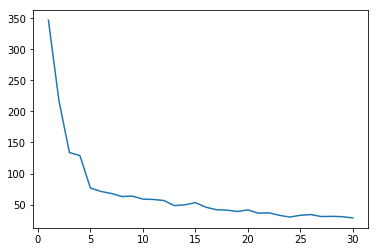

In [9]:
X=list(range(1,31))
plt.plot(X,sse_lis)

### 【問題10】クラスタ数kの選択 
最適だと思われるクラスタ数 kを選択してください。
エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。
選択した上で、なぜそれを選んだか説明してください。

卸売業者のデータ分析 
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。
UCI Machine Learning Repository: Wholesale customers Data Set
Data Folderの中からWholesale customers data.csvをダウンロードしてください。
これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。
中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。
顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

次元削減 
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。
これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [10]:
df = pd.read_csv(r"C:\Users\anai\dive\Dataset\UCI Machine Learning Repository\Wholesale customers data.csv")
df_work10 = df.drop(["Region","Channel"],axis=1)
display(df_work10.shape)
df_work10.head()#.describe()

(440, 6)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


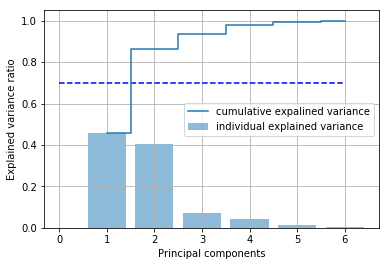

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df_work10)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
var_exp

array([0.45961362, 0.40517227, 0.07003008, 0.04402344, 0.01502212,
       0.00613848])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_work10)
work10_pca = pca.transform(df_work10)
display(work10_pca)
work10log_pca = np.log(work10_pca)
work10log_pca

array([[ 6.50022122e+02,  1.58551909e+03],
       [-4.42680498e+03,  4.04245151e+03],
       [-4.84199871e+03,  2.57876218e+03],
       [ 9.90346437e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972582e+03],
       [-2.76596159e+03, -9.59870727e+02],
       [-7.15550892e+02, -2.01300227e+03],
       [-4.47458367e+03,  1.42949697e+03],
       [-6.71209540e+03, -2.20590916e+03],
       [-4.82363435e+03,  1.34805592e+04],
       [-7.97482898e+03,  5.71121893e+03],
       [ 3.63937790e+01, -6.03789641e+03],
       [ 1.99402021e+04,  4.59128648e+03],
       [ 9.39669558e+03,  5.91315704e+03],
       [ 1.26603704e+04,  4.54194543e+03],
       [-2.99772590e+03, -6.09387930e+03],
       [-1.05895236e+04,  6.58421594e+03],
       [-6.36709518e+03, -3.68071267e+03],
       [ 6.62382534e+03,  1.25471953e+03],
       [-4.86153157e+03, -2.25592266e+02],
       [ 4.79424416e+03, -3.98879936e+03],
       [-7.24486684e+03, -7.34772325e+03],
       [ 1.92992657e+04, -6.93681068e+03],
       [ 1.

C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


array([[ 6.4770064 ,  7.36866713],
       [        nan,  8.3046066 ],
       [        nan,  7.85506479],
       [ 6.89805482,         nan],
       [ 9.27406594,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,  7.26507789],
       [        nan,         nan],
       [        nan,  9.50900387],
       [        nan,  8.65018775],
       [ 3.59439785,         nan],
       [ 9.90049318,  8.43191554],
       [ 9.14811337,  8.68493515],
       [ 9.44623196,  8.42111071],
       [        nan,         nan],
       [        nan,  8.79243054],
       [        nan,         nan],
       [ 8.79842833,  7.13466734],
       [        nan,         nan],
       [ 8.47517134,         nan],
       [        nan,         nan],
       [ 9.86782233,         nan],
       [ 9.90053762, 10.17780527],
       [ 9.34949995,  8.72767881],
       [ 8.10468675,         nan],
       [        nan,         nan],
       [ 6.77097316,         nan],
       [        nan,

In [14]:
sse_lis=[]
for kn in range(1,31):
    src_kmeans = ScratchKMeans(kn,15)
    src_kmeans.fit(work10_pca)
    sse_lis.append(src_kmeans.sse)
sse_lis

14993569.723803453

7496167.28399361

9132963.384450296

7496167.28399361

8871615.082423553

7496167.28399361

8056762.104209001

7496167.28399361

7005624.335703918

7496167.28399361

12276647.30003402

7496167.28399361

12301129.812450103

7496167.28399361

8832083.056572018

7496167.28399361

18523872.50034082

7496167.28399361

9208630.310125388

7496167.28399361

7380842.898039604

7496167.28399361

8201036.871753564

7496167.28399361

7015250.292011831

7496167.28399361

9639458.498973198

7496167.28399361

19710865.416755553

7496167.28399361

7958556.305690824

7496167.28399361

8043899.752795596

7496167.28399361

8213694.446376576

7496167.28399361

12276647.30003402

7496167.28399361

9362956.606034506

7496167.28399361

7428282.449003047

7496167.28399361

14105634.222811863

7496167.28399361

35478097.07312614

7496167.28399361

7784378.742353414

7496167.28399361

7657917.159808132

7496167.28399361

9880124.123621603

7496167.28399361

14105634.222811863

7496167.28399361

9714413.120550336

7496167.28399361

8447131.672216225

7496167.28399361

7772918.049862751

7496167.28399361

7318585.631020785

7496167.28399361

13850790.476868248

7496167.28399361

8938705.875432001

7496167.28399361

7871199.589717345

7496167.28399361

8032783.1354236705

7496167.28399361

6942035.983334511

7496167.28399361

10694028.056945382

7496167.28399361

9178587.55711769

7496167.28399361

17806649.850716222

7496167.28399361

11946868.07642883

7496167.28399361

7289804.429202749

7496167.28399361

7098466.994290694

7496167.28399361

7602133.179235904

7496167.28399361

7503227.270894238

7496167.28399361

8457634.160527775

7496167.28399361

16841553.469279185

7496167.28399361

7751930.153440402

7496167.28399361

21168968.83697494

7496167.28399361

10782123.368276957

7496167.28399361

10181311.897666201

7496167.28399361

8077013.893927913

7496167.28399361

7701147.247669819

7496167.28399361

7897268.631607861

7496167.28399361

7677004.146090158

7496167.28399361

7182192.903546506

7496167.28399361

7126045.145154741

7496167.28399361

8732286.294169487

7496167.28399361

7111806.791631944

7496167.28399361

8056762.104209001

7496167.28399361

9115270.78529859

7496167.28399361

7098466.994290694

7496167.28399361

8457634.160527775

7496167.28399361

7768724.39424844

7496167.28399361

15629956.665490082

7496167.28399361

7479662.370266647

7496167.28399361

6948540.735552117

7496167.28399361

7262141.006351806

7496167.28399361

17172651.32315657

7496167.28399361

7098036.774590626

7496167.28399361

9578712.866512746

7496167.28399361

7565766.471209417

7496167.28399361

7191156.33970982

7496167.28399361

9305348.675660986

7496167.28399361

8052366.38086793

7496167.28399361

8557278.184234228

7496167.28399361

11230149.00005915

7496167.28399361

8921554.583422948

7496167.28399361

25374224.205622792

7496167.28399361

7021987.4182977695

7496167.28399361

10561641.367817912

7496167.28399361

13510220.792005751

7496167.28399361

7306132.00836891

7496167.28399361

8403839.636061484

7496167.28399361

8190779.782041027

7496167.28399361

7288042.335550794

7496167.28399361

7519624.273997203

7496167.28399361

7101391.023477683

7496167.28399361

7027978.521064812

7496167.28399361

8794230.476719832

7496167.28399361

10936766.118461587

7496167.28399361

7244285.701170933

7496167.28399361

8420902.698829722

7496167.28399361

15061683.517420746

7496167.28399361

8910241.099209491

7496167.28399361

7174883.850424454

7496167.28399361

7861138.835733612

7496167.28399361

7167901.735103231

7496167.28399361

6950996.079208582

7496167.28399361

8001655.621336625

7496167.28399361

8166924.992964504

7496167.28399361

6243580.854227596

5772748.602963489

5787042.209202012

5827899.746411049

5864103.37550657

5906968.144680637

5929052.258458566

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6169955.049866305

5847625.279734405

5879210.460628738

5898797.707823768

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

8017843.938259551

6863890.12605268

6804559.53601998

6775532.613347414

6793082.823087877

5874303.328292176

5916977.0434318315

5943970.174712609

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6450819.440615281

5868349.95923568

5815838.868502571

5817631.454211975

5854400.194368485

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

7777738.516160519

6100280.916390054

6096970.4952973975

6215849.81320676

5814235.269924042

5797204.034497777

5814760.29717628

5851102.246088883

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

8094518.188143575

6191566.962236252

6155879.5692345835

6128865.73431682

6121190.170559611

6364194.705394588

5811065.2269211905

5853807.730870732

5903618.501553841

5925485.183859178

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

7084990.4648314025

5824019.444407904

5856055.135861869

5903618.501553841

5925485.183859178

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

7912286.092611283

5787670.302196955

5838338.158415456

5879885.896708014

5898797.707823768

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

8195651.674314111

5986125.4134744145

6009312.8093134

6032287.737333764

6062073.3486902

6090020.009649523

6096970.4952973975

6387773.0011064345

5831279.220012407

5829972.984684192

5862872.3592395205

5912970.94676401

5943970.174712609

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

9574046.343127495

5897432.660348022

5818691.573777725

5856055.135861869

5903618.501553841

5925485.183859178

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

5828084.057418634

5769087.229445836

5805042.015495538

5847357.712455261

5883961.7716102805

5903444.16911506

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

7330289.568657634

5996613.805473089

6012419.419216851

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6460011.6957225865

5837264.684436014

5823795.102585185

5851223.161210124

5886020.178616535

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

8411813.644964313

6117113.29287043

6109782.357898879

6103041.286971776

6096970.4952973975

5556266.164175529

5767560.373596485

5811965.373813095

5852709.538082036

5900978.26863223

5916441.7537401905

5942525.629050685

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6886498.695258244

6035964.32383839

5787327.9389905045

5801016.663873084

5842048.277258295

5874010.397361367

5912532.385928308

5937695.330564478

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

7329438.869956421

5989550.616806814

6016943.436317212

6030465.366675574

6050360.895792593

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

6185498.799136193

6045634.109471252

6086258.35131294

6096970.4952973975

6226450.9185313275

5799732.478313786

5809539.018869128

5851428.889059527

5899425.859836452

5916441.7537401905

5942525.629050685

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6022618.728175299

5926059.644417249

5797684.120431151

5768792.017435653

5807845.242106895

5852709.538082036

5900978.26863223

5916441.7537401905

5942525.629050685

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

5995698.113156084

6084871.229197155

6096970.4952973975

5928776.541676555

5947132.573311761

5987778.387205034

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

8162854.149363665

6100280.916390054

6096970.4952973975

5693709.460093407

5818240.178280662

5766462.655271169

5786082.516103478

5828495.339602302

5864103.37550657

5906968.144680637

5929052.258458566

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6027141.356370824

5766760.317822185

5808824.055328725

5852709.538082036

5900978.26863223

5916441.7537401905

5942525.629050685

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6989544.217707343

5852918.799073423

5892956.64222632

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

5949600.546182364

5811419.415534414

5795048.845044394

5817631.454211975

5854400.194368485

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6574268.123258323

6092403.074642709

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

10871505.957915755

6351134.987613189

6313281.2743572835

6289739.172109874

6268234.830512897

6233346.373080733

6196067.696927578

6177184.741350674

6158658.65141108

6141129.607314307

6133463.907960028

7289595.329350574

6138291.608265696

5845053.379856083

5887959.114690226

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

7054147.536595628

5921878.808396978

5808420.964010796

5793353.849850496

5838271.390683473

5871927.7182616955

5892316.008304687

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

7503842.705485164

5798457.066815945

5820045.574485862

5858263.851435321

5905421.860726681

5925485.183859178

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

7003019.9314918155

5905761.888282616

5943083.802160828

5984505.636760523

6002579.241555637

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

7299464.176594716

5953237.835526904

5775378.413474492

5784875.48175436

5827899.746411049

5864103.37550657

5906968.144680637

5929052.258458566

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

8097269.058784981

6071593.50880391

6096970.4952973975

9151399.274383772

6028793.191471338

6062073.3486902

6090020.009649523

6096970.4952973975

6921656.801333341

5986759.574163254

5816977.638846971

5797433.325496042

5838271.390683473

5871927.7182616955

5892316.008304687

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

8007798.822154528

6782498.417612806

6535831.223875012

6412793.9018153325

6279242.580126162

6222604.707592882

6182354.2431636145

6144449.756312464

6121190.170559611

6399668.992401779

5987165.1361205205

6020979.073026028

6062278.63859241

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

6372035.869976896

5824958.739371714

5862872.3592395205

5912970.94676401

5943970.174712609

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6050524.290159472

5808825.649562622

5790402.304784443

5823167.00375688

5861029.785366659

5892316.008304687

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

5725772.175726794

5821479.777736472

5860925.427304339

5892481.5300875725

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

8839136.719587188

5782202.750943097

5818115.179623884

5854400.194368485

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6024608.23358849

5874612.0174245965

5826296.206862096

5836959.612868761

5873594.654184154

5892316.008304687

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

5920658.2030159375

5775045.009738314

5826816.781778891

5863031.532837506

5895474.711115553

5910458.621891724

5920456.553833746

5940509.310641307

5969675.150167513

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

5981904.269931131

6066640.762363591

6107839.544995977

6149370.631323803

6164182.873182079

6183061.844368067

6192744.645040012

6202674.6696150955

6586932.384437858

5802334.426524459

5845424.00769964

5880039.538666626

5912532.385928308

5937695.330564478

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6441196.688253958

5810031.503172001

5843170.677870745

5885699.446405718

5919767.974672058

5953911.957358781

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6600555.886078296

5937759.721764097

5824961.284722144

5811309.351453254

5851342.556267736

5888232.386840298

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

7943743.721746152

6708229.3607883705

6707714.328270976

6690015.048874063

6654728.726184244

6621570.900549758

8624360.310419306

5998798.260658215

5814178.326825054

5766677.309228108

5791366.273005418

5830892.243254749

5865241.536739672

5903328.227574912

5928170.970277573

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

10162076.543273747

5872784.558077998

5770390.35288444

5777256.718974614

5800022.632771432

5845521.879823406

5883961.7716102805

5903444.16911506

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

7172244.321485338

5862313.922315627

5893684.714433059

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6395385.8380888635

5775880.695200278

5813838.400439135

5855176.244222024

5900978.26863223

5916441.7537401905

5942525.629050685

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

5891443.414826089

5954878.219609203

5978280.200135893

6001287.860037176

6027539.512007162

6057045.958466041

6077041.777939936

6096970.4952973975

8695488.558015153

6005226.759888889

6016291.188254108

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

7005822.967034505

5981895.586816249

6003702.870728943

6044607.156765285

6080854.121934719

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

5867419.131476596

5810305.785818312

5847495.9709960185

5899425.859836452

5916441.7537401905

5942525.629050685

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6995652.352315937

5872150.799718278

5815366.615222426

5812224.872693897

5851102.246088883

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

5734844.046102135

5867367.133755586

5903328.227574912

5928170.970277573

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6374303.954269777

5968095.59268637

5797381.318251882

5779957.024696403

5801850.433402558

5847357.712455261

5883961.7716102805

5903444.16911506

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6295234.045832124

6292424.467735513

6291556.561874487

6286836.834223753

6281361.536934417

6258098.603291673

6215772.532195284

6196067.696927578

6177184.741350674

6158658.65141108

6141129.607314307

6133463.907960028

6154238.876399024

5821828.2104590405

5776728.819099042

5778859.193894294

5805042.015495538

5847357.712455261

5883961.7716102805

5903444.16911506

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

7714656.005826765

6020860.24267236

6035959.793090656

6066638.8900592225

6090020.009649523

6096970.4952973975

6196313.613206326

6004879.2281786585

6037834.413049057

6070830.586937152

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

5656432.574829241

5932554.111820614

5957394.595038528

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6462994.087598764

5770870.514332665

5776975.260074017

5801850.433402558

5847357.712455261

5883961.7716102805

5903444.16911506

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

5869815.606895134

5845700.4520930955

5765185.027664968

5798415.443422199

5844103.537067132

5879885.896708014

5898797.707823768

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

5751584.355945572

5829309.9332858585

5840270.204693719

5878367.871488411

5898797.707823768

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6680123.906875869

6095929.781817671

5837032.063728362

5818472.250460328

5851223.161210124

5886020.178616535

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

8182384.138418946

6136570.69266207

5837338.248333167

5814284.328903108

5847625.279734405

5879210.460628738

5898797.707823768

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

8003901.108384805

6060791.3614975205

6095357.939941587

6133845.110862883

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

6475939.943522109

5933098.197358435

5764958.645028727

5798415.443422199

5844103.537067132

5879885.896708014

5898797.707823768

5912699.580365095

5924089.885396159

5944606.470158909

5973645.447307011

5996182.597665311

6014021.707736032

6041508.125514324

6071205.989942645

6599607.644727639

5908470.96493606

5928887.002024631

5966230.023721799

5992471.601239039

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

5575154.893073275

5887569.2138691805

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6284544.888470266

5838415.957406223

5837244.766095433

5885544.930575858

5916977.0434318315

5943970.174712609

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6238605.835123092

6130407.055423724

6121190.170559611

6888922.922561901

5850892.1169506

5821389.243556438

5856055.135861869

5903618.501553841

5925485.183859178

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6502505.80177091

5864713.318050783

5818728.2992298035

5831598.457383699

5869202.428234725

5892316.008304687

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

7392715.409966943

6071593.50880391

6096970.4952973975

6431938.411225126

5784315.879953611

5788890.930698367

5827899.746411049

5864103.37550657

5906968.144680637

5929052.258458566

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

5728378.501454353

5830352.238366514

5864103.37550657

5906968.144680637

5929052.258458566

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6986661.943627818

5825096.133980894

5862872.3592395205

5912970.94676401

5943970.174712609

5967097.359589466

5991197.938118793

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

5814974.355563186

5827914.236447719

5817590.814492654

5854452.349510996

5888232.386840298

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6508270.7441500835

5828195.904263211

5818890.352990408

5861709.846163508

5892316.008304687

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

6112024.561363674

5994317.817200304

6011274.723920151

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

5891651.242804372

6114628.002939148

6088348.296427284

6080975.289451574

6067528.2845412865

5555692.362539782

5794507.77570454

5784185.794663093

5818115.179623884

5854400.194368485

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

8422296.271984871

6156796.46209466

6128865.73431682

6121190.170559611

6076810.478443309

5818720.976021762

5765697.1839692695

5784108.505337397

5826930.634265474

5864103.37550657

5906968.144680637

5929052.258458566

5956860.750970274

5980839.445495043

6005493.352339567

6018391.752524028

6024766.930855121

6043840.625396234

6071401.746137764

7118537.581756575

6137748.350912244

6121190.170559611

6297310.155774825

5948694.6909246715

6001172.23315059

6037449.693120268

6071401.746137764

6085143.82729167

6092282.0198666565

6099066.812396545

6117820.570067062

6139431.50568375

6155331.396109662

6183061.844368067

6192744.645040012

6202674.6696150955

5978259.4397848025

6066179.221205352

6087286.255045472

6096970.4952973975

5777670.290590603

5772784.956444787

5809549.673819604

5851102.246088883

5888067.578331689

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

6096970.4952973975

10144652.55525317

7336376.570265369

7280980.461262452

7006019.847633734

6632833.936703267

6451945.371400151

6310878.837716027

6253578.414395849

6210676.451240155

6182354.2431636145

6144449.756312464

6121190.170559611

7064072.558828813

5960403.693449766

5821637.341627338

5806157.641302782

5847838.257251376

5884091.7709406335

5908025.762612247

5916379.7322263885

5936419.775399332

5965356.63059559

5991697.395699365

6014021.707736032

6041508.125514324

6071205.989942645

6090020.009649523

7039816.097671609

5673078.695284734

5332333.070525193

5309409.495417085

5316909.510013324

5325402.92208393

5332348.792265224

5517649.2949850205

5622342.903324337

5515478.54807588

5480358.737206263

5464016.5126725435

5462244.044034493

5457673.926347133

5454433.318266367

5451276.938854644

5448889.574194286

5783814.727211652

4776807.07726219

4786184.4424846005

4811286.233260765

4841888.961528727

4857376.043101052

4861029.1790224025

6059896.498597917

4967194.486937793

4685922.9943412915

4761757.266512989

4777857.266912592

4804753.27124319

4818586.805531823

4822144.761453985

4832213.602004106

4847037.071188235

4857518.759331183

4867460.141528717

4876648.761752909

4878438.394203778

4883868.6289451765

5554828.519511549

5270244.539550543

5211571.9858337175

5140075.413662515

5092399.508590438

5061675.0035452945

5050375.872494324

5043435.331523546

5038166.227135812

5058197.794309344

5074980.852488048

5094392.674210485

5095468.929285314

5106173.398844252

5107272.983505807

5876367.63143262

5439485.186730039

5291203.460843311

5226577.4992840355

5231790.10885718

5254413.1772368485

5262054.620085759

5270403.860428726

5282177.977273647

5382746.466094104

5137554.744208608

4981806.265706308

4933225.557886454

4902515.198833167

4906678.925016853

4899336.676320475

4901984.915617022

4912756.313146361

4922168.534854523

5843034.78354758

4700075.865292274

4550458.602406711

4680020.433040491

4793032.565084845

4840388.652574636

4886530.340114452

4932399.263185491

4970193.090639334

4980917.561557023

5000364.795794256

5005190.197362644

5012452.924808546

5025114.186001791

5044846.261391442

5610213.310398947

4911444.7183350315

4911131.144389894

4923424.395139244

4934373.997722465

4940362.6025649225

5754340.298338138

5048273.948340194

4533802.15823402

4657579.586297113

4766130.105484848

4836355.936076303

4883181.2066160375

4918530.231119333

4949941.95743091

4961827.186664568

4957860.631170793

6112199.963489064

5341481.040923181

5218020.74236007

5164476.778304052

5182120.7000454

5200820.207784017

5208326.843808205

5218858.06004121

5222631.883022349

4807297.850281766

4522269.755422321

4548026.501249747

4670251.537543344

4778591.010406099

4851879.817246179

4907439.1240606075

4941966.500081504

4957860.631170793

5038706.157167476

4854379.0130600305

4834960.735484918

4843936.727409131

4861029.1790224025

7683878.326332759

5499173.835413857

5390324.078325413

5192709.935386205

4765763.475702144

4733573.970037595

4801186.7133808015

4873547.633031973

4924336.129840077

4939185.424995355

4949979.922086348

4953869.175405973

6555060.313275607

4899353.016506086

4899064.865113962

4966364.914363837

5031767.95145166

5078400.5146288145

5099949.0545078

5128255.046007303

5143007.013537487

5325473.388427183

4511727.839365175

4545183.959518922

4663060.783317476

4778591.010406099

4851879.817246179

4907439.1240606075

4941966.500081504

4957860.631170793

5216515.606631732

4620863.916557558

4534105.372663364

4630050.859267529

4747376.557007159

4824370.366986242

4867676.294701388

4914656.834454339

4949941.95743091

4961827.186664568

4957860.631170793

5757935.150053106

4815119.93855824

4717816.833639235

4767062.544176012

4803063.690118991

4829461.268904844

4841800.697661911

4845554.637233095

5675440.63201517

5410477.982960241

5350697.491310634

5344680.131913855

5337074.27922838

5334705.167967562

5251467.199979203

5291370.243899379

5260015.86191179

5257866.858872181

5235827.547277343

5224590.298808272

5218858.06004121

5222631.883022349

5083481.80547706

5067275.704615182

5019030.767846343

5046821.836505444

5044854.566541888

5040751.105696005

5037277.33987664

5057710.254934743

5066188.722337714

5083470.445428279

5094720.6242274735

5105376.824503068

5106475.365160244

5115422.6379058445

5116478.236303841

6287687.4370308565

4656516.181174426

4554955.278030224

4655879.561435982

4754948.657067664

4836067.059993659

4892829.301951748

4946603.633347493

4953869.175405973

5111569.887104325

5171571.025563446

5100096.308870525

5026946.607412915

5043771.345765814

5041526.600431841

5040476.854326903

5037277.33987664

5057710.254934743

5066188.722337714

5083470.445428279

5094720.6242274735

5105376.824503068

5106475.365160244

5115422.6379058445

6258753.93755105

5376789.670213969

4947673.969694655

4575205.546688741

4633666.992127437

4709211.171665223

4743938.395336222

4794658.527010326

4830988.822071913

4859050.195338111

4883868.6289451765

4889451.295571143

5959099.8729790235

4546516.353139193

4621323.603375163

4712481.349856189

4744327.503624251

4790612.685821137

4821078.302516981

4844601.730265041

4860844.3129366925

4873911.86993183

4889451.295571143

5221787.757953647

4943034.455570385

4612105.733058769

4690050.446899546

4731463.502224588

4777299.07672997

4817971.362954168

4859055.233225078

4864522.85106715

4878438.394203778

4883868.6289451765

4889451.295571143

7683112.787724095

5444757.176966408

5273913.402806965

5258414.82031835

5268204.216281305

5276725.81377621

5289666.894768399

5293936.450889137

5154933.488337167

5276902.908239995

5222663.787164575

5205088.485282849

5232980.421857871

5252981.6415121285

5260454.331241284

5270403.860428726

5282177.977273647

8834335.306632485

5433424.951078578

5390347.429746186

5363300.398609906

5329709.938624051

5279656.177098417

5256677.79982362

5240768.86979877

5229955.199599616

5217079.386471446

5210155.982280333

5203084.737584578

5198859.812200092

5195586.590199272

5253988.3645068165

5085986.909581852

5048140.682349799

5060210.648326354

5071091.582033964

5073017.735958983

5092060.092057282

5108018.3876609625

5116478.236303841

5231760.6025665235

5332771.896953315

5341625.320033295

5347381.26465462

5350988.382054732

5353982.753821993

5357114.270760007

5653767.603271797

4491861.376646426

4530568.810318208

4645410.321144286

4772710.98124978

4840388.652574636

4886530.340114452

4932399.263185491

4970193.090639334

4980917.561557023

5000364.795794256

5005190.197362644

5012452.924808546

5025114.186001791

5044846.261391442

5146428.198770908

5204948.593423517

5145031.589326223

5111257.833371971

5070974.5185784735

5075037.054834244

5069356.692101339

5084845.855997521

5098402.9621900385

5107804.006632818

5116478.236303841

5322023.777684744

5058590.781251079

5073764.805919109

5082469.937195264

5100400.632128664

5109673.539765174

5111750.408229383

5111880.121681752

5112948.097512566

6386584.975597142

5672293.87783436

5100163.819292711

4524078.369409998

4590687.462884862

4653332.582004624

4735311.920462248

4775738.167045266

4802012.77156996

4813005.638869965

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4816483.033423344

4644633.26403077

4714875.343203967

4767662.928206537

4804753.27124319

4818586.805531823

4822144.761453985

4832213.602004106

4847037.071188235

4857518.759331183

4867460.141528717

4876648.761752909

4878438.394203778

4883868.6289451765

4889451.295571143

5910352.878606291

5301939.972817636

5207106.237191239

5191651.5556913875

5177211.828023059

5167674.431367385

5155054.55190513

5151958.92865987

5150063.7775399415

5146029.946250825

5139493.29837884

5136212.258581777

5131572.169240912

5127760.486902456

5122481.590402744

7540520.541233509

5003165.61317052

4526930.054499244

4544557.433997654

4671195.422364028

4780977.212783441

4840388.652574636

4886530.340114452

4932399.263185491

4970193.090639334

4980917.561557023

5000364.795794256

5005190.197362644

5012452.924808546

5025114.186001791

5417821.444308728

4961925.5125637185

4773104.867168232

4718014.130059478

4802385.522651016

4873908.254714253

4932012.174051982

4946324.779587095

4953869.175405973

5464866.083254738

4662995.640742616

4641347.870041383

4740911.1992465705

4811567.231367589

4884383.37965778

4924336.129840077

4939185.424995355

4949979.922086348

4953869.175405973

5270926.289920667

5180610.709903075

5138549.016067806

5123522.385837091

5115417.418554293

5118885.743355253

5117145.659831975

5112948.097512566

5698175.779831176

4842502.439592407

4794030.152491016

4841932.276655323

4884638.540067071

4943432.323913302

4970587.044409773

5000908.833040562

5060123.86655817

5102530.843242553

5117166.722664314

5145605.691254713

5160388.22191186

5164641.520581482

5168884.042310829

4919590.719414644

4524993.266711633

4652139.146942566

4764822.240688807

4840388.652574636

4886530.340114452

4932399.263185491

4970193.090639334

4980917.561557023

5000364.795794256

5005190.197362644

5012452.924808546

5025114.186001791

5044846.261391442

5080021.475505092

5251158.916027864

4522199.080769237

4618726.368298093

4688462.597790651

4753102.107689875

4789917.774697537

4810808.355264734

4824254.83056456

4838889.418068631

4853955.213804528

4859055.233225078

4864522.85106715

4878438.394203778

4883868.6289451765

4889451.295571143

5623508.411081311

5187335.518838558

5122096.0203779265

5076234.776038713

5070935.4764524875

5078936.206311547

5080718.202427632

5099022.279859819

5107804.006632818

5116478.236303841

6205707.604957925

5019716.192155719

4830374.131793235

4733412.010071585

4794295.8279806785

4852258.109298107

4896876.684861629

4916802.49192739

4935350.095198045

4949979.922086348

4953869.175405973

5486076.8675038405

5091617.2712090295

5047668.566934634

5064802.389816272

5081989.368247034

5089138.788711018

5098605.735850534

5107804.006632818

5116478.236303841

6281109.371833476

5315054.570726274

5260965.330889191

5257181.908636835

5262054.620085759

5270403.860428726

5282177.977273647

6973989.752722778

5315168.624321208

5139911.992032813

5169820.071694417

5093233.947673974

5097746.746954414

5119235.143977762

5120413.527927413

5141632.129332961

5165892.548401155

5178695.235299436

5182481.453294436

5828763.972443818

4606469.793021084

4692683.846259289

4745432.399956645

4797527.410550314

4834400.80413897

4863159.241024154

4873911.86993183

4889451.295571143

5262441.807756786

5132501.854504289

4577337.590093528

4698084.771706241

4771792.106879447

4801431.882694858

4823471.751351382

4834551.2521828115

5447416.080571239

4540175.217881991

4529269.984909871

4614499.679876994

4693773.706673951

4725631.8097342355

4766034.35345722

4802012.77156996

4813005.638869965

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4889451.295571143

5442482.103237776

5095577.856222917

5065149.0312544815

5074032.487402639

5092757.96627445

5117884.184566937

5144432.83692787

5170562.828015558

8213927.546092633

5107344.854932218

4903345.595686735

4941786.977538374

4995452.256932831

5035957.842549795

5091010.053815412

5113399.112756774

5128228.362225368

5132023.310513817

5135061.135928113

5138925.570716174

5143007.013537487

4689014.273120258

4515992.204748357

4588697.630641723

4675269.752245977

4702623.562507264

4752044.230329966

4793067.277998525

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4889451.295571143

4979643.867804791

4504059.023774386

4549600.778762769

4614596.758105325

4708371.802220369

4741728.694451943

4781385.297206656

4808046.73566074

4813005.638869965

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4889451.295571143

5108166.835526951

4517760.669266783

4546800.0870996155

4671958.71527533

4774781.864711405

4832529.942105991

4870916.936357924

4914656.834454339

4949941.95743091

4961827.186664568

4957860.631170793

6122117.094291492

5005869.372905932

4848632.753587779

4831979.834304257

4854510.100542938

4863614.370554276

4877179.238117609

4881869.695463864

4891058.044524195

4901302.459152028

6104004.895183804

4861480.498370378

4553164.024657253

4576848.334331314

4634178.295830284

4733881.325120125

4767035.551560959

4797167.5412398055

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4889451.295571143

5345116.394007521

5348890.998696804

5236163.788719552

5228494.890855565

4573761.496779399

4615364.585141806

4707874.38200982

4731021.625804882

4776395.52949137

4818018.3317355905

4846118.161785886

4873911.86993183

4889451.295571143

5290366.900318119

4533455.762081798

4665819.059172748

4769981.220023779

4851879.817246179

4907439.1240606075

4941966.500081504

4957860.631170793

6081051.877342329

5179292.388074337

5163768.265187569

5180123.601782596

5200820.207784017

5208326.843808205

5218858.06004121

5222631.883022349

5367250.370516523

5112293.495655644

5098012.453041098

5098761.983290893

5113067.970772816

5108388.7514693

5116879.377347976

4949242.667021881

4560524.328811973

4598885.279934895

4701620.133613549

4737187.680319435

4782577.178259746

4819388.330145083

4859050.195338111

4883868.6289451765

4889451.295571143

5187499.9623925295

5207949.207483713

5158693.890962658

5122449.775677086

5073279.0205078265

5074916.170607116

5068895.475833413

5092899.64916546

5107804.006632818

5116478.236303841

5171682.14544929

4769608.355849291

4798096.553317156

4842167.790686417

4871169.331954531

4904298.59722609

4949241.5128941685

4975476.119902265

4986527.371897606

4997524.663321136

5012452.924808546

5025114.186001791

5044846.261391442

5080021.475505092

5114586.904315081

5671183.428162174

5070096.5447248

5018578.488135822

4815205.61460899

4852410.985118422

4893937.920043889

4916802.49192739

4935350.095198045

4949979.922086348

4953869.175405973

6971647.867340361

5338150.353420178

4596729.142103484

4537869.546014254

4616296.6039757375

4700958.492012873

4727142.71978572

4766778.628048367

4802421.69700164

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4889451.295571143

6515925.589863756

4951567.88064439

4879655.329718519

4710100.900626665

4779849.257612117

4848581.370499592

4916802.49192739

4935350.095198045

4949979.922086348

4953869.175405973

5599297.252128296

4638144.610742116

4720765.347715945

4781673.4334353665

4818455.617918485

4826228.158981004

4822144.761453985

4832213.602004106

4847037.071188235

4857518.759331183

4867460.141528717

4876648.761752909

4878438.394203778

4883868.6289451765

4889451.295571143

5402485.829300765

4492705.417560233

4536385.175825756

4653308.75016513

4764635.657612657

4849360.187172042

4862597.648318584

4898554.997352571

4936469.794539058

4970193.090639334

4980917.561557023

5000364.795794256

5005190.197362644

5012452.924808546

5025114.186001791

5601268.156376533

4883171.255822249

4597582.258254518

4717792.261964594

4817361.641871018

4891280.521375461

4939185.424995355

4949979.922086348

4953869.175405973

6049374.825565814

5086274.4052734105

4968191.345011652

4924950.565584917

4902162.939217037

4895445.941751559

4901984.915617022

4912756.313146361

4922168.534854523

4706159.430529173

4570428.469855475

4690963.388927145

4771624.714351025

4851438.879820526

4916802.49192739

4935350.095198045

4949979.922086348

4953869.175405973

6691693.286585057

5728968.589581681

5614108.354400922

5488970.499637692

5384494.113615086

5344045.184401278

5323207.042619144

5309207.8715435155

5303868.652669906

5293867.387129297

5282259.179945623

5273790.804897385

5266048.160387269

5256244.270814017

5254691.9982974045

6022256.074025718

5071063.366381051

4747272.517693275

4753362.640729087

4782953.202099754

4808237.11031697

4825923.952263252

4841800.697661911

4845554.637233095

5065589.328849444

4947884.6875577355

4775478.938956234

4835046.784113709

4870893.576680023

4903504.186496842

4916802.49192739

4935350.095198045

4949979.922086348

4953869.175405973

5020648.464594602

4571338.883086742

4540807.984588395

4623340.953837199

4707874.38200982

4731021.625804882

4776395.52949137

4818018.3317355905

4846118.161785886

4873911.86993183

4889451.295571143

5368262.478889791

4716245.740723942

4701957.589962902

4782009.442324825

4836658.311815225

4891660.679689605

4916802.49192739

4935350.095198045

4949979.922086348

4953869.175405973

5823241.563633324

4706984.380847055

4527521.42699842

4644398.039036636

4705744.120668677

4754136.088547726

4787782.934917712

4824108.180486204

4859055.233225078

4864522.85106715

4878438.394203778

4883868.6289451765

4889451.295571143

5737686.18582154

4498799.955973098

4566080.179032612

4680913.226371491

4709014.807197365

4752486.743785866

4783491.160047917

4818999.809922815

4825519.500738271

4836117.858142399

4854902.819290084

4873911.86993183

4889451.295571143

5138688.085757475

4433991.387342466

4548702.097408117

4661529.519128506

4750430.418866821

4813829.5957284765

4862597.648318584

4898554.997352571

4936469.794539058

4970193.090639334

4980917.561557023

5000364.795794256

5005190.197362644

5012452.924808546

5025114.186001791

6788193.572278071

5332431.586524654

5237728.959832738

5169836.006393807

5107669.3902283525

5045333.948383892

5056450.393826791

5056557.70002833

5061678.341041613

5079850.667898087

5095604.910335231

5106652.253226872

5107823.711070599

5116700.480509176

5116478.236303841

5219142.680587266

4888214.621488012

4935801.131039513

5012367.4430480385

5060428.06829136

5099949.0545078

5128255.046007303

5143007.013537487

5806778.676501356

4826439.794925705

4564765.303580355

4656149.482885449

4724863.139646519

4823218.927687442

4898956.752511709

4946603.633347493

4953869.175405973

4553792.247327217

4506983.74755203

4643025.763628705

4709211.171665223

4743938.395336222

4794658.527010326

4830988.822071913

4859050.195338111

4883868.6289451765

4889451.295571143

5378571.120890734

5164803.7957430985

5123010.440623922

4993808.807792427

5016582.03166278

5069771.3366853725

5114570.477066205

5132023.310513817

5135061.135928113

5138925.570716174

5143007.013537487

5456788.102605868

5139759.891019637

5146507.196832774

4975659.4276504265

5022624.043374528

5066059.917871961

5091010.053815412

5113399.112756774

5128228.362225368

5132023.310513817

5135061.135928113

5138925.570716174

5143007.013537487

6108790.038015622

5387158.5870563695

5355440.617872504

5347713.113640326

5342133.469419896

5337074.27922838

5334705.167967562

5153235.798172866

4566740.453550386

4688635.413505535

4784666.556728497

4855827.726413604

4907439.1240606075

4941966.500081504

4957860.631170793

6080171.504003968

5130194.5012243735

5016389.948433852

4863726.728180255

4929428.050148781

4997420.159045685

5035264.920393061

5082405.141750515

5099949.0545078

5128255.046007303

5143007.013537487

6854792.124723119

4834685.144496111

4843409.470649143

4861621.298113422

4859311.515629561

4857376.043101052

4861029.1790224025

5305041.382008925

4588606.4353360385

4637312.852042976

4717520.502588355

4771505.799575122

4818586.805531823

4822144.761453985

4832213.602004106

4847037.071188235

4857518.759331183

4867460.141528717

4876648.761752909

4878438.394203778

4883868.6289451765

4889451.295571143

5185220.536973717

4631857.675790338

4582360.929806737

4656640.0915144095

4700969.566020299

4783974.274830637

4822245.262775473

4828069.910804292

4828369.1995507805

4834551.2521828115

4789258.5462628165

4525674.43617343

4634741.4207757125

4756818.167041847

4824370.366986242

4867676.294701388

4914656.834454339

4949941.95743091

4961827.186664568

4957860.631170793

6064790.640434656

5079617.946739784

5095869.390075596

4976055.151604074

4995703.94082842

5053316.975818355

5105125.969567144

5118580.658806549

5132023.310513817

5135061.135928113

5138925.570716174

5143007.013537487

5474085.696623785

5408168.786838047

5301047.895724658

5128916.390544766

4850890.612880133

4839169.4790671775

4871169.331954531

4904298.59722609

4949241.5128941685

4975476.119902265

4986527.371897606

4997524.663321136

5012452.924808546

5025114.186001791

5044846.261391442

6094787.242470637

5215570.853374604

5096106.8777604

4989101.370301626

4890299.08850469

4956862.65230103

5009866.938068244

5061048.976308183

5108227.367141828

5132023.310513817

5135061.135928113

5138925.570716174

5143007.013537487

5292054.243074354

4504021.591392235

4543705.4681029385

4666016.177448415

4774898.246438747

4832529.942105991

4870916.936357924

4914656.834454339

4949941.95743091

4961827.186664568

4957860.631170793

6243417.507258281

4870220.417422327

4928099.029365003

4950002.032446594

4959712.73591829

4969588.377514791

4979589.391211648

5000325.8902895115

5029319.24489356

5052219.16645374

5063707.983983145

5085437.502342377

5083855.7660614895

5074305.595454932

5069632.093727884

5245638.84926746

4355355.087864418

4114287.0415668353

4103548.333304288

4157868.271290836

4202090.715756027

4237846.492761195

4254230.356644281

4264773.758022689

4279657.594062605

4285355.69725931

4256052.400648378

4263147.147053459

4272123.746766571

4274476.529342383

5285510.776134085

4400894.206994643

4467878.765454241

4481055.822226568

4264577.673990688

4291223.12247646

4322554.971674205

4344252.815969905

4352691.384933011

4326522.318024669

4299267.71773492

4289258.321569978

4807377.251333944

3966282.216899399

3969523.801024247

4049913.077773426

4101868.928649036

4144451.2998490687

4184193.600939851

4200868.097664608

4198431.545331593

4204914.973463986

4206060.141485689

4215524.14775494

4222902.102453815

4232505.107060041

5468103.862916613

4132308.9656234332

4241014.888167336

4288281.274361842

4256415.398139219

4248856.899005814

4271199.303838545

4294428.342905094

4306606.028147659

4308315.164008783

4313399.507538409

4377710.945510926

4044226.8514803485

4039211.143631294

4068939.1876279297

4135924.736055016

4182414.8633254496

4246377.650604659

4311196.842388449

4371099.798981604

4415555.592556371

4430385.987194613

4436432.958274766

4438190.244863135

4815654.614566541

4272894.056643389

4416093.247860419

4530784.083213907

4594964.945301793

4653189.383518973

4678424.539114257

4684318.605598891

4698934.477424264

4704236.219097956

4710232.811707006

4723691.667751504

4725161.332501176

4730530.519506374

4729503.1194989905

6307900.775060929

4930458.144796389

4659886.518330547

4169661.883864143

4178512.6646814877

4217337.2988593485

4247461.059827906

4264896.71629873

4292105.621002021

4301006.1692924835

4305750.743056296

4316427.612077271

4325177.742453025

4332464.537127367

4337488.620990022

4983948.478790802

4154984.2220026306

4061198.112165549

4072196.6192029477

4072232.7573243743

4119511.749731968

4171395.7990004295

4203098.002807351

4230128.092636128

4249590.172574496

4269629.982017872

4276186.712774632

4857677.142726473

4151735.4407664584

4059330.264450746

4072181.2307608374

4110756.3675689935

4177001.0648178407

4223238.076223928

4276119.374371196

4330888.819476495

4380158.930876969

4403208.405396324

4426501.614938298

4431138.642192572

4441611.780302631

4442429.038265662

5096079.53000927

4165199.9988134606

3980641.508350368

3991637.5732444315

4056207.699953762

4091021.2660148363

4151297.292933699

4197633.34156462

4230108.715860404

4237806.834587472

5746659.43924187

5038095.404898638

4355463.546144042

4037941.05961113

4017068.445865445

4045444.854557741

4107665.2076815013

4138613.9460256314

4183588.8138706195

4215524.14775494

4222902.102453815

4232505.107060041

5134614.6479627425

4160255.817588574

4081861.29121867

4113775.9831903465

4169345.1092757294

4218013.621891641

4237714.265898729

4255607.7612331305

4273001.948090845

4276186.712774632

4759625.312079401

4792456.666618809

4806939.2436996065

4815439.033214876

4826270.020303979

4843145.683925975

4855030.138052216

4859915.950462781

4856939.190332085

4816006.217759782

4785956.082382035

4778948.449935441

4786235.704432915

4764688.54500654

4765221.352738711

5487754.052285388

4545520.091376951

4261334.0809307275

4209443.090996532

4226521.749448033

4233726.249339592

4234622.852656163

4241947.497721769

4243010.990002768

4244022.189436594

4912584.864698196

4556422.797870991

4422904.953132905

4318095.707290162

4288467.743282415

4290641.825740037

4293266.675913113

4283996.615843647

4289899.747467852

4281916.96298357

4285101.727667357

5042675.480055713

4210598.884823492

3984619.0368693285

3994039.5574604827

4019781.05776833

4071399.6844497933

4112556.4940443677

4170969.0846005306

4194823.992191772

4198895.150683997

4204914.973463986

4206060.141485689

4215524.14775494

4222902.102453815

4232505.107060041

6078471.197577311

4860455.200938017

4745350.957853331

4703444.051658147

4425247.320838589

4225292.046411986

4188875.9346529935

4206508.222887973

4235984.588380563

4262229.033353437

4273001.948090845

4276186.712774632

5198020.673748626

4990002.55693839

4294696.075330523

4154612.834612334

4011091.0226343637

4033208.104956712

4096137.2757153935

4134565.791209172

4184784.005221919

4230108.715860404

4237806.834587472

5505799.472643006

4869261.7335289195

4693117.124995481

4631875.302560196

4653974.318357937

4663980.442256474

4670373.19347855

4638447.376267945

4164299.2474657684

4189684.7154958383

4235198.016363087

4280282.419852646

4300561.641402647

4312101.804985779

4336317.778300534

5733199.893733583

4801929.805890498

4545388.351874772

4449162.739614284

4414942.66400118

4382433.861805123

4343536.800493727

4339286.803939964

4333701.575008453

4334636.029572887

4333240.430743214

4862746.384125692

4073415.0311399866

4067342.754937389

4125437.5148183033

4169408.7823216617

4214813.281754236

4252487.172446321

4278669.534281454

4295250.999806006

4304411.222124809

4309370.898443654

6329290.666598199

4807969.265763044

4785377.220740343

4738266.163587902

4732449.778776429

4645152.896205143

4415757.932430297

4416779.593131036

4434652.505966673

4440165.558305547

4451385.56990472

4451758.319906912

4451783.0511134025

5841067.913832163

4575328.333159736

4324213.211496916

4216434.628941899

4225687.78320532

4226281.663940123

4232376.800806574

4231138.297780846

4222643.924722901

4222709.850289567

4223545.347402416

4231043.728701959

4240572.360547294

4242309.987266779

4862505.745852374

4294998.083835073

4109314.834676278

4072881.7596426983

4122987.6516052997

4159246.7450621696

4206107.522583889

4219757.359915288

4225689.460716073

4226319.330103819

4233485.163754416

4234404.070450786

4235418.32828955

4235538.285165982

4235509.449569661

5097046.190835977

4514233.381428648

4471809.74353127

4453484.634300076

4444741.596743785

4434330.654476044

4433184.68620365

4441124.133311278

4454609.207782049

4468451.664569252

4473976.933605664

5207840.655440691

4717435.7421862045

4660805.398695942

4633447.437900162

4610815.4958194755

4187225.2444831454

4225213.3856491465

4262294.61427869

4288338.373295789

4317708.998760259

4336094.983376332

4315393.384336145

4356471.763844278

4396013.646270308

4419786.225283116

7652859.357581389

4798999.603642996

4717432.783015643

4442606.666659076

4415993.402406665

4417097.163304745

4426116.387515854

4412534.040379538

4416897.672990703

4402608.257064586

4396688.59527296

4394866.546000006

4376340.685260439

4365368.249529187

4352594.659729542

4866279.472058851

4327813.284205214

4228776.820578934

4113777.8666573325

4159789.0533085717

4195925.07107482

4206816.676469445

4215524.14775494

4222902.102453815

4232505.107060041

4640156.940314783

4308385.083363999

4186693.855652439

4125051.8520594235

4180985.5763903446

4213262.0572032025

4227193.607030647

4233824.510350318

4233916.744581053

4234622.852656163

4241947.497721769

4243010.990002768

4244022.189436594

5042360.956311255

4068061.9256615615

3974785.685814564

3989920.3104654565

4033487.093952002

4086625.4997543013

4129787.974329882

4175793.895101973

4215524.14775494

4222902.102453815

4232505.107060041

4467138.884543404

4116745.1978935767

4148490.959029209

4205671.472698153

4230128.092636128

4249590.172574496

4269629.982017872

4276186.712774632

5823588.531218919

5004610.126781365

4349573.04773949

4126408.727558509

4063496.1924225516

4116734.113462266

4093521.0665772776

4133880.26522458

4176504.2592139817

4209042.868915004

4230128.092636128

4249590.172574496

4269629.982017872

4276186.712774632

4952991.118064863

4062119.3990363996

3978785.861136138

4039040.258290539

4109600.822605016

4165129.8087590025

4213754.603859646

4250134.644493553

4283973.822115491

4299877.314243694

4309370.898443654

5965781.04295825

4578209.011529685

4151090.660835491

4093064.542094669

4010749.8284935025

4072103.3218825385

4157342.4932588967

4200851.855225301

4230128.092636128

4249590.172574496

4269629.982017872

4276186.712774632

5545476.575925619

4238127.989380939

4197986.495632731

4278795.719061921

4269863.784012971

4267327.966862163

4272672.260018382

4294932.6657829685

4318125.868951725

4328060.470088526

4332822.373434773

4764102.524554724

4848795.636137793

4823212.55130184

4804809.238585237

4784883.76856569

4767369.150886526

4739642.522328144

4719039.546098448

4512565.105474173

4507728.830064144

4536828.849507455

4539807.317087802

4484790.344670965

4382117.216475231

4352730.7468424775

5031299.042104659

4826990.089365478

4706164.27766922

4493668.531241455

4443489.395010714

4383470.439388628

4334609.809755308

4344441.710415732

4361102.901969985

4379836.67013345

4408049.385160035

4420243.70347195

4429587.881563647

4438783.722917469

4450443.099625437

4608137.284007473

4328967.542531614

4396603.58099537

4445420.304870774

4432518.063090784

4337100.470477445

4265113.667752869

4267092.774273033

4256472.364440692

4264056.511889081

4269629.982017872

4276186.712774632

5107734.80613911

4534657.461195477

4034980.752542558

3987640.0722714723

4029221.98912795

4102673.83574641

4159100.957535382

4211626.855874056

4260684.264571502

4276186.712774632

5382934.367863193

4337526.421066713

4186453.9852979505

4182863.730446507

4211281.256589032

4220881.298702651

4226599.947353285

4233824.510350318

4233916.744581053

4234622.852656163

4241947.497721769

4243010.990002768

4244022.189436594

5019720.134986025

4122521.796674361

3996279.727433489

4000788.1712501217

4070202.389054493

4109021.312998453

4163708.61227834

4199495.225245434

4222902.102453815

4232505.107060041

5271737.066255229

4944330.934480173

4733072.055217579

4249757.966287797

4012917.5974195655

4042440.8698399733

4086211.5451338077

4122154.376278981

4175793.895101973

4215524.14775494

4222902.102453815

4232505.107060041

6030286.884599014

4431738.050370275

4162634.4328333796

4098449.519429659

4119108.9994195546

4171264.6079729837

4200394.612735482

4227009.159790954

4249312.313356169

4273686.576613543

4294428.342905094

4306606.028147659

4308315.164008783

4313399.507538409

5413878.260075506

3988967.4131781305

3973158.809843071

4038074.9730304535

4104085.097805378

4169103.160236091

4215144.959664313

4263894.02186751

4276186.712774632

4308595.859575019

3972368.0116197295

3984246.306193747

4017713.0875752927

4084915.385316279

4111802.1558221565

4169198.8891929085

4197665.636731371

4206060.141485689

4215524.14775494

4222902.102453815

4232505.107060041

4602045.222483734

4155945.75163108

4185134.761069119

4218419.911798224

4238965.792087506

4261460.84260263

4263474.932899194

4293550.153206161

4306606.028147659

4308315.164008783

4313399.507538409

5658836.886183589

4594520.841917737

4467711.608736601

4393169.529188384

4280513.444365737

4233658.33911938

4245654.159914741

4287540.633788267

4314784.416393659

4345360.684479662

4368157.202582131

4387949.308184391

4411295.547353442

4445366.930223553

4458104.936684799

4672600.815249973

4400394.39025656

4382354.227208453

4345943.502538531

4223718.696089905

4265805.2153114835

4314491.898163856

4357314.596924638

4403153.899739329

4426255.504261023

4438190.244863135

5520729.252412512

4109239.5549440086

3982569.2474629744

4073422.2476974623

4155829.1634005574

4192871.199325902

4222902.102453815

4232505.107060041

5062405.089267181

4974915.846362245

4874820.688080472

4633915.813243666

4173387.2726778374

4174516.369936109

4207598.536918451

4242265.791404005

4266791.598551502

4295434.217754404

4301006.1692924835

4305750.743056296

4316427.612077271

4325177.742453025

4332464.537127367

4581103.966291212

4101365.6162964683

4145766.9396495055

4177911.937536319

4211639.57940423

4235592.12337328

4270766.167504503

4302428.749546118

4304814.922871779

4311585.7537961975

4330552.312254001

4334171.570057659

4334438.075477275

4332822.373434773

5434992.356240189

3997602.6453466383

3930727.344114121

3995293.470840721

4040036.828513502

4104881.3784741703

4135103.4578198497

4188949.250286865

4214818.080349736

4232716.989749835

4238903.919106549

4237806.834587472

5497741.645810008

4198154.072604499

4195472.793056921

4288938.745335215

4257949.020638336

4239551.442652396

4269453.848659562

4289798.374324264

4302553.027950896

4311921.638459945

4309370.898443654

7350465.88879337

5688709.986140617

5514510.933552312

5407523.136726346

5317935.627559732

5283816.172624679

5274108.292543931

5263635.621481171

5221045.629446731

5128826.066948236

4898303.717105802

4812130.84785616

4753723.788981394

4713782.45193634

4663551.822581445

5771583.526082565

4656543.443250375

4717791.505440935

4681415.951756116

4436510.871738092

4458310.495663337

4455917.435563607

4458477.071445298

4457808.11161653

4457985.969854075

4982872.782517314

4179063.08735415

4074015.602951053

4134788.8549407288

4208265.868657346

4248887.124547591

4269629.982017872

4276186.712774632

5759325.984426466

5105231.410566735

4957616.268927312

4661788.206335615

4140945.2707490204

4204940.913893991

4258634.772247824

4287798.935204369

4311673.663957838

4328060.470088526

4332822.373434773

4478397.969195967

4187173.6827368983

4222520.3253152175

4248365.62695159

4294035.488905875

4306073.881420245

4285066.186592528

4327334.126972712

4385922.772577

4419786.225283116

4458400.519821099

4474349.454437615

4472263.2132933065

5304235.536600217

4192120.275161164

3944360.605860381

3972557.488101383

3994171.098689592

4068137.486652373

4111651.441924619

4176684.791533874

4215524.14775494

4222902.102453815

4232505.107060041

6142451.709890693

4132956.422891965

4164464.050753317

4199135.058981443

4230128.092636128

4249590.172574496

4269629.982017872

4276186.712774632

4333623.306676372

4034855.086932509

4034809.441584178

4102081.2887630207

4159311.8508681776

4204941.845066345

4253759.017070004

4312397.823459615

4360576.966617938

4398280.0831608325

4426255.504261023

4438190.244863135

5160866.566540124

4162951.979050501

4095867.0558456234

4158627.6538929814

4192182.336663759

4204700.433775573

4204449.954386361

4214672.810902485

4215524.14775494

4222902.102453815

4232505.107060041

4092943.474225187

4079798.5005861972

4103738.5727534215

4143004.7515837164

4179271.548534127

4222190.796694877

4276863.001774755

4340428.561569831

4389797.288262189

4409919.844964997

4438190.244863135

4666514.563095246

4194430.527469689

4268315.225877163

4344216.751794551

4382761.01670205

4333495.970977913

4309629.53654904

4279480.66093061

4302428.749546118

4304814.922871779

4311585.7537961975

4330552.312254001

4334171.570057659

4334438.075477275

4332822.373434773

4366908.011184864

4135932.3129997496

4150533.117765197

4197628.197663824

4202451.973388025

4198592.052081437

4197310.476160281

4204056.233994811

4214672.810902485

4215524.14775494

4222902.102453815

4232505.107060041

5025253.042201598

4160051.873415969

4181203.3650229005

4241745.758667002

4294006.71336438

4324705.649429948

4341960.85375912

4346533.249231651

4184079.278351307

4056563.7693635733

3994013.577227709

4025522.4386806027

4086715.4393983637

4126468.986208067

4179477.4715678827

4221760.047528306

4238903.919106549

4237806.834587472

4674133.496956319

4043321.8030749816

3998148.440884063

4018983.716427148

4119829.830653711

4175663.1946955253

4223245.6159452265

4287104.29163461

4348569.002422898

4395154.93090042

4432821.06873905

4438190.244863135

5257135.756376356

4456352.347453483

4348681.780957321

4186440.1376795596

4209198.950122938

4225687.013606769

4233824.510350318

4233916.744581053

4234622.852656163

4241947.497721769

4243010.990002768

4244022.189436594

4837054.318032033

4002416.238574493

4058918.7476811446

4126183.9163824217

4186746.9347341107

4231874.11150914

4259149.465098871

4280290.577922221

4284945.91119773

4282093.985629102

4279004.360981304

5108018.69794117

4299489.460954905

4289510.926129771

4307542.177078321

4343503.178839145

4358911.779106782

4382669.50774192

4411295.547353442

4445366.930223553

4458104.936684799

4471451.940322932

4477956.145928598

4479587.957609788

4479223.055205208

4477975.327474998

4853658.613661803

4730488.302995144

4714507.502525613

4693185.36502416

4679318.552830606

4696036.481211469

4719933.872623126

4712823.284437677

4724296.620766543

4729044.809453729

4410859.194311878

4424702.781390914

4452041.634941155

4468403.6844962565

4470441.7155792825

5416502.993813705

4104801.064156025

4014927.1388551854

4091442.1382688484

4134250.743998458

4173013.2582437946

4213755.759014505

4227457.757135555

4235418.32828955

4235538.285165982

4235509.449569661

4234000.074583158

4222763.996293931

4223407.801489936

4230617.381717701

7676824.502768381

4308316.04766085

4230536.24806081

4256612.732087454

4318722.920809782

4370038.675710792

4423525.916642958

4422488.09861467

4083095.6309874738

4056342.9503266844

4077945.3035294507

4135146.1271356186

4182906.0222486854

4246377.650604659

4311196.842388449

4371099.798981604

4415555.592556371

4430385.987194613

4436432.958274766

4438190.244863135

4888821.902021918

4056448.471868633

4012114.786228061

4028313.3034348506

4057870.294092354

4112052.9759923425

4143698.006056393

4183873.492966369

4200430.935965939

4197791.53492395

4204554.861086048

4214672.810902485

4215524.14775494

4222902.102453815

4232505.107060041

5062474.917524529

4316411.741820977

4021225.336676196

4070513.5761761204

4149120.907062459

4193443.1474185046

4197943.296281663

4206060.141485689

4215524.14775494

4222902.102453815

4232505.107060041

4916136.541721205

4728168.231634843

4191846.351300494

4203204.741823654

4249943.377449232

4272279.510599793

4283600.731457965

4312325.251172126

4315647.789993759

4320000.664023268

4334888.82487121

4334438.075477275

4332822.373434773

6053593.104800121

4396118.607658943

4161474.4690762176

4192850.490517408

4173939.099588547

4193107.4798848955

4214679.488417877

4232682.6339478465

4244544.531157395

4260302.304070591

4286461.670319139

4291067.103371224

4304411.222124809

4309370.898443654

5939562.346675641

4593190.753112776

4584980.176656652

4637997.85151654

4683218.727477676

4629664.217648857

4425698.063753872

4431576.5560155995

4446303.538222597

4445807.541838392

4937322.851192176

4281026.063187684

4120004.0894872863

4091685.214751349

4111763.5393597796

4174521.987614639

4235594.094598313

4296886.248286878

4324136.306915947

4364610.416893081

4387544.759810363

4406272.426300859

4427785.784518852

4441459.416559873

4447062.180634074

5478132.657794483

4313390.54463828

4075691.8637345373

4091907.888189062

4151367.567447672

4176266.6672443454

4225464.803084131

4260998.745879558

4282803.939791586

4259532.329645855

4276353.032892736

4280270.43759611

4274476.529342383

4274417.7590678595

4278544.996910597

4240943.438679374

4013758.740334948

3990979.806405051

4022781.774228826

4061659.9629296325

4118576.630448002

4149795.5667831902

4183218.9408841883

4200430.935965939

4197791.53492395

4204554.861086048

4214672.810902485

4215524.14775494

4222902.102453815

4232505.107060041

5167540.323608987

4866318.884877087

4807385.3351057

4784604.000001174

4783884.886986934

4768168.734232791

4722199.314739468

4664854.212050748

4591525.734934664

4562352.688695163

4543818.333185769

4530648.762306941

4512722.51819092

4498692.749363832

4486483.499757705

4929119.801724947

4766238.403093146

4703814.854086438

4653140.2514188755

4638389.612710927

4601560.061060664

4339481.164005121

4315127.091719473

4330378.469096991

4360514.736553697

4379243.574579291

4385905.310050813

4392020.07453199

4404140.314747502

4415146.022878712

5043769.212341357

4115812.524622538

4216314.245701733

4239729.2922336

4283172.756457157

4267432.896716657

4283190.750552953

4312325.251172126

4315647.789993759

4320000.664023268

4334888.82487121

4334438.075477275

4332822.373434773

5250764.315362262

4642052.819259887

4613840.001456084

4652407.4516499685

4651393.87771286

4651719.640011223

4600796.7081133155

4232791.914815748

4295593.148794648

4335771.876079686

4376077.856604231

4389256.004947139

4408082.14248443

4409215.0341884205

4410769.006064185

5081957.387198715

4047998.38055474

3965556.1191449612

3998668.276731845

4032768.997719403

4085573.5666693407

4133669.355461188

4180704.395066925

4196758.821220913

4199824.738761855

4197618.075171342

4204056.233994811

4214672.810902485

4215524.14775494

4222902.102453815

4739217.98866379

4293986.886901334

4148722.7198943943

4065909.8588084662

4084268.9389008405

4088685.2624427276

4109662.783604564

4157683.815825169

4195695.586016354

4220179.310118239

4237305.616889616

4241334.669288821

4238903.919106549

4237806.834587472

7159028.431046816

5153366.565786934

4466364.140861416

3990099.5912633715

4020747.198915034

4062621.0608556042

4137065.9446050012

4189797.304995137

4237548.183264239

4258047.657629094

4273001.948090845

4276186.712774632

4584153.306178007

4193865.4001008603

4134207.8504735557

4039535.354240684

4027059.4769835426

4092282.215900797

4110123.5885157627

4174029.0502819126

4220179.310118239

4237305.616889616

4241334.669288821

4238903.919106549

4237806.834587472

5796494.452824823

4719726.204524107

4053161.7434997647

3993803.9648392466

4017015.0936247963

4058318.4145332845

4105608.9607940465

4126992.970078892

4176911.5381517103

4197757.920952957

4205821.058080019

4215524.14775494

4222902.102453815

4232505.107060041

4863849.978819809

4768476.890496923

4652867.636357241

4624443.874509706

4580710.040580098

4128344.8698371532

4157230.1399307875

4194037.1787915686

4227035.391948451

4260476.744836805

4322566.573043306

4386396.393172012

4432386.952197163

4454116.761752909

4469071.142504492

4813294.5675283205

4004285.9178866358

4076043.043884977

4113569.562472417

4178827.6449399106

4220179.310118239

4237305.616889616

4241334.669288821

4238903.919106549

4237806.834587472

4904160.6492296215

4173305.588978907

4079584.5857465942

4052286.3616553126

4075745.7477346403

4123490.4323084005

4162567.378508258

4193014.629427328

4214389.692364018

4227193.607030647

4233824.510350318

4233916.744581053

4234622.852656163

4241947.497721769

4243010.990002768

4957932.821915509

4064732.7290217415

4032624.2184966863

4063355.006530648

4109866.0328035858

4171001.258107681

4231116.030443254

4287119.013234015

4346643.579886803

4395870.209439871

4417455.414909995

4427486.622195156

4431686.3623179635

4431944.225831673

5333459.079135282

4734813.959148285

4697595.126007857

4668070.700881439

4642365.706598902

4600854.740439425

4227383.525117428

4274038.109539716

4320696.851551284

4350382.875108758

4368450.454498032

4395102.099828535

4396472.352007427

4393313.505410708

4389810.76382694

5940788.7322916705

4307674.121473952

4122410.447391358

4037750.152778296

4094621.70168477

4153428.2933811266

4209535.494621029

4245352.51514553

4273001.948090845

4276186.712774632

4526179.103962113

4088476.3305020765

4014412.394684024

4014170.3550060857

4067884.849442043

4108078.2377754343

4171239.485072999

4196492.315008052

4199482.1156811975

4197618.075171342

4204056.233994811

4214672.810902485

4215524.14775494

4222902.102453815

4232505.107060041

5742610.891525955

4264609.027395835

4073516.1817601062

4036170.1133666206

4059993.073817512

4138435.9586302247

4189486.0780869215

4235205.730163176

4267898.386013232

4276186.712774632

5344072.446395982

4144445.8281460386

3692322.565996719

3579466.6176698892

3560587.838076946

3590355.541363299

3598185.4090859215

3611323.394099784

3646683.6610358744

3672238.393636899

3693801.6862228015

3708576.130195598

3722424.762817029

3730457.374352329

3737829.9567115395

5139564.725199102

4033678.5720737893

3787609.274056417

3529857.777163569

3494645.85258136

3524991.9056458217

3568964.242429727

3586727.4350116793

3619676.2035589237

3656196.3864994384

3685047.8258615923

3701434.58309639

3714382.338482096

3724666.740437739

3739392.320671102

4310793.859186511

3894795.7213607025

3785243.767656424

3763364.234033572

3790149.3127110344

3813275.0399237387

3904245.7343468457

3942478.276104525

3975238.3437487595

3988840.975553472

3990424.194941546

3991795.6981153847

3990958.3462222973

3990485.7458678074

3989961.172271531

4849113.428781486

4106092.2783346497

3947856.449713654

3905402.0843197587

3910734.577575591

3874125.015118898

3683386.3694611187

3695585.4552586162

3717362.692304835

3726811.65057013

3738810.9472697442

3752265.815463111

5183165.248484731

4356818.449850014

4340242.654505258

4216746.429982475

4033427.9478800967

3871909.925512755

3747003.2039633924

3725822.2563485173

3716961.726315534

3709443.7966896095

3718442.3163439133

3736195.981213248

3742278.90272544

3748523.7386437515

3758523.580916639

4103214.5683515677

3754448.1638641986

3761843.744841766

3747571.1680269465

3773814.0607947004

3784549.8608910455

3789039.1437101895

3827693.0764720845

3844847.03472885

3871193.0785737084

3882507.039542222

4686604.45874901

3997908.419367408

3848342.9062362914

3688974.613205877

3631242.796019722

3638789.487123257

3644937.0275857667

3662239.1069859965

3693912.075637903

3713841.6514417203

3731168.7847072915

3737642.597219563

3756703.6812994196

3767087.935746188

3771895.145431388

5307254.122281115

4190173.6133423015

3779749.0684443377

3727122.7049517683

3686012.972242458

3689762.8185099703

3704909.307417163

3722583.5039648474

3743532.391057545

3749531.537431204

3748751.269868994

3760628.025463541

3770682.76733765

3775845.30167163

3777454.1136420304

4661680.013626036

3817889.6734291944

3784366.96330723

3781029.786034118

3808664.993463211

3900590.22001278

3957659.1794718145

3994161.432046974

4001381.6052255053

3978320.626532362

3990817.592765063

4000495.337705874

4006958.0371413697

4024377.202141515

4050633.573814726

4738599.221101553

3842967.919458945

3745177.2675663745

3756031.275246709

3776544.4533785693

3779573.887371166

3815714.038196385

3821778.776703967

3868987.7439779746

3909480.216795018

3935769.7532380414

3947432.8211597926

3965627.093128705

5142176.2954136375

4190205.1461728998

3929704.1346847164

3765073.709502543

3755818.0431472217

3754170.3489224426

3780324.7021872676

3801175.834722446

3803412.5456338455

3804764.060351883

3814824.453997843

3835970.6544693094

3836224.259217451

3843517.487218049

3841058.241535809

4631714.903073793

4402307.292743277

4260277.359445933

3987685.0966992266

3874663.2982124607

3874281.2982184356

3893974.9584013564

3926278.7534382883

3930694.537823741

3947459.57612026

3960112.3387644617

3969538.7658157605

3939867.0498200594

3909166.416701507

3863395.0045910254

4977120.739414576

3994438.5821166732

3627344.403265292

3568151.8563843765

3584745.074387774

3612996.9710456575

3604241.406109357

3635477.216117388

3664962.568127099

3688047.2557937214

3705338.5941795246

3722424.762817029

3730457.374352329

3737829.9567115395

3742107.367099659

4383827.922415541

3830875.2512886114

3733908.256694884

3761445.3190371115

3744832.5327229174

3763935.5226433915

3768385.462270306

3789716.3522266457

3845698.186075934

3867947.337610826

3876288.7045413223

3880637.479760325

4151550.9536423925

4015894.651731341

3905733.8635862274

3860602.3513943884

3766786.1717691813

3791609.8419248876

3770668.785522387

3669846.4810047364

3695960.021921639

3722878.708810883

3736528.4310712502

3735575.007228984

3739220.688363029

3756703.6812994196

3767087.935746188

4420693.6695502475

3757270.794411289

3763476.7009451543

3779017.3147662724

3804784.871155035

3817463.4732628595

3835935.7167715053

3836750.1016645203

3836368.5605142512

3834267.7590182126

3830716.6606637626

3830867.437051333

5072359.8678941205

3791318.3221317735

3699451.9989873087

3744155.7770288736

3710360.570984111

3675393.5986633673

3669225.755844805

3656686.206466081

3675530.1923411544

3699996.0545116845

3707568.9979218706

3719382.352408015

3730457.374352329

3737829.9567115395

3742107.367099659

4819486.262184886

3885993.574735193

3818678.241363552

3784084.1562092076

3768349.415979991

3772002.613648344

3797860.6842442947

3813302.1352505763

3823861.1583804605

3835587.376515365

3840922.2627294655

3846470.54041747

3847587.8502204004

3841330.9275836633

3834051.908961064

4083392.2803479284

3746020.3464595815

3754304.574586177

3807714.050849419

3855866.235810428

3913941.4240926835

3963952.564942957

3999784.44987457

4039275.7927723737

4068468.265452597

4081120.9680963582

4054677.3225374124

3985791.2324822037

3832457.0788616305

3800279.9858804727

4223204.668036456

3753277.3082269323

3789346.251402698

3753759.7878728956

3733083.44584

3746986.9270365657

3758280.1260002158

3790981.0386463413

3817160.6709254505

3825364.30139193

3836284.209752657

3848037.9596742033

3852060.980595312

3852620.472125033

3841456.3877726938

4465309.394148829

3881647.1295570666

3837245.0062792115

3854527.1582257985

3894983.3933489537

3927440.5742412014

3949623.185676956

3962595.7835290404

3970704.944756876

3980428.248700984

3982866.363617952

3982329.2608456598

3949587.7611472723

3794153.8148922357

3747314.2937963945

4992520.426413662

4521352.948713464

3996578.032892424

3607544.3284210395

3512155.8475885107

3535204.497627255

3576998.1537318667

3596896.08698313

3614497.9871394983

3642272.9142394154

3679283.877678959

3699996.0545116845

3707568.9979218706

3719382.352408015

3730457.374352329

3750052.972860476

3598971.7396096904

3624251.9522519233

3675165.1035449146

3703601.304098722

3727340.7170032933

3757439.306121497

3770268.471821603

3777708.9823635668

3784366.9327023583

3785866.5986590935

4846308.695389718

4018995.5494391713

3906197.088633785

3712347.3346347297

3667597.7507421863

3648878.51852683

3668726.3651037565

3693609.795510172

3708576.130195598

3722424.762817029

3730457.374352329

3737829.9567115395

3742107.367099659

3746689.658582425

3744103.7281991066

4875407.630983759

3985517.8007648634

3819757.5606284044

3784146.8070762004

3764303.9333113013

3800211.396966789

3822427.3133298247

3835638.536392592

3684797.5664465674

3631459.316288549

3643739.3089498426

3677117.868267067

3697757.1293653073

3719382.352408015

3730457.374352329

4960357.241027364

3970069.282567697

3898464.237410935

3929531.811202908

3967573.59940748

4033064.046617403

4086134.555212616

4117007.299503137

4123808.77373929

4056873.2045401097

4018526.726698007

3979572.251392617

3923905.2357182843

3914165.168947772

3914436.924087247

4801494.448738939

3962323.7439008616

3634319.1436356874

3495369.4182138713

3497604.584285585

3531410.9445403004

3573298.699584788

3601108.8979542535

3630457.0800945084

3668283.3313688133

3690733.369496176

3703470.1013616323

3718294.675629447

3737986.785367578

3748624.0384443025

4059451.740276477

3664803.6280377535

3578757.1786346855

3584448.007940876

3607998.8270489983

3619746.10280047

3653039.542972671

3668107.5733329062

3676924.5508547276

3683228.719178172

3713111.9454972614

3736363.8949921783

3742278.90272544

3748523.7386437515

3758523.580916639

3936460.1008290974

3690554.970131792

3654066.154238759

3669667.515076937

3693399.7988471175

3710441.415277441

3716833.963162236

3710126.02129081

3729078.6108086696

3736363.8949921783

3742278.90272544

3748523.7386437515

3758523.580916639

3765964.091458602

3772622.041797394

4818809.863723376

4167918.8993576323

3830660.636010261

3690720.687106317

3663413.375006065

3700214.608619468

3743390.904909343

3761093.8482546173

3791395.801164691

3830890.0481349537

3872327.55971601

3898605.6094266064

3923371.114569216

3931437.2483209604

3927341.4847031995

3865095.7330801208

3671887.6469890396

3685719.7243253775

3698039.228008813

3758101.8720047134

3787280.774555253

3792351.773234378

3810640.0168010793

3828447.9024860524

3838792.860743558

3841256.4403974963

3851354.0068235616

3860664.5129416147

3868730.833686626

3869677.0093834675

4754257.742507423

3974542.754394322

3920168.5347773326

3980621.9482928617

3993029.2567637977

3863275.8468450396

3795365.790209045

3802467.6272859974

3787787.830544285

3808268.1651190077

3823985.3163531856

3834446.034536142

3838397.9403710477

3845405.41992306

3851354.0068235616

4650304.931487391

3705976.1272539054

3653506.7181254327

3654502.704714235

3716290.6645034635

3737048.2169781607

3792746.084686706

3824181.720331672

3854423.6938559464

3902592.8912825873

3919697.5776282945

3927249.8688154668

3930148.2347734813

3934670.5572222616

3937020.9527566647

4009732.5569638526

3767470.9074866395

3765031.77173293

3771010.2028186833

3784124.881701874

3808913.42933148

3840379.886078155

3834963.4305583597

4786784.966001858

4267615.730435234

4215017.578842854

4067240.304517789

3878982.5052788816

3847261.523256361

3854923.0865398627

3855848.689178236

3859944.225559641

3855443.122303476

3848677.575964504

3852238.371362933

3851785.9653855744

3841456.3877726938

3836127.81586589

4512898.369900601

3930961.5525979735

3792267.7073127455

3807414.470673163

3852714.982896395

3888342.5706334505

3946757.53514624

3972135.5802179007

3978435.415318248

3982858.0752791017

3983209.757486381

4942988.819916422

3801105.0416581077

3767872.7091411087

3731180.719563288

3708108.0972389076

3680175.780052609

3703556.270080868

3723821.4013737114

3740724.586333247

3759166.5064690267

3759124.5541593647

3769404.728551903

3783610.70693147

3778972.298406267

3775845.30167163

4576450.503379536

3984412.2876903405

3893289.6596906604

3908627.1330346717

3885435.7152469726

3671492.879005984

3697807.5908311247

3721479.6430032565

3756121.6556415297

3774428.5186179327

3785866.5986590935

3887572.064214515

3667558.8916519526

3690856.484330322

3741835.566949219

3771899.168371133

3802958.633536723

3821726.9443293684

3830889.4105841853

3836299.6755813034

3835308.8185155545

3833432.981601944

3841763.323829892

3848037.9596742033

3852060.980595312

3852620.472125033

5059337.063934855

4513480.288405746

4438596.897584554

4481972.546348378

4435869.109526087

4123974.3069780315

4156563.0572778527

4186529.7929443265

4193409.958863963

4192505.6798155974

4195833.856631333

4199284.744566122

4202027.450160123

5592362.162346159

4283002.86838474

3848786.537751048

3741944.695515607

3772558.4995068023

3797352.236200527

3808926.8862909987

3826278.9805606636

3836467.197686165

3836490.6010039765

3830909.234050194

3849145.6613127654

3678934.3017321858

3651731.0101321805

3636175.1963694934

3539954.6094338805

3562161.5674075945

3621423.914691104

3655757.6342352736

3677151.3211405217

3691357.0838399427

3705562.866835645

3705318.811789308

3715404.479844853

3724063.3882423188

3732809.318750294

3954115.417802841

3679589.460558379

3697863.0815116134

3718742.0054045785

3743026.3656981597

3803753.619635742

3827615.9014755427

3869303.836779059

3904528.871404268

3906438.5867032344

3912937.1582073444

3918437.6655625515

3921868.6534481016

3928558.200902646

3930592.1209279518

5262814.715447032

3804746.3940180005

3587001.138664616

3623695.874352998

3695647.617476847

3722584.3029446662

3763490.5940722823

3783286.2843892067

3807044.189356207

3846001.940785625

3869042.425780655

3874700.833453087

3878536.1359073496

3892759.674228012

3912739.111337464

4780522.961891313

4568580.285839207

3961266.892803442

3756263.766651098

3556464.493370204

3580864.1870547114

3619644.0625825613

3648500.166770691

3651634.428279087

3641637.2251604614

3670614.795580751

3694227.5248069367

3713576.9648671593

3715416.646867897

3722341.0281602535

4634179.650714387

3776357.3592856983

3732668.9646263164

3767368.343501207

3829592.2773613674

3886334.923875169

3914086.9494050005

3911713.0582209076

3762175.8446376743

3734896.67389469

3717612.800448381

3716019.980466452

3719688.6110211653

3727628.887938884

3732809.318750294

5329451.618362855

4514202.552653315

3906649.149196059

3928285.0846270244

3972794.001164898

3999164.426976674

4017393.02631537

4061974.1020377367

4086535.9725906164

4112424.0453189034

4120179.800512233

4131512.0146133625

4136317.9211446824

4113064.9516242146

4039587.6966092875

4133432.4881241266

3766025.1443013586

3797153.5334488046

3829270.7844649665

3782911.1853099614

3705372.9441099213

3670218.9752419754

3679783.09617994

3703068.8046202096

3724063.3882423188

3732809.318750294

3737829.9567115395

3742107.367099659

3746689.658582425

3744103.7281991066

4284311.718789316

3757848.7754673143

3770393.369139559

3848682.334832844

3906660.8582811104

3948388.663833542

3994915.2729621795

4014663.968482924

4016125.5347251086

4027037.766627845

4058932.4344143383

4084168.9192884006

4104728.0088655665

4116300.9939498426

4113489.1690611057

4522870.7796396995

4186596.5207335656

3823735.4452143507

3706103.572887333

3754048.3004880063

3781281.2392532467

3819834.5599878808

3836347.360575175

3844314.1231537764

3821952.5548076453

3833809.0918576005

3846224.3148488

3849198.2478718287

3851354.0068235616

3860664.5129416147

4774921.241172438

4021843.8493172517

3917215.836417456

3884976.0519419485

3914675.8524230625

3920599.2382592945

3935975.9551986335

3760458.9791737236

3658303.9041121583

3652003.524420281

3674583.9131116844

3704802.562645193

3726016.632953949

3748544.7673082813

3769406.28603678

4577105.846677057

3802601.6368709845

3561612.394133688

3510676.782314211

3539237.9803015348

3578771.189555415

3609585.2487097974

3629656.6888023294

3644952.1668946235

3657323.6054171687

3686241.307313986

3705562.866835645

3705318.811789308

3715404.479844853

3724063.3882423188

5907932.041299715

4375535.629254905

3863368.7517845584

3656187.806739532

3567744.8171094595

3566511.2393368524

3585754.077439747

3607398.7465644944

3631552.243202718

3662366.297738576

3669403.7534835236

3679333.274100236

3709900.1099834195

3732537.0993082942

3743297.5103806974

4581827.654210315

3872947.1520679086

3685804.325739081

3648783.9303770275

3695547.931384566

3715790.491275575

3747449.8824340296

3768543.0613181638

3807828.6439725766

3817399.136577048

3816305.1570404987

3830373.99727299

3838792.860743558

3841256.4403974963

3851354.0068235616

5020288.5226086425

3986501.761843605

3798034.9644841272

3738816.5474649677

3655084.972601524

3653427.1259937654

3668236.271642566

3690088.101889692

3706029.0576133584

3717246.81475493

3733659.992132127

3741262.861054088

3747214.9040938956

3748058.3643118357

3756989.291788144

5528129.7724811705

3953031.061624443

3653040.700118208

3609243.1919354084

3650689.042806594

3692007.712089503

3705826.8511480344

3719382.352408015

3730457.374352329

3737829.9567115395

3742107.367099659

3746689.658582425

3744103.7281991066

3754492.2981303544

3754337.3212134656

5012632.422609491

4306359.351007795

4201590.120960579

4150397.5677884757

4109598.050702405

4119775.604693702

4128312.6326130186

4127774.7631888045

4103847.5988394497

4050839.13812954

3937397.059926447

3639674.553960167

3655998.89781828

3679197.8072254015

3693402.94910298

4379015.608249336

3870789.6202833

3895518.477538977

3814737.9114719285

3826745.500774432

3868905.339594245

3894365.5923184655

3914278.3654392026

3921846.341183155

3931216.138593443

3932845.7811334906

3935418.2751254165

3940033.167688812

3954187.077768329

3955199.910025994

4505572.699694521

3761294.916931076

3632733.8915980193

3671750.042497689

3698708.3384812865

3734411.7193911397

3751840.0811058534

3768016.3822285994

3674378.876607573

3707916.2881944915

3728802.291967477

3767779.421411312

3780359.3301127767

3806291.398652337

3825068.606689817

4912255.116606808

3835578.741742469

3724528.4034438287

3736130.603983764

3784216.193208237

3818948.1941684196

3896289.7293296307

3937270.5580132557

3965601.517579361

3984092.308654934

3989844.2272436526

3991795.6981153847

3990958.3462222973

3990485.7458678074

3989961.172271531

4840970.315720969

3964192.7524911095

3767565.1249896404

3805419.0993950907

3875250.7805457413

3912549.1525977636

3943920.931054441

3967943.1387741975

3978584.801164817

3979745.4569666274

3982329.2608456598

3949587.7611472723

3794153.8148922357

3747314.2937963945

3734122.0569613525

5052113.327021525

4271860.550697045

3856845.2763740188

3555724.243378171

3578642.690995504

3625353.452725132

3645979.295956837

3674118.930281354

3697567.9389312672

3720414.6972330264

3728907.674559914

3734808.7798624914

3739736.8975926465

3738574.584106877

3741688.4621360386

5336861.715320427

4084183.5263337684

3754072.427892383

3564555.5222058194

3541709.4695123974

3577851.7065462274

3602933.184630769

3624299.0430843113

3656816.6837268476

3666521.6992712487

3667719.482644363

3685415.2550800513

3705731.599945044

3731925.4632981857

3753946.9810587754

4899329.4964345675

3843261.9726478187

3853937.255046142

3813460.451709146

3792134.2492021252

3766902.2478601295

3790799.0049667326

3838036.2193561047

3841519.6115060416

4703240.200650589

3944826.442645432

3759360.8863007864

3583269.1701117256

3529478.64713157

3557358.400531935

3587291.188395049

3601546.1796119874

3608708.10807415

3639134.6955024065

3677390.1515061953

3696773.765367301

3705826.8511480344

3719382.352408015

3730457.374352329

4283300.8383575

3907031.965251662

3735745.269938358

3770809.2745744875

3815624.4858385404

3853707.0619156263

3857296.456596266

3681134.603344133

3630768.5996207576

3651114.6021890105

3669787.937465743

3690422.9617998176

3712121.700235102

3727322.2086032294

3737829.9567115395

4223364.141163228

3762563.1368326116

3675761.417349151

3681772.742622665

3684963.765886303

3736538.650702373

3747669.134800625

3738641.442689858

3645404.537266014

3672068.309948747

3719366.0214794446

3746357.7616229914

3782921.724795092

3789565.286210304

3812356.3081999198

4731698.516805746

4045611.4399243277

3925289.2572045764

3823056.451380201

3606508.8381433026

3641846.402167238

3665385.3911151416

3688280.993975862

3705562.866835645

3705318.811789308

3715404.479844853

3724063.3882423188

3732809.318750294

3737829.9567115395

3742107.367099659

4550936.258841785

3958399.291320073

3720208.634069288

3547273.8789437017

3508041.8750794367

3542844.527667485

3573065.47873428

3591485.057382087

3628939.472891772

3671301.0074932133

3690733.369496176

3703470.1013616323

3718294.675629447

3737986.785367578

3748624.0384443025

4743024.855066392

3804351.7994963746

3597354.6641275636

3507358.3810753613

3519749.255229921

3575109.3765181988

3595151.476692202

3621831.908409241

3651998.8807060807

3661627.2326114136

3681481.000718115

3696222.9364638235

3711948.777445581

3731077.0079284785

3748544.7673082813

4138012.5235314937

3822031.096934168

3614440.5574759063

3481659.1930351164

3553660.254149957

3573565.228067095

3592463.4712318196

3632097.5986060165

3664615.4594335547

3689971.027817339

3696762.7135329377

3716000.0108985677

3728516.162109074

3746622.05461828

3757350.1002728357

4472988.4525203025

3881384.637082102

3779903.018010999

3801816.7360989936

3750275.7195798955

3716965.196202995

3728279.080260135

3740871.555077446

3759166.5064690267

3759124.5541593647

3769404.728551903

3783610.70693147

3778972.298406267

3775845.30167163

3777454.1136420304

4826186.201933223

3671479.7896216824

3641654.111497226

3682044.9914260725

3728137.952728175

3766570.698784457

3826631.6274535432

3856610.9310357785

3887590.6020892314

3908044.803000076

3925498.3573375815

3957300.7451463067

3979011.567098467

3979529.152636121

3984594.752124506

4146774.4283954343

3679835.778132351

3610046.7284897743

3642714.5337527865

3690233.2701866864

3715197.3963614875

3748979.679620219

3767419.9124859683

3783398.7087273006

3686589.425174055

3713288.590004062

3728802.291967477

3767779.421411312

3780359.3301127767

3806291.398652337

5388037.0703917695

4334858.117872451

3860085.234994938

3737704.508120969

3757100.373875092

3808066.6108703036

3880012.2923192214

3907138.3344688113

3904100.56300955

3750258.3596699783

3728228.6332314

3712257.928054418

3709624.6156455087

3715404.479844853

3724063.3882423188

3789689.047239436

3787028.37172644

3738154.8898192877

3745593.354278407

3768560.197092249

3800459.1087594577

3807508.606361905

3806729.6431127326

3809078.7733702655

3833741.4515344105

3838686.939321334

3835305.467349823

3834424.7780053145

3839169.7502134508

3844232.720546738

4195792.445358693

3800759.3298917157

3756757.0485506724

3769949.4089507433

3778900.7050389186

3797914.8632991672

3819411.552573506

3827269.1089801113

4487460.307969757

4066843.5353459776

3927517.4888063017

3815199.5470927223

3779483.297402667

3772240.7093637926

3798444.1710356893

3827659.7346043596

3835605.532932674

3831332.894469151

3830716.6606637626

3830867.437051333

4368663.75677506

3574519.1938871075

3542813.704115027

3573554.7561362977

3612790.034426373

3650205.1694743303

3678533.8170157713

3690009.7344739703

3701881.57079097

3722089.381972487

3739359.606872829

3753111.3772625797

3757350.1002728357

3762017.6477758023

4372014.740165794

3779767.515287083

3782806.073824451

3819948.5574234664

3742182.474820523

3617546.1837293273

3570816.705106121

3597053.8383718617

3652206.61943084

3684670.734976058

3699996.0545116845

3707568.9979218706

3719382.352408015

3730457.374352329

3737829.9567115395

5386429.388416667

4054676.446525621

3829553.0619110395

3661376.684237575

3539278.228271683

3511819.204695349

3547402.5459580193

3579267.9207922756

3602241.6223977334

3608605.562348811

3634007.990946609

3675343.153721739

3696773.765367301

3705826.8511480344

3719382.352408015

4880555.430632403

4178090.155207397

3901423.255760413

3727973.5891315904

3591069.756952845

3580776.5249200677

3617950.6715358617

3634132.0597488694

3640199.815717777

3639278.4052759656

3669037.973215549

3694227.5248069367

3713576.9648671593

3715416.646867897

3722341.0281602535

4415818.6172188865

3778658.213467787

3747699.8862567693

3760146.7876795824

3815368.5403812993

3678336.188630923

3627089.3123729187

3641167.4879758246

3681066.8062529364

3704199.621295328

3719382.352408015

3730457.374352329

3737829.9567115395

3742107.367099659

3746689.658582425

4841826.526976771

3759327.1244313363

3758378.298183331

3813763.6949278913

3723590.4897710662

3672232.436918816

3678052.0463544307

3699363.936543251

3720418.6932441033

3730457.374352329

3737829.9567115395

3742107.367099659

3746689.658582425

3744103.7281991066

3754492.2981303544

4528500.543524342

3873018.534834514

3783086.489140985

3732420.4337276616

3693625.713588936

3648598.6575411367

3547178.013992051

3586983.356549823

3620710.254486947

3615159.797341932

3625419.37432116

3663596.9127081046

3687276.450973129

3701826.3532136013

3713576.9648671593

4584190.718579618

3995947.675425189

3936850.117376094

3777934.2418453917

3713527.630960134

3681839.788947723

3695501.923935013

3711098.169111174

3733344.630912923

3754162.1339437007

3752397.883497623

3764492.4743560078

3775113.171806527

3775339.248562507

3777454.1136420304

5105768.22558056

4112151.458826018

4030976.586451002

3973684.0256911656

3859131.9314067084

3851849.94951605

3848037.9596742033

3852060.980595312

3852620.472125033

3841456.3877726938

3836127.81586589

3830909.234050194

4490314.136777862

3951000.188097312

3729248.326679775

3656215.379925104

3661430.7695741802

3680984.4983280892

3735264.118925625

3758392.4244470387

3759535.850477763

3655699.433373646

3683039.7688390967

3720891.6578858937

3746444.805964692

3782743.61809594

3789565.286210304

4680433.0969975125

3832789.469784116

3721406.915358767

3744280.4263977753

3814071.6725514713

3851749.067598586

3910297.8254743856

3964598.3359057372

3991461.273766465

4012121.0135399466

4048334.8345194426

4059424.8836465506

5413057.656111834

3757261.72719487

3736906.6874414594

3754741.4318746785

3777423.965026793

3807293.3581489767

3825145.826117131

3827723.603918527

3829428.1572892996

3844338.863009076

3841498.349571197

3841519.6115060416

5401078.229698597

4283950.455636807

3922612.248362159

3764237.839542496

3599018.8238237663

3637846.360771003

3673478.9444907946

3694490.0229848973

3715645.0157350153

3734677.2454412393

3737265.8693319065

3742912.0225336975

3754337.3212134656

4737217.831122039

4254638.124193896

4082423.6401025364

3927848.790821302

3889043.485141198

3809087.565181181

3696947.2995942645

3663624.065073626

3650046.6798912627

3685865.4239549437

3738898.434177915

3778518.962657466

3806503.059338224

3825068.606689817

3838792.860743558

4437097.3073739875

3676447.129342636

3630308.479542213

3610501.86627547

3615352.9333023615

3623293.2314297925

3659651.477977551

3680711.367818778

3703772.2370781284

3722424.762817029

3730457.374352329

3737829.9567115395

3742107.367099659

3746689.658582425

3744103.7281991066

4532416.4981669905

3751647.4802278797

3672576.3795730565

3664548.5529391044

3730067.7367470833

3756475.7385948333

3792247.588029183

3817211.5628409707

3845402.169886647

3871316.074077972

3888501.323623707

3904009.999857901

3909863.9962062193

3918015.017818567

3920069.671343307

5280618.209502915

4120740.4272276913

3853304.6967773754

3786917.4362006104

3786022.934640364

3825089.5239328705

3867009.1263680668

3920766.823209795

3935984.0479287957

3944114.7424150296

3955199.910025994

4496550.0485947775

4349230.388043625

4340974.321921711

4320015.423397699

4316875.910344759

4302435.704486194

4283772.847205824

4266304.935982741

4266006.825908441

4269709.187865845

4247782.998965008

4229328.143348941

4185889.9085957664

4200305.8763782885

4243138.764746589

3952298.165630331

3592423.811842768

3551313.0002740114

3541326.289022617

3579896.441181468

3608379.327752314

3629656.6888023294

3644952.1668946235

3657323.6054171687

3686241.307313986

3705562.866835645

3705318.811789308

3715404.479844853

3724063.3882423188

3732809.318750294

3939472.1969738062

3596073.2296503666

3581147.7517631697

3616939.341058586

3649543.730194376

3679149.95658766

3699247.435610481

3717144.5221682396

3730457.374352329

3737829.9567115395

3742107.367099659

3746689.658582425

3744103.7281991066

3754492.2981303544

3754337.3212134656

3954232.0688134977

3719378.9611680694

3690414.453069375

3679389.1201950703

3730970.8498915774

3743193.9617217868

3629406.8620370375

3635770.697287895

3658870.569995127

3694729.337602834

3743575.378706555

3766880.7406136375

3794418.863573303

3810116.4260751726

3819762.7039285735

4181333.7482283884

3916440.195251723

3830098.3286286187

3760122.0372891803

3731054.9019645536

3744516.429920259

3784014.152721635

3789551.8866159194

3810640.0168010793

3828447.9024860524

3838792.860743558

3841256.4403974963

3851354.0068235616

3860664.5129416147

3868730.833686626

3653492.174065664

3463438.883075784

3409816.394284488

3355487.6751959813

3329412.683125852

3339489.3029943034

3358459.032335147

3373549.3517017676

3388788.8652004134

3394322.029263155

3392838.9234352186

3761943.6779107754

3456518.6528346296

3319113.6690989756

3315736.5307758152

3320396.8324671485

3295061.3442361723

3350546.4964201567

3388882.9717660598

3420086.146113659

3450032.2096309373

3474226.8638963727

3486219.8143628715

3488280.2608816456

3496016.992748281

3528758.813711964

4814003.595383495

3710653.3281301246

3451620.481670954

3276819.756576958

3210879.4234082922

3229731.0125685404

3274767.454339877

3287111.995921106

3286900.435585513

3313446.515402691

3337567.486216187

3358414.058138678

3365692.7322890074

3372692.5624169474

3374913.043374695

4526569.99408093

3571009.714658714

3268372.348098825

3298459.6274400386

3334520.572513463

3346558.251417766

3363245.234176971

3375217.058765865

3385466.678248591

3400924.496207089

3413887.6048048036

3420622.8520292914

3436100.182970564

3468311.867433399

3486720.2527236696

4663969.131623499

3690893.1372096124

3441439.4094608594

3318947.040186289

3313786.8236450176

3289825.045943264

3239552.435186423

3247119.448466053

3282979.066533299

3299237.9333961178

3312576.762795429

3323709.930240885

4093570.0828485326

3548608.387198551

3406695.759646299

3335921.449541997

3290468.5021655574

3257472.8502535652

3257374.3874933897

3265641.400569226

3270730.4697206067

3283746.931965496

3293702.4849762092

3300383.809703469

3311606.762349731

3320930.5091072465

3320157.8098295704

3997077.68897182

3578663.394272827

3524758.815976452

3469840.1683265474

3381049.5796335833

3388040.523389788

3397933.7085672505

3396663.4405411077

3393565.500254921

3404895.080373554

3412486.4661987536

3419766.0002557053

3428072.7503625546

3444447.035442123

3458281.1014469448

4799526.502054449

3505458.389460857

3423799.026351602

3426434.8083715593

3404349.1596419783

3353387.595195254

3371449.8202641383

3405012.7187998393

3421011.1277844477

3434601.3872260046

3438817.1479739994

3454101.443452372

3465422.359202728

3472576.104154972

3490711.619570168

4370686.245874665

3762858.266642575

3656673.091119372

3431787.9133878797

3197787.895812204

3210495.349002992

3220247.2373658945

3251705.609520065

3264728.184318014

3286837.5573156555

3305348.3966242042

3320157.8098295704

3323709.930240885

4080021.396366089

3593765.6901013916

3521699.742784536

3456178.788352047

3394658.467956108

3342578.2438948527

3255515.5157242804

3247146.610099096

3241338.1112832166

3260577.1191348685

3286772.667165456

3294299.6598528223

3300117.9444284155

3302986.3229924035

3307037.9567566738

4779172.379029526

3546275.864801959

3389087.9958217973

3326294.2211674117

3289732.5530912555

3291922.664168877

3275998.8050307566

3246418.923824598

3245429.850756995

3266527.838144779

3268870.4501283537

3279785.861027184

3293136.492601097

3305702.0802889783

3315359.428240607

3720566.3024216904

3497487.657999876

3505257.3521358417

3385963.5241450747

3350208.6113147885

3374985.6805956657

3388727.4661568645

3416153.4632347687

3449696.671652668

3477922.7961905436

3484833.2048404682

3500854.743573965

3524853.1842001113

3533392.912374665

3539937.378026233

4222603.537224854

3594419.46970288

3555978.7220476125

3602541.1477316017

3624322.7716919673

3642887.1989854723

3648218.514264127

3647224.444603608

3653300.0704939887

5468879.065493155

4342759.9910653755

3774263.8768832344

3697389.9121283744

3653383.7278617662

3591868.3292694683

3470015.440370585

3457245.6697178017

3457694.3215059373

3467983.215061933

3480007.151808271

3486766.900591762

3492134.614735286

3513011.870174688

3528512.312912754

4318356.9553063065

3550674.273409219

3401483.6493179575

3315248.63246272

3306628.037547585

3275873.7636979055

3286576.719529918

3300696.5900198077

3333732.0185941015

3354532.3608774203

3359254.6982433912

3369833.692894111

3373693.5569040887

3376006.915315935

3392409.115373324

4078652.3025031257

3496877.9775107987

3428165.5422510314

3334945.0986152296

3306695.7499516224

3294044.936583807

3309148.5565611986

3332418.9204904777

3347694.9594877763

3354900.84672458

3362458.0127915107

3374022.968842914

3390611.5834720205

3400673.954848431

3413691.3444088073

3930653.0914513487

3424458.259354097

3232745.4901664862

3239959.6407913915

3226833.773844387

3245225.794979618

3297571.135139709

3327023.7032489795

3352180.955154323

3353646.6130247815

3362221.43657236

3375291.167340699

3381551.544498306

3384794.5884520058

3388166.2278073793

4147626.3180268914

3694062.3849071837

3637807.0661484846

3511204.2238679635

3364641.4703327026

3393962.0892905844

3416300.9164644754

3435868.664928748

3445161.8071400835

3450224.9724103766

3458840.1561483243

3473977.985212232

3483932.8960484625

3487969.8329555676

3492957.192962989

3857088.5513179577

3494558.6369767636

3430346.1911784457

3361224.807559317

3264853.4979603495

3263080.889247047

3254350.7105319616

3250804.0466898982

3265887.7314401837

3276591.771427714

3300410.7642602995

3312566.363059259

3320157.8098295704

3323709.930240885

3775741.7482370795

3435637.5124374502

3396147.0273990133

3287521.998411867

3279586.5331282793

3292582.3244504468

3306054.2882433166

3305788.2948565637

3310972.661368013

3319604.546231223

3322263.7635626025

3320157.8098295704

3323709.930240885

4172525.2890435457

3569014.251707077

3603318.2171794698

3635813.9741591206

3631460.43349885

3625838.497409353

3622494.7525638887

3503002.075674917

3496285.8297618567

3505900.2639486543

3521954.427609362

3486556.266774868

3513405.3058863287

3539871.9736218057

3551576.8678585067

3925249.0086847595

3399231.901191459

3409186.0413973667

3407406.422952084

3430422.98463682

3456918.3397627366

3466836.0312297028

3486223.8601405174

3501753.5326626827

3504451.0578769725

3503059.6326922034

3504981.9675878254

3507807.926532469

3506881.3524703905

3906814.6720271613

3464285.1308271913

3399475.581308174

3248268.0045908424

3280882.0440250607

3317876.0712970938

3341068.0532545494

3348914.3324314468

3361269.0912407283

3369555.869498282

3381583.1355009787

3396137.465005455

3403982.0444099884

3413816.5056369887

3429416.3673617225

3846258.078054627

3661692.0551183852

3690912.2560813297

3712730.3513311963

3642736.974392549

3452479.4037891324

3444199.4306475227

3436567.499056454

3434758.1521410374

3866612.746722631

3636360.1156818573

3446414.9332439145

3371770.3093685457

3262713.0201347517

3205584.7576199747

3199686.892540138

3242054.5469033816

3264075.0303026373

3280856.012683983

3305287.5294811614

3320157.8098295704

3323709.930240885

3901073.454636602

3449677.452766026

3407993.474997068

3440603.7854681453

3452918.2604029654

3476181.62794078

3500090.3500047065

3524789.323143041

3534942.6967213145

3540552.1341577205

3543419.653197031

3556358.870226098

3572204.473650234

3586728.216131241

3649258.8433651314

3359376.1586751826

3310208.342729723

3274120.0580185326

3255416.514253139

3266070.592335453

3272220.3768250314

3285720.7367364056

3294653.709315243

3302941.8356999145

3314410.6533617256

3320930.5091072465

3320157.8098295704

3323709.930240885

4260754.500744877

3641241.2574064075

3377282.4736569785

3312436.890668561

3329806.7100713216

3355459.582058722

3347156.1773799295

3377601.1312330877

3386689.247293955

3414292.8100588536

3450481.5784241436

3481535.047721972

3486756.3245275193

3496016.992748281

3528758.813711964

4616110.074907047

3776093.329959181

3652488.318424048

3623566.2668723427

3644994.97239524

3660287.511217304

3612512.1792444265

3495487.6200402896

3472235.0242848597

3446416.362671586

3426252.152676556

3422375.4639704423

3426158.087615081

3428444.762497656

3431466.2699361756

4073330.353805379

3553391.821302555

3450457.141086308

3473424.6228421247

3435841.6274466407

3325857.6277964865

3329545.4631787655

3344240.1774814683

3354120.9505652008

3363016.906414698

3379986.2100159093

3400929.739265305

3421730.4043357098

3444549.527085263

3453690.5557914427

4031438.3951476626

3794445.8620430944

3612774.351593001

3476254.446659682

3362634.0395120494

3375835.235172185

3386645.1753134094

3398163.616852084

3412951.8333233777

3434323.659296449

3444471.792742074

3474881.023398073

3499879.226703628

3526388.542888451

3539766.828025893

3973698.417773828

3372494.298634053

3229345.507455975

3181158.6309905765

3202850.462748327

3226551.746212384

3275764.0973052187

3314708.9929166995

3340480.37162145

3346340.4806458624

3358471.729253113

3365734.6648516096

3376305.524963014

3383066.588088351

3391287.8141001742

4560554.143955003

3741525.109534712

3438161.2524948986

3355084.1361760334

3266855.3702075277

3248659.1549132504

3272289.7780115693

3275237.5116474913

3273116.8132825

3281921.904695498

3291821.660878742

3300125.5480837594

3313221.610370665

3320930.5091072465

3320157.8098295704

4291734.296322531

3610810.437434381

3341397.594952678

3298213.167519846

3307834.4903593794

3312431.9595834366

3293362.899248221

3352638.8713381337

3380690.447154799

3409765.58385102

3439233.5365217705

3478048.133859662

3488277.2979965527

3489584.1373483436

3500865.4273501625

4944844.666027928

3919020.3736881595

3521863.7321321787

3277481.891708177

3275756.005715743

3314755.006452399

3349141.2848940343

3375605.198668594

3399607.8654861716

3427200.4819138474

3437295.3073520362

3441682.3538464415

3453609.6607441013

3468844.9041524124

3486334.4314111774

4305229.693159193

3798882.1092177457

3711262.060035067

3660923.5699447356

3660971.0028787046

3672353.455968692

3674589.726555254

3676357.683642686

3691062.4480453595

3692156.6910824794

3693449.7166623836

3693776.318527283

3695059.656566829

3695055.2345296433

3695188.80316999

4646176.374796401

4120861.5515488437

3757265.1858290047

3540513.5886957375

3381477.364726956

3379352.004029886

3333216.394810573

3301305.2996055465

3291513.5985240126

3281065.4730723924

3282416.672810774

3300427.2523772125

3306248.667040319

3308508.4837391456

3313259.4836620884

4999330.425972116

3659692.103128328

3490091.1877178093

3367169.619979338

3332327.8570568427

3308741.345227323

3275345.6010159277

3298783.47481748

3350670.9308927185

3401403.2312064627

3417196.6661760435

3438790.397979591

3458143.8668039734

3482012.848546222

3482928.465099551

3938338.8445337247

3468105.87203888

3392139.7949044183

3362032.778457457

3355554.4603432915

3335174.1494942964

3361074.916318875

3383828.707863125

3406721.4539395673

3414607.7183524533

3421662.6148384167

3425666.734261741

3446147.11293272

3456709.433707153

3466467.3455139077

3949517.1382290428

3334723.1578126373

3265690.277390499

3258087.9488247614

3248658.4112950386

3259754.205757068

3285893.7429976063

3294928.8612187305

3301132.954273114

3305132.9795296

3310085.594238936

3314967.018873205

3322188.5797202284

3323709.930240885

5138745.4632173665

4118859.534319645

3740410.740526773

3468586.527494117

3492919.624993693

3483097.4280417096

3463465.9902291917

3474710.1688712505

3448979.4323026

3446496.550444561

3430259.1971837026

3404545.9736531926

3400800.348889428

3408735.8728759442

3416478.507195794

4071835.3959495695

3480097.912717889

3313922.1349643036

3285675.1048267367

3326359.706407505

3338272.0442788987

3365171.6819310295

3394199.513335087

3405624.53364575

3421606.383758532

3435747.762391332

3464980.236103294

3478921.355529242

3482341.1626764466

3485675.983819947

4156706.606120736

3627250.2352413093

3650176.389441699

3646619.1940439204

3532160.867805207

3451925.532426084

3396005.917362511

3389705.8138700244

3393648.1149492683

3407548.5701979613

3423285.6377440207

3428887.2030647513

3433604.077243267

3435644.092794032

4506258.8400992

3494596.573055048

3380802.6069076015

3390715.0727704586

3402191.696979569

3375063.972161819

3318503.8084453973

3350836.123854398

3377823.2633645665

3397072.2502409513

3424058.153503676

3447454.528257802

3458219.248241442

3479021.7888240977

3507111.056819897

4033142.257224792

3675197.2972281436

3699789.9065089254

3732806.8050096473

3756743.502346468

3764400.394975916

3768121.0773146967

3772390.6193754273

3774107.313645236

3769132.0724306866

3769750.2114394084

3777887.000358079

3788837.611949349

3805012.1314139906

3815999.8852054602

3925072.6227058726

3638432.5822482966

3664659.6448736046

3682658.574735003

3696757.2351532243

3692187.482003587

3687924.5070917094

3676902.300384886

3665610.1121074306

3667000.4946170305

3663615.986569411

3661362.865864652

3656135.328398231

3643596.6480345456

3633594.163264513

4550517.11566228

3719498.4823914454

3574783.972257066

3515947.2523602885

3289507.1003795685

3314705.325944075

3337746.790325363

3367944.3904981734

3397791.5086566596

3407577.2896536547

3407639.63470757

3427562.354378193

3442301.1189113255

3457529.593536571

3463882.8965860945

4456834.81397958

3413473.689991644

3369077.1012680586

3258834.030880249

3221564.352025432

3224718.8650482907

3227836.6786368084

3248833.7107042237

3281695.4484952246

3293219.2218463025

3298312.0735008596

3301132.954273114

3305132.9795296

3310085.594238936

3314967.018873205

3923576.7613602765

3424287.4235030697

3431328.0932215084

3430345.5585187795

3448401.042044824

3508436.5767366337

3520016.7268018126

3543119.9030775507

3561144.7873861054

3576055.7166711474

3575442.9852769375

3574149.3053070246

3572958.1457970897

3571864.349026909

3574915.8747093882

5596842.041536934

3617730.447776458

3517535.4475436695

3462159.6488398137

3448707.406953593

3447354.3739241087

3464773.141466026

3297064.571365216

3235743.3155430485

3248503.0031423504

3272814.936192225

3294683.3483677115

3301132.954273114

3305132.9795296

3310085.594238936

4354311.118431141

3753420.677807294

3606965.41975098

3381335.8436553874

3347674.5899054306

3325502.8728000275

3318308.5639783447

3315358.6629106686

3317247.431914565

3321094.1526266634

3318676.162526631

3311412.806833194

3313259.4836620884

3316246.0834227917

3320554.108560178

4110905.4400045583

3799459.836203865

3503767.6484151594

3389864.533367427

3434592.152109488

3478577.9054475534

3504476.9871809133

3541308.1722235894

3549351.84281789

3555327.9675618056

3564228.792556959

3575442.9852769375

3574149.3053070246

3572958.1457970897

3571864.349026909

3426294.512930223

3315458.085179885

3256102.6481517563

3251833.7795439125

3254864.5369396918

3277147.9853665666

3316752.178097522

3338051.6018570024

3355579.0116138966

3353646.6130247815

3362221.43657236

3375291.167340699

3381551.544498306

3384794.5884520058

3388166.2278073793

3781204.049216844

3256048.3607278625

3253562.804821229

3282537.534760499

3329011.025824732

3352867.391995967

3379654.547315191

3412719.795549325

3417698.0089823655

3430657.6786215054

3433129.787040899

3447046.0809587166

3462993.202988424

3476049.299237005

3478321.050225759

4412562.900292565

3425786.781273449

3311148.3767399285

3292395.870984078

3321877.097396127

3323709.930240885

4204244.65267002

3568443.3926434866

3361443.7865043245

3260110.960530673

3279859.9278881154

3278957.432003918

3330925.3909362946

3372663.625483668

3383132.577578793

3420234.432548799

3457891.471767739

3480535.728602102

3481190.922665398

3501618.112975124

3527910.0517471014

4123993.9498353424

3613025.419300666

3437441.373810832

3347317.366388359

3337309.3574310057

3339140.814411257

3372010.4012070596

3396258.5453306395

3404037.380883597

3430737.947246822

3449976.1008484187

3466156.996517569

3470799.9701014925

3472804.383335633

3473776.386959918

3925487.1026458293

3417147.2863920066

3372907.7520854655

3303732.172671637

3263122.825310591

3250306.2332013347

3278165.5407273844

3289240.824572186

3299431.2526706415

3314410.6533617256

3320930.5091072465

3320157.8098295704

3323709.930240885

4264322.874764699

3647491.0775839067

3557444.7574913376

3472624.5972675174

3340849.7838303307

3325990.9084307575

3334749.0365312304

3335706.494004198

3371688.6691126935

3415191.7083953554

3418518.7416028753

3439536.119614916

3461357.1359273773

3482012.848546222

3482928.465099551

4372052.019110472

3553080.764302384

3352363.7330271206

3300475.314684733

3306084.637893041

3349253.976036336

3372781.6951760845

3391354.07775532

3399301.653358713

3420971.782460878

3436355.3249428133

3442358.108059071

3453439.1699929703

3464491.2389310948

3467358.152489574

3771167.6092921076

3403777.4028925505

3375619.0893147686

3384081.944008712

3388098.1697289334

3402831.704244214

3418207.0469338535

3441809.617151633

3456161.337955125

3478905.530680546

3491399.906394962

3511742.9466167213

3527724.955496873

4932958.843053444

4182235.7645747024

3779856.2708659866

3772653.970110855

3779067.5684877136

3705448.7418414336

3610525.489975395

3584198.1129905083

3574465.1429734267

3566475.5169682056

3567206.7890425324

3825573.494765652

3326903.1864770185

3262120.733707332

3238600.1915216013

3259370.714719901

3274262.510682344

3280529.958263738

3293993.649137914

3307849.2004360035

3328237.4634210463

3341725.37073428

3357313.3842113684

3376493.7391458703

3409750.9484676234

3421147.4466312747

4153804.0112268315

3383402.0417902386

3262350.21133366

3264967.3792532627

3298969.2577387933

3344624.0081128743

3375540.245022994

3400625.6758615314

3425645.862518002

3442175.288612503

3441846.7397725694

3461601.424401535

3467474.3485345733

3474578.034175317

3482393.7066126056

3952201.8121991116

3616356.875264396

3414755.5774171897

3262719.630492514

3215770.186722232

3225135.588660393

3276899.50927177

3291351.5136306216

3287259.91243653

3316857.0283285608

3338735.0260065845

3360980.0874123108

3364756.2282290505

3372203.6246674615

3374861.9412304442

4709911.571199196

3669844.2067200304

3328468.0596826873

3209586.383823023

3239895.1209699735

3283711.464363113

3293633.990526613

3291356.9004066437

3317778.2415441363

3340945.3681336213

3356432.9216956855

3361701.2567655346

3374768.328637889

3403030.4290848565

3410738.791159598

3797903.0295761484

3613748.2134177354

3407556.4142483235

3355021.2397240098

3333857.447687843

3304131.795723612

3300787.104067247

3283925.5104611614

3281994.8254582267

3287567.2856657393

3301424.6333561577

3306248.667040319

3308508.4837391456

3313259.4836620884

3316246.0834227917

3901663.171861937

3424492.0190246487

3426130.345422465

3436789.482422739

3460273.0923385946

3447846.217788664

3441237.4358948236

3422136.1080709733

3397793.3227548175

3398825.0166217727

3414687.38352394

3420779.5899881828

3428444.762497656

3431466.2699361756

3738821.037729059

3445438.3534569554

3504898.466031219

3468697.228892001

3437203.5596944992

3405549.3389728437

3406854.4335812028

3418182.780994255

3429671.5222010496

3447765.44396611

3460281.942103533

3488276.4985552314

3506953.3016071827

3521829.8232875974

3546905.8374080113

4616762.720659892

3765836.7442567223

3348736.467748803

3274291.546500795

3289676.088762832

3321958.394754774

3340612.356887267

3350926.5613344884

3358675.6790800537

3372403.0887247263

3384222.661424961

3393058.172043264

3406088.0118961716

3427949.5813381206

3442674.2311216732

4348454.605203343

3596226.5930252876

3496784.8363128556

3423560.507809507

3428894.9158974006

3430525.9934152723

3447434.132056849

3459992.6236008033

3474998.4672875325

3498641.249221178

3505911.692025311

3510162.179247624

3514307.6775018717

3520442.6688770754

3530463.532263933

4556054.785075307

3481719.758304006

3453310.722826434

3461052.920076855

3418513.9177058055

3284858.3466487937

3251659.091772886

3258134.170171478

3281764.6130219256

3294138.9258678583

3311364.591278548

3320157.8098295704

3323709.930240885

4347519.358125552

3540065.9961767206

3511125.117583372

3455587.492597363

3297082.2598836203

3309887.5604636874

3338848.714608356

3349899.870720101

3397606.3427880597

3429780.5281922612

3456685.5030819094

3476532.866144257

3487053.6247046343

3496016.992748281

3528758.813711964

4486803.387552657

4314060.528021317

4151082.5654500797

3884452.709363509

3676597.4382591294

3563713.250604656

3317860.595672701

3339715.0315529485

3388261.67741504

3411042.696091452

3433099.4975801804

3452992.5194632593

3474273.0201065815

3489124.5229200367

3487495.8327646493

3694224.2831603903

3425169.611451329

3450396.584866814

3474981.7220595223

3499389.893344738

3481973.631602192

3458059.112968192

3358710.0709595233

3372600.43332209

3385712.1368377144

3430304.831731197

3460655.8090772596

3472578.3982417635

3504347.5004535923

3514007.4130989285

4527519.045650384

3804539.963797167

3607336.657436723

3562369.5096165384

3551418.674240289

3569342.779548442

3585884.9256318053

3592416.631423806

3605179.5068015475

3607975.072050251

3614184.912831108

3613136.254530351

3610221.9315152275

3887986.779994768

3473161.098326037

3308637.6089866376

3347039.043520368

3387652.644630022

3424276.702084616

3461824.7375123478

3470972.38099492

3477395.063485863

3500430.188626738

3525999.3435737505

3555755.056698232

3570964.1600314872

3573796.084452237

3576824.34971949

4387715.680051098

3430774.777972332

3270976.0101015177

3218679.7280279417

3208886.3255413086

3243755.5909170895

3264628.178495556

3286206.57344749

3311364.591278548

3320157.8098295704

3323709.930240885

3913134.7162533556

3435220.722934697

3299051.5003119907

3234579.8941348116

3206386.7167866305

3198384.1288529094

3202851.622835242

3228473.463833744

3257612.4368016734

3280080.601838453

3304146.624843493

3320157.8098295704

3323709.930240885

3679697.274444644

3437595.4650092153

3392071.5870852177

3360778.441074649

3342273.1961198472

3353044.0521953083

3353737.8404937545

3368517.7663877634

3391097.4620396793

3412312.8492814917

3426398.803224795

3432246.9979231157

3434160.136135064

3444208.641570312

3449969.2320451434

5166232.576784229

3496988.597434536

3364286.3936208067

3349241.3332646405

3373617.1481487183

3396156.94463838

3411439.103598245

3420726.080610239

3425414.2774061044

3427474.1544621973

3448094.973728105

3456709.433707153

3466467.3455139077

3483347.4816895225

3485259.4503769786

3702058.9010305363

3453035.9452610128

3335804.2407455295

3287510.9035679232

3255920.0424667015

3274985.01671723

3310794.7357845716

3335357.048025551

3358576.2997174417

3365820.1565011684

3372466.2647388936

3373782.331114496

3375420.289475434

3392409.115373324

3395656.167410932

4200723.707887148

3571688.9493212644

3545726.1807348677

3530680.544050116

3553004.085993847

3533550.5913831885

3477252.44809658

3332405.300887326

3340865.537379851

3366073.7764204056

3389283.0404879493

3418426.2063767067

3447742.7009326154

3465163.69224151

3499136.643948198

4155857.918318697

3515175.3727156566

3325632.665473319

3234472.229965209

3228688.933696781

3261870.619843434

3270697.3671878586

3282358.411977944

3310360.572091674

3337567.486216187

3358414.058138678

3365692.7322890074

3372692.5624169474

3374913.043374695

3386517.109308386

4340020.36081581

3632713.8985730503

3398663.84672511

3378202.510631735

3407801.0385893793

3406665.9758663345

3423998.551333254

3414363.953833646

3395741.3156915633

3376993.726987898

3351611.3375867233

3303993.9894116884

3280733.524252124

3295919.28907757

3302535.242605212

6241829.598359361

3771636.4316217736

3566446.5414657844

3427874.6214062395

3364345.519270784

3316086.224580004

3333054.8501717625

3351298.948699059

3380001.45378304

3396565.055630569

3405427.3550741035

3421445.1144400584

3430338.073863151

3456888.8876998355

3481606.493795747

4017913.1819993523

3371133.9995815484

3257355.9587474884

3257269.4695392046

3295192.3116357955

3339646.2967744805

3384118.2325566234

3404832.9462707555

3415809.3548417278

3423412.8088609567

3427474.1544621973

3448094.973728105

3456709.433707153

3466467.3455139077

3483347.4816895225

6571767.819180899

4278663.532048086

3796590.383206176

3562908.9686791664

3526946.402940976

3524416.871415747

3530601.1240042844

3523025.121335251

3544830.5880497405

3562215.505123248

3576143.8139743474

3579629.599596651

3586245.477779871

3580471.679282707

3587453.090731553

3964778.0739215408

3699241.700717123

3658736.416290693

3460899.3743606457

3254420.9784184354

3224824.818356132

3244318.4325185707

3281249.7793688574

3295889.0163268275

3300170.8959725853

3304921.8958955286

3307908.495656231

3312216.5207936172

3317022.0392459026

3324189.8164208173

4150996.6888550497

3596526.679055205

3440097.320217294

3389466.628310914

3384403.43268566

3399133.216034447

3411033.101094594

3424656.3332397584

3446371.2099831556

3467698.6095597744

3475808.3488873495

3481813.539970759

3505218.829631339

3528150.589031079

3548935.94906135

4223309.997900208

3470157.1629192233

3399780.640820558

3408066.0845054523

3380757.488528828

3355916.014765205

3376491.488016047

3403302.037920445

3423764.2375396793

3434295.9660472916

3438817.1479739994

3454101.443452372

3465422.359202728

3472576.104154972

3490711.619570168

3778357.164779965

3410173.912586691

3377454.388804318

3350205.6042513316

3386255.7005131044

3392448.773102572

3389501.908967996

3422917.6387765333

3408473.075071227

3436190.9012973728

3460261.024563821

3459593.518030643

3433207.520377481

3402924.195288492

3377439.362960283

4432587.579898194

3600514.3331572507

3610590.9216894545

3452915.971627603

3400266.3343182234

3330451.454953583

3313430.4222842474

3319894.522513529

3323709.930240885

4226973.990255527

3553522.7660561274

3499406.8247129796

3522085.0145427412

3529931.974094865

3527515.2586286487

3535605.807893811

3576294.9931944483

3589446.1263593

3604526.718820168

3598521.1709948005

3570161.862546582

3547080.0565570914

3446566.760451894

3386782.2536497223

4595785.491755646

3522733.60256607

3424986.8035594225

3410527.106995338

3389453.3893591636

3437617.606681113

3469483.279632486

3476717.8931130227

3504347.5004535923

3514007.4130989285

3529218.7567177447

3540950.504272318

3550185.618441202

3555880.894747038

3559476.4492506925

4552569.754243045

3580004.1050163493

3505652.1452761893

3438913.962103261

3424682.792372246

3434026.384607774

3451534.6716003427

3469670.3190792315

3472722.3196608475

3473976.3114075884

3472340.1807541265

3474477.7180827255

4546514.576769108

3593686.26071017

3457907.6321898643

3468392.005482081

3481477.809047178

3525753.045549751

3536021.375010454

3549218.591153413

3559598.60622926

3571864.349026909

3574915.8747093882

4155467.239806328

3493389.5481337607

3300807.3694015215

3299099.960428377

3329960.382627074

3362262.9393898365

3378531.5587872197

3390775.0830238666

3394159.6550231576

3401650.2727483143

3401955.88337537

3402198.376841233

3401425.0183751713

3398114.7601821944

4377338.896783581

3648156.499946689

3457875.560806961

3403114.098430552

3343998.662868971

3347304.8574294746

3369628.7291980498

3394711.7813896285

3419669.7737392443

3430966.9437748385

3436800.2173278863

3455972.423656994

3473373.0052968655

3480501.0781163606

3484978.346558861

3910238.094682282

3541339.0843514465

3549547.8552265177

3524992.5898767817

3416785.596701911

3282707.7786076907

3339527.6539619975

3379950.7863623123

3402202.3392280927

3423010.397274855

3432189.650152966

3439266.193102222

3443887.6709555537

3455009.3679919853

3474139.3568105972

4277443.991663313

3753102.081379286

3485839.4571933364

3340758.4479548093

3204794.252425422

3093934.6100457273

3091982.330875701

3084265.170132802

3101281.4184191846

3115602.071350145

3125102.6906291647

3141386.0873291837

3150389.5231198673

3159744.375732244

3166362.430495055

4532203.565416067

3748450.068754813

3406450.60389766

3107665.7778741475

2996418.497914053

3009771.6272006193

3047157.748822263

3064756.4309668443

3085982.7325654346

3122464.401762274

3144834.4927749755

3161065.356758177

3182085.433799211

3208830.768926743

3228535.0902873743

3812704.3074290524

3326731.9502429524

3181907.9386263527

3099035.585205209

3088435.7548515056

3086930.093191698

3115876.4748134655

3187735.397464981

3192091.787986513

3212873.638359097

3231867.6467399043

3232145.004681799

3248651.395668502

3266320.168733424

3279455.2103968584

3774001.663224165

3146735.2663178914

3063154.4645154057

3068598.0824576635

3081695.8375270087

3083068.4782810328

3052814.3132316163

3017002.702624171

2971244.687608297

2986428.084335027

2992310.123620629

2999017.9057553513

2999780.431207396

3000289.70954533

3008199.7162417723

3949744.341371536

3348459.251231277

3073088.1747658234

2975097.6327637066

2929018.223821547

2920171.722584503

2936533.337167774

2956908.638730291

2969832.8229833255

2983507.8320379267

2986245.8898785245

2993339.2275737333

2998123.2577853156

3008199.7162417723

3012733.824453214

4305210.58434086

3492401.074160988

3452033.5159348575

3444759.603351126

3440186.4202732896

3426432.049374203

3384911.9071916463

3397476.7418833496

3406999.3042236366

3389124.8568933345

3164596.766811689

3157072.7013565456

3154173.3928005244

3212706.1158240396

3235021.076568785

4015400.7786470074

3235012.745602626

3047162.711289787

2948560.9608403756

2895099.8258253685

2881469.6031815326

2910609.5072164764

2942593.911356702

2968308.2572455234

2974416.106980662

2983160.3779773805

2985492.541359527

2995862.0437395973

2998982.6194992256

3007594.5527757914

4311200.231895523

3490045.8260417767

3313040.751354395

3243911.5723214634

3192374.030463699

3207061.203031402

3204762.695334141

3141493.8856191295

3131583.6580145904

3114961.3121012226

3110169.376251007

3115896.4709683647

3118369.204667096

3121992.5632998594

3133243.3741085865

3842117.6113445894

3345211.8371898886

3186758.7942806445

3110188.3822675487

3108447.383714844

3131730.117530197

3173037.8565065167

3189522.7331018923

3208737.7845129515

3231989.37253261

3252218.4770676424

3253994.503474131

3275456.270480237

3308352.0449307407

3316052.1155710295

3796016.420868043

3254581.1967489505

3314119.0993795786

3368578.995444618

3307068.2474806625

3173906.0417523826

3128662.838146345

3126583.0084161526

3136082.242814464

3149975.4495685315

3151511.787324325

3154784.6905757017

3155094.9771215357

3156845.2323040725

3158216.7029884527

4437878.07678844

3489986.588360063

3362883.5612065303

3236624.1680725436

3073503.558559352

2970524.0438274676

2965152.586543473

2976438.394598735

3020262.477039853

3034629.6661327453

3044373.211618794

3052621.2873776956

3055134.7672401

3061698.5698392866

4157730.068135917

3506958.007489421

3322204.9962955196

3145827.275795387

3049710.052538509

3021604.7830997165

2979371.310902889

2936870.6990864947

2953604.6613794677

2980934.3119029803

2990927.6837040447

3013048.9256286514

3039030.7591323406

3058753.932999243

3068483.0111574144

2965017.4474276877

2914682.5068932935

2912332.060437798

2911260.909978545

2927225.3335594297

2951182.9862064132

2967074.526466834

2982742.3426404293

2993557.4182335814

2998123.2577853156

3008199.7162417723

3012733.824453214

3022810.5267889826

3034412.1378477504

3050025.846716477

4120090.17912266

3533441.446329508

3311001.2010711585

3098131.7522762227

3049545.7053880985

3062861.910312031

3071286.9077843027

3089215.081075883

3101127.0885613877

3110286.7273664246

3120903.0939629385

3133015.7944838763

3134435.615724826

3154631.2785671377

3171039.3485255092

3637413.362045209

3408531.3633140693

3321933.7881054017

3318129.9639815465

3329107.6912384247

3332253.7476124535

3339283.199319985

3342728.074870798

3344386.024682529

3899581.985076223

3540283.609477437

3310770.8624102636

3114454.6348017873

3048725.025206384

3031701.5608741837

3004577.075480183

2938301.8395704557

2941620.062863187

2959807.046436193

2983413.777995998

2995574.99080694

3009533.8607959575

3047662.089106548

3066312.132329592

4094495.151072219

3350808.8341927063

3239566.6614534287

3108730.1773683685

3081506.3336470462

3062549.594168624

3069345.365695544

3106564.727689347

3142277.116604177

3153166.6516443375

3181560.697773128

3206897.998179257

3215545.554251495

3222168.191453691

3227917.660017261

3526662.008829009

3447303.3927691225

3335016.240506071

3137764.6076978156

3107143.158324943

3094576.3371468154

3081835.7479100036

3108265.6195476404

3110220.8883440327

3121415.8130171546

3146107.499183049

3166371.5314084576

3174235.5704937167

3182517.287932037

3203657.758806854

3820493.697692806

3221546.3770478126

3105960.559271615

3049698.0953507377

3011569.025111351

2978782.777941897

2957185.0152796274

2935744.445117781

2929513.6002431074

2944942.835265008

2969346.2072659945

2981737.717577049

2994191.211938328

3004343.3012009487

3011369.317316475

3578843.528247598

3031422.135976214

3021589.6473763417

3054507.331540241

3050319.480114502

3056912.941641099

3086592.373202625

3100179.8183020004

3108753.634892478

3110198.376854032

3111549.6688654185

3112606.681751568

3113848.810255659

3112733.2336448412

3122618.3017987898

3600333.421214656

3329301.3726482955

3224508.734919647

3049153.314567391

2956195.0197060737

2962117.6162512545

2986160.209355438

3015609.9849765813

3040979.593307616

3065857.3147568484

3075727.098011655

3085488.320227195

3092303.6096395166

3107593.24686727

3120418.9352357257

3824755.7071279683

3123277.7356401673

3148386.97131896

3137400.563974277

3074890.5824262355

3060788.358357113

3064742.2128800205

3068360.7539774925

3074263.9286652594

3086579.294924946

3090764.8203638475

3098651.2597753145

3099862.5796224438

3110144.9320714683

3115828.92825132

4241550.814202726

3367270.4215302356

3234617.9630066454

3159833.5221501524

3143555.524891091

3095077.37068579

3039925.3379186154

3063773.408184177

3072761.6499807155

3094203.0948031456

3107528.1310012857

3122639.3386307694

3135754.8081864137

3149657.0649243696

3161582.1154320026

4017166.4195466875

3087229.042245872

2997637.016061079

2988954.7691599806

2973985.5845415127

2962811.0802905723

2961679.4490429834

2979256.360770298

2989361.7281559967

3009911.2282797233

3039156.1248555416

3056721.896113766

3068604.064460307

3081742.7269105697

3090910.541383916

3704837.992637664

3132827.213797132

3125736.384911277

3104951.0909394324

3097998.24201579

3117271.84194922

3141168.2120842193

3114095.2671386832

3000761.2390908217

2975587.5171668283

2980462.947504253

2983966.927436549

2993046.05739816

2992875.498911291

2997722.3481514696

3919608.835508345

3405591.9343597842

3377039.1392668723

3304296.1378571796

3112520.857063584

3087095.6768586156

3115678.060494857

3134538.628462229

3151808.9557397203

3150726.216202319

3148746.336363839

3146320.736171242

3147452.77629812

3149734.6382294553

3153838.8665552004

3993539.7914869217

3023677.1286609373

2961871.571381302

2989777.491435554

3028081.6625495795

3053182.2338590436

3076193.2838233314

3117466.9501897367

3142069.6944894628

3147444.336853758

3169790.877448496

3193231.3242443255

3209013.9120284356

3220603.963483975

3219567.4389175763

4032217.557129614

3328198.706506848

3328533.997419328

3322384.0235858187

3282128.705829074

3268887.420087679

3290754.2567339987

3317581.531138814

3311586.3709382806

3276952.650292593

3240389.1053082966

3214964.030862763

3169493.096272187

3151587.703916631

3167927.5848258846

3569783.4673282187

3267281.788689439

3307238.7329298914

3330897.36280361

3351121.012993422

3355410.7029114515

3228471.087426337

3178784.2915124027

3171800.767580911

3165360.824764765

3171801.6268815896

3168462.16679967

3167069.1767661297

3170183.292152136

4169417.9091328667

3318928.2912446563

3133706.519260324

3055401.1628410947

3004479.6686313506

3009133.532889858

3032138.1634629574

3039224.818471402

3057525.619597572

3068018.277041182

3068746.843771981

3069005.842971105

3071859.449538633

3072984.0942586586

3710216.569672614

3318683.1499730772

3190107.9345589615

3093833.4862683145

3109911.868626465

3086843.089807444

3074758.2454458056

3086718.5432356866

3096516.0304110995

3108078.0269041657

3132388.184248368

3147722.2483108104

3155209.3821014874

3157409.8869053507

3159169.8040245306

4141662.3373305853

3545211.2264465634

3340353.874008473

3238642.8964961045

3150870.5198303047

3093783.6938902712

3121940.235220215

3118995.1897637863

3135748.3752675266

3158787.3518696767

3171389.392140477

3173469.841175277

3172488.7327324525

3174256.4879835136

3168374.183239141

3568520.8675418464

3188542.4972968255

3141070.8720842195

3092288.940476989

3050444.3782247542

3073582.7980081206

3086838.2064829567

3099272.698609651

3118786.316788575

3147376.952509228

3168967.5282223425

3192739.8346055606

3201696.0752142034

3201475.9813047387

3095995.6031602644

3738470.9246679656

3172569.6837960924

3125613.028757921

3095979.8001411203

3075380.575261388

3070736.4971763613

3089641.9454504168

3099469.428075786

3119665.9821406603

3136715.280063958

3149908.551925481

3150778.155460161

3147823.90206664

3146268.4955597804

3147452.77629812

4590632.094206129

4063921.3475326523

3681092.833188532

3141803.887858665

3057804.6794399936

3023045.354930403

3030876.3896694602

3051167.480234906

3035719.9404940824

3032340.8008835744

3021301.2848890587

3010338.783578608

3001451.078104665

3002589.173944317

3007960.521419979

3654959.683212368

3292629.5424232604

3255397.749980476

3153784.153597803

3117740.4990254855

3128502.8292818847

3133852.0037604827

3152657.347022363

3165529.181845468

3168843.568494643

3180754.4984192248

3210754.879766739

3225004.554650172

3241113.960137767

3256406.484499416

3961704.1665886273

3563105.6876578047

3350470.529565512

3311323.1783251124

3267946.5616162503

3212355.0898006037

3103900.7040686174

3079033.5009513637

3121966.1494274545

3137321.572167728

3145116.0360449706

3162279.871132129

3163160.369896891

3162240.3564127022

3163534.69400285

4453318.66941019

3701781.5264442908

3526922.407868917

3333179.4799445686

3182115.4581250246

3085707.894847648

3006827.128304791

2993631.37694933

3012750.7976822616

3006987.182183867

2958951.983100628

2973889.7461117995

2974854.765815098

2974667.076158658

2981630.26874562

4661449.361925762

3654721.9191315873

3395561.5319558866

3212327.010992362

3067571.1561235245

3013884.0347032533

2979441.6708210045

2996879.871668141

3009275.1500810534

3036136.792200202

3048744.6810364774

3055897.769658935

3058247.137461538

3068085.936221075

3065586.6931630154

4345178.545437415

3621416.9937556186

3332413.2738525975

3168783.0995264747

3073430.242420025

3047292.519362036

3051063.1506483904

3061319.075025452

3079532.6375451623

3097332.0102077615

3120710.920338501

3118996.91884884

3130709.563323079

3139205.0081439908

3149570.3299749303

3759985.8863894925

3427809.2852270706

3209131.417779239

3112369.883042044

3024664.322464712

3016893.310983887

3012861.348782134

3005352.088592746

3003688.2193156574

3010047.615978764

3010023.807769337

2999131.892147786

2979198.9026667313

3001761.4515864397

3013469.7526959786

3580562.7297358667

3351929.658439573

3361671.0314427745

3396612.457031963

3398446.355113148

3378074.016230446

3220994.0720941294

3151542.859891358

3103615.0210012714

3107248.59825385

3131511.103565024

3158719.858308885

3165096.5061516324

3173596.3688081605

3184434.2084934674

4516374.27823888

3990956.0235475213

3392988.725012277

3149314.0716709737

3143291.6409161384

3149749.510320704

3167342.4151273095

3175096.668851908

3190301.753794973

3191521.226577334

3194492.134522487

3204393.461360173

3205787.356723692

3208788.670470434

3225400.3427106976

3818016.614830387

3143438.6573823825

3111884.9308802504

3082821.102690938

3096020.6692320714

3091099.5185962534

3070945.3508343804

3051582.050823225

3047038.844579487

3059824.710954494

3073678.763379208

3081909.804499833

3072138.2628220916

3051601.824485191

3040433.9046444152

3507334.368109962

3078503.5507831164

3059972.9689207533

3045367.099715694

3037116.79421976

3038817.7868836545

3067171.752668103

3098795.422180545

3125012.0612890236

3137278.3682749467

3145618.1107238093

3156942.2945859684

3160016.243431568

3163392.9547353843

3164296.750760153

4362720.533270432

3411159.8672630326

3189988.3787343116

3080094.7610353855

3096145.9309081966

3133357.9692341127

3157477.1021800493

3174809.8365226695

3224491.929671909

3255428.1500447206

3262712.373110555

3266810.8406453333

3263351.059160932

3263027.870852354

3262250.4462219034

3396568.149545053

3235009.6926340004

3119008.766076203

3061634.5702791642

3070205.017243117

3116155.494901767

3162976.467381954

3177983.320347993

3196028.2028977494

3225989.121012898

3249129.948943106

3253636.9828949817

3275137.618220891

3308352.0449307407

3316052.1155710295

4650546.052377547

3469932.986356558

3241135.3034001077

2964006.7505031405

2968028.223403007

2980100.8101064637

2997555.0866125408

3001298.276920392

3010190.482707787

3005564.92143863

3000172.0833294624

2998179.7268116297

3004515.5682340497

3017683.2427225113

3026937.5302695725

4263092.553375203

3716841.112542422

3283698.1614661324

3079332.052680671

3044568.6569743617

3054732.076502065

3078042.3064912283

3086759.2128767464

3090989.6749282726

3098469.3792055068

3102270.6189794135

4803792.38647054

3674715.416573513

3347863.9476087894

3229106.2668365524

3047226.5723718363

2946648.8453445095

2916551.3362559583

2905546.6328840465

2919319.949001662

2935644.1324320417

2954791.643290961

2973072.682848817

2983614.3278449546

2993911.390537235

2998261.5562676177

4496985.911242711

3521569.215596523

3322170.111201699

3265270.3283023033

3264506.0807696646

3243640.97924114

3128438.1539078713

3126107.3754510167

3119862.2656659605

3140883.2660131617

3162142.6025308343

3180105.947949205

3181000.7597315535

3079306.8094779425

3061886.707349941

4260869.430271241

3401415.505557045

3170356.0540309353

3066916.9025841933

2973684.7892943574

3002605.6269789576

3031662.204256811

3046075.5333637646

3066912.658392617

3091828.824797559

3086432.2588004824

3080033.67237535

3085911.4761465765

3090217.3625163664

3100795.860127059

3560052.126812615

3128381.328421407

3033946.5539620593

3002229.643043864

2989070.828563096

3022277.317833987

3033768.2695168257

3042009.530569904

3049305.332332912

3063875.391672326

3068747.395166538

3068085.936221075

3065586.6931630154

3064303.0905491896

3071989.1135662333

3540029.734970957

3385923.9408715344

3237777.6323808273

3106255.653280017

3051460.4587254054

3043850.1243045684

3058756.350827872

3062492.310440643

3066112.7284719395

3068791.3451604694

3077342.820456584

3084176.6199192298

3086731.62699368

4029003.2073902627

3447039.162732981

3203118.7102742796

3111007.2216144158

3066981.150442319

3052040.094252779

3052409.5213553724

3079622.0773807387

3090865.901788548

3111617.8668918977

3146633.0420439467

3158764.637645131

3169825.1405427284

3176594.9465474375

3170795.4603065937

3469580.0434752977

3041327.9650280415

2997136.3697583084

3045405.967758358

3093681.5047680787

3117343.362758475

3119251.452453895

3111928.833142261

3038840.1686313907

2979206.793823727

2961233.2239390244

2971889.5607873476

2989401.5503462735

3007308.9381031557

3021232.5681183967

3823097.381040004

3395663.483349349

3204252.1769514643

3110078.7702919533

3014294.11413373

3020999.7504404318

3046202.9610046363

3047742.7164300163

3052503.2049986245

3061928.0174004515

3066682.486719394

3070771.9290372767

3061109.0778608574

3061698.5698392866

3711893.9950228957

3284561.864247281

3223288.9516888675

3126560.9023080114

3014831.321979165

2969660.878054137

2962186.7996622073

2945252.9329137816

2950219.359381192

2970158.61535747

2985945.9235078543

2997410.234603735

3003071.671274277

3009402.5594035857

3014023.9984216876

3772490.0367111554

3265228.4723633328

3169573.9061573297

3061255.218055315

2995223.875731391

2959430.487706086

2978274.110527333

2987666.279065579

2997872.8402422993

3015659.9055955773

3051619.72555187

3073880.642925563

3081742.7269105697

3090910.541383916

3099247.998958826

3944275.423130325

3511266.654958466

3474020.2505865623

3443325.4129386875

3420165.6119019017

3414449.9491378497

3290416.0171387405

3170723.867728122

3155182.167062203

3142685.082479188

3141389.120812487

3139977.8017027443

3130537.5530149057

3119032.667785966

3126641.0877683107

4173489.7106737727

3702632.0443669595

3437994.838738326

3282608.803851861

3197865.259462956

3128649.7510294206

2974835.6685032877

2942350.4662851687

2951143.8824691256

2978263.49237696

2992815.401281947

3012379.469723095

3028485.4065666315

3041988.1888212017

3058945.3529142565

4260800.588898171

3265253.7256686673

3047676.1068436513

2947864.801675535

2970388.062085641

2997756.873527328

3007402.1773875193

3015295.5414698673

3027125.285512105

3042346.020485674

3055653.2220958467

3064863.0127062416

3080223.981446241

3089604.414315835

3098648.9935025885

3732346.3406807184

3179218.655022104

3137382.558763631

3103767.20158777

3026564.4525297275

2965691.9506598287

2939643.4871584843

2947477.233978175

2969374.1782487636

2982963.0205019265

2985492.541359527

2995862.0437395973

2998982.6194992256

3007594.5527757914

3014029.674320896

3577157.6326831947

3256369.3552560452

3148467.1776223807

3069275.5826094784

3008658.218985733

3007566.1647986565

2991396.144107497

3000375.3754985183

3014116.978831998

3030776.0099176825

3038353.7881411077

3038558.6748481696

3043332.284067969

3046952.702099265

3049663.154898671

4072651.9263836276

3395745.0092138806

3246578.323479675

3092210.8000148125

3081214.2549183914

3084362.6432120465

3097980.1833160603

3128237.690325618

3139772.4032082944

3149587.0661019576

3158504.3570770607

3179689.7666056347

3196394.6734426925

3217234.327984563

3215078.3825403345

4513416.552257408

3545783.7785256687

3325965.3415362304

3311002.787447222

3272462.9525585384

3215032.544339432

3185538.094705959

3177009.278907958

3188253.373170692

3193465.3191550053

3204893.546689319

3223811.257345006

3145617.5607726197

3163888.6084764376

3182068.9310762873

4346616.609205328

3161850.9344257773

3138005.5735904737

3130692.7828201726

3105902.4692622176

3077428.4542457084

3083600.2718111374

3092696.5412353794

3100407.1697547156

3120122.843556717

3139949.772811692

3145496.781499737

3150833.036845052

3155136.4699823717

3157897.1411504936

4030866.472244855

3243851.9215673422

3199830.778362916

3213807.1544418246

3225488.081634531

3229029.2169078323

3222347.948706541

3220139.7908805213

3219015.223106143

3239305.751180807

3241540.1351613933

3249367.1139880265

3248701.8692301977

3252842.021466536

3256150.1371260984

3478665.888234063

3289813.8695316613

3348462.6890004287

3258785.09569478

3182365.8872090704

3084250.204431865

3057212.444191529

3027228.6243037824

2995748.7823857525

3002753.6361703007

3036918.8435664102

3050996.8818562096

3065813.340812676

3078659.5074801394

3085482.581829667

4072815.489809568

3297902.188301159

3132024.554822352

3065658.7259660675

3025572.030275475

3000375.340447352

2949827.9691846864

2960844.1852795477

2999452.3922297405

3013923.18932224

3027912.1176522993

3043090.7658513556

3058945.3529142565

3068297.574117273

3081621.6736076768

3456739.562086835

3277888.866118618

3162399.274389463

3146246.547134573

3173400.35501846

3196571.212946365

3206859.4687990122

3212222.094177222

3226822.9507975085

3224264.987232296

3169475.2528390936

3175639.327503402

3170325.8074861714

3165605.7983317133

4893755.837670372

3534198.7931678332

3163656.6452840613

3062418.8784453752

3015977.2851020936

3011603.6937060347

3004299.635499863

3005627.6132579325

3009033.1598725514

3001403.107214855

2971808.1086315075

2989982.3861228703

3011206.068449132

3027661.8000334133

3043097.164662985

3670878.7306670975

3317866.5937178545

3169278.8952335217

3142699.377758041

3160787.8096256093

3160537.8074940215

3146538.5813526018

3108400.850950899

3086152.0514585697

3071396.285367538

3042462.2932061297

3053957.7199320174

3071646.692529393

3075545.1846762914

3080127.673085742

4582923.533925724

3479242.809603414

3225002.019289373

3245295.4811777784

3260528.3395155338

3276748.823159054

3298442.0883034305

3322389.5059463517

3334907.4736329815

3338466.4102556617

3337316.7025294127

3336312.355548647

3334865.6495530223

3335587.948628046

4063090.692538947

3422665.535484949

3103522.9986516153

2983110.082432722

2933333.464768709

2943104.932391039

2935653.7444822225

2935341.9908668906

2938371.5331544937

2961419.8786669825

2976766.61078609

2993911.390537235

2998261.5562676177

3007594.5527757914

3014029.674320896

5071304.497639066

3582723.600099473

3393234.5161218643

3376506.2820550175

3339308.5742319035

3246136.955873492

3085511.2052466082

3031525.928525689

3034359.1849267767

3045080.689740525

3069889.078093472

3077927.152438382

3105416.069869205

3112365.885949743

3116972.0957011147

4400827.380278841

3461717.4638740676

3270457.874185198

3173962.797160571

3069176.7353085447

3017008.3002490937

2957185.376895796

2911826.036014647

2929460.9656010484

2955188.5597452465

2967954.428048399

2988892.236033677

2998317.4213419054

3009089.7163727474

3014061.761620993

4033281.451102078

3211771.8423863947

3097092.223596454

2950385.9048690163

2906318.1082076253

2907078.3571299217

2924259.852209924

2961776.342632822

2974045.9818326375

2982763.108706454

2987377.83054788

2990773.7113440624

2996637.503479429

3000596.2669756534

3007594.5527757914

4523921.934664086

3468046.6318751257

3227473.4192103464

3121085.2859107507

3143070.5436850637

3135053.076040934

3101348.6071939594

3107874.5946476823

3112662.7340455963

3110625.186200786

3121109.6081454987

3131344.710183548

3153670.936636626

3174656.284437471

3194588.0401263568

3744735.579237172

3160942.0172506883

3053843.8018278275

2934526.689112585

2901980.75167518

2910996.388068276

2950668.8499030517

2973414.9077177625

2975321.09749639

2981892.0769975362

2986653.014208004

2992711.5752547886

2997722.3481514696

3001325.290641033

3008169.8826638595

4077231.9526066985

3236989.507260369

3142522.3040899048

3115898.303444808

3131571.837669589

3147111.4996194034

3153982.7141639385

3158115.8758321395

3160117.1151005146

3160211.472932299

3161055.792900855

3161845.704385575

4304522.452732338

3654119.942320425

3274758.6769543537

3035157.1241784426

2962273.7463650703

3000474.7443171255

3062168.9122607205

3094185.9566432517

3122372.351316607

3131283.7354264236

3144105.658309774

3137598.8494419833

3139804.1457544416

3144209.200256735

3140124.1593426797

3482794.227862125

3331655.842720837

3318142.687130562

3264641.823775245

3200227.153136023

3153827.4667672054

3106229.5621230057

3081335.7639400787

3048704.3797598113

3045511.6970243384

3047395.69147117

3067155.092411

3076055.6171532986

3080327.42688781

3083075.128540173

3770676.1106412495

3467215.4010004615

3319779.3784614257

3004901.48911067

2908763.6925766994

2889106.2451131456

2912540.731084268

2947012.7329362063

2968114.21072651

2974416.106980662

2983160.3779773805

2985492.541359527

2995862.0437395973

2998982.6194992256

3007594.5527757914

4370143.718979443

3362837.6698094206

3209756.4653127957

3150643.1050410187

3145162.339821994

3118803.1163753024

3122848.2754428075

3118757.646375755

3113027.5337251797

3119864.162103564

3149384.4416349186

3168458.9302506307

3190932.0065893326

3200272.6350861923

3185335.472108151

4344455.391224845

3559880.85706466

3330045.6172354026

3195900.2906078957

3158552.6602346613

3134622.8858348127

3146286.0932541736

3136152.1408832935

3143272.0872667073

3152626.3189982073

3162707.8831310337

3171812.691196259

3184434.58182512

3200616.3985425243

3209924.036104047

3634561.3661300573

3200392.335819323

3122027.4900141335

3063420.8766548424

3038970.382699243

3035842.563599215

3052503.394835646

3057236.3375408337

3064982.9375995044

3068890.935032247

3076352.0808070153

4089696.341366202

3122843.303670356

3021408.935618053

3004141.5015464243

3004268.120469121

3038893.998544066

3080015.9523440613

3104516.7530718246

3119576.777523698

3162507.9902034895

3169570.014915506

3166167.7179101277

3176593.9647109397

3169986.0190983135

3163483.1541142263

4036571.9495933927

3392606.84999617

3236077.6809572796

3076038.043967333

3028432.9927885565

3035326.051163959

3041041.533280467

2997231.754984348

2976805.666565912

2963122.7085158224

2985876.7909724494

2992959.6079741335

3000157.7004401097

3007788.823226201

3012493.3775016

3759363.743806044

3142048.299572372

3062131.7500690785

2985340.309136805

2948699.157842669

2941183.13527191

2956850.722080727

2971453.787387622

2987889.0238824803

2998150.648765212

3001829.413502303

3005218.4374563447

3014729.6242818614

3027099.7769106366

3038208.334236926

4280363.442413879

3445133.434409692

3300724.9037084836

3202021.9161083195

3165486.662122227

3140553.156186283

3030295.200592378

2978425.479294295

2985652.0928911525

2991112.371173286

2993089.7043460417

2994251.272144815

3006320.2088649166

3025960.493404454

3042276.053112563

3480684.78785853

3246166.180211093

3233325.4806858287

3243653.676535192

3203194.524400139

3119843.9231066955

3080113.8389377934

3108230.986699218

3116751.512720629

3132759.660380598

3144526.685607418

3151455.2074583154

3172071.145142347

3180405.1675581997

3190854.352286275

4149844.919935396

3344847.6005429155

3246779.7378609357

3097108.3557045385

3041736.8751005717

3017702.650478927

2977183.348458551

2964072.514414399

2948962.7581278947

2950848.865309413

2955923.92896834

2975584.448980636

2996395.1986729805

3008493.0875935853

3021515.296655184

3435365.905885207

3085400.3559611756

3010472.179835667

2969375.5177880637

2965360.87226355

2976754.748608754

3003000.2254811586

3027813.006825924

3051790.6347685694

3075840.3047026955

3089757.443482032

3099247.998958826

3099737.241143004

3110144.9320714683

3115828.92825132

4636812.102725942

3760386.596198538

3390557.3166673435

3293961.5090457043

3170697.875142661

3094845.247728301

3118999.5758098518

3142081.805323303

3173203.235996951

3207912.7998205307

3216127.134007425

3239206.007147452

3255324.6679174146

3267225.7471922343

3272450.6386818844

3606663.779175495

3215913.3394699367

3089987.7365811816

3035936.3156437306

3041397.2575805904

3065244.8425116884

3061893.686524907

3066522.2604244053

3071989.1135662333

3081801.547659188

3084176.6199192298

3086731.62699368

4014082.7226018487

3355382.315904218

3194253.466656461

3115425.031098647

3157420.7367671807

3200939.1421649843

3224094.2661205875

3238348.1706654932

3251705.0061502485

3263973.8799827313

3275510.134518118

3291238.685623901

3297968.6026909575

3307396.950623365

3299439.1085374113

3445820.9416515813

3309814.457796946

3159706.5714379824

3087262.045610565

3084979.9186148583

3090020.7296193303

3081248.3487178623

3083526.109084287

3080231.134971692

3096774.2389959716

3093683.6426930954

3093667.9914426617

3097650.857470197

3100588.8350249534

4417507.932618402

3445778.0771364425

3169428.6983795883

3043252.9246415687

3004580.0726211467

2937161.980645566

2891927.267663451

2904144.0004989854

2940629.580434691

2970592.042119019

2975321.09749639

2981892.0769975362

2986653.014208004

2992711.5752547886

2997722.3481514696

3788909.885704235

3339038.999412322

3189154.371475812

3074188.1186158103

2966356.8678346286

2912555.8438459965

2895314.48358479

2916413.513201928

2952952.1362089342

2968920.4802425765

2974954.3527395073

2983507.8320379267

2986245.8898785245

2993339.2275737333

2998123.2577853156

3542697.4838380124

2992110.3373224386

2978271.2064512577

2968327.273919708

2942174.8165906104

2967773.2657208373

2968682.146572451

2960139.040852182

2945849.2671546736

2943342.2744523976

2953941.3447610107

2958990.194112575

2964258.0762978857

2969148.766084981

2979620.9531634976

4185499.6538155056

3130339.5668017715

3016305.9362958623

2996591.2578547816

2967457.2302738316

2958164.6224335674

2957689.4197788043

2921242.489417438

2880278.066636675

2841096.731204659

2783942.211603604

2771074.382020675

2778101.983368038

2799227.6033184114

2805969.923947364

4352266.247898259

3255525.0120413434

3150227.36785571

3020330.79183302

2845081.872262489

2822540.33087148

2851520.4618582204

2857720.6753438963

2886308.9004921415

2898281.120136269

2898228.106425223

2897544.2507841145

2899933.066429199

2902479.4189271084

2902370.2188499984

4179412.798712119

3443657.5757872267

3159848.4546845346

2987222.137714153

2861883.4298226554

2836999.7986477856

2820858.0446521305

2782789.8262266945

2772495.910917417

2795513.2931760843

2820082.654266164

2841260.5846081823

2850975.2095596306

2856408.391032322

4357902.048820479

3447962.5260752914

3088246.5352835865

2994361.0256667663

2977409.5516961296

2994376.64393424

3012687.146276871

2976789.278512648

2969960.8456438533

2980058.267738678

2983871.1837384445

2990194.50482956

2999961.326567212

3005164.460785502

3019092.5430670683

3648545.2404848076

2947857.9306583297

2872224.1103340914

2819208.3433182198

2857909.1369989617

2876896.049420997

2895680.2812023954

2894933.499773607

2897899.288130244

2904366.15471707

3953278.3131021895

3356069.833344407

3246128.969506408

3165157.292873187

3078142.3650775366

3056254.0524737113

3009090.7819122556

2963087.7042841134

2947681.7553630867

2965864.7821466783

2971098.310563119

2982552.9208630826

2979917.987899536

2974625.41450577

2970301.3446592023

4573650.657466355

3936635.3231374007

3352200.6207120395

3071497.9177901917

2986577.6396664893

2991040.380160764

2965912.4556976957

2980783.598965344

2988805.26730591

2998099.140995636

2969425.173391314

2890431.0720910993

2802933.537686526

2743937.0681239357

2777207.854721878

3407907.2756961565

2861953.8090622695

2785200.56432856

2790817.936573283

2814506.1742508346

2822590.9008014384

2802448.1971340845

2795244.117332531

2773185.16956295

2752258.2260973332

2749397.806247471

2757057.0627106912

2767700.594287519

2778943.1456213677

2790732.4352712114

4164059.669234188

3260388.353680807

3136639.5384009024

3066207.78186504

3006107.2798256916

2952088.8694010796

2918567.8613762576

2843052.1194971404

2832905.837656178

2852135.4673894094

2871151.193626474

2885679.057713479

2866489.425481928

2876684.0098610288

2882762.5377749633

3943529.2341357674

3033674.6018911316

2793736.6025054087

2778159.6252013687

2801093.32363729

2813510.3298940393

2826414.904144591

2822828.4687031186

2829807.2084420384

2845599.703058417

2855474.1718169604

2868386.8167754556

2872372.9664294524

2894541.7600295497

2898690.160565695

3874890.891977476

3170736.780003909

2963651.6131305206

2813890.6802085917

2717789.205229767

2700112.020511497

2733719.783852731

2755916.2872765553

2777823.9816310927

2792546.420514309

2801301.984002382

2800153.4446339468

2800284.362507199

2800655.15934983

2801452.397267261

3142959.1125945323

2798838.3849726883

2729293.4506293335

2736432.4294560496

2759942.738437292

2770687.5693530366

2789066.389992086

2811889.3190563084

2829034.1360808075

2853429.4936914644

2883137.5280411453

2901123.590352689

2913503.3717653477

2919960.377966421

2922300.0160097624

4173339.9537141845

3355324.448785174

3084388.309115269

2951569.744282147

2912229.896998735

2860160.215864152

2839076.8463517115

2848240.9052535254

2852618.28937586

2847372.839769379

2824008.5901198066

2832576.4138132343

2844733.9464094774

2852277.024299073

2862572.944132874

3780606.814233371

3264490.3097591

2997326.6804267005

2920683.812044649

2934387.040367354

2918365.601621672

2932962.212383217

2931693.11507548

2938291.024407613

2941891.555473227

2964142.9713675296

2961985.2037031115

2924159.0161678423

2884194.1475658

2849286.711880642

3364520.613368755

2926520.6815729598

2919644.059271216

2937597.2528807847

2929900.7711821278

2947149.1412412976

2958296.317825891

2963018.727652598

2969148.766084981

2979620.9531634976

2999740.458509545

3021875.508235991

3033677.9851587964

3047019.1953499215

3063382.2633757894

3274719.459497207

3081329.9081149055

2981705.0094193867

2934594.252637796

2926631.504476692

2935421.7136028027

2936160.160866761

2930988.6401897664

2934247.1013970007

2936775.4876556997

2937371.4321763986

2946655.04566906

2952724.82424987

2953366.577371748

2954331.989685304

3473942.6427779263

3017490.636068936

2916177.4913810375

2842476.4738993207

2812906.7899759044

2780860.175796224

2751418.1661209525

2747817.2629233096

2774652.181158813

2789912.493588384

2809020.447921323

2852199.155817655

2868859.120050516

2879325.1015965706

2891683.3622740875

3846631.994256775

3163456.59087425

2926192.3010547785

2923443.202869818

2901793.4305979735

2889736.924856069

2839698.286276791

2794400.7113689464

2766607.4229536476

2768562.0314527494

2792165.87801198

2800934.642587257

2813194.5597644057

2821265.501035182

2823222.4422418447

3845775.3943810565

3024075.492830954

2891336.3102070065

2876362.159841055

2900941.720053748

2888519.2687357566

2901077.177805887

2901445.4723201315

2927693.17843165

2939705.3327691434

2952962.3461954053

2955237.771526386

2957706.06490874

2979751.8286074544

2988690.8947726507

4215077.501838121

3533915.8804632714

3275813.9734824053

3001138.6834758227

2930043.215983637

2893832.997783007

2917397.08058697

2925139.1499409527

2946140.725885577

2961628.442225724

2985065.068655377

2988858.0564964213

3013739.324865856

3044150.8473573187

3057068.717115657

3185710.9869802115

3033799.477964337

2944640.113638428

2847687.361165602

2809257.8088959344

2802866.0410256744

2806422.7665577764

2834327.1822269442

2849315.3058567937

2852252.233754767

2854430.2623041207

2854807.3650324335

2855423.5741627165

2855339.75636456

3501828.384220014

3065559.8054860225

2938462.70791704

2926209.9989973023

2895926.545406025

2894848.525044233

2924983.1205784166

2922382.6452819924

2929938.128068505

2951426.394337142

2969130.7572690467

2971322.140679242

3002218.5085945586

3024048.7017789627

3053495.8448607503

4617502.147924841

3381664.440150574

3024428.7127603646

2866864.147110094

2770862.003641607

2801347.463431406

2816347.241488296

2825772.8434773795

2837101.1848993246

2840585.055524935

2845576.0396205466

2856556.996132633

2862126.5619361354

2873644.0219064527

2891958.200642027

3669096.992872768

3162065.9043592284

3013984.675802494

2880679.7926114076

2868910.2548171086

2881408.896464122

2901386.103167121

2904364.937335199

2906799.2606772776

2915601.208740078

2923789.7586579667

2926391.3415262946

2930971.636274989

2936234.4026507293

2940288.8365847883

4192935.9520695163

3611512.0588078634

3322689.303465357

3152652.693200526

3006494.8129690685

2971127.054302532

2954756.0098985895

2970057.2893056837

2985657.6155051636

2990100.693501108

2999523.53039084

2970997.497610315

2926865.426688286

2889917.966380978

2861987.9646949153

4003388.6293596025

3112614.5265734824

2992205.7065297663

2915334.870798076

2882677.1551872273

2902642.0440633697

2932921.7272320823

2946561.098741448

2921276.259180261

2939490.9583843276

2954770.466491841

2971126.2924639946

2987602.7316570682

2998449.7631532135

3014749.1233864515

3690960.954609633

3154092.387757366

2910490.4636095986

2779065.8703143313

2699287.1402112423

2674478.209795054

2690040.262175338

2712109.0032262364

2727627.3545660605

2762041.196301946

2779150.068383776

2792938.9193698647

2803014.3896989794

2802277.9579180274

2812209.2903193133

4243759.58017653

3659389.009224509

3254595.5131480056

3085820.490130953

2997005.7428023415

2929112.3392430507

2866777.7230927325

2831801.439989106

2824526.684038673

2850981.120343318

2868012.704011665

2891991.3902866878

2911553.9887623014

2934027.413640028

2956370.5967486347

3749825.559904652

3108617.233776769

3042477.4623727337

2969995.1378687858

2981104.7272121953

2976670.357473084

2953450.1716471203

2914777.0527476673

2919734.1867117174

2920260.946992745

2924020.7306672055

2930750.249535049

2939972.016481554

2941147.7480349434

2940519.6993169114

4582405.052621644

3216270.494616503

2994369.4412934915

2925342.150891614

2937930.1702430234

2938795.0512582287

2971806.943750301

2986958.877430437

2994953.4758721148

2992089.729889503

2997303.9025249174

3017438.15448306

3027763.270010545

3044940.378469737

3050305.4751893026

3597304.8276286153

2957449.936866651

2957455.8010275452

2942720.323388461

2889414.7456947723

2846041.383646752

2857621.588370374

2875205.5330364634

2892217.7792075323

2903246.6271226075

2920389.984924847

2914826.657612192

2913849.3744766805

2915931.357077191

2917862.471349128

3157581.133338188

3023057.6904014307

3028144.8525721347

3015267.1602016506

2978924.1019341005

2899907.1687102816

2818748.0127168503

2771588.869536747

2741562.168369446

2752532.1963917906

2762448.1792407925

2780946.441725409

2798550.2748632785

2813711.030645077

2821996.652343347

3876711.481114136

3046553.3258487345

2901575.7356074853

2840034.540955154

2817017.1477596383

2763358.0292912256

2744365.99925522

2731831.968263575

2736251.805731302

2743207.998311978

2755970.3798798285

2765816.2842680146

2775892.149671922

2790904.890885974

2799612.4518805067

3120594.990061892

2964737.111889772

2947225.473764166

2908445.8929023347

2929650.1163105695

2964532.948527847

2973187.4183634534

2995712.5204323796

2951378.3465178786

2896557.7455289788

2824843.4354051757

2773388.1484411177

2777553.4160851142

2798829.724860658

2807989.139826609

3619020.7178315455

3114167.154316477

3027895.1432796875

3003087.278192256

2908440.93265164

2805292.37464315

2780677.6068647993

2781807.81016381

2787550.052001514

2816110.841155614

2839325.635558937

2853198.9331777804

2871398.107452745

2894416.757217874

2902961.220936562

3953129.6319941827

3153754.0208713296

3011322.1325620785

2924349.89539504

2844968.948365889

2784271.1245836946

2764135.259468632

2780278.9919960108

2804952.2042414574

2823192.721631537

2824057.1321749184

2829715.951652302

2834359.949716171

2840541.7132575014

2841556.065930524

3531603.560056531

3138405.268500005

3027402.4633762436

2859445.5096497578

2799914.284718891

2803872.289189746

2816999.1700614314

2818014.549607066

2825819.9607582055

2835752.1314036464

2865002.0823658756

2875962.7783970716

2880511.732491666

2898435.8325114306

2916054.6091521466

3775614.677769057

3326532.93099992

3129620.514030463

3043601.037231437

2941572.3749457807

2849887.6977645154

2729889.3089007623

2716227.1011434607

2715891.9983526343

2720167.347347115

2738600.389948806

2751880.8192284293

2763960.4365548575

2776168.2534948722

2790888.8185054576

3771009.2236878816

3243054.5522401347

3032163.7795033455

2931038.488243541

2953497.4700437775

2962113.2959385286

2978011.6803090554

2991127.1442702813

2989945.053865607

2992858.8589197323

3005401.3610734167

3016017.3098564628

3027676.3726808163

3041450.11814586

3010828.7481514905

4139006.992040667

3318406.2853185306

3020143.0689576245

2895500.13632058

2786463.616668577

2745325.4822339513

2771572.5105801784

2793957.3227828327

2810293.8936312683

2810740.743638874

2821304.8897699695

2831229.955108275

2837305.293037056

2839270.9862296334

2844027.594601281

3609146.078672639

3041930.3836540594

2921696.808581243

2857802.768854263

2845280.1042295834

2841354.0190201085

2837225.356024398

2844174.91622195

2850517.814304783

2864024.2879019645

2880504.4557408765

2901817.530844525

2921020.6526964577

2933512.6424934654

2943211.414584798

3490156.479146055

3107337.223698341

2981676.421895715

2928957.607818591

2894476.399728785

2832416.015543068

2788967.9433957473

2754465.011021461

2744240.2190891076

2750614.427399086

2778978.1009282363

2814812.285159194

2828096.1763250213

2837509.881096373

2843126.475692164

4591114.532824695

3165435.2705019806

3010888.204076982

2989170.943642791

2987982.208747669

3007624.262171373

3011832.9597490006

3013585.221594407

3027403.786721295

3044288.460907008

3049466.956345826

3044277.727710508

3039631.197162795

2900514.187740713

2883832.5267957416

3578221.4917076766

3162002.309504167

3107169.3040412897

3080953.0146376574

2937669.4459341755

2871330.438110568

2781078.78656999

2773823.2478460507

2783953.4406666663

2797882.5967023717

2802302.73001543

2803234.2341235606

2803894.858035607

3395565.980953485

3070664.2947725393

2935231.699932222

2886435.7450841623

2824880.208449346

2794116.8770369594

2776861.910332804

2761719.014431094

2766173.4808239196

2790363.535872739

2801249.3364899387

2812863.5808522725

2814739.4242115896

2814307.4958323324

2815873.968451072

3321089.5143575803

2928241.596762966

2873041.6783517813

2819028.974970779

2752557.8135701413

2729563.9648925154

2705139.880298302

2699044.750908807

2714944.3454117943

2746702.220035746

2770759.3106361777

2788848.1130665797

2798716.117619688

2798836.915688107

2806129.894618865

4535619.278811168

3301648.8484460753

3202271.668250198

3165475.0538800987

3061050.7836719756

2976073.774918385

2938803.634456313

2973549.0309695923

3006691.5846300027

3012996.478370637

2963947.0950174155

2948617.685601373

2949675.0622524964

2956252.972135864

2955880.4249882028

4045829.195256307

3025126.1304174657

2900717.8897561408

2915876.3427106687

2851692.3135971944

2809783.1394210844

2778576.1756730676

2761666.7890061173

2759780.1628880925

2802161.818499426

2828299.851189567

2832883.616544676

2834436.561438705

2836914.145472502

2837672.4615182523

4018166.2382471655

3527191.7381189438

3186805.175994998

3067996.050941665

2996766.0088956333

2925672.1831934466

2915191.3896918115

2887572.557018988

2894249.792048783

2883520.2557683946

2860216.9808865488

2798037.3433141266

2781549.685236351

2770522.8978526504

2769052.7909260034

4127451.079219397

3117182.4150673375

2970959.425826474

2870656.8328360403

2861551.833471689

2843943.664393089

2852385.8784295153

2874709.067100673

2887147.581802078

2861310.4993355586

2874920.564920511

2883403.428793663

2888468.961998942

2892174.479522509

2893881.667941538

3366041.1384236757

2929902.6374257053

2913649.753836618

2860235.732213732

2788536.1164212367

2767321.3023363096

2750389.3457712457

2756793.7484120373

2793215.992303349

2823035.793834803

2847022.3303396455

2865269.670820236

2875259.5032381276

2890920.963090435

2902037.4704209375

3520796.790640707

2992482.174069083

2908284.66360585

2906034.9906824967

2892159.042774736

2875698.833353189

2867594.8481621263

2902521.0841931426

2931140.859630829

2948572.1569379657

2957905.8398959287

2959291.808024055

2962542.303829609

2969465.0721597383

2975482.522500743

3212545.683729904

2839052.6973377992

2791322.2628273787

2813083.2291933466

2803085.213319518

2780793.797516743

2767283.7770657325

2768762.928613904

2791621.898398799

2808747.531159142

2825898.840920722

2839389.716758222

2865328.445942748

2872503.237617114

2882442.5140221794

3548024.857488192

3005552.9561304906

3002289.958745651

2999271.760721452

3001464.5260017463

2997106.52540119

2999762.375034671

3004236.131561133

2994216.15977503

2963244.830661991

2931527.6814013566

2934627.6039973297

2933984.3961394196

2924621.95373709

2907621.128017789

3895144.7826444968

2958256.1794321556

2938503.2768941056

2932939.46440051

2965221.9063582695

2978315.548471408

2975260.868628736

2977162.0064144894

2999461.3609858574

3018252.389827986

3027787.150123647

3038183.887919051

3033412.3548434456

3047457.15157837

3034068.09152616

3735678.2147828317

3302436.7760201525

3165780.7690118393

3058464.6256060954

2966483.561739803

2914270.4300082605

2875094.403312085

2887084.921037039

2897549.548558065

2927477.5184714487

2957859.907518907

2979800.6485256352

2997103.873481655

2995608.299819161

3026669.72463165

4011574.8094695774

2950078.0145274997

2840802.872510747

2794750.766851078

2750091.4519566754

2733477.4809415904

2736729.5657441593

2764658.775834412

2800889.095136888

2817435.2133594956

2844586.001019425

2861546.2592658186

2867703.549575097

2885956.0325182383

2903933.9377219854

3813134.0048277867

3040746.5513226595

2839146.6872596857

2816369.4463057406

2810489.6301344703

2866852.294664789

2883351.802281757

2904103.9644878022

2933773.7630601455

2950469.556785047

2938697.468380158

2943038.74613443

2946289.398866023

2949686.1925220313

2953370.709886272

5095113.135006484

3676499.4526237673

3190507.5660695336

2966173.521317043

2925014.389307231

2930049.863052735

2942771.003719338

2948661.7052465035

2971527.1165231

2978350.2124665286

2984135.503954887

2991408.2052277816

3000443.342133721

3001960.6926302463

2860089.3711902536

4273582.724293713

3517909.9544068896

3032556.30011523

2768986.7951422217

2706161.6504072896

2721200.0056732204

2755856.7893673526

2776577.9439892126

2789724.3368384726

2799786.176474614

2798836.915688107

2806129.894618865

2819130.289537092

2840522.4797474393

2855010.66596085

3358573.130832545

3036934.1308557712

2952851.9500410887

2879673.1013054545

2849037.6561999233

2851466.4490753487

2843014.897390782

2854135.899605346

2841558.657204328

2855718.917418369

2870224.3373504067

2884807.598224862

2887656.0190847954

2891550.8526988956

2890778.983543313

3767871.851735861

3029411.8590639685

2910881.635621421

2822786.3224788145

2768114.086350638

2730321.229993333

2728688.247870825

2744829.54537413

2752368.7997953077

2781573.4618016374

2798984.523083793

2805642.675594808

2811284.0566437454

2819913.6670877733

2827350.7498992397

3464061.0032537216

3349174.477318528

3301601.752893666

3126833.929656795

3036447.016088758

3020809.422573

3027267.362371165

3027165.6266776235

3016645.291394411

3017077.0415417724

3017849.9561867365

3016311.5500184624

3022653.3614982152

3025540.822456946

3023382.7915301756

3622604.4306165734

3082101.5971301063

3100658.3638499794

3148247.871099084

3188302.22006486

3221048.7416629866

3234190.2692888933

3217037.684395783

3211789.0766202034

3234538.142865046

3215766.4331200034

3201107.6179412883

3184790.4615009697

3151476.9727088083

3072082.8052138733

3710983.350708414

2985480.1798934857

2875566.872856384

2806738.9416472777

2759125.8186247144

2744398.0430671265

2739770.1973362197

2733711.5818237267

2741050.7649141485

2752023.1621042476

2764965.5091152377

2778039.7203080263

2793501.696713361

2803442.8659970574

2802277.9579180274

3942811.175559002

3264872.4053084776

3006370.4366109

2817397.9639545195

2706290.6726124953

2695919.696801824

2708779.3454079954

2741703.4264819515

2770444.9135400713

2783424.7074559703

2796387.65477676

2804911.880658238

2802622.0375375287

2809490.6083333134

2821338.0480719707

3968395.897370974

3275853.235257874

3122088.8971377946

3048963.316584053

3021556.861627489

2992428.209019498

2975605.8386368733

2948615.6621821467

2903147.727379175

2857026.842921771

2876321.225386245

2862334.5314089335

2836542.382342286

2849060.048520302

2851334.885633683

3214699.52401521

3042031.3408606104

2990210.7601129

2958572.853967979

2872892.667038002

2800693.9753236817

2765587.9478605073

2748425.738878176

2780478.0894366577

2791437.4940582686

2814201.171202323

2851877.4257357833

2868859.120050516

2879325.1015965706

2891683.3622740875

3660230.7336282507

3184144.062198736

3069446.9427885883

2955174.395800731

2879802.727604362

2824515.863897023

2779509.959531823

2771726.188057996

2796871.3632378248

2845058.0793154277

2871290.5657690507

2891286.3769143405

2865785.4337196825

2877640.8497799495

2879299.033030181

4192966.754546756

3454409.440803133

3140428.7321942463

3020356.4340543877

2996737.0905355816

2992653.0802136585

2902690.2129308656

2887918.87768171

2891487.905377388

2908983.0988323167

2931958.601741581

2963543.0945623955

2974775.3211685335

2997463.091090366

3023538.953513939

3908870.3323748615

3373929.289855071

3149312.8633273803

2933595.2658608467

2895701.696387924

2858381.141434861

2880921.4596241983

2892019.772961579

2898494.4775660275

2886470.6172947725

2868825.2834169464

2836027.964507837

2845372.91709824

2853071.5585434744

2858176.286694046

3623027.081921445

2935749.7712991806

2893394.525732997

2827539.982638691

2795631.6581561663

2764344.4862447

2756615.4919923344

2774446.243649887

2790910.8229655204

2790997.4454955366

2800375.6158664585

2812755.769501745

2828054.0229826947

2849498.5805471

2874019.1752215647

4667916.13837724

3205468.030980502

2947904.6116212974

2971203.6741782348

2963949.729688733

2944364.759544193

2928428.594125223

2930504.825113455

2931842.791474644

2935059.4038724136

2938967.4013051563

2946124.4604193657

2947597.761902693

2952011.729073783

4128630.2399886055

3265638.353604378

3019484.2144734072

2955820.776663237

2943013.2586394134

2928980.450654677

2911109.6653053253

2855834.5383292167

2853114.261109606

2856575.8503669635

2855924.6143441596

2864538.8234679126

2870432.3382133446

2894146.294849391

2911547.259519235

3575886.7934943414

3171753.875932982

2927558.4852406504

2823293.7900264477

2769953.5737173804

2734618.977480328

2743068.683827856

2761158.6469417727

2774029.3657245524

2797252.5587323443

2821892.4659838774

2837667.1547037927

2851184.137139893

2865526.43864104

2889286.9594656895

3621883.4205717808

2967425.4230795135

2879804.175994502

2824735.0026732255

2780386.617672768

2789982.466347871

2817395.97143343

2831110.1393088237

2844838.7183563383

2862309.3609468695

2880237.5687570316

2894179.7553104977

2904382.016197099

2910257.70266748

2921203.770217961

3913552.0661478285

3029881.3762479406

2897823.3792467895

2907529.4007872823

2912652.79290567

2938488.6621988495

2948957.498264097

2932324.2259043846

2916939.185251917

2906414.5017428435

2890679.4238312934

2889441.2813919988

2889167.470486066

2887540.3623655643

2886021.360924723

3296594.884833921

2992357.8416412133

2970244.2517366903

2974185.618929149

2921813.917483316

2843047.7389378655

2791412.39432474

2756794.3305544206

2719034.3905106112

2710963.9136200002

2708016.0295071634

2743536.3272189093

2766723.91193334

2788147.526784191

2801473.26483679

3516832.6897483524

3098912.7395575643

2989852.6956870765

2822821.872733358

2767744.8857442606

2737794.975672668

2714231.721905285

2705867.6487728856

2725704.5828312235

2746711.3971652035

2763960.4365548575

2776168.2534948722

2790888.8185054576

2801425.218329227

2801345.1148529192

3546872.5310908956

3111834.2394073685

2954452.5517334873

2899739.1293247296

2842926.33244666

2815104.7706854064

2792114.646514259

2782113.449608954

2770596.188579115

2763178.972572655

2785693.9166342183

2793667.3846718203

2802314.391238468

2809919.9881348247

2811107.6607649126

3763338.4172524526

3158909.339869782

3060444.478071242

2996380.3175728605

2919955.619867423

2809186.6033483692

2738868.3593350253

2711201.492523566

2696798.8659145758

2704239.1335197682

2746711.0991798914

2765435.987133935

2789353.0283109494

2803705.8309879224

2802300.5192572745

3774875.7555058384

3076592.719229996

3018314.430601095

2994024.6582397697

2987403.9586752523

3004181.695741581

3008754.8094879803

3012656.371714652

3054395.8992509013

3071968.511333179

3077098.8443191918

3078177.665358391

3083731.76491585

3089230.484603061

3111117.1663145022

3643327.695438147

2874664.1659497

2835426.095877355

2832678.882599963

2831495.864850612

2816031.787457661

2819363.3908560397

2835932.048200342

2852887.4769389145

2868897.7585848956

2872770.288622526

2887906.791559042

2903322.296499299

2913008.245289

2930570.998223569

4383437.061181676

3424839.4033102216

3201145.855502142

3104508.048363808

3028335.480108124

2943154.0651202784

2857451.540708383

2831103.146073136

2792871.340643345

2796129.029392922

2807015.911985775

2837200.535425615

2869598.017960655

2877784.6208439413

2895210.088852479

3161167.5329997325

2897992.922829432

2968802.9717550473

2986696.3538594227

2876766.1316536414

2799824.615102487

2795435.043038951

2788723.9988689534

2804916.2883178764

2822603.0131962355

2829956.3452178175

2855669.7561123464

2881748.3590709753

2894973.8784325374

2909925.718102306

3688167.3347425372

3040091.5035495064

2965312.0449188566

2853623.6915716263

2758366.608313527

2758545.0362418224

2789822.5679085

2793047.0128658833

2806737.296047225

2809208.7923749164

2810890.751861853

3791684.245373522

3237999.5878449474

2999858.9187531127

2908713.724287174

2894434.246610075

2931404.338855537

2934171.4410685934

2941322.7125382614

2948510.805940522

2949939.342805591

2948995.0344162076

2955714.370463788

2977274.4732059776

2989326.973644959

2992348.0933818077

3266499.976139262

2855999.478946515

2819750.405439882

2885578.688424825

2924812.135444192

2957481.55284024

2970634.0060786726

2975536.6562573337

2994197.2246906403

2997994.886080177

2995168.3967887443

3002015.3230929547

2998038.121382606

2895641.844859857

2874915.654746193

4453372.346400402

3122140.8039073455

2885944.4701508535

2790167.8434854895

2731796.057719465

2736313.9020156832

2740301.619008616

2762671.1852252386

2784809.6680432293

2808676.740875985

2837934.38591237

2859918.7176070665

2880279.026227672

2885977.756832025

2898223.3624406387

3563682.6752429833

2854509.2545330594

2814497.4785761074

2804733.634899264

2796367.8034038427

2790011.9691838347

2806491.7454558252

2816814.3120700624

2826476.4141414873

2829702.486633359

3858394.7984453877

3446292.2735372502

3095846.335382964

3012511.632042308

3009381.8418935062

2960264.719338693

2882519.2953459597

2846370.5024746456

2850433.3216170655

2850445.4775779606

2839776.1078445907

2810169.4038290055

2798368.5510043716

2805725.911737378

2831249.68232392

4319969.655532559

3440637.4079407803

3234408.2527058

3042362.4813822755

2898479.7344756313

2805028.8455637097

2735380.6739320084

2730737.3882064247

2760709.690555786

2771217.4148404165

2794866.7168585374

2819991.5503951004

2837411.3692534324

2851101.4125204105

2865526.43864104

3518430.5110304197

3120582.484022586

2913773.2400453785

2749395.3950350764

2719216.759002125

2738458.807519925

2757424.2157802884

2769946.2138894545

2786460.9959458443

2804461.735662019

2815572.3826840003

2842781.5769757754

2865309.8181353714

2894133.1035493254

2911050.1909620767

3844059.9199392362

3270164.688262607

3054392.60253726

2903029.081307875

2754416.7236245335

2737645.0628291266

2773877.311596849

2780893.788531446

2793170.72169596

2804214.051643408

2810003.1589179463

2813333.75983325

2824285.0813213885

2831904.4617414847

2844429.719056153

3926510.8582116384

3029839.767514862

2964246.262441357

2985196.93490669

3000627.16395538

3003109.669003612

3032730.6970749255

3037238.7549318196

3029093.374366869

3028396.846242808

3029751.258394388

3047065.3282509474

3056227.890284229

3058351.332115831

3061123.132635282

3976586.442292129

3347621.6820008177

3134538.36347196

3005303.0001140414

2999052.138618496

2970521.3497271123

2968650.7456901832

2960701.29680922

2938813.380361263

2939696.772635599

2947849.542811253

2931399.7966120616

2920932.6560860276

2939582.5417816457

2948612.2290939214

3665680.0641680695

3240575.374342914

3069170.3939838177

2944065.3332664976

2896239.8567234986

2808606.1701014787

2769330.0702531305

2757991.482305151

2757063.3228040184

2758351.6630233573

2762337.1871853685

2780576.5138911363

2792814.5038963556

2801374.974798271

2802711.730027187

3812923.2851231345

3234764.9969925834

3007774.9888740364

2912139.519909299

2880389.5261441395

2851993.933260791

2803377.1618562397

2788567.3514872426

2769146.4432761376

2767569.014127971

2779192.728163869

2807364.1060017957

2818335.2870816165

2836232.207002788

2848600.01057593

3737325.889910047

3273610.1038639396

3093171.3480559746

2843222.107147008

2765676.480920206

2726885.267504376

2729711.485517195

2754472.769464399

2771187.556464083

2799987.2131196386

2813055.4037950747

2833585.1247361945

2849425.1381754284

2861579.6564849894

2863754.1741132378

3779982.8856233787

3230313.0713636945

3048592.6482499195

2986269.027673646

2979830.1561239534

2944070.700672214

2899738.9415106587

2786686.4522183305

2730940.85733594

2745836.7917886134

2794324.994062788

2798150.4327051905

2802345.88517778

2780601.3715621894

2780251.0355941425

3454459.2811013814

3094028.999121353

2936246.0733084967

2808734.721037086

2766163.995428479

2768878.9983332492

2807132.308754391

2838960.7562280605

2858962.565192524

2877972.42311439

2894001.2830038876

2911759.793404214

2928980.6862697857

2929376.2262794785

2903238.0054752687

3520503.792417856

3010939.280199279

2822632.5917982706

2695861.8611420933

2643939.9039202845

2637728.9486678145

2661262.397134969

2664297.595787742

2667804.6746205213

2684928.177533847

2703967.5766544

2706615.1023445665

2707066.404088916

2704286.325953337

2705119.172676437

3336980.30804932

3022548.2736881278

2758263.9217052776

2596449.5200587353

2569399.720458753

2596552.7622228535

2611464.047765182

2627335.1000929736

2641419.5842257035

2650999.504953357

2659370.91682737

2668065.296497842

2680978.9782327763

2683899.827203691

2685808.8644923596

2999768.244004829

2821497.9265649854

2879102.4122546455

2914794.298310781

2866180.840423994

2727682.4349935213

2685722.9104723656

2646914.780316938

2624415.8251960757

2632283.6808293276

2626326.654835844

2638793.744412075

2645687.8556114924

2652399.878135611

2659349.788194631

3344662.5092987185

3058556.143308895

2958684.9925483717

2867235.3945640037

2727032.034811747

2680196.267228239

2690463.888871432

2694142.0389697193

2648423.215397112

2641928.105723295

2638429.132601064

2665046.7613741984

2674737.6870703897

2685631.069227326

2692692.0401794645

3268171.5583422063

2750200.8888654346

2698445.449177128

2686318.0824752925

2672245.7998659997

2624474.661474561

2612472.8148149764

2634483.023994315

2634738.236734749

2641724.6028514258

2657931.2306558946

2651598.5438549276

2642242.6130875777

2647312.9630531766

2660546.8570096516

3504490.90606467

2967683.3295536023

2833732.98879965

2753588.407501036

2678408.8503603735

2641299.3606816106

2615383.101001051

2579884.2804242084

2576737.5908875763

2601004.6808624147

2613134.137187628

2620575.2168456805

2638098.570342361

2642456.5991637516

2650771.157781467

3524051.4801974935

2905282.084916935

2740337.563662358

2699457.0713218125

2702608.701333662

2713781.8119231504

2728954.1597775742

2775015.583762705

2793490.608641429

2805705.7966822754

2812354.802702805

2820028.7409231537

2822210.8447465664

2823692.577904384

2819420.1813161056

3482885.2008159924

3064682.9663658473

2821633.563666361

2733793.4159135297

2715925.50440298

2684490.6781248837

2693748.7126853256

2709235.3652997413

2718554.493897135

2726985.577703839

2736114.9249523403

2746205.0485491734

2738040.397393715

2732742.7826465312

2722438.3081366494

4435298.1881386535

3391127.1609961786

3052836.522782122

2888284.800604804

2844991.779874147

2792538.695264791

2729175.9170259163

2725668.778116512

2720921.2378461924

2706942.3072703043

2712296.863604591

2727705.6228647255

2739473.2981180125

2743368.6798748397

2744410.367740803

4376132.503540255

3405978.534513499

3075874.7467988175

2917692.0975150075

2896883.0969416723

2769033.1659042737

2721594.767072121

2683937.900565273

2654369.1383006866

2647126.533012203

2631618.9259303217

2630387.68540968

2630009.427246726

2627135.0135608595

2632074.8212061175

3501159.1371715646

3062500.769260896

3003835.12162958

2963067.093237429

2884170.357418362

2831010.1842934373

2804268.3703176416

2754534.050530375

2717898.7551274216

2696534.0319369747

2682799.1227169

2702855.688270465

2721549.752155926

2726886.3741367045

2732810.2371136937

3250907.311498285

2873991.9663908537

2708785.974770707

2639643.100521285

2621293.4766159914

2623202.0209128116

2649363.8026584554

2655990.28903694

2662872.553152913

2656641.816560229

2663139.097013843

2677385.6189609766

2693004.8967120065

2701912.9629011066

2714490.0548646995

3118471.8154224115

2738996.0509249526

2721057.873900365

2717127.118419797

2767414.8891404737

2779824.4593065614

2812180.567956896

2834957.639878778

2855621.9736068025

2857614.3171493616

2852309.1652827044

2868249.649640993

2870401.3421751363

2881315.1874876586

2857517.001126339

3571717.9126313156

3106256.535906542

2806431.201530769

2774494.318917082

2755507.2007532325

2746196.055880513

2688746.1288118204

2675837.1908015134

2685451.432929861

2682760.9215381294

2689811.5047845985

2701839.1379638026

2715077.7949182424

2725160.6370182172

2734040.8770063017

3834961.4676534813

3206759.3725431967

2773541.008070442

2643647.4627124583

2580512.226342345

2558920.779411861

2601709.914804005

2616356.439606824

2628897.9188021454

2656230.257166043

2645495.798755171

2642820.3806834756

2642378.117166793

2650336.368444036

2662905.1034889775

3900190.079191814

3112499.420874552

2781445.512576933

2648294.851059248

2601583.0242267437

2630498.195885237

2650033.032741023

2667718.162578106

2687432.1947970153

2695834.704388876

2704002.444183831

2708472.486796587

2707479.4961883826

2697168.6394244335

2689768.9458131003

3262184.186990289

2743723.8139246

2673965.512090759

2667376.687480948

2682146.922215042

2674606.9694295987

2662766.9500582637

2655872.447738356

2673183.7313016355

2692894.9534561117

2695877.119828801

2701066.716343454

2700221.0608745404

2718215.3468943117

2731320.60604656

3002123.2193537485

2720958.5740072536

2725819.0103276107

2740031.808897814

2756065.087774877

2763193.494317423

2772478.395582883

2778855.5246714205

2779699.926510168

2778366.8022033833

2780317.862876101

2781878.507276567

2784826.1450123596

3954140.801625042

3219153.8281715624

3112339.5348370844

2955844.820793316

2755436.0104721584

2629366.573451017

2586110.682381895

2568068.675633331

2556662.7390072425

2585422.0516284686

2596510.5363148944

2613116.279167621

2630439.9440882257

2641495.717356496

2653982.61002524

3234778.8713722

3055181.654765021

2834469.349430337

2817374.3501158957

2785063.3971087006

2790639.870026335

2788055.2034445903

2778468.416445324

2779268.1055304944

2785276.1150932373

2792962.934533347

2784724.4117666758

2787208.700720008

2772018.0113120596

2730651.8696520645

4272311.059940767

3228938.1645501195

3019839.12440772

2898323.6129993238

2813306.749982791

2711798.8830391946

2610396.4493318773

2589457.2830684176

2595552.7880527843

2606239.035672212

2598417.727627025

2621161.540858993

2628213.8984756465

2634809.5228748214

2645404.833940595

3319246.221857915

2778997.013183639

2728137.3994751885

2687647.9975272105

2665541.460529334

2632482.9870765023

2579840.112743751

2549202.3387415884

2553768.2569987373

2596921.550094858

2612944.410927975

2610008.2681886493

2622881.7579333065

2645140.1533806724

2658934.6970310616

4239247.324554806

3109586.489949064

2932550.9893030273

2795993.691945456

2762704.373593646

2763647.2323618573

2733827.449014494

2683757.55843299

2640619.047966146

2650646.5892535085

2682276.5414857287

2696870.701375113

2698888.344159012

2705110.2548441193

2718936.0945855137

3420845.6644552564

2894070.6871107602

2841957.9837807296

2796783.062954285

2827018.6050721635

2825443.74108425

2806122.0723467227

2807357.370556219

2800305.516044978

2775589.3034969433

2742736.5328926914

2729439.5467226733

2727851.6528029786

2724738.589661315

2728780.9612463843

3145206.7848202283

2850771.435091573

2750796.154844749

2698473.648311461

2717399.6244136523

2724916.314997431

2737167.8909354424

2747415.186062978

2752881.0231281254

2758443.519860417

2758947.2255844483

3365381.262992368

2918744.668836114

2850703.9664110597

2736587.1454318757

2661750.2075123657

2664107.3791363738

2685594.493021694

2685126.1696845526

2685474.8442526534

2688345.324211959

2698757.6625077096

2695994.4847900956

2683464.018677674

2692929.93375487

2689230.9170513

3037406.536610758

2744889.653285632

2670138.608345969

2666434.4546094975

2691880.9963462567

2686720.588507166

2655861.177127949

2632231.272555143

2612530.4557236885

2599758.494432033

2624723.523053836

2620377.219523191

2625493.0603663144

2641392.376423059

2646691.5068899626

3540805.651460713

2856869.048263316

2679401.066981718

2634782.5813403483

2637470.373955629

2655710.393990597

2672071.898253049

2654820.582814398

2645038.4737032205

2632108.8998083235

2621019.68161739

2614044.5743572093

2605639.8862203644

2622072.072255133

2631028.44219901

4517493.589036811

3504333.2939358144

3130752.086903272

2937321.404241331

2826768.169871098

2791325.4294699924

2779927.2132019857

2799178.736558333

2810933.9198565553

2747392.6936397436

2714127.766802292

2689109.5374253984

2652606.1270479597

2624658.5548103303

2612351.2644857927

3371339.637232786

2923141.304492616

2821315.072064354

2799461.094145009

2792818.4202728425

2809802.9342452437

2825697.521108534

2817080.886460152

2825540.936807965

2818089.121634591

2823694.5432136916

2827540.990226946

2835861.1702652164

2843108.786485405

2819845.179998676

3555698.034029176

2985472.223230716

2871404.8075798885

2825929.887299405

2792538.790684917

2760836.6893735593

2676666.7348932987

2639749.2589833373

2562429.670194836

2509995.0366137507

2531025.069684893

2561512.248095047

2588779.2410888183

2608217.2395164543

2607633.5946650757

2988159.987117876

2853242.6428455035

2811880.791403229

2822197.8276397698

2855752.663326778

2870798.178621462

2885343.22729804

2875366.806508218

2891921.0067254524

2897623.6803790615

2898413.1377905984

2919477.627827341

2929558.3669031174

2924022.9076700895

2928762.2107658735

3501958.2164706048

2649620.941814515

2632178.0820387593

2630986.6752361897

2586987.139579152

2583530.873864355

2606404.3588837245

2618206.2681951434

2619333.0722443955

2627252.702545253

2638121.1166733773

2653041.6208209433

2665046.5143348905

2677760.520307275

2688323.910707645

3524380.0093098646

2976444.348185687

2795037.908477608

2689127.3157985643

2668862.326803129

2667311.2047693133

2691380.9903236898

2701137.521692332

2705084.9842534256

2706620.414063246

2704649.702245446

2711667.5992320934

2702272.8005071864

2705459.1592204417

2712846.091415423

3357082.885196055

2905650.8949535

2813058.2236746633

2750869.7192277433

2743577.7854972235

2723224.551362762

2705425.543679071

2721446.588908597

2731347.876359006

2738591.301680186

2739008.343162793

2741625.9262071904

2739007.4700828115

2721924.014928275

2694172.262578357

3579143.22279495

2930967.8303637076

2816747.7962878

2790348.297906858

2750155.8382323124

2760680.2769749793

2776608.86160416

2776465.252071118

2754892.4030098016

2761930.6098811757

2769252.7176401303

2774090.0182356774

2780335.2299687252

2780444.0607904717

2782464.129170008

4205107.430337925

3137305.3937430475

2889757.7799999765

2795355.5089207245

2704688.6558972914

2671899.047827835

2640890.734754616

2625703.3720323346

2634450.5801694468

2641923.01528336

2644409.08280573

2647211.651703062

2654946.767792426

2661404.816733635

2668728.9750174596

3463840.6161341276

2837471.583904524

2703027.4975078707

2667874.7943606465

2675561.876474172

2681564.0262404606

2673706.605814158

2663861.3457609406

2670657.5359143945

2687642.0823089937

2709210.502392319

2706191.3815873154

2708997.220752487

2703462.54737976

2694431.8510275404

3864347.031858385

3026026.568222279

2763179.761199441

2636258.8327657105

2625055.9547115103

2626442.4878354045

2668374.317630246

2693076.1633289633

2713869.4314709585

2733748.092680649

2741693.7866544393

2733358.2072414057

2726391.758674154

2736308.803181319

2729045.635300596

3259337.262979906

2933338.531524543

2855156.7054621526

2745060.7070461838

2689205.8095616144

2643261.5951352

2590113.5156618897

2547825.894238035

2526390.039261656

2539927.9027911904

2547219.2058487968

2573117.559801605

2593566.483048626

2614863.9767131205

2630228.2517884816

3416536.8604835253

2874010.1860509734

2749855.459933911

2584963.1772759105

2535411.7257152773

2545979.4500179337

2576881.796842899

2596399.4668453056

2608642.5765760834

2609884.9214619226

2626630.861194983

2645151.9124212656

2654577.8887063367

2668046.0563556915

2679908.8109743376

3366778.367037834

2960900.595060199

2842739.3348250724

2787286.3221088382

2745499.810200318

2711420.775287548

2702750.344707412

2689181.2925613914

2652321.8512473684

2623525.4389845408

2627055.63692462

2628321.542428148

2629667.5247980696

2636648.434635484

2648058.2106072297

4412660.387036122

3588303.661937076

3077012.620914699

2682797.7459974666

2639176.6916783927

2649066.282995333

2678660.7952398947

2680448.8376693996

2697678.2684784275

2713545.80761023

2716233.5137875136

2713708.1296412554

2721152.6826639385

2723468.130759535

2731902.884429891

4189928.1524059405

3198450.791704956

2799685.9394111806

2723611.3138398803

2654711.6872534053

2622103.0413828185

2606235.4173229937

2602002.1092929365

2608954.608672705

2608758.2181027886

2625833.1385480673

2633707.4850221565

2655546.817808563

2670217.986182089

2684282.0428103805

4338835.480156957

3467927.5177444126

3196122.969973104

3004808.052614067

2882491.1049536653

2839332.1053834874

2783924.7078870977

2759544.321857366

2724929.9620574377

2679796.780460979

2679205.3890823335

2687709.1455057957

2677602.7159623518

2685767.45493404

2695337.0331912935

3229664.85118963

2824066.2268865

2855558.9200323634

2891930.447000526

2899451.78651458

2875740.003332831

2804852.4114835816

2757283.291808089

2721044.369337736

2687668.3354318645

2635649.5546767204

2629398.102269885

2646520.962624911

2653397.854444203

2665053.9031248307

3106765.8354530213

2801323.3093813392

2774223.296044208

2718317.8768850113

2692378.250386249

2665521.669113543

2634358.8873709086

2632924.8638394396

2649348.2036944404

2661061.742724983

2677764.2142624683

2691846.4374938407

2699165.7168715363

2695944.319085345

2696061.9566065166

3867292.420932519

3187003.0406681835

3032893.972332347

2941123.281043729

2859045.9156226534

2759723.708231995

2747198.960709039

2735395.189364965

2726736.7482097065

2720107.627439959

2732157.2841814286

2742991.94551843

2747372.995594113

2749676.9216036173

2754489.7471668

3640795.6949090385

2832166.9995751157

2721544.0873687756

2736252.654250652

2736520.5745

2735749.968210651

2738205.706933372

2742575.3606244074

2733128.691764469

2739005.767449642

2746906.781974748

2750465.953508904

2749100.1954827346

2751116.5170613425

2750853.0878323186

3974798.355638875

3126770.9362771288

2978682.363054563

2912543.467398693

2872391.19240485

2755769.8822405916

2646275.166286218

2634032.6344464864

2641287.5788663374

2649364.043000745

2658764.621686444

2674108.8535030135

2701685.3557440885

2704973.3119937587

2706321.198064438

3206104.4644314027

2874710.4020148125

2818358.464087868

2826016.5654368624

2832370.085320054

2803873.7302888446

2797120.5325919534

2804574.0415527355

2785356.0225803726

2755573.5781093254

2710536.1072473917

2676163.867849072

2644747.7154477173

2654062.9968412407

2659656.237323754

3296750.4275584333

2929881.4803936

2836293.078936893

2786420.278419675

2771432.579291388

2759425.0605878625

2716504.3732634825

2726811.532975203

2723112.8985673753

2714576.331878965

2703008.131275065

2715789.93672694

2717133.1132491743

2718177.3850685996

2720021.4062836594

4389234.014212081

3195909.58291676

2883534.7215944743

2680942.577633833

2660656.685076612

2665331.069706436

2677097.902459235

2683219.5735772364

2695113.7573918714

2704494.8117112475

2723928.6080542174

2733236.253379509

2745875.4579714495

2761972.6738859643

2770793.5184135013

3339960.535452996

2982404.827836691

2905922.849772822

2811294.3037077384

2812613.5250491034

2779183.331151246

2768348.120289145

2765336.9808957214

2771088.8988585416

2774541.6362409918

2754455.1244416046

2755352.92564501

2722937.1652398324

2724034.5410910957

2725581.700117554

3794692.0422646003

3052669.5266751214

2921326.721438908

2793935.636471743

2747496.5100636566

2708556.6169102686

2682701.4018748994

2677755.1190908174

2689642.8510082862

2692244.6798839364

2700974.244357209

2709261.1278544734

2727055.7963795443

2736542.419476827

2744625.1334982947

3098694.8388247127

2592576.9863765053

2581077.033743068

2579854.657767986

2590072.40741999

2602810.3986857105

2614116.2668962944

2629709.567411551

2641267.1636498156

2641495.8264720812

2648041.4337077956

2650263.8896731194

2656701.122599894

2670633.736507015

2672782.2078020526

3479398.673234825

3015951.262327485

2946181.292966143

2858926.1140606115

2778656.12453515

2748456.7610842697

2745865.211962361

2759892.6405096105

2766935.3194640176

2763466.5363557837

2762322.2846324965

2766281.9115234623

2772829.1615429223

2778460.1022047214

2784325.652217549

3558363.003555182

2924096.262880107

2816983.40625625

2735851.7970256004

2662875.9685448273

2585230.668496657

2552189.704582667

2573572.27827729

2577735.8478961014

2584991.7124644304

2613568.4006543434

2632619.9706886434

2627973.051401472

2633995.524366887

2643338.1433973545

4090051.9769535637

2926598.3624896663

2737354.6179369157

2631511.420733373

2603595.670877844

2615613.159060215

2638077.882127351

2648953.181501192

2646553.9794537434

2646091.22953742

2649971.4397172173

2659117.138040681

2664229.294496406

2680299.5442621396

2683899.827203691

3470330.053081876

2881192.256088586

2766557.818926953

2700380.9446693924

2739410.117012938

2752776.7180723646

2760810.4551983033

2784118.3016387466

2786605.475092874

2777163.8498443943

2782158.4495947794

2787310.5942831878

2789674.3675196795

2790123.3088205564

2803599.688380204

3283501.2449579574

2934208.412549846

2813098.622565422

2818680.7027850715

2814245.3909879746

2820335.0154825044

2812568.48628654

2835593.8588204514

2811056.490409595

2794759.2126498427

2811294.434764236

2823601.672960532

2827962.4818339143

2832098.388504109

2849673.2179473694

3575601.7924790336

2735267.195123109

2694273.975933035

2712823.7261016886

2656222.761021719

2675916.7383959265

2672046.574876082

2668120.7820132165

2665188.995560529

2665080.9860138

2672695.0907690623

2693780.6673579067

2710150.302283257

2717177.4344484624

2722775.3047877005

3869795.3941296125

3230115.78479688

2977747.6851959545

2789930.4966457393

2742246.0701785944

2702412.953178693

2686595.34706401

2655472.424296855

2633372.8813701505

2627675.896814982

2661337.2710022116

2651251.4966166876

2654958.2738205926

2653687.3095765687

2638862.7114829686

3331995.2801731047

2835606.386367731

2725254.8906652345

2762981.5087341066

2745256.6705875644

2743586.211867349

2766750.6369679095

2772687.827602999

2790201.3013025913

2804258.4726340324

2787366.8181424118

2792295.049800534

2792786.274203734

2765016.2587884995

2748894.437808855

3746692.4065093226

2981468.58052827

2880613.086574108

2826168.883524706

2770794.929554156

2773543.3278847937

2777257.3051423817

2786711.403071674

2789024.1652152548

2777320.0405321983

2780129.5865647374

2786004.8959582024

2793150.974246837

2801156.931891496

2798864.244441248

3419173.607238329

2826657.447547392

2642178.3756147455

2586593.9437750094

2597365.6579978256

2625970.5807770113

2648649.4892953457

2663265.3597554844

2671442.967088679

2665873.167880654

2671575.2902943925

2670550.363271034

2666257.5415863898

2675412.6636326606

2653951.6007856443

4150534.6996507524

3254362.262005665

3110820.170937494

2995261.4131716075

2909384.62702358

2823560.1475819563

2723390.359494852

2704040.536458671

2728535.3424742245

2734831.0807178076

2737608.220086536

2744627.957446549

2744888.2663624897

2746770.9556888863

2754255.59058344

4140604.601168452

3143842.412239281

2858531.8135211933

2802880.3068313426

2769697.8494873326

2694974.935420825

2612582.6222916716

2571658.9741534344

2545288.3972825473

2536916.507755398

2568159.9661273872

2590883.061391514

2602582.3665219303

2604448.128630694

2621667.1076480313

3584868.845989937

3146828.755959137

2798933.0919423336

2678242.954054942

2625020.204785024

2635475.8803882

2656257.690780596

2667819.0027822363

2679706.680454558

2683455.6665081186

2695385.0258284663

2707120.7012287243

2718663.639771439

2730799.2083364734

2746234.335430588

3493140.428788265

2953735.080807189

2794728.655878343

2697686.1669312567

2700793.1194403013

2685075.5919667664

2644275.619409276

2625351.3269638023

2647901.7997600245

2657164.838759892

2663121.8101051208

2668324.05885518

2680463.6599332015

2696923.293120363

2701813.2301639714

3428434.4601530004

3060238.0359648066

2665371.236256291

2602094.832599553

2599513.203594706

2599257.2077447027

2637370.196586126

2640362.968012417

2633615.871213546

2634180.192006961

2631640.3685081843

2622210.217642604

2617522.238599892

2616627.3109268956

2620232.7695770385

4123435.712686106

3107295.57268182

2910211.490886658

2769711.4022171777

2704337.035180866

2684418.0110050105

2683887.2304900256

2678242.9791076398

2670324.486032685

2678677.352889955

2700491.2979132393

2727628.260623377

2737254.207670969

2740445.8992661014

2741198.7592995875

3105519.5401344723

2839357.0888516037

2785503.2760862475

2788648.718865208

2776376.4400354405

2727755.180297864

2684740.750735502

2644533.565340384

2631809.714251316

2639987.7860992905

2656467.6368949288

2662883.561619757

2670265.7267897413

2673718.600333447

2675393.794980465

3399776.1418235176

3075981.071828666

2961270.46650324

2926346.9683130183

2898529.617120817

2813867.4844919317

2779271.549709973

2773730.7429012624

2758012.522793631

2761521.9084554613

2755120.618406451

2754026.8045107746

2758838.819884162

2759679.476915296

2746755.040985703

3556708.406178615

3053021.1531701675

2911641.636730875

2788155.203484135

2709313.5751447114

2721353.862169447

2703445.594226879

2694451.422716913

2685082.039204193

2680603.787622129

2702256.2991017466

2704200.934792612

2702109.945846361

2702240.075478291

2702651.7779306076

4026903.8912618253

3165103.2884027213

2982071.479897878

2857466.019869167

2754202.538106951

2636093.3251259075

2609211.3007985502

2591035.1709383717

2603976.826593271

2618889.0661497926

2633706.4083054718

2654025.6902198875

2658931.940437919

2656493.1330244145

2651473.058989111

4463983.771586283

3646617.0100524593

3166638.2241760674

3001129.853784448

2850928.7055420903

2729994.456239732

2677941.661496245

2662997.9397776565

2650149.903120624

2644871.3335232884

2647864.8158859126

2674902.710603594

2690286.2289238092

2702389.218120872

2705009.5077946233

3329927.8637280716

2853021.0114504974

2821770.1948570195

2762137.265483975

2725629.448664892

2685931.6305192253

2630599.5546909086

2642030.6873799767

2653667.2302412144

2648801.74741693

2650688.948559893

2650285.2762300693

2651473.058989111

2653676.4109079773

4261570.548252639

3085623.367422461

2865667.714762849

2721286.097004057

2635694.5841472805

2617603.031861009

2642000.1807781057

2634162.37914842

2624178.654275574

2610279.3886688864

2597911.8588847723

2588906.003710261

2586866.984649052

2610250.4896086087

2624235.1568897096

4054378.563748986

3445642.8761996576

3224717.9392152145

3070717.871920362

2956188.239238762

2887841.5396577455

2775204.0652510016

2725290.2378129847

2700566.3320613303

2696709.5312499655

2688633.032360443

2667199.9913127935

2667883.960006002

2664541.8970157397

2663217.7786616264

3949550.3342286195

3199276.381429061

2956696.101708952

2774728.5306032323

2751974.5869262717

2755212.1082776436

2730634.5350590483

2682179.17485181

2636458.6293177386

2621758.077017807

2641155.2616231483

2662313.0393300536

2645564.207124307

2646817.647763334

2665158.564399462

3420406.7156830607

2991432.572079429

2898242.285172505

2900120.901976184

2808746.6220440944

2765877.772908946

2676550.9306924473

2638115.269815842

2607423.402490847

2609679.768453883

2618849.198911372

2629027.1579174674

2623846.9825740554

2638697.335949066

2637317.823870224

3203909.6078866185

2821866.849598077

2825165.284885319

2816321.0117446375

2868346.93493285

2881035.344705751

2887569.01000233

2887155.8128337082

2866279.187974117

2868396.33498175

2866351.6720351637

2884149.758356887

2871250.342444141

2833233.7475357046

2782985.421574074

3218707.988024402

2801020.843179341

2695399.331760661

2666204.0769646647

2637204.462173479

2613353.159854093

2600583.398581081

2619069.063578084

2625840.366801131

2636863.7877903925

2647249.9964084206

2656330.6909850966

2666291.1876287144

2679478.9099720838

2690884.832900197

3352296.0139453216

2888851.843834351

2772116.712584064

2655415.880221563

2603459.8239027415

2598808.8724671467

2608541.880118717

2631052.8997757817

2633563.052476943

2644801.1786399824

2648699.061154295

2653898.672101607

2662905.1034889775

2665090.386652508

2672220.2625562027

3570363.2826546594

3029757.8824870684

2894858.8158435896

2871227.032840677

2840704.6363386866

2763030.955620316

2725917.388392858

2709314.3947745

2727864.6859783307

2740918.8469357346

2759028.4745867103

2775729.9865415087

2788475.905602157

2791409.351739711

3657364.486126023

3133744.641820734

2858607.287868616

2841300.65949957

2782524.9373146724

2735786.685706436

2708449.002446869

2648283.9971318496

2610180.373537315

2609522.089132076

2635169.408438164

2639267.6455420395

2638764.9734595953

2631615.5591768078

2631039.256996846

3882120.0349872257

3195072.5892659565

3098412.798245869

2939616.4696907015

2839271.931295185

2711651.696323863

2662156.3012173143

2616644.7624190836

2592439.153797687

2573625.582364784

2593320.6380397077

2609986.6605496956

2612257.1110906713

2619991.3978434824

2632517.3380630873

5119021.133791011

3388753.9238801314

3080323.755318106

2961479.6153178574

2851733.9830263294

2811803.5288949898

2768675.6802465613

2756265.98885631

2766506.9445814122

2788386.828631065

2800766.639014705

2815925.4170838855

2827090.633010258

2825927.4002946233

2821523.737714001

4447286.416422769

3254331.43056224

3062085.8736544074

2963747.611975011

2885774.9298698516

2883644.6131788846

2818120.077970097

2750248.026134474

2701484.1102288957

2663770.5370319616

2655941.6894981097

2683236.162000854

2687977.9487941344

2686026.7986432617

2677162.9313288704

3905973.191370604

3194076.3631894

2898003.061542548

2721440.4206936355

2652238.3235163004

2649150.278735294

2655961.1424311306

2669821.208660024

2672547.4303868613

2677821.5423930883

2677249.6670707893

2677838.6994386623

2681331.3951877914

3492344.8171539484

3058899.1385181393

2883020.313877468

2725361.893039998

2694672.536857217

2656764.9037318593

2628426.5498010083

2632002.9478123775

2659512.4688540692

2692423.8936189963

2700373.0985790556

2704394.6165828244

2708683.6666500554

2701623.041609872

2710606.8917714227

3393763.642414736

2973194.7567556333

2825613.6576063563

2704840.1068340503

2644666.718099224

2617697.220596204

2592269.2965321736

2596808.078236442

2612334.5756633487

2624557.9130492527

2630867.8118195496

2634533.4584788913

2635090.8634755095

2636839.7758683977

2638121.8859936926

3793420.5212009917

2974746.192481833

2835377.62485993

2769700.8899814435

2737815.148172249

2725166.594949983

2676570.423535136

2678067.5690310043

2675325.3091565273

2673897.1108726086

2647675.9952251026

2645445.9222716265

2643193.2912374814

2640741.940993267

2663053.9330496346

3349998.6139468513

2825008.557709885

2758188.306675571

2759391.541646179

2739630.3481663214

2713589.2186282133

2685990.3443502984

2620346.3630284024

2594192.294861945

2600575.0478809923

2611908.4349182188

2627587.5621437673

2635772.696768383

2638025.382993218

2639139.4228918785

3441723.6851650015

2982391.777545403

2821450.733690475

2748816.739771539

2720787.465834389

2696174.8672449957

2664550.762636455

2649110.7278658478

2635768.522736479

2654401.1653937786

2665626.0682541053

2666902.3518684795

2668760.9092609254

2670094.1737963604

3364725.6043714434

2797659.477293353

2628931.715336387

2573601.0900951126

2548108.539497888

2543507.3252305603

2597223.082409474

2616429.9984587873

2627569.399122789

2629917.8258192176

2631710.9806206357

2637378.078377036

2655998.921156459

2671656.589971258

2684223.5818980094

3256697.172668316

2815739.5679138564

2649579.1939814314

2567249.1306315833

2594739.018353783

2607130.3705369383

2618820.052976222

2632106.026743116

2644533.684582045

2655386.0903123035

2663689.3075356074

2667272.555413452

2670443.692916584

2684152.3872979223

2675920.742323793

3610605.4033435355

2994719.4948414713

2765181.830604364

2635909.3496566936

2563249.833524423

2511946.7404531254

2477942.451374969

2445543.37394707

2426369.146087285

2419851.9257868044

2427344.969980311

2437981.207954834

2446539.5724274316

2457486.3329022

2464165.3349431106

3011629.655864585

2512093.17099854

2475369.093109178

2486658.5770082003

2482765.205619291

2462869.3577516084

2469193.4277466843

2474075.9506788854

2467134.852115003

2466468.4075657665

2468699.732813488

2482112.30342671

2487671.678967347

2489599.9498512037

2490547.1013537375

3282305.9059045743

2899571.3691371283

2755964.8093372136

2641301.029809127

2547796.9031069553

2494270.428355791

2470610.6610356974

2455132.641113035

2441052.4128358606

2446033.270536667

2446222.7522466998

2461357.426550553

2459744.928490709

2461205.324429918

2463239.6346073193

3071915.7267548395

2847461.8075571484

2711689.384040562

2630739.891653144

2582448.8917647256

2547842.055993723

2539965.422904296

2541573.767577442

2542407.7558988007

2520525.7591361343

2512745.5878381506

2512368.497332671

2513197.603106699

2519559.945819101

2525017.5437528156

3670167.9961105147

3005185.21662321

2853561.362034125

2756883.5098940693

2623823.097721956

2565861.862303534

2538516.519485908

2518865.646270827

2502854.612517742

2506132.1273863562

2504651.8434211044

2510276.6047896417

2514263.3933169916

2519585.3818908674

2508905.7742759357

3799277.248231413

3088294.1368913157

2830935.9465521765

2739363.490445279

2632339.2679694975

2525526.7751128366

2444194.486607102

2407708.474157942

2397256.184518352

2447166.1974574863

2461139.4250959856

2484018.119487612

2491757.2016708083

2506545.7397137783

2507994.3305895305

3382550.1458185622

2884546.8884875644

2773652.973848054

2701140.7833783473

2613955.435650971

2545807.065809561

2536002.0266154124

2533616.8509348347

2503092.316110257

2509734.405726636

2523089.950415929

2532899.6217477084

2550205.6005475535

2568729.3891300927

2570988.2915477245

2895006.503144633

2631947.406946601

2542376.666175853

2474010.3424209096

2459244.051625554

2437289.525693512

2418963.9010503064

2434983.9102177564

2434956.1463432107

2447795.6589086973

2457308.7085011755

2463622.66150162

2470512.3768375907

2480415.1728920056

2488140.0722756255

3672740.0647725035

2961351.6225729696

2753677.6841211966

2644029.4121146887

2594483.23303497

2541934.1293881396

2499816.739492509

2442578.1482003722

2421369.0113650984

2419521.9575724043

2465789.45337032

2487609.146469061

2498905.9975863146

2508572.2469061525

2533321.6725491765

3317585.344346351

2853530.1567373914

2549074.774978551

2493715.7345543946

2533002.047180279

2551324.2282610754

2560617.3324767686

2558711.2025889647

2564437.5680950517

2570724.966146946

2572987.0207236107

2556413.3944968004

2557029.615618411

2557492.2114056633

2546604.8767707795

3404765.487184381

2823162.711561547

2661564.8685481646

2524604.772040329

2474498.5853185537

2463809.1424203897

2466540.4512136374

2498560.136734299

2535726.2941202424

2545183.3909785845

2550067.312229734

2518736.0555503136

2533798.616914657

2540336.890639624

2542940.551860265

3581952.8666734067

3079624.0629512286

2907924.735195442

2768557.338887814

2598105.1896759397

2569523.89020215

2552712.5292603844

2548702.2826223727

2552827.6737246723

2569971.9597645258

2567997.245832915

2556812.2539334414

2551901.0898705036

2550094.03384535

2551464.9465508233

3564928.4320107605

3012631.285322215

2816892.392983146

2717004.908754445

2644539.375474249

2596470.048744341

2562764.927311301

2506847.392665754

2486816.2030265685

2501602.7325655054

2481221.412438139

2470417.311921021

2484041.2026143153

2488291.9645442693

2499639.955006544

3838148.5212891065

3172473.960041305

3098589.6593588633

3042887.7156155184

2897936.450627824

2718375.2886675457

2625514.043607444

2554090.4694045642

2546081.2944946196

2549266.9739554413

2543794.6942710564

2537041.0188558325

2535941.015310673

2542119.2933164556

2528432.980662709

4463820.652632754

3292774.9797860575

2931979.275940885

2814341.6443240116

2773978.637289591

2747345.522302402

2741606.2122693863

2689171.2803260605

2626094.915793052

2574707.2146685706

2529639.353196298

2507128.6707207854

2522809.08302541

2529889.279775164

2535067.510818678

3627449.7887237924

2994954.8284959993

2625097.259087802

2526016.205967892

2489500.7542974926

2453411.1265275236

2435117.015536975

2453020.947987351

2476030.9956906475

2486870.2113498626

2500115.1510886247

2503057.0245269192

3483435.601890784

2977974.697401748

2773868.217628267

2662718.183844457

2582973.117250566

2499259.6225367547

2496280.816128658

2491830.7275606664

2497427.7193684806

2502510.7586198803

2500893.744345483

2510166.4452129905

2530414.1206543124

2526292.9048096747

2524906.090553308

3769149.7681893012

3088983.4359624377

2940554.4695631345

2814062.7531004674

2697472.003152537

2611301.244895683

2533071.6339910976

2529171.11387719

2542988.0698966905

2545816.5950519377

2521169.968085539

2526404.5077266567

2526037.050828446

2531608.303546117

2522056.6855493905

3258163.1424515746

2644211.256347806

2628708.6393530853

2608166.4863621546

2587173.7237002444

2582518.1501184874

2572459.491993643

2565913.3029645667

2548128.966498116

2527106.423427224

2500323.6804086636

2498249.5456593013

2500997.6950609144

2498101.259605931

2471441.9608467

3195398.0264804373

2637620.5867162133

2495896.505523016

2496441.1256190166

2514341.055130105

2537645.8008213416

2551940.6858823323

2556920.8789245836

2568386.9059845726

2569404.423291725

2554965.089003442

2536016.5285167894

2521422.0661046486

2519448.896239114

2529479.942534431

3450334.3906067736

2715621.351171759

2621452.3363708532

2566220.9602868804

2533779.2338867933

2530038.4718818036

2507207.070806737

2498152.965174383

2491916.2953636604

2489498.1144063515

2486710.507948877

2485538.0658742283

2491199.5824991246

2490962.620960928

2492223.0708782873

3077703.7456891644

2731879.169459385

2578336.859042317

2544529.888425529

2529836.231960157

2503715.253154222

2485113.4822060307

2484457.475788959

2471471.1990514067

2471647.84366508

2482266.128414272

2493202.3051520563

2503293.966570967

2491541.725902492

2502344.3312901077

3529638.781546303

2718774.5841644304

2538464.4570266395

2517077.9085935876

2519355.7878477853

2511189.6620753547

2493561.3280049264

2502032.460688991

2491178.1107054

2490047.5540231643

2492964.7493741717

3979921.9867116306

2844203.6844317876

2744809.5020031882

2730976.14481341

2678524.204468582

2608513.9780942514

2558804.3000005283

2534610.175498498

2543362.610417734

2515501.172470269

2508530.344745357

2499358.4170531146

2498088.3370604115

2499349.434025621

2509842.3493767413

3505995.985131753

3010596.4171918645

2822310.1351311384

2722206.962973523

2646692.6649413942

2658014.678659898

2668072.4522066913

2684901.71210394

2684331.2826656937

2677305.3398752334

2637483.0458532963

2569506.7394372406

2560250.4316178667

2563662.99289596

2590396.6025352506

3558400.744254431

3185074.0952171604

2881167.707912607

2624310.8733937503

2623713.368504265

2636517.118478733

2633479.836859919

2542653.940458705

2469534.633219936

2407042.809043049

2394292.5538462014

2414711.8019631044

2426942.7095328234

2449406.4363756636

2461123.4701842875

3190861.3498718487

2752819.9883070984

2604878.561181232

2543143.443348087

2549092.2256453587

2535195.33488732

2520752.683030461

2512189.082779107

2505806.9072019495

2517249.40528547

2536569.8499034652

2551542.074886142

2568191.6685247957

2583401.0535631003

2593607.3600645554

2942844.009893026

2730863.907441329

2666685.8326822487

2582998.1837854064

2504474.3415792054

2439267.0293772677

2423338.462866245

2437572.4942527674

2475958.39360328

2492237.4714879496

2515244.2930533094

2509579.2964642667

2485488.1828563414

2472502.8570863605

2474284.47248321

3707816.794940737

2922318.5181995058

2600215.550134458

2565555.6300356034

2570873.9259209423

2554658.9408945017

2532856.4230316626

2537646.45839997

2548812.8176438264

2558251.8673547404

2536979.8626432205

2528577.0030099098

2522060.2101088366

2520451.033728553

2529049.138942337

3162520.8812885815

2737923.978624168

2578436.044442993

2472516.0085626086

2439640.1705061416

2433065.741505107

2449879.506347289

2460520.421058632

2470524.345430433

2460110.369551547

2462995.3863240634

2460737.3044668324

2462041.062626817

2468566.6030281344

2474618.363263329

3047050.12296451

2699232.4655164364

2578340.869129966

2524538.895164426

2535868.300204352

2524980.054172205

2531098.4679281698

2495215.599378927

2470284.0701377257

2463234.5657394244

2462002.284162307

2464118.125745312

2468011.57156768

2475175.300157602

2479631.3656468615

3842049.3724646764

2887891.7058336143

2736046.073437699

2613459.2098708684

2569815.228827538

2513565.0734523083

2477533.423754956

2474764.9811915224

2482712.670407978

2495320.795029248

2518201.93268549

2520653.0259735216

2522845.028190123

2528317.296810885

2515529.369768466

3260900.748036074

2652403.189277924

2603615.4699346786

2596716.8538610297

2589086.7082456

2575096.7700731293

2546755.6335703814

2517496.237876202

2492715.38482935

2473413.325741799

2456165.441702227

2466910.3692363496

2472434.688701142

2474208.6440209043

2477790.56794287

3384399.643627975

2868794.4373394437

2787031.3218664727

2708492.4554413576

2641176.1561580454

2589497.353414147

2553600.2794176447

2519112.417244657

2527924.053778231

2524234.167722391

2510365.876144833

2471016.633400346

2452046.325474995

2457604.633755655

2460701.4731071363

3546355.8552730815

3059546.3154893587

2915353.786826665

2774534.538366722

2675572.450221815

2608857.149874844

2556368.725807901

2551797.8346383614

2563531.8401824282

2567387.90758694

2560298.980976413

2559763.636682827

2563851.3223668654

2558195.257346694

2559225.942049166

4099947.3966853917

3136783.198924661

2906418.583010289

2782501.471433691

2725488.2128634434

2607450.245576196

2520890.8390252856

2488855.2169476883

2455426.6209789366

2425576.9423164045

2434804.47697364

2447748.7797251395

2453488.8547719796

2454257.1167028337

2454873.387368505

3259501.948703916

2741435.836957364

2500496.903533959

2493096.4913000483

2497427.2970200623

2494004.5689341826

2502023.7406514864

2511815.592729785

2522910.548547108

2527690.133241675

2527746.2790942523

2528513.2809280585

4072875.7505686656

3298127.7176130316

2795417.7659918633

2681843.2803640105

2708690.889407997

2706421.6081593134

2702839.643193672

2663548.9606843116

2624226.2769391635

2600787.432567958

2567765.967871314

2556681.3381719096

2554049.675852766

2555427.4231735496

2565846.300773398

3402076.7402331475

2951615.764915368

2767771.2325686333

2627792.559832554

2590800.052101062

2576474.2872200487

2567750.3032873007

2556149.6735165217

2556664.401788594

2574434.54034778

2587418.7607358615

2593828.776213449

2603488.9614306157

2619824.1398819136

2625047.2287878813

2946853.620812461

2738653.3021510444

2632357.2555641094

2549960.833276839

2498698.545000617

2500628.164764952

2495299.9809746337

2496754.6994943996

2508745.214346323

2520130.2170835896

2519683.9691119604

2514340.333138455

2504583.275483719

2493988.4081215323

2476767.2451048456

3273934.631302978

2877625.7656552377

2676140.659237979

2579613.124480107

2491000.3206145726

2465484.7742849234

2460862.4136561193

2456614.8206523927

2456889.7416984993

2469847.687340989

2478681.6364230667

2473237.161615908

2482449.2363410867

2483851.3795168353

2485481.2800317383

2964499.815841032

2671084.589565878

2636632.789483906

2591809.203841753

2543504.87141833

2533596.889146895

2552980.423291576

2545378.7790369843

2551268.986458842

2558285.8667167495

2576047.9969932875

2583947.3579805894

2578887.993968082

2575370.4048762703

2565805.5009600716

3191132.61872179

2858326.8822366404

2655483.1822146694

2654137.4388677464

2569730.1521665673

2542518.4650177495

2501586.354036663

2481201.110211041

2491210.861291517

2515627.4593972485

2508670.7406486594

2520051.24199549

2527626.474370802

2523713.758245995

2488861.762215635

3556189.266752909

2832870.335460283

2630996.5382496547

2548583.0327108693

2530941.703423383

2525589.0405015517

2512884.151473109

2520480.1135702324

2537432.038966367

2552361.459408242

2558142.9557127287

2567862.2047440214

2579055.537896408

2592511.220317056

2612509.6215797514

3101449.4921408487

2698783.8344633062

2546750.851393156

2524275.737293911

2524085.2548764497

2541154.9730717544

2544599.195239998

2548455.23599121

2544897.796544703

2555782.2780351886

2549212.2047396963

2544339.4926196453

2547457.515134852

2548940.8632119023

2541747.6023963867

3357106.435600202

2727567.005089552

2676329.996324383

2653850.542757381

2644548.6937246798

2548697.494872485

2495282.2213609577

2472074.876982495

2487693.419598153

2496719.17243766

2496512.953221713

2505198.8030002965

2508585.064110577

2506227.7110102335

2514757.196973174

2886424.274409195

2631956.0571831777

2623909.283385564

2604128.456545499

2600790.1946501136

2597641.7125450075

2591741.2269464172

2597010.6057984023

2613193.254443215

2621720.856995071

2623323.9581167754

2624725.6334555387

3449847.928342492

2949269.7116112085

2766584.2222538027

2677169.6033801585

2637546.981329051

2553499.2418714827

2532410.654482129

2520319.4788464573

2520356.29550506

2527595.6969626737

2518635.6010026536

2523640.321251632

2519694.114699026

2522594.015705019

2529125.120195746

3227126.6219788645

2925900.4011800415

2795033.998637974

2719115.8124836935

2637601.7404425372

2589707.687996699

2553701.519438411

2514705.276963222

2527035.167138753

2530920.644409067

2507675.6909091454

2500877.4681107663

2499705.8410219327

2512974.1664335444

2520587.2198085934

3252872.2494696476

2720814.925922533

2601949.910327183

2564866.1509489235

2569450.0198021973

2589414.0369203016

2611630.1241997653

2614006.434240833

2619305.3973028334

2620826.4074614285

2590627.632657021

2602011.81019883

2608705.487718299

2616563.026106282

2625629.0726848408

3172731.3776439703

2700531.7360401275

2637111.6453111125

2598443.4931644714

2564706.248887419

2532402.853778448

2522683.2804329484

2520457.3985802173

2541712.259226314

2543232.1536212713

2548419.924611037

2555302.855182569

2555931.188634834

2554030.655593618

2558295.6321652154

3801752.123145664

3175336.0119718765

2984362.5416431436

2866242.533673486

2726184.0218988676

2636529.088107116

2581922.1533161257

2571298.337799757

2565186.346099537

2555948.206691239

2563667.2494712863

2561597.6677456796

2539320.882394639

2551262.2084059226

2527338.692814452

3536732.6901029265

2881362.8025336014

2745342.9113296974

2639109.1169641064

2596994.6413035947

2527290.944700196

2528274.7778687286

2535808.032630393

2559789.8289917507

2571629.321130087

2588196.032907078

2589579.3913932913

2592884.529475034

2593422.3699545376

2589826.124803321

3326055.554219121

2826573.9591526203

2723509.3265983197

2680874.2279098905

2641417.7760309353

2611525.50602705

2571023.3041770523

2542691.9046712364

2546009.555163017

2557067.4884574525

2568495.755947073

2582175.1009136634

2594999.407204426

2617910.5534883756

2637969.3212227505

3894330.3670207043

3067764.6668101694

2866512.355071558

2767049.665047543

2658142.918398398

2628833.5028461805

2615433.5538702556

2584494.2311186283

2562521.86316835

2566828.3314771946

2573385.56147205

2580249.7136336616

2575003.668582352

2567785.812242406

2563954.8217640924

3533045.9362375736

2843722.7914874796

2755358.9226756515

2752936.9504961153

2726679.166929918

2704296.0724684903

2689657.5808573556

2692812.4982299344

2692738.1838448877

2686673.0807114122

2701547.6015276387

2673294.949800193

2670284.8300327887

2666582.8448657515

2661310.8102345555

3827488.19604257

3048441.206840772

2769353.580131759

2599159.077632773

2537300.6889656354

2472579.5364319505

2430009.92496531

2450217.7513537174

2465835.003200108

2469187.7832076466

2474006.299542449

2490261.3146295478

2494829.871198459

2503764.2272562003

2508635.165337911

3491619.069660776

2774994.739036551

2616442.9301923052

2568048.8869391214

2557916.974977899

2556034.4414115087

2541794.623409019

2557367.6880421527

2568302.2388156434

2551693.2093770504

2551247.058800901

2550829.488916231

2548271.918709775

2551462.0014956184

2561878.1458899495

3709109.732246395

2748687.7180776787

2622013.9586592517

2579498.4910992305

2510317.8538893643

2460891.1701362967

2480472.8983537545

2490300.146228185

2503128.639422156

2508225.83890236

2509568.5119545325

2512575.066555595

2512619.4024472665

3630864.4576335545

2972901.7024205914

2739435.227897835

2603441.3984521315

2520332.9145063697

2546994.885439997

2566084.371615118

2585584.227269915

2597542.4087286387

2604394.064385678

2603245.0569541533

2612017.766743011

2623641.3456921256

2618662.1996321664

2620960.3457085905

3253572.940954652

2879045.326028859

2757108.466830309

2724474.4590909206

2655291.042510047

2536398.791390891

2489275.8583948794

2475885.523052056

2454556.9963647723

2470580.5721631027

2501498.179703326

2503706.240355157

2511897.339222932

2499042.9748704005

2482357.833065792

3169621.8980209003

2690805.450041223

2466702.6151444856

2484361.330348249

2520006.56460698

2507399.801967683

2481352.418797483

2473898.851189991

2462950.42571508

2469750.9144213656

2483095.9254660727

2490310.8435885166

2487344.2383612953

2488758.3909614077

2496011.669138112

3406925.448738094

2736336.533700127

2545866.9750493425

2500606.4789841613

2490291.4967517196

2432656.5839301115

2444638.6176187424

2434912.4042581934

2452445.152262637

2466784.646349623

2476085.406959462

2469973.551900522

2472756.5583281955

2480252.42977534

2486157.927383843

3494059.458972664

2807546.080526741

2633129.130938731

2514421.2630522475

2454148.695772303

2445351.4315224024

2458165.9842421743

2464920.1480736034

2470901.1495835767

2496386.465144452

2507452.375366402

2515976.3178234044

2511738.823198692

2518355.3090371094

2520250.517575053

3976899.253776039

3020296.721007232

2694985.7619581884

2493533.0654869345

2447836.218201041

2426969.1681157677

2454504.016888728

2476010.3311049417

2498144.231965455

2509572.7479459965

2498618.8328795363

2500049.8750159745

2477846.610170575

2475998.24877215

2477771.379456718

3046496.907317173

2744786.037674132

2629037.1259751795

2563806.2090251204

2548888.143269013

2519828.076387043

2490504.058231093

2443885.609421432

2433360.4714008155

2432393.4566541384

2434302.5255779927

2430861.7050821343

2449825.2700486537

2472115.1407249323

2481729.901384759

2810106.3267985075

2472828.878824781

2479115.4993188516

2483610.289991535

2487644.5613803794

2497941.9953844943

2496708.801771838

2491284.1404301696

2482102.66925151

2479710.9045035453

2477841.998816313

3142362.9601581017

2665794.854414477

2600462.5189560587

2597843.509423868

2552962.4602514715

2506933.784011091

2466385.718150808

2451914.398118133

2442218.7748907763

2463377.713404077

2455134.081492958

2461694.067251406

2469439.9209046396

2482870.3249817644

2491094.2225963017

3174516.654240948

2746428.0863829697

2737955.778906167

2722033.539992303

2668057.511054079

2609256.6681451816

2604925.700631801

2607610.2256470206

2605498.562232876

2606626.2150325356

2609107.495470709

2610409.8441036115

2611168.753529111

2611756.757596009

2613195.3849039455

3325858.741941912

2812540.7076663757

2674826.532874838

2589745.4162905677

2531415.5549404444

2482411.4817739357

2475311.216417226

2470321.989692257

2473248.4976144903

2488831.540310891

2486676.8761640354

2496599.1288319244

2500738.1195639693

2508004.797769916

2512573.087477399

3749696.3630818515

2976617.722999838

2727252.860801961

2690479.4022772945

2679941.057121616

2706368.3735374017

2709773.1208573114

2646967.1721515395

2583607.643279106

2558390.386208402

2535197.9723127275

2559531.533923664

2571316.60445989

2568496.930339841

2567285.9693110585

3297973.0943672145

2724884.9254978653

2595133.350768338

2549074.0976645863

2534122.2334813904

2526277.2839466254

2550365.265179562

2565904.2638657438

2573950.2940068194

2575606.8586118957

2572920.091403901

2567368.810128261

2563165.8536787033

2563643.324872905

2569364.5459238356

3264581.48735164

2853574.515853823

2714991.037935313

2680144.415763306

2647957.56199116

2583082.0849286476

2496290.034829563

2463135.2646393855

2468059.1508839

2469979.031300579

2470895.2124414886

2471889.8562278138

2473152.3362367623

2476701.834288788

2477722.949935956

3289642.267870094

2874093.4647755916

2752244.5248884014

2681642.9230660875

2622210.2099346262

2575135.5269815275

2572558.9205314186

2565355.9707869296

2567505.5770472055

2566874.4565353263

2551251.967882211

2546564.5769164367

2546842.7609158996

2550840.6107531753

2557461.065569422

3614724.99581136

2951230.7345679672

2754022.218685033

2744050.0574425766

2641095.573808802

2571892.694006866

2493689.4673023866

2447816.715182796

2452115.0087570967

2468252.1537219784

2497024.2094856305

2515998.0731026176

2533581.0753087527

2552045.2037812313

2564687.3366027395

3258874.1326251486

2713199.003364933

2564527.6072887997

2494606.154168939

2465464.9072188972

2426097.474346255

2430512.597787037

2465167.231674293

2487508.4288094444

2497722.163491025

2517471.010207938

2533851.816803806

2548915.4979880927

2564734.2317036986

2575186.8882627403

3162684.6454982404

2765726.0679680943

2774098.3716027266

2779820.9227025174

2702896.9532123534

2663028.3111193036

2637107.9091280326

2639775.635341135

2638137.382541672

2640991.1885146247

2639239.977554282

2636997.1816807278

4053825.7481063623

2893346.0438932474

2726053.75878093

2636811.1611487353

2605476.620550985

2585631.993805227

2588666.8643367183

2624512.3505768413

2648365.983375417

2670969.60742767

2638344.0508751567

2638616.2826851564

2640394.2160554086

2639432.344260967

2635741.7939287415

3012100.0874115694

2662788.9578706683

2536873.1522784177

2506766.8422613204

2503828.28096658

2521994.682304946

2543682.596945379

2541334.198287355

2543150.4931050716

2506966.0119494223

2507905.2589446073

2510237.677742844

2522932.3937481614

2529749.6686398373

2532466.4376138397

3871360.8254055176

3233642.317312462

2739401.5567744975

2583178.0740042287

2525993.19342706

2546771.443086614

2562237.255458246

2563749.042656374

2566797.755501789

2568099.8693980263

2569006.896254106

2568205.69520956

2568058.7689761505

2568027.647680898

2567919.083796177

3226789.7838879433

2805727.9946093834

2659698.0575662386

2588182.591606244

2560754.0203980957

2546949.6088599972

2525302.267793782

2500532.330908405

2478169.016093734

2467864.7317280197

2466168.5378149967

2461382.8544769054

2475674.419116598

2497073.308899843

2506786.014275162

3137000.639277247

2767349.7591387103

2644396.907626343

2550342.39921881

2532701.5058999285

2548638.0370739005

2557544.1918770047

2550264.9612568896

2564157.990596814

2561818.6673468957

2554972.4072676073

2553796.4909691266

2564615.8950489657

2573333.6234627515

2584310.886864298

3420094.466560635

2796883.171443124

2726583.28169132

2666157.0738836583

2595043.852917157

2497673.674308193

2463140.40289774

2441844.697742432

2449668.2316740546

2480241.8066930124

2492921.7203501887

2465731.402999649

2457240.6280441904

2456732.3264625547

2459164.2503368207

3041755.1109988797

2716628.6223471845

2549540.8786220434

2479744.4438938675

2498261.7050775206

2507027.7306774454

2514139.3835265213

2516972.137816204

2505184.854681453

2487558.9584704195

2478862.6303971806

2478894.887049318

2478846.9414062924

2485209.969519336

2486439.561046934

4109700.3419429874

3278174.2107462944

2964773.454515984

2785567.266904972

2675739.411124459

2590789.029890173

2571598.9727562764

2557519.2399226376

2561125.7928552227

2572815.7167857513

2553171.2735472447

2564202.1045390386

2560629.7309805453

2558283.2629953464

2562057.67612609

3210885.002514176

2768742.982756426

2559893.6514677885

2522620.3555508764

2493179.2088012025

2505553.7607914037

2519231.5946721314

2511931.5866993843

2490969.4181291703

2493274.981813593

2496958.0410959627

2502387.3034917656

2500509.956402285

2506042.7654971383

2512300.1941718794

2892012.677703072

2677157.8885935456

2708685.668409466

2723771.4239934008

2728871.6954287277

2696249.3772614524

2656753.195444537

2574187.5626038257

2531592.5325076003

2549360.9154732083

2551987.1124479715

2549918.545299809

2549163.349152489

2539218.9226813978

2535918.512960023

3389808.0409536446

2986457.6917246715

2825154.6614804296

2753191.6599017447

2650370.1287059733

2580547.7036967874

2527642.1437645936

2458535.8372859512

2429004.4451187467

2406421.3132586856

2423983.0473791757

2434661.307157895

2443211.691305009

2458237.5577545804

2474891.8291811277

3623203.639570315

2966833.048845722

2839526.162815943

2741585.133375532

2691516.3830449833

2656663.3937605475

2627620.6834816863

2625458.4955771766

2629748.043016439

2613470.836206435

2571858.8772215815

2563188.857062982

2565826.2953193015

2571124.3345948933

2569803.7125140587

3394444.309205603

3067562.094976506

2858773.845334047

2632099.17491351

2533639.5510569327

2487573.956437199

2477561.6328390045

2499704.296101091

2507297.31828603

2520169.4517582557

2538940.327728952

2548048.437438076

2549888.5230253013

2553131.269310539

2533924.2522097602

3051820.260303413

2554743.1305023213

2485219.4889172916

2466849.310711522

2481498.796657641

2511344.375628824

2532378.8352194917

2549496.515627201

2564570.970300474

2572118.106989339

2574522.2363600777

2573231.090159309

2567576.3688630005

2564351.2352617397

2585409.1299684052

3126644.6654803427

2727544.697553086

2686605.2260031723

2652352.095458033

2596131.1632439382

2544198.4770283154

2481244.1295985766

2466859.4364393237

2467494.357292276

2468911.2750629694

2475937.841052461

2480014.494062725

2478651.255244492

2486702.85186835

2497483.160147388

3846174.311909669

2846071.75535192

2682172.4414036423

2663772.198311238

2643948.649189824

2634152.0662956373

2588390.2538421294

2552613.022744635

2540255.455326398

2523595.82058173

2523103.042465856

2528076.6102713225

2523626.999079775

2530110.7429180555

2530142.928577649

3816092.0076566944

2708087.653489923

2543170.14383722

2515015.5140359076

2531940.988803607

2545983.044781427

2558139.3373432974

2557401.9613103843

2527660.5830545835

2536325.733244654

2537069.9345737137

2549338.6541769267

2554510.543316534

2551314.0538932784

2552707.1546688555

3284297.856652679

2812959.336155598

2598615.8870602255

2543122.1657995777

2493963.7188260932

2460203.928388778

2458649.2389493887

2458405.9403695506

2459077.8071100186

2467725.148164784

2471719.9765007766

2484694.024386918

2494395.8520255093

2510150.270436801

2519596.4464388154

3512543.4305028627

2772546.0881086597

2605598.970953699

2511553.1202155314

2454177.996727921

2457170.4648088445

2458616.541499679

2468325.374965852

2467633.909752621

2463487.6684662453

2469178.913126111

2473715.816468226

2480414.961469968

2493295.9688203954

2499628.900991108

3138948.2831490682

2763687.9009193727

2624629.379312264

2626376.7116646385

2616027.389903921

2576135.5040302337

2590929.030306842

2589943.026147361

2582710.991893518

2560233.7140591415

2528945.4763378315

2525842.2011999646

2529846.820038429

2529398.833305695

2527612.4805175397

3299143.490574411

2781475.159362694

2632773.470709609

2604840.226561498

2554201.904918362

2527500.151288737

2490459.698264667

2466126.394169895

2478695.3097329596

2475246.1188779804

2487882.5581937423

2490739.333889984

2501791.618546907

2510329.0299697574

2514895.2239633193

3876360.848958775

3088194.443837552

2933641.7839626

2823386.498953624

2741053.6667504427

2671180.287973932

2593015.1180157433

2516080.056691596

2456878.7733872635

2438115.223699758

2455541.8120910125

2483895.9917163886

2505721.495951192

2513052.565208107

2528504.890349111

3226142.3419348523

2786865.3326379014

2662455.3420847813

2613256.1929530064

2564525.3353072642

2529731.7063353024

2530823.9390533105

2548718.064825058

2547806.1220424534

2554894.3211907432

2550638.5088377255

2549383.6446672105

2553389.6344572706

2559407.373753305

2561591.2849804545

2978391.438151939

2577185.1746256175

2551497.21948253

2530747.5595037783

2482068.093275553

2448831.865911307

2417203.627767349

2389648.3180258395

2384961.195246494

2388384.525369848

2389538.503972512

2379396.578551687

2383926.4277613284

2385985.490008618

2381090.889362415

3121289.9445345555

2577520.7827630085

2523188.5166932745

2454158.3924014834

2384703.5512869363

2361863.364863976

2353994.3290657247

2369643.613037259

2381446.7884517065

2388250.7736892137

2389465.0802298253

2391768.174352639

2401069.389978227

2403444.0665955227

2406097.768230274

2697519.1545821414

2498386.4970262577

2444353.5182936797

2421286.031634875

2414777.158521337

2434243.721734249

2434892.436016372

2438514.9885252244

2444884.836735711

2447618.3976890296

2447692.449817584

2451096.4680666416

2451438.8403171874

2447022.8899241234

2458875.3070027316

3130207.5238684015

2648117.9432021054

2513104.74279403

2432167.8786162655

2380069.9290047614

2371336.919864711

2384177.300280952

2383208.6526978235

2386145.405882569

2409759.389839306

2414810.9239987293

2417219.584764523

2422155.218848516

2422977.0466320263

2430266.2722094846

3270213.4913162673

2832435.771520603

2611464.422924621

2473761.3116177134

2403888.7202274315

2382445.879893669

2356144.806894668

2354125.7393506463

2340412.4141151984

2359842.568466341

2372433.7248821566

2383501.8068434075

2377526.545471772

2377236.4092473164

2381282.341513147

2950740.873560869

2517855.547303768

2417644.8197257947

2383864.5205013053

2371324.8663839316

2377999.1905342015

2384808.7471299614

2394294.6041384554

2401616.748461961

2406897.445850126

2404070.4274970284

2401654.06723722

2400545.5786602013

2399851.7764703142

2750759.89255478

2487046.3912104517

2422775.848813982

2424913.331599566

2400233.4520576685

2397236.2744021104

2388055.3187733376

2402732.337968716

2403621.201842547

2402921.062253532

2411811.9714961005

2424131.851525076

2429519.4220173243

2437747.9033755264

2447717.7182870083

3639635.016519254

3075970.6161199473

2838798.820102812

2708047.002965674

2596586.0456061442

2555829.8743937938

2515029.946704441

2481065.6840300956

2472389.4758896003

2487016.4916226044

2478039.4632027564

2483948.5496783177

2476092.6105386373

2487637.827664201

2498990.9126687115

3278292.047427248

2852374.42967074

2685392.5610919977

2588315.8716244586

2547368.363763454

2487916.4082464515

2419090.7736771232

2389120.650642332

2380741.747655469

2355040.089044142

2372420.2030865517

2365912.575195197

2350873.591366953

2341879.0487941075

2339987.712495453

3149447.6829861947

2570286.5184550444

2433129.839387756

2337537.3741826587

2301857.8582904935

2328823.4632046907

2337680.8209466026

2338002.147407935

2343510.3852299317

2355076.663430511

2359896.826874736

2363671.499165107

2362614.4547679694

2368323.141929317

2372606.3312698514

4012533.142947547

3101106.628646448

2891958.9776595114

2677827.0077928314

2573165.6263064356

2480534.406254112

2420288.4365047035

2362941.3765976564

2320670.50399199

2321652.221674416

2342737.546343479

2348604.1695155567

2335898.5261184354

2326305.182310489

2308348.7337545613

2884783.2343338006

2557622.8988512354

2446278.497526863

2431450.510713448

2404929.877724355

2361937.842313379

2368913.8941697795

2383004.5298677105

2385889.655361202

2366605.7500107805

2355432.4117015786

2348060.7691623624

2340935.118420557

2332598.533027601

2310327.487757661

3281204.8202969534

2762746.7954586386

2586817.748569338

2502527.6998737524

2433279.8388667377

2437751.3231982235

2471275.7698916593

2458485.1300364775

2420324.5697982763

2378289.6921992246

2342763.521541596

2352455.4178383155

2355633.167602804

2368157.9919543327

2377094.2817053297

3042746.1894593914

2500567.100805027

2428986.7731971764

2385492.5586093846

2380581.710464969

2384191.097335037

2399107.0286768856

2401593.915145637

2403542.7591973366

2416781.622714795

2423480.4074904425

2420364.688642256

2420948.8771472042

2420240.802889775

2412196.1021258887

4124047.3257065653

2989386.25251247

2778622.0656502815

2537016.6198703866

2414925.1524912952

2362659.494541697

2363083.0387994116

2374358.7551393723

2379153.062873583

2360514.5013111783

2356194.4777786876

2356834.8140852093

2351802.359695425

2358223.927531789

2367039.1498351214

3781822.694873127

3212574.970739103

2932242.3805632293

2720075.7196321078

2584207.069060666

2527245.571554789

2527325.868514871

2520121.8117196234

2492026.4740090747

2466655.638529717

2446195.4493404767

2453649.6400978505

2442759.3761884407

2435132.869740835

2452003.9873255463

2791278.887792492

2534328.2884235657

2426416.1658658087

2371053.7477070536

2345349.070255887

2356804.265558788

2331501.771880859

2347482.126075538

2352382.8540207543

2357387.9519499326

2370365.0522929616

2387611.448299241

2397468.1429164847

2414324.8438476315

2422200.9096569484

3205888.5363243

2629823.40173822

2518695.0309498124

2437502.9811311085

2367531.5577734993

2360583.6673338152

2370744.00429046

2382517.853128094

2391420.0572592486

2396676.146282379

2402425.3702482893

2404552.995591886

2412020.7987346924

2415228.7261408214

2423812.3174704714

3590961.495832561

2776054.333818882

2709551.962443392

2645075.501339902

2504257.854115114

2389896.823429599

2371612.9770735693

2376050.605291252

2386037.7296277657

2377078.5641750554

2382399.1983664455

2389703.816845343

2388724.543737127

2380835.439140158

2384077.7589200377

3205877.249686892

2993568.521293175

2904036.180183057

2693785.282928451

2482380.225760001

2408202.026616769

2388768.4310781574

2401204.05316864

2431016.6575322524

2416752.947819685

2383563.6737311464

2358402.312346832

2341023.333231766

2348330.523635522

2354047.4731404623

3247612.6074132207

2719351.4924134025

2573350.688174649

2575182.9952322342

2480619.5129983434

2431146.493766904

2367425.6664239825

2321616.835380672

2337436.1395990346

2338440.432394995

2349622.037892116

2362405.61012696

2365370.1502027577

2378045.0639220322

2389060.091203623

3068359.646171497

2642428.516358332

2532810.83883506

2476753.7494099434

2457664.541823911

2407896.988004309

2397812.4942159955

2430721.93084916

2440720.319244298

2420242.3981033615

2429987.8912852188

2434453.540168116

2445936.567479321

2455461.5447586863

2444514.3822378237

3274932.845083339

2905892.657073226

2716957.2018423686

2647105.7798121176

2544622.5998932985

2434871.76105245

2417528.3147890484

2396675.0224671457

2375838.8567259475

2353336.920259869

2338835.2557733813

2325431.1985534867

2314553.348416163

2307037.384072869

2296643.059703274

3045390.089992747

2562675.815746807

2415495.8261411875

2332359.9212113833

2343312.66926456

2366983.101613482

2366358.9253541823

2377763.090537611

2377116.2365945643

2375327.3683390394

2372108.7919117883

2380557.337931117

2372194.7368937396

2351806.646526767

2348425.34864347

3553509.84590687

2775755.5730726346

2557606.033385424

2471098.261433653

2437897.829112621

2445214.7001996627

2455446.0162771735

2463635.5927999252

2473167.3125700974

2478469.7754329285

2460608.1071015126

2446806.112509026

2425854.0431379504

2423268.1406103205

2415837.610368483

2815086.5293391305

2471799.6125791487

2435094.4555813977

2389720.5160254417

2357254.2601984595

2354551.5148924976

2325340.291132031

2334445.766116027

2343008.1455936697

2358458.589547543

2368223.5456563113

2372681.5180066526

2373936.8924401216

2354290.772454546

2333569.490521228

3570022.736964142

2952768.704462396

2706711.0920028547

2552154.0101934336

2439342.4220970436

2380100.8605856537

2371272.3761444497

2357288.4729815633

2365287.397582364

2372262.4517474193

2381206.4194865734

2386367.619802585

2387558.2733572186

2388189.833536691

2386747.2029481176

3279180.9692686694

2569130.4827649365

2416933.262805844

2408853.766212578

2410689.0248060967

2411653.532256383

2411137.038999961

2413145.43904125

2429196.9551281864

2439970.000923345

2444470.296381534

2450067.450742935

2432889.2628271496

2427668.003503527

2418315.9200372472

4463645.342779269

3273766.839710192

2692538.062956148

2503300.434641518

2446368.1128596296

2376630.8121001436

2382901.0426692334

2382083.557764242

2386496.1045719623

2373901.44951982

2354821.7499008975

2352916.6326999553

2355400.126989677

2348301.7819481976

2349659.010519703

3032064.773726602

2642639.5174206235

2544834.154831905

2384017.352202442

2350631.157936559

2341221.210025318

2336111.049836712

2365827.012444947

2379390.7443074225

2377275.2218052493

2391344.6870404086

2395379.688716186

2400626.1128402483

2389745.974578681

2384306.7372850073

3863822.4286909234

3145051.6065921867

2754983.2268834407

2481768.787550165

2375574.400160912

2356488.0575575773

2397151.2049792716

2405736.5876948466

2409688.4113569395

2401426.7381874775

2374381.6839505876

2354718.296276388

2354852.5424385704

2331818.421291247

2329111.2121626614

3180387.6893568025

2698108.1339567644

2429806.4796238123

2358434.751488123

2375223.235942616

2387016.3411035095

2396828.6923342184

2402282.5066810045

2398155.9780873638

2389567.313696288

2401464.898105868

2385595.9993865383

2376408.567695388

2375367.576000033

2352767.981103915

3223964.106554284

2660345.37442495

2595006.9924225737

2544007.484189672

2492435.664039991

2453644.456933266

2425942.14412269

2419634.011609769

2391319.500158984

2361731.382113096

2334061.868328861

2322005.86036764

2318281.290061531

2320152.947823009

2314057.804215883

3434636.666790227

2959578.7181596733

2722789.4900007653

2505788.812304363

2416937.7474434585

2373675.9492078237

2359290.902268179

2403007.546261521

2412152.118762909

2417475.1610716884

2408858.9318657755

2399641.55622752

2382701.0439131

2386084.5299979374

2394178.711107861

3126825.66971102

2895891.217734061

2782550.4822364342

2738552.3841460664

2652614.9326921413

2584825.0201332127

2510016.933975579

2408161.067332365

2354646.3833408696

2313606.068911192

2291971.111477398

2319560.2326812204

2328223.449432725

2340080.3827609047

2352434.138818483

3408105.0769595336

2842175.429149575

2647388.7549225423

2519340.293458151

2414151.543216959

2392585.732162867

2386106.4507333897

2413054.9154269113

2409351.9925294165

2402685.6133378684

2399927.265638979

2402205.7616574625

2398706.4712210293

2396247.499601368

2394787.202708504

3017888.0652707485

2577335.1640095073

2494843.0872324826

2490319.9216957404

2461871.8175306437

2424309.3304526447

2412908.8682032293

2408411.9787733536

2403383.735290474

2397759.678772954

2349269.987749677

2321789.7230478646

2320727.671494044

2316608.342922009

2312954.2953039473

3379334.640325883

2909684.6351651093

2770263.8354737577

2694506.658443306

2650035.3488876494

2617844.3214025064

2585803.759389688

2523913.9571312373

2461476.106918798

2416086.517343059

2380696.3297588583

2384416.804727965

2416926.1767873066

2432540.548174654

2444393.3732444774

3339121.6256610784

2770994.311380952

2597598.8971108426

2406306.578354107

2363768.189123905

2382267.0700139627

2357788.5587482597

2365191.763267238

2365354.9743672623

2366488.5187624902

2359675.810959252

2366285.3019112227

2362940.6181681505

2364923.9777078154

2359030.7390925973

2991481.6450225594

2670645.304322768

2588304.1895626257

2550668.8009665236

2484643.9911550153

2463682.151506311

2436503.9865786163

2383464.385840027

2368190.700428557

2375446.2436073474

2381092.4684980456

2374707.9276923775

2368920.978124756

2367694.8838868565

2370683.5685539995

3305902.6473912247

3033268.559812908

2902178.5453857817

2812957.053883256

2667679.003797472

2548425.37128486

2473555.4242278393

2417913.624435842

2382084.4838042757

2329438.324004318

2344752.5499865618

2344452.247782187

2346468.4577937843

2353670.962787285

2359267.3885540655

3170831.5512238736

2460947.0861277618

2433056.4544276046

2443952.399937967

2455854.0421443535

2456026.712597123

2453691.6317016426

2458647.065008249

2460678.1006537424

2460313.5995503063

2459842.8340779077

2459675.086628545

2457745.1695382497

2457024.53448032

2455274.655068734

3896088.0886935843

2917793.945890272

2764099.983006933

2635884.101896846

2508195.1998143177

2456007.9740116103

2429868.3223960088

2428185.0655965568

2443382.845975098

2419407.3352040956

2411707.8295962843

2381490.3927177847

2377174.356507031

2374967.118726758

2357601.6717903404

3295157.5115849073

3036114.1673734416

2746198.024354671

2585112.748854603

2469771.5998649923

2423257.380329808

2387944.057492493

2392431.096003686

2399766.6459566443

2405131.2731517362

2416755.995699491

2419565.368653472

2418838.461937408

2419854.2286549793

2421251.567696048

3114668.425843042

2761015.1472549704

2749690.958530466

2704857.792626295

2614758.2424153746

2483320.7738292273

2435223.0108536105

2395516.6308438503

2356049.958020376

2351607.0984622473

2374110.7076236675

2375802.4748039357

2352111.3435813105

2338789.160500264

2334598.1172664613

3374194.7782567968

2813374.223485579

2653127.1007100004

2600203.5975107355

2497351.1240260866

2415141.539375996

2381912.825876337

2402275.200116365

2404191.2731201765

2414522.579915391

2422821.0901612826

2414506.965052593

2420689.2172811846

2431480.5506539405

2437978.7752984134

3567053.8125632266

2966831.1687727855

2592089.0909650326

2486225.038345688

2410486.353202171

2338710.5432318132

2338928.9138553618

2321333.9283859227

2311387.983700588

2334844.8068859396

2339564.110610064

2333044.9761302737

2341473.3650123915

2348624.276118685

2361090.239579239

3379828.591887981

3089963.8437531656

2871182.499714281

2808854.8438080153

2748307.4053407763

2706395.3046217575

2683737.6329591703

2639026.7277633864

2599702.8999067214

2597685.7284874776

2602420.3374412754

2615900.264387731

2602081.9519422604

2579665.8226794903

2541267.5312720127

3267932.986002703

2684518.3612248437

2598609.1366214645

2499937.6976315747

2438367.3079544525

2413381.280279458

2364014.3124347473

2347686.721090711

2354935.471698976

2364257.9506088225

2365640.1694880067

2368088.206138226

2368351.3948512403

2370291.7944473946

2374976.8033196214

4336212.316184367

3147920.0137813604

2815856.4938996895

2572559.0328764725

2457351.2966504917

2414853.1217974764

2365828.5425618486

2357900.7518308233

2369936.3734247526

2357987.467841539

2339424.288189632

2334952.622486986

2332369.3118244

2320209.983311868

2313161.594479624

3185188.8925947323

2646310.834037679

2582047.31383805

2581252.9907946438

2570984.3894817955

2522081.5278530633

2452867.840548197

2425603.0979031175

2399461.0947641893

2388020.613677906

2403451.967822028

2392178.5223888718

2374789.743155995

2367947.015569718

2360256.737974376

2851605.8068408384

2498613.499413385

2475355.9258279623

2455812.4824379156

2414160.944157002

2391863.8879730166

2380699.2955220127

2410658.0514690727

2400761.4275818616

2399110.009899902

2396699.0866897427

2412708.830216599

2413957.9426989346

2429851.931944291

2435501.944218282

3337337.7347892383

2773790.198956874

2656445.6839843076

2613409.8162378944

2533434.2974677747

2468945.6185365547

2391921.4366451744

2341223.749354804

2321274.3077271297

2318399.782553522

2319053.9894031878

2320257.303982915

2317441.471530241

2322533.037061955

2324072.456887302

3313966.0600244976

2618334.796536426

2503268.903103747

2449635.445223799

2425828.0636852058

2467676.2257344807

2469330.6999507644

2452097.580643359

2429386.147519238

2430883.5427271347

2434355.449796412

2427407.695454416

2414773.2410722277

2414395.418295348

2414353.2969186115

4054189.0190035924

3172858.769664938

2931141.811677016

2738244.787799821

2591353.751798753

2533050.0342849493

2471012.387415973

2430134.333838971

2414925.8227743055

2380778.8519531535

2358758.2385583576

2351250.3785378216

2330159.198435401

2327737.5429375186

2315311.7218403346

3020234.820867855

2807170.5593632334

2645045.7979905577

2571868.269122501

2503529.870672209

2444599.547444984

2432766.1514796135

2452232.549755186

2455371.594797707

2446477.4767779224

2428623.0721043134

2411497.5350826182

2384434.4164223364

2361702.913856605

2367565.235968413

3628910.877353839

2889360.774592332

2709899.2914027534

2566718.6025236

2536302.955416563

2477910.2223725095

2436619.85726409

2410067.787871692

2406069.3513289015

2380309.279693677

2361071.506907515

2368254.697238031

2374479.9903069725

2366274.621004667

2379021.64238199

3611380.3841929175

3081917.402744608

2880775.7573624756

2742511.0914436164

2689886.3889743537

2656092.9394616424

2596938.2667767038

2507831.5423279023

2487406.5717808786

2465726.5139784636

2411814.4250613092

2374677.8684862554

2359893.1538361837

2341825.85234491

2319394.2372276117

3048936.1465183445

2654157.744462137

2587762.479122977

2618706.5864035063

2617729.2894967124

2624298.2807473773

2591109.507353629

2481603.2868100842

2432561.841491085

2385348.0554609997

2393375.4570771754

2389563.932999644

2391564.5369630144

2405069.191779614

2415102.586598321

3247494.114779038

2938556.870072136

2822174.702010189

2683405.2428591624

2485033.4560790663

2446729.8987481473

2419153.1980483155

2392597.9053614144

2382739.8645658223

2388641.517920316

2384036.3726458293

2390353.592400572

2392737.793098455

2380425.9519440574

2376031.549571264

3743493.9387167217

3003504.4886132507

2795409.5700682565

2697597.064088523

2633661.0856055026

2551506.6697765123

2491370.485693216

2410389.3619512506

2387896.564388883

2385846.286996955

2376662.3817224

2376557.5338781714

2379525.447069768

2382775.188625863

2384215.324500032

3214623.4320020718

2747143.9205876347

2683511.629474179

2652266.539193888

2637100.7660196996

2577253.9707725453

2533326.121164261

2497919.697330923

2448834.8267507115

2410508.992244969

2401082.0890660034

2385069.076880419

2377259.708174056

2389098.5118987747

2398233.6137391874

3390147.650260178

2790847.292570313

2584890.757710115

2506524.3660733947

2481831.662887755

2417175.4439604306

2354176.1659544827

2334973.6420159047

2314743.9514607443

2318819.87782046

2342980.269098422

2347661.2922772695

2361053.302669077

2371601.977590916

2374126.041684838

3281750.141649645

2645164.417987409

2503252.0400088793

2425629.0269104196

2396970.9453763016

2377659.4714705446

2366263.3174479515

2378920.1658253446

2402398.829495251

2408064.4344305336

2394472.019980927

2389337.392976531

2398191.3201884804

2407124.6315962635

2394036.748799084

3574448.3659975147

2832316.857140367

2644974.822967604

2561297.133670013

2470837.503580957

2357355.821645534

2350021.2896196456

2347623.0023945887

2331595.034356384

2316296.809232601

2312017.460629209

2317351.138504511

2325013.2872107625

2324564.9676197986

2314626.055039265

3314869.3898215466

2549593.165640578

2399312.9389129747

2378195.7430649507

2385614.089200522

2404881.5563356015

2415793.4429087145

2425323.324336024

2429804.4026345173

2433026.6923484467

2435212.9404675625

2436106.3323554336

2441066.829088373

2438381.9904279676

2437375.3807174875

3537830.450182758

2734272.126380412

2534300.6014538268

2419553.1749847946

2331730.1837521805

2325970.5274719354

2322572.814639284

2343785.325751321

2353808.908325739

2364524.354077265

2377676.9475517566

2385204.450747082

2394465.4901127648

2400859.9324028064

2412460.703252242

3487785.9528821833

2885029.199041458

2714439.4760719934

2542542.888267881

2491692.6495057824

2454985.581788391

2445755.612417037

2464346.697026394

2467959.77677943

2474784.2305798177

2462049.463843017

2464623.280162424

2460379.1136753676

2467667.8184217187

2470714.1312329145

3279556.790976586

2887068.071985842

2726665.7171512432

2672169.293884123

2616176.455377819

2599619.2855015653

2533112.2157522617

2510252.034994839

2492332.176808585

2453375.160765021

2424686.2208207226

2416882.9682266926

2421489.128295225

2426049.6816336424

2426370.0946058994

3373581.218230171

2703338.583372504

2628067.132627931

2531582.25042573

2463125.839830886

2436644.699342618

2422619.987539866

2405296.7493586973

2395148.996011658

2392993.723215797

2392927.328642681

2389426.199598934

2392874.7406927105

2409733.7603136515

2425552.9239480696

3110142.1362114935

2410656.989143231

2396238.3814156274

2402801.941724553

2397940.7443879712

2391689.5885275877

2379072.0437851204

2370771.1939289887

2366503.6755918413

2366496.3679887992

2369484.1206954243

2373478.3253516713

2374725.6591648078

2375773.415999158

2374773.354300212

3296145.153642771

2827528.1523220656

2603804.408493864

2458515.5312139317

2408205.750259953

2404205.033234944

2381107.046423345

2358874.4680101117

2380284.2046546806

2394205.3301719674

2402099.2680916577

2390133.3150587007

2400857.668268807

2398767.7113476247

2399197.0114761293

3073500.7229234255

2643708.713792037

2532762.59929521

2498024.809035861

2445860.1628695014

2424119.126152959

2422519.7226129426

2421102.5134726833

2415843.4531963198

2402961.8065397777

2401496.113932622

2400725.0000747857

2417134.5225893874

2431847.2908305638

2429214.1898862557

3442460.64357891

2697725.6467047357

2561811.562554018

2482705.34930128

2447873.5151333595

2433326.156251206

2423652.2575722686

2415159.4823230654

2412135.3478998505

2409084.308146582

2407173.124015685

2403667.4167920086

2402245.3935401076

2401067.8974356684

2400210.724388044

3355447.667115546

2769825.3934824667

2555958.6968351477

2395818.1661027553

2374510.8030027295

2363340.4410025217

2411828.8636322655

2423274.0795523594

2428949.638445169

2431153.361555275

2439572.611823234

2458657.0431360626

2478999.6745319036

2499907.143243045

2513424.7240332346

3330559.3837363627

2702370.6729089767

2629027.2385603315

2537819.771309593

2478259.5543339686

2407894.3487918237

2379640.0193868745

2381670.6972874682

2388989.13211855

2404629.208354672

2420166.07351402

2422686.6694228607

2416828.8578519677

2413638.231489453

2411646.6449821466

3151767.467722842

2762743.021034239

2660304.662468056

2589120.2906912374

2592010.401291673

2564949.705120112

2532463.8360415082

2502626.5253643757

2472517.1187754697

2463513.6376582165

2450741.101314594

2465074.7504586377

2464724.2159734387

2468848.7962079844

2457345.16011229

3299906.2493185727

2736589.595730927

2651116.7214571196

2551155.1260704864

2460233.330807266

2411855.1607604083

2413948.192495983

2419443.334145815

2425351.689958175

2422816.09407643

2415296.23014019

2414959.8973965826

2412230.682379617

2405740.4867843487

2400378.3067356353

3390308.434805844

2828032.9878293327

2433795.707155558

2389872.6273748735

2395110.2614693935

2400060.975391457

2399807.6304707765

2408857.7363284207

2414912.752910817

2417944.3764727884

2418825.9202424022

2422103.772171262

2423390.2582030036

2424719.2933004634

2425988.8234591424

2938082.5748786377

2571071.0340504195

2476923.2146742307

2415904.6308413567

2365756.2812535423

2279201.816194299

2298890.5113399928

2342048.5094892746

2328118.0093385796

2318937.544952094

2311972.528007525

2314536.4906652016

2309833.728249141

2314916.1819321336

2316106.910338409

3217437.2281062305

2925115.283280513

2764548.4616758553

2668972.7079938683

2573246.6234269906

2554556.389724685

2548823.2883770787

2583898.5491851787

2613972.449393383

2569705.4920255

2539421.334095925

2512105.673366077

2448365.3810862703

2415255.7932757977

2429016.628933853

2937067.766462213

2700628.7170815216

2667914.885853273

2592456.5624319

2509088.1417494896

2439831.2189102285

2414054.3157226676

2423833.8081471724

2437933.6136157117

2410155.1324324077

2396210.059242449

2408809.367771626

2413642.198696922

2426004.892550315

2430135.8801765516

3093411.174143704

2648805.2347583896

2530200.085725378

2455891.8966509616

2434900.65048067

2429504.583694241

2406461.88518704

2423227.828378182

2425934.310972422

2424709.986091359

2400030.568740639

2362454.091373624

2344785.397420336

2317494.3468901105

2312274.5595466886

3283570.306837839

2743979.8380318843

2673261.7292620246

2595333.648148616

2546130.414311227

2499418.6476527182

2468375.3311562035

2443136.7779877144

2410823.1632950697

2404676.602395557

2412059.0707239294

2409472.2368420158

2398495.121514372

2383725.211950152

2341478.2166964947

3189241.933148297

2614745.3683258486

2551857.8005241696

2465970.993046576

2397807.979874521

2352454.240603217

2355060.1465467177

2380095.1470307293

2379149.56437253

2396053.733556658

2394246.0294791586

2405592.033977145

2414401.9739847705

2430169.165114124

2448103.5102817276

3278172.7724681194

2720125.3039133814

2628143.569095657

2515569.4110418917

2459689.505366181

2453867.4571988974

2448201.036026232

2431147.142156527

2424380.650029591

2425756.5217866166

2435772.0185735924

2438740.7153726765

2440613.7286104243

2437444.7611690573

2438434.1790854903

3429410.0797689054

2670709.411330204

2452744.8288568384

2424630.9820606555

2432424.2353862007

2432621.0960950945

2427917.7814724473

2419986.6374605005

2424486.8787882593

2419893.122799181

2414879.855598328

2404982.566837858

2388918.6633545593

2384320.02641953

2378062.1670792913

4038614.9473146927

2798602.441826202

2566506.939586175

2485620.3931349493

2428697.564269239

2391277.3444714323

2364537.6125613013

2365368.4932342814

2378334.73860869

2393933.133083671

2396311.2193288747

2393073.1748802233

2398269.294402219

2386365.9233434275

2380421.3510803073

3528426.4266798464

3023229.0474603246

2868341.687843768

2696160.3547887034

2501631.740716254

2423876.8580238046

2370917.716495283

2372642.0409445404

2326688.736629332

2318693.9791238466

2315055.102281753

2313932.1920185243

2322460.1271128603

2309902.9169947053

2302497.8776480323

3140178.601594017

2678643.932192923

2572577.378506172

2499253.3529112646

2410636.2077003443

2331266.9825522867

2324636.053143905

2344484.6315548583

2322360.8372925986

2332964.2339061294

2340549.100193232

2344111.2744677425

2348450.726812372

2361794.720521432

2377858.686832519

3251027.761566524

2531920.336075642

2411855.7502001417

2364422.643194226

2358834.7243654975

2357795.0144569436

2375144.963386756

2358951.264121665

2355113.2913555447

2358352.781613952

2356906.722304221

2364127.1640016064

2376019.7725814735

2376075.5884404695

2377020.902148431

3522600.924271891

2926423.097350469

2644628.6526077846

2519739.2238189317

2450859.767055626

2397451.195314447

2417239.1811493216

2429275.701345893

2437881.418414868

2437171.0396972513

2436069.6002747943

2436525.876171315

2435638.926402564

2428038.950574444

2411801.8717161897

3643948.2178265695

2989534.726917947

2656834.142736778

2481126.273464266

2438997.221048014

2425919.6991539

2437100.281571129

2455989.696003509

2455223.8020652235

2447683.118582343

2446737.375021674

2439777.554052366

2424174.515957401

2414201.5138325584

2403479.970964252

2759819.2184127206

2418354.1413387894

2387133.2504334254

2345951.4282221277

2326969.342179788

2337830.7885464057

2337696.8820158695

2365514.472840321

2381729.1057992186

2404530.5801846706

2411041.1867648237

2435116.5525828744

2446569.8804358523

2455132.3072221205

2452420.774626659

2715362.188088698

2412928.365568318

2377578.7268746034

2334996.4573511425

2330249.0237682546

2338211.2657230967

2367540.172600238

2350130.288001846

2350660.531623831

2353396.34381577

2347924.2194391233

2356688.8040277855

2367990.7735685813

2363279.140287667

2365019.082010966

3128100.7450531893

2692804.127664756

2494940.147198673

2438475.418491805

2390149.927112963

2396916.642789427

2409618.3294483614

2413716.008279499

2413507.7088891165

2413694.988801169

2415590.9827564284

2417747.615137623

2901040.6554727014

2493891.033542795

2398429.8289294164

2392541.0848937575

2398290.3984207925

2390856.667040799

2404248.6603006455

2401430.5841236627

2390003.9016920133

2389947.803264725

2390190.3250605385

2393267.7917997004

2390903.4409116465

2371958.59690555

2350769.0335560213

3069344.5490687415

2558743.032027582

2479144.565957825

2453280.4246900016

2441545.293169307

2386402.734988215

2339513.5101852063

2329031.3980520614

2316193.636709022

2337399.4281152487

2339153.322873577

2350485.9777897038

2350672.278078845

2352374.008924986

2357224.2751248176

3168160.125025048

2744045.8047921797

2725357.449306442

2723850.1230963618

2660172.157716751

2592299.1726757986

2548421.883896462

2507442.2135745334

2463955.445789854

2423310.2732977695

2398660.544840013

2375354.620458142

2340174.776146456

2312402.9184460323

2304906.9845177867

2822880.2315298617

2523636.383544898

2392310.451640625

2330673.248232247

2295999.1979062115

2308226.471276566

2311133.9092776407

2323415.7992366077

2328524.782719693

2328021.349814992

2326218.5413625925

2324692.061912106

2324213.935936728

2323441.2663975647

2322797.1996334204

3349166.3290071636

2596030.7795582325

2425937.85230582

2348867.5707832407

2308654.935803248

2305864.3837347045

2312206.8086988237

2296044.028597753

2271066.8571671355

2282188.5530189793

2278209.4190210765

2281347.5606218805

2252982.2381365644

2245293.0629390487

2230158.200924958

3477146.313078427

2997835.9464753815

2714113.0527703566

2677087.925431032

2575066.021835471

2418164.6118595246

2352854.417846026

2357201.674074778

2336230.122557565

2304089.285742347

2285525.134007561

2272649.78424282

2270366.274002062

2261829.3069198476

2256100.5287982696

3520071.1148954383

2754709.872901148

2407628.827301756

2356738.6400178457

2327474.8520445717

2301667.200679186

2299301.171727104

2295732.6940898094

2289367.2469864753

2286819.3859825497

2274453.7261713115

2273017.081589223

2269996.970672182

2268483.99910806

2260470.660152038

4111606.373133096

3053196.8509386363

2862258.2021036325

2660581.494228353

2485022.2256129747

2317154.5135887587

2297109.715471034

2310851.19302861

2293157.8822146314

2293791.415175753

2287215.2865237007

2275825.3795090457

2257457.9651233857

2251212.753716516

2240325.3457747838

3220213.5593279535

2763037.8199757077

2660585.973393323

2568596.2974441885

2452512.953222752

2402747.8801050335

2329784.051049991

2302327.0225761277

2309459.8150917604

2316425.058455809

2311048.207492333

2299425.2495427257

2273743.633327153

2251367.311917093

2250669.5684459456

2756215.9929643236

2415446.9384523043

2350743.7153594745

2295254.5486448407

2275865.838946194

2270707.6473262073

2253023.2001821776

2271061.1634110077

2263920.0513079776

2267355.967500284

2236163.2786261872

2224553.0007280507

2223851.384698854

2223531.4440504457

2223031.994638471

3159348.7300548493

2548126.681232034

2435237.303327928

2360261.4918874637

2309561.985244693

2294826.6035036608

2263937.578094741

2241462.404006086

2230291.40986221

2224790.4749713354

2229917.40600015

2234937.6487792353

2234956.238278881

2236286.436665122

2232103.872410653

2828133.3114283434

2628756.8863507337

2474260.313393678

2409920.3044483475

2384822.66790578

2310326.4575919597

2269981.0180526664

2266070.4943255764

2270165.040535212

2279700.0007662703

2279158.3567031343

2283504.904826953

2296215.750128258

2299911.5011266093

2305535.902301588

3180111.0182009875

2523700.721649567

2385167.881218992

2316489.1700588493

2296607.748616068

2291184.994080734

2311616.7449222296

2329698.626999274

2329564.7003462794

2326055.551304238

2327060.1919309413

2322550.285245069

2321660.9303998672

2314942.5059457305

2322705.8053465597

3381698.664629251

2596480.443518456

2437661.232195572

2350972.8654290084

2341792.013075154

2316668.302860496

2294038.052407674

2286066.8199515208

2282179.5044959695

2265086.759885913

2273513.8998810314

2258406.212103337

2257330.167378768

2254854.105336207

2236054.46837584

3992643.3660039944

3147450.8164968058

2846767.682029615

2642726.3814484486

2555490.3297627233

2478761.56308095

2444240.8888295665

2416252.394514802

2407829.9787766603

2355846.269402378

2314482.139923714

2316145.8789274087

2317699.5383871333

2316928.3235846413

2314668.3518415955

2806783.896227335

2591245.9571993803

2539683.4364299527

2489114.2847783654

2483604.355432404

2427306.1873767693

2347753.962434859

2285052.5227774247

2264840.807384909

2268870.8837908674

2291354.1112128925

2287044.794358786

2269207.3997048116

2268987.4330202383

2269443.737723871

2731474.0135411904

2411447.8216467467

2330149.7893358013

2226529.243644859

2208066.943187449

2222123.5717991376

2243530.153904056

2248283.8279060754

2251627.217809908

2254880.2905598315

2258879.45973478

2261845.6557390327

2264497.077592418

2263149.076245235

2263258.2027462563

4013002.3862009845

2978577.8387576635

2891105.228514424

2765975.975908126

2575754.8997202604

2425235.3149388675

2357721.268798779

2353810.884095921

2349990.6133362846

2339925.8054878525

2329332.2276147027

2316901.7967402423

2303919.483948678

2280125.904483001

2255304.301059437

3299120.8137055314

2564463.9071112806

2481827.4931420297

2357221.622048466

2291536.7517667552

2277491.1416714382

2260986.997995902

2255042.503480119

2252317.0808152547

2249646.376353221

3310419.871213074

2639485.9338559015

2393987.6433527893

2309706.508511756

2277655.2267292994

2272372.743169085

2265766.230640335

2261341.2810563804

2271717.8016658067

2259249.470267372

2256127.8202241967

2269090.4179456686

2249313.0560382325

2248277.4821945764

2243446.282429151

2920940.3905039523

2543147.6833589375

2403481.759840207

2378231.9090416934

2326409.445172498

2298325.778727268

2266207.1136670015

2256526.428279004

2265497.8727018954

2268338.739820354

2273595.7126152026

2271004.585890501

2259697.7030859133

2258626.589981425

2256957.814285065

3254467.505590031

2755912.4378455617

2603002.830028359

2493954.721145992

2454102.8291753894

2441768.5616742796

2401385.365964648

2340813.380848819

2306588.2763656164

2278199.905298389

2250815.167886713

2250998.4661241877

2250891.4636399494

2264529.7694136268

2263361.429754139

2899925.322041285

2657285.345782887

2595897.1451062537

2509148.484865089

2440115.919328366

2328703.9679482304

2266519.0452587227

2242560.575489699

2243903.4478483684

2244252.9595509563

2244288.4328987277

2242486.6145305894

2234917.2026274484

2227654.754014998

2222714.0051647895

3226100.3665002673

2669373.4465474687

2544089.79916223

2417387.289268868

2343722.412252038

2310328.5085070245

2267956.217256201

2251980.0025466667

2260254.2119043074

2257609.364970805

2254746.0950954044

2241859.018356309

2243043.826279955

2253275.391384673

2263539.304132751

3052195.9500177377

2651470.2617807044

2569915.6060360884

2485791.255198732

2312620.9222249277

2251145.350782729

2246083.2923484305

2230032.8786716484

2224892.545312639

2226185.902874327

2232411.9819729007

2241718.2787825977

2244471.4122579256

2243745.22845454

2246128.342424489

2592555.4509228654

2358534.278630047

2331143.620354928

2304617.604552661

2298654.5405794103

2315491.100657726

2282132.610876431

2253929.93136019

2237315.5712588206

2219550.850839972

2208699.2293897187

2224930.7421531416

2230069.403151158

2237924.97281994

2241356.0834216513

2662446.816380618

2341947.127808718

2306452.1245013303

2299005.6834464334

2283838.3742830716

2272266.6675744373

2273681.765164175

2276676.7562667564

2260651.8962173914

2247289.2480767663

2222700.6368355555

2213547.3591721905

2224517.649650167

2228896.231575171

2232406.721537899

3106278.231354033

2712979.350803411

2633301.4282235326

2561594.3525586813

2474707.5822871034

2454463.802833547

2393088.576082607

2323374.766520837

2262189.009903973

2246354.4433469325

2252742.6190747786

2255322.469480943

2261691.2418604926

2262769.3903523767

2262837.1845636354

3264114.14362931

2587775.3049335107

2363506.5735877226

2315742.7255815775

2278651.772969455

2271800.8995855288

2263067.9727065507

2277702.116966277

2275713.5210922663

2272893.4352602297

2267083.450463348

2253888.3127850536

2247544.0163999707

2241920.152257094

2241826.6310775764

2734067.3536490314

2294757.2404964617

2250305.442255528

2260967.353947578

2247734.5574022452

2245282.5393884997

2240050.517721333

2252671.8705273014

2252995.908243213

2257878.993189116

2239231.060185186

2235346.357792186

2228968.0170209045

2233491.934343324

2236094.499101343

3550170.8265463356

2597706.722634013

2401453.126474176

2342082.3705453337

2285698.1065623346

2263628.4345489913

2264594.1254050056

2271641.1868238477

2294358.2412228645

2304020.948366497

2309855.253265156

2315324.852813047

2318151.4634855464

2314459.519435914

2310262.2185050393

2875022.0006765085

2517456.108944783

2423441.477141024

2377192.2571942094

2321100.4268857464

2307728.6625232403

2298008.944969227

2290848.355132344

2285917.6342260987

2287162.147030702

2287013.858317125

2264491.13744091

2263589.7673525894

2271743.0233768406

2264738.1620644913

3039556.267619375

2730565.6919262684

2437908.2070763726

2307784.217052122

2248302.851323864

2200616.0208956404

2209198.338102508

2222408.850420545

2235488.280343402

2245517.7385425596

2250324.496605401

2240393.3249815316

2230827.580388358

2235454.37558342

2233946.5602183496

2906521.970058333

2443600.067629086

2296356.663141

2284921.3939657523

2294485.6719252355

2290679.878056752

2298522.5953654987

2284539.142589299

2276063.724693981

2278145.1532614366

2278514.09855676

2291980.791726134

2287530.1448784336

2282892.723746958

2290731.1433752826

3167913.159437583

2832341.666547211

2709823.8100861935

2570606.9926056475

2451411.3696226333

2379301.7485494027

2367544.6270584073

2362946.6987343524

2345446.9703512406

2320982.9793797927

2293983.8001366057

2267901.864249332

2248054.585825559

2240684.299969749

2234764.2123230468

3020139.8418637104

2621181.3725726036

2525714.799780352

2437554.191320797

2325828.940356887

2225550.719911973

2189959.3489925237

2193635.224895547

2230550.4301411766

2242667.733063362

2241081.065911055

2239662.77630905

2237766.83644767

2240361.9906381215

2237944.896323849

2943726.7874454185

2533172.357802564

2476026.013153403

2434999.4608150753

2416738.287785903

2417079.4635183522

2396269.415096197

2383759.6892372915

2350753.0006529237

2305581.0652530994

2259961.3261283846

2270533.8543928424

2277563.039581376

2287270.3508550827

2269889.267069969

2995293.574392246

2427476.5056665447

2338757.197520386

2295276.573864367

2298557.467541716

2316161.0870340313

2323789.7933890508

2343129.916036363

2329034.4947000663

2305959.407384128

2291284.4139138027

2296230.327464873

2273357.127182108

2244023.742472542

2232047.574601826

3253277.4387053014

2648509.474066801

2588326.991044215

2598643.8792707385

2564465.31531382

2480803.3006537696

2386198.604977283

2320570.682563561

2244839.673603152

2209036.71571187

2215893.5841141697

2216317.206690912

2219922.9381703464

2223147.111140322

2233743.911445662

3248823.6413360606

2943345.446648561

2734782.532355963

2670673.091077252

2589018.2843715027

2466545.2895060936

2326072.887522671

2284112.8771821167

2294572.677548441

2302016.913460769

2300016.363398188

2298072.153462367

2289154.3243076033

2283864.743944311

2290895.5510656806

3485153.264182137

2777277.1147404406

2638146.982853224

2491814.4073505076

2391520.6934673996

2317975.387936803

2283283.1970395492

2272037.000213913

2241561.88554209

2236814.289636553

2232019.338867308

2225771.472555909

2225945.526182857

2234103.52066288

2233604.181034118

3237957.4716560314

2560117.991020453

2373590.4088613056

2268563.702855706

2240370.651568237

2228380.3895951216

2251348.523915504

2253527.6561738667

2269947.1702259392

2282863.457268749

2288004.782359947

2288286.202651798

2280131.025157099

2284372.8536518314

2285487.504593165

3779790.455831493

2930095.500653943

2671097.852607788

2557025.593035171

2494037.1732182517

2412667.4648433905

2348715.1109115575

2284772.4863726655

2269830.407549791

2242362.397897207

2221146.9579706076

2219972.993728077

2225558.538310948

2228657.3341235337

2229430.408536262

2714942.535597306

2536018.8999729576

2519659.0311511243

2452988.8514908124

2355043.520001929

2298026.4252656023

2297588.8062628736

2301976.20703937

2279755.348912206

2275080.712335978

2269615.0619409103

2252758.6147473636

2239638.227016054

2234180.7703039297

2229070.90085893

3144947.3618139904

2867306.1544934227

2746893.494742792

2625702.279457621

2616393.8715394363

2569801.8226396507

2525067.0113918604

2543376.474982464

2531366.8778724596

2551785.1653942447

2543266.2961126394

2437263.378948019

2317888.135387859

2274928.7936971528

2242378.553215468

2796884.2626871835

2561322.5225464557

2483291.486643023

2449753.4364417777

2400468.460069398

2357025.42587635

2292135.948569106

2227764.6501819566

2228292.702413401

2254097.7968598995

2267196.042410587

2268031.7128900783

2275484.1918954374

2294314.4361124653

2311006.9081383934

3515328.7965583988

2992558.689359715

2706820.545225656

2571715.2844188544

2467953.250393657

2406795.6884426703

2324037.136066299

2273515.7052608486

2250004.866469537

2232763.6530265566

2260593.4712258624

2261662.4132030276

2263201.475471073

2258987.6096129566

2252865.4592028293

2683016.200590317

2499443.160448617

2465547.03901806

2472104.108083364

2481907.5565431314

2463740.3957458893

2404314.083148402

2388568.22971409

2375082.008386242

2362995.512248729

2340511.613469108

2320259.624066471

2315832.4420497026

2331978.8256547726

2342463.688802123

2648932.1857813685

2452391.251838894

2310723.657127973

2257859.2947353176

2269647.776374532

2279718.7044077003

2280981.3140385067

2295553.2581493245

2298443.435525914

2294571.6976074763

2287195.2130746115

2283616.1691528484

2274626.0058888323

2263797.631815098

2251553.430069577

3658882.548023084

2908902.7703788336

2588662.261886512

2404413.8126402684

2304899.519363122

2249504.7787825703

2213681.338106585

2226872.826157064

2231909.77940056

2236229.870115403

2232790.8271500757

2244936.481313444

2254798.3758593593

2254329.4514359143

2231566.934035034

3388226.7323255325

2681063.8465748206

2449460.2421678035

2353519.7830318958

2316199.2628340665

2281811.2649281705

2252862.364849751

2262004.746383319

2256488.67144609

2246535.543297414

2239970.488725539

2237732.5085517126

2242872.9009335795

2249172.898656748

2238960.6473448304

2919188.7609733925

2640539.9897350017

2529929.9300375003

2485922.2943243785

2441574.7611174565

2380900.7531211576

2338220.7817623913

2289193.67733113

2260161.93063209

2243989.555809238

2250616.8787850398

2252945.9975050823

2256514.4777361727

2242954.898268926

2237407.251665608

3099043.774796469

2401270.6401365823

2283897.175734118

2268947.598478032

2296792.705203789

2302959.303224191

2285047.9808439664

2285383.9485181863

2273678.462261484

2251555.8497962025

2242301.472582913

2233692.255070819

2238514.6778952074

2243173.107577692

2244538.175234355

3701791.8462356734

2737359.564966012

2491595.034078875

2494069.4686437882

2531868.8213332267

2534161.0537270764

2545115.4271341893

2497016.422860153

2438289.072570445

2364211.959308657

2315971.743317296

2259419.7912091883

2254901.8639615146

2255989.210183713

2264754.1274392917

3307239.4435970704

2566046.311148231

2428665.842627323

2437892.7362065283

2400857.0224126503

2348016.7244261517

2312125.116903905

2270898.220709659

2263850.1261601085

2266418.3733889735

2270026.657777397

2273934.542285267

2274977.7188527496

2278012.5493204203

2276539.3225805727

2873874.3685944695

2571604.8048321083

2413785.606691015

2339389.5501507493

2261689.0780863757

2255360.8036472406

2273402.786435987

2273023.509876765

2261071.153134327

2261423.0667668716

2257754.0283776876

2247517.422235223

2245210.473877979

2252844.928435394

2254022.456794208

3552687.4802443483

2706423.0649611074

2537337.9000677564

2479636.7821883387

2410565.429507125

2374732.856874734

2294872.3123999285

2271890.8626346267

2303393.379556671

2312380.6623098734

2313648.147151996

2316786.1506060306

2324029.0905866153

2313751.803422102

2324470.629015907

3518858.2315990482

2669731.5670570503

2468443.061236448

2370276.685829051

2362372.3767385986

2360367.673935472

2352620.7296347097

2350533.1520682196

2338621.440791276

2338862.6888212385

2316418.8037499376

2301313.6577972495

2307479.638172517

2299432.5167292655

2284527.196910543

2747695.044203405

2545829.0785281435

2481371.719524431

2450222.3683768944

2430535.661061445

2363591.8006861447

2296514.5976732075

2250540.6715300167

2255548.6109362612

2258086.1422043415

2247510.4822599

2246699.5466989

2253940.3775176015

2254392.536327055

2260792.3931252104

2848905.8887845916

2609372.0314278915

2553157.250705126

2506341.189142842

2420215.968757612

2306737.753426173

2282660.2492685416

2279673.028573536

2273657.696841681

2287583.6928462833

2284883.4830175526

2268989.311806618

2261144.030927091

2263105.9385718307

2263860.2865476767

3184951.83866609

2714473.3139938014

2580095.290581281

2467160.139139794

2436843.5616085045

2412726.0314029967

2344225.570846746

2262058.2006591517

2216666.1886559976

2203820.5818844764

2199654.0009765537

2196023.544822044

2193490.8983486914

2191028.527594956

2190975.251484974

3119117.075500471

2526057.0502164206

2386095.2412999948

2323411.3772853427

2302450.034576719

2279360.3696804685

2274063.7505955803

2260653.8595053866

2234467.8781891065

2216975.546830334

2215060.17241332

2212632.6266825562

2210414.356406506

2218137.267707036

2227804.0656808564

3087635.464928585

2655071.6627853243

2559968.082238327

2436153.8334884034

2362823.9263416575

2335045.491415985

2340005.248410359

2343666.7392745004

2341196.881218756

2330735.013586546

2331844.4557528645

2326783.179759387

2317296.200713686

2309218.2995150574

2307261.80037362

3701528.0785598643

2698927.4846745236

2436429.3152476903

2381128.6715158494

2345165.8657081705

2332906.262285062

2324191.777151493

2322854.267286303

2324964.168940109

2318356.0206290376

2299945.3494399576

2268491.0984381977

2254306.766952815

2262278.721167516

2265996.5148610487

3204631.658429009

2676838.2837188044

2501650.214423815

2390209.5183471553

2301283.8673229353

2249292.394311915

2257650.6450242647

2256780.8459145525

2244575.437630765

2241568.624608204

2237916.53609438

2229013.8825105494

2227642.777596235

2226846.7605780684

2226810.140093576

2990088.364715437

2543060.424910804

2352584.9901962704

2312845.5550689185

2273415.555376471

2232201.0825871136

2207973.260109918

2211915.6173198638

2214333.574178579

2219507.511424799

2234848.5004489035

2233632.5506443363

2224959.5045742122

2216453.6683731955

2219308.7722165547

3033909.9235579725

2610360.335464546

2424153.449497616

2331759.232034341

2260659.3127809237

2225235.862892039

2214933.923561627

2223982.8950394774

2229917.6706943186

2231864.6285876427

2238767.645802065

2244810.9276477615

2256337.321373897

2265623.206463617

2266700.025313436

3013723.913572586

2676618.368481188

2449469.1960606636

2334892.816486631

2315645.0774775115

2307467.0352327954

2327039.2704990306

2329805.7597275116

2334170.7859796025

2351240.49323164

2354091.265841045

2357353.7026369707

2371344.5859799716

2374206.740154322

2375980.8130894722

3563779.7747231936

2815891.881702597

2661834.198910879

2558460.51215821

2459244.4393022205

2404573.8966172533

2372576.2640117644

2318384.1815935206

2306814.0034434334

2309314.8665008796

2311000.890901234

2295047.589660098

2277356.2702053343

2274025.162220355

2264007.062800179

3231933.287172374

2794534.5068479967

2683601.0870787967

2547546.922745547

2458039.529497371

2385535.9915699936

2329915.675000737

2304808.3431313178

2220531.3849828336

2225306.354001882

2219050.655265975

2244143.11098859

2252128.2749888324

2255251.1396867065

2241278.79191384

3769078.6574292155

2964423.991676657

2783851.3312813505

2618341.956321909

2445131.4739776105

2393389.800563711

2365978.4379874305

2369744.1688631745

2352762.155678318

2299854.642188029

2253279.771358055

2239667.3054160913

2228435.236729337

2227017.663085957

2215077.098882902

3106954.4776442586

2543534.6400585

2500721.0782970805

2397299.85201872

2336891.1506563127

2291085.4986260068

2272125.24487464

2303594.822719054

2297326.9772788296

2298369.5398478922

2293623.764585853

2296671.9127683723

2302940.0770839676

2288025.3346636803

2288190.6766262576

2814139.899389152

2529208.789801557

2478503.4702217495

2426111.62448594

2376027.1398633644

2336015.62095898

2295057.899723714

2255814.1947786175

2247261.8223083103

2265647.574842457

2275026.036290108

2295495.6339147505

2312493.035363745

2331369.456034065

2346212.660612646

3087577.4496607166

2545176.3214896237

2369751.010452431

2324392.923909157

2319530.6680377163

2318517.795803012

2303962.0973636415

2302657.8588019256

2318773.6695944285

2325405.574362417

2305151.334481444

2291364.728014038

2264896.1240309207

2246459.009344723

2241772.30888449

2900004.9157400727

2579946.885321493

2521337.959424042

2398804.3496969133

2279244.716478627

2250020.471470666

2222183.303002059

2225913.5220614322

2241194.020154189

2255518.589450268

2265115.9461200144

2280597.461098927

2286506.160929502

2311726.301030358

2281981.5448612133

3100088.864674109

2574719.780151985

2522631.6342014275

2485806.385329828

2409820.7300390536

2370695.4803269506

2306575.740963638

2315383.392744555

2319214.934911888

2325717.986420901

2327385.4173690625

2330575.479162067

2328699.0264559863

2332293.3352927417

2328263.7515171994

3081398.509495445

2591186.1606165376

2436239.1615570216

2333084.1424779166

2319022.034462282

2330132.237457136

2355859.6378999185

2334792.42652858

2292898.9702923573

2231560.971696529

2232934.3333412562

2226368.915203118

2213617.145545946

2203208.856489883

2200001.4538791985

3047949.492202688

2460365.869882238

2369105.569993124

2328298.4352514027

2317026.7769670147

2328061.986392141

2325421.3028055215

2328203.978849969

2330631.292133725

2333171.9502907675

2338951.30968686

2351975.6311098295

2341843.6964768157

2304080.862288561

2290385.3791833995

3046671.636966559

2732125.5064731217

2620718.986326162

2517561.179624536

2450054.524753484

2341016.5346546415

2312375.4710680433

2293871.198066522

2295864.7480896027

2294472.2775334436

2308524.957917677

2323088.366203942

2326624.498246303

2319527.644858846

2319792.2367093535

3336792.5556387086

2730142.8069634284

2515757.3857444446

2400006.9530502474

2348846.45471282

2327114.8164497097

2311096.7969580367

2315379.93799547

2327596.232050679

2337045.4659093344

2329609.463103652

2299068.796937966

2284660.157354643

2285562.969438985

2282443.137372149

3659782.686183887

2840424.1016627788

2558451.384296293

2450897.5002821647

2391070.9777830006

2327032.9824205753

2273337.7600183976

2231939.9103947254

2230107.358617273

2219521.9579876508

2212630.602432812

2214026.3517370294

2212955.574077756

2222246.854230559

2232725.9135174444

3399673.4305423186

2509379.0894828723

2309034.922716188

2304026.6715736836

2250428.566069399

2212951.3290618556

2198052.150510716

2205602.7863564454

2206539.040151659

2208876.8736575097

2214537.8534888374

2224865.158191589

2225012.342245451

2225777.69007197

2225977.3185701002

2989860.3038894855

2548232.9474104475

2401146.0563869122

2350301.8319395906

2343041.5732170413

2347005.812309679

2351159.3352959696

2302724.101546497

2284071.721412385

2277186.662648314

2280101.933734882

2270498.24419204

2248911.202822105

2234210.531168191

2227531.850355071

2990084.616441083

2491300.573794493

2380135.372174788

2334251.85726095

2329303.7654296146

2323047.038189638

2352297.7495748107

2371036.837014689

2364258.0811064653

2360988.1368449237

2320647.349737132

2283378.19147406

2262006.6659896737

2245229.4356339066

2251491.8454149673

3609211.468120712

2829431.9235806256

2551907.566000483

2438583.9283041297

2356088.1481239856

2320372.8761953893

2323317.9841769654

2329015.948383731

2329937.4504908505

2315931.757181447

2298453.209971816

2288521.436104851

2279308.726964909

2263958.445616324

2276017.6611183104

3169610.7482914343

2719565.380363309

2548193.646711005

2549898.369159922

2475218.392881567

2383259.591748163

2338138.013583867

2313479.828510508

2267134.029348361

2277893.0598037792

2294699.777043129

2298228.689175425

2294610.1597871166

2297764.727075222

2294447.8491736236

3525951.852858024

2782874.35035524

2586069.556329327

2545586.1433079303

2450611.007114554

2389474.9601589157

2348328.4066063967

2367401.3381395047

2372448.957312614

2372649.719805835

2380962.9905855726

2378090.379098453

2369480.79474422

2363898.0728531014

2363934.7123149065

3137629.842642129

2632524.0150241796

2475966.03680629

2401697.2311003422

2353611.805648552

2309420.4115609317

2316454.9050493

2311981.786951057

2317636.2612669263

2311216.331917692

2286445.418413254

2278958.5400011414

2275458.0015470977

2270143.736078448

2273236.989072909

2932706.483448118

2569937.313637028

2454174.848792732

2348440.1936332034

2329813.308160364

2321512.2388376878

2298672.0181406937

2244522.2501569623

2238993.056269266

2268902.6383616594

2277132.7300895546

2269697.125231073

2274090.234497672

2283402.1240875633

2293148.3020889433

3210144.5508931205

2673487.3405769565

2593397.6373176235

2489323.08125016

2427852.3708404005

2368462.961225321

2330758.832497087

2278039.749764158

2257512.916865078

2237477.3872502744

2255272.8038164503

2262272.6613862626

2269799.433693651

2268770.8449121644

2280899.3298205966

2635784.10260271

2460247.655510343

2368496.0694419127

2326519.1427495857

2275518.9501901856

2254842.0546316574

2237946.747274967

2234793.416187271

2242082.008960249

2250020.4791104984

2255554.4293477996

2260868.252395631

2264160.4579687915

2267605.7733252468

2268604.2955472246

3548970.403707173

2744467.2286269953

2547330.3451004666

2394540.6168198176

2302260.0763471327

2291821.544276616

2278423.0505006807

2251574.2175977384

2246092.691421315

2254739.9650412155

2262175.9392126617

2258248.677015151

2266675.1848849547

2274470.4962671227

2275806.6378779053

3458390.7155305496

2903236.0033615786

2702657.1101700873

2572395.8400223954

2507393.6856541447

2437993.609208006

2387760.8883157107

2366522.123619183

2374972.0974198063

2383967.3685186245

2391744.5593654294

2399271.978415419

2399563.265242756

2396401.196523777

2407850.8102708226

2864873.1190203195

2500013.5674649808

2394844.121379378

2339665.39644184

2282905.467586283

2274377.2441621968

2271114.847807029

2268272.2371560913

2260551.1454676827

2261434.522434808

2262644.227402528

2266317.623277757

2258731.0256720036

2256544.223516567

2250883.3009693273

3056298.092098008

2623594.54665735

2480735.8984351032

2454659.4096527975

2428277.690851168

2390216.633897769

2346009.891406358

2299414.9050430385

2305552.114701644

2301012.034192855

2271783.544612465

2227733.9441577983

2227900.121147765

2229967.3920572754

2215004.3781865947

2980097.844592601

2506582.159778932

2416471.2489671544

2348150.6261489824

2321649.927546222

2316174.14202824

2333437.4821743136

2314307.859425752

2271439.759899201

2213717.0924420925

2207880.433384885

2194370.391780864

2190448.9698869553

2194783.214267008

2196017.713316405

2788486.403130518

2489413.3449134463

2391499.6199318287

2335219.716105132

2283847.9266275004

2259546.9719983786

2279015.9793265224

2283559.7669339473

2284273.0998314056

2285522.457501504

2289042.824230153

2294802.407473425

2297415.175581602

2296490.52487965

2299273.4882129245

3161177.9063057727

2698546.288882683

2586602.6000737

2449448.052612363

2369927.9367971346

2360899.3509117877

2362844.601123033

2327780.28258003

2326567.4627947565

2323437.8363994523

2309012.7490304164

2297378.2312253555

2293108.440544754

2288040.3007718655

2289352.255406498

2888447.3407462463

2651142.9261787576

2594210.9634041893

2529578.4765584986

2467421.5950945723

2411234.2913606507

2351209.8596136547

2300661.6433955794

2287337.1221322254

2302383.0573330643

2305116.5150490813

2303718.0163749196

2288259.708160275

2279991.2615087666

2278246.7258033315

2741930.1352988244

2539409.054716699

2487821.0306726703

2391528.4226100217

2350167.478157154

2326193.7567984792

2325452.180032596

2346507.5848503043

2337405.763962447

2347860.176291453

2351323.7203910463

2362953.543441213

2379348.9808152495

2388571.9494756935

2393219.4293709085

3714880.9965423085

2724757.15388227

2446912.7155662654

2285398.1586321373

2232217.6775900316

2239020.9646135177

2238552.6010719324

2239314.4919034294

2228042.6880547497

2220316.731509664

2201189.731800639

2199855.0218509757

2205038.8688516966

2206154.8575958507

2203363.65377068

2714873.0994330114

2369603.45927055

2311423.7678424157

2286336.4191480526

2286026.860789658

2284444.633505201

2298194.4910601005

2300594.808352137

2308258.073097167

2307274.647957505

2304062.754982562

2304093.266381126

2302893.7350927633

2301412.3662690576

2304628.3904499733

3073331.1220999216

2478723.271519706

2328074.1882698415

2303628.851481847

2308162.746982566

2302076.1725665997

2304140.5955851143

2306934.8275318313

2308267.019314725

2306342.3764394517

2301193.0856617624

2303126.3844068698

2306320.6890211864

2317332.974575519

2320449.1275039096

3620755.166963138

3220800.081156954

2830231.8716281303

2499234.4209816908

2407115.0291016884

2392839.801237734

2364828.4941609576

2363066.3007292273

2374217.920192252

2358786.9146853634

2335892.876015636

2319826.199151333

2285828.2889660927

2261416.192219319

2249297.951238714

3545930.9338262114

2778701.024808368

2487850.992489049

2322313.787812693

2260637.929097281

2243016.954887145

2222892.999456579

2224780.4387614424

2227157.150438133

2225490.1858594366

2224487.9610915747

2223168.457004864

2208550.418018281

2193949.56069737

2192473.1435827133

2764868.832246041

2437036.549948565

2294915.535693358

2242030.984252478

2238374.4347562515

2219489.929178314

2210244.174966497

2204526.9431301695

2184998.821856716

2165593.79959192

2159582.3891573264

2159761.649861981

2168798.0798246483

2185448.2251254003

2189576.0353603903

2913964.2401212603

2405534.6364757777

2294396.14043961

2260485.55871344

2218530.8058469924

2207390.374724841

2211265.7692343825

2212434.936930464

2213654.1890256377

2209632.645168012

2213432.1641141903

2229505.005677999

2235220.0139029063

2236528.3174204663

2236774.8602329404

2645498.8633763297

2443812.9358225353

2284131.8949316787

2168132.495553114

2112592.8637260254

2124237.21684552

2140789.196987104

2133655.6213980927

2126045.545568991

2132225.2498697317

2132419.4289521286

2135849.7267533927

2139144.093186758

2140422.12507084

2139341.452337196

3376841.1776310937

2692506.921813765

2344623.328671243

2265836.6380808437

2251724.809316467

2266328.81220498

2256560.8423582646

2264305.242534538

2283996.4977558167

2282644.198290862

2255180.4473849735

2216795.1776900156

2217916.917984115

2207051.16137171

2187942.2824237724

3377858.3871888802

2694117.2742109983

2591995.923266762

2510852.226785708

2410794.1369783687

2312000.8751927833

2267390.9565255763

2239668.653215505

2227096.998140297

2228612.2326473882

2223766.119909316

2207305.10783735

2217698.0606492143

2217429.530524854

2211771.635681617

3204530.314620244

2543947.09530754

2390780.7004480367

2367637.6059255367

2342852.9854131085

2330387.169485913

2321327.266906374

2317778.2239826904

2281504.7202904024

2240006.9219289646

2200844.4651838946

2172743.765999065

2156972.669013541

2153499.912734206

2150974.772809576

3504288.156791373

2569418.6962610227

2384317.711863387

2308396.901979572

2218446.2822725414

2214751.544291829

2227995.9115283755

2221316.4014573838

2213377.1901204917

2220473.368135036

2215514.3744830126

2208373.606218388

2207068.479592308

2184185.588917014

2181082.8858712963

2984209.704550577

2397567.463931365

2240651.8405621783

2161810.7794545246

2138983.585957004

2135083.6848807093

2135703.0956593812

2125810.668969137

2120852.6718419474

2122258.1586984578

2121097.8964466606

2118957.7707265536

2118479.3579117055

2122322.265139113

2130833.690552818

2879642.263772883

2412433.5596220884

2312697.5446934635

2267349.147869287

2240122.815882797

2141615.619018137

2130123.3633073824

2128008.5090396698

2152429.029168446

2158190.753465459

2161849.5328841247

2150961.744973535

2139550.627133461

2136107.6422028607

2154952.368109707

2835945.919606279

2566843.1630065795

2500536.0993125373

2436144.0583347296

2421567.374979423

2355874.937062018

2319924.6692933636

2253094.820005188

2215832.157808051

2186691.529085729

2193642.6641763225

2211227.7728191162

2207442.7273000153

2201926.3565745624

2209407.3779644575

3008329.5837459657

2460289.424104582

2366211.872337244

2366040.2333762418

2287988.3841317007

2220815.867083465

2201704.708817963

2187244.1520380815

2188549.028224361

2198274.641610766

2196979.563785225

2197030.1617227346

2199767.3010348417

2207489.618750352

2210013.7213328

2769874.1068082633

2504731.3275585994

2428527.575579905

2355835.795769755

2331379.3917358946

2303497.1224761843

2286076.364209216

2234386.217497208

2171026.2419572338

2180297.5072254664

2180520.3207201976

2171875.9251516247

2150479.363742406

2136464.0895651476

2144396.2927073184

2766367.996665059

2409092.1452686046

2335238.6136701675

2294707.7871756256

2275455.772983255

2241107.311185126

2251673.616318236

2229662.8600669745

2226010.7721683644

2212615.521756626

2200807.395181104

2180720.678159527

2171024.359541929

2167670.6082923613

2166369.1811532993

3215247.874837539

2704863.6354399105

2499415.7053460586

2369569.9010032746

2316619.7440797044

2303507.0213018516

2264584.471113594

2228803.3586138566

2210765.035593781

2207485.566278045

2188372.362954974

2170121.268524232

2153889.989699657

2150709.5243806834

2147425.187043268

2889308.9121255437

2499832.767998403

2390355.043277964

2328770.128860477

2278739.6282265414

2208981.5230566803

2220705.5638109944

2226940.5765808458

2233538.4982635397

2233063.271057575

2223674.1338181007

2218184.779656134

2207210.2302855267

2200543.1059422498

2196926.546195199

2714942.2639148487

2438440.969497841

2346850.4207899254

2327926.797741205

2310072.5806658417

2308926.479814511

2280268.3310489017

2250894.4694812233

2203186.4777075504

2171381.4414456547

2153912.3702740935

2137075.652501272

2127952.971352898

2125146.1999063524

2124088.5977589414

3193771.650426683

2772898.642681683

2576562.6433675387

2484925.578970619

2415822.1821650406

2371273.433066316

2298594.9431513767

2270665.9364328487

2225572.6072524004

2182494.0756295687

2164517.4261061847

2148701.077774468

2133708.2965244385

2136862.456567327

2134073.2044370635

2947932.254906681

2689337.446929112

2468829.4530448737

2257468.610385915

2230568.356553575

2212933.145914302

2183473.551810989

2177171.456463687

2166121.987426354

2168857.294968917

2171870.630115096

2171969.462785327

2176180.541339882

2178267.134828433

2179273.435085744

3071486.279335746

2573161.6055787066

2375404.945876076

2297264.253483451

2276070.195703579

2230630.5619231127

2194616.5872643683

2173089.39657189

2156525.707300734

2142558.433443212

2135134.4379659705

2127941.5289964606

2135016.193760443

2138142.061349727

2136070.804683641

3175272.304461232

2625261.1517789196

2385578.575948017

2277014.502169967

2255815.2652043174

2225555.0157920057

2233392.929732827

2228521.617544297

2231968.943372767

2231985.1942673777

2218503.8335730564

2174138.6367288227

2131843.191316421

2129379.668903822

2131932.4070459306

3011395.693279847

2387229.913390133

2308184.3379533645

2291704.869438203

2290213.5419065435

2254521.8811520394

2241072.4097605473

2223036.625825676

2214320.6847876385

2167228.921259923

2136573.1070839386

2156192.280272715

2159886.755184228

2154079.6036153603

2152133.9182987534

3246262.0864546294

2597856.0238017407

2467942.1703133034

2393844.8087235033

2305680.6500339215

2244635.833263442

2213232.5907989377

2204208.628517015

2210259.1467246804

2215402.160088904

2218138.831062244

2213523.0987937707

2209244.562925234

2201601.0120555465

2189780.430284811

2731411.689753817

2253913.5846267343

2209792.2412767606

2180742.707735751

2175607.315902075

2177021.6886035814

2169362.741887228

2168931.19403296

2173002.1433394435

2177850.3000207655

2185684.8299555103

2188077.7627844606

2192204.987988642

2773307.720722095

2291247.271126746

2208201.920768304

2175756.913731633

2181696.554028014

2172772.9135062858

2167307.2074662154

2172250.035181337

2164933.583831227

2146497.8470846326

2141600.846427696

2151351.722686555

2152389.295945187

2138764.7483696467

2134105.0480522406

3130379.2497255336

2614972.642285008

2449366.44573869

2415736.9001877517

2420930.4794866936

2415705.0822854224

2391727.55187794

2383882.6387927504

2315745.4266649648

2256646.041887457

2194675.90029116

2180734.542469303

2196044.2527107736

2198607.2301618247

2201578.483306373

2728376.2158853025

2536711.696100286

2388904.7993802717

2252777.1060479507

2155554.0786807034

2153579.4191048597

2143900.0914355144

2157212.9673127616

2161241.4294219194

2166556.041927011

2170283.878699766

2171867.844629857

2165499.2452136944

2159313.4424396516

2157191.320803061

2966300.6345945327

2321723.032011387

2192719.2074017227

2184887.136343692

2185193.782040364

2196836.247813855

2189216.4736991436

2171036.003038369

2165333.2528847596

2157376.3707279367

2145236.417963345

2131054.9259091583

2131919.5325715113

2121770.7544672824

2118392.2005975763

2476077.4877543957

2318318.543594727

2286571.828159964

2272310.9543930436

2247359.623800248

2205637.3495440357

2193090.171903883

2176025.738133633

2170172.7121713306

2168652.285247507

2154867.517174003

2147868.881237184

2147798.006140354

2144309.3815313363

2141881.869751958

2753733.5987725174

2606510.069865237

2487580.4378661304

2415296.2753191106

2326777.9571581096

2253891.8556181747

2192381.9538782635

2159650.5668723155

2157543.052143178

2179327.714940009

2185524.1312457453

2190647.858368641

2199644.461110236

2191591.232540337

2190127.1107760216

2791214.9452981534

2379141.7354702246

2302081.800483617

2212942.225469142

2204516.949263094

2183866.3057642435

2199414.178703674

2194827.6820969484

2179055.9514730563

2180202.346353047

2176896.032027406

2185366.6204759567

2182583.78937914

2183871.718584941

2184165.6094867503

3751137.234305376

2739344.0487957187

2377896.4338454725

2257200.108501579

2204065.5636252137

2196782.907330126

2174508.9531869018

2155081.398663116

2157815.0262152385

2168933.3451900925

2181040.371749992

2186859.533097761

2191640.461046264

2186864.7751037073

2178383.32572097

3005757.310670854

2500585.04792629

2390019.4251632704

2313228.297705146

2280173.5178040504

2257339.3228806625

2231524.677110788

2237419.483209774

2224335.7740991064

2213350.8662713813

2207801.7698192378

2201862.6423714366

2198747.9432090498

2193513.1748020747

2194844.082842781

3281867.2496046782

2720383.458811737

2570268.752334786

2439625.24123664

2329100.75171555

2247188.1359274946

2200059.675596401

2184864.093254278

2194120.2444595015

2162999.251190771

2158536.909867942

2151596.586501144

2152155.696722782

2146875.488803702

2146216.692929728

2734805.938525736

2349648.775241177

2263721.296364816

2256017.1682682396

2242993.2852050327

2224338.6533691343

2216527.669846923

2212387.882229087

2207951.795205598

2203314.625928997

2194971.1094256546

2184922.222491103

2185646.468088978

2178000.1672339155

2180572.02793281

3163876.9294225867

2537141.5640653954

2458406.210681758

2397881.6548834476

2303356.1946311723

2274394.2138470355

2239005.131133666

2196469.85812405

2179511.791740057

2189262.148789079

2193415.135930829

2195817.0196823208

2174977.18667296

2171055.428468494

2160456.129127361

3186016.181470883

2661064.435992681

2470410.747340123

2386687.6468802374

2301228.9357145764

2207612.3367137094

2169457.9951893426

2151048.743282591

2164241.0303179985

2165644.4935331726

2168391.5427739993

2153546.8839344443

2149961.950969675

2154192.9263547715

2162032.831888963

2936190.562673528

2501593.4957304713

2456472.1778084314

2403944.970596692

2366976.232720943

2307886.0752623314

2286405.9761668732

2245296.984307487

2234343.896475963

2232558.778550597

2199024.737311002

2187621.2500812155

2167177.4558088784

2134684.0274460334

2137823.3739489396

2930759.0710549736

2554809.2464430467

2400016.51129631

2337292.738026179

2298850.7290682755

2291990.1070184163

2278281.515942403

2248817.570601832

2196253.4004884125

2176506.7205670993

2165141.7515627067

2144204.9253544705

2131764.8811504426

2126317.3368869526

2130884.462748998

2864105.0803938657

2508507.643200312

2425203.578111996

2359699.7142998218

2302838.6215212583

2283462.923663848

2270417.4917498548

2247454.010418436

2237602.3362245862

2233462.5308834603

2233167.504780892

2238625.959558272

2238749.6313124984

2237114.005878639

2235555.4838886517

3251498.2849603943

2736573.9218971794

2567052.893923068

2444426.9871975277

2321668.8809768674

2265555.111892674

2232365.750909585

2229627.0535732643

2215241.429429752

2240597.818839981

2243713.184085589

2240977.527085362

2216371.9718418065

2208719.8098656265

2203818.872864518

2853500.905077509

2542206.9521910907

2497003.4833315294

2427069.3053009505

2373167.0521378745

2282059.422246779

2226913.8041933067

2199190.7164504244

2179967.3074805047

2199545.375693528

2204432.0430965214

2215792.3165921234

2204841.6373668015

2205234.741308512

2203514.5124390847

3214313.0562228397

2563695.4205039246

2431367.408385947

2389789.972478775

2352942.531732865

2286761.6087432723

2233275.346056087

2210666.053044556

2199576.041513285

2193404.718470609

2180221.916099713

2169385.937313998

2162233.257134674

2158436.344197577

2156318.621825026

2828904.08307319

2459760.1437830324

2392945.2827083687

2344813.5015568533

2311723.3101382707

2295816.9489449356

2288412.637105243

2292706.8169631395

2293173.80776435

2291278.891570914

2292286.73965071

2293309.51748316

3212902.0742812217

2525700.0993125485

2301070.6796480217

2241357.9289375013

2189167.5742909363

2187451.374586509

2179574.728847908

2192175.647541228

2203533.537797286

2195354.950461027

2197989.9834668683

2190520.1141161816

2200909.075158415

2200977.5627261945

2200029.6453544153

3377908.299949808

2690529.688692916

2362262.1798811923

2261897.082344025

2238857.408732446

2291731.4637104576

2296912.48202585

2303959.070655076

2300633.828196287

2245148.9560544165

2196633.7702060877

2158503.279156118

2139204.701567184

2140657.9595068195

2144821.7252045264

3132878.274730995

2614455.3472007336

2400858.8475147667

2346313.4575246386

2323119.471827832

2300221.63830456

2298636.709339956

2309769.0578361917

2315718.4593462665

2316221.693820313

2283117.8259011586

2273512.363266656

2239087.6293794904

2181603.059133803

2173092.948036313

2570733.820475403

2336550.8722899184

2246022.8548493944

2240050.0239656568

2233005.2320445473

2216544.5856041037

2207959.985276438

2182517.611211058

2118264.192429166

2123699.5772750443

2139999.3267194354

2142291.465356064

2142936.5005451534

3114741.919820988

2570319.773208322

2433483.952866349

2294279.926252724

2228194.6713847877

2185021.6232486204

2169308.904559963

2162772.1727760406

2175329.6504904963

2184680.447517122

2173998.630096564

2144917.842194502

2129927.4228775944

2116803.0726468866

2118670.188539672

3140239.3186386903

2804368.271350124

2622007.5203775014

2519211.982590326

2445760.134307332

2324613.2853204827

2218989.420446294

2177107.7319899728

2164324.4290794414

2157020.6217106837

2156166.4097689604

2149772.7534172083

2156867.9088292173

2170632.2987594046

2186584.945798993

3281291.8522311095

2600005.9672484123

2450244.700885325

2405206.12978657

2322931.444412895

2250174.552255014

2212193.8246646286

2179368.5930232243

2171158.561162533

2173236.6763226185

2175372.9077953957

2168242.820842296

2165167.1285335375

2156901.3269783943

2156631.9339156123

3250954.4584007757

2541067.790276242

2352039.09124904

2235715.518858444

2209580.0231570625

2234029.9641210474

2239627.8976552235

2223063.711841097

2209397.1216081586

2201147.1837122426

2203618.9234116585

2210530.5224191956

2190024.402451803

2181318.5404484696

2177095.235069448

2939181.048727937

2498249.5706057684

2339400.8694295827

2286252.775804905

2272209.6449281853

2226050.8353889436

2167311.517470362

2162028.327789842

2155403.9386445857

2158607.751391436

2162373.105818405

2177740.093474191

2183221.7311991584

2179347.2542636045

2181200.519501707

3085397.208642567

2635354.9444134175

2520935.9658176797

2473040.3399139605

2419941.092276776

2356534.8255118565

2315707.512411977

2261250.803803774

2196776.2682387223

2174495.5998168048

2176511.9569586203

2186251.9418916157

2186590.436318635

2193199.365414886

2188306.8807509267

2800085.770418831

2448061.0185818877

2404458.564003637

2377482.3749022204

2321785.2993706153

2287486.4944521245

2257576.601886895

2247090.616137081

2221757.879620387

2205779.1953196074

2200983.385289626

2194869.1020153007

2178510.228282171

2174439.658882087

2181068.287205121

3349475.0290793935

2693317.7283939314

2460931.576393627

2340860.730906759

2278018.9836202418

2234507.3553866707

2211697.1725050956

2204662.233416091

2167700.060148745

2151718.652032233

2142731.32493888

2129921.748933431

2129281.2874255353

2129979.7307225177

2135430.5130005595

2987970.438581419

2458544.625269768

2308594.318819368

2237549.7481344226

2199961.0954158716

2171738.4486614056

2178262.0775031275

2171272.475077817

2178617.122600611

2180252.419028766

2181134.2811150313

2174649.3551803916

2180053.2247865777

2177669.3470837874

2174002.580631548

3053946.9518739805

2739940.198977117

2470115.1723940154

2348026.988840734

2313664.154985426

2288263.7363480525

2271383.1446660594

2255799.7007695856

2235965.142797817

2215469.2873613713

2215918.347589196

2217890.8133802856

2213282.4122584425

2210657.071339851

2211493.805981826

3369374.2673248765

2489052.7908794438

2330180.9267489295

2283623.9528691866

2294739.740668047

2282343.036512561

2269228.456979489

2255088.8675813754

2249714.2698826813

2254802.1382832727

2235619.561945535

2245219.6318977694

2239018.4680088516

2222814.686063159

2221568.539968372

2712958.3587634484

2519911.393888969

2498149.6615510066

2443382.3338620802

2364874.4215221996

2299230.767579731

2241942.6286667925

2220812.2711042394

2227800.8055213043

2210827.0788862314

2203478.2461384335

2193393.5148466593

2187709.3069377546

2188517.932503336

2178687.9642404313

3297306.7472207164

2801508.551450533

2491689.6405153642

2415943.8751588343

2338093.2743829964

2278181.4094289714

2239902.767004877

2206211.2214405714

2221435.4747903263

2236410.5648623523

2253272.4576653666

2234730.4706239696

2216725.450680126

2196570.666417222

2194844.673951339

3251108.5694749285

2428460.830087797

2292741.3007504605

2256571.600020558

2281028.13836775

2262946.1565943146

2230116.5457148864

2190833.578689812

2146484.740017334

2135817.20395466

2120920.00666029

2130280.6951341946

2131623.7663307893

2136518.9746784903

2143927.9264446595

3141243.372072432

2480879.4875082495

2361059.4143423336

2280167.7410112265

2251019.2118784534

2222207.552833397

2175663.992731561

2172290.8480545166

2155811.4093455817

2143358.0610755915

2134643.516665416

2134751.0561499544

2122914.8173375702

2113976.0362643455

2112597.0566441193

3681852.147497513

2876729.2251208723

2588222.4206773713

2359425.253072269

2201647.440856935

2187216.0348775326

2197481.445294438

2204205.283604191

2216507.711408238

2209950.8265025313

2194995.6813671975

2192524.12077133

2207110.9308315134

2194776.8788972762

2194776.9746055743

2831001.6559757693

2445852.6404069196

2416981.956256754

2365799.1780819236

2306699.2032575808

2296272.897856049

2291019.6175330784

2269974.116748916

2246289.118028294

2188918.6955414126

2153630.1660585925

2138072.6285342244

2138457.19551865

2139903.749137223

2140825.199597572

2823560.671131126

2402623.539496081

2270670.4563736063

2238895.29193278

2209547.2226141864

2172066.7914205506

2166635.5505166557

2169893.1272676117

2184422.229777261

2178629.473185395

2178028.047309283

2172692.1917552757

2162120.6149466606

2162354.820440024

2162059.045914489

3257179.5006124666

2498001.7741895686

2331473.963639297

2297358.646199784

2276609.226231829

2253686.6762299645

2228840.316387105

2226980.3761953427

2209108.351081704

2205092.5713185403

2181354.5329835196

2167112.815118165

2163869.214569045

2153975.6916922354

2156296.371614548

2702363.205218994

2390441.0883880137

2369929.9807252986

2276285.441005034

2244963.8265419467

2194546.423865547

2158865.563112975

2147313.2377753393

2157222.9991355864

2140420.594995053

2144072.362556163

2148622.607608747

2145163.426245101

2148844.4115893794

2152935.962030228

2582810.3650332326

2292397.589972079

2220147.350320332

2188182.9481705106

2181892.2693835944

2175019.852576243

2185372.7590069277

2194271.8164640362

2192244.5314033357

2190358.0508741816

2193723.562990704

2177649.134906329

2175118.5294259205

2173036.8091098145

2169260.37825442

2753719.6212294567

2539307.574065591

2353445.9431652855

2294986.2353658522

2255597.850539784

2235639.326494656

2203851.1435912545

2189875.2736132904

2201510.4195414674

2209501.538026369

2212003.0038534864

2213469.2012056694

2228703.633905434

2225909.328986091

2222430.9450581158

3298316.5544864554

3037047.650311415

2909589.4363981783

2739935.834887266

2618182.746587906

2442988.060768206

2294717.6039491566

2210508.760966487

2163079.8965764055

2151279.729996204

2162673.5025971597

2159015.12457573

2150315.6487688664

2139238.322327888

2133292.605676724

2870359.707094019

2526990.066945576

2386168.485015596

2313422.5236554737

2280118.525772397

2287465.644860736

2266355.246841865

2260046.8355980823

2251712.8024926246

2245605.0806399663

2251412.2079720353

2258327.39907535

2241349.085186549

2241604.341765258

2236229.352811311

2897352.760554646

2379250.028443298

2276450.027816277

2210387.060815599

2174630.2593174246

2157639.733648065

2174727.251216693

2188178.5321194762

2189125.1085343584

2191398.582023659

2181263.0080599557

2177227.9578359304

2177301.2059480115

2182016.3795886873

2188757.4677434308

2793471.480438811

2453059.4580930774

2428266.6429257346

2320052.2836934375

2254667.1301455055

2185999.4075171626

2169458.589818275

2171735.0110629634

2172328.6572489417

2161796.7726803436

2153338.4562307266

2152866.7028488107

2156911.8922875314

2168579.8925408185

2177747.294739956

3325033.4571868163

2407318.6829320714

2210721.2557820766

2176361.901752914

2185521.899034218

2203149.4728756943

2204639.026827397

2199893.7783357394

2187460.0334240487

2190292.9973075907

2203084.347059861

2212413.2692639586

2200130.4318121783

2194439.516899361

2191814.0171719273

2743311.1662569256

2484829.8209364284

2411509.165972922

2308848.0292910123

2249182.592933771

2218088.1691838372

2177329.988476897

2173094.7132852674

2176274.254042276

2187320.5306332028

2167898.2201584717

2164570.872877735

2163656.8678974705

2159837.1710238387

2160369.232458553

3752965.337109484

2783561.0362741933

2473919.447260412

2359963.294655527

2324194.1183823594

2299957.484101725

2274634.7351487246

2245208.7058513835

2180024.3627463086

2134146.5798826576

2151153.6464437284

2158711.2917068945

2173116.941570056

2172828.5993886725

2167011.626451201

3541384.5663220896

2681578.190332612

2456207.2519520707

2307570.047338196

2251580.367945437

2249833.2375935516

2250590.349449463

2246684.095530406

2243489.4592088605

2246781.986079088

2257710.632709121

2266007.05910533

2268517.423768452

2253444.7706722263

2245339.4408685025

3270700.667719847

2793543.0895113638

2556652.687236348

2411908.592837362

2281749.4051856394

2271656.791578652

2274622.1639431096

2256552.551760164

2262638.8652955657

2248574.8358652117

2232789.639202687

2223670.287672951

2210968.966991588

2202958.359928202

2195444.468999742

2494438.956222282

2252013.783746726

2205239.154250804

2160652.29229778

2152748.98465775

2161863.726187743

2166327.1961561805

2173433.237441671

2176865.667463969

2181271.8729252373

2176308.369041963

2171008.315041346

2177450.92986945

2180530.2977087516

2184110.926433367

3267333.6739359363

2603205.2654483253

2400813.756129331

2247627.2087556366

2179971.1248184787

2171117.9564098576

2162932.9734200616

2154422.12268719

2155312.3259128598

2156029.4955627252

2173624.346443959

2169832.617399771

2167455.808885584

2163940.8562537646

2169149.417595712

3015979.6756032943

2623057.250446841

2547031.1850590594

2420970.487822238

2321860.4273247034

2254733.4735113136

2215613.539170255

2192869.6104505253

2208181.423895113

2197509.6638746965

2183551.9217449324

2165585.862484409

2167184.0640728325

2167797.8757317527

2174945.523321188

3045828.549537532

2604727.2304787333

2383233.3216275717

2258045.619421346

2187954.6707715183

2172768.849385674

2182869.1163254254

2183608.375037905

2191368.4601184055

2198442.5608374947

2213720.8190487423

2216189.1813662727

2210952.471196393

2214098.4211463234

2215060.6976173213

2763726.757626564

2317765.3497787626

2222285.797497429

2203537.8130128477

2211008.350218539

2197741.4500871827

2187921.624242075

2186542.5712316334

2183377.825514904

2183247.469834087

2184074.1048353156

2175834.834877297

2171951.5109568154

2168163.4923660066

2169775.216683361

2713286.311935345

2298356.2919954546

2206390.3998025786

2226922.967243457

2217803.695034249

2217623.829365721

2207533.9341019047

2204424.109047629

2195653.1250817385

2195746.4951880057

2182643.7283475534

2185619.0303317932

2193323.8724793647

2189967.7837412124

2181050.431118634

3170409.594005159

2515591.363032692

2263189.9859418175

2216994.426678007

2211292.3435078287

2181413.4641279285

2168829.0832752027

2154840.4078827957

2159277.9971645945

2161014.0186380455

2163625.1848081243

2139348.242052912

2129507.172298965

2131152.9694505134

2129701.343476102

3121854.4956494076

2508320.960636095

2351100.0457206327

2256501.814762872

2181256.2457482177

2134188.730934845

2112290.943865248

2109428.2074345113

2105168.1152140596

2109753.6810250855

2111170.259151779

2111811.521180074

2117438.329965971

2118523.7663413137

2118724.193536385

2702282.4031244917

2163959.432428917

2180819.9786269153

2193470.6592160817

2192768.789393309

2183614.5206782296

2180964.825192292

2190121.239311345

2183019.9676318862

2182769.134743771

2176875.1199651286

2184161.381103041

2189291.433283066

2190478.853669712

2189152.23988716

2830814.707959825

2395719.7965552057

2259953.502561648

2159275.852231642

2182966.9527713917

2177765.5724537545

2176105.0922410525

2175733.5633971

2167124.123584957

2164094.0355021874

2167146.3971435823

2166692.6278822613

2165962.1302620047

2166798.687053215

2166112.906182978

2979502.061532863

2493554.075349852

2454074.540059008

2238490.500481557

2185278.529717382

2179113.717241963

2175890.229401951

2184479.202549809

2191746.5084279617

2198032.7511501345

2198469.6062016976

2203789.4309331984

2196298.1974367797

2191416.408355824

2181733.677693717

2803022.0212903405

2424834.2113585146

2342817.9887825456

2279035.600112692

2234768.283817123

2191411.5312696737

2156852.41354058

2153294.9106727038

2143452.3690013452

2141697.320464874

2134880.8883959088

2136853.8644470186

2134309.0493396576

2116028.8890210246

2108162.6960531715

3008652.890691485

2493291.4182298495

2372160.153802217

2253250.721190962

2177028.3521934883

2161385.9813955803

2163534.8661614256

2179551.1210313085

2182493.6660103686

2177005.171854273

2143293.6488340045

2136588.298065079

2136187.194650953

2135164.099665572

2142013.856529996

3143747.6065836665

2395710.449035031

2287091.3827343974

2246556.9783867956

2231734.312353509

2220694.653418179

2211729.0481523136

2205197.247156516

2217284.566794315

2201304.5089864754

2184243.234805491

2176014.5353180757

2169057.68667167

2158817.219268236

2146940.6009087064

3104849.616557204

2685261.2075433787

2493705.6720174416

2280618.8632914918

2205599.016663249

2185262.0433225343

2204627.5253469124

2206915.7409123504

2209517.0274662287

2210454.9229510697

2204640.5680643255

2190425.6085347068

2183040.9526962833

2181743.2705283454

2173938.4929346363

3173578.663776414

2560122.2656795196

2312085.1941352943

2187487.9671039837

2170027.598691068

2155050.2538867644

2147015.885062817

2153619.740527398

2152233.846753445

2139324.9977927897

2140592.9810075383

2142160.2334886934

2135489.396406509

2134314.0774185117

2137883.110159998

3079047.652613443

2562238.0477234186

2427629.185612264

2358992.1189459143

2293555.508233924

2230708.7652418655

2194369.313017724

2164688.663498315

2160850.351660621

2155295.0345653417

2149976.6323180837

2148148.076726511

2147704.1352917477

2887458.167251674

2533476.0893664015

2448879.6860656743

2367956.1223637783

2284012.476180751

2237100.7728980794

2228655.108935382

2249406.382113064

2256384.960743437

2263798.9109460074

2266353.381355732

2283995.8341439026

2293423.503378847

2312483.00239095

2333166.4334669295

3221311.5914992397

2579442.2958405283

2378789.155479921

2291484.8279720973

2214112.8384212656

2211043.7513616444

2193223.7592281196

2195418.7584873475

2195058.5817519394

2196515.1020564213

2198905.5051269876

2200394.449127982

2205321.4453813047

2204287.5047534476

2204006.679403783

2930148.095252147

2425475.645985758

2249443.712812528

2232651.582772861

2218699.467691734

2224076.356130443

2233507.5095711043

2240381.08578181

2236648.394842253

2241717.94817966

2196537.61251236

2192291.0331737837

2186652.083500935

2182781.4458632073

2176977.420090648

2665834.5802854626

2401573.256359561

2274773.6557536195

2215081.7245582025

2223153.2733011562

2213728.3325833334

2210163.7234810996

2189858.958117582

2191129.11141687

2191790.876200014

2179182.17479399

2165469.221484273

2162394.843096037

2157146.360389356

2144201.778432496

2594516.970439968

2327201.2810203177

2243754.4424837776

2198327.3066093856

2132126.7013414917

2091277.4235969405

2094512.627032432

2109647.281362719

2112207.3548458805

2110256.7748153233

2114497.6553792567

2110862.6930490076

2105113.964493457

2101548.8800174687

2098050.037058105

3292968.769003268

2735391.837763457

2580683.131873897

2478056.2000504155

2346246.880643518

2251575.1452332633

2177607.310988661

2131244.373001764

2158573.580096248

2169873.9455807935

2153176.8666389273

2125937.3786564455

2126372.905629153

2111414.464333086

2099794.215881682

2474899.676332588

2278625.9826087505

2218539.4388306793

2198373.4277319233

2143805.7681119647

2137733.487337128

2129269.911383408

2121941.6391991996

2121798.9703471493

2124517.103723032

2115638.3323394293

2120282.0696282866

2124034.872784409

2117658.472627215

2114900.632465096

2543058.479845605

2269518.255655087

2187908.601775984

2089639.796205068

2048627.9253539268

2054511.6710490757

2053860.6618077203

2052493.306179693

2054425.5127894816

2054187.706515503

2056565.5740822153

2061482.9605945256

2062322.0387830904

2064788.3207643952

2063164.0073430617

2760694.8836448207

2420336.3635551482

2266678.0644075465

2160458.934043515

2113304.762143924

2111772.5369611043

2106074.90049027

2087319.6473960078

2084933.59821321

2083709.2338303728

2078837.6760848314

2078553.5792954813

2076750.027900334

2081019.9927778798

2088477.9806009342

3497279.9825347224

2596386.1179248234

2352681.3128793836

2216181.8922694935

2171151.003507028

2164031.7078315686

2171184.81334313

2168136.1852993118

2136452.7289844896

2115011.5770857995

2090351.138265756

2100189.5630833735

2112505.9832957448

2113355.087782457

2097951.7863820046

2715529.0380627057

2447079.437465489

2353091.36961486

2296987.8095767773

2209234.016058753

2127934.450989999

2102060.075325545

2100286.2858703258

2098057.539172045

2097973.0759887313

2106216.426403062

2099072.943198189

2090131.5093241585

2090205.8628200225

2091619.9394206312

2926000.6751381382

2390990.8861241094

2272155.0388036836

2215412.81670254

2186838.1320412084

2178179.9696111595

2186142.8764431467

2183627.459960283

2184165.4355572904

2191715.100992294

2207750.6987467385

2221397.5204061335

2226101.34199153

2236542.6790670804

2255569.203496253

3879957.2596179107

2725315.6294938424

2545166.874425337

2423092.2553345505

2346330.90842425

2341841.4905972937

2253874.7011083434

2138657.539717115

2093512.4445295553

2102452.1522531826

2100849.623881064

2100360.2623522426

2092065.017945011

2078390.1329079203

2077855.398921363

2794088.6712154676

2394263.3015164994

2248720.0114314645

2184212.466604962

2113089.4363816823

2101914.855489549

2094784.202066782

2102834.254887985

2115706.6631620433

2124163.464074692

2132832.4213639465

2116106.895078806

2104933.55401373

2084666.7421256995

2083147.7827704467

2818572.358126138

2555834.477129551

2449628.800690494

2348119.5152579118

2281293.424481258

2221909.4000854995

2158800.7746970947

2121715.8450187296

2078925.7156880405

2053580.910406525

2044419.9534948547

2051294.2960734104

2052802.3412715073

2055381.6942526912

2058663.1390547927

2860179.9732174384

2343970.9638374224

2219324.133327277

2163458.2869888064

2098562.1660875026

2094994.1299622909

2077139.1896890667

2061964.6043423202

2058958.7488874586

2060551.6850019419

2052442.2976651017

2048994.4058121806

2052156.579973743

2048709.0296160365

2762189.992732757

2322128.029376217

2256888.125257324

2209478.9304494024

2165043.393630651

2156714.1947447

2164700.039698439

2170650.9742413936

2179676.0152575932

2168658.025859035

2156674.4838692513

2133743.1494601006

2105533.1536908955

2090364.7128623

2093174.874153461

3019448.4868711997

2459515.6280800346

2335626.579342503

2282414.16819865

2261615.290678891

2243314.1150993104

2222215.44391398

2180654.1581081217

2146760.522944484

2150166.2852908336

2143194.6193805207

2147853.925275419

2128557.5356287304

2120890.311864097

2107168.215941246

3103694.2481580237

2519789.725894003

2449908.9812144064

2360553.1327919895

2282092.423663505

2232121.212755024

2185173.8939802344

2197497.936943085

2196027.587259564

2159882.0020702137

2129162.6636777995

2099295.222538888

2098907.317201889

2095991.2114478885

2096095.1846395673

2645073.1609024857

2361160.3236053255

2221989.747937319

2129749.1941446564

2085441.5371768326

2078674.522766671

2052553.0332993437

2048157.4983167113

2051003.4131246852

2058661.2280425692

2059064.4041319287

2061345.5599112404

2068407.6946996409

2068798.8661770509

2068223.3341092237

2893431.577748545

2455705.2666060072

2290263.0072867596

2221136.5883966745

2180869.118648978

2111575.127511899

2100023.395456438

2108144.9185767975

2119567.9363487912

2125660.9614927424

2122848.5362975243

2136802.1855571833

2141032.252127846

2137676.867907168

2139129.728726103

2714941.236846191

2379784.5804710584

2248259.4948126688

2196191.458189934

2148115.47180701

2105729.171426465

2067307.968708457

2068547.4616770386

2054728.1269507655

2048605.934873939

2047856.5994529359

2047024.7030944508

2048056.8075136624

2053286.4093904884

2054390.4420777042

3089350.267753556

2505581.1002539997

2340388.6373828975

2257104.9286905825

2188384.369595466

2138994.173548814

2127108.3690364026

2126074.3873547614

2123119.324787303

2119560.249452219

2117861.0722816885

2113785.222289906

2094933.0949600914

2080068.170429754

2071423.2073884495

2709872.571033496

2382328.9158997773

2261619.8627258614

2232621.224963734

2230749.7912297877

2220000.4435934676

2180171.5996469054

2125612.6125713373

2094089.6222795525

2106317.0076370724

2110244.418700581

2113863.2694311095

2114871.9457502225

2115415.3524448015

2087819.339363984

3287821.0693781795

2726877.578218433

2536821.8100034827

2442688.8289411236

2355356.1639861115

2281551.2925358606

2225527.5407827427

2205187.904368814

2190647.632151859

2161894.473553042

2125796.902378294

2127249.6905443156

2117060.505519637

2119318.5172022074

2124967.5093993987

3864100.256913189

2849135.306214649

2590861.7868013163

2333773.0989909354

2259000.765715403

2208896.5435799817

2168757.657297632

2128076.4760703337

2130421.854815627

2123460.2890445925

2116713.6033370066

2091751.7035822605

2055337.1674756736

2051652.3935827317

2052669.084104002

2997682.556720059

2405983.9814198767

2208099.246646731

2145308.0531842927

2153844.397628334

2144636.574079829

2132833.926640561

2116461.403304823

2116676.699784271

2120834.601629545

2102015.8330465467

2083124.5303794031

2084700.1762065557

2082944.2717631967

2082155.5761309643

2904495.578924952

2520469.3408238073

2375005.4357701177

2333720.91952321

2262170.729212187

2203436.6076241867

2166743.7407703553

2149905.098087605

2119349.536552231

2116320.650866265

2108725.6869479776

2107370.8748812545

2102718.9219881124

2101323.347781662

2109193.0801287927

2746750.919097096

2381810.9503452173

2300007.3326024874

2248810.481234542

2201961.804657194

2165335.48940726

2148772.4831170617

2153864.165269124

2154286.2372258143

2159183.422237656

2160424.9662907124

2140702.277674249

2105189.262723739

2088794.3804927855

2071748.731893021

3199616.1533960653

2589997.032557403

2487187.7715625847

2437540.2250856934

2395739.355788491

2332639.548540037

2284220.777688844

2255056.725955145

2230460.5100409025

2217388.700321059

2190604.5462158965

2173872.976913246

2159758.3944190545

2144634.8699780675

2134869.076292894

3274860.391460718

2546135.36810693

2385239.0611024015

2215263.394238057

2111546.0736174164

2101569.2225415637

2099342.6369540556

2107629.2130563515

2107350.365791325

2117524.7184038903

2133403.4981410634

2147811.1648155823

2152147.758720361

2152065.7649040148

2144384.186021465

3069495.76084218

2623765.275698403

2482645.268339826

2364909.39852842

2232838.389987153

2157759.6589314826

2082882.0114204802

2054507.502336018

2063356.6813125757

2061543.4578183324

2048632.3458836128

2049626.14314797

2049587.421056999

2046046.7209800987

2046798.803407392

2484497.526082706

2202035.6450420697

2155186.255973745

2153827.1712007215

2140173.0155445575

2128059.818257776

2125067.914462985

2128278.4261859525

2130905.3965608454

2120415.54280306

2106675.402623324

2107274.970873562

2092189.3250370817

2075941.0802708056

2072220.2284874113

3095993.752039087

2719253.9454400633

2433757.941636502

2250032.8785024

2169042.9949478814

2113967.984907744

2101366.222305393

2088187.156238722

2073175.329234894

2066357.198408926

2052353.411974236

2043486.0383373646

2042587.3084486262

2039405.7425880206

2044747.0488282903

2544154.2497268002

2171447.4664438646

2097435.9767109086

2085675.4879531034

2074939.6581630197

2086005.2612895323

2088367.9789156902

2096279.234749238

2096109.8983967504

2096943.2794508128

2099450.8341115396

2106464.268312168

2109485.026050062

2112265.9041884774

2126918.4993774034

3121196.0797514576

2537551.4620305365

2307222.488429534

2210962.4376045363

2171473.2013091515

2148899.020058741

2143855.1892905543

2131139.9106433843

2103304.849676985

2078813.4979071785

2086009.7880650642

2092790.6536497371

2093312.6068458566

2086286.2364182726

2091169.4859545445

3215527.851448293

2469823.185664937

2366921.10243479

2317071.305737577

2244744.866966669

2188753.596886601

2153799.5764951487

2145925.160731195

2146004.600344733

2144106.3123805495

2145838.255943152

2145190.792971184

2149439.958003854

2150521.281971947

2146080.5750937327

2812806.2616606783

2362415.338996843

2373242.986777349

2327151.801680859

2187607.4831245127

2124691.9831900815

2134965.067519245

2111638.3348089545

2083618.5487368468

2083127.870869397

2087034.8773390644

2086271.3310950457

2086323.4005821426

2084919.554293395

2083950.071976049

2647807.128863581

2273177.924138396

2173571.488785851

2120867.29836829

2103139.9842048464

2101462.3686874714

2109018.4042054573

2110155.8805137603

2090196.047362683

2081170.1632402036

2079408.992512558

2081436.1235284354

2082483.8951525325

2077485.6525078528

2076707.0696737096

2831624.1401841477

2345804.671553523

2272774.4569176333

2208443.4645602005

2134071.9472191017

2097076.194587373

2068667.3288167696

2061520.6880600173

2059117.6200598823

2061303.5215124274

2063316.5965289513

2066344.1713154556

2068971.7644067847

2074553.4601384483

2074849.1624640112

3490833.5376954237

2585807.7142316764

2334590.9863496507

2185632.827226505

2190302.30197584

2205933.3620255543

2196190.562101021

2179727.457934128

2158880.518653237

2140911.8798331325

2126966.859752677

2114146.867801859

2119422.0205475227

2119674.946885904

2110640.9518745807

2496438.560387734

2303413.521791964

2189111.2479481003

2096868.4749025304

2056584.7866425556

2060455.69086821

2055996.949185015

2047282.445888892

2042422.6100577898

2040797.3995251993

2048466.8328874824

2051522.7986182843

2050486.6038779863

2050093.9387478519

2050925.346327205

2835490.3497199183

2260039.7199625894

2188992.9422912155

2107852.3712737923

2058956.917221583

2062503.6784096705

2057830.073711061

2052312.936661728

2050685.1325096115

2067256.1451033556

2070691.8087644964

2066620.7230398823

2068125.8672557804

2068078.0522448749

2068120.5807344548

3138528.3168828185

2482436.9778052345

2296191.297105816

2215354.1689283093

2196889.116918582

2182257.1297224215

2167252.6578441295

2129871.6895385906

2131677.6583391917

2126455.340894208

2110784.6886764714

2105881.0362204905

2098968.154916396

2106899.8199323206

2101060.0186108924

2924442.396942578

2376338.376960548

2291716.855147655

2233525.2070531216

2208219.2128967787

2180521.2518390766

2141225.429461452

2144965.073865158

2143922.2146361573

2134317.2748657684

2121229.563519436

2110369.042222605

2106450.4469331848

2092246.554194564

2081282.0173654852

2948643.5148159433

2250525.6961819106

2210587.114659598

2142406.669924193

2119586.0301928227

2111117.6939388104

2097423.22423125

2094648.2716529428

2088971.4602596506

2087202.079464753

2086458.9653152737

2093045.4726546295

2093492.5100494279

2095018.0423225062

2092637.7821783787

2763180.1058994895

2304095.3893364444

2191925.779804721

2133671.3618475287

2121464.830771992

2104310.5139016057

2100588.177731247

2098180.5469756685

2115035.318636599

2122306.8022602587

2126346.319518162

2109005.30705469

2109848.0880486937

2124329.1724590426

2125740.6898943107

2931189.824711038

2451780.6970515554

2385260.8309310325

2312249.7307257312

2303230.745816559

2250781.4804548956

2178416.827096274

2122235.8325209697

2084134.4341388396

2054011.7621038468

2049019.429152321

2053925.887089445

2053345.1440450998

2050736.6421614445

2048510.4994051475

3059064.3007958014

2725521.4676405084

2723607.859735599

2679309.7422347036

2546242.8491154937

2362528.4511304838

2306210.870537681

2267019.802219781

2252535.7827292103

2233903.3711598273

2242135.526964127

2223141.60617464

2208256.9537810655

2188531.230377087

2174668.3549899934

3280974.9644208592

2800545.2481974745

2543864.1336917556

2353430.3871015315

2255555.6153831948

2217986.24311226

2196678.434985069

2170571.1843239046

2160850.736587275

2170276.4882984506

2168947.0421692906

2141744.9261553492

2128736.206468887

2117332.758788973

2102363.1607408407

2885741.8490763903

2317319.781142397

2270313.7082332456

2238566.0918609574

2194359.9084858885

2153399.773875545

2103461.371354697

2100619.3161166147

2100275.386482412

2105136.1781295417

2087933.2770011893

2083149.3749222488

2071099.2157856475

2065044.977508707

2073289.3918499264

2747261.005321955

2432906.840417538

2311535.8152456554

2247532.290484548

2225091.543714867

2152131.07298496

2114022.0545461425

2130606.549819475

2141522.545519825

2143143.454353243

2132480.677559242

2133967.073828642

2131053.1368291806

2119343.8889399115

2113128.0335633666

2545633.698294406

2312431.712904082

2261034.4625058533

2239216.447568123

2207935.9359170585

2179825.3498339173

2124572.569033051

2117437.725134773

2121900.103022267

2129980.6754962164

2135969.8123508226

2143427.1930425437

2153217.8002825924

2119580.2487381487

2119397.441723591

2689502.3087021927

2198453.3736685286

2102542.5672503817

2078929.9897761818

2072297.069655399

2072380.2710485985

2060155.5460323496

2057096.2334892144

2059151.283044901

2061417.4880749497

2060544.8775711777

2060351.2652284564

2061844.7005612515

2062097.8343800423

2062524.028372763

3077285.3564868183

2526441.8775645285

2431348.0541395885

2320802.0094560753

2229581.2394416374

2151310.768501982

2121242.6110907234

2118128.2320549823

2118527.0795700923

2107844.9353070604

2104639.1647068565

2094746.09886256

2093057.7497611102

2083730.4443246403

2076337.1539952874

2510206.2521507577

2308605.3663039943

2251342.045555581

2196037.389115247

2138497.9017726323

2108450.840504539

2108517.641927849

2092325.7217488342

2114464.790279874

2114402.345972177

2113998.261472622

2107758.735219723

2113889.2784078973

2123612.364275254

2111579.8644410325

2656322.041376112

2364034.916569584

2295588.0789114446

2184321.364197822

2152398.6451373585

2129909.9830790274

2113225.3960649534

2079489.3006723835

2071530.3359763208

2066370.3428595387

2064972.3540992376

2065546.7228813146

2064006.5752675643

2061616.2342916578

2066190.6178093832

3160665.456829485

2584078.913966316

2344482.942281998

2228087.8889709725

2190091.9887598166

2175587.6690955437

2159312.8629752942

2109739.925317661

2078198.8110254665

2063254.2607937637

2046706.1207157746

2052961.5215294561

2050383.1177166612

2049386.7195207316

2047627.7618411954

2668913.00598986

2292631.133525502

2122473.069267234

2096936.3316324386

2118017.955962161

2118873.376001601

2110777.2478894917

2101168.198322602

2080744.845769609

2063637.686782539

2052425.617302455

2052958.4167037269

2050334.1006659279

2054260.7915929498

2055373.5494457064

3077907.755392345

2477428.9819300384

2388243.2816890427

2333139.110334005

2288686.6286852523

2227449.30095428

2182136.0437757135

2136022.226290241

2101306.480140434

2066086.9696479898

2040545.6141715655

2053140.247908485

2045372.0580709656

2046197.1014615386

2046112.0094304804

3191465.562848411

2668646.2025688686

2379696.9489317415

2189450.88269929

2130243.6352441562

2099394.6082855538

2096990.6298061411

2093720.8792828918

2082756.7555560318

2065727.118260847

2050166.4484899847

2046829.301317191

2036104.683215925

2035838.971480492

2037132.9257121994

2856690.0621761056

2518411.932309838

2441637.747026304

2433136.3034000723

2399929.862877142

2359007.6969991396

2311745.3342474126

2256606.767480112

2174858.2833364764

2108176.6265161913

2103850.0209425204

2117197.439706708

2126720.287531492

2127167.8678946514

2130110.1195038557

2678984.031106187

2414543.394071893

2267405.2225954724

2214000.0760104377

2179659.0185493375

2170624.1329683797

2171665.1928396113

2155018.008319821

2138637.896808668

2128470.568096583

2111770.9572905754

2112274.0360967214

2116791.055578765

2114209.872947218

2114441.092377628

2898461.6679963837

2431003.548027754

2286614.9161526975

2228312.7776102647

2218325.662782202

2236444.1369759124

2253438.6602869243

2236970.171956086

2223815.7944555446

2217192.35410049

2185896.3314660173

2181931.336545484

2158926.600011457

2144898.964102474

2139055.358546939

2919532.891404542

2422313.3370611123

2277975.0491690473

2236779.7054722905

2155759.989766715

2109214.6067602937

2084723.6004603242

2094608.740892502

2101047.9889671174

2109237.5414485647

2125936.9827503543

2118578.2081708745

2114654.4615145405

2117115.876700884

2123676.1326773874

2547629.6030465993

2129066.2739785267

2089462.5044394964

2075872.19063415

2080127.1074642327

2080541.702042575

2084124.4378832588

2078414.7674523715

2061064.4494267313

2051475.4156052307

2046027.3196772388

2046284.7399610914

2048353.7389301753

2048690.4305703188

2049390.7335818815

2525913.266776529

2232841.9794179196

2163941.267430278

2099081.3828500235

2040648.7639379746

2047518.3172634107

2045034.445609535

2036961.9495502254

2041863.6935161098

2044983.2980296304

2048328.4164683716

2050877.4324000143

2052710.7139923568

2057531.1490234998

2060270.555926763

2692241.2155296616

2465091.37699506

2390908.2738487045

2308880.552689027

2243119.9183977186

2164059.8104958846

2117743.9206963615

2065176.644578777

2073098.6136809115

2094945.3773630823

2102936.710422726

2104598.236899908

2104869.109626934

2104317.130560941

2100163.120256468

2960782.456993347

2284154.121867184

2177338.554653845

2138336.0486029475

2120433.211579402

2125217.1344519854

2132235.4183100783

2118456.4295447147

2100278.588821775

2077510.17447369

2063735.0642781984

2057634.1925444943

2070421.1219583156

2069543.9498004015

2070451.3177416206

3138508.310474159

2396849.108907459

2250117.883641868

2174710.0580740212

2130477.624136898

2145826.931245163

2148150.2480404475

2141891.367296337

2133646.789380165

2104577.1026075403

2080887.4401028901

2083375.7553716898

2079453.8005711308

2078114.8159174449

2078738.8226994097

3163595.8244730723

2655003.604755122

2310120.6989785912

2178849.680379532

2152765.3773669642

2143580.9754721276

2130159.352075923

2109319.277633136

2090176.2591084293

2077765.0235565398

2067417.857044382

2054847.5168843858

2055069.1290457672

2054400.441447283

2056106.501809545

3696992.911383481

2903939.056241396

2440440.231303618

2215924.867308827

2137083.6029914385

2135614.675032748

2117631.886249174

2140717.7659044405

2135508.338267747

2119946.185613691

2111061.6833043406

2110875.8731091544

2106924.8178129406

2096967.2192753032

2089777.813330224

2701524.9728065697

2512918.354326369

2451265.3017550614

2333621.590830905

2257404.2429343816

2215232.426223174

2210276.2686342057

2187232.979288605

2204775.185706554

2205604.677149543

2181094.483210762

2143942.3559611505

2106626.162088593

2099581.8353173016

2079644.695319942

3578799.5977895334

2583074.9956339737

2409783.029982267

2289041.79498056

2184606.2892853348

2158267.5565137267

2192756.9056811435

2204804.621799691

2202350.611237661

2159638.348347098

2143743.549334725

2121243.7657785406

2094344.9376915672

2071477.2354525595

2060091.228056275

3049683.2379084644

2362807.8624932677

2196639.329308304

2128395.903683711

2134191.9414651897

2146535.886098033

2138988.6679593474

2134138.1101297787

2143134.5355326887

2138965.025064582

2110523.128062695

2081171.927196108

2054487.7678838186

2036265.359511807

2031619.1678549303

3613679.776122653

2773668.5765103586

2612722.916625455

2514208.2787125595

2364404.447293764

2264613.182407461

2205899.0168230184

2146265.376966079

2125287.707600206

2123359.9793693204

2113677.351277215

2100421.7755998843

2096627.9512517313

2084075.7414524131

2081033.8855386137

3163707.296274912

2359753.053110584

2207119.2539035347

2162554.609462999

2164716.1712696548

2149714.247720969

2147441.8348333277

2148512.7866869

2146919.657957112

2145582.5560903763

2138267.010582485

2126459.7399836294

2125897.4113200707

2121506.1412796467

2114274.530567222

2973177.7612729506

2415300.444148665

2263595.0490275933

2227106.528686774

2205557.971136669

2181710.39633307

2159988.4130081697

2129496.7448392767

2104274.419861158

2080728.3799215083

2067114.5349912583

2049672.6334806387

2045351.0346308067

2038986.6654979377

2040513.7581978512

2925796.5797847053

2462410.8089835998

2260099.1311522513

2190500.2259989404

2160447.5087657217

2148540.2771051805

2143765.074060793

2139807.6217538044

2128484.628094871

2124425.6899711355

2120907.347210508

2119913.87679692

2833552.8523111534

2418195.421212358

2222399.4126257

2093813.9683075966

2040844.914545205

2034395.5711850557

2049404.5834324507

2079495.6818228157

2091582.1240816803

2097787.453774276

2104241.5103223487

2094843.023357308

2098780.821061284

2100758.925727633

2102402.911204675

2790308.409247879

2311367.9354253793

2183193.874155456

2157833.684417949

2168906.3611508226

2165684.956025513

2163209.7754116375

2134790.9578794874

2144241.977603748

2132879.6226248946

2120896.1827785904

2105269.549754592

2089078.0962500966

2072122.2402036781

2062209.9868469893

2955218.8873939165

2349222.5327034956

2271266.1159521746

2161629.473737565

2082952.3296794535

2085420.8611583684

2082148.7253384844

2075815.5022867613

2062751.1637006397

2063549.9386506835

2076754.9061514814

2079478.3686049543

2086248.8657436634

2087971.9548329108

2087811.7106665985

2878658.770225623

2375402.9873352256

2225156.951806377

2162316.425276261

2131624.6169315833

2124161.4664570675

2099873.0564246993

2094479.5319361424

2102515.9114837754

2093248.2849778812

2079328.673780226

2077911.2941398595

2068489.695656295

2064698.5073958775

2072134.0537894533

2623570.6888515432

2406253.3756344477

2316080.79844248

2220331.463198263

2113649.321214968

2107633.7054305337

2092559.99150355

2087636.9147310753

2076218.9044045077

2067527.213209264

2061547.2511181403

2060306.0103714594

2061063.0480531922

2061188.1724230812

2068003.8917036925

2986155.7529027187

2654093.768925351

2483290.860822139

2472192.400360534

2424583.191086874

2275167.827827455

2186923.979529817

2164637.9668601174

2118205.1566364034

2077757.2907630873

2061910.0510294025

2065150.7276918783

2061822.3573540344

2059928.3049993005

2065534.163605383

3236898.022138592

2902448.4348918046

2728262.1814935016

2598408.1182736508

2323867.720436801

2176974.816203561

2126864.7679260764

2074042.8293627533

2074012.9016901178

2084578.833913989

2092980.7336132082

2096069.1692772973

2091433.7656972003

2089600.1716406352

2087271.7183183786

3339033.191531451

2643832.9147257265

2503361.907076632

2432835.280279552

2305651.1745584393

2189804.792835607

2133048.87411972

2102591.4563928633

2114566.4265953633

2121496.8116651266

2105421.132453956

2094356.2181476182

2086678.8547203061

2080390.6769642779

2069895.9552985935

3231242.6603489146

2716795.3142369473

2557867.9001094364

2494598.15395817

2394904.661482054

2307469.2904892615

2215385.402514258

2151173.706820091

2113565.518859836

2099581.953327714

2107845.454685352

2116833.225126523

2109902.752271668

2102315.075396838

2089995.7013682555

2969825.7313253963

2383313.5258706403

2261032.0109770726

2182210.759412931

2116866.6868341547

2084464.209280048

2081744.905036741

2087997.4994026728

2095931.503094923

2103040.6910655894

2083045.139755389

2075638.324827676

2078348.6287390222

2074177.2453792826

2069342.0640258905

2700980.391079675

2325374.4062197665

2302188.568262898

2244809.5902105155

2188220.3352781055

2171706.3461886253

2141590.1508846376

2132552.669613692

2117267.6606181855

2114682.45652893

2101522.0262003066

2093435.5303811687

2083461.8699292745

2091580.9464241844

2083542.271696772

3157183.4196244106

2551674.616900368

2234165.876704237

2130438.8721800293

2123351.10120733

2131313.62216885

2130112.7865049476

2126821.118745846

2131804.4664792325

2134398.095297861

2144069.4340140247

2147887.903050857

2145064.662109385

2146963.80668667

2147885.4303120407

2875176.2146963617

2425927.027363907

2331498.6838592407

2278767.655476186

2203396.6542863506

2134667.8104459294

2081494.8268393378

2090091.0609841766

2079585.991194673

2070510.0312601642

2066237.9539307659

2063270.4331272151

2070995.9287396579

2076970.1940716712

2082376.46004476

2692738.916021301

2458832.552867159

2328013.5232996144

2275162.6332541164

2212449.180518632

2165037.355788438

2126055.296529064

2118708.5964102647

2110469.371237675

2108571.8309699753

2098123.4061122597

2087391.155562961

2088037.6571651348

2075544.1920504416

2067387.6877221689

3499689.5106989415

2636988.9243587567

2423275.226562766

2350898.8932853886

2299198.2378749386

2221553.7400001874

2138742.695685789

2113500.6037144954

2152223.1796320803

2152595.0942951767

2149529.3962934082

2118683.627378116

2081548.8522875227

2068143.019058967

2070877.0143000118

2830119.096985304

2223839.0540149715

2097055.367410049

2073938.333741958

2069844.1268112308

2061101.4070280658

2063278.5168807341

2058200.5561013122

2050505.9236176312

2063464.9594170577

2059824.8853960831

2059522.6071243093

2054043.2127370124

2050475.5326208307

2049596.332484197

3003521.781793381

2450736.602421178

2381494.6942087105

2311033.969995066

2271844.922862894

2182381.2911345763

2118148.6300953184

2116995.251771551

2104762.320584591

2103219.4262932055

2092623.8732150039

2072814.161386505

2048510.3423745346

2036555.1139037916

2022707.0826022534

3183180.13431033

2633643.8341019265

2426908.8707158295

2354925.3315567886

2325532.422818859

2250210.027091678

2177332.8396773254

2117919.289773468

2112975.3397590867

2115083.15554495

2109717.454545867

2125513.73382905

2112770.76911758

2100289.763310205

2091210.892201895

2819363.5414186316

2274497.893494656

2193191.783539987

2113000.500134595

2068473.1414965014

2069202.0402547056

2066531.281610908

2092139.2010784473

2099037.7725591436

2106585.17320581

2111555.652727751

2105864.720464376

2110178.8108880688

2106319.2794282325

2102199.471840895

3468493.800215606

2665331.6204179567

2415555.3101795707

2171610.487528768

2095907.6532575323

2083335.633239454

2062828.5634034937

2045672.5023838358

2051588.1801124478

2048953.8475496147

2047896.702301046

2051961.967905419

2058804.9242970403

3344327.02390407

2559528.198310486

2434260.4663192304

2346846.0414112457

2264053.5244020643

2204186.3399822027

2173362.5596805527

2146636.455247296

2123355.504346741

2093178.221690687

2065332.884113514

2058249.254133347

2072048.5041579634

2058640.4393541361

2055393.9015644267

3086234.933326051

2468644.967647815

2323374.898659764

2299000.028714161

2227815.761914637

2218782.599424174

2198032.4188371804

2159243.4193560113

2105657.862741064

2081103.558927126

2071008.471792645

2060272.3015004995

2061342.4155404952

2057688.1264286956

2054636.6930053914

2646147.7982811886

2307397.393512404

2242824.4739640416

2227959.1723479885

2216410.9089718815

2184796.1496765655

2152068.269615391

2131314.0668064808

2130698.2939165663

2128818.7227533525

2126531.1798517816

2129202.3163463683

2139864.4001606703

2151909.933324947

2159759.5397020057

2681866.455060933

2385784.2724696747

2299334.556281462

2160554.7415535413

2082731.9242973235

2095412.6224583148

2088567.9264862975

2085300.8269172562

2089405.5692626268

2089813.6417134318

2088080.2333465072

2088184.0801323846

2086045.828544544

2079464.9730098718

2071251.6977499228

2634019.5201305663

2345899.5343586183

2219320.094850057

2165799.6156001664

2156508.6152257207

2104049.1788655007

2083136.5277206653

2068957.8457967245

2060868.1377649214

2062134.8065216588

2056817.3428671416

2056079.1349434103

2055206.7366446182

2055429.9136118826

2057090.2925900859

2944619.4198657414

2431946.3343640217

2315841.878734144

2224727.8964365013

2179628.8989257277

2140209.847568853

2123310.103406211

2123694.132575453

2115623.563834953

2108686.225247278

2096355.5158942367

2090835.213252111

2092107.8748470524

2095418.414625227

2095871.2550518708

2788413.522920338

2415560.764560689

2222900.367227509

2096677.6066460398

2030362.7251034945

2021492.566849239

2010538.3154407302

2002735.2318081118

1992039.1105352712

1978138.8215330306

1967271.892342929

1976054.749405095

1965858.682916016

1966921.7622074382

1971337.7400599653

3139799.7241886784

2550287.0708468123

2351168.7265153616

2202730.633427323

2112278.025881428

2080155.537976504

2040204.754564763

2048901.7626415552

2051719.496944138

2043546.7384124731

2019069.1591653805

1997367.055111318

2000954.9616834307

2007779.2076940162

2002841.9947328526

3308456.367147791

2600168.5925818984

2304140.1408167845

2145662.7945967694

2137242.15733448

2145492.712120491

2148415.220252972

2172737.3534653247

2149651.6467934935

2126166.2894411446

2106455.946483582

2067170.517175632

2057284.8967234448

2036307.7747907885

1990633.1940753423

3019680.1590645416

2259572.7367852814

2143266.5706869094

2078707.8249502247

2067997.399738222

2043343.1197158385

1998019.5411831997

2000170.6999877

1989621.188272465

1997161.4064486413

1993095.035397125

1998229.750788448

1995704.1533350165

1990612.5861927273

1988707.320620941

2672010.4219621234

2318437.9322124464

2172019.696847292

2151423.9388691904

2141067.7774424828

2126681.7729936223

2115886.44164172

2098226.278459773

2076031.4174459476

2063617.181779114

2061753.5573592144

2045610.305064646

2003573.6216745826

1973491.7964179653

1976359.2589084215

2379305.614091177

2213429.1201902255

2083119.571514169

2094881.2735672444

2093141.3613780248

2083753.5585691617

2082408.8253732529

2085510.1405810746

2076890.9734069635

2050595.0292301248

2034872.2274875722

2000079.9683678965

1984267.3925021337

1976938.7820767919

1978291.2999936827

3302945.6232537935

2605876.137202754

2338684.1076772106

2171881.218808746

2063802.996430221

2048914.432306661

2034937.7102132316

2005453.5746127847

1991536.5853471726

1987428.4128945868

1985003.0807675226

1984974.8285944802

1986127.5577541527

1989734.8634177472

1992225.1024664952

2795363.446857699

2317146.519777442

2166195.4020273695

2107095.816067485

2055165.6903621997

2036599.9114837877

2051066.3445820778

2045788.038694122

2042891.6673056453

2029488.4130793784

2025432.8991727042

2025017.8775299096

2033497.5767331603

2040072.7457854652

2041246.408212113

2818653.650578521

2356399.2577117872

2277807.2621117933

2212111.192207016

2190714.853703921

2119691.831583222

2088614.48010299

2043574.3380062317

2028937.6997920542

2031834.3365130802

2018676.9599897475

2016394.6542664266

2009248.2179205068

2005748.1570421357

2004225.9484207048

2800200.742684987

2342647.9191299416

2224640.726022214

2156994.2030790895

2102776.7672686027

2066232.7848818963

2010310.0322991377

1978986.4634671784

1969547.383307872

1960978.253538422

1968963.6132340236

1969914.145653984

1970684.403539427

1968443.1426166412

1964360.8720596582

2817070.8300381787

2483288.91459151

2274890.725835949

2077886.3592099997

2036942.2372104938

2050535.2378196872

2038101.3176734755

2019257.9144488967

2018652.7079503355

2025241.4799117413

2027649.1653010237

2025424.0085358424

2022682.2999085549

2023024.6654992462

2021156.7837961959

3209684.0335589596

2444873.2601680756

2242852.058307859

2133174.6659091706

2036678.4635705529

2026902.4565129683

2019937.0525673528

2015537.2525495586

1993047.6636198473

1985835.2724954062

1980948.1371939026

1985366.960869461

1984981.6802684672

1993110.6942836929

1997974.1185528336

2838466.287615674

2297327.4519162094

2185810.297300222

2117945.880744565

2105674.1772100613

2112204.973874017

2098041.532451284

2095991.9400280605

2092847.7974793683

2044704.9226279997

2042122.4877862905

2046380.5541162253

2034712.0590333983

2031340.4746983573

2017940.9023643108

2523531.17041804

2195994.0852469653

2095983.2259108378

2073815.120155376

2067425.0358610235

2054256.8362621006

2048493.6457678382

2041956.2907241767

2038754.6604386305

2037765.5399250383

2036566.0942252865

2030773.7665603051

2030892.8611955997

2030702.7094723799

2023777.0287077336

2976874.416831262

2298578.948223383

2161083.491950413

2116516.176766932

2110383.9426996256

2108188.924938222

2090874.1560848777

2065112.068350459

2053754.6530402764

2039604.5992079407

2048326.7715478751

2048734.85246897

2039877.3193150454

2025686.085327165

2014588.2038610324

3012220.262349442

2442624.4016822786

2268693.971801175

2107073.871353604

2038901.3024989343

2035734.8828870584

2024617.0389317393

2018896.4670065236

2017373.853708527

2016015.2081697134

2000579.6830952254

1991835.3505751719

1987371.7755328491

1985312.865349418

1974024.3953562146

3569513.4817462964

2862173.7280339096

2522263.4732891493

2341290.870838698

2231501.656963096

2161161.4204904074

2082794.1101557075

2018169.7960145078

2038168.3843186547

2038650.6996482257

2026711.5383233847

2006755.3976538035

1997420.1864583185

1994321.6782659376

1993322.327891551

2798250.055810476

2674388.4589687134

2350393.62962514

2136622.9485007566

2062079.0138922054

2044574.5680157961

2047924.8915058677

2029527.8433596909

2015243.8283213233

2006949.6435676613

1994327.313527942

1993169.628805519

1989560.1994225443

1989245.9894389077

1990038.9111282146

2375585.475899505

2169138.595356451

2067833.914644204

2018774.5151390766

2022346.08236546

2030713.6384787285

2016870.2400992028

2008813.372399845

2003593.6151968327

2004950.515908028

2005012.9653912957

2004247.8096925123

2003697.6992332968

2000026.1107974753

1990360.112653505

3150066.711589911

2640431.2399271894

2406079.3334227097

2318895.010195726

2247285.4806535514

2201207.649880144

2200330.0576838907

2149018.559824106

2133583.8264185945

2101324.838987793

2079951.9733703304

2053220.5081798227

2019375.4947798252

1996880.14782688

1999089.6540642038

3039705.085052532

2549163.140053385

2278105.5075624413

2183249.9297936144

2188652.694612527

2190970.9860262885

2165541.527917436

2125694.1428461275

2090671.2145857625

2024778.7544496718

2010580.9010521653

1992387.4415067262

1979884.833265175

1967896.5413907943

1971806.7247153234

2725361.4492083956

2408192.3792155716

2180250.724588213

2033539.1836231623

2008082.1181724826

1986455.6596875915

1981648.7113924113

1990083.6711904334

1987249.0100133268

1979853.8779418094

1976459.9780213728

1973991.826708187

1969032.0431149623

1966727.1876095412

1966969.7185965355

2695573.7492156895

2323083.384561045

2164499.0315646455

2137814.0625233315

2112198.1733960765

2105425.787647626

2080553.2144378135

2056392.1066372038

2042109.5191289263

2021618.5618879823

2015200.9450216827

2010262.9596690158

2006467.8077063754

2000312.5122203396

1994306.107806738

2914266.3929297985

2479598.688422176

2199172.4499584255

2103632.604260065

2081716.2425592346

2047796.8923248537

2029713.1053392405

2015040.2366775947

1990986.1227980678

1985951.6323564379

1984571.4830807343

1984055.38808056

1995563.9292337678

2003150.3309277648

2010646.2510414822

2637996.8772187545

2202896.897738516

2134794.9933218337

2106951.991857497

2070731.8563561128

2055914.8785642216

2008664.5659795592

2016429.950472436

2009965.8169371493

2006012.8145582578

1991093.2658647052

1975703.193484278

1975324.2525583855

1985672.2883446065

1987982.0696692858

3815072.1743746563

2884391.833740619

2723323.444795942

2556343.3107287623

2331494.8213187833

2282026.514988136

2210874.890848513

2145147.0877940906

2120390.5180923096

2096277.4348707083

2078982.9424386167

2066633.4071391951

2054011.8372566807

2046589.0972842288

2040569.0346970514

2717203.051707288

2317528.8500891435

2259864.271509834

2241728.7454299056

2235392.059986842

2210607.1562067308

2125598.923302224

2098891.02564127

2057361.659037451

2036800.2055479793

2027111.0186520258

2015946.481475169

1997671.0628255457

1985785.9177256825

1986424.2431726432

2919202.5780188236

2483989.1712401635

2290153.6146117337

2245965.5295216176

2131756.6629610304

2083599.7375886547

2061382.9932342602

2051540.0452441256

2049413.1736468335

2052342.8120613322

2041693.8467190072

2015345.4888858278

2010520.3940422884

2004740.6829313335

2005667.5613073937

2558012.6806740146

2276418.296161864

2191496.498826764

2112144.0804820196

2095662.594426138

2086268.9303842662

2078561.2869578588

2056590.720780628

2051151.880692058

2024334.3087408864

2019657.090500369

1998667.9418961639

1993629.2040150093

1988676.6588015219

1991717.9797235606

2483534.561884965

2261941.433105399

2192336.3154546316

2107039.0856988346

2068391.5819033107

2043590.0291585482

2036282.0784597266

2023007.6407200224

2019632.1818899289

2017418.714479925

2016277.978491142

2012514.874367511

2006064.4735913575

1998742.1449706964

2004972.0737486903

2371883.887634076

2151498.6413082173

2106400.394244116

2065347.5706268556

2051578.91036017

2027107.9421989596

2016098.140428898

2010294.4145622817

1994877.6582400417

1982884.7996518814

1982076.970458168

1984555.2897587817

1993884.1712257608

1994713.9305126867

1994708.250939768

2703950.0048906575

2222436.9772375133

2182194.0377190383

2178985.865556533

2197970.5509994607

2183007.4866547645

2150957.489435573

2117977.322237109

2084377.9350364534

2065153.1134310896

2056968.404396585

2049326.1668847564

2018415.3564113106

2008964.5314898293

2004206.1124192968

2613440.74160336

2163218.507145674

2119045.248026506

2142675.8684181822

2162977.9361053314

2154220.290215811

2113692.516680799

2071579.8155773093

2066828.3565635355

2070607.364798005

2065940.0724458178

2057067.8506356606

2060884.5368669685

2052891.0136871808

2043880.3567122875

2564157.8557974054

2294759.2179571707

2235845.503593051

2141491.6775082876

2081101.5021603038

2028879.2696178127

1992992.661641403

2004739.4023600672

2006079.108578208

2008942.530733403

2013446.7786640313

2018037.7512249264

2028840.866177784

2026201.8417794518

2019677.6385989368

2647550.867088521

2229043.4935188037

2101922.3454443314

2066413.080918178

2062102.0326024792

2033012.0403231615

2006571.6586275294

2006142.6131914696

2006651.6059582604

1996379.1399781099

1988175.1770321142

1996752.4582819294

1987205.6891865265

1989615.9462014004

1987210.1901473978

2387102.40095755

2269176.6303721727

2194561.3708668565

2180406.130276351

2149989.1453580773

2134948.177251883

2112070.536321244

2090500.361770249

2049582.5360910564

2010473.333598347

1996433.6779527136

1987165.976110773

1997779.0878926695

2002542.454560121

1999516.4449768737

2904610.005395561

2537224.934317149

2402184.5257800566

2309880.2714707805

2231795.8465815065

2180133.722333483

2142065.1869883914

2121896.0305999187

2077829.4531268224

2055628.1635438572

2036242.7375323104

2034560.3871888123

2041341.4654460133

2045928.3921971025

2042078.2588092033

2875793.0527298767

2344461.75627136

2223013.1061924053

2146259.2742027566

2108076.758262555

2068460.415208177

2061677.6979302545

2062882.8936186116

2045743.0959806812

2034361.2697989861

2030113.1821153886

2022611.3317022226

2022779.432820825

2023936.824348184

2015450.3611972341

2881097.206389051

2413854.0345496167

2133170.700746528

2061742.0540704418

2043745.5386180966

2059480.2973322861

2029573.6354757007

2015362.948931688

2020465.4623282584

2025708.8701147106

2024901.772113858

2003844.1919108147

1987591.3731170718

1980485.971241233

1982578.967282509

2846211.4886415363

2444635.704407019

2352094.28821234

2228915.6114922175

2176496.87375756

2156521.6536548208

2130976.961414037

2137832.765813562

2132390.3108674004

2117714.5022335267

2117202.820283749

2101267.3727282723

2086208.3455936955

2050991.0436215496

2034574.0720940237

2955702.7897348874

2290694.4554008734

2159765.116159557

2136471.854292421

2116869.715459038

2085940.4947200136

2055121.2695982547

2039262.500908065

2022618.7706782871

2016052.7975488775

1996566.9110052085

1990215.0431921843

2000983.1814426752

2011049.94892178

2019413.747793839

2687586.573094993

2239922.959462647

2066348.8075836955

2042251.9535707945

2068316.712919884

2057945.1378788254

2053541.2245327842

2038353.254619191

2024350.1054940545

2011284.265371025

2021068.7682499127

2003480.1059389473

1996854.7848938962

2005388.197339803

2004738.176942513

3426893.945510422

2937552.104561885

2737861.7951510767

2578112.234204517

2495965.8461373853

2339670.3261873787

2233434.75838819

2165682.950258545

2123571.8126030187

2110434.1751458715

2091949.8160862704

2067791.6137261041

2056278.2241631814

2055104.9793970792

2053282.4217868159

2725576.1959251333

2348088.7567568347

2230507.95698672

2138070.037103086

2106346.701681866

2125308.179301305

2124622.0042063356

2125280.0913001196

2087165.0881645447

2073223.9784978055

2056661.0114655637

2046649.4132199457

2025861.548710491

2023817.0963192687

2026120.1275107898

2754139.5637959996

2358733.8384665363

2143158.2960161045

2030382.6959498003

2014863.9618598882

2020317.8509659995

2041557.075589763

2033057.3093136204

2025238.7598106826

2022408.7327797334

2019758.188534111

2006210.1828047598

2005566.842734542

2004825.081577518

2007910.0951948673

2752674.282696411

2536164.1304646386

2445952.169297211

2312707.4708433542

2238616.413702106

2167616.804822444

2146809.914697559

2139394.975479772

2099265.391178411

2073168.1369914592

2043337.7988417035

2025187.0683302262

2006404.3589203916

1973897.839301476

1973878.6878863005

3082268.695458426

2478498.4507065406

2297700.6009387835

2175182.7344072713

2048888.0202983953

2023028.8337337368

2010384.766206131

2040654.869335721

2049272.9864452358

2049040.3074876657

2055820.6338032854

2052549.0436275667

2051417.2469484084

2042557.011792948

2028821.4150461687

2915965.259673797

2349131.9300348894

2168451.491702626

2097202.442565817

2076086.9220314277

2054777.3740745883

2004044.4570582886

2004382.4959023301

1989444.9704854663

1995100.8767257456

1989239.7181307203

1981587.9134099353

1988512.3665960124

1989951.906982432

1989684.0419111054

2459295.248294279

2107017.745167519

2083287.5951348883

2096016.6503367443

2090726.468357199

2071926.589321756

2065398.4754286746

2043023.6310931325

2041481.6111934409

2039751.1043092397

2037514.3076501936

2038163.0581998106

2039272.817802885

2039761.343039692

2038708.7933781543

3295553.461017351

2508747.234858773

2222388.3394549

2141190.5380487707

2076642.6243300487

2070307.734218756

2053232.1700092854

2031760.4935154174

2023679.491722892

2038046.8149265076

2040104.7640795764

2044972.9093557594

2044493.3096049065

2046091.667856477

2032093.4937085824

2521916.131583678

2207002.1773346146

2117724.082472564

2090647.058571291

2079951.3300399203

2056892.501377779

2051677.6075209556

2036360.9353069058

2037111.8448833283

2030870.4751885105

2022399.922902748

2023286.0681596943

2018497.5950582137

2017148.2119047781

2017096.7167752075

3278809.5037975423

2600682.45116449

2413371.553384269

2311869.5421244823

2248453.3766910294

2165367.0172278443

2117620.277395565

2101683.3952055085

2091893.5212625908

2104643.842439011

2102153.418195198

2085756.9167875217

2064399.3525117743

2043395.8320772003

2026981.724658685

2798771.2656282187

2480370.18149926

2263167.0530094057

2126003.529860633

2087952.2643648596

2094068.1326670279

2094044.0379225896

2087412.2392925087

2080833.7386284564

2074458.14776031

2075293.6285917503

2082998.2619549981

2070765.1998122472

2064562.5366690487

2059117.1852527403

2999015.131538496

2397742.016242865

2324651.8428378114

2236065.091680275

2158906.4340701145

2129169.481327594

2104505.783456633

2102491.658660278

2077153.140405964

2083655.528583559

2072683.480198611

2056304.0837892145

2048755.7511290396

2040412.1620755503

2043573.4733160574

2744403.04789107

2236558.05616743

2210451.748327747

2141304.799821289

2072308.514321484

2059610.8295700985

2053289.307989403

2038638.2915504673

2020676.7247439474

2004958.1316822006

1995890.1525820862

2006008.214639973

1991227.3126851341

1989576.1927270433

1983847.5031095978

2560915.0807888173

2182562.288493767

2072920.9305548184

2066149.926255724

2052380.2789836882

2030890.1448685147

2038739.7628184024

2039604.3341079156

2027938.175396291

2023093.4744431775

2015799.8929931063

2016716.2039736432

2021606.4276469902

2034259.871768962

2041548.1477614571

2760973.255527415

2473454.249996691

2386388.7250210484

2205983.5352082225

2108085.0301225195

2069691.1541324425

2077900.8980745971

2062115.4518382323

2056731.0167873113

2055652.1394691602

2051545.3477792805

2047587.4948820663

2040641.0882377755

2037453.1417716611

2032501.1097338612

3094808.217799529

2540793.623484596

2436547.9751243996

2378767.182205544

2314428.321292315

2230655.514429409

2163059.357930108

2104232.1644035494

2089818.1064869424

2068143.6882123922

2077899.2483541549

2073249.556097246

2054703.9627343258

2034350.5517586824

2042994.592019869

3155946.8433315423

2669518.280330461

2460155.7221137783

2255654.3007804565

2172130.601593768

2111605.983458324

2059158.7813385867

2030493.2286809324

2035859.94868068

2032828.8891146553

2015121.5035360623

1991175.884245435

1972885.1210641284

1971494.16599916

1969265.8857236584

3317397.886186558

2473975.2028560443

2254868.177426054

2217375.304534448

2177090.162292219

2157097.5927108726

2109481.858128466

2075814.7690431653

2060629.2486414511

2045014.5589744963

2020715.6894099398

2011719.1087841624

2005185.715780238

2002432.1052740333

2001131.7056820025

2860069.047621197

2490713.7084691175

2230760.56271312

2098415.1833466715

2073061.3396450374

2064806.3404180766

2060918.7535624239

2053112.798841388

2047104.4639297735

2031981.8856739192

2022831.7201877646

2009516.2096847645

2003105.3105216478

2002324.2533305248

2005189.3982961527

2728413.4832610246

2419061.678571504

2311165.8522373

2281637.7387765464

2247024.210893062

2229181.0916423015

2188284.899293986

2172413.332985214

2151916.994753263

2136666.754700207

2117570.036940428

2104796.653854357

2082933.491171758

2063283.572578608

2061807.2319820845

2985477.1673003207

2450477.9045293964

2262532.712848274

2163662.9299154063

2083716.9021623384

2045646.8097460603

2053028.2704247034

2050931.8154073053

2048971.8766882555

2064742.8320123209

2064870.7213595898

2070084.05404128

2060861.2805080987

2048651.2563823

2038581.2052753686

2573473.073286448

2430490.375028106

2305913.4596112072

2220248.683549129

2151983.811507482

2108045.5227849535

2059643.8101100358

2051883.3534584234

2065876.1937056475

2054107.204122261

2043662.8479734801

2030597.67186125

2008751.5040722366

1991250.6377303535

1971858.601546433

3375362.059803118

2722616.9091135897

2569566.5255974038

2369921.991914585

2248255.794857753

2203511.4936215766

2209962.2779442496

2174977.7761673518

2096966.4747770557

2035050.746553056

2020563.9578070708

2009741.9255032598

1997153.8507078555

1992245.6824861926

1990579.8142493053

2780923.6204184513

2288718.403953199

2182795.23558816

2125414.363766212

2103754.490789218

2105235.2592954217

2109297.1078617806

2090740.8798778064

2083225.244556315

2086942.702292974

2069785.7868824853

2051993.771635822

2020934.8070850351

1990072.679715416

1982227.8658145424

2914665.363256822

2315337.5235551163

2262144.2791020772

2217283.142171163

2201529.6802298734

2126636.851354495

2084489.2095261617

2049476.6713704357

2037527.6674179367

2035641.5464956455

2038408.0253098635

2036077.341603575

2034224.3183585885

2031431.0697892995

2021339.0186946904

4117817.4240890276

2916860.905597918

2483979.459667302

2328168.0055070412

2211509.6641214155

2125127.7531103925

2102165.8389150947

2112930.430054514

2105441.339321202

2080615.458299945

2055778.099772105

2041541.0780329646

2017216.1926676112

2024029.8602055602

2008713.6761919234

2470643.9240630367

2197417.512398475

2189317.9146845452

2185849.879501817

2184131.2535018423

2175342.5976623525

2168891.227624378

2160100.8174110022

2166285.9344086153

2145282.7907074783

2140346.3590479973

2111313.2459517373

2086684.6531024447

2046973.2999586866

2047510.1339538745

2391560.2241977276

2186044.371089059

2158378.3404180626

2092847.2816276858

2058909.5601502133

2006981.0868873878

2025156.897060142

2020139.4769958649

2021350.3696655964

2014066.7558762887

2008410.8785644632

2013043.8485415985

2009687.0433936466

2011618.3222023905

2009718.666257387

2936479.7333957716

2174686.7031213525

2065347.5995491256

2011318.7627186223

2025606.5265200627

2018933.941539558

2005839.6077283015

2007267.6398823701

2010876.037300403

2008836.9126154396

2006109.1960496549

2004448.568448111

2003616.927121193

2002711.9397389176

2003095.955340157

2893940.8147519114

2513111.3521888363

2342987.159825363

2241401.369172762

2191542.9178028735

2122233.3882994624

2072990.1321259923

2026665.8330906658

2043054.0238894417

2045789.8741667464

2046303.082498225

2033280.1341269566

2013547.0940825874

2003285.9573390405

1996308.597207572

2725798.841639363

2224348.350203543

2157240.2350766384

2095264.455543792

2092083.7274999751

2064397.2412070886

2053395.0346315254

2022782.6939038394

2046797.9177032476

2057895.18731306

2065815.7278941954

2060822.1111922886

2054657.8746561639

2041141.047952081

2045062.70216405

2645540.673748218

2316026.7939887256

2220666.4835622823

2120806.4386507855

2068896.2015739235

2062727.2231674148

2089219.0225999053

2093008.422334461

2084819.7293355705

2052968.0751468516

2052796.6699625563

2050910.3733148798

2052697.9380521306

2052538.2581824486

2046162.8402080426

2696554.711516896

2375177.9777584444

2289149.6935706004

2160587.4970564744

2085362.6204160717

2067831.8018733512

2070898.859871713

2098003.986074841

2110840.324395573

2115579.807485752

2110600.818452432

2085002.3533883307

2087285.5081629518

2089639.364276652

2093449.3002718615

3455203.864790742

2780305.418928011

2532049.0724483826

2358344.7566993125

2236666.5442006895

2222498.099376718

2192963.4950042437

2153347.350810486

2122737.132230324

2059071.1796677178

2051838.523111757

2077284.9663605539

2080572.0490339187

2087434.338526342

2072588.5375479173

3083597.3160652947

2604031.7866928303

2388939.2812800454

2291754.4809504654

2172800.2823999077

2099708.647337583

2069081.1451043223

2062480.3636388485

2059219.6678331217

2052359.175049777

2041734.6835553504

2034322.0760837924

2036941.9809708695

2037412.8342026968

2038664.188381624

3610159.741423135

2678031.5737323123

2423889.202190739

2326525.719206201

2254190.4441775316

2141203.376461025

2077562.965311999

2030566.4395795413

1989467.6182126838

1976959.4007356341

1985034.1743861055

1981526.0284423793

1978563.1695714816

1977903.0988483997

1978658.4969698796

2582653.275894657

2160939.072682352

2050323.060623846

2034662.9948396713

2006772.0653503204

1977914.7646349948

1988942.4924283142

1983518.4499169344

1985882.4324824044

1981915.1164334316

1985830.9040790433

2842478.4556545634

2636973.855220398

2360589.5942794224

2191046.0768234003

2100842.9502473134

2026926.7937500232

1995328.1622750475

2005211.5285972368

2018211.7429099046

2024656.306194967

2034968.0290776398

2024885.360970916

2023597.1966134913

2021373.462096946

2019739.0942239368

2755905.9483664846

2375289.9223875506

2302224.3986248295

2234869.2148780767

2151616.0617877003

2147615.083764012

2116501.106006037

2103198.4834684073

2085174.5969439936

2069819.2521667045

2043390.0733473892

2023711.9057787603

2023062.3256976595

2024300.1703230073

2022356.449529919

2647446.991923016

2212203.1863693288

2140562.7591389716

2071047.6518025077

2054794.7064361826

2073998.4314379978

2035262.2352997852

2035093.4574875818

2029233.2504880715

1984740.050175616

1987384.6078961696

1974833.8310420602

1961656.3028045031

1955022.2938594508

1955556.0578556098

2333959.550611709

2052574.034313902

2037388.7933887844

2042253.1616253369

2044558.952970909

2043139.4053841827

2041112.0852625908

2040929.6322187383

2032927.9262391129

2031699.7454481802

2029640.6979271804

2029910.7290034643

2028254.2935719783

2025666.8180099295

2021074.7754380791

2497462.9804634326

2182486.384108381

2087570.7036346225

2098137.866249383

2075462.4030514585

2056257.8178764405

2023883.4834082678

2005563.5404511609

2012724.6016352656

2014433.7186627411

2017304.5337776258

2016626.5613520774

2011297.8207129166

2007553.9429869559

2007934.911468081

2493230.2753257314

2274324.5812221677

2226602.9799792464

2149415.9928999017

2104297.9845900657

2073389.5554927504

2068254.9506863935

2056024.5267168088

2029154.2041621525

2004932.6913178652

1998208.457817701

1994413.6853575818

1989502.9140164917

1987856.2721843696

1981411.804848997

2728289.298126898

2340417.732640094

2132569.7051532464

2004291.4434592577

1996759.911145008

1991168.1754790817

1985642.2282365505

1977110.7950134177

1980217.8329497

1980160.9949938005

1979337.795916143

1978008.6830078557

1974324.4805818123

1967960.8283939366

1965995.4075690745

2771517.4792764946

2204395.79161837

2121496.136866986

2113647.810016013

2101699.497063815

2075279.551662471

2022966.7100644978

1990030.683472743

1993912.7706600502

1998861.7179769266

2010541.7312820659

2008601.037047349

2007770.5823944833

2008176.8173352338

2007698.47491409

3213906.431388853

2689883.417588235

2472971.355176783

2297791.7293588147

2112401.1586085595

2083874.2769235286

2060216.3860563247

2076133.278166069

2071269.3109065273

2075944.9887833449

2079569.3977099885

2075602.9359394903

2062806.9353175438

2061064.1510357345

2072344.6042184506

2748262.9683796703

2271249.942810373

2164465.3910161657

2098397.347461885

2031752.0185676706

2039679.4671892687

2026543.2722431188

2018969.8290486988

2017676.7397547492

2006524.6044781823

2009001.652674092

2006884.1212586693

2007793.7498535467

2005221.597467193

2005486.640929375

2914757.5597315375

2322803.444902048

2170753.3049837006

2099404.2599785137

2073836.3550714965

2057196.7897829297

2061725.1288609926

2052014.4660271578

2034348.7051048465

2025446.3714180726

2013726.2707717314

1999774.7608388874

2009491.4115028149

2005109.4552301094

1992660.989173368

3277886.7741605523

2518948.2560237492

2246989.1848496175

2160418.05409331

2081301.4914720636

2049157.6205276155

2012197.6269993768

2004453.9434986368

2009012.4751489563

2004656.2411471743

2000220.254211636

1995865.6386317406

1991326.8642761407

1978251.0319567814

1977812.5921951544

2811747.50517467

2412804.982897282

2194663.1649651513

2122276.632151321

2105520.4673361406

2104817.6957788044

2101978.230136867

2095696.2294812815

2087462.803949119

2081956.6634073083

2062205.9503852837

2056110.4960467708

2047595.2153386362

2051360.700483626

2037052.30607219

3213802.563347327

2689508.3950234014

2412616.029616969

2245675.3002331704

2178233.0702467654

2123672.0089742816

2082688.2387771048

2089092.5898223454

2089947.2172353535

2057999.4862081036

2029054.9135565653

2017246.1881981012

2003270.0667779443

1995483.5625760294

1989285.7542480563

3113597.776810885

2425812.570735126

2339221.5117438314

2180140.907813758

2053575.5632328445

2005567.4707752792

1995932.422291063

1986887.229092421

1985500.1981379273

1978340.007769628

1988006.6187105766

1985977.6548112645

1982058.475187103

1982817.2262237421

1982862.1858451643

3355697.4149657106

2742674.029460933

2615204.137955167

2432499.5940857395

2343414.2586575192

2239910.5020925975

2173634.6700202557

2177509.626756636

2148599.7565394375

2134279.798346102

2117879.965313515

2096860.5734929726

2074117.6423360838

2066332.3095304018

2063113.1969550399

2441120.4197255177

2215503.4008260146

2157396.441852599

2131702.5295574893

2104896.295384006

2019054.3404376481

1994285.864053608

2001146.8908401178

2011685.5054566409

2028057.220533798

2021615.1359417532

2008163.42112187

2005008.7335177406

2001259.634242731

2000793.0760399217

3281586.6103011463

2507047.9129740605

2302006.0581849427

2220458.1652893163

2156312.863366579

2055299.8572452243

2070233.2013471392

2068917.1946572934

2066186.5416430563

2046056.9925868525

2034825.9438075859

2004303.0064954984

2003262.029551787

1984441.1999948714

1969830.7252688878

2869528.1073355214

2484689.3459352963

2210063.1378289894

2128513.836659512

2093629.3272142636

2081741.189747524

2065742.4570904213

2062154.4101365544

2053500.4616726476

2051449.7686586068

2047151.6608987357

2030253.929686907

2019292.4444264

1997655.942775624

1997959.8334245821

2679045.8670962933

2274268.300100969

2135541.196769358

2071295.0709946104

2046691.1923737805

2044426.2245618654

2038966.4712833532

2024455.9849563923

2021019.380831463

2006303.3912883613

2002183.9731527618

1996274.9106821592

1982857.7262946542

1984387.94111284

1985778.4840760364

2399435.233381564

2104352.36786946

2010048.8944256

1964678.5304388925

1970159.5176597794

1966593.3636953586

1974154.805035195

1974749.7994763837

1961589.4026039562

1931625.9052786857

1922520.020019468

1916862.5934386302

1910746.4913969021

1909923.6913012927

1912375.1577763744

2691124.8552535637

2526961.008423981

2351756.397640834

2175078.458637641

2051167.1378307238

2043326.3230980078

2004966.836753094

1982572.528228367

1965280.5026734155

1961965.1528887977

1962019.1160891557

1958478.4984028284

1956724.4555935406

1955948.0845038986

1955702.046910978

3118254.137870095

2706213.204659015

2531237.3791934764

2357057.672869431

2224008.727913424

2165539.216118926

2127348.712453683

2096476.586731481

2055375.3349206403

2040390.8802323123

2016483.90487017

2009737.0756862205

1999120.0522367698

1988237.8422551223

1981327.817501192

2571300.329517421

2359966.619171536

2256784.293224956

2167824.670435478

2079634.0022088336

2027127.1882748175

1975867.1830708038

1968920.1840089145

1950659.6820366285

1941470.838714934

1935745.5360646474

1932489.5562892423

1930301.222437242

1933863.5266738045

1939204.566170787

2803583.3933323566

2302195.0658529

2157461.1795817316

2102423.183107638

2027688.9243669573

1995081.7667681347

1954652.487830192

1958273.383709862

1947049.8839451403

1919406.5799930282

1904956.4358604737

1905329.354376637

1904459.2604606631

1903077.7973686915

1907510.6794920855

2646359.3479902092

2289126.6408722755

2155674.5732413894

2052389.1689680233

2047645.629544751

2042405.7441719163

2051564.7551526546

2041946.834690337

2041788.9769284038

2033719.2408562847

2036770.9807540423

2027181.203041405

2016069.4765376805

2005479.9424805723

1995690.312969337

2706697.144665018

2339604.278217086

2168952.618251981

2047890.4619003218

2012110.3702644503

1992269.3208774463

1993473.1051432188

1981754.550731057

1969427.425499917

1948571.7391939485

1947577.121581233

1965575.5151946964

1970799.5240499678

1970536.0333270843

1971442.3852805016

3097563.533042296

2496143.6816314985

2228351.2786076707

2057571.4585310407

2018749.4924975764

1964688.674787002

1924210.5959179676

1934075.6109007895

1935087.3763395557

1935291.4752447961

1933292.0404377524

1931093.2537993714

1925199.4229438726

1926737.860052619

1921515.636012118

2721009.015695533

2421924.6019471465

2340966.8655661354

2123291.7826975407

2028373.9262206962

2043538.9148992577

2018800.1607353296

1996419.8487755929

1965255.456134808

1948159.5745182477

1952269.8445050055

1952314.8872121698

1957598.6390338829

1968453.6814887067

1971007.1894858717

2430538.1989244283

2157493.6088634734

2130427.3478343603

2114289.7350682346

2105859.797131779

2103980.495478886

2084064.4591261458

2028651.7036422885

2012102.099787555

1995103.196548598

1983096.754609932

1969508.5374853609

1964099.3000305714

1951458.657755689

1936079.0319783306

2595968.746142657

2184644.009557879

2049066.0366618917

1994090.843309235

1982628.7663822863

2000078.6977705637

1984209.3994522865

1966078.2903077737

1952950.578912382

1951343.7821612768

1933031.5738322004

1940758.3203771566

1937903.1608009748

1930847.2450627203

1932954.2463337446

2724758.005521355

2169164.9005887965

2020540.5839117137

1997754.934302453

1989489.969021459

1981714.783050794

1992548.1955216336

1994606.453108148

1991811.0598847677

1984568.391393179

1968115.7619142414

1970369.1299211835

1985948.9224179809

1983826.0384457225

1973409.994158612

2781632.531702664

2291805.774880079

2238978.2766695237

2197700.281532006

2116478.0069586774

2045153.892747605

1980205.9576407347

1978678.2852466966

1991762.5827917932

1995261.6585623678

1986153.006021308

1971273.1363606404

1965690.7860259295

1965358.4265946038

1964812.540976605

2727163.9018758647

2220722.3140960066

2134714.3195673553

2092041.1793389283

2012348.011671286

1975411.367077178

1973772.7892142243

1985015.3599901986

1994597.1104655217

1999455.4307899552

1989533.1061046063

1970836.6037050844

1957771.2716928264

1954783.390611457

1933107.6615359855

3501472.620189602

2711035.272708474

2388946.407008101

2251393.8423458193

2079627.7133744545

2040888.383036248

2001963.9546758141

1981599.6075771186

1971977.5385075451

1976336.7974603774

1982159.3464802378

1970510.7408243485

1976448.5520381904

1976544.0140507496

1979498.2083270976

2739419.28409471

2259016.1250302866

2076060.1022577344

2028476.8779712755

2007004.5816571566

1968510.8210457498

1954015.2608636562

1950000.847977154

1943432.4651444994

1948211.2176585766

1944554.8966993995

1940849.456823549

1925232.8607558333

1931013.8797215603

1919264.5779229105

2809040.861496466

2348967.1959081916

2211687.2462778455

2122251.4650615356

2065922.9015300286

2052667.4880825318

2031259.508268976

2007686.8005433136

1984424.3895468754

1964495.1742443962

1947451.1085264846

1944785.6548786438

1942732.9889702834

1944258.4110773918

1952916.9683259795

2355078.7361392397

2090900.1638023886

2022119.0933122367

1998748.6469711994

1952566.7591959222

1937110.6504444277

1918219.3064451935

1914573.6325533777

1902658.728839075

1902342.6664027101

1903784.7290015398

1901199.854039184

1898865.9862326328

1897315.8742244812

1893180.5757512057

2550896.648209062

2220744.8539991654

2143358.4041716955

2069260.557040649

2036742.7467718516

1996251.5132827503

1962219.5187530841

1939885.5890293135

1942003.1109718196

1935290.5877131117

1936389.5941085634

1939186.549475396

1938545.8031310183

1938795.8649161558

1938925.1152164186

3339904.359633528

2277275.1149722063

2146346.4465089478

2116691.769834928

2108976.338441312

2086437.981358726

2062295.4388160007

2044640.8462236763

2052264.5241955575

2037890.0617458622

2047600.4746614099

2036344.473206142

2027219.3930556155

2014886.8941653152

2004105.4309199736

3080856.4271194735

2580668.00226325

2388274.6265315693

2205566.8158401647

2095924.5429530274

2021922.3716976591

1972384.2125852688

1957530.6198644622

1961742.3361621187

1955657.0020390376

1946396.8960771654

1947727.5609742498

1955577.513000848

1955039.4120089381

1951023.1663622092

3042482.3191043

2421612.5340930037

2177767.1657504714

2078898.7361228627

2072758.1008692968

2076545.8822595659

2073585.2797125196

2086536.535229339

2082068.7365755101

2085121.0673550281

2068479.970546322

1984179.5537487871

1966126.4076459242

1948414.3039181214

1938310.2764254361

2909287.734134469

2489510.694110735

2227784.090775382

2078453.9551699713

1988642.0431396542

1984770.4252540218

1952376.1535484742

1944964.7190373465

1933310.1321932974

1936139.6450108017

1934023.4121276618

1933846.756994668

1929411.1858581759

1926361.8545720342

1916474.778405567

2679508.3825598923

2278505.8990806863

2171736.933888931

2139487.730447648

2104790.394859299

2083887.4415738848

2042581.4108125607

2027609.6372870505

2005136.3181688897

1985337.073423904

1957945.7610436943

1964829.9321577922

1965977.2506646537

1967287.0302818043

1967267.4580849467

2567705.7801229237

2334460.344645928

2246830.8851183564

2183630.3296413925

2044542.631023688

1963703.980389076

1934872.4428361426

1930430.4517662944

1933660.2748389163

1937721.3178281672

1937373.8670105168

1932701.7520823053

1928751.8336617602

1928992.9987468524

1937688.4546744048

3313350.640701675

2735540.2508890806

2553820.6000942006

2411281.474929977

2232716.8449678146

2122418.809000301

2063044.5401247893

2060596.408239853

2073109.7152666945

2077109.988995902

2071150.1706672974

2074444.1647351268

2062705.3074378625

2042457.639003058

2008440.9649565108

2906892.3063717494

2270565.3441610583

2145455.197210229

2054679.4440606334

2022025.0202962682

2015357.7838330257

2026481.7456339207

2019660.5992116868

2001776.162743634

1965024.078508092

1950863.1452020695

1954326.0752184144

1962851.0445963063

1968259.780370793

1962352.5132200408

3223157.318680779

2413368.5312342667

2288386.716446911

2126646.3367592706

2036980.5236092214

2043194.7654022283

2030664.9027572963

2020915.3974155951

2007452.9747152894

1997510.089119522

1983670.4201932265

1971636.9783915218

1966252.3328391872

1959134.0853871398

1960737.844281492

2422413.9051271626

2153660.2998069753

2100107.1972057484

2056085.5363568354

1995035.4521132614

1975074.7445372466

1943189.0182045535

1941084.6671444916

1935469.113937953

1932466.69057881

1929073.0744979812

1930773.001296388

1930424.8841694961

1930349.9527697153

2664291.3885907554

2203562.6226124517

2075565.7789373558

2009840.4547122612

2022410.3554541694

2030345.019912607

2046446.0713271108

2049808.181078749

2054063.9014275582

2057426.4466850823

2058539.6215490713

2047720.3007873404

2024891.8089039887

1986614.9363808336

1968813.3946263462

2442898.7791183675

2012043.5818139438

1988051.1906388302

1960227.377868144

1939679.760574548

1931466.04521186

1926446.8963268646

1924803.1444801392

1918992.789000834

1912157.0223347186

1908418.8855184698

1904820.6290271194

1902040.3017355155

1902180.1728525173

1901621.2792905439

3049246.9127105777

2465623.0391024137

2077814.765280703

2013189.8835383249

1962639.9170425723

1950411.688419255

1927790.7882447636

1919265.521438658

1921803.2361205975

1920991.9714372496

1919474.2736183414

1918146.6366200533

1916581.902339769

1914663.852158662

1917179.2093155659

2855172.1114064716

2414524.273535888

2244508.208296235

2191710.4142780844

2178880.930489472

2160783.534250738

2154905.385790729

2139282.499407961

2090883.601858279

2059019.3681278997

2041470.473675587

2001216.8646844584

1965363.1102271

1952633.8258350703

1941087.0741572399

2870583.5420547524

2328393.681714301

2238092.098337748

2098897.60844459

2015229.7609224787

1977386.1324156434

1973774.0900724893

1943783.1711822704

1932212.2485620463

1933840.2991589922

1932957.9898019573

1932691.8106706054

1933378.9628577968

1936812.9728084202

1933437.7825176395

2673133.100119618

2245511.0198926902

2105730.15421272

1990924.7939833107

1966422.8719244723

1972558.2463412795

1969992.1876282198

1961998.4569990456

1954382.8156428733

1954024.7905151155

1941235.5512943664

1933207.6472040832

1926893.6416276118

1922245.9525151139

1923797.3294909564

3114494.119545076

2316418.582427863

2127840.3200915726

2075184.3347034238

2068216.130882478

2063859.9652685055

2062060.6014741273

2065267.580163107

2046434.0633089826

2036729.785479775

2034111.2603334421

2038299.2973092513

2041606.6915933043

2041070.4239038585

2045999.4866091104

2905928.436526369

2374127.28086559

2196018.4044183814

2093900.6935159985

2049778.7502219197

2034499.775138427

2037687.4425663531

2030600.465423212

2006849.6503621775

1988358.2148278945

1990180.9371930736

1997606.5678401436

2001907.4917564522

1972901.5235905056

1969665.1301777768

2778142.5008729137

2291709.1938368254

2078858.749856588

2033789.1968701095

2031443.002635381

1992870.8189719077

1972172.9130346114

1931671.379984577

1929904.5509705965

1933747.689465897

1931132.4847023967

1928082.595129312

1922299.3326454358

1921198.3557864006

1915047.011713308

2809890.040274624

2335758.6737709804

2268973.450921314

2213399.96097776

2115248.8164580474

2073016.8407504146

2047067.5386014052

2025772.1859368742

2039175.128919791

2038573.998427114

2036261.9630580368

2003921.3302462278

1977762.4013980387

1928723.642693565

1892716.5047976396

2643219.6795824813

2399539.524573134

2270957.9685360114

2164729.4195968127

2112356.9647864946

2052498.2904988932

2017122.9854426635

1973941.7685839206

1961493.4126205293

1959721.1504413954

1959453.28584941

1943092.7113294916

1934331.2921788373

1933326.7270149223

1930382.682834329

3462293.8854780877

2838605.9194573294

2689128.782403579

2522108.9462888953

2275764.604899736

2145412.711074815

2099271.7892766776

2049999.3967149565

2012603.550318783

1997751.7121961378

1969729.3726830143

1966063.349191444

1964427.6971886554

1963999.421249416

1965721.647369794

2915675.299844482

2427337.0821916787

2328138.5119425175

2272953.3115205723

2179432.7518077353

2090252.0649563961

2061264.20490754

2057631.8726186503

2050164.4079678517

2045400.0403634466

2040446.9162096898

2003720.0377564745

1961828.9403581724

1938602.1911806609

1934760.5569256009

2495305.065509914

2109312.1600737274

2015968.4795553796

1979855.7916127585

1958044.7467669407

1953551.1554361137

1957347.607740981

1947692.9595692004

1935741.784514407

1920969.948503231

1909826.5972195459

1909134.02666069

1910970.1054170872

1907960.286673359

1907104.4742228051

2576154.8099532146

2188367.638464583

2099700.1900100186

2076392.4297048429

2069907.525386087

2049530.5739127926

2004208.0904181525

1996395.673701587

1990212.9934909728

1987917.6668991947

1977049.576847644

1976011.8272736499

1985436.7669337369

1977364.19759156

1968220.2801104863

2895679.8115313766

2328944.091425736

2104340.057878326

2015161.884936731

1972294.8480906044

1942986.6588088335

1951020.3608049743

1944768.7425079483

1945702.0997923496

1944911.8017009632

1944679.9718115698

1940319.753521021

1937043.5197111168

1931719.6036328385

1929657.282393288

2702874.157021627

2339952.8283656165

2146681.943471254

2021364.2262563303

1962302.797345094

1939350.1881099027

1950176.4205010328

1963865.15297572

1967518.6772777091

1981090.496044894

1988900.2811093337

1967377.1860130634

1949306.9793476344

1944164.1905795443

1941580.4477206885

2659526.430473269

2453903.445779534

2363539.3030626336

2258446.490435048

2112257.6233846056

2086166.4644080992

2074131.289145532

2062142.2316400076

2069564.7236774948

2063267.1515234704

2055293.9998531009

2047799.3533734116

2037312.6684728418

2029368.7338330015

2010425.4357669028

2572885.677572112

2093652.9200860653

2055386.3097900157

2039380.3673079284

2012545.704534562

1989964.5996626355

1966844.1170344478

1947657.0829062485

1928452.504000026

1913129.2740807536

1904832.99877459

1902625.6082657706

1907104.9480905912

1910091.546078568

1911976.279481462

2880971.965375866

2273694.853594913

2163594.5728321737

2086016.4285233659

2065760.857541895

2051618.6804013404

2016025.4820180475

1967371.7750202173

1939899.6547489536

1922348.1727787117

1914031.2498187104

1915416.809461932

1920775.8708675147

1921646.4635632937

1921463.358285327

2700478.032701236

2225208.570885423

2125254.1230085236

2057820.8348886366

2068724.531449065

2041224.1812201121

1984373.412197849

1916254.0274978355

1907450.2250245567

1915760.4073045726

1915736.1615138026

1918491.355084207

1919511.8670939766

1922977.551134621

1922895.2862395025

2504201.5652467767

1989142.9336342658

1931047.1825866376

1920502.2865812182

1919197.219635216

1923709.3891562992

1931075.670628718

1925668.902831594

1924460.9555871536

1929828.1578927126

1937070.5913525308

1933542.331848713

1942218.093723717

1944145.5632104513

1943195.5421617953

3027100.933547718

2330388.733438582

2091814.298114264

1985605.0129766234

1928489.7315825229

1901346.3581119967

1900329.5554211768

1904825.4408828497

1920432.0330075058

1920219.0534289728

1920809.3675369543

1922080.4787150885

1921893.215350838

1923786.33843268

1924508.3721679682

3015476.5071913633

2370879.271373879

2199897.1758871563

2099979.4938585036

2062666.2730479338

2010666.6263439273

1960041.8106664885

1907909.7031105412

1908462.3930751248

1903929.4729636922

1897225.664833259

1894449.1883713866

1894144.6782332708

1893979.3128184702

2812645.8213209244

2292730.512907578

2163413.714680428

2083894.0857859515

2011753.8512400403

1971011.607231319

1988482.6320504234

1991141.3407920704

1983509.437207969

1956235.4735106027

1929947.4232295093

1924944.3218382844

1942531.2197235934

1951419.6496505209

1955751.8392440637

3035667.311196329

2399196.4930543206

2274529.7126126005

2250117.6985381953

2233570.873605833

2232796.16757379

2213142.93862848

2190367.6470099282

2154316.4774841014

2130968.292665079

2099173.7754950933

2062580.238771914

2017744.227145681

1984064.1879276547

1964386.4859343525

2439645.7539189965

2122939.084244115

2088315.3988152316

2047827.5595919564

2044384.9018888592

2026839.3826169993

2023407.9564188942

2011772.241502211

1999342.3588761378

1999458.0086090036

2003046.5635164871

1997487.4035135703

1977102.9641855923

1974527.494781732

1969510.4633073527

2520899.0550323837

2061038.5432131682

1909307.9170302143

1900022.2514410894

1905001.7463661067

1903286.8129498297

1903057.5380690405

1903074.3949749162

1903538.8502642526

1903291.9533443965

2619046.5446081534

2178510.760775081

2083090.043351895

2026780.731115792

1996723.7009636594

2007615.2991755956

2029007.5653885102

2026439.5248482497

2025425.3949410839

2009213.0038828203

1991382.8500348716

1973621.507952448

1962393.9760711868

1953447.3557993344

1955553.834595451

3685228.130346719

3046681.38294243

2723424.3034887565

2519577.636775226

2454989.285098769

2353891.1164033576

2260886.7253372828

2170832.356003933

2103966.7827380127

2050028.9001160027

2052418.8399401794

2046922.8965699335

2009816.4692928717

1985940.4266304371

1969061.580930242

3415369.5567167527

2713548.1687688245

2471487.878240015

2424186.965676967

2339568.1911916123

2233071.8822713024

2124152.85644766

2079780.9995156338

2030729.606699316

1998903.2649305759

1984804.646510286

1985619.1883638985

1986479.542158526

1958527.8605637255

1930208.2942166142

2388439.6981014777

2014203.2202093205

1974724.9743000483

1952070.3590285468

1958887.0786543826

1951956.9868221483

1950407.7278430345

1932172.2525797202

1925420.0030349493

1918063.395575782

1919516.717323044

1917155.1953940007

1913674.7039391825

1910684.6287813508

1910613.3350601026

2732630.924481028

2267675.6783673894

2164247.326486431

2168631.726578009

2175206.4842934394

2169091.3941802443

2139192.220518262

2110390.2271035593

2071049.8987779962

2037550.4708887623

1997241.1726989371

1970354.1193857375

1949172.1763877482

1925633.5244448034

1919123.7276564015

2559881.8242307273

2363145.5359893474

2300438.706258686

2189459.819226807

2104317.292311393

2040693.2559623865

2022897.6316322177

2023196.1935061289

2021648.5660659499

2017028.7978801073

2001628.2382472982

2003136.5294856182

1995805.711937291

1981281.2649258715

1968318.3152016036

2673830.526375104

2156581.9258539136

2038080.623311925

2032359.4257695726

2035227.6983361118

2027690.9235669216

2015594.1500195088

2000441.2287608772

1979977.853351778

1958555.2251947068

1935798.9663212078

1927248.7728677264

1920474.5890603212

1916839.869441615

1921270.2565964863

2482770.001981944

2133684.166427249

2065091.9797329488

2027782.4048764505

2006889.9195496931

2019842.6901676257

2007818.3687710015

1963162.5362032494

1949279.3890604598

1939185.8074899449

1928213.5023306313

1920189.9106920634

1900926.5949883019

1885469.134300979

1884795.3818405804

2637168.14289527

2246313.1074066544

2165557.743694988

2043795.2755460646

1982856.5106960202

1942529.643224355

1929498.9156071062

1925619.394803255

1930074.7643914302

1917990.7446863758

1908347.3349700524

1901897.5429234626

1885909.4170009983

1884778.1601556276

1883019.8500880068

2588328.0769395395

2317875.9482967686

2206454.448589124

2107624.511299262

2069047.0974218305

2058097.152881543

2022571.3099200279

2012034.1894161163

2005996.0099873994

1987694.710277521

1988364.474514932

1964810.6719945963

1944280.857433828

1941876.9233111641

1937244.8719816385

2639915.4745251765

2186560.329758173

2078065.8589640195

2074992.6086210953

2074001.2599180213

2074375.1311704821

2065886.9983904602

2052043.3657627373

2019985.7138421312

1996703.1245249917

1979913.5786207125

1982168.1485356688

1984241.9992909038

1972753.5306705902

1958722.3212207314

3164364.384289412

2226711.96452016

2132527.3362221653

2045334.81635447

1994992.1551359685

2027406.9084512559

2033812.7020043815

2022375.7180981466

1983283.600517202

1962780.725516799

1962979.4035742062

1968735.2141512658

1963001.720407214

1958421.111461057

1946453.758379771

2932826.268026186

2342559.5359849827

2178778.2357522584

2162130.1548492145

2130157.122801564

2066680.1139482863

2028301.1477831402

1994979.4110447578

1973003.8389010618

1953993.3689601142

1939808.5861947963

1939362.0681414395

1939998.6752994212

1936849.110136535

1938080.2879690386

2322185.7002132344

2119244.83504366

2068884.9569989406

2023742.4782526982

1995728.9688077373

1963091.443383548

1955144.8167246357

1944295.5042995475

1935360.8796708502

1922805.586631857

1921093.3806110367

1919359.1014937568

1923184.9932401269

1920494.3768712

1924175.7693983617

2379655.6131615797

2063797.1474131173

2020584.722092017

1989756.3038449574

1939208.7391815237

1920946.3258874996

1909860.4176890813

1916310.9768496936

1911177.9448498553

1900459.4290296715

1899604.5353683399

1899901.9780054362

1907572.6716732527

1910268.2447053045

1911660.0239901524

2868946.2721819323

2278660.7706612237

2095645.241801884

1986157.094223465

1971421.9306435257

1937863.8811258536

1903049.0530172

1902760.8156662476

1907454.224753581

1915037.955785878

1914665.055942936

1910124.5028784594

1904997.0749161118

1899610.4050927307

1896079.2915219418

2703187.0988686257

2246009.897363274

2109476.6643397626

2065429.1720597888

2027883.706310609

1993516.0527885885

1991097.3510286913

1988486.2126790462

1965973.5476364207

1959138.7778694697

1967273.492900667

1974484.5668001883

1981092.8178389617

1980857.742370425

1978492.426824205

2651544.9277577754

2169100.202892888

2039515.9056129954

2043241.3668586554

2049512.880797346

2039892.3420849547

2041156.2883632223

2026471.3428688948

2020655.1211250515

2012849.4644032014

2016320.3582631315

2026546.3628603944

2020597.5250085925

2018005.2759956473

2014406.3925900708

3371403.9911354464

2646581.6972529124

2298680.2314684694

2199392.2302384265

2194128.97491502

2109769.7245181934

2096452.5305703701

2077719.934682618

2049743.5288335232

2040391.8043780203

2036850.9414135732

2029095.487592255

2015646.0084537156

1989655.3549843463

1979704.6992575105

2676919.8041088395

2129413.7764663007

2053639.1022484067

2015132.8748804135

2014682.1613655353

2007436.9419130632

2000670.8825566403

1996820.0334211711

1994915.5005772347

1960090.7874091605

1932486.1507362493

1923238.1833198336

1935177.2843316265

1937707.755448996

1938010.4316020492

2566476.7218039436

2233427.869949371

2149807.542637867

2025419.8769762923

1968816.3868580742

1954640.6513346771

1942700.268700836

1937094.6598004769

1921989.401206161

1917967.1052754836

1924712.3259663244

1924609.2225918595

1922182.1936352293

1918790.5373916354

1918071.3836370457

2360524.7433274356

2078464.9938193557

1986238.2174420669

1970217.942049327

1971907.1587549783

1981793.699073341

1973122.2079251548

1974007.3685168049

1964978.031300592

1959495.5967108828

1954358.5518627237

1950329.7784963748

1948302.5280895862

1946991.2392167412

1945985.1748225917

2850093.358159692

2492356.8534465437

2352971.514252819

2289203.471986535

2158243.952777648

2091869.84433688

2044739.0362374273

2016689.8454937215

1981281.7981372066

1958442.5458074184

1951281.7832980815

1956972.5307865643

1963886.6408375043

1962813.2172930113

1971184.1832765208

2660547.5336598074

2155509.871167013

2024616.4112255536

1988649.058390862

1980055.7849505146

1979023.2773493496

1960186.2007927014

1945232.7391345801

1948228.7250364774

1951265.8860795815

1940868.835508072

1934608.95356945

1930842.721322413

1926926.5230271947

1922332.3423087723

3685401.275823891

3141088.0621503033

2787688.9267790676

2597767.55222278

2456722.277083566

2221526.6534289434

2159097.6598959854

2164027.86107601

2143690.5997815286

2124338.4425373455

2105268.5048705954

2091667.3754459633

2078532.3359085487

2080402.2574622177

2069506.794788611

2641373.8316308367

2318252.5014360226

2087792.5365392484

2028196.7513799674

2006287.7940804337

1995500.551426064

1975207.423108596

1960056.225079291

1937478.4968153643

1891399.235713808

1909993.326451192

1908246.3836908296

1906081.638519772

2783780.317164428

2560251.581486068

2458568.8993955045

2398762.31746174

2310550.9199245926

2232270.712675013

2158100.8716100072

2125704.298679933

2085212.2432170568

2074014.637335395

2065790.4738900794

2049797.2949686009

2022538.7758388007

2010924.7784911147

2001135.0976297741

3014810.6716887476

2322078.1027382486

2092645.81632267

2018926.2691967182

1966062.796709865

1955712.2492886216

1970040.6349026656

1968687.595682304

1972028.570351625

1971879.4502642215

1950386.6240364516

1933544.6185488456

1920423.9310377957

1917510.952538907

1924380.8624189286

2479578.7592596086

2262964.1276635025

2217689.4115221114

2137689.8723800774

2040064.54931367

1980417.2034115233

1960212.4865033817

1960611.5464914541

1947098.0430708893

1940585.0550974687

1937613.5855295071

1930464.6920026953

1932170.6909789827

1939733.828820472

1941122.7812567777

3015884.1190756913

2418773.6479672384

2207753.2677478814

2105891.312436609

2079117.4974968056

2060062.4216638224

2069926.4107060353

2054745.3521103617

2036075.515768756

2018401.053877779

2000254.6179428042

1973041.794242902

1969989.1139439507

1967876.6433754603

1970079.2510998137

2722805.906953805

2140904.8252295176

1987508.8579276172

1975707.366424358

1977975.0813412762

1980845.0490786948

1989433.9065982606

1994554.370794083

1997044.4784488727

2003313.5706371304

2000667.1839101

1996704.3728707987

1994983.76317333

1986243.5571207379

1974420.446788144

2842784.5685244426

2238971.102534873

2053194.4340108372

1947438.5784199955

1932636.7783446577

1929235.9820926904

1930558.8847730933

1932042.6886222158

1934659.1302511015

1942889.0116717715

1942806.3409384745

1943345.4159927403

1945120.4314030404

3408711.1814744803

2526589.0118896766

2182134.7108380664

2061972.8221868095

1982066.2230859865

1959083.4014007389

1935788.9540214278

1942501.3577888762

1936923.5252860913

1930289.8497118067

1924126.7866292906

1927714.8071082148

1917659.2581732357

1911829.8030614804

1903822.9356586218

2129163.266046873

1967074.3878964197

1958065.3302468234

1959864.7490801131

1985182.9956698874

1991393.4051053883

1980170.6109092832

1964360.803743745

1977374.8099190881

2002967.4980109136

2018295.1858892275

2017399.967901388

2014472.7553798833

2008740.9970694971

1996451.4090628275

2678197.902512205

2322972.664282285

2210815.6870187335

2157529.99855911

2139601.077053067

2145105.324693684

2147449.6759762713

2145738.2766092145

2136439.5655553024

2111863.976274101

2093908.610459904

2078024.2733603343

2045830.673316854

2046890.0466383437

2043515.7643824737

2420846.4178533866

2211248.5582803953

2063490.8787630089

1996058.3382209665

1963201.6614771395

1936033.4761462489

1927747.9596074452

1918614.5549394262

1919425.3956502967

1922606.630241959

1926358.6903091308

1930240.8202098159

1931462.6935463527

1933957.6006706778

1935278.7717596241

2491559.2999599185

2225051.431115148

2131274.848052083

2055436.4016847997

2009459.3139045688

1980809.3844008646

1969527.5491162175

1956850.9649149217

1935613.935648815

1934266.1894923411

1927024.1231984629

1924590.2139395182

1920013.8000182312

1921390.015262449

1920283.9404620223

2572624.6047342033

2395649.1703063743

2251260.662367675

2112843.7615307383

2083534.4097634407

2057752.7779840555

2033569.187053871

2039614.4883424721

2035769.376622496

2044313.7820148587

2041245.865648899

2051624.3147841361

2052062.7945900457

2047977.5013040404

2034918.3026248585

2735820.1614385624

2293769.798600151

2129764.859589936

1985017.8941580732

1966326.9580805737

1957630.8378421227

1952157.2903763598

1960453.9477564215

1954452.8016036684

1947633.678109128

1931943.3836319898

1925068.795312954

1924956.8575996568

1920756.2030275092

1919839.761865581

3119588.9357108567

2212629.972239067

2089990.4724243642

2043775.538219666

2031891.421759877

2010974.8306163463

2008976.7212137352

2015749.9867203634

2015228.326298078

2007980.777923853

1997290.4010988923

2005589.7665083872

2016845.9244082547

2015245.921302684

1996839.2069181046

2822030.2417552234

2270819.154310259

2156498.21532796

2108996.4438738786

2062627.0586851377

2038306.801619464

2022189.1907293028

1991138.3777193853

1965840.3993729085

1950522.9335825841

1940988.142260028

1936910.5131953617

1933885.775266258

1933334.9674127726

1932783.5208159091

3142307.691932666

2567511.4620010806

2390359.629206628

2219972.798813999

2077432.4561948255

2019220.8169232141

2032185.2828983867

2026762.334268394

2009263.4429277356

1985783.3931376154

1980526.1433023943

1977508.7549235444

1965436.9749616894

1962687.7912934392

1954788.8612431625

2755940.0228828336

2158616.9750251253

2054562.7215727936

2055307.3241236026

2034673.1140912725

1989105.0011211622

1942004.0416486792

1953076.192287167

1954615.3213553869

1963884.4170081716

1960140.157815455

1958449.1370098381

1955723.1724329558

1952813.9483508156

1945134.3005832355

2793420.7100874525

2278795.734183299

2164960.536307847

2106368.244632991

2057787.7713589803

2022681.1666533109

2018696.2704231755

2008606.7254688318

2004966.641736785

1992194.5362493978

1970545.9017498295

1946027.4120579185

1938707.078447817

1914547.094179272

1901574.5366075796

3149245.591015068

2505846.5308713326

2271173.576452791

2159857.221937081

2106648.426521178

2058446.4232268299

1986929.0446826292

1923728.5034091773

1910310.675551506

1893150.7449641002

1893383.6072863508

1897785.8862807364

1902682.4820990714

1910984.066481455

1918903.0588936068

2619667.096056768

2305279.288582785

2134400.6427686117

2080150.1986689619

2032395.0295124184

1992570.8996774538

1992068.501411065

1984414.3429276429

1979010.7225346745

1975167.6272738478

1943874.880376957

1919871.9805834175

1896173.940895574

1881111.213133879

1872990.4173488047

2802476.0203862116

2297613.5336508625

2169023.771072269

2068853.3947654776

2037710.5660187101

2015931.2820142682

1985623.36727138

1938528.1659782126

1886448.7915433936

1893363.4286148371

1883507.39766297

1889979.8772950473

1890429.7251299976

1886351.0501388558

1883211.774341884

2668023.048477789

2073023.9976021657

1991270.111360953

1966501.2237645488

1963092.1426695322

1939319.8411966055

1906225.3223539155

1891441.1104339664

1885660.7819640944

1883270.424296376

1882751.3604165425

1877738.9616084055

1876191.8389744607

1874680.0917202334

1872819.489237017

2743669.8875978673

2321759.8326933677

2269097.1061547133

2214141.9078621645

2090377.8969327926

1965389.33870008

1916386.374656243

1921960.0321446569

1907975.8926998188

1903338.4238634391

1897612.529628769

1889503.5062818653

1888776.123575663

1884884.1985026728

1886558.1088416474

2784237.3881277503

2452798.279645851

2396880.3264782475

2284529.9160577273

2165844.053068936

2045353.917842983

1966563.131848735

1968675.7503027723

1975185.1434266472

1975654.7860018893

1970691.0751657907

1955060.1610768288

1950070.8173316973

1947613.7891862805

1939413.0345795804

2711499.023121314

2353827.378714642

2241869.829069817

2100132.847626365

2017911.1392966073

1967378.4888073835

1964034.783697656

1962500.5191574362

1970842.8538646677

1966446.1201642188

1953565.6377527772

1937035.6226895824

1919176.6939080635

1917729.0537871434

1927296.956906207

3026735.7338573146

2551529.494869812

2303756.6429408826

2070979.1463157332

1978269.1821127692

1947531.1626579142

1922440.7979310057

1920698.2955480611

1920303.3989012071

1921786.102107618

1921770.8707418456

1915317.8171574732

1898247.9973839817

1897082.4620877656

1897451.5375689517

2826678.684056832

2291246.563245001

2030330.7322389707

2013724.5203806858

1973206.510833336

1953471.4245886789

1967640.515625441

1960202.668909961

1951933.696608946

1928177.6721514435

1913172.8240412117

1906129.6725570713

1908817.629332106

1903228.1547156684

1875582.3332256025

3234571.2225169945

2543928.759862125

2261054.8014526656

2086149.6956231825

2014750.9747585629

1967814.2257217653

1936689.1282905724

1922459.6692438624

1909545.726999384

1899855.7611764036

1887476.2623153846

1881767.7325960319

1875958.8908592272

1870084.423296584

1869823.7082380445

2779402.677147543

2480775.1122445986

2251985.803826717

2076931.0928656938

1975173.8824204498

1932175.2938508028

1914872.5566613758

1919320.0204005358

1921622.3424896242

1931508.0420705664

1924273.182395882

1919746.0379392374

1911150.5156493706

1901352.0656615298

1893408.311206479

2999810.4524496496

2348902.9900463037

2138111.840641058

2044324.4496319445

1975419.1901536398

1968954.9448214974

1957481.4953357407

1941494.8646548127

1907630.2343955683

1896732.0856896937

1887218.6932628604

1883392.3216809288

1883121.1020390529

1882449.5556375352

1888108.8701332698

2514193.4064607574

2378895.60734331

2303215.2327575237

2201458.729413846

2131079.2901172177

2069335.1286912719

2022410.220473829

2010832.367480872

2007905.177658764

1977280.2169441713

1947840.290247385

1930234.5817918242

1916596.844049348

1903198.980191564

1880756.9917888767

2408950.5683399537

2024832.49276215

1941652.8562723226

1923193.2867574808

1894114.622931517

1861519.6572164372

1841659.1622916148

1844207.4745135347

1850243.5398367974

1853789.8800213097

1860623.585843818

1865229.189530446

1865375.321667773

1864581.7652592608

1869100.8968755913

2762026.208334005

2249156.6568784663

2121525.8209010046

2069348.97036117

2066396.1360076673

2017979.9723808717

1977175.0768012963

1927589.3368573163

1892757.1231277774

1890139.1934929928

1890578.1321188556

1887685.2061939351

1887375.1708433304

1888337.6471979688

1889642.2642112325

2618826.9061117712

2195454.253346539

2075562.9541414187

1956201.9248458494

1897478.8701467654

1910470.436312525

1890117.295999049

1878088.3058690976

1873407.0373624682

1870147.6839687466

1875398.976101831

1880140.6850319542

1879136.060185004

1876711.765202458

1868218.448024139

2944327.2300402727

2220461.202344043

1973724.407648044

1925098.9518549729

1920635.8466905586

1917365.727200402

1906914.4899330835

1907224.2335641505

1904667.9703766205

1894531.5084715323

1878556.2149175934

1879648.8518068776

1875924.7619883935

1869296.0594541796

1861855.098540302

2206028.3343988946

2065804.8468261282

2033101.5576979143

2001858.2980255485

1975059.295316418

1909212.440370286

1874663.2615833008

1858327.0187380484

1864247.2221664635

1861187.973297182

1866429.5094057207

1865679.9702925095

1867461.0086515069

1881009.886154709

1889998.9356811594

3056075.0551087693

2479020.8612616844

2334264.812360978

2249824.262255156

2184768.4954861947

2164471.277292925

2106647.4925405127

2066973.9796636475

2004163.779978118

1965045.929970336

1938766.5749108645

1920243.0861081646

1892791.2769488578

1881983.107609999

1867404.672356034

2957590.730981342

2426988.2171419933

2234357.773221309

2136430.106835653

2066803.0491751654

2044031.076440567

2052125.6653597227

2034214.9540706486

1998312.328566018

1972452.8907186976

1944437.541525349

1919482.6082118573

1906950.1803180093

1888043.8314271953

1887519.8347119987

2624838.826120559

2261497.1334449127

2216522.1899868054

2150265.4218674167

2041340.1760373628

1929819.7821929601

1833323.0585511466

1821941.72140261

1812442.3857395921

1820520.3592829907

1817954.8265026803

1820318.1456036603

1823119.6566975121

1822703.5637912233

1823516.8433459313

3565094.668250569

2848714.6754121166

2569780.74813089

2400578.8008815637

2326349.9718840127

2270916.119712349

2194125.603176027

2143059.987810389

2127117.7629553834

2120034.18475878

2086146.53198234

2050345.4659173316

2027542.9948944529

2020510.202422904

1993276.621483138

2522039.7940875143

2046751.8123918343

1963754.855039317

1905393.1466938679

1876325.7064396562

1862932.0062952547

1879307.1814177434

1882802.7364408104

1881215.6238237415

1879293.4624190978

1876088.8268526613

1872135.5144865366

1873647.664656256

1879672.1624112693

1884757.9415715223

2670871.867863573

2289307.959311076

2192934.8503112043

2119688.4878548714

2048627.0415714325

2027441.096362844

2006888.5244431677

1999143.2758257166

1971498.490879267

1946794.2480166324

1925030.417882315

1908759.7672121313

1901836.8650238265

1887965.9991039794

1885739.1833908008

2374042.9425894073

2198075.515082182

2127934.8422650695

2089087.2864871447

1991693.3330818561

1913447.3630727166

1907494.077624388

1902823.3623426778

1880694.5626416747

1863371.4790116246

1857366.1297147574

1857191.084750759

1858046.4093392347

1858199.5406633886

1859503.2242264599

2940002.748608913

2415816.7719096895

2177624.393475499

2079354.015947764

2007265.203685549

1983818.4595431527

1972220.8733591202

1968040.2892355209

1964150.2161150393

1952392.7573200534

1951763.6152426233

1940766.1060585266

1927232.4667223278

1916882.9011432505

1912832.6504807633

2802803.000221091

2190928.2465416878

2001154.4742942068

1898670.3113036028

1882031.2177364551

1858287.6677038623

1851614.77648654

1858586.2515290799

1849724.54880391

1845532.5798242728

1844523.8736478025

1845560.4701867648

1846222.943932112

1849745.948144289

1848108.1551955154

2203132.2650913447

1951945.9101308882

1917329.939790985

1904745.6272209287

1874319.2611197066

1841582.6276113056

1850458.6027238425

1851541.3199788444

1862212.189095442

1861557.2945245525

2837812.9276197497

2268473.824247733

2098691.529475245

2028010.378301268

1960399.1432950334

1915701.220423794

1916968.6549426755

1931528.678605649

1934738.9621632318

1936496.8994676399

1910936.8242467851

1917318.0017459248

1925247.3081332452

1923068.9339064297

1914390.5065801213

2620813.1438653646

2330580.348041057

2258579.368013059

2166403.6578979366

2061892.5177460667

2024491.32827946

2006348.43969037

1982426.113850446

1944692.7649966765

1912453.9687892816

1892036.7137046594

1883452.7761107723

1875503.3135878798

1873814.6608253478

1874392.4415116692

2761691.2219932247

2219713.6478898036

2177451.118011762

2083761.1783310957

2002290.6438490464

1948924.2998318989

1937080.542032476

1932862.8239734715

1938172.7159956014

1928497.7610986384

1929269.7461649585

1918687.2682010897

1926296.8217458616

1920496.0545522904

1917206.5990510553

3075098.4651674926

2628507.746036472

2382597.765754459

2183856.577552288

2065914.8178299402

2020380.6009469824

1962177.168071125

1925139.9646509814

1904655.0811658697

1902564.1032909672

1892508.312741117

1892580.7380197425

1890793.8491932862

1894549.4065690734

1897146.182304206

2972868.591542249

2251387.553070635

2109661.782845131

2060120.2560583304

2034274.659263832

2009036.4534172127

1987936.3654436362

1972254.4692088738

1970218.3508340067

1955131.2372767949

1932228.761304391

1922600.240242732

1919168.1759378987

1913361.430430311

1896775.9936472701

2797558.057351884

2413673.182103623

2230921.692468505

2078999.794095117

2017173.5096668324

1982686.3832105773

1947049.9313729575

1913672.7014857393

1903135.0217312744

1898628.3375697192

1884067.6692461718

1881655.9726145037

1880206.2944162241

1872836.4441695649

1867127.509082103

2677175.42617087

2100271.5267302794

1968894.001599604

1956041.1041432028

1943417.4653312939

1932722.007600542

1927638.2020645328

1943655.040949062

1936521.620187686

1936613.0119314576

1927888.972935129

1924233.5943368028

1922914.4714404824

1915754.746412849

1909416.9481031692

3152546.2244624384

2505524.8188869418

2357850.665371096

2240666.4155590646

2168765.349351628

2052744.8495226144

2037452.6919171237

2009577.0979520113

2021346.950834682

2022121.0951656906

1997514.1028801084

1981862.300029006

1975342.6162486717

1954435.6009229766

1932766.4253565974

2976053.85223753

2505179.8078254885

2140603.6645222628

2084289.9143725845

2033094.039747311

1961772.356924556

1911829.4977022032

1911559.7496980093

1912596.4545901716

1918182.1628952855

1912907.1372681016

1902796.2129671539

1898892.21960346

1880566.8834417106

1876745.627833357

2370633.640406202

2103408.303634357

2052807.7196160362

1982770.990169821

1920322.7331767061

1884577.2591439579

1879110.9466179656

1884229.7736173305

1886258.2475638692

1891158.1116554816

1894190.2003237146

1896815.13477174

1900705.399126567

1899499.1953655719

1887130.0490542876

2655826.5514251636

2262764.9736716193

2123504.749328551

2033865.5535889254

1959834.5923005848

1904047.3235517575

1876670.3458646913

1862697.2910281646

1864911.5255975437

1868536.5136704608

1857445.6543463743

1855260.033121252

1849411.9961530247

1846499.8111434141

1843771.82273866

2467224.258915679

2026378.0975245894

1910704.386067826

1876174.4428919398

1838809.9569853432

1828671.225023848

1835241.7418209584

1836446.2349388464

1844676.5717981705

1844095.696355493

3007102.9814430326

2494165.7681597453

2418815.7765475633

2301835.3938224707

2143646.170079884

2060022.0236859978

2017141.0621599443

1972567.8364863307

1943485.548841407

1898442.3171918825

1892561.0594664244

1894737.7933164649

1887471.0713275494

1884370.055269097

1891452.089792985

3353564.5454232437

2713014.7939499943

2417442.742722381

2286637.168754802

2177792.5681326566

2097920.1404958563

2024290.397478491

1955692.0256228887

1915479.9179502134

1947959.744610406

1949147.1223263962

1936182.935599491

1908714.9637502078

1892899.6959226553

1897166.1779991372

2731297.2399438075

2223993.1117469175

2089648.196349942

2027914.322422759

1958956.6426119267

1917034.2117172321

1906100.8736042958

1924077.543147107

1921612.711529096

1905409.1405336063

1878879.7658334135

1879661.494866313

1891541.6960836744

1896209.6727027872

1899381.1635951921

2684567.0725159976

2295531.0254372275

2193744.5914672846

2043021.831058378

1998415.6593344256

1979830.5100014885

1947393.1759467975

1913690.1392790484

1891746.8976065645

1870786.0955369466

1859891.0421511766

1853154.4305397952

1852519.7591299978

1852550.1847320814

1856872.5509480163

2991365.8146092175

2477818.615986171

2330570.41028496

2203065.775740411

2130865.139701354

2084446.249887795

2026832.2500803927

1987054.4430396566

1967304.2526053034

1982482.1539810584

1979193.4928607333

1968459.0295088072

1946723.2078795687

1931903.539488131

1921407.6145668246

2526767.391439651

2173098.5449449793

2023504.2131875032

1992805.5085461973

1957695.00933999

1902589.9024446183

1859277.9495606322

1835804.2712958632

1837939.8106909061

1834733.579079997

1830009.0031296469

1827122.6860557483

1836086.0642226848

1840256.9942819045

1840468.857203576

2595706.453124242

2201234.509503103

2083113.9578260453

2028021.9508788188

1970748.3828612368

1945548.3317642503

1947316.4001065826

1958850.2656412793

1943026.051000188

1923791.7695782962

1908996.2371699258

1905359.5267974182

1911880.1153222672

1915387.1021196865

1892009.0048864593

2574625.883517553

2206628.544724172

2107882.03619715

2056930.8198164348

2034025.844057542

2010958.6704342926

1992281.4395315407

1973318.2044009047

1954863.2163921483

1943286.0639319683

1932088.2911341114

1914630.7963734798

1896136.7201803501

1883063.751922935

1871746.4615247624

2524258.735578609

2164650.430926288

2028934.3775190578

1968781.2747465132

1923004.4392342048

1921906.657347131

1908226.7429447353

1924435.381270412

1928647.3476200702

1924066.688903378

1922987.704122177

1920913.627980343

1919742.391456955

1914185.6793260053

1917540.5721924554

3051740.2584917876

2357848.1463765427

2172675.4992716187

2076687.598160167

2042928.7878775948

2041674.2559380385

2049416.2430638548

2049662.152332707

2050342.1266009142

2051112.5185863613

2038730.6440590622

2014505.7212962653

1989685.258113317

1938864.1902121077

1913933.1434414524

2553077.1322684567

2237549.1325702

2152969.412853435

2011052.7285350617

1904218.3460758473

1909050.7787829957

1888534.7358975774

1868205.373890468

1850975.035867757

1835444.7441423326

1839702.956137985

1842923.9443768114

1843720.8267229348

1846158.632330746

1844953.5077286244

2475157.9755982147

2215224.0365192676

2151766.2787583116

2086799.0982901757

2050928.2743377802

1983214.4671665789

1935441.918551877

1919591.8821671754

1905229.1637758904

1907901.5994492192

1912082.7834015694

1883646.5563150845

1868957.464963141

1868273.2853646663

1875577.823181334

2846668.7146098884

2375816.345025032

2294840.3471726757

2201137.304135283

2123925.151270067

2071597.0585688602

2054189.430922856

2047147.3437205255

1992716.6017339635

1939193.3591505555

1914519.3159711808

1918304.7430814942

1903406.2860992732

1890265.5473289124

1882436.2027022222

3441108.684621711

2478746.306794352

2179194.8908798113

2045600.1624239862

1989607.2802071704

1977783.150680283

1956991.9142956252

1943886.2203136536

1931115.203545924

1906404.5417579934

1899528.6803313033

1899428.7109429378

1898392.5474136313

1895471.2520770791

1892667.250519839

2619911.2209388795

2333840.470805916

2322790.0208835015

2243608.389604424

2119139.6843783422

2031668.7735198163

1977096.857255109

1967874.4738501294

1959707.7116432863

1949037.7244179375

1908323.141532233

1885313.2152512663

1865995.8450842444

1858259.6077627782

1856903.207169471

2716177.0860594003

2205873.5747010307

2106108.7570934314

2018657.1720486633

1967528.3336768209

1934552.9527539033

1944424.4123334438

1942704.7912426281

1934790.9334797647

1937406.637623847

1921496.498823314

1913157.2910340808

1899157.1385857607

1887129.810201992

1882913.364030728

2825055.5237794006

2320716.2081405376

2222947.819070663

2135695.6905803178

2062354.6615225107

1994528.6120564586

2008417.9105716408

1993900.8179386158

1980599.7614691195

1929673.7074203265

1918298.3870459816

1901457.2636182655

1905815.7682890708

1895616.3477999966

1886039.9562962698

2722206.7030560705

2259100.9864009707

2056319.8355343759

1968987.1446314761

1953336.640417013

1951255.2254545663

1966341.3689379958

1953445.2983651452

1936090.7204581506

1915039.2011648652

1901435.545636409

1893883.9487483178

1888836.7272076912

1886961.1890231508

1885295.1214579572

2739279.9488773793

2184527.59220364

2105942.4443056993

2074002.7843083898

2074032.4506175604

2072999.0854763244

2074126.4970716792

2057187.1861482693

2032347.3422084763

1999550.574164684

1977361.918615619

1948732.1359093161

1950811.5806321239

1936243.449109244

1920067.35808605

2458923.162102574

2157303.0057624793

2075081.0110990186

2018311.5322345675

1956780.1486637115

1942080.0477545627

1908388.7643148622

1901075.4511385649

1896600.783664118

1911502.9924802799

1912804.2046164006

1910477.3345673028

1910707.5275896718

1911418.6470413702

1894729.4388926793

2881004.268275121

2399727.0618571006

2196323.0771405906

2101651.571209693

2001482.219528669

1912318.4060276272

1925658.592017863

1911818.0320575384

1905098.4311083239

1884093.3123771006

1861167.7572581007

1837659.799882131

1810818.86033757

1812927.7743366403

1808696.1978623716

2283979.6169187995

2009241.993707027

1983469.0832864828

1942816.2036357408

1873415.5528076186

1852411.7771394718

1837540.955940712

1835271.0720083332

1844922.9611256863

1841405.949682692

1843220.4795698442

1838731.838098016

1831454.9248628507

1829608.9111067422

1829410.45064342

2810769.2222146317

2213350.045334692

2093376.7975428053

2064333.2690708914

2010237.4395623752

1972505.379901523

1964014.195558606

1935501.549449128

1930324.3790564793

1924174.7003532606

1903211.149400816

1884143.3161865715

1878701.4087779624

1867141.6995975745

1854677.633715049

2670631.8331503095

2176371.094483364

2075088.35113221

1996715.3999603454

1961153.09866829

1959349.2044925499

1961790.397174114

1956348.3856476673

1962630.0037814125

1926990.872905852

1915585.442889531

1906796.3548423443

1904551.6166896268

1896379.8532231506

1890025.595891863

2839414.425876568

2236530.934852714

2106173.0937926713

1997974.9084566322

1930762.4853133524

1880329.3111253234

1864348.9012997237

1867892.7305059128

1864359.0667035824

1869331.4531275758

1873830.8435338708

1869123.942991437

1867643.0934603228

1864306.189481208

1864701.7059869966

2697300.0100640026

2171957.03182924

2026598.2419844954

2012160.4719750346

2003216.5309891293

1967711.6566124985

1928763.6525169648

1924426.052596218

1916968.9377192606

1906471.0201802615

1904377.4137606416

1898663.8270930387

1889954.3985302525

1879990.510350891

1868353.4744653758

2389162.668763421

2124716.374997293

2046079.501386689

1999256.3072435493

1977499.6178885172

1964782.9978560377

1948553.3030611295

1966550.6406075244

1960479.1199597684

1954333.214595571

1950620.8043063565

1937826.593849749

1911954.0135136354

1912173.6454878112

1897724.6093975734

2489129.813532947

1991284.8426235558

1931394.2906920896

1886757.5362969385

1890717.9501187946

1882940.2266502148

1880403.371252256

1873586.750149606

1871911.9067060882

1879534.5266266481

1884433.8563155683

1860294.339740665

1866408.863668727

1867785.4881657457

1857655.883707998

2495793.2808927586

2093618.754372776

1984939.5840411137

1937060.9758302392

1915202.6508425013

1898798.7886038728

1888100.7430580473

1892827.0131587775

1881388.020219415

1879828.0238113315

1888032.05358504

1887286.944402524

1885557.1168270665

1881333.7156619104

1881013.621810637

2364294.407533263

2065524.5165128103

1956134.0312430703

1875358.7761408605

1855643.4306130423

1871504.0202351068

1869896.7631021144

1873194.9629212471

1882387.197821875

1878641.0613245678

1872286.351996186

1868536.0700805923

1868115.8273872405

1869376.6860603201

1868693.595153224

3177202.8879726785

2521479.967920695

2337830.9468069463

2163431.1950537036

1979814.0895691128

1982355.3227426873

1974762.49428855

1966272.5387082074

1944904.0650546327

1931855.7939499815

1932044.2109196475

1929687.1950318113

1934893.3350640861

1921794.2603580998

1914332.2319076823

2707800.0208250736

2254465.12618521

2046617.2851411677

1996157.060988339

1976811.0535066787

1967747.0145284708

1945683.249382408

1946099.438176556

1950407.8497525493

1941591.9556151396

1935409.8922296965

1925334.9064401672

1908088.6894575113

1898052.2064992615

1875672.9441354757

2507154.166915473

2173892.2101859846

2073035.2365584765

1994777.64347147

1931494.5574268564

1897777.461840296

1912019.8728505461

1902225.7333246416

1893157.7900336962

1870636.3463632576

1874294.8531790308

1883190.6472375437

1880952.7147036209

1874870.7923576268

1875652.235726307

3092860.742833559

2449512.9678247273

2095581.1856699234

2048772.476952658

2003330.910539491

2003866.7062859326

1995754.60631914

1982146.6795535781

1965747.959234311

1943683.5771937438

1918425.3987278012

1883354.5933569944

1863369.3225179177

1864370.7643254756

1865105.8850580615

2599498.2323154723

2169684.993530589

2042340.1709391156

1918982.1882111393

1901513.0482288

1902829.1381220508

1891478.1404946048

1882929.4711805335

1872667.8724038654

1863555.4593818942

1846180.7933292424

1830935.7685175715

1831361.1555231316

1833705.6480887143

1845614.3831422257

2516527.376719001

2201376.5040699155

2097589.098935853

2047330.9867699929

1998664.323614722

2008228.1546811315

2016677.540324075

1991116.6147218847

1959618.3354388634

1923538.1698969884

1882579.9929288288

1832446.6409354238

1827483.591392111

1824835.1639894284

1829223.2982441473

2674833.3770783376

2421373.98784837

2330196.878539801

2295906.3844551872

2207692.3590693334

2129815.631981816

2045400.9838017672

2018321.9765839495

2005210.531895844

1984058.6412402508

1977251.1746917297

1949905.5730275202

1928802.6315005382

1909371.3728778283

1893488.8213602593

2619263.1451958106

2335978.531900556

2221694.0225263573

2143738.9554634863

2020394.5347709432

1981428.9894394604

1956552.9631380646

1932157.3005248208

1948236.7872435923

1942609.273878587

1937681.642192925

1925859.879044286

1909113.0418059626

1903258.7923952895

1881158.2489582722

2489254.314689337

2205767.413483471

2101714.460779367

1982938.62559343

1943386.1855620367

1913434.5073005431

1908158.3483648298

1918617.6493263445

1917666.2128141022

1909592.2311998464

1904556.3090690894

1903007.2821078824

1897610.6869469557

1900876.76122513

1896523.6847144186

2807331.1256564497

2226959.656676445

2117286.4503901787

2127884.1599024916

2119185.292107385

2096488.9082647199

2070135.4193402713

2044841.5346295678

2018660.3595729105

2016682.4973947983

1992546.6588747422

2000321.8767660896

2001706.745572131

1990370.7827955803

1974124.202496372

2312561.165620021

2109061.227030433

2009327.1368258863

1978109.4373469637

1956166.1769202002

1925092.5535004016

1913922.6760115898

1911225.8083518848

1903135.3573885732

1907133.925853786

1911501.7436467954

1915793.0834892548

1917505.2770623511

1914682.7763855052

1907780.6358592752

2493493.2898708773

2280735.008000173

2184828.022247357

2095106.7497343246

2035575.1182646484

1981120.1190106503

1946202.815370728

1962039.1868418332

1967176.6255140314

1955147.4829733719

1945527.9932056617

1940503.7340458706

1923224.6311018914

1920684.0376099278

1914720.2746308078

2953979.5324744163

2393098.656081021

2180736.981392631

2134744.061828062

2123223.121160066

2078823.9453996497

2046210.2153632264

1995288.5281870146

1975466.3263855479

1944386.7344364172

1913827.0684155074

1904314.0634999606

1896013.243739302

1883101.2596638468

1873017.0974269381

2198106.5968446224

1987857.6093411022

1992941.8816465163

1979533.5247132771

1989900.5339107953

1954067.8098819563

1924888.3812230579

1877905.9966734583

1848153.392996387

1838925.4228422213

1849535.199480105

1852295.0376899878

1839200.415539087

1832916.3278537178

1831746.4860656462

2989933.9324932527

2366128.796143996

2267217.722054197

2171098.6342654284

2110239.669441471

2066313.0445107168

2015965.3036744555

2001237.1582123083

1988073.652149478

1973974.2931521977

1950417.3545099865

1918950.245069158

1905817.8910812058

1876695.9581539403

1872608.9654579074

2497920.016797028

2298021.39025193

2164224.5255199894

2050141.3143118955

1986855.879420176

1946922.172519178

1921236.6959418266

1939933.6901653197

1933375.0700907656

1917432.57093709

1903780.1706307314

1899505.3505806641

1884721.6145357424

1874673.366711364

1863255.9410708006

2775426.222298022

2218966.3502115663

2052544.5487974335

1972114.6021525778

1959690.016038147

1945238.6943777374

1913514.2146108476

1905702.8384507482

1892068.705876477

1888056.7899727707

1889948.423146659

1888028.873313212

1882160.034800042

1880547.9938786852

1882718.2399314977

3386869.075759238

2742924.154764018

2477911.0456844256

2317160.532935938

2156723.639840864

2103708.287384634

2101647.2437518663

2112728.9067853475

2099209.444387611

2084426.379278181

2034520.0734035126

2002378.6299335752

1981381.546485083

1959919.1007498791

1951138.3676834228

2728354.4543171506

2317918.5932854656

2081296.8857992324

2012208.9474905992

1979289.491809802

1973875.3033211073

1947151.6028622026

1932057.0921095083

1919847.8496057165

1913831.1649815491

1893428.7705248562

1867273.391848476

1847236.2726567977

1850090.6084958022

1849430.4848484513

2438967.989311757

2023193.7721415944

1920170.5364197984

1888295.2963525166

1865794.1806414283

1855259.3384625767

1854733.8286291684

1847239.1889914114

1836823.5577563795

1837867.7252237767

1837752.8676302268

1842087.5203761146

1838031.2102627226

1836822.671076727

1833994.5001594934

3180451.3962377533

2301656.943344225

2024322.1703634465

1921892.9653562007

1875516.872201634

1876540.1013850009

1856983.705251699

1857481.3497906406

1859100.2542331405

1862500.1823588824

1862304.537133929

2635896.0479888385

2296532.2429471943

2225035.7938792952

2101386.510321903

2068047.039475546

2056705.5732110112

2050637.313921519

2029797.099552591

2006259.1193584441

1987792.792415595

1962307.495190719

1937681.0523244662

1926557.5478666849

1929727.4477210913

1911994.3914309812

2741758.9231480877

2228405.4090081095

2092300.7786808596

2026579.3095971688

2014833.9602464016

2028559.0958775545

1982272.3337092947

1955524.7512366972

1923179.4375120918

1914419.9341603054

1902203.7415343544

1900465.754667243

1896090.1587865516

1892108.3754721908

1890590.30940574

2591953.0662387307

2288647.8378724153

2180636.3584056688

2082296.2882782915

2018020.8124579135

1991731.7644783566

2043321.297287407

2005900.0224768422

1995160.2125526017

1951449.4508013816

1917117.950251671

1895823.8552474396

1885719.3364779209

1861824.974662603

1841660.634779474

2501729.3071759967

2282174.9219050254

2208199.6967141298

2088265.9096961166

1978761.4747727446

1976853.4373806033

1946719.8055060408

1929960.1727894156

1920155.966428307

1908297.0249775462

1899674.9594624655

1884176.1198391388

1870300.4371049765

1869039.0779598567

1858486.6101142669

2297159.0784086105

2062419.0501795465

1999112.4775028487

1919325.5450144368

1920548.2636633068

1926216.2629228267

1920926.9004254935

1896942.908597365

1881427.1538197459

1879036.1109605462

1872543.457923939

1867702.5662434162

1872467.770801581

1868759.4570159516

1869202.298469624

2775910.842274074

2184139.8770188773

2088151.6452079834

2066892.9333802161

2025017.5702473286

1996926.7351295666

1958928.714501271

1943760.9715587401

1921136.6603529863

1907036.170328142

1899899.6729116607

1896891.0829642937

1897968.7200111276

1895151.957996575

1900432.8728720928

2378097.564265854

2057529.069995097

1985611.0582957312

1986377.7757591405

1976862.2886221067

1978360.884307173

1971975.4892448552

1963270.5112167038

1949466.4567989917

1927791.9422706936

1920426.864376346

1921635.6419872306

1920964.0830667433

1917976.359852336

1901980.596413322

2786725.800169495

2319329.3965887013

2233315.1294872053

2178025.0560773807

2158591.4124848833

2137878.558950522

2147957.8949318794

2109206.324575028

2060478.5572300148

1984979.412044714

1959764.4478315043

1938529.4453860228

1936923.2457597223

1928136.435377308

1930470.5951570421

2733888.278547173

2138301.0467681005

2030062.0926419434

1949936.444493998

1868364.4224183024

1835535.263239734

1820697.484271683

1825791.05830647

1819119.675623607

1813435.04499706

1810706.9142544097

1811740.418968339

1813282.0854616654

1807643.499749753

1806057.716896575

2629537.145846663

2199221.272075202

2075736.207621363

1990934.5453695373

1919290.635697825

1867639.1079320323

1883078.6823246481

1869316.7059072303

1854327.259946982

1846967.0587519447

1842758.067106797

1841983.3542584633

1831167.4501515273

1821502.6930192567

1816207.5693969394

2595128.8498378308

2086129.1117710476

1954890.1245412056

1929606.6764575024

1893385.6498907756

1884486.2566292926

1896549.5421617208

1888930.4089197386

1888253.172826507

1876166.0642143178

1854898.0721101703

1854651.4693691046

1833672.9842430903

1828852.5666400595

1826348.5206452194

2979962.244499813

2157653.642761434

2009348.6077019216

1937217.2667809248

1891059.576169161

1858600.8967085332

1841936.8637247204

1842615.6374164333

1838824.9804659525

1829039.7077220285

1820054.0526166845

1814359.456925765

1813284.0911709731

1818512.9919909986

1818611.702030502

2461754.8507760894

2011967.0278553118

1871079.278376573

1758564.6449641525

1737930.906182708

1758951.909826542

1758049.3965332878

1773798.2331683212

1782198.3927681725

1787754.6591125636

1791100.1665940767

1788928.0177319238

1786601.9582421968

1784451.2177216478

1786009.8463891137

2565942.8782913303

2254802.355281778

2185217.542547541

2098806.43099115

2028312.8389397508

2002217.944956371

1962559.1986826872

1910025.179816761

1877893.8968701526

1848733.535088704

1834245.3025791436

1819942.034181107

1817862.227972063

1817385.5372197293

1815340.8235241673

2819741.622404919

2276916.4227543147

2087908.4862335918

2017517.9705910226

1955294.841543372

1910831.882737046

1904831.0422355025

1888273.8294786161

1867789.5039742994

1851301.6657986923

1843890.671850171

1849481.8665710823

1845009.7857962837

1835036.1987290136

1830203.574453812

2580605.1656192117

2147182.147672836

2046312.7282580044

2012038.7920499367

1998938.2557366353

1987373.6166471425

1967655.7345937805

1954476.7494225467

1935211.8365734774

1911230.492898541

1880872.2314402352

1880573.660652737

1889755.0819435655

1893287.374282852

1885266.4621253076

2464162.9224754283

2101557.823447484

2066341.4450821

2058676.1269216181

2008194.7240113236

1947114.2574639346

1931543.4172732285

1913028.1225312317

1890105.4125740372

1880067.5734169714

1875144.7721965695

1857529.2659131074

1852558.8560452694

1834408.720773488

1823850.3132584365

2473415.8342682216

1920540.5068831423

1881717.863802903

1825411.3816859873

1824332.8479062852

1825412.9872681163

1823789.509642665

1817544.4891680481

1810618.0209013342

1807595.746804045

1804427.1913702136

1800846.538931405

1800187.805106308

1799809.4229312753

1799716.2990304488

2419391.7247443763

2144554.63270517

2069050.7297850177

2003578.1948827605

1986916.8783782723

1997542.6567974167

1987021.581751852

1918451.3748680996

1884261.307011539

1871215.3133061118

1852063.139196048

1847961.4640539393

1853691.0851114604

1848383.663473872

1850888.5089895767

2507952.4222073136

2069974.592593272

1946403.8334357

1935172.450184855

1922236.5837046243

1937146.017668055

1923584.3688134635

1903642.8166544505

1871629.925447117

1859274.5997966584

1852833.6039525124

1840503.3011164072

1837040.5699842605

1839618.177775904

1829364.9025256662

2588481.0580178034

2216833.6647683284

2123357.664255956

2061550.6813753645

2061998.8897678172

2049706.970435743

2009230.2045334233

1967328.8985731052

1951091.2202719667

1940363.097358419

1926304.6835299348

1926610.6948189463

1919795.923592994

1913508.669596382

1885725.8022477485

2640421.9662531787

2112840.4679345116

2041617.3969568664

1994636.6045506003

1915336.004075401

1867765.16450838

1841689.6573751348

1823798.4599538266

1809989.5579955014

1804241.5406765544

1796421.9145078997

1792208.9835369897

1786874.858798179

1785779.070539742

1784949.5124193905

2350838.4785071174

2057204.728938442

2022433.802213222

1985860.6607310786

1942240.7899289133

1908260.0104269548

1895876.0932166784

1853508.288126528

1847427.6667517505

1847313.9525296097

1843201.10004171

1837934.120550915

1828426.6835015481

1818833.2216831227

1817293.310049617

2649576.536728597

2192982.089202564

2046508.7862928128

1961485.21929447

1942536.768019317

1935909.8081186132

1920435.16087312

1870057.768169007

1867617.643576731

1865140.4100456522

1866228.6622546364

1866923.8292361307

1869012.4512612224

1864951.6149689162

1849946.7085484106

2668796.3062723563

2180171.5809785547

2003375.7886469462

1893411.162829126

1911233.8646187768

1890636.0984380753

1877852.760689864

1888603.7849122565

1886891.947390181

1890074.738213988

1877265.5997166238

1864342.401724962

1851775.231798714

1838342.3319151683

1828693.2883414843

2425306.182104781

1973021.7295634083

1905597.3131956777

1885063.4543977228

1876767.677145837

1870568.9577697413

1858219.6120716126

1841549.80306538

1828934.5427447495

1812670.7395589382

1795805.2572696817

1780386.6143891616

1784324.0958000233

1785514.693535578

1785114.5518516921

2414314.6144834734

2111056.5997828175

2015449.0924312214

1887038.9929806306

1826719.1048788917

1812457.8440308243

1822484.1636338234

1822947.0394131395

1818654.2009548182

1811124.9308732976

1808734.3211415778

1809802.602138022

1804884.3987331514

1797334.863441103

1794131.45093252

2761624.8720130855

2267369.2823400665

2120965.943558975

2050111.7535561167

2032376.8087928982

2019540.1840194836

1961808.8739074355

1937989.0266052803

1924132.456688967

1917570.2278769435

1906381.854437389

1892926.191537558

1884570.0767763087

1873054.9429176329

1846910.8660928537

2494109.4389416752

2237399.8757653874

2090222.507328017

2014343.4084976467

1991473.9391850345

1977819.539668582

1920095.5095842713

1888699.0682026055

1872691.5538958581

1863773.820806716

1845458.3599616182

1833536.2042594133

1821541.7079405668

1819122.2019047486

1816841.0322220868

2808085.587884964

2280217.2824829426

2100349.3903591787

1996950.3998348971

1966590.065930674

1933805.6486746962

1899323.2313758298

1874925.5246117094

1858245.3902816728

1845176.1406541865

1842228.0807319295

1845094.1909915013

1843704.0340279066

1847929.4874029995

1852583.165561392

2280120.938264729

1923276.5116356649

1859710.6875913343

1832958.1772504514

1795236.7172438165

1804581.9410410242

1798803.8220474576

1794908.774447763

1788288.367241962

1785413.9896812493

1784272.2927076584

1788073.5925644578

1781919.526017157

1775742.93683093

1777392.4134167298

2388435.088305715

2127216.7271719174

2031367.446693818

1964719.9067382603

1923265.3186145907

1898857.7305120602

1907809.8974991764

1900961.2659302554

1864040.7704929449

1842991.394817403

1829071.2110169358

1821298.3537118123

1813381.5861207112

1810713.583458791

1811158.657838424

2656521.977875617

2215031.0068853414

2058625.1201941832

1986494.851904243

1926179.6390121055

1921161.095332646

1883962.8858200952

1823082.8069712871

1830613.7854457675

1825841.1625453946

1822311.6439678

1825706.8157809915

1825745.2584002349

1827325.0733222435

1826075.214718245

2523872.193849953

2203532.2794398842

2084225.060893355

2003330.3203036266

1939244.6093131532

1916705.5266068883

1910752.5390245698

1898913.7912771807

1888284.5685268496

1880706.4422514401

1876148.0486602308

1877240.1937422748

1876621.5209438165

1872997.7174377702

1867422.1830803591

2761305.7680043946

2245431.8857631683

2117621.954792274

2039472.9167086517

1999454.6096664644

1948901.8633443422

1914531.6261392173

1892243.4395963438

1859223.0158400713

1849038.8543997882

1839283.5355367719

1815608.6892332435

1807366.8554490476

1810121.243356661

1810650.3481553013

2553847.2471774416

2211626.751524836

2113163.434519726

2010396.46015394

1919368.7048867953

1872074.9487328923

1844464.7014207074

1857180.3057044297

1858448.9118887384

1855866.008375681

1848431.724688828

1838349.5627046288

1833010.9340374558

1823378.609504453

1822941.8905898

2478364.3381516333

2260409.6191983162

2168031.131433317

2110807.068731251

2053615.392710102

2007693.1600090142

1977219.0602333941

1953676.3820850635

1950893.5820315543

1939345.2533948878

1924704.1560121858

1895004.655850053

1882409.6558101077

1874911.1021935574

1882037.1803072146

2467695.345153336

2097683.4879703852

1946510.7690513367

1911004.6606551895

1858387.425346993

1842993.7550189293

1819091.1868692564

1809898.9877348915

1799505.1284945952

1795549.3649293683

1791014.796758593

1786818.828300348

1758605.5893444286

1756815.1556974733

1750986.9309622922

2965712.7434673184

2591271.474833129

2406705.08988523

2270576.4077596515

2094710.206557738

2025660.8300700856

1965039.4852100504

1910775.2225427309

1930897.613419296

1910223.8983884593

1904531.093687903

1896772.9653718616

1890758.957937141

1883554.0057140116

1868859.583301202

2978160.876745345

2428276.501814407

2109358.6422489653

2009138.3687116127

2004307.863526188

1980405.202958274

1967537.8834732517

1978443.115801483

1968112.5103165293

1959499.3739359905

1947460.5648629835

1933196.3783730345

1904570.5927297745

1871714.2352802262

1855276.862054936

2611889.5704745846

2195214.206810193

2079899.3252505192

2045708.9707455463

1994605.7671339235

1967956.9859396575

1970045.5778061838

1961846.6522241195

1949476.8011410562

1921103.115701359

1885039.6612844788

1844613.8076892083

1817441.070977017

1802692.9408127798

1798278.0642012362

2349755.9890045426

2155374.5804463243

2047855.0776961397

1965441.2917970833

1913081.5956426957

1912185.5124108677

1916688.8370979915

1924647.9864590596

1925117.824625547

1924510.9213021407

1906623.9765498084

1899069.4622244043

1886988.8564123546

1885497.678457836

1884520.7819037167

2574029.93750308

2254356.619907511

2091153.6583219762

2029216.0026370345

1966982.8863798748

1942095.0736579576

1944218.9629460722

1921151.1149220783

1886887.389795383

1873349.2996015428

1871496.210497656

1858523.8208623459

1830461.656553414

1820709.4556066142

1798124.328574135

2350111.033819004

1988350.6417064872

1913758.9577113707

1878933.87251684

1848327.8754680888

1850024.3194903468

1846401.0001415226

1856690.1079831973

1856952.627975182

1857131.813340334

1855951.2013623621

1856382.389023278

1856664.266707971

2640107.1057210616

2215696.1172021762

2079475.119456345

2025699.4437137423

1970530.949306273

1966978.1176560423

1961541.1974618053

1929876.3252953887

1912571.115199328

1879227.0326867055

1857601.6062565625

1840865.274410212

1828886.0156281802

1825588.542444228

1823523.723302852

2457911.0138050714

2047709.0354137772

1967263.609265446

1927718.4044981932

1905891.9786486635

1878588.9936400107

1860204.8700983594

1858536.372782453

1857950.1248016148

1852217.7290689503

1836323.6843134311

1824872.6337241419

1822918.7408043295

1818295.0281230004

1806721.232985693

2881587.592476559

2348889.2694341885

2245261.58007034

2168430.8243740853

2128017.6052074106

2069314.173309616

2050813.470507332

1993149.8759948413

1971384.3515020509

1965156.2240549691

1961269.5706848518

1951336.9744930551

1933702.2653102637

1924133.9231050774

1913066.1430130003

2712119.8026484377

2275185.044557116

2028382.5257738451

2010217.4116907679

1968685.6682189924

1955454.7245257203

1930981.6930877962

1891745.697315639

1859966.3347850095

1847145.8541122505

1851136.1770127336

1843986.3968488167

1832937.4484576965

1822404.5517140469

1816794.1564285383

2314140.3900664006

1991239.9607176818

1835261.0356935833

1810469.1533564643

1804695.6705060063

1799364.807488045

1804849.403969636

1805396.8402742704

1805923.8112956125

1803812.0996050164

1802882.8140403803

1810946.1862447017

1815423.9414515386

1809859.2427585807

1791130.5429323344

2306707.0551305814

2055021.859745621

1983680.9550064695

1975482.3090360134

1949239.2567858286

1925290.4651187416

1901855.6769413939

1891287.776769969

1875883.5696205697

1865044.0842836532

1856680.7693282398

1855005.612295308

1852030.6857708755

1848436.7790504599

1846569.5559870126

2858993.7963525252

2358488.0351085975

2177362.8674619426

2020650.2373858604

1958763.6021947102

1950058.3234208124

1936463.1341537226

1886167.704371082

1873042.0190551654

1864783.669359262

1858198.7199654495

1855000.3735304824

1854260.0959110777

1853649.455235052

1857164.3194025203

3489073.076666583

2727958.847836288

2456483.0062097693

2304440.9656764446

2153668.4894176577

2044796.7659207017

2011803.6989026188

1996020.8751477578

2010795.3958099158

2005193.571805618

1979118.1111485048

1963436.222470809

1948898.7590226505

1928928.6326164508

1904009.2994646681

2551318.0183934825

2330363.3042470603

2216082.541916125

2120220.345916872

2049530.1027849163

1999844.2179376117

1938996.2068328147

1891714.4872051554

1846059.8943552969

1831182.464570234

1823490.11469172

1813151.6410275626

1800779.505329773

1805408.275136471

1808536.0362178714

2739444.623577027

2102791.415246449

2006805.2535999143

1928762.382985811

1897354.7754185593

1837997.4637904435

1839786.717512222

1839298.6887192249

1834688.8005927873

1834480.556947664

1833159.3876855373

1834470.8215955212

1832592.4598908152

1832825.0624745179

1833460.1931865336

2536507.9763892055

2161484.051285038

2006738.8478356448

1909846.3910245784

1876613.231346361

1854029.948910231

1842400.6549826085

1824063.3135645213

1814568.3365843466

1812347.734505827

1812665.5874419678

1812643.32206147

1811144.300823055

1815132.6049873468

1811895.7129348777

2445077.364590687

2076037.9153282377

1953106.384725346

1908061.1985330235

1907938.1807088351

1930647.2583833316

1915900.3439989123

1898969.7783694756

1868481.5010092526

1850285.4881256144

1839855.9749420641

1841005.3863718666

1831268.0219414157

1832256.573657654

1841472.8711595887

2502478.5841932627

2061606.4974340145

1894127.2391644034

1864118.768393843

1856583.707678096

1853211.2920486596

1851401.9153933944

1837613.9593990813

1818817.927315645

1810259.24628892

1806760.7963995922

1801360.8860784932

1801670.2832691704

3271878.2005073563

2405222.129011295

2167950.969933748

2016651.704642609

1919550.8147061071

1867400.8294897652

1853321.3725784735

1837671.0746708259

1828217.033820386

1829403.9217930608

1831270.4278152513

1835238.6474426016

1839143.9234600815

1841850.0977581432

1841686.229131211

2503781.142753641

2219813.5754009103

2094722.1789842558

1973783.9067309408

1908476.8329195082

1868698.0245702644

1844865.4780351864

1807433.354075406

1808099.9284212072

1804147.7560319689

1800058.3458743824

1800301.888057533

1803723.7451729376

1810201.2922909446

1810192.0724467696

2568335.1845062342

2024792.4702324981

1939178.424811839

1916171.7152385

1875188.2074748022

1864738.569491719

1853796.4182297215

1840402.4432811555

1822412.1407837695

1813731.9599358768

1812545.4535660048

1814427.5573371279

1819384.3894566454

1822733.8648990074

1822614.9446152418

2846557.128371162

2473042.2744132774

2388708.0312767737

2327469.513017599

2272556.545684244

2169874.8695868105

2078331.5952143504

2023543.430137998

2026653.9284093133

1999502.2712011924

1971843.0361799255

1955581.8674349482

1946906.524993805

1939708.276794528

1895176.6483509566

2754700.337966826

2215444.993632807

2069872.2526010086

1981804.816908175

1923114.4966511326

1897394.6936710414

1874081.1454650385

1866733.8717173915

1866601.4403960262

1863353.4950680626

1859613.4786065412

1858547.8548576569

1855807.33861477

1860293.1031301653

1854598.171812725

2161927.932172824

1900904.5885077643

1838538.9502876673

1821910.0149461238

1793568.2907605714

1792942.3843399824

1799949.5194496845

1796806.4824378754

1792490.9728612802

1792427.9495951592

1792371.2202125576

1792684.1854337098

1792651.6720433729

1792652.7517170757

2444718.6337997452

1987200.5785756605

1916709.336200267

1889979.2522504816

1878053.9506184103

1867597.84468351

1870491.3239033122

1866012.0716632297

1858085.0152864242

1849684.5144287774

1828538.620620258

1799254.8282824967

1799910.8170319747

1806371.9994903011

1806427.5517911713

2869512.8114189464

2380047.431456017

2148267.6510402565

2033031.6422323412

1954813.0965717004

1868468.8441917936

1843895.8137974183

1838231.430982845

1832417.7188946474

1835754.0427455774

1841851.3837069536

1844821.2385736117

1848866.4315137968

1849242.6756305827

1844763.1024485803

2469263.5441623535

2044069.090020781

1915186.5127514044

1865811.6279535717

1842290.8437269316

1825912.9254842685

1844928.0376453253

1862258.2052541992

1867816.9430430387

1867356.472692258

1863367.3368960612

1858961.5896554845

1859941.4870219775

1858938.6801020096

1859561.7912312262

2348242.5150948903

1949779.304192827

1891074.2256479189

1878698.0595557687

1869509.2756055873

1864844.251255784

1865349.7615979295

1854636.5121784543

1849239.794785014

1851611.2193513585

1851441.5412441904

1841062.87116735

1829350.4331885497

1816628.3275017792

1810540.476169445

2778479.547068388

2170698.7739405218

2019944.6393623066

1962915.778545251

1937240.709030142

1890434.4098969996

1876040.9689360908

1861237.7523042115

1861493.9370779353

1856126.789351755

1854286.4429801265

1835297.4839321396

1824219.81252709

1832254.989562437

1825865.6401760646

2545626.5056642517

2309151.928224119

2055522.6383158849

1993335.9916084458

1971937.6157891701

1955931.6137416512

1908194.717205985

1887843.408418519

1854819.746213518

1851328.5362584058

1845375.2010967778

1843199.6019849177

1843126.9164116592

1853417.1133014404

1852851.639364909

2788205.944525448

2343623.988227354

2185509.5703086653

2090522.469069808

1984299.447245844

1943775.6601187617

1935629.8172209181

1934916.0000330175

1935997.9605155154

1910095.8500236627

1891874.7187776119

1876528.680103478

1861678.5648645244

1854469.2914251545

1848814.8446480515

2729703.43419809

2303044.5363971996

2165757.92697108

2094459.3697159481

1987102.6668817087

1911077.1866933845

1898851.5846645297

1888953.3416112126

1875943.0881772677

1871669.3531079849

1869057.7710187705

1867682.3960129204

1868334.0007644014

1864526.1219369855

1858917.8743552316

2320252.9255293077

2137899.206687355

2013234.7065235293

1936451.4417246983

1917293.0072243554

1932603.8538667269

1920302.3429468973

1903213.9962044428

1896571.4327001174

1881491.5096145729

1867453.0372835814

1839378.1217778055

1829598.2065786328

1821670.8454743722

1824722.8599150274

2718059.5373552334

2097216.598259678

1948372.3163130977

1914842.1139595925

1884786.4201991379

1894096.0027324753

1901865.21051867

1896154.8823476215

1881730.7518918277

1888542.010192441

1893325.565310606

1894301.5288940098

1902858.51658503

1885559.424863158

1864761.7434483531

2459299.0411052573

2175621.866854736

1996903.9003985391

1899254.5581208088

1878102.4047229546

1840174.1314925402

1820791.87278386

1808197.675790361

1807189.742064205

1808362.9860728655

1817793.5404688173

1815595.7714531284

1815553.6963873394

1815451.3574339703

1810292.7554744983

2697009.6114852442

2193360.401069044

2027237.6838531434

1962426.5593828596

1938122.7371125137

1906398.9991396833

1849443.5287859624

1849799.6365999326

1847322.5648005337

1851909.1251752416

1852353.7420977394

1848285.9729210832

1840950.1320326119

1836428.1144781914

1836031.256712708

2520058.0139031573

2040286.0600131792

1994067.952293593

1919241.9888896055

1877604.727776644

1845272.7666415586

1832090.369544024

1826623.6566574292

1813625.3669335207

1799342.6166271772

1785501.5027603002

1784367.5215641514

1784489.7447230304

1781892.0989428123

1781322.857209628

3349072.3360613445

2537180.2987315217

2378764.532164246

2287700.207028463

2165228.312025936

2085595.8324223578

2014466.1938670718

1941347.7707780404

1897428.3313809538

1881258.1621915

1863885.8133366741

1833841.332476577

1834183.2075152812

1833093.9763765733

1822088.3683924

2626897.90956679

2191824.099962393

2090857.1556998675

2030360.4109874691

1978761.1839368485

1913216.3694199806

1880694.637574321

1886642.940855465

1890273.7283874592

1883370.1636017852

1872354.9494637982

1858525.8852924246

1842288.5897046446

1821043.1732264135

1805701.9367329634

2432644.309905577

2145410.605494723

2115073.0342521253

2014878.3261190865

1953489.7980165998

1948863.2255784494

1970160.1345460445

1961886.430272281

1925020.7223886556

1891434.7430300645

1867717.5066305513

1856967.0305769984

1837651.7018730738

1819757.1940579729

1803038.8647000447

2949667.2135260645

2412665.8686953327

2239407.1481383718

2107816.154707699

2061759.286586893

2052085.4342044292

2057535.4942673803

2059694.2721136205

2028457.0836565609

1994610.1521919183

1967252.3006735316

1951113.2949630101

1922889.931104483

1908963.796875597

1896268.698797844

2372825.154152268

2097482.2960302234

2023424.928348326

1950370.0222725125

1934971.2412660078

1913630.5178308794

1894216.9159913757

1878836.1831524903

1872767.4118057897

1874647.6665966911

1881397.5900896122

1877394.742965585

1872303.261538229

1853240.7475285006

1845534.059493075

2486267.9595241235

2181415.1601941125

2037700.5532467947

1944459.6814742207

1825990.6975328827

1806304.0940576722

1818560.5674047885

1819872.2039009272

1825790.1350649656

1835842.368524238

1833781.760376084

1823227.0159237937

1821323.4873352847

1822755.74436326

1819558.5607387018

2703309.1292630904

2384624.575944143

2198050.765922227

2081964.379551463

1993213.3699204372

1953528.4695527921

1947223.4939617764

1932741.199443757

1935043.397536846

1924952.7717983727

1918342.7109696318

1902161.3411767664

1881788.9171352277

1881431.2770418073

1873626.9027928046

2331743.9616487757

2122856.48041855

1968143.9902403979

1939367.8871709954

1906651.4463027588

1899773.805900462

1893938.5992505776

1892202.439652138

1873931.8469225988

1864966.2674860326

1859607.1090837216

1857684.4728429161

1866367.5970517662

1868564.4170106412

1866749.614073855

2463087.371108382

2111266.231669302

1983540.763442633

1959411.9536293217

1954990.9350209474

1941340.9503061785

1896200.7572756927

1858330.316099297

1835622.3379156627

1825420.4302809818

1835727.3888026658

1821507.3903936963

1807830.6859757833

1803523.0256871467

1793219.5409547149

2628104.732037006

2240561.645241182

2111338.38602176

2008378.8805696846

1929703.3049913766

1872358.9238911697

1849637.0087800496

1825606.341308211

1812204.8873078758

1814576.6007250838

1814285.6766219304

1812032.257752202

1809923.4984704442

1807516.6282973965

1804889.7476904788

2699699.0506702513

2244399.616874434

2132770.1625541053

2061956.1806680001

1994475.2918103747

1913674.9246346522

1888176.6771128515

1905220.56230691

1881323.4054243984

1863853.7889178183

1853121.9810263657

1853438.5925102863

1845520.098308239

1841344.932417577

1836153.1287054948

3131263.841966892

2595180.836865327

2352237.202295451

2192197.8069252595

2083853.2284729625

2002206.187499215

1941858.9969519465

1867328.6036944683

1849978.874445919

1858700.2527445112

1851189.287551079

1842609.6535868526

1837968.2645176076

1839852.4514321003

1828977.8599794342

2527141.9718674053

2297152.744323635

2230801.647070713

2113328.846759714

2027716.8287478765

1946241.0281967735

1901808.762021909

1872790.290709833

1883321.7415712813

1883455.0653546478

1884882.9119291822

1883293.4707704822

1874894.0842041792

1864542.3155507676

1861258.3908325802

2561168.420759712

2256423.2879252173

2058584.0149346404

1983999.7016600273

1908261.9260894158

1865038.103283246

1873456.2389843771

1870721.8871113025

1861046.5917218174

1846849.367108185

1835434.5541742342

1828033.2618836162

1823155.183877283

1809653.5108412784

1806974.7868578702

2987852.44909029

2364243.446982184

2093014.262862369

1999270.5400198842

1962273.5282199709

1935317.0283146102

1925122.316168731

1904166.4615697595

1856944.3161631287

1850542.1534327765

1838107.1572652685

1846362.7337368967

1842034.1741933948

1830944.0395959322

1818482.720534316

2430562.938267326

2158748.412449085

2046022.5216222266

1994910.8513468597

1920476.969942478

1871470.8315504433

1828505.8640848435

1811305.173419608

1817985.0579497882

1818244.9362807183

1813327.9648380543

1800792.7088385436

1797921.074592191

1801136.187331574

1808834.890458832

2468350.5076952893

1997508.7998002535

1921087.613076761

1873927.9914752466

1839250.4385545254

1827600.904570265

1820203.4879644916

1811911.4330376168

1814579.472458833

1818347.527391936

1812451.8237764137

1811059.1749043504

1808018.103996971

1805894.9656327497

1802299.0404173818

2521024.2712080805

2159639.0919813844

2046966.2887337978

1988022.2473453155

1987979.7856745783

1984379.9629497824

1973853.4277022625

1965267.1666770293

1960900.7131462768

1945572.6207910716

1945527.9670120373

1939212.5768198287

1935365.8018477107

1936233.3178511944

1934314.5663392933

2839074.4940601606

2323039.059092954

2159249.7795547983

2074764.414039019

1998811.529253365

1981280.448993006

1935261.8931163212

1908107.763600936

1910709.4999306211

1905634.0409970845

1885386.8551945614

1860052.3378703205

1840589.700064595

1823662.787242384

1821070.1867047714

2761075.1414820706

2348880.7022866765

2245691.271932503

2144425.449062431

2077150.5543294672

2026083.267468674

1995525.7129178317

1998475.607751193

1978380.8151135475

1971786.9716239024

1945563.1591216014

1907473.3004993415

1882536.8595861786

1862131.589787461

1845080.7279106234

2777259.607627788

2302805.690423869

2086461.212265351

1996763.2471766379

1937146.6469144975

1918033.665156767

1898140.972305375

1872940.8904382188

1865482.5111822463

1856042.1925085257

1850300.346554084

1834614.407535337

1825739.1905974816

1819924.5424660523

1806643.5599271655

2933000.1991653778

2388042.4817047287

2192483.1693724785

2102592.9481899347

2058278.505685744

2018353.653060106

1955730.2778372527

1921280.8464978652

1941012.8343146471

1954895.9861686542

1952820.358955056

1935150.8209740582

1911313.8058849587

1884857.792679315

1849658.5572953436

2837455.8610286345

2410549.4312999444

2304208.2562338235

2230550.7262962684

2180906.0627869307

2075087.2253422702

1991908.7189216064

1933951.3203642548

1906918.4718800099

1895469.120394204

1880259.5405590998

1861294.6043541657

1849445.6322543947

1829164.730867495

1815445.7733902086

2287866.810328355

1943669.4539353317

1922112.656628821

1924778.6572975693

1920398.3209098596

1905619.7692098354

1897763.5112115408

1877173.7660969514

1858521.9797583108

1845420.1854744474

1835360.5942412447

1833539.2598332253

1831718.7129317527

1827207.228467962

1822583.3008442512

2522274.455605894

2218357.0067319134

2085498.4455918602

1981875.6943304727

1916117.5721258451

1860242.1024433763

1825666.9039716336

1815537.8904660984

1828777.8589597284

1834253.6804611967

1844573.0412048844

1843141.9218488815

1841805.787357032

1834801.3081517725

1817420.231155887

2425732.947015683

2233626.436602223

2138918.2661478994

2109264.798299687

2088337.7308262887

2041412.290157052

1964399.7789197783

1908059.9929654158

1903706.9607125632

1889830.5281541396

1874668.6265541008

1865780.187300062

1859025.4455429465

1846076.4271826323

1830853.0607716166

2672493.727843723

2095855.7450325412

1960112.5466606098

1911208.8617328657

1904765.8441405043

1869217.2151549023

1825734.7126354733

1807852.5785219143

1788431.8205718799

1786853.9176462474

1800947.7331544147

1799611.9375791347

1798628.663215384

1798214.9972507588

1798146.1130219

2791039.483917742

2252288.2495999653

2091745.4032237022

2030802.967310476

1980454.666876995

1898899.08568762

1866100.1399885723

1858821.0112770207

1834708.1164155472

1847670.7041733868

1841126.7108697174

1837422.2164610508

1839026.3898942282

1831341.475809907

1832583.1623898216

3117494.6580844973

2616653.2212096658

2471769.04503525

2290574.0562740266

2205545.8108157725

2137514.286072653

2031094.5871470354

1961392.9113717796

1895344.7120352502

1874207.7965647054

1848449.5289963768

1837808.769289778

1828624.1849264128

1820269.4924272937

1808217.137203641

2562687.8313336927

2159156.851247727

2038544.3224743258

2017291.9069225776

1985781.7433111076

1890401.4852481268

1874872.6960951693

1885511.5374284112

1875162.3216406861

1859574.8495815867

1830105.4834260542

1821718.9866563145

1808552.6760901487

1793122.394650997

1796451.667738446

2872069.0041557457

2218409.7189665735

1998356.356321801

1907366.374484475

1893683.3650282803

1883046.553611447

1875240.6462226063

1870583.3614515208

1878859.8645280993

1880019.9996629665

1885707.7753065152

1887819.7635899584

1859501.4561784451

1844671.3604178953

1832453.1372370452

3547002.4738831613

2460553.0022674706

2147617.4296524315

2008606.5751394404

1936387.257447917

1884433.3242655022

1833762.5511166244

1826593.4814677776

1823923.0203725342

1821706.9327475626

1820009.770903984

1821290.4624138358

1821045.957170769

1824667.1792788974

1825240.8084223103

2532771.8253024626

2081861.8215236538

1954803.285372392

1928307.6155515027

1909256.839257166

1877873.6208946162

1862083.5755908014

1859559.8282907226

1845445.1919619723

1839205.558386336

1813008.5830477767

1806461.724730293

1802846.1601992317

1798604.9453006391

1796840.761263131

2237962.6564433174

2004659.4466978307

1903334.3218144719

1823703.4462551482

1828702.466159689

1817994.117775789

1802508.60740113

1780371.6993802998

1778190.105810517

1776353.1103498014

1772652.2893781643

1766656.4082496883

1754171.5690415713

1757546.327071195

1759351.9382880614

2531514.0427447627

2087679.1805613234

1925871.1322159523

1841090.2009897348

1810872.6493486788

1780078.1515922751

1765089.484890515

1775985.7157920944

1781948.4922017287

1789286.243271693

1786776.6532988315

1781527.5218411223

1775445.2781885788

1774606.8998700432

1776118.2730541504

2310895.673683502

1999881.206125627

1932074.9913946958

1931324.2247031622

1912545.5401553686

1903691.834590108

1871842.520413853

1833955.243505743

1808925.2649388814

1795020.4946676535

1787844.7175529413

1783005.39001113

1778309.3124728713

1762923.9295294532

1758165.9947630623

2952637.9049810823

2125165.52642806

1952007.8889274641

1870442.0680393993

1843020.2066680961

1841385.3478999413

1819001.9050142423

1801189.143345219

1798623.767635506

1791516.3395368329

1787420.9732319522

1787748.4378394322

1777102.8348754463

1770381.1977288052

1764147.3380637725

2358770.737087859

2074855.9810650034

1993378.9204145004

1916878.5882624602

1876809.519983081

1845792.7036628544

1831970.4829940787

1812080.5627482368

1797489.292681382

1791611.8451006338

1795098.37858858

1792076.169061832

1795814.422126411

1794137.3247018044

1789694.629805631

2620025.04845838

2214435.5190446638

2076235.7549629388

1920544.2239833216

1880963.0031531018

1846716.6305751293

1829559.7507274442

1815596.2344660098

1809865.8869805317

1812967.6386363162

1812304.321552961

1792059.1090141402

1786061.4757854124

1782583.0806295404

1777223.4062087187

2511021.4148688526

2144234.9032313298

2103940.0265877405

1987373.2045281318

1939347.7928443453

1895355.1686909597

1839003.8084698159

1822397.9948343202

1786622.2235077843

1778436.17814634

1770979.0301289328

1760213.397621901

1747359.336387069

1738214.8283548641

1730467.2894841963

2473698.1242175745

2205325.286181873

2069336.269149968

2008518.0236264388

1931738.893000803

1891943.764729757

1832331.0010359872

1805715.6147482684

1804355.9007887482

1809222.492849284

1807532.7096974114

1802147.3963748117

1790507.8612048533

1788683.2315917977

1785466.2345430043

2486474.4861050975

2166200.0609816303

2003392.9652063868

1905126.0733773003

1898012.140285403

1900627.9296582888

1877730.1968298678

1865457.2189167605

1852720.4071797645

1839175.5192046054

1821184.1951972148

1825574.3207852775

1807744.0610998252

1799133.6009913208

1796163.8472896735

2199813.5831851102

1898429.4716188933

1802146.9307804746

1780850.1934618899

1760546.2140980777

1756049.5514447284

1766219.4507116792

1759397.0950293243

1754033.795900214

1743867.7962860917

1743639.9081489225

1731537.8629133129

1730063.9833920496

1728192.4129487365

1728167.944325321

2719791.1960254004

2292799.216167637

2038206.935422302

1922579.8150011466

1840662.622268571

1805535.9007167674

1803127.3506211357

1803833.8995508214

1797064.095877911

1793525.8844075412

1797342.7680444836

1796142.6491031235

1796454.8205029059

1795422.1003557236

1791767.978196184

2683846.7364741904

2302777.351529871

2075630.4246001467

1954761.952815615

1910450.7183662278

1881151.5649834531

1884536.995662906

1858223.440367509

1832679.0366859916

1820079.891187556

1813299.4881038556

1808766.8259847653

1804082.0674422048

1803381.8564332516

1810271.8549957708

2340927.9468919453

2060346.9772850883

1904753.3538548779

1819535.4203878979

1775359.4894930162

1770358.0597964893

1772509.0022000694

1760592.2794982872

1757186.9742513534

1749075.5774691363

1737859.2549371817

1733667.8074532757

1731983.7590439776

1730465.50125663

1725978.1474481272

2620772.1913138386

2232739.9248034325

2166672.31269121

2137014.6949790004

2016770.8251312377

1939563.270166162

1888734.9095001118

1828293.7011017299

1805588.0870249602

1770035.3997328319

1755018.6956380557

1744656.7613752251

1743075.9353252996

1745718.9878719987

1738282.4051659994

2503616.2286109715

2291871.671098215

2214679.4454654627

2153222.1940731616

2065157.7376620923

2018444.1809851797

1959653.7999306805

1918079.8849069772

1858278.2608891865

1833289.0731702305

1838635.9871035437

1839897.889856247

1823995.4161980362

1800212.4930372462

1776693.8617002687

2374787.7735249186

2111879.848669108

2034196.67204268

1975891.9243226973

1943281.4951190318

1944482.8173203173

1954625.1033017668

1922783.351856949

1898538.1214905162

1870791.2805534955

1837093.4539697277

1808975.9456336747

1796283.631189096

1782507.6517037158

1772205.2021742987

2589134.47341442

2204022.445620734

2070850.742333535

2021708.8280546959

1954475.8598122254

1898957.0380498418

1868993.7077792096

1850106.8654058506

1832081.8056578026

1822346.325359856

1815466.5815889237

1808896.897398935

1805190.3151390175

1805863.1920114725

1804187.0996603968

2395125.0555748357

2087126.4122589633

1948647.0737852643

1875479.4964176626

1865278.6627187931

1878784.1346091814

1867495.5780810434

1842423.6810965543

1816351.074586459

1803914.245305853

1796470.0677018424

1797676.73078701

1797338.3033473252

1798316.2712583225

1797578.3424380757

2598023.9913231567

2253443.2192872623

2167903.2487359005

2095076.3606334068

1993050.2275786002

1937767.1551748668

1919863.3261431889

1883829.3470578908

1851152.3552179723

1821169.8177521445

1809534.6499958185

1797373.6841313883

1803858.240934061

1800633.5874295656

1795325.7123658662

2469824.5223008604

2087437.2353212486

1944448.7495195006

1877343.876683047

1866165.8040251853

1844175.5674367042

1802990.426086573

1789700.1563821442

1789489.481862017

1784321.4983096826

1780756.8834687483

1776792.8823561268

1769379.4904699547

1765403.423015923

1762736.6787066997

2531162.147515629

1959513.4893537965

1893505.1874389206

1876515.5522809678

1867023.5305673424

1875088.2419814093

1840696.661810455

1817677.3095301706

1799778.9989006845

1773384.7983513426

1764539.951904702

1752648.4015803635

1742950.915684279

1736164.2671644702

1736736.1015277419

2493496.3510962026

2150056.6297052447

1936932.6185741257

1825341.2018819535

1786864.8869836794

1802083.0888053458

1807884.7620478622

1801936.5597430987

1801668.48651845

1800836.3087762622

1809263.3270939053

1810835.0829541578

1808204.9153548048

1804369.0950489733

1804743.1340981151

2661304.917207277

2153908.884455795

2064486.372656013

1965628.2092310123

1890481.604620962

1866856.6828722365

1905812.4116783373

1918546.4772231032

1920464.1317999435

1910204.6109806981

1885404.5428003075

1878897.6458890203

1838069.78167032

1782985.4124227096

1771186.8418423012

2510181.382642361

2138625.25404952

2036405.6398660014

1997842.6159474938

1980366.849674296

1962503.5295597138

1928503.2728364954

1902727.5146818694

1882753.1858886664

1866456.2053468002

1856341.5829528547

1839686.606200117

1837108.7842055557

1829908.8160076204

1822662.5330689328

2495981.8260172266

2121653.8678842257

1938072.8616094529

1865079.0242962483

1851471.9362375585

1859353.5218199666

1840504.5351007446

1830743.8837140112

1818644.92510768

1810545.4432553914

1796739.7924805854

1787391.4583036955

1788043.2568027617

1783138.402854145

1777031.302954952

2546360.772276039

2160544.726403609

2059589.56752656

2033420.8286605708

2011803.1816849567

1985100.6594182057

1962065.835994145

1933230.1138452156

1898975.6492328679

1869379.0467125466

1867005.1213443913

1861603.9019463952

1846104.5224485465

1824654.7524951615

1804286.5583545708

2491227.1035844684

2090897.6801790935

1931413.7222632596

1866062.712608188

1860714.8039577121

1844021.251109404

1829293.7941911018

1827989.0038657421

1827530.9061372813

1826748.5536651276

1828281.4252283664

1828532.8859162012

1818690.4403722666

1806215.217777756

1798693.466314564

2406271.2543689143

2110784.7975721825

2018703.9682873937

1969581.2502301945

1929238.3703095291

1885086.1714101913

1862541.8095345602

1833240.9409712828

1817878.9875018585

1802196.4502383217

1788808.1896814413

1782586.989409692

1775335.5703721137

1778654.004803574

1778742.7350755346

2801030.5738775744

2196207.101352405

2041496.6459421301

1942168.0969555916

1889439.8564776068

1871512.1298273732

1842735.3633112162

1833321.4921072524

1829108.0157924683

1823159.2478029246

1807511.3755666472

1812817.6118621142

1832939.6574175397

1849261.5900642094

1837837.8380155254

2223105.172237559

1939982.1673326176

1881357.7337380843

1835398.8168267303

1824775.217872236

1816065.621845339

1807088.1856694953

1790101.7982020131

1778475.245839587

1769715.454458758

1757617.1585880376

1763031.4665038954

1751424.9049432094

1742899.9994518263

1737604.3975909417

2467896.5468288814

2134176.331606263

2008080.390639974

1978050.7265738905

1944015.1309752592

1949076.472523812

1922335.4730563245

1884443.518507475

1851963.74639676

1822912.7759901253

1788996.8088184604

1769965.9758552955

1766546.7764306578

1777894.7437024896

1782397.2201485652

2353352.2094375687

2086994.6474582406

1964496.3268406016

1955698.231581768

1949555.5891068778

1921654.4631315393

1871407.317466914

1835624.8922208636

1832415.93751697

1805234.9291809723

1794094.7162158901

1785611.071126351

1789314.5674130374

1792609.5764373273

1788689.9712866019

2267388.306477595

2032582.1173922566

1897385.5347020787

1757500.9795791376

1743037.617357057

1738511.1896053916

1733411.7108953625

1730417.9043889823

1729956.7828939874

1728023.7065666853

1727324.4670935897

1726562.0298982584

1726919.0383394794

1727018.5968831554

1726687.988837427

2883363.340232073

2143430.2723854054

2048339.6691667596

1965136.2462861314

1849697.5338291188

1844063.1671333986

1862704.0421887075

1862542.9520332802

1857681.5113537335

1853696.3649115057

1839695.8889260003

1840908.1985744864

1834390.9903852358

1831113.5576952856

1815619.9763033397

2413841.4115741747

2251038.2072754926

2078313.64627727

1975469.6472184428

1921107.8056723806

1907404.5839249827

1872783.4496118093

1818665.728271325

1812464.5635048891

1798091.221723576

1788533.6487730301

1778774.990032422

1777349.4128888824

1779372.3381180537

1787042.174208108

2579733.193792248

2282316.9907903

2187384.2936378284

2101859.2387373196

2045582.144279912

2005156.8210810954

1974869.7978718532

1916557.3828513902

1874978.7450198554

1835879.8684038178

1811156.8660203612

1808372.1376897725

1814140.2777016626

1812467.333259038

1808364.3282047682

2302998.894638721

1942905.5285514

1885021.8636551183

1867787.1784446747

1840593.9876368328

1816735.9339537227

1815828.0686702256

1820271.6427903485

1807178.1864581276

1775357.9184621563

1769305.0497229171

1770051.0015919264

1776036.9124816922

1777409.677472163

1774679.0520229768

2441519.114525739

2044312.7567862712

1954548.8727744273

1920246.161479248

1893371.6960667567

1833151.3367082805

1815767.073693991

1816467.8232476595

1791673.0164034283

1775626.3490509447

1751132.5304765885

1747031.1889449013

1736551.9614070277

1731961.5325450788

1732160.6289780675

2484843.949573332

2198857.775465475

2062031.2212709275

2026441.0176749257

1980116.2172968097

1921259.9743989466

1883008.1312114594

1854099.0423549295

1834717.0508480938

1823676.2222129204

1811555.0710588875

1807509.8898457151

1805424.4236863467

1806012.7487385923

1804557.491934156

2487523.3459576424

2141364.834924901

2003052.0415888773

1934594.9205401835

1866390.2858151076

1848633.7786658567

1839360.8959459043

1817233.84002151

1793837.401392202

1786070.7601892836

1787600.072378419

1784352.7142685945

1783318.8783930584

1778826.2994272215

1772102.3300268848

2698206.7635767707

2301359.3719549375

2004830.7596302931

1891523.9779296843

1844778.7791520993

1843003.5384864109

1862024.332273361

1850738.1290433602

1836711.4007561184

1828970.408189246

1818001.2356342806

1798377.397649392

1794751.962156741

1784947.984067723

1772257.3604968735

2755910.097518726

2268844.5540328147

2149569.15095027

1961373.6880515239

1845578.8477506458

1813478.5890162748

1789333.6289705343

1767177.1633799907

1770266.267128482

1761561.9119200804

1761274.2844329216

1761988.7673301948

1763472.659100401

1758623.2827951696

1751008.3220672659

2948965.7933885003

2321413.959193679

2166516.423245728

2109252.9734275225

2014327.2572554268

1962673.2239037948

1958263.3123245218

1960775.680697424

1926804.8067449108

1898541.8264256658

1862523.520411601

1859705.7220976842

1850908.8164587154

1834396.407725765

1820573.1189236995

2664163.21524684

2124548.628161875

2004630.411899536

1937612.3309349606

1893938.7329696768

1851209.5549636793

1844140.726240313

1847229.9650731569

1840986.9492632998

1833306.8918119867

1823878.7598803001

1816665.8732131068

1808549.9904804688

1803086.4506688828

1802006.1038285864

2818439.437325114

2328341.3012015596

2194572.566530419

2108991.667512432

2068794.8137219239

2020144.107861346

1974676.808996349

1965497.6225514417

1951300.095177528

1926147.64433022

1911107.758205355

1902338.8895311046

1893241.0922583432

1879504.1119577657

1862778.4922104697

2409845.189645726

2116832.1279523056

2008768.446679345

1919009.5648688264

1866341.1977028998

1835410.2793222335

1813708.4790633144

1803135.1005750587

1784690.65767121

1773845.4545376482

1778475.8679413782

1775768.5520144484

1775991.5232577224

1767889.7813053918

1766819.1556012593

2585535.842590109

2077132.8252944166

1910120.1258429254

1827764.582712536

1839817.2970805527

1824605.271375018

1808776.1803139392

1792155.1427593005

1769563.5396034517

1763665.6480154074

1771924.5505254795

1758787.6198379742

1753622.3228731

1746570.256984546

1722234.621794405

2053155.3230234098

1869093.223215584

1817835.983993638

1800764.1358759664

1773298.71454142

1745620.1413484383

1735371.519214171

1703683.1446608198

1698966.875191902

1702976.8537236564

1702430.5266887248

1701280.8551574324

1706979.3713899169

1706106.5032296253

1705084.721574307

2665436.757829651

2063734.509419955

1916686.266779608

1877810.8402274353

1855198.2955910175

1795371.4956230035

1773126.7134687135

1744282.412166412

1736309.3343223827

1723737.967910514

1717830.8484990613

1715838.3231451882

1709056.1793649062

1706803.0505446596

1705595.8859839048

2892505.072920746

2252317.7458621445

2072762.219509548

1954756.3657533284

1873177.6812210595

1834135.3878955806

1813626.3270070527

1806779.9595462258

1804937.1350444278

1796023.3679322656

1780121.2443252057

1772016.3753879946

1765235.37589262

1757720.12805202

1752173.5343601895

2536555.2197237923

2115629.080922473

2047939.1112640693

1954686.3342783868

1882656.013245835

1857568.2349675358

1838788.5138495374

1827966.6945517738

1828064.3158811845

1827574.429038134

1818691.5556330262

1808144.0555343416

1794338.4865582767

1789967.9437135186

1785402.8693484345

2646268.239161266

2171214.4330411614

1952454.0631500597

1895814.4737463358

1882225.7689640312

1875844.29795574

1859933.9407464524

1852277.7891239158

1839731.564139281

1830629.202757342

1822145.7056129815

1820101.0242766861

1817045.9579826565

1810828.6568190635

1805361.4378162485

2750141.1778254486

2216144.735219615

2168084.710762224

2131773.6881057248

2042894.700536568

1949858.6515667166

1910146.2715884417

1889048.9528486484

1869051.7372552555

1851747.4772653412

1830266.4681749938

1820876.207890025

1819906.1358233874

1810903.6613537273

1801587.0722685205

3103764.4605487157

2204024.2004032433

2018367.374222624

1969819.2328037706

1931499.9850512946

1911635.322663711

1895431.0574851912

1878690.844080185

1873673.5323554878

1866801.912014675

1849689.930396044

1820143.0864209344

1801477.3414870724

1792406.3735466881

1788069.9578714014

2474771.5277264607

2060886.7591197444

1996803.7606284078

1942028.6515198222

1895382.447398368

1907468.7620069638

1906687.6705325416

1912039.0931063525

1896415.5260070027

1869198.720911657

1837270.8390931145

1813671.5660057834

1789359.7898710447

1779370.973754173

1778337.7865155016

2442773.331401599

2076278.2130532481

1960080.5698498604

1922470.361389578

1897915.807491077

1854101.1239993493

1834493.8967882607

1820437.587680082

1837475.3184120194

1838884.9307993841

1838442.7116456693

1829623.1560835342

1819733.2806368768

1804208.9273231195

1781286.3481700448

2400357.883491746

2030605.2767324713

1899894.7899363253

1807988.1648705315

1778638.6971919874

1767204.8090470105

1752804.343484849

1742530.9877560239

1737767.6977239135

1741962.1816080557

1750357.5649055298

1752343.5934780575

1750893.707356913

1749417.827869782

1750229.1469273919

2304379.477936158

2053558.4369635726

1980781.6359183067

1926728.1378603363

1936771.355414283

1935611.1773829625

1902685.8796881048

1879851.0496988907

1862024.0645962174

1844160.398474652

1838991.3211687705

1837713.422826523

1824817.9390393663

1819370.4202232016

1822533.607409022

2368016.742586584

2117674.3301467746

1913743.3554484965

1807768.877596327

1775341.7552110204

1773487.419597221

1769857.4954880758

1762635.5958170118

1755438.6422910385

1752095.415240838

1750412.5426793578

1750014.0763684253

1751318.8484001295

1744797.9134828162

1743654.1132365882

2468358.4200791493

2021797.8856527787

1923348.718192066

1860731.0769966778

1814898.784901296

1810220.450567429

1815026.0846338419

1805517.095754011

1802769.3461679914

1801056.0376647012

1807781.0929550664

1804183.0313526376

1804354.5780996564

1800519.0363839227

1794536.8031809682

2321052.5921954564

2028126.1802810393

1907353.3785960644

1888292.3818176829

1875987.5399863704

1839881.1238548786

1809055.8397666838

1771577.678651923

1754909.3386205318

1745499.2682940564

1743633.2316724388

1742881.127943149

1749369.833999877

1752502.1459288497

1757642.1520857047

2305330.2954322896

1951946.8624519592

1860873.2306569626

1798481.1486155405

1789472.7605422635

1794488.6523812327

1794280.828846989

1789579.9033868143

1788067.4016250523

1786918.866271256

1787304.447407265

1790108.1969973827

1782790.9796666354

1776726.349504513

1777079.0574882661

2311180.6674622875

2048315.4181543235

1946710.7142818968

1850795.0904561104

1826066.179269974

1811861.73343051

1806974.2514489784

1822099.056134091

1820249.7114373841

1807777.3443756585

1806774.4125704295

1807529.6142794183

1806030.8681522678

1793602.2748838074

1780510.0455225452

2701689.4541977993

2215759.5290887607

2117896.1988455225

1993332.3531322312

1930655.3221931427

1910155.1383980562

1892504.1002306805

1890426.7260654063

1868858.305565073

1843169.3201017424

1843219.9008037618

1849450.768452123

1839885.0740617237

1823732.0320214392

1807457.5162200052

2348733.1067491826

2054420.455015571

1960319.5851260116

1912744.6195512675

1876275.3216073012

1817885.307766925

1797373.88293953

1776054.4533503656

1763271.7611208109

1754051.3095680666

1749883.6881779637

1751016.916655951

1760665.069806469

1763198.276920959

1761747.6721704483

2900599.492917704

2243850.671689246

2017950.2642690889

1862958.7226193626

1853683.3320425055

1832194.0444917872

1824395.5292716024

1799306.732461553

1786406.6113909227

1770681.332071899

1762074.5662847233

1754168.0934233975

1751063.3348895516

1744768.2382848598

1741532.9334782173

2156544.3331615226

1915120.986125526

1902485.3705602735

1891043.0183946756

1861500.0942362063

1836757.0715050013

1820237.482649278

1802746.814803585

1783930.7849549134

1777519.387212334

1757639.5014480026

1752328.884160361

1759853.1002439854

1762135.9907068317

1764834.0425748962

2733147.817881825

2222559.2091360176

2055234.5872840306

1985224.95112935

1949500.378907411

1887182.4916206913

1837674.6182239337

1842195.5894307392

1831870.0068106202

1816752.4503404447

1798137.1062605667

1788705.2369742845

1775731.3433214596

1761254.5415376727

1743946.0541964534

2604480.826341776

2138705.3685091413

1953375.013893604

1862942.9343116365

1838503.8944592106

1823275.642134699

1813491.0440700206

1799928.9629018118

1794640.1418726328

1788195.2097963102

1770288.517986717

1757194.680025367

1753387.9730985612

1752044.8446723837

1752095.3438499514

2510434.0114720087

2141339.518946615

2048760.3518761452

2026449.1514197858

2016003.9697945735

2014092.3716182394

2007197.1081913447

1996554.2130497003

1972472.2521001105

1954171.7665623557

1959288.3687477408

1924354.765551516

1909587.6866963878

1908220.2846546131

1874568.9601792989

2380474.877832496

2036758.3187003438

1971270.7891619164

1892935.3075582383

1858225.775605905

1837292.1218512505

1809725.4041003129

1801407.5011865802

1799538.873801314

1792779.8610441508

1785803.3548757262

1785755.2256200062

1785501.4819582729

1786930.8149845724

1784350.2355748264

2773938.7165514906

2205960.110064342

2076348.70919978

1924834.201925369

1819765.8739292123

1783878.6293814941

1770107.055025966

1771775.500206136

1774422.8865758926

1772175.3431678037

1771534.8368883752

1772672.173329554

1773358.4552530993

1773448.8222869379

2439290.3303726674

1954218.891227976

1925416.3629167317

1909382.7051310067

1874827.1708191996

1862712.092101476

1851899.7945384658

1841620.4627513299

1824348.6236923554

1817231.6146692496

1798087.7470127114

1786696.749823943

1768169.5236367017

1755751.0894456003

1742330.4798173504

2293382.168934688

1943032.1082163043

1894869.2187322055

1821209.20020894

1768350.7958629522

1778233.7591286928

1783817.6052349983

1779825.5093042692

1780040.304336479

1771326.2326504006

1755865.0519337936

1754525.0763874515

1741282.1940606884

1734461.1821829318

1734048.0765273413

2293372.4945424474

2073803.922254144

1936583.671070882

1821980.2945696807

1769568.2425672568

1769123.8968850845

1754424.5120832573

1751747.8587144434

1747824.4320527727

1751196.7426250898

1753993.6280385414

1751575.1778321078

1752327.353289428

3473947.0866052806

2546709.662191409

2216267.7879504333

2101541.938609658

2036221.582373169

2012084.0431303878

2007181.5868826583

1993445.007411583

1965221.0544025197

1937461.5891255494

1905888.7780418561

1890286.5521821405

1868734.1865848382

1839726.14799657

1821334.571425129

2586418.2413518718

2155828.163065468

1966277.3423976754

1921164.518922414

1884849.4934275341

1865352.2110787

1824913.1975317225

1814896.6138737875

1797108.46964796

1787240.9174873778

1778580.5336957488

1774210.8063897411

1775249.2100592246

1777911.5116156116

1770543.0656204994

2586028.6395973186

2199027.050425514

2034809.4904298717

1936760.8946013122

1917068.3381398118

1874328.1191429552

1885446.2033693418

1862073.0405402803

1840490.7133734254

1834595.9092436007

1845465.8754629584

1849362.9270041897

1852803.7633823168

1836683.4394860517

1814447.465245197

2176484.775665386

1922929.2082568184

1843750.5625211382

1827247.5429479775

1826755.3690865764

1826198.6149656726

1821910.0039995

1807751.7881825492

1808213.6694751626

1810296.2053491375

1812115.1988468014

2871147.7812373154

2222143.68135721

2121209.7224028064

2081116.9587710549

2030143.666157102

1944479.807436404

1868807.978964619

1849555.792144298

1846264.404653512

1842895.8897625948

1844917.1034049534

1850072.5614428204

1846658.5794064708

1857983.1499833697

1851293.664604799

2596874.5756433355

2085021.4638748562

1898244.420881831

1874371.6414759199

1846756.7179685459

1839972.2046661226

1819558.271892693

1811565.4566806476

1813932.35194621

1808794.5308404034

1804259.6601297935

1806054.747836271

1805589.0766137259

1804709.6637861037

1802665.46329902

2122689.4757322646

1935936.3803345845

1923629.6075629166

1904596.0082341626

1867650.5091936758

1846871.419642295

1833081.017043252

1805830.3953956333

1795249.5071750185

1806460.3686890684

1809197.344959316

1810475.7320332509

1810506.9368663065

1808038.4409622524

1807341.129001993

2850510.675626322

1953704.07579736

1844420.7137057977

1793819.560846738

1773626.5248537497

1771703.9504506702

1766531.515392615

1759555.89733153

1754866.6278600344

1750454.8104728775

1746420.5172767497

1744622.106416557

1747029.6206815906

1746535.6272867871

1742366.3362396506

2602827.810439869

2158188.4978634487

2049404.3782057757

1983188.7791773798

1984277.1825451467

1959202.0626934255

1934424.5290311743

1916583.7686817085

1909230.0143072845

1879853.858477007

1845409.425989361

1814836.9182459565

1790272.0441020634

1770731.851411312

1759881.5774021351

2339360.735471823

2058369.771620109

1923650.790900662

1908777.214251772

1882621.64635263

1828687.974758807

1799357.4512988424

1769245.1082817563

1781404.8159044723

1780477.2631921791

1779977.7477357984

1778072.2938890483

1776425.9464373416

1776258.3697663716

2647579.306660018

2242397.2285892977

2095409.3688529804

1975654.6832957005

1872793.5519695343

1823736.7172666092

1803924.7580150587

1793931.4930220162

1798439.9174504634

1802929.146654406

1800703.4960939141

1803720.8755806736

1800411.7573338002

1798909.621784046

1796910.220226558

2172981.125032346

1896933.7096815074

1826952.335479338

1780774.026300953

1763213.0887158876

1748564.4332324571

1744587.305593339

1744059.5092978221

1741580.1419427488

1742907.4857010574

1743254.843425823

2613489.1985132853

2253987.676562157

2039107.3246515854

1935581.6572373717

1928353.6437014013

1897188.222223728

1849323.2843848867

1823075.612762199

1805848.610931391

1790597.999630925

1792575.9304795125

1797890.5667783897

1800437.1689178466

1800452.4413275411

1796149.3021504742

2375149.727066123

1921378.9611240271

1879600.008772059

1857740.8711600674

1847471.5596452728

1822107.3685075615

1801401.0854818604

1790036.4959901015

1777020.7872271491

1771769.69165065

1767206.7490709247

1760536.9254537302

1750373.6160765558

1748483.4109739424

1744721.8519368984

2641097.3847945505

2336040.737203028

2161378.4301801333

2016957.5968873417

1948512.2063337706

1920168.5257747003

1897409.7863954352

1865096.7380792054

1821079.7081952826

1821096.52351693

1795988.128152161

1761299.4870084128

1753201.654383931

1749873.3150781072

1749308.466278804

2773049.4760706914

2072390.997842795

1950835.3916141016

1874576.5068542976

1863734.0208907502

1821344.8951585626

1804769.7964616613

1785726.4806029212

1772307.7243521663

1774099.8621325223

1771527.3957964545

1774943.223352773

1774810.0313359704

1775362.1420024661

2585924.446011683

2266502.4294720176

2022924.2904611854

1929849.7006311803

1877667.9175733845

1857556.626478255

1839711.7442752894

1827049.6622048244

1818820.7269685764

1807345.916540536

1805909.4528626977

1799235.7325007801

1798154.725615733

1797793.1296574017

1792343.3587269457

2426661.4319559676

1946619.0827822457

1919404.0186899395

1908063.6194390818

1909856.9917968407

1894683.4419976748

1864688.0973171894

1851077.9709394765

1837589.6756725542

1824094.7375085733

1819264.4186373788

1805569.1402756725

1798164.9287875218

1793731.584436594

1796424.081293228

2508258.662761161

2103187.401658741

2005536.1864200968

1910897.8248468298

1852906.1914152903

1824545.9295219812

1838716.0077572349

1840084.4171805615

1826163.796578596

1811183.7842091098

1798746.571848494

1797548.4686078534

1795861.6543734276

1809967.029218743

1802861.4079018524

2651712.891256262

2267075.3655227316

2081709.9824754428

1983435.3057093085

1927077.5794894074

1886839.9500680948

1863155.7591758384

1816779.0159154967

1793072.3393127

1783797.0774413564

1781041.02412975

1770933.9408219957

1766231.2600230176

1767044.380781535

1770379.2611337027

2189201.3321552356

1957373.2807313874

1897267.580702715

1865884.6482078065

1866285.0554300258

1858291.4046129268

1852983.3505873296

1838118.5973000762

1823681.5693414754

1797262.9436012395

1793394.8373249557

1784808.2030265783

1779280.3865299975

1768410.284030417

1756757.805366233

2229884.3258731584

2068223.9220977805

1968351.7076315337

1895908.8575832862

1871007.1345540856

1845961.0436554346

1816964.84708453

1807630.746133449

1816477.1970624044

1807931.1959301473

1792352.9661721226

1782752.4761542636

1784141.5392709768

1784638.1580485518

1783379.2947171316

2838310.540831609

2156815.8997742767

1942720.1577383655

1881515.346055614

1863121.3983300813

1830166.3156931966

1821977.1120742029

1821380.3497105977

1805787.1740510697

1797010.2295392451

1787369.8712738997

1777340.9510669452

1763657.2906140287

1763012.0431378281

1763218.9248901699

2473724.0957711684

2073448.564691482

1926606.7380108526

1906354.056544657

1852144.6460401781

1836690.9947690577

1817825.1173714325

1818893.3778669953

1820071.4791320802

1840783.0584955472

1841791.5070706913

1827884.7527328958

1814742.837937017

1812098.294186109

1796916.4626521163

3133327.2688094904

2459491.7649581204

2209282.5547165917

2056367.1287637062

2006130.5098432582

1978709.8918087494

1961505.0286007428

1917120.0677335667

1837905.5367995338

1824111.4635554166

1775463.4503625766

1735613.7361482785

1715557.7080416728

1707910.4363869797

1693533.2988188448

2513953.689288225

2126359.5048597483

1991300.2373444608

1885161.574173224

1809565.9329882283

1804708.2748272642

1809828.1399167574

1805661.7761046914

1805052.7884547862

1807071.8802590386

1804656.8167038364

1803049.3648523735

1795796.57855932

1779322.0888791177

1765412.355847718

2344471.510519854

2026449.0211563164

1975441.0309050812

1934407.1626228672

1892446.655248692

1830012.9517321885

1799737.8069731442

1791507.4472409468

1771600.8050901187

1758894.7661365522

1749900.9228518265

1746103.0325578868

1744329.3320724447

1741905.995994957

1735727.0016538098

2461356.7705130274

2063120.5756341745

1987957.706414138

1919110.3557097982

1899610.7466718024

1894135.874178763

1873262.5530544647

1868733.5053476745

1856760.3875943823

1836598.9849769534

1818058.519480777

1794117.440832512

1778319.4456502404

1759427.8245257286

1738205.5930970581

2456161.3363944506

2057688.200794126

2003696.7845786058

1967534.6501112292

1925538.6052646285

1867492.1361975933

1841136.6463043895

1796063.4270117995

1768848.935887978

1762535.4874155442

1758018.1925658647

1756765.4775334238

1750487.1239870281

1747625.5441787222

1749428.01898747

2432802.273266442

2013552.5212073456

1877819.58757083

1757443.95171849

1723030.5731466613

1721896.4177105254

1720049.316095602

1710210.9407097714

1707386.0395329613

1702244.7566709032

1702540.5610450166

1704163.0002228874

1703262.4325451185

1691896.9806803316

1690398.8899652013

2231956.265642817

1873355.0368265554

1824630.104453813

1776411.0076067548

1732499.278777263

1723717.7471150912

1713469.8972704525

1712231.25149531

1709862.0109722465

1686963.1147541655

1682268.2697224081

1680368.6072723009

1684765.459801843

1681344.7744009497

1670735.1351574939

2492213.506743176

2089945.0383819204

1941365.409326367

1826069.7105776842

1806396.6901687894

1781649.7575855488

1775132.151849976

1758881.3475803067

1740554.624860125

1741446.5378468551

1734265.699088514

1725172.9266537959

1708229.2257286399

1700152.1056884371

1694254.1513224633

2310062.334901192

2003264.7650888038

1936407.9695185812

1898919.245867819

1857867.8056922522

1815754.7625038156

1804608.4220580775

1779859.1344005119

1756062.8358505305

1739418.156232409

1733859.7274024808

1724924.5076044553

1731856.3008511174

1727405.2740321802

1721098.9692577056

2527340.0237875786

2005087.6867155419

1921610.2857830648

1869164.0228165565

1841917.134167789

1842076.2901259563

1849007.347053053

1841872.9080566547

1818715.1490505962

1795814.2596157044

1782912.664256294

1771062.7564730297

1763377.6561879676

1755855.4620023463

1745108.852470572

2555474.834909398

2156251.9373109164

1964769.2742509174

1920145.0303442578

1871199.8830947792

1815206.9537414492

1794521.5545541018

1778808.508905776

1773904.5577731878

1777601.0505248331

1773660.8389552524

1769605.3244112663

1767956.3235555463

1766152.9897117135

1760794.1273787604

2125794.501048037

1878241.1309310088

1841453.5520299613

1819078.9202006543

1826854.3344573237

1824730.7309823104

1796825.4205388378

1773538.9158924827

1751885.889808916

1741575.547141596

1725987.8413873152

1731238.1870784138

1732811.9514097846

1734019.921710265

1732101.0340877173

2475871.165653893

2139713.702941297

1920397.7849716395

1810432.7125172243

1800885.1075631848

1794822.1135366552

1789905.4345615134

1788879.6619261666

1787283.7785015472

1780856.8022203092

1770869.4209930345

1769889.0964107625

1769184.3600744703

1768219.4688814546

1767972.4790199597

2227840.2407135605

2031275.804900975

1945385.819023244

1967184.8248121915

1951105.7259448709

1910168.3768861801

1854586.232755253

1810018.9315074699

1794890.2496034193

1779045.10439694

1773090.1601414713

1771359.6359731844

1761313.0993110277

1749598.4718175824

1741566.0133573092

2108890.276255672

1860947.0188656624

1836921.7603510746

1797798.2777084322

1791998.083923326

1783235.6048290327

1775280.4232937675

1763983.5307925912

1752163.3565022864

1734346.2236020719

1735048.904842892

1714800.2636343823

1704926.984609789

1705182.553308566

1705162.0321257825

2491819.2702127425

2177973.98409767

2032331.7803894612

1978780.7815906943

1924233.9569950812

1879767.110447107

1849958.8247393721

1826619.1370684684

1801362.860624472

1785021.2841364013

1765392.7494536368

1760189.9947419714

1757246.2849384816

1759594.292270138

1757317.422300507

2406422.271795158

2061965.0999922445

1937077.1165601215

1845813.3314771196

1827685.0142423555

1794707.340880617

1810402.3061312975

1806997.7159261368

1783296.1387557497

1758818.4840389718

1764756.5831643622

1764386.968422525

1776009.2578442574

1775467.4079384606

1761352.1656929217

2615642.065766341

2157147.218870351

1979448.8213095514

1921487.8380474828

1889694.724981447

1878151.61162774

1890591.151524267

1851548.5122431284

1831077.9778747275

1795395.0328111628

1783087.7433659656

1793212.3094589915

1780999.538227098

1773848.0863429424

1765055.4243777005

2284653.820177291

1999638.502940139

1915446.3230471795

1848804.276781553

1815282.4838335104

1804111.9756584319

1796382.2071642815

1791153.0764381965

1787190.089776824

1785596.8707716882

1781602.093839692

1786141.225699148

1778520.1569665312

1767837.3174409405

1753039.7409740977

2389121.046499434

2045853.8205569035

1952027.2730294152

1823406.6493767886

1794763.990380924

1781146.8723088168

1780256.1262007924

1775356.763681988

1761986.2877297245

1759591.2695062216

1760508.2993386355

1756698.6149034535

1749590.2105472237

1749928.261187563

1747070.8407010033

2263905.592869468

1986285.6632467224

1870119.174270643

1768848.2179615393

1765732.5913849403

1752020.9407737316

1725705.0120308853

1709675.2916308937

1705073.1407955028

1704814.0245281653

1700827.7548112406

1700045.2176055193

1702254.544076448

1702623.3166851043

1700699.357915238

2767462.1295951563

2129567.936284721

2012818.776756703

1902029.6035657832

1842244.1618662938

1832574.6165770737

1829183.0117767449

1815079.0607812947

1799351.6286345557

1777575.6498583055

1747108.3945172052

1736394.2041880274

1730516.8214792851

1729465.6952641814

1727361.8130322553

2442821.167602023

1950582.2764315358

1873740.0065275428

1830733.033526555

1790137.1270477579

1754534.757842442

1733918.5283119418

1711095.8296098397

1711452.2648478134

1704881.345722631

1701613.704768717

1697098.3152308476

1688458.4736502012

1681800.8948551104

1675266.2952417352

2546574.411591068

2257585.7469948838

2199084.483537315

2102877.331896458

2017038.4415266828

1936593.5989151453

1853484.7999838814

1768417.0978348823

1763417.35121677

1774033.1149765442

1771394.7463551979

1761327.9121403885

1764429.3546810008

1758539.833412798

1752519.8676588808

2305714.478304225

2005563.4553071882

1909738.269332885

1867825.1486793307

1837224.2147423855

1823986.2705291428

1808846.3623230709

1792818.634727333

1777865.8161643066

1762469.0166560546

1752886.2267386664

1762322.7915327265

1762566.1862293745

1763079.115481232

1756771.140162914

2057604.5451452602

1862557.4369758894

1833061.9687961962

1808756.39429035

1784966.8976819864

1771643.0892650096

1760219.6422792822

1757364.9310540182

1753935.3158210246

1753475.5821890465

1752212.805156229

1751535.9152394866

1750974.6822897238

1751405.8341442982

1752244.4168475831

2324248.933593436

1992368.8490870905

1848016.5227183031

1791556.792542288

1767208.1613016617

1756793.2147908036

1754837.0314907457

1746565.891068379

1743575.6087185415

1733472.9806124612

1725231.1476066473

1704987.1502437324

1695687.9869441038

1684771.0737608788

1685654.3293912096

2149751.048096603

1943706.023728609

1906931.9304936954

1856202.711863309

1836513.8562891365

1822510.0182559423

1797640.8588469692

1775416.1253207615

1733363.8940089014

1718484.6823619863

1713080.7725578584

1703448.9768832887

1704681.5168468454

1700320.2881103128

1699339.8681663733

2493910.096150175

2054274.9982314634

1953118.1552453337

1844049.5812765642

1812701.7723830289

1799504.094243532

1813561.1150260705

1803306.165705606

1789276.9602224936

1764215.8930618765

1760443.5481996809

1748254.0803820665

1729444.8569156264

1701075.2253840421

1695583.2293883658

2150875.851815377

1908176.3969567274

1843083.3181947467

1799732.146349815

1782196.6877934327

1776809.4043615605

1761084.4736208923

1749101.47129809

1744858.6624200176

1742223.881804206

1742588.3294193577

1739600.6008324248

1733937.824047596

1722754.830919688

1719391.1435921395

2461302.34546652

2145362.91769047

2033319.1260032204

1944447.0406654016

1908914.1984477527

1861669.77771916

1811012.9439585428

1806677.287780591

1807415.704437276

1810842.6559938933

1812578.9335546992

1798965.038705584

1777636.1712140637

1747588.3346587054

1727226.9551468864

2279611.5368628786

1948752.626640117

1847843.385641331

1808002.5438177383

1774364.5919509034

1763973.2891474

1749512.1895192454

1756629.4247440682

1748736.3774344134

1749733.6461659446

1742223.575667432

1739160.102515535

1731167.556743979

1723470.5383998628

1715706.5426288897

2558506.555806155

2129655.636979082

2044520.1916470332

1954674.6548583715

1896177.886512027

1806110.7041425959

1742716.4776477998

1757069.7118793535

1749915.623084483

1744886.3082551605

1740901.6272387938

1740026.2710112021

1739549.5486335757

1738298.5127214338

1736980.6114903775

2719663.2265427136

2094645.9729436238

1902987.2285130015

1874795.4113179327

1856840.579680329

1813102.4370168638

1769483.9669500096

1765665.8548340746

1761650.3552698859

1763741.2477137581

1756199.4875472512

1754980.0215839231

1758584.9918097742

1752456.7891362398

1740632.5988642424

2574966.67030029

2187137.2844186816

2016095.5941408514

1936883.9336207465

1903403.2906038722

1908153.8045511118

1877233.2247503754

1855703.1061758297

1828075.8776001562

1803036.244798115

1775734.8842493927

1721033.3038589072

1686632.4934325248

1680654.8850434506

1686426.68052537

2619286.620792241

1951978.2296839168

1858562.805768426

1816228.609147883

1754236.8111604955

1712788.1987073289

1696303.6425591737

1702279.844648695

1702829.5337841217

1703079.9714979308

1701748.1487765913

1696276.5611678902

1696311.07621196

1693196.8299032662

1700424.9976442978

2204331.807711594

1979701.6366261346

1943273.0549783108

1864345.7098458805

1819753.6526216036

1775434.016870376

1741357.7924972381

1716258.0887573662

1683196.3124061148

1677137.8585820172

1675123.012943111

1677344.7244908456

1677933.60879173

1680007.49065942

1681007.2987426952

2377044.3870538683

1945640.765438883

1800466.789938596

1746375.2400018945

1740643.8300329037

1716356.2610095358

1704270.999509946

1695272.561630395

1691729.161061207

1690416.3422046138

1686854.8297308641

1685888.051883419

1684268.9801209497

1685144.0292525138

1692976.578601322

2283229.253960553

2041789.195782108

1860813.8844447876

1823807.1451099892

1774683.929518428

1781415.349215978

1767824.0062713914

1754793.6501074543

1749937.2452387132

1745930.0451274533

1745708.5382503027

1745211.393820889

1745485.9550331624

1741699.3565305911

1731301.4101655486

2586824.261402025

2241841.2467764784

2137233.907339285

2003723.6070459946

1880648.489892226

1851658.5432800984

1839442.7161864617

1815809.4724707685

1811699.5097206535

1804772.585400468

1794479.258788862

1779370.1258794158

1766842.2957548094

1761739.990664099

1756062.983896704

2284294.3407403086

1912629.4882007136

1825515.6611525344

1791831.7997167537

1751378.7783225165

1726534.127929128

1712179.8475847489

1721626.725652876

1719814.250950985

1713489.7398274106

1711325.254991225

1707362.142555984

1710007.4264528917

1709025.6306325838

1709219.725622952

2294858.9389861305

2043238.8207281132

1901603.4263299936

1801006.6508370591

1740554.1057852427

1684254.5353365927

1665781.7552759137

1678895.4672458344

1677636.5387991506

1676902.2799524602

1677413.8415705366

1676817.4034960622

2815223.1749589653

2312000.8306439486

2220690.3121556398

1989138.9497877376

1916601.366406859

1885369.7019803044

1868927.0529805268

1867996.9123148413

1846189.2762285508

1811192.7415596184

1788373.4833534083

1787699.1516025437

1764317.42498128

1759283.3487172083

1750158.2459357441

2169440.500873226

1939153.1538601543

1881386.5866244049

1811949.1849064904

1790743.9172002224

1765656.6002537864

1761433.143220647

1762200.1007249614

1756673.1030484415

1755426.4738552028

1755321.6371125544

1754586.4257729144

1754373.9515365136

1750294.865384801

1749695.7501644816

2606095.153010587

2214774.3209087234

2037304.8360776338

1926046.9632666737

1903694.2269424098

1876358.7009071575

1852072.6743031973

1829068.2009755142

1806518.6706339817

1772609.9088454344

1738438.71725321

1727345.2786381035

1709873.6193304982

1701470.121930203

1701280.2530308345

2227119.3769141235

2059044.5995880936

1911088.1080853962

1820832.3847777634

1783027.6636859549

1740837.0347428313

1731857.6691857064

1723814.5264900415

1719324.183584403

1711965.8046889994

1699973.8690746226

1695129.4564888987

1699685.8933722514

1701779.971519988

1690248.8835370373

2917925.4562709536

2287827.1937767975

2100649.886757931

1957362.228747735

1874742.4486787035

1838394.0829373703

1848237.787416884

1816049.5807265837

1784242.5101834624

1746045.8153986705

1723594.0198308239

1721477.8242810895

1712031.1568936694

1715555.266791547

1720250.3093643088

2296994.0435253703

2022870.6739393098

1901991.5837696407

1804847.2654376964

1729733.8735870365

1706731.7803223552

1707391.7254409117

1716108.1787503927

1718550.6376825133

1724546.1531350382

1726879.2907408213

1724666.95365897

1718848.6657200607

1717105.770916035

1715309.711380175

3008444.613917456

2238244.9616129925

1958961.6608032421

1890442.5703342962

1855168.3645536592

1840042.7333238265

1819029.0183493667

1803269.2853504375

1803978.8874145811

1787120.387486564

1787440.0877334652

1777717.804567059

1774829.637480271

1777545.1585234029

1775217.4794564573

3060928.4702992416

2559496.8735116273

2179930.012471312

1966560.926537651

1850022.7249307928

1843389.7083877926

1823468.7001025495

1806709.3252129483

1809489.546386502

1801425.450173567

1773249.4885146008

1761376.318330901

1760659.0382888939

1762725.9222275647

1761153.34502139

3199184.5642295163

2071452.0066575971

1833963.5018624028

1799006.0836364003

1758667.3615895198

1731739.777617074

1719831.3639528467

1702398.3123698602

1685261.7526917378

1675985.423322629

1666888.6104168796

1665811.3586891193

1665998.9553911334

1666216.9030771323

1669069.2248300826

2419847.4996220255

2035162.898447

1942403.0781388308

1854059.04717701

1780384.1442092562

1749344.5905979264

1744695.5186685415

1757993.5340936594

1759818.1143800418

1763471.4511283208

1767574.7647897003

1777046.9758514075

1783687.0912120945

1782303.370684997

1783914.3721420686

3194288.181260148

2465819.3761775754

2260530.7599878972

2084546.381342485

1990054.0159197827

1915085.585234502

1880392.1853035747

1844170.605968668

1815344.8568955897

1810418.0750961262

1753835.301559814

1733169.4982612561

1725705.4917551687

1728930.6539051447

1727560.807512651

2148220.1429383243

2028127.329999358

1906589.3982039103

1918798.4147624064

1866611.4514366544

1816016.8364717697

1790533.0806766558

1748955.6545695488

1722768.0634319729

1717734.3162155917

1703347.9664188353

1706241.1095293087

1701806.084795532

1700154.6651329242

1700205.5834005706

2557735.677030324

2182140.2139497604

2059607.111963948

1965819.2727191097

1933288.6852569168

1900542.3618940215

1886690.3611780882

1856244.270585587

1832259.0531672828

1805052.336639859

1783202.5036015138

1773095.8255994364

1748390.741515036

1737908.6076217506

1732534.7809570746

2993806.676581722

2569709.231822705

2365641.9430887233

2233275.635876219

2133415.0577982166

2032753.2772161418

1961369.7535016586

1944501.1297674489

1940533.0364589868

1921304.8297286197

1904323.6106929432

1879984.3220825773

1856403.1988688256

1834918.336779009

1807505.6198862696

2499238.209255088

2010452.2364435957

1898991.6989568062

1834763.3060867467

1815183.7278951851

1825795.145573056

1817211.7044477991

1801133.8552310057

1776905.7811643763

1765969.34592474

1766415.0023862221

1770541.6921658088

1761418.0055875077

1756900.8657461398

1757387.7825085055

2625267.5792662874

2021712.8814892382

1853043.8445747625

1813434.9490159175

1775323.0179733501

1763498.156791696

1737590.3154345579

1729760.0961791966

1725876.9647776696

1726073.6158071295

1722692.3795452553

1722763.7909000583

2354378.9988000337

2066944.7917217042

1968040.074759722

1866761.5304085298

1782883.2014124573

1769486.0598812841

1766401.6221573562

1761512.766894034

1756009.2269145849

1758200.1687272075

1753183.7616051943

1754823.0736455703

1745018.3172205668

1746234.07096488

1740292.2015191927

2263170.1135157384

2013063.7328713324

1879785.857447382

1871285.9796642016

1857833.9762542166

1855731.7452392164

1857221.1913982404

1853334.3004355421

1842104.2630751077

1830014.4748547873

1811473.331860644

1805346.0428133928

1797892.6951096014

1790994.584402967

1782281.0996144859

2587467.0801809113

2135606.16766473

2086827.0537614403

2029853.1054321392

1974585.7630819043

1935707.024571378

1917659.8821952024

1872471.2624729327

1839363.6923382094

1817474.3061686554

1792527.630094338

1769410.2382228954

1766539.6775856295

1766423.4514202878

1767655.924129955

2405423.420362566

2083103.2307210956

1996350.5898479712

1919679.9498878936

1872220.424195974

1817615.9274563224

1813017.4558640989

1772515.5325737444

1751630.2839956481

1747886.3651326154

1734196.078961425

1732951.1969371047

1738680.6680117175

1737303.7047603568

1735785.4317430581

2973557.5577371307

2391061.8262323434

2177543.3734330013

2059681.4093166522

2008144.754228406

1974691.34939817

1947111.9020766101

1886445.306036181

1817575.5355613667

1784741.7117726405

1778725.650476663

1768898.147049728

1762361.7895549077

1757818.81128417

1759049.4659642808

2589078.799437596

2262749.1606282378

2154197.7168905656

1999139.8476401845

1941136.270483141

1877056.0781413952

1829180.1894292869

1829321.4317097054

1799252.920698833

1762949.9248570788

1729658.0638972798

1722957.2459907748

1719819.4036657927

1705671.4772514873

1700799.305996582

2829178.272311333

2225384.368977493

2029209.3512616481

1950240.2179723107

1950337.3449036502

1950326.3395363113

1887949.0650744224

1817778.4363227666

1778558.1683875264

1752843.527047705

1744239.0471996327

1740433.5853276178

1738421.4641496413

1736611.5870087785

1739602.8087800732

2278104.8016818697

2009181.3588471182

1874084.3944681496

1760334.0800080374

1732070.3633184794

1733368.4205879397

1738810.08638284

1733187.128401608

1726204.0210530167

1718179.8903956849

1699411.222187871

1692030.9901156572

1678821.6074278352

1682913.2750755495

1680844.1210663733

2601759.702198168

2181418.745053225

2047097.8743789194

1952505.9433606255

1883384.1212691215

1826845.2915361496

1802880.475959476

1801403.7321927838

1804527.7712092428

1809751.338398107

1810477.1315025701

1799633.5289008543

1768682.4679641144

1746047.2268728914

1743706.2266353567

2250963.900996803

1907875.7444264397

1809109.650784864

1763323.22417475

1768276.8072611608

1770434.145529397

1766856.2374828348

1710055.1709504963

1711866.5512540052

1703983.6198859166

1702665.0860423413

1701809.418810177

1698181.768654415

1697215.1676062518

1697155.129580614

2116717.3641286055

1834794.8980041654

1737870.573615709

1703122.6159843546

1708787.4888707309

1687494.4527394925

1686487.0561967322

1681854.7088167188

1678493.3394160678

1670649.4359273894

1661832.268476417

1664068.112915721

1662623.8028077937

1662398.8782805945

1660972.7686726854

2788099.9681948777

2056732.265095787

1891419.3470557383

1838986.2194785974

1809293.7844997093

1806272.4144452454

1774522.303161725

1753751.3285739718

1753509.2611513902

1759050.1931954802

1742924.402770465

1733783.8596562247

1723597.8159698483

1712426.3139635855

1712926.342579529

2056782.7622310873

1892909.5511383892

1848541.6056892918

1837143.3359321717

1835518.5667533472

1805806.8360592092

1800854.3939587856

1799617.9962850255

1797283.279939293

1795268.1457729894

1790340.4295873549

1787123.1259463667

1782936.5021375369

1779425.861184862

1776636.7649950974

2652375.7764691175

2229537.369064585

1977505.5785676583

1874896.6651012935

1877662.4768747638

1871139.0914352154

1885083.5681376467

1883297.9035580156

1874680.2398436302

1875187.7434511874

1873142.202785678

1854731.7944566035

1835065.4452182315

1830697.9383061845

1806493.2932955

2940061.363818877

2295119.60027386

2036307.9858206157

1963754.9891145835

1881866.305808103

1840661.5668140824

1847209.4422241156

1843048.1256871242

1820192.544728233

1799705.7024949477

1797430.6863580577

1784131.9400472562

1798346.6685748482

1786638.6845347015

1775639.4191844785

2206197.5211443924

2012212.3041994658

1921991.5380080894

1876728.7352790139

1821198.4730634221

1781724.8451173997

1752942.1847286944

1741773.4882490996

1723893.3095513824

1721192.566631047

1714364.5279434342

1716892.5427336236

1717585.6713913975

1718904.147186617

1720460.6232114884

2180982.5800911924

1933217.8112497905

1826133.3518890166

1807211.5937674209

1787835.491029579

1745680.4118606697

1721479.7753528054

1709098.1329919416

1699723.3825380544

1700339.615658518

1688606.181043727

1685485.2364405456

1687564.9449875683

1689581.3401603391

1690057.5369083136

2490646.4152464513

2154722.4457856803

2035754.784919918

1911636.5069179444

1798948.0485634657

1743664.2971468545

1726884.5969102902

1716420.2537682527

1709075.9718829144

1700007.1793417567

1693792.80532453

1694054.8237703403

1692676.6364458378

1693596.3426431618

1695631.2532654586

2416507.8804209633

2056254.170313569

1976333.6075720608

1944328.1221405268

1888845.5932289355

1850824.4128445385

1841763.8420097942

1821501.1892707243

1801299.2487119094

1790624.927455329

1784656.5684947285

1780656.331458069

1779400.2334505497

1761679.3228580996

1738318.7630127517

2340203.0338243614

2059366.0194477444

1949788.3837938607

1887810.8583340927

1851200.3978924816

1851016.5050096724

1833050.058046868

1820618.2726184707

1818308.7954102731

1787602.4595020309

1743935.6840826417

1716194.4488842068

1707542.7773283839

1705985.7937035712

1702679.472662489

2684594.9146457575

2119408.474983428

1941165.7762535957

1862363.4128905733

1826774.3539544628

1813035.9695547333

1791375.3408387047

1772298.766305639

1748181.1580872128

1731148.7675117715

1685907.6928157986

1702322.4100241535

1706440.491116929

1702539.5768045094

1714309.9103459178

2121765.1121026347

1905250.4226217293

1875418.0087379303

1815304.4561670874

1789417.6772537911

1773410.0454514872

1762257.814993984

1762102.8206876095

1757546.6543820084

1759456.3806117019

1761356.8826448864

1761280.1601729502

1756456.6125490568

1755163.3641147227

1750615.6635933875

2435670.4342396613

2105896.583779697

1867704.4819018454

1764854.0935723635

1758196.6594221664

1730717.4591815977

1708458.004621884

1709344.0058213577

1710296.3556730745

1708737.7594646718

1708846.2261531183

1708008.554307623

1708439.0391720084

1709175.371214119

1709555.4823672466

2324918.130392122

1932130.1286598907

1835728.615350321

1797984.7957926816

1788115.3492550803

1764880.7496661986

1730574.8084897979

1716663.2161880815

1729647.962941728

1728644.211824716

1726585.4270702729

1723894.5310840416

1716276.7786777483

1703450.841151958

1699705.0217408605

2811801.1612256104

2342041.628316538

2072851.990414719

1914411.2641517932

1909155.7175052864

1864003.7030642512

1851194.9974897297

1817908.454556249

1801178.93759335

1799330.0757346605

1795173.4634329663

1783331.2675154349

1767477.0948226564

1749530.0700946096

1748805.444493705

2405532.8335551494

2064684.2386248768

1951391.2754234162

1874173.2723365934

1805447.1863247133

1790623.8301207372

1781303.7538549756

1774821.034459371

1754205.9278672654

1740235.4513351547

1736648.3414591968

1736358.2803782267

1737540.1652094827

1738306.530596799

1739150.631188477

2383624.914587144

2039028.291302595

1956355.591883274

1918073.342212469

1901758.9460558589

1875089.9599380894

1837072.1425477052

1804863.2331473567

1771990.1906094765

1751501.4685011304

1734348.8231514373

1718840.2549800375

1714177.963175138

1715578.5613003664

1709548.103105463

2924389.4993339865

2402961.2918718904

2157481.1494851927

2054038.3238868858

1993262.6453998734

1902221.8274661985

1880209.6043130858

1850732.9059607538

1854565.4527350904

1842973.7318524944

1826051.4811036382

1807620.136108035

1801189.9549701565

1798185.7355971064

1785234.709902676

2815760.2902919063

2271525.1372031793

2060477.5494437367

1943233.2608104653

1838716.4633402585

1826353.0607919982

1817217.1599643412

1807533.6810012101

1797755.3894298396

1781883.693240933

1775055.383221249

1769733.527679681

1763466.48588589

1758791.2130828127

1755491.3294174373

2217755.425963197

1865487.1886116897

1779649.922739804

1749703.7953232003

1758301.1720917716

1756388.3076095243

1736830.6428767308

1728172.0128385352

1719158.6829107192

1714184.0400973714

1708724.8505502362

1706339.5560692018

1700271.35203614

1697298.3464921552

1694802.8455116823

2381646.627440748

2063277.9058313852

1929488.4358057112

1874189.3308670062

1876738.1212455889

1852472.3678301468

1832432.2082143815

1829348.8989869196

1794972.5076239172

1752671.238496778

1731052.1622952046

1719258.4678764895

1717568.0437875255

1706071.0166780518

1702984.5739111544

2563615.0986598576

2143760.4010948977

1905290.2730617947

1818067.002500975

1776401.1759821263

1772630.760430282

1758170.5046379736

1764393.9239588825

1756322.5831078335

1749186.1606734814

1743301.469009609

1738818.2408925092

1737865.3929302306

1732050.8809684683

1718418.2327713086

2231690.400765022

1981274.830264007

1957822.3850754928

1948127.886559847

1929993.5282005433

1902002.9034192236

1863895.903832767

1813555.429084663

1767098.89594727

1743073.696875437

1730624.8079803723

1728500.7107896858

1725154.566072959

1723350.6398031584

1720723.2590563507

2299821.7310952814

1841214.1420979265

1758522.2815909383

1760154.9930551297

1754334.1565826982

1741408.7866966992

1731191.382113799

1707971.9949179501

1678385.8767707942

1658681.5442823917

1653899.8848867156

1656246.3605140033

1652599.3928286133

1651461.6651094824

1652233.094842526

2121931.073480685

1904086.161652846

1845056.2491044523

1827264.9605874084

1822446.9898286916

1815039.8137364017

1741272.0817883566

1728561.2686752556

1716282.6584393352

1714867.8332916063

1714055.7782822407

1715069.3876578999

1714360.7893403745

1711287.5692154109

1710981.2905065743

2827523.983708161

2240457.3700170442

2004829.2331100642

1914072.5437826845

1855811.0923320544

1851454.7550408754

1799582.165987826

1777494.5623259319

1758960.29737241

1745496.2144336782

1737816.7095128843

1731299.0171777606

1735631.2536970421

1738178.8826272741

1738082.3025167137

2419573.645115669

2076917.9631495646

1941807.0472463712

1856529.1068337655

1831319.0448939195

1804191.3177232496

1788915.7131065056

1807693.0704621042

1817900.167768997

1822972.7912814696

1815249.0799496532

1816072.7544982573

1825937.1148267162

1828720.0669780662

1814813.1169295323

2694247.2045911774

2103970.174711938

1968934.759549494

1881422.2005504982

1777892.9916836058

1719832.4596925932

1687164.4192565752

1678321.7659814234

1680295.0888684294

1679824.6054390925

1681625.0017875207

1671993.6291095861

1676189.260107141

1678320.8989890711

1679460.8313587615

2393188.2249360364

1909060.068600553

1817847.3178867453

1778214.3136313697

1775763.8766913111

1762688.3999235814

1744699.5982140645

1732637.5321317937

1728760.3402906253

1723666.6265548642

1722625.004572944

1716413.3809443612

1717004.7165290224

1716240.2878681184

1708708.757698115

2665072.038099878

2137784.6860886784

1997860.3020826532

1911003.0667716921

1897328.7649949165

1846810.0248880247

1815533.9353566184

1790528.0868176192

1745137.5117636034

1749669.9894800298

1746318.6495378986

1733718.1856729565

1719863.7263966936

1712144.969130632

1705344.8838081942

2131600.862346898

1824613.0499410294

1768442.1125234703

1753003.3328520856

1743120.802355494

1729139.450000315

1719855.5765323632

1711803.2963422004

1703892.3110021222

1696253.8043035865

1702147.8161606598

1701814.6804668629

1703797.4179186337

1704285.6383066464

1705089.3964133565

2703953.2309083026

2242564.274607486

2061495.9465350194

1985824.658109032

1983156.198076243

1978152.5419431594

1923527.0826174854

1868627.2248797847

1805176.8548062546

1779408.2260596945

1752644.9245872737

1731772.7048817936

1722674.335854016

1716144.3598869974

1710299.3309398522

2162450.4388078945

1961777.0246404265

1904187.8498015662

1821016.6181473413

1788774.0570426134

1772390.1547564466

1743631.2409303996

1742565.349751605

1738017.0367204489

1728294.8655130034

1720467.911984513

1719395.2508246943

1720156.9365682888

1721179.5666762963

1713074.8504148268

2269954.456428838

2050270.7032487672

1977963.333040246

1920172.9011390093

1853652.437346129

1822054.9138088713

1797635.8744517153

1795382.202859545

1768962.7659551534

1720666.9124094944

1707466.2015668135

1704085.219625558

1708723.6247066022

1711247.9104809451

1710431.274140155

2251089.194146042

1943220.1083503668

1842173.8391470339

1796362.5178335265

1793417.0309508266

1765958.587948349

1744266.3508505349

1712436.240093998

1694144.1254198593

1685544.213507081

1672058.7944098169

1677418.7511384601

1671245.2243974607

1669968.3259254855

1669523.1294852628

2093066.1370682912

1826950.6247895078

1731820.1355074572

1712795.7172267577

1700826.8513605348

1701800.464165989

1694724.8877211157

1686190.386645683

1674453.9952746935

1671442.9043256347

1673773.403503409

1673216.5347760597

1673595.7815331907

1664653.4568873763

1651991.0176365324

2361745.167078182

2076098.0712967545

2002087.8275754466

1926417.777981034

1852817.8214993195

1829955.2686780712

1788058.4852453084

1750602.9234427887

1722403.1766964905

1699208.0400116264

1690340.1106233725

1703631.6937397092

1704251.7490053603

1704085.6516000524

1696608.2939830157

2131203.097554749

1844377.3920492227

1777680.8874955352

1750730.2122019355

1705320.6808833883

1684194.3588317754

1673810.9608321188

1659519.6360839328

1666586.9900105484

1664263.8697694142

1660382.4095518442

1657494.940830646

1653595.7295642493

1648852.4840015823

1648518.8794845466

2599042.519362057

2064821.5314702052

1870083.973549329

1807821.3752884062

1767902.9465254876

1678687.9291851916

1644245.4673294816

1626234.9007865274

1617823.2248109009

1612759.7084051408

1621111.4510755246

1612231.8887254633

1617443.940755353

1620325.3611354318

1614685.6047108206

2462792.7817700556

2103953.529988159

1972922.7327633495

1885985.6874059327

1856662.7714759978

1824738.1222470414

1788597.9827657433

1769110.195083763

1743696.3055133412

1721079.654535924

1707968.4544103467

1702680.7628828313

1697932.4128901626

1696436.4256801803

1695431.828581863

2308238.785913835

1928095.8894456674

1859456.4514731811

1781084.7666373623

1744680.030297839

1728479.7332075795

1711066.776828364

1705473.9859741637

1702507.4431336191

1700415.6035565464

1695991.7291809055

1685557.9265469695

1680661.4260019192

1665404.6123570679

1663494.9551333117

2201839.773965976

1910349.1108812552

1808819.9353882214

1743115.2839049425

1736107.5868925608

1750282.5168616155

1739526.7335894944

1720479.699814024

1695316.876071132

1683035.5515793418

1651588.165420596

1665689.5188014773

1661817.5424823214

1655706.9962046135

1647152.2693909805

2098698.7281836886

1883924.2430308647

1776975.332235211

1744016.6276038215

1723067.457531952

1688702.151931573

1681588.5188939455

1686087.3453967178

1707558.1697450646

1702643.5275067973

1690121.6601884768

1690868.6507647485

1687352.6923989793

1684287.4678918056

1683269.3841768038

2396405.775781257

1890042.3230212375

1782540.4832050628

1729161.5098379974

1719731.3790645478

1726386.6801412737

1701125.1206684934

1673741.9586917744

1654121.2563108422

1648249.0142821765

1643465.2104399912

1646041.0133951413

1649194.3803031368

1652097.1409077793

1655288.204262728

2629114.185557726

2152459.9052066593

1985596.8484548877

1913744.1678011965

1823716.9644246171

1792290.0863836529

1784698.9575029332

1774616.94440939

1763326.9518189623

1760579.4545892717

1742415.2638074171

1728064.4784566558

1718901.1364498616

1705680.2236671024

1704479.47762286

2290870.2847392545

1944336.607840348

1838193.5296591842

1777608.802895339

1770252.6376546666

1776190.4401348282

1760515.8755096712

1749455.262009912

1749399.9702188368

1745933.5743580149

1745177.4627836873

1750897.2384734834

1747438.542806024

1742582.9670105155

1733710.9994977214

2410005.1107541127

2086058.3680157398

1978573.6207666595

1964207.7141966696

1959937.9165036655

1919664.328984766

1881617.823944026

1843822.031672686

1823731.1736221872

1780087.8526654572

1746901.608923483

1717246.0502132264

1715902.506113151

1716643.4354388465

1705631.1877451157

2462956.5894987606

2125154.4903927664

1986632.0791193652

1912835.5547202826

1840277.9843937536

1811147.4612372527

1768655.4067582816

1738037.8820971895

1718741.7689849415

1717566.075276506

1734958.9260478036

1746570.1920694925

1747068.8667078037

1732869.4549763582

1727252.3677699885

2277016.7758879294

1990876.9240917305

1874633.4025270967

1757113.5804789015

1732112.63044161

1721755.6196598464

1718880.3915092794

1717682.7595577457

1703854.8773672357

1691977.5123613991

1675002.4651001545

1674235.973323323

1672364.2144894896

1661245.9263757984

1652623.1851938071

2289597.518107476

2025702.6051002142

1917493.5398833961

1842764.3523109148

1768662.1874288386

1741146.0273361378

1721251.5426820205

1716215.7789985642

1709316.1802877714

1717297.4333318681

1714917.136081773

1702495.3564084005

1701709.0387822096

1698752.2311612137

1696311.025658513

2578711.4098363426

1938040.0415140938

1866559.9544354272

1825397.6573168328

1803141.27861669

1799643.1202790502

1770737.775124053

1714511.5191484226

1703161.4565331468

1702191.726595943

1712373.764653863

1708759.184382033

1704290.2314662796

1702467.816735627

1700217.3747257215

2255317.8973687515

1904881.711556939

1862571.364510951

1822942.5422907649

1792482.1906870315

1753329.5174457366

1740948.5509261678

1731835.8390767556

1734041.3887559907

1737176.4655364414

1736566.8627737185

1723986.7011321853

1722244.2917564677

1715541.3306504267

1711827.3745180522

2184080.684445627

1961596.258342732

1869654.027087603

1815399.9185971953

1798161.5071413754

1770889.5767828499

1764386.9744433104

1752343.8808711965

1751021.999041301

1725716.1880853248

1705319.8098652519

1690863.661958348

1688036.5340960901

1681277.3892689445

1674394.866966005

2479665.282373246

2152683.6952610686

1984743.1084834286

1895710.3890219994

1843726.268312832

1798665.0671469914

1768366.4982341204

1751490.5530661438

1733888.2257528265

1734852.5396964655

1738976.419652235

1732027.4941444106

1725367.997362996

1716173.4265352122

1714405.508695396

2496342.309515811

2085910.3745387068

1995488.1038193584

1906923.8308672654

1846677.275432439

1840425.343868216

1840151.01286764

1821683.6678902963

1809770.1503626544

1786004.6521153098

1783046.3396635083

1775417.3608491847

1776275.4463853885

1754679.5033864332

1734934.2896332862

2464767.4813334374

2092450.3223201674

1910115.4089037965

1869428.0826760759

1818494.1256598013

1746915.2196208085

1723390.464623886

1663662.1837247245

1655194.2293139054

1651037.4477620122

1642313.500705902

1637743.901526777

1612090.2552908438

1611629.5741555295

1604143.7420376893

2689198.76842856

2239533.8719270877

2007774.2308524284

1881186.8704253545

1811518.2672856706

1760785.8044058003

1722893.4377898714

1693283.7799626796

1704699.4082944207

1703906.9195873262

1707876.4222520003

1697545.7422437668

1695381.9782397568

1694875.2909937415

1690194.7505702502

2493473.6176237236

2058703.866773486

1919945.98620653

1846191.1726325285

1806053.0933823963

1800650.6809774819

1809780.5647209475

1813887.054481795

1811307.698342627

1794420.6205686931

1779546.9119317152

1769960.9470227472

1763951.1332098935

1743763.1466583528

1739496.415102913

2317100.58900516

1986339.7872414275

1906936.4732402775

1856167.1649917336

1823831.5648417035

1825112.054237134

1825232.6589978235

1799733.750928958

1775671.4387954741

1756343.1831505073

1755471.4067384424

1757088.701537337

1757887.3494335685

1754597.3033293022

1750606.216480318

2835475.9915319975

2215743.7198353587

2033409.0479709357

1845338.3564751917

1783333.4723222156

1762262.0467692714

1734061.9228259004

1722680.049312811

1706629.7971952434

1709011.5925944352

1702383.1875252058

1695166.2380534078

1673778.325793367

1657377.0656254597

1649810.6550654233

2409885.8054857007

2037349.714719016

1885101.9066352914

1785523.726769273

1752998.4519452872

1750584.92682433

1744396.4163038987

1724866.959557595

1723072.2663784863

1720650.8562188458

1721632.6997050764

1714128.116124393

1709855.020969023

1708322.2763573858

1708128.0905906984

2337179.835609075

2118527.645193299

2021078.076705245

1914160.3624509892

1833086.9525187176

1783186.580802529

1761745.6668338766

1770437.4571962687

1772416.6263066516

1750417.5439647923

1719801.1263981073

1717367.7861350426

1708737.493601503

1698264.2809450037

1678829.2816335715

2654124.706956644

2116885.783361247

1981041.2364140598

1848990.049488315

1742928.3087884996

1734338.3464047806

1713205.819670819

1681526.9736781423

1668028.1288544796

1688052.6336952548

1695363.3642173626

1694187.9493163328

1691324.776825475

1692746.5659716725

1693452.590753615

2362552.4111050074

1955546.0754919094

1761217.3091737744

1719434.600257694

1684354.8258091449

1666911.4856891737

1660933.0432255405

1657648.7880982964

1652810.01305545

1645959.89478549

1643014.38642952

1639415.1587053293

1638014.4930728292

1636576.4113436716

1635291.7918186015

2191498.266242989

1855420.8293368306

1701724.839103798

1638122.5480570314

1636861.2143359235

1623534.4636349427

1616710.65298359

1601991.8601989886

1610513.9198375803

1612212.586242965

1611408.3258749414

1612869.8760817016

1613629.4089560253

1614418.758006391

1615182.7099832695

2267412.91558768

1957261.5817807766

1842941.7291112232

1760958.155668077

1725208.0960723653

1729282.3518481145

1726557.0222855636

1717665.3698869864

1717233.9465747704

1708475.0420793763

1695455.5005956057

1691561.8286030781

1692130.1867052834

1697123.5146957668

1698315.1255134325

2338023.654799104

1937338.3536174975

1821096.6326025527

1795872.7796920857

1770571.109468376

1766099.252560937

1727348.2711426066

1725329.171519558

1727229.906539963

1720093.746630002

1700433.3016153562

1693684.0276055986

1683926.3028211112

1675769.1622127187

1663857.225528505

2298127.2961459956

1981021.7804030948

1887898.833160334

1814946.9186083414

1741826.7782907747

1737592.5925214267

1721812.580101304

1724301.7389996334

1726912.8873681256

1725729.2549866624

1717741.9079526744

1699815.126900326

1675147.277258181

1671181.9252256008

1668684.2832965842

2412935.7038141605

2128040.4442423945

2000382.1753742425

1911114.463876087

1850368.5435995392

1787686.8859284304

1735618.3795084432

1739319.0620949436

1728354.4581579932

1724464.2241993109

1720970.6893021734

1711856.4850703648

1714201.38703533

1703029.0064222538

1696308.4725287592

2439684.3585501234

1924630.659642662

1811205.9067615862

1781992.2172320315

1773425.5119525571

1767307.2677543107

1723462.3280076068

1715036.5089400746

1708922.0697160393

1703360.1727883127

1698179.3109564553

1687030.3093145695

1668891.1498197946

1661846.0917287143

1658804.887534365

2054914.1182841123

1822408.3395023518

1785561.3330825649

1769296.5057446326

1757427.3257411548

1751547.7863744537

1735082.3112715874

1715154.4465697084

1678561.4688384165

1654875.2629460234

1654015.6855015666

1655828.2807742353

1659351.698000854

1660391.673889909

1654378.1629734691

3051396.1382586015

2412528.629259838

2108131.5210216832

1985640.0280315508

1936840.9501636145

1944508.8531708391

1898640.9401349614

1851625.501094373

1824181.188844705

1776873.7821137677

1764784.1781081283

1751517.4381968002

1740382.5125447705

1730233.6817882508

1714826.2860918595

2300138.864264797

1980285.2642992453

1852755.8111717002

1797873.7367760974

1736223.3266932226

1728067.9897289395

1687589.1700740342

1648171.4314045585

1637822.8307457725

1642158.927283732

1657385.13269514

1662169.6838753074

1662021.8291800218

1657598.9768270703

1659626.021553314

2304347.349770897

2125149.2825016268

2019081.0527774014

1914816.8360573298

1818627.4419073348

1771915.6709837425

1746229.5881317905

1751418.6527962224

1743629.933632355

1728728.2534368848

1713399.5191799381

1701128.411987349

1684165.740408733

1681228.941061627

1679905.4900749153

2279599.6573098437

1909248.1074258455

1813695.9187428697

1784246.0214009774

1772339.0174154937

1727796.3464012467

1720210.0047442159

1702583.0592159596

1690955.7116672269

1685848.7507746222

1659977.991319707

1617493.227981529

1599864.7400895676

1587805.4053228328

1586208.927183858

2173085.0125502776

1858833.810623013

1732571.9695814967

1713026.298566928

1710997.9571954613

1706507.9503567645

1696173.9728144368

1694171.744489432

1694387.0313724678

1665799.8728843906

1665069.4401244102

1647988.408945414

1645693.0509436526

1644809.8004640304

1642355.8249062942

2231715.0748801604

2007549.3090349396

1894566.7199067115

1797813.875886951

1756886.3121403293

1765591.335747558

1766226.9820728654

1754712.0615527283

1739363.0562134408

1733185.5771348379

1740620.9641223715

1747530.9329391601

1749810.7978297896

1731466.8426462738

1711274.389014507

2266023.505567855

1924740.0848313223

1836510.503454778

1800848.8429243118

1800440.6463906053

1771784.869365768

1728919.7685881045

1675116.0962317784

1671079.3851995196

1672660.8109465172

1670321.5325291264

1668938.7234013444

1663986.6710264771

1660677.8622884054

1659540.0789844363

2145228.466827053

1797962.5979617133

1745813.8905510413

1744497.1430938076

1747843.9656435363

1738983.993621744

1735207.1207798347

1729712.2557518987

1726013.7008840365

1716366.3700931738

1715785.6394847855

1711089.565508346

1699563.6758440284

1690731.289611874

1690958.834401826

2412972.421387745

1781047.9410934658

1752561.4564170374

1727520.131717149

1702043.3031819877

1689495.2554910828

1679954.2879717988

1667134.4446413429

1652827.1951250492

1645218.0495590735

1639000.126890059

1634552.882539946

1627369.328895643

1625540.5493066912

1630557.688883224

2446493.0458292374

2066116.249630024

1995057.1196341433

1891053.6018364779

1837973.216832587

1789470.8939788642

1767525.0318082569

1747995.8691038878

1738740.754765758

1725645.436852652

1723310.5909062957

1712172.9456281974

1700615.7343075152

1693202.9978405633

1684070.556785793

2115456.162400615

1896714.1607653936

1836016.7013176663

1750226.52956185

1730722.2149856149

1736369.1699782494

1727197.6598911393

1721962.4604154073

1713673.346771951

1709631.601840167

1706230.932523252

1704825.0550071357

1707172.8427022889

1702332.9237127677

1697088.6319791586

2046987.1194635218

1829206.9775841385

1802844.5509897424

1784628.4615594072

1746521.9670186813

1743207.0049601528

1739174.164509071

1740281.3656073087

1740326.9021606864

1740326.2925997952

1740873.7022272348

1739961.742188678

1738357.4751299785

1742569.4809774673

1745977.2333933597

2446686.0843242267

1997974.8911919396

1943488.6200695664

1880621.1699427727

1808191.4442041495

1758544.1644084174

1736101.6010999177

1712872.4406596178

1708394.4644236132

1706226.3264561684

1703204.5915375284

1705179.2715159666

1705565.796358014

1699431.2040653422

1713564.0069521028

2275744.212764296

2048273.8412286793

1954851.3966433231

1913987.087348042

1866373.9306631736

1791607.2362957485

1751797.5744186458

1749454.9853339405

1740525.2745234692

1725548.2117445495

1710800.7671229087

1702474.9696510723

1689657.8137043265

1678871.6695033167

1664003.5094028027

2562351.549890649

2126027.471080028

1987993.0155010398

1884869.102463275

1837969.8188566512

1820545.305489936

1810241.8340644976

1799390.0899341744

1783488.4011054966

1773832.0256279616

1761996.8583368897

1757084.769382438

1753903.3746020582

1751989.6334675576

1750763.4778708543

2436198.385503276

2047881.3192067859

1860724.1357798404

1777675.0939161023

1732674.4357522463

1710843.805397853

1717788.8366889772

1699836.4873830408

1694715.991057127

1691822.0438475925

1690830.7824023897

1687802.8451101445

1688114.9369780265

1685953.842780968

1680490.6744532185

2713893.5844139406

2113973.9886837853

1911277.1455028055

1827027.4210670893

1808208.3714451576

1787501.77242408

1760451.445472069

1726082.7722184777

1709388.1977558846

1692408.4218485083

1672092.0581112043

1668934.476795099

1653465.367074752

1651369.1392442994

1651682.8824717894

2425057.634311905

2001140.733443859

1884640.0194026956

1828942.7663478767

1763609.5376336002

1752435.2334936832

1747110.4089809423

1734537.4714154429

1710559.4077010497

1700893.7895670482

1707019.0145588373

1703341.0841030423

1695971.5476331834

1687562.1863565594

1681068.1404718373

2168217.570329555

1897113.4279888046

1866526.2102792438

1818817.8082074013

1774479.4350364076

1735212.0006297075

1702169.7876342675

1674121.3489443823

1664009.135909686

1672006.165026213

1675469.7871303495

1678659.8498475726

1676974.5807668937

1676135.2370661814

1675837.451801394

2258930.3987142486

1840081.4208343877

1793763.7867922848

1766274.5991863762

1742397.3326841728

1717445.725870119

1691139.0355597134

1678217.0903584512

1669222.375743758

1661830.516911604

1658989.8112785988

1656907.2838815944

1660695.277529861

1660858.2270565932

1665496.6737648996

2795333.232028152

2331381.3980221045

2183405.260898003

2075579.0729479128

1921697.6033904215

1833094.7708374076

1807467.549771395

1815793.5092650352

1793610.4348349464

1773240.780710695

1750890.7432477572

1730219.3947031617

1724435.8982062053

1736100.4992621823

1727475.6375593937

2580385.8255130597

2120612.732592612

1959211.1711608674

1838719.688451898

1775217.4999463034

1739515.2009010774

1726376.6724570424

1718464.235442592

1721377.507898637

1715707.3364491358

1711619.2677205955

1708397.6780465965

1702086.6151171767

1692936.5781733748

1686887.546588094

3249733.336724475

2407812.3574467385

2178497.9578544227

2072061.2050704146

1970017.796914989

1917314.3071621733

1857059.0737063305

1841777.6376612429

1832810.3252219532

1813536.672935935

1793466.4435521534

1769467.3424732634

1756801.9314980002

1742978.9686766192

1728611.1119775358

2229730.500246679

1838498.546266282

1701954.5645203637

1666330.653297649

1636055.8634596947

1631707.1880537162

1629113.9223968333

1610299.704118209

1606394.8847023176

1603423.9355116491

1599104.420315991

1591427.3596657305

1590045.2153346087

1590069.6874246602

1588306.0664684137

2142283.2291247603

1823068.4236739248

1764571.9926391528

1730846.9449794085

1716987.099297291

1703409.344915653

1694585.9573298574

1692815.9479979544

1695214.8765036962

1702866.237025302

1698609.5073318142

1698571.2734443177

1699599.1241917503

1698558.8320170124

1693038.0543781442

2498793.458512843

1972103.4885839846

1841561.8809760609

1754114.2258948407

1709402.9712838687

1691144.5809703462

1675556.2728062042

1653954.1521208684

1652301.3795150896

1655026.9518128396

1656200.8840811853

1654298.092479729

1647048.8989451611

1641739.4574362466

1641639.8441640516

2604282.2281927443

2139529.8611493916

2016944.754544427

1954742.3235077101

1923733.0376108296

1919869.2622707456

1898417.9599692167

1886519.7475012636

1869587.2987409525

1848317.2961358211

1818661.0264762205

1784049.335436836

1764045.6532396693

1755789.6615388799

1748642.2225034363

2606293.343769745

2207678.9866345623

2044434.9788357131

1920331.3876414702

1839732.820148121

1797683.2411769985

1787504.0536993456

1764693.831963086

1755394.971458977

1741602.8399707773

1720020.8699280329

1708638.4919242582

1698237.678576038

1691220.369010761

1692745.136313732

2493442.2823050525

2113652.9018508666

2002353.949185015

1761194.8929706898

1679726.9097666084

1667950.1717654953

1662862.2404487573

1652119.5427822387

1638138.7759417312

1632635.7953621065

1633644.963447904

1638699.369364414

1635646.3639548575

1626700.38463812

1630015.6857158504

2403781.5831621494

2049783.841539191

1961010.9843959792

1891417.6367188233

1805794.38697899

1762163.4230248667

1724458.6006284987

1706731.4021111778

1694909.0275562897

1695031.414332535

1688040.9151085967

1688647.5575800932

1691899.2657437336

1692326.3701029718

1693892.6578682847

2263245.3348622867

2038628.9739953952

1837705.8216258294

1766147.9684953978

1772816.103533191

1750070.7932622777

1729840.7901269163

1710810.0391121425

1694331.6553063327

1688461.583195343

1694587.303177812

1694069.1480554887

1695450.5954186039

1693893.1477690372

1691895.1350397053

2651351.1536664283

2108244.56941018

1915755.1007904215

1839743.4323209047

1830905.0809656498

1830179.7359153354

1795183.456883961

1778474.4019658307

1756477.816583868

1731879.459276757

1704851.547190743

1689418.482029091

1665095.354322933

1659171.6798679533

1660006.1720597513

2334992.128523277

2023097.7631347151

1889424.7928410803

1820729.1504298006

1798452.0995866635

1759635.0916105118

1733539.0781575874

1714009.0038524892

1703521.3299115384

1696740.8088730113

1688630.739820738

1682715.5032160429

1676690.404161031

1668608.58943659

1657414.3036248833

2650625.4175591366

2289039.9258372476

2020988.482973934

1914570.477698071

1898208.1964878112

1863722.617527885

1833157.2555065288

1835200.3030127473

1837809.7155474257

1818437.2189122315

1804368.0938069508

1790410.4363391548

1768796.1195647963

1761854.3520452057

1741639.3809061998

2386768.644326612

2230030.4001560626

2070707.5783038086

1897158.5513320114

1848501.964364487

1837780.3165836444

1818928.1577451178

1804642.6278947096

1780493.0888548836

1763425.7227376602

1768097.5812022653

1767635.0932888635

1763479.8903485253

1762378.679699902

1751120.9848944754

2454285.761756314

2100041.7350850254

1941918.9911966112

1815127.437639834

1747033.165524209

1679585.487984931

1665110.369430092

1669290.061002255

1676222.3925855707

1666539.9462305002

1664211.2531591293

1662426.9051035107

1667356.4385722992

1666856.745124511

1661380.4267592747

2243421.3118235515

1847447.6953726963

1737261.1774031334

1729427.8500787946

1715238.7865581003

1697229.262855544

1693988.6395787958

1691677.2791769686

1681859.6576105645

1672972.5257618604

1656370.7213401638

1651196.726350818

1652911.4149281897

1643054.9290911327

1641413.91839617

2363808.1348860892

2069635.0922575623

1827433.3102263333

1730030.4575965726

1712056.9629562006

1703149.7702174892

1693121.2770273096

1683948.6037569232

1676654.845565141

1670016.1283962303

1663025.552956012

1659669.5846512408

1654295.0073157148

1652556.4782296596

1649978.1487317784

2445032.254379257

1997192.0433562947

1923957.2360551525

1882565.836152658

1839964.6438893673

1826849.4250665437

1842347.095169388

1821070.636280328

1777742.7117977517

1739539.865799855

1718401.1501695244

1708291.2588973767

1704551.1630053183

1702760.1406820952

1696297.9126709355

2320787.2847660864

2055694.325375535

1948048.9546707273

1837681.6879673223

1799901.1872685864

1737213.8278650432

1717717.673436134

1726921.2972131458

1732640.3958391736

1723441.4051813234

1714645.2309283877

1703309.2941401952

1689548.3986561175

1684770.5397677254

1681713.2191707857

2476664.189301919

2160286.1392171057

1955363.1935830337

1890158.0431694991

1872059.1527676736

1846279.1412253

1791819.175821631

1753011.3291905087

1752368.1468067742

1751221.4310739585

1730021.13653091

1700739.603146822

1666119.7260023882

1638011.1793620856

1622264.7125617221

2623726.2784193736

2207484.333569241

1969981.222597601

1837927.4210151932

1757524.3654652582

1707541.8798186134

1680678.5831191004

1674605.016295192

1673574.4867403503

1670317.6748189856

1672493.533611645

1675930.0216675075

1677630.310830283

1684494.1066536137

1686915.9560436348

2518738.3637208533

2220978.398995046

2097813.826261672

1877575.606633188

1820373.5504716444

1801554.3634012823

1776681.6024054233

1749942.170017349

1741364.4813859859

1728038.3971200678

1727425.9121538005

1727324.091226281

1719396.7597806766

1713986.900136357

1712017.3951578678

2436982.945783413

2210159.2547695907

2059059.3118893714

1934703.8977717957

1846131.8366499466

1784846.9124757198

1740693.300195212

1749223.7337530307

1748337.660110296

1725913.7195050488

1721952.658022005

1720684.9602952835

1723483.2916137564

1723291.3863503628

1721972.6524054771

2242008.5521236127

2135313.7199120056

1923486.4568231

1816544.7123686862

1735515.9588367967

1742055.81061816

1744542.8194058912

1747052.5609612647

1740640.6872912836

1734008.5952139401

1719363.669367187

1705561.549485604

1699338.9475308217

1693965.890688424

1680912.7900675049

2168038.098432332

1923371.0604425455

1877597.5627647117

1848979.5643084655

1838026.3193702267

1793912.0851126467

1771942.6188031042

1763954.2272851064

1749142.2833727852

1729360.9039079885

1724143.8033596366

1728028.3255756448

1729458.6920122516

1737520.2229784536

1736777.161381454

2541922.1190512027

1957729.7692515915

1820448.3285843176

1728523.1689678908

1704400.2750244827

1681702.620735002

1676642.9947709094

1670532.7703938666

1659344.9502747608

1656917.0302090598

1654197.1403389866

1647257.3527891918

1648629.402122472

1646706.5216055831

1603888.1891087221

2226664.9260168397

1878875.430486917

1824090.0011988825

1783811.7863992488

1752695.1053262716

1751090.436570325

1743212.7598692311

1740904.8086172312

1739809.5225349101

1736098.2648078066

1737636.3755637005

1736462.158799148

1736284.0284038917

1736744.7595207188

1718935.653785484

2342910.300324511

2003572.6631650012

1880070.7537817503

1810798.0044794101

1770705.203158682

1744183.2584283738

1731644.023487121

1725106.2381271976

1718138.469547751

1698229.3090074058

1690792.1502738758

1684462.7639765956

1687958.9468595507

1684083.1192116034

1670544.435536233

2358702.2809356824

1945831.967864853

1866266.5619282995

1822373.9410152703

1766228.1057312815

1719353.067097768

1716672.845462381

1704246.8346633618

1700965.6742738262

1694287.3609051546

1692571.1165598345

1687474.845976138

1678529.3061722368

1668655.2716478081

1666022.4657169008

2378728.2976064165

2068727.815318205

1901782.5428618242

1819738.2134954934

1781254.626784447

1757430.5197135068

1713062.3823768306

1691724.843552767

1677312.6475110203

1658422.5450864085

1645044.0011922878

1641734.92107203

1641235.3710253474

1637723.5292735337

1633396.0432010477

2147861.31189632

1939055.1068490024

1818642.5352029486

1766947.909708152

1746043.0189075768

1677062.3724569986

1653197.2070564278

1658231.699225228

1663127.068134306

1665611.7565226138

1659880.508067511

1646515.8970060209

1641481.5741458514

1645903.4271472297

1643870.2187935144

2482027.753930111

2132116.0603816826

2093896.7891552087

2055283.6259148102

1955437.5570254377

1880880.989043818

1826880.2277626197

1805581.5636249846

1775285.4315844928

1722701.1668225673

1706709.086021298

1697182.4724726658

1679739.8085082825

1663406.0741379715

1657446.7142190496

2629982.151576785

2069851.9194920878

1930846.5580978417

1882946.05754675

1851333.6663989932

1833598.8224301108

1809801.9925493689

1772661.9983153308

1714931.3476583457

1689529.2951244896

1678676.5263874521

1682064.0743339548

1684805.4884855691

1693092.7388705506

1694311.0266002577

2533527.5792298624

2182145.4787177867

2082670.7281855447

1904308.3078375093

1828262.1825608783

1827986.974531768

1809990.6569819173

1754210.4608628307

1737028.81874123

1701172.3389343007

1690289.5595874605

1680808.661071603

1675838.4246835725

1665382.0432017113

1645049.0881705063

2320820.5637295404

1990464.4777025431

1896837.964106917

1851195.0501167628

1824079.2722956091

1812862.8827836807

1763766.560881566

1748389.826891481

1728070.327679077

1718964.4834340415

1713705.989872471

1699858.8200667256

1700417.6355501637

1697698.7163800898

1696531.6691068078

2166632.453213074

1891895.6119584178

1833694.576658012

1795977.2504658164

1783104.5753754496

1746411.0751511632

1739773.3845371418

1720285.91213567

1697459.5894739265

1699296.0919357834

1682451.636573243

1681452.3719462922

1664558.6485908378

1658297.2866527657

1646850.5063860926

2424288.0039251237

2097794.9986180533

1970480.036863961

1789030.5007062815

1725239.0387366537

1696701.8177639768

1696727.3768593315

1697093.0900803914

1696185.158629277

1693558.0788890137

1691246.2522090734

1689224.20626537

1674359.1340389457

1664505.1740180913

1658493.9780440042

2308314.090661715

1988254.921717623

1799913.8043159684

1732825.4572769748

1683050.8750593846

1705678.831619541

1711939.4769933873

1714697.4882917574

1710047.5883868404

1709796.326204145

1709556.0164474945

1709821.4829126112

1709928.2980504797

1710492.659776666

1714033.960020558

2514689.1797143216

2061530.4388792906

1938782.4734930634

1855673.7375196852

1838820.695644814

1836121.7562858663

1822540.0014490676

1838829.6199189026

1835471.3602034452

1836259.2410984766

1827632.2760568445

1819505.6680069473

1813706.039348331

1809956.4885473717

1792898.004772894

2282778.977544309

2059158.693819835

1955595.2994505938

1887939.5326980706

1833058.3149575454

1814226.8090578846

1801897.118244357

1762542.8665431913

1748675.2753091906

1733231.155626542

1710300.9552493456

1704852.8177850521

1704394.51133447

1698993.1391208405

1694051.1520634864

2430902.1519826665

2016725.5127845716

1893194.3293115073

1811669.6112058545

1756320.2251166105

1755235.518093528

1749380.3008415275

1714074.0513697476

1703954.6202463561

1665309.7434774505

1645880.4140002413

1638365.284873449

1615059.6345492708

1577160.0362773992

1577480.1366910932

2599277.133150567

2019503.330799561

1923498.899786069

1856448.0788624745

1807497.4718253291

1787119.4989021786

1753145.8526782694

1751935.6207349533

1736942.2682428241

1711756.6801841175

1666541.3019884077

1658876.9013229704

1658929.63056663

1661259.820003983

1661075.3027914797

2630971.5637913304

2300031.8806483136

2095785.85683595

1946201.4313902638

1870014.9524253255

1804844.0326119342

1783032.5489334804

1786885.87905837

1770760.9952361751

1751912.3268160375

1748699.3129065384

1742225.979580571

1730761.6239260572

1721503.6583477256

1710332.47992519

2291876.280756588

1994285.277193111

1926797.1368201063

1828915.4803462306

1804632.4230584884

1787056.7338173804

1742604.9507307566

1710332.3663993936

1699555.3239124813

1697612.3287722233

1692840.0182381903

1681922.6713184793

1673015.6755376244

1660715.770537522

1654352.0823942325

2171687.0105904597

1877329.0367785348

1767949.147894865

1672016.9455753572

1664744.3422571758

1669223.0755043759

1660571.1562719187

1644407.994719904

1642808.6028255147

1641018.7101685698

1636924.1959474713

1641267.682460368

1641468.1299409717

1638782.0708113997

1631527.9982705833

2126028.586234594

1865513.2093957453

1784104.2621329702

1729847.891965504

1684972.5690326667

1675048.732928087

1679831.8740432584

1678418.9514646432

1672357.9019808925

1656456.774450017

1648319.4098059188

1644201.7891909024

1640633.9650744095

1639238.246165947

1638794.7039182088

2794908.2046869057

2255948.713055277

2151877.5410234565

1897773.2895692596

1796599.2141714282

1751457.8813753934

1722683.1923564158

1703401.2088571088

1690675.1358351482

1699297.218517246

1686753.040865062

1668393.02437393

1652589.151646508

1629073.242977675

1626429.930431367

2369527.8260962865

1942101.0400109296

1795915.7255963285

1750186.7952917488

1725133.1082471649

1704016.2212255222

1674648.687684242

1681263.7799622593

1683099.7858262905

1682732.1499580443

1683486.1796751441

1681802.103790271

1680651.1593120457

1679125.7564488791

1678671.2538595814

2382367.175689202

2068529.0372262383

1980867.424108114

1891527.3720824455

1805583.317558585

1776745.710638878

1745035.5477165277

1734442.5740605367

1715794.6877568243

1701040.520352914

1686662.547477823

1649553.8691650692

1618342.804402059

1589355.3857218104

1585935.22882872

2690833.6738246675

2124030.160395499

1865329.463984234

1767492.6286323415

1706525.980642068

1669737.7922863644

1635879.5080204194

1625674.8256278788

1600437.625937956

1592279.588977683

1577533.1914300276

1535152.679897492

1532724.836936013

1540456.795568678

1545189.35183231

2787707.0993762314

2208119.2851471608

1994273.016341287

1861762.6283182995

1809056.0719094782

1787620.3720039807

1770039.7396681088

1760937.8915743092

1734563.7996530049

1712988.1001915296

1673613.5515336

1667883.1268307304

1655724.6285463127

1632900.8446359418

1622334.3930675022

2495014.4701685174

2164341.6877030875

1975490.5616715746

1864338.8566502123

1786821.4213085822

1737579.7505133941

1698332.8423894146

1651290.7575565714

1646073.3136734567

1639957.7277816446

1630735.8668290654

1628412.7302699077

1628064.7737849853

1621484.7649455403

1609632.2727222783

2567250.5189401493

2087995.2795288165

1887940.1246855939

1799570.7396755905

1748240.0568270192

1731421.209778274

1729064.8013566122

1719470.2054519362

1705607.4474535869

1681511.3709866477

1673627.6829365718

1677292.4990933726

1671302.8937145846

1669647.2378538274

1668264.5026730075

2588548.809781267

2130406.2836590633

1843663.5016348625

1747020.4951693886

1706689.6903621007

1682029.7915434032

1673556.1840294856

1676390.1245741243

1664615.8368839577

1661476.1658144533

1671016.7248458292

1665553.8095331108

1653752.9590293446

1650642.169897666

1643036.1973282227

2490934.4551192825

2153922.706744999

1994537.675973405

1890446.8814220743

1781786.15189231

1748356.3065580942

1736827.3776434332

1715399.4648909324

1689114.9942450793

1658668.5266753058

1641253.8997838974

1627526.5751233643

1615125.968111001

1607701.4685337502

1600250.1677883107

2218483.188952048

1797664.31875158

1723655.131800194

1674608.1787728898

1679131.861298793

1689257.1439052203

1690695.1742402792

1688346.3916573436

1676910.5140067218

1673896.8584302806

1668576.0861774436

1666637.8619181898

1658658.36474212

1654649.5944714397

1640456.4777021091

2329370.9372004895

1878151.5964011697

1769702.7275953658

1706916.5047727444

1671503.3979902333

1652732.96379034

1632331.2167318813

1621360.9024811713

1621099.6928855618

1618039.4563219124

1617450.3204403778

1619088.5037155615

1619996.5929842645

1620079.841804624

1619034.2129376545

2489217.3870303407

1917702.7548519867

1774066.3826497397

1713271.0787864646

1698501.4479860973

1683322.1089823085

1676485.113469963

1673924.7685955607

1667862.7468296315

1659433.0249623505

1651433.4381214716

1645921.2115593948

1646691.996098127

1647326.0310294707

1647706.7821220276

2206022.0049018227

2069221.7499002693

1918442.6330085048

1823637.5617228406

1738190.0388471072

1715843.9833938782

1721147.7340732089

1713524.0536761424

1693091.824760425

1665149.6682734012

1652298.5438575924

1644983.0661218914

1641545.9267103542

1637941.2108659218

1636173.822912046

2251888.6004939643

1909438.9107869167

1774699.7333740953

1725015.0436058876

1701064.5370704476

1666881.8342579636

1670331.2312161417

1662556.0022417502

1660221.7588760513

1659843.6547831236

1647816.8400259118

1647546.9826682096

1646130.5476010945

1646447.5957259873

1645397.2870769391

2371590.778190479

1955345.1377710137

1874611.3046039604

1794414.0225614698

1760762.4434905765

1737135.4730906014

1676894.7059566637

1672918.0059571655

1654900.9875442695

1637840.0650810695

1623988.5845853144

1612503.4843243835

1607631.3754655141

1596819.4403286395

1594186.3225912398

2452958.650428042

2095897.4963863455

2037982.06657597

1919828.418886504

1811149.6859255799

1713007.8780371037

1678509.7929306417

1671713.5816401471

1660158.652759774

1654797.2420381503

1657024.16276846

1654331.7393370427

1658256.3929926003

1657413.9467856016

1657995.56422613

2358163.202030403

2029324.728221744

1945122.075420223

1841270.1139918806

1737461.1864381675

1709849.842627008

1692185.419427192

1689978.525108315

1683380.8697663469

1677565.7895124108

1666861.9681927075

1665061.9934421966

1658350.1680415627

1656821.0050151148

1654634.4296202925

2161003.648591684

1872183.0350844413

1770767.1279508441

1731922.1584013202

1702641.7686834272

1688530.478002841

1687501.5799063519

1672131.9073606725

1664896.264682742

1669692.4909296313

1658111.9224538056

1661606.7521201612

1661044.5249352984

1658876.0982210545

1657313.3050731835

2523289.9983998

2082556.7640996547

1982506.1691605195

1890211.2059741255

1832708.926200773

1792348.916804317

1779037.195629589

1776492.3067724481

1786305.9293037714

1776428.098073568

1754232.294016883

1739394.5562888195

1719182.2303722925

1710101.737265625

1710269.181892554

2276622.8713953034

2032594.2448169424

1888930.8697352142

1836295.7141312307

1784947.0275873959

1740579.9594136681

1731992.7605930436

1732931.1042332784

1733600.388492989

1713107.1705839569

1694413.638620398

1683390.812549953

1680486.8318367817

1670825.6903291065

1663412.3483804255

2419364.671309481

2114074.714614486

1913999.2153023542

1837543.3583196253

1765000.1070160836

1732687.8742841356

1720585.8758856098

1708147.3057404568

1700858.421906555

1690659.6555657047

1679355.9345943283

1666647.2717454932

1655248.194585679

1652469.1376205173

1649652.379701861

2406906.681842654

2007590.953286156

1894336.7130230535

1781461.2501206666

1760388.2392066128

1744818.0855542656

1721938.198834373

1703527.379170146

1678700.2399886004

1663766.2292660794

1647815.4520675237

1624512.8464021836

1611823.4420767324

1593294.2979203044

1594246.6242002125

2712762.2307835435

2130003.1666886536

1903350.5735681725

1737236.137799723

1716959.1024061106

1698075.1935125815

1707771.5859731124

1711750.48000186

1710192.9313465804

1707611.520367224

1705341.6537692165

1705123.9576706202

1704369.5653775684

1703308.6673649396

1696759.105929773

2336400.1574952025

1967841.687741789

1874529.0036548332

1825027.7151131504

1837741.0495463333

1812385.4672240254

1776292.1678143376

1745106.930373376

1732187.675155138

1716300.7340316663

1701618.8772495852

1684544.1365997752

1686439.1158622846

1685572.4326785645

1684830.8737535684

2154411.880147299

1850978.852264375

1769016.3195059095

1746937.535216147

1741418.6291360764

1718991.6282580437

1694159.0935444753

1665404.9439030667

1654182.3142213088

1654405.0639043748

1667366.12416841

1658609.0925199147

1654789.3746715584

1646508.200652925

1644935.3897858516

2660718.9141265713

2113896.2150008096

2004801.8785156896

1932176.0538198927

1905828.065113528

1838241.1873247272

1810472.841135759

1792807.940573581

1792599.816379198

1774398.1370602415

1742694.346444906

1721620.236306607

1710599.8038676267

1699923.2343974276

1690167.8416188697

2548630.69970364

2130067.757217594

1986788.5013001584

1924573.3752502552

1855402.4394779315

1789038.321513113

1764781.1787267942

1739208.380651242

1731971.1893295303

1707433.225753182

1686327.7801421178

1683690.4593612652

1679038.889977804

1654771.3282345822

1639905.9337716163

2489030.9214881053

1926777.0407991665

1783541.1288788086

1723501.9625899876

1662161.1761870272

1654158.308344538

1644310.7211699937

1648075.6374351701

1645422.2774424772

1632096.4329796357

1628847.562073567

1612497.8386741916

1615914.9408765293

1611236.766408547

1598962.1154586955

3239728.8435238134

2384380.882584378

2033510.7077138363

1921120.3735588612

1836818.6767319692

1810313.0237413964

1790362.3701586083

1770390.0093573309

1757051.3266233907

1736288.5015509075

1728593.691118854

1723458.6743551388

1716162.7741778318

1705460.2361175907

1710585.1129738046

2110723.6354623935

1842404.091304858

1749948.2340582798

1724256.5112529632

1704537.7859688867

1684890.4213951372

1672011.273592127

1658412.8976047412

1653229.0132844707

1650762.9450757252

1628910.232375013

1613018.1513245627

1614184.3152372595

1614258.8070435592

1614135.2653630648

2542466.748984012

1915350.9979847898

1776895.3284612214

1756414.0250628649

1729061.566640088

1704631.7022637222

1675047.4668406567

1636079.9482347968

1611931.6518264224

1611028.3316202308

1612338.555428845

1612821.1507579088

1613801.8195342463

1613910.9686163028

1614317.2842787856

2267497.9256026056

1974999.1778373194

1881026.176537878

1817983.4363644344

1779167.2025294052

1807016.191000369

1799111.726831121

1788658.6793144722

1750668.4432504063

1725062.996755799

1694748.9614719064

1683982.412235752

1670578.3158635236

1669881.043565406

1670706.6025215075

2362049.2023574673

2052175.6426044472

1896270.6639672816

1793704.8949911424

1766522.9854350453

1755119.4558528156

1737830.5311792274

1722188.451400144

1708212.9949523218

1680196.444983545

1660745.8779707993

1635877.1463641368

1633084.943852806

1640509.873282987

1643093.7692242835

2302693.655357199

1970639.3380407458

1853711.9557864913

1775349.2187617186

1727151.8537644162

1714692.7955286908

1723920.7370370112

1712275.8621493473

1701705.2008669823

1701343.1992538106

1697137.1897131533

1684899.6075219766

1673226.8221125526

1663545.3054821896

1661273.8175099688

2146482.9849745054

1809413.660463999

1746926.061067935

1709608.0296767391

1698759.7240495046

1670155.2023560086

1647551.4851601725

1636034.4537464783

1627292.858595071

1634294.1491736635

1636454.8923132473

1634385.274186388

1632876.0046876727

1631137.753135005

1628079.8678863787

2287469.8778026244

1934389.5803501715

1845692.2571827453

1792934.9136320034

1764505.5443392068

1714567.7714832881

1685908.172156568

1678545.133729663

1666269.5979184913

1656392.7813927247

1647323.566675673

1655902.6871294954

1655990.4251177348

1650110.383543742

1651362.6838284011

2079400.2757158265

1855551.9324176197

1778187.1610872848

1738495.1202169417

1732126.005173837

1720664.2463145696

1706785.560642512

1706586.1051436358

1692516.0851084995

1683614.5637559853

1674225.7930985081

1659745.09003851

1651501.4297187983

1645304.2731283717

1644950.2385265317

2231106.7283735187

1955068.5533390292

1827035.7800343006

1758385.085427753

1714539.9969590916

1694405.613211094

1677197.2422727735

1664029.4737615336

1645200.1727301367

1623134.5769440797

1610816.5915030278

1604719.7771297304

1604661.0926990863

1602760.2324914054

1600244.448936813

2387744.8493501516

1837303.5387229873

1770367.7389005898

1735510.7161917351

1725185.2628799614

1695071.6409672168

1681603.4542405172

1671985.6514220468

1657225.3216286905

1639768.9208449994

1632505.4676316401

1623113.7549170728

1615879.0254136708

1597469.0211700664

1582726.5074556486

2199593.7610737546

1890461.341746379

1827240.1081474882

1800822.9918628188

1785857.6528380876

1757437.6595638143

1741549.824722672

1706074.7673619904

1674995.2953244876

1643912.8707438656

1636921.6004939696

1648762.519069332

1656924.6247932508

1657208.101495515

1656263.1019825344

2523524.1705064815

1858138.4971025777

1733505.9141259308

1697599.3260969885

1689996.399714065

1677376.7896153985

1674146.7882021668

1668443.2412993219

1660937.8703759608

1650711.8380226246

1636622.2884961423

1618778.1011893514

1605441.293601792

1591921.638961156

1588755.9273567237

2465807.8397030984

1939473.148860577

1817912.2377445837

1757167.3017750345

1717315.9603576595

1713134.400892626

1703817.8002225899

1698397.9225352167

1677301.2836456262

1673603.4278903638

1667060.8072543386

1661347.5178487115

1657596.585334323

1650902.4249302398

1639166.9764310939

2473529.498214603

2227204.2935786955

2039718.0598857312

1897664.9653295986

1773898.5066833764

1700570.3974098484

1703668.9347995378

1717438.200917306

1708120.5662380718

1697627.1952779281

1672568.3596927724

1656603.9388883146

1631050.3377753794

1635543.1208037063

1633820.6282725332

2579297.3677950506

1949377.4122528434

1744249.5489442258

1704856.7844867143

1682304.6973945831

1670924.8966690372

1682765.7517018472

1684117.7659584545

1683486.087940168

1672291.1364316444

1669867.2500365349

1660920.6622332283

1663885.8184842991

1665591.425044496

1669350.5215586275

2687110.845117153

2230994.103201557

2046081.6196963333

1974215.0915183688

1897019.7480558218

1835017.5500178642

1777013.6281812522

1762176.3043422296

1774442.4739285607

1778450.1827254174

1759106.7380989667

1738909.3871956733

1730843.4636150282

1722987.5192481189

1712667.7255351394

2035947.688377651

1884324.4482407174

1828037.3401393758

1715587.2392840511

1665410.8234680519

1617688.440523941

1600263.2814199054

1582343.1475976526

1575225.4244419287

1571217.9562780668

1554952.412365775

1555250.6268105155

1547668.1884323847

1551300.1810294732

1550683.0574020958

2586084.499570156

2181605.725204148

2038952.1829583826

1922319.3197868518

1862350.0919385501

1791703.9288866962

1757329.6473186973

1715822.5082614762

1699469.6611851892

1676741.4786563355

1672312.7290579535

1675651.6864059302

1668858.5433741957

1664466.9028377105

1655870.1626118247

2768554.4704714823

2019187.602886668

1883009.2296126373

1814373.1311414535

1770032.6049586926

1692749.2500495063

1668039.3379102005

1630713.2909482392

1631285.7501947053

1636364.4467983888

1627339.770273294

1621580.1168951765

1622022.074907452

1617178.7687301678

1606927.7681928226

2271011.6922099995

2009617.4768778605

1784706.1641437276

1715475.7497150148

1685437.4440927804

1684701.480395301

1676872.0675893012

1675447.9255749716

1675834.1875648454

1678088.0689228985

1674027.9807877494

1666369.7489093463

1663978.6291382045

1661888.1579518786

1657735.5121817284

2282336.1900684363

2170488.8790598083

1977175.2940964508

1843021.5556706556

1805572.0795059304

1768075.7955927916

1753414.0787463165

1748549.9695072859

1737359.559201333

1719963.3389851684

1705917.2557693461

1688946.0660681438

1676752.059202542

1658527.5291887952

1635176.8839576368

2225680.429627404

2027736.542143895

1894846.917046305

1839292.1317438236

1768631.6116303278

1758763.7775951037

1755123.7632554544

1742904.084654846

1733552.6612132848

1722104.8486070826

1704667.8528578125

1693004.7251751071

1675720.7304220495

1654549.0365477374

1651383.8675215668

2277898.762381046

1966578.6771792187

1861731.7050927337

1798060.8684749238

1788736.552793445

1763217.4743351312

1750997.0720892122

1745671.8257378573

1743035.529219841

1747729.3087135593

1723666.5069951692

1697176.439674858

1687677.225750147

1678196.0049590457

1672447.030398666

2597733.7425795007

2112478.9031666834

2009541.3714684856

1818946.8394879645

1748546.1159903172

1717984.6373995105

1672746.9773962025

1647833.7308623767

1636959.2860656106

1611739.5145439925

1588246.4991985045

1580483.2401395184

1571382.682557325

1582111.865176085

1586337.0837261477

2208284.205221284

1999533.2195148875

1856900.9301086334

1719333.4821142848

1655623.2432332954

1619726.465135539

1605180.5853728098

1590868.5519574028

1583099.5796072222

1585395.2407428918

1584843.7151481193

1592591.5144824937

1589774.4319630412

1582835.7816453045

1581583.1158658275

2312614.277345788

1897235.1294758543

1815265.1833397534

1718517.8044588119

1615826.8391484446

1641576.6655277424

1606297.8666743627

1593855.4330629867

1596758.6246397782

1594390.045861387

1591631.8484229622

1592074.626349912

1591136.8366411116

1590838.7747907885

1589977.9229165327

2349644.4252726003

1997040.8984837118

1828914.0432264959

1782972.9709833802

1756256.716783086

1745863.6498781894

1733517.4818378836

1716922.3201754082

1704164.6523367185

1686528.143563355

1668874.8476103814

1659922.4012179095

1655724.123284108

1654699.663122449

1652038.0329556675

2727816.963804448

2021776.3946483452

1865515.8640193702

1790461.077933167

1777999.9502106234

1718252.544915775

1701463.93923735

1667129.9588227004

1640669.0978529816

1616786.7665310986

1623963.1853023982

1626084.6286052712

1623394.4470299627

1618651.3913981542

1614149.4487663538

2832696.429216345

2199267.1046090927

2001157.517755698

1901960.5341094881

1872317.4878313257

1847474.3555524505

1817377.4498669654

1747524.052471638

1713143.78049484

1676879.8739212123

1650501.3846883299

1640855.1649543312

1628399.776983011

1620214.6743761776

1612641.6531865282

2616056.0632786388

2310917.8960519945

2103893.1899840515

1943307.9057000643

1877855.356804458

1835305.368373145

1775321.0106408822

1765069.8148686262

1745158.019003004

1746058.1948486464

1739682.675433815

1729143.8247935623

1721571.9914093008

1711241.3269196185

1702229.3893116843

2135004.014805859

1907585.7974676574

1787101.3455392334

1733342.3926911538

1690703.382618693

1676431.1923852535

1639517.5327343263

1633674.0970730446

1626806.7126791647

1623592.9868751296

1610326.1047291951

1597700.223377408

1590780.507773588

1590393.9133275761

1590560.0424601932

2228168.8529735245

1900080.8470392278

1836072.3483616316

1807532.96210492

1786578.75497023

1774973.880688567

1778614.1997790702

1750950.7992271194

1729074.3921023852

1710760.5599592663

1695351.8649099357

1670855.4609594576

1653956.1280105256

1644530.551919443

1645347.7451850823

2714738.6624902315

2185585.0133923944

2029075.466509924

1926617.6490325306

1818918.5012234729

1749515.603625618

1723859.7906001795

1710596.0926317181

1709965.939752602

1707349.8401760592

1698207.955544554

1694741.06934837

1686931.4086986762

1674831.3614119356

1666587.9607969387

2357738.0165756135

2044800.498677521

1915146.6268378529

1858502.0537772183

1830506.402553106

1809996.1137068837

1783974.4622187852

1755053.5319459266

1731440.9357860684

1724099.616774171

1718505.2315247175

1711809.4731266464

1697144.2742938315

1677510.76175173

1673956.6819050799

2414301.754087833

1958124.0155046966

1828981.8359808072

1812195.6720817694

1819153.2074794632

1810242.1313392795

1798091.9499954688

1773022.5854214376

1748519.7707863713

1742558.875840784

1727601.5527940087

1735651.0330921747

1726861.9362101555

1714508.0274445468

1704275.5353503563

2186354.602987159

1882573.7741920613

1741528.9861388784

1670303.4813862422

1656695.7971870438

1652340.803470739

1651009.5536013406

1651491.7830388802

1648366.349176678

1641540.4794705862

1646088.8258447961

1639628.6637860592

1626174.5569269701

1624030.532566443

1622308.1188385198

2700374.64753823

2281371.667231662

2116372.698042686

1945830.5056675733

1808276.2489609849

1777924.1349606551

1777560.8625584696

1759874.8574351382

1747588.971662941

1746757.5983971125

1726928.4257683412

1708156.5054752526

1684824.7668146235

1664135.227972786

1651462.603427293

2185447.7147864173

1862003.2504283346

1800643.8652612064

1766627.7044739565

1726577.4416965935

1704770.7654694743

1687081.7928083462

1682939.5814941411

1676950.370467881

1673890.4304203345

1671598.1035641716

1673012.1089947908

1672778.5544327323

1686258.5581502137

1687696.1969202256

2345579.69198355

1953317.8413185957

1898214.6642283136

1874274.3177245886

1842060.60151721

1813684.4123736906

1787218.1498355723

1764891.7519077072

1746801.8054640824

1733950.6441961054

1716388.643533623

1708048.5227213032

1683191.8443019078

1670023.402333955

1668830.5414940007

2243539.035404495

1892319.2357208822

1797893.113562643

1725649.8830489318

1706545.2010396398

1699130.3372785584

1698723.1040647656

1699204.9166653117

1701607.9724835511

1701664.5111194153

1698069.969571567

1687823.7868628807

1677851.3260750095

1668688.2305823306

1664146.0009953664

2655118.0574478055

2073129.0617798562

1869816.6095740313

1765671.1640268976

1747417.5493149343

1735307.798689349

1716360.4558359329

1699866.8533412088

1684328.2759170283

1650833.8421328312

1640737.8853643746

1634771.9219474737

1628114.599010784

1622911.8496016362

1619496.3448627654

2263511.445826799

1955303.1111614166

1882114.598805541

1768528.2424459658

1712481.921885158

1689094.3853023665

1680521.925763937

1658965.5410015497

1645132.5676235866

1646490.0016384784

1638346.4785666638

1632327.5324466869

1620524.6232947588

1613593.178707385

1609146.9921230425

2480061.126500784

2019653.5139713327

1928744.5429317388

1903497.4264955623

1818982.733942148

1783034.8891538582

1767492.4750954355

1753999.1486467295

1732587.7067487629

1711253.3664816967

1690383.810503525

1664999.0365350435

1655280.6477962204

1658280.5905958945

1658688.7129001408

2281788.0931775756

2116848.5970148216

1932980.8998560973

1765047.3835337807

1701342.5721452818

1690265.7284578872

1657226.813725568

1643275.2320262438

1635232.6319273303

1632541.2930574112

1623376.7508727703

1614700.0676108908

1612182.6438985728

1609940.9473871242

1611004.5425617613

2494501.4965096437

2080613.0163845618

1832849.1165623488

1769757.9251968383

1755847.2563986706

1718432.7890856238

1685435.6560538316

1657629.7173931426

1650692.491481499

1648216.6353272013

1648373.1046932572

1646545.234142358

1639556.0045893723

1630538.2029290448

1626172.426557178

2506728.313821486

2261937.800611711

2177951.5556708234

2109789.6959905196

2042036.583215809

1967829.8331201258

1884722.1198331972

1841686.6469644567

1824478.5082805457

1817731.6943060036

1801689.7999284377

1776352.00865907

1759644.5702354945

1744248.8919501875

1729354.8316722908

2025376.4451925603

1807356.0207406548

1733346.5554093202

1699406.5468050418

1695518.5952039808

1700364.9325625978

1695643.3422472957

1656804.335860596

1659340.2412030625

1649866.70728649

1642987.3012714568

1638464.844562767

1632132.4793484847

1629356.8574947114

1626270.991545429

2730352.145865275

2259234.3497830234

2064707.8470554834

1864660.883878338

1778897.187314859

1774498.964604574

1792329.598774714

1781315.6495206922

1758641.3445172203

1724128.6591426488

1698059.8060211746

1690714.0901747374

1665628.3071891975

1654051.561810004

1652321.4402816626

2633250.068962072

2177849.4295891896

1980223.1581528368

1888693.7032922297

1812352.735300265

1738409.226745637

1718000.5562997514

1708130.103714422

1693416.086501237

1678922.574270152

1673843.6817480992

1668207.5752109552

1661620.4967249734

1639042.2269529726

1601928.1208535084

2754394.576957579

2421109.8045766866

2118389.591958329

1920529.7207670794

1852509.8329034322

1831021.991949201

1813923.21168255

1791492.3476525398

1800893.1738833515

1801067.309780027

1805165.655042498

1799843.538911386

1796210.2186572228

1791288.6481752945

1776023.7682634825

2024501.9983306685

1733854.2690032313

1685531.1811599312

1657280.2567360562

1641344.7052867915

1631670.6430781968

1627989.8609281385

1638702.6358859823

1630927.7270230337

1627610.2565726736

1630161.1847813458

1630255.8443693854

2215367.9249579017

1823797.832505188

1705288.4298469177

1663128.8568393246

1637219.5807071882

1621270.0093237709

1616274.2799866204

1626655.0442135464

1626800.657651161

1630879.3462042324

1625728.0287721343

1625794.9231339737

1625384.111047074

1624714.8420241734

1625391.8466645328

2224119.5504226196

1921492.9657448009

1810682.0114846188

1763231.9861427995

1749673.8936868906

1703300.8376284197

1661026.789428179

1649892.8984763927

1651098.5333504595

1651919.7395580795

1651874.7891886649

1651485.4210574215

1647717.170254612

1640973.6810584757

1638835.7215142385

2086353.8825251067

1848673.898595197

1739376.859618209

1679679.3228812474

1678719.4232957864

1686564.6963577603

1697568.2327284992

1697398.5261779916

1695324.19638401

1690125.0852283197

1678229.8545295491

1671605.423806668

1666838.7490653277

1658871.7226192716

1654195.815768756

2311989.1023152927

1899693.5678589542

1804773.592911203

1723972.5093901556

1706478.4161910485

1676054.8583719837

1659013.2158675294

1652555.1305458434

1649251.0508783625

1647931.3631438725

1647316.6118440186

1645710.4417932136

1643417.7583664013

1647306.6156092165

1643633.7616540529

3024615.666503105

2432647.269178856

2265407.251462737

2162209.098118511

2065764.59250342

1947045.1401185696

1861739.951462985

1766964.336986427

1738626.656627583

1681047.4384269197

1680314.0002405883

1679895.7802546066

1677050.858075126

1669286.369430295

1658041.3039775216

2469835.6924793622

2092865.8900833207

1945557.370175232

1886118.2110454566

1830308.2100496402

1750754.225522722

1689135.4225520045

1672288.8030005512

1644166.5797770242

1636249.606261295

1638299.504889569

1639039.4162740286

1639829.766335878

1641987.8129034075

1640966.4464194293

2263941.342904591

1879173.102964517

1783135.4276257209

1712524.1713679684

1684432.5770744786

1637654.9226774892

1637370.8358277169

1642704.6757030608

1647163.956365876

1652102.1873589512

1654382.4647105243

1651999.60930095

1649508.8510656292

1647307.7541993284

1641186.3997222644

2317264.781492553

1891414.618026017

1736714.285304709

1705095.1448581493

1690069.4919666639

1680936.4889679307

1670088.045442719

1658413.4353861217

1655179.7382915171

1652470.8017182376

1648884.3590497894

1647679.116650595

1646007.372410454

1646184.2689089514

1649845.848634379

2204887.5169318398

1850134.8809101135

1747288.2348359905

1691358.2070652116

1662746.6038026055

1667213.1340821527

1662648.217684078

1653614.309038751

1645573.0241317265

1636041.156990289

1629409.8166462788

1630804.0121335394

1633786.2446213767

1630196.8511039983

1621849.2434219613

2304682.2423462784

2003784.5170342042

1938618.2476993462

1851433.161099996

1798042.2836811082

1743774.9110445553

1676570.4820122006

1666781.5485215078

1637446.000871223

1638150.7105784465

1626549.1962381399

1600699.2708482065

1568510.108362273

1563963.7670546146

1558141.7309437024

2212037.877055087

2086179.5158305117

1940801.850647202

1829683.9149925238

1775012.1240697794

1719385.0838278031

1708723.3661785421

1702275.536431834

1678341.8924505243

1665787.5540985428

1657897.1674365313

1651296.519209148

1642591.521168793

1642761.8907502252

1628989.5539610623

2434430.1102290764

2001363.8894412736

1856696.497613021

1707422.771157487

1690035.2586166493

1681574.3655156216

1671575.9634991798

1673052.8182939305

1671890.455858668

1671179.289064677

1669043.5266730085

1660704.8767805917

1645459.3858105773

1634413.3584836188

1634612.6729430233

2277815.8641634495

1867964.9647761583

1765736.0576613331

1739049.593781657

1687872.8091769852

1652246.3773340334

1649759.3515875638

1657494.9121060502

1659054.817030659

1646310.5381118988

1645531.0434498445

1642332.537824629

1638905.519322918

1636721.0077573454

1636125.6195458136

2596576.8998206123

1984509.9892635157

1858804.5394032174

1752833.6893088587

1669869.967235564

1660406.9319793116

1637352.6516884547

1639374.8575900688

1646463.1129482756

1652290.8148067447

1652818.261027006

1639722.7637110925

1633953.08245814

1633951.0310518632

1639329.6242455977

2282000.55571828

1978589.098838107

1827223.8210049663

1692142.110967553

1650881.7537669078

1635049.940555029

1611779.4044123867

1602295.6791103776

1608110.0001324243

1617458.6873627794

1616603.8308212932

1612673.9396767356

1601132.783483138

1594449.74751332

1589437.3077706827

2171557.7666223887

1922007.2724594194

1847573.5560155362

1812784.5016922369

1784329.4428250608

1746481.2543879272

1713653.5580540285

1689878.3202716103

1682879.9013894165

1664487.8149286916

1669291.9425262196

1672096.9837074697

1667915.7462196003

1655408.6919581427

1653797.1788779597

2351390.7430885127

1978227.234427841

1813953.494137439

1733302.244259516

1693804.4440960342

1677790.7811658308

1683144.826218263

1681178.7399930162

1677790.9249515547

1677420.7367963274

1676377.039505201

1676049.5999186605

1676153.8462684746

1673357.6023772918

1672542.399347467

2087952.8154186276

1772463.3942260442

1659237.8546778047

1600340.7143640176

1559807.8761470448

1554487.0238147194

1565612.7031592475

1568440.0965737766

1567607.8600202508

1565551.3944442915

1562567.0440982166

1557236.8586733425

1554180.8925014513

1553701.0599396196

1554016.5976635893

2060776.1299942983

1840833.4461981826

1784302.0619160852

1742393.6067332488

1735796.0886474263

1712758.8465166797

1693161.964226293

1677643.3463800105

1677783.616294452

1670473.0079831493

1662426.76751876

1653866.648792433

1653470.4251698405

1653655.294276873

1659464.355115548

2128213.6348347547

1867952.8122538382

1830929.9256644757

1792012.0292186176

1779666.1517167382

1782488.6997358992

1752555.1614931175

1723664.9132102472

1684601.5917547455

1675649.3711944919

1648428.2668928371

1634075.654056279

1624586.7836260148

1619936.7448213496

1609434.7779163506

2468596.3643703638

2078971.1410880396

1842065.4177067964

1741376.5129692352

1712061.1465669186

1695746.2578135473

1695311.6548359925

1675388.692486256

1659655.68561493

1627522.3634270395

1596022.362039981

1590541.430665382

1593295.0588715775

1600208.4997108583

1602839.5953869016

2337314.521833978

1885488.5993244029

1764660.7796494507

1721391.5461314383

1697148.956917696

1675634.368154469

1664190.864246215

1631654.5490749013

1601347.9506662474

1579251.462171353

1557014.9519635926

1551070.0377287553

1560741.0696664257

1557517.2810166497

1561608.1252806883

2317350.979269233

1895381.0958691172

1870318.0867063673

1849512.7227675214

1824044.6933204609

1780877.7701935715

1753013.0163897953

1704254.820814484

1676074.1374661566

1658495.5245643638

1648330.6249928311

1625306.565308107

1609811.6191000957

1608416.7705685042

1603559.4461311921

2183446.2730075843

1857634.7482906207

1768690.1869737122

1707797.28973979

1655500.5005241833

1650856.2613393036

1647983.9827786745

1648668.1255342653

1650197.995488995

1649245.538809333

1648573.5696801862

1649187.2291831612

1652436.7756016557

1647932.5358216637

1652788.180247256

2520238.6673375014

2076430.1620491303

1971125.8895652606

1917464.2543246786

1842413.9536143404

1798570.8763867428

1752271.6020909993

1697109.7436108608

1682786.1175926488

1675756.2939946903

1665339.3628763703

1646786.518110167

1631299.4905829171

1625370.3332229962

1615322.8803396656

2357376.968877162

1834195.5715041563

1783895.4692177926

1755647.4149357392

1728840.9986877698

1692886.0103239743

1675892.196696996

1678066.6532785313

1654428.1733553114

1646227.549830758

1639423.1771106187

1636786.2538633978

1631921.760800668

1624956.5090802703

1621127.4013952215

2302642.2988568144

1961256.8682515721

1886844.16953799

1860885.1920326734

1804922.1427260954

1741728.4872747012

1632447.0593546347

1642992.147275074

1652022.3282372623

1653734.5690988076

1655042.378585302

1654188.0462615138

1642361.5598306875

1631689.763957694

1616876.2457387042

2282141.308765964

2011798.8917964238

1898573.4112549168

1793077.2048788478

1720344.382952953

1672901.9775754164

1635380.2695262146

1630891.203696754

1630951.075320766

1621765.6806784014

1611277.8333158898

1608239.618209389

1597038.5992423948

1594637.8203993232

1581245.8757296873

2381560.488970831

1981867.5569588102

1833729.595715202

1731029.8054116373

1676671.9182443928

1665323.330295158

1648898.759470282

1627261.3602197624

1588164.8344256328

1592199.6386291366

1564101.7345420138

1561887.2615997852

1559548.141744621

1559933.9684856557

1559837.5288282845

2243311.325219508

1963485.7547528453

1860196.6051466085

1788277.9474200497

1721585.8879703793

1703757.5512422

1710234.2167710466

1684753.8856400242

1657601.8927644796

1653964.2699860234

1640274.9834979654

1625696.901093253

1612913.6928065568

1609669.0140856917

1604712.0831775009

2212903.418144799

1863555.558484611

1712332.7915553804

1626653.0651522402

1620110.7046869285

1604741.1106811212

1599235.9239114122

1600994.0953901175

1595370.601870036

1580467.7205625211

1574806.9923425051

1573386.6478575356

1572288.580000763

1572917.7014847375

1572733.6162240133

2505753.7027720693

2049945.2223953824

1901637.1568900028

1829644.230633073

1765264.8481804037

1686811.5952903174

1646329.5561526846

1647643.0062911415

1634946.2683255977

1632453.9463815521

1631959.3967382088

1625636.7978471802

1630611.804893789

1626451.289095943

1628553.6374774564

2097409.588251036

1877766.3908083863

1748853.3538574942

1669882.241084832

1610246.10543922

1599539.9629473924

1594683.438543937

1574642.040369325

1558926.872704599

1554042.711141855

1550359.7671059475

1563741.1241126894

1572109.567636887

1575672.3239723362

1571686.2285379095

2278329.4885060284

1913251.7983528408

1809454.0803902266

1786519.5962135752

1729677.9426752208

1660444.124063198

1630143.583931638

1628457.4837759288

1621450.951998975

1614564.4419334827

1613820.0003919555

1613306.6575525573

1621386.7816967326

1617186.4539803506

1617057.7575756768

2333120.9707335304

1928412.8829754384

1780184.2996894869

1711050.1471143172

1680900.6966498261

1656762.8353042642

1622961.32893145

1600735.8295932265

1606672.470001409

1604416.1548683622

1601428.067111855

1595999.9585697304

1595280.710719828

1590708.8051970562

1587319.668031664

2279674.165025528

2020242.0400154227

1894283.5197380693

1800999.3108036353

1769012.9336981636

1730927.0472510231

1719915.825615262

1714575.6731512856

1710768.8204698341

1693039.5352133238

1671637.8057410948

1670582.3208840617

1667488.1495148505

1661573.5018734366

1652196.9248131085

2419734.4770551235

2069973.7635083094

1830932.8729986155

1706717.2410516795

1714861.891021792

1691193.8295876335

1673495.7494780375

1653871.2833729202

1630269.4133773372

1623314.6253636435

1624807.9457939675

1628258.8620885776

1626611.6360552507

1619582.0789908944

1615289.4315722352

2449784.8683604863

2020557.4104129842

1806320.5827073217

1773417.2723308997

1757405.653450204

1721021.3701105122

1669478.7546048446

1635175.1830141824

1628440.9664557043

1627748.7918089277

1629446.0445317084

1627016.3521119838

1624092.7598840802

1620035.425419242

1619144.9831626075

2141876.996523321

1885016.9617803681

1784882.0914298478

1723945.5857538152

1681782.7655572644

1648328.2585395924

1618453.8423577475

1590914.0462486453

1560398.6475512157

1530487.6854221805

1532823.5415407654

1532538.7090649393

1530912.7498949212

1529622.2836711456

1529344.2336253182

2252354.8046613354

1801143.7402586762

1726808.4840466348

1706215.1045538986

1676151.7478844277

1650448.8685078442

1645167.42172447

1644884.2700913046

1642119.1018370385

1634448.7096428866

1625291.493672606

1619805.563558351

1617060.3969965063

1615037.6959009096

1615006.6089157858

2210726.693936631

1915889.1848639043

1749830.013018168

1673082.1824664685

1643502.6671225969

1639354.470736265

1639133.260876343

1635710.551908002

1632038.889292374

1621962.6526324593

1621097.2360904207

1621723.338727292

1615787.514184336

1613555.8229017735

1611090.696893262

2760771.3791185683

2156079.23277288

1944227.9998418493

1854041.6509511815

1827182.3841870264

1780436.8158386713

1724997.1658692423

1667933.0973698678

1668144.8629756668

1671034.3072397066

1672525.6878889885

1663406.2002234894

1651538.323871053

1639220.1169831862

1632000.363283969

2425345.440527462

1975459.7171380525

1800117.413483574

1751400.8866530186

1731007.5175793036

1691485.8014964096

1666333.190569125

1655530.2329525666

1662601.312129867

1641341.408456962

1625740.9920295468

1620028.583323676

1612731.5714966466

1602947.9621045087

1598404.6797283357

2784844.0807972625

2244941.2542916224

2015086.3810333258

1833662.924809691

1700522.2057999151

1680372.246023692

1675555.0914680767

1672891.6820736239

1671080.8068524369

1666199.7842620679

1659064.5863324173

1655814.6081495634

1646688.0207436155

1635583.314284373

1623680.2506999606

2142243.8231611857

1821009.8020746317

1713597.9573610113

1652894.5196862083

1630683.4675679633

1621072.4174934612

1595004.4021367256

1591992.0434424584

1586880.4306499555

1577964.6366045563

1575509.7519661868

1568468.3398038053

1567987.7351546

1571242.7229724664

1577284.9497945178

2292392.3061290816

1939160.1686618794

1795558.5802211084

1734482.682869354

1722417.6114808903

1719860.8394636135

1708853.7690677128

1686310.6170545558

1674315.289812524

1670579.6473559684

1666205.1182782138

1670556.6605190258

1669084.674126034

1660301.4726602803

1651971.977120781

2325441.450313516

1900775.6264979995

1847903.5746796269

1805248.1395306664

1754455.3533734297

1735138.6540490566

1730641.5501130512

1713032.994546395

1642305.8548019025

1630310.3714867888

1634139.0953485908

1642093.8636085698

1635491.601685035

1625661.851020996

1616413.6882908419

2006410.3326032062

1715859.2444360848

1691232.3772054038

1659564.7000188981

1641942.371730069

1618807.718285457

1583303.6525172025

1560129.6277826389

1552696.5325091921

1568392.1998629263

1566935.705025037

1567040.7361602609

1566743.0465716869

2368226.0885372832

1969940.0355632456

1803909.4149832241

1718554.1456368554

1687927.1841595247

1653651.6569402611

1623239.189057794

1613754.0249104085

1606473.993337734

1615913.8777570256

1616182.733204529

1623645.5784544104

1626881.3293181455

1619107.4400193423

1601622.9193468844

2206417.4773096717

1829272.2736177605

1740048.9563523885

1653185.9474568616

1590932.4598646492

1546726.303431254

1548166.0459483808

1548573.277162933

1544372.4745550088

1541301.0786698435

1540213.6280768705

1539289.566984228

1537042.3558617637

1533903.0227606988

1529094.3578159662

2289734.4399775127

1787037.2021911093

1702381.0549723268

1673592.465624674

1613786.185505671

1612268.5700315482

1598444.9766994042

1568988.9412146825

1555226.936070171

1539668.6339871157

1532322.1829725653

1527090.1704387064

1526682.67075241

1524073.0628271657

1522253.0794332111

2611809.2122565582

2032846.8848771597

1846537.6161791307

1769601.5190398644

1723740.8125790448

1672316.5632388212

1631005.768751772

1625680.8862556391

1626300.6076007527

1624543.209314345

1617356.580743114

1606455.690350383

1607283.0064861372

1614282.2162746266

1616455.2694139222

2499039.919240395

2014154.1859631892

1849504.1859578914

1794638.043638394

1748156.9719016727

1694550.5039482326

1662729.8329190286

1639313.295288208

1622110.538735986

1618840.39754733

1615405.7544079819

1613929.1022224354

1608940.1740999334

1606288.6525221788

1598830.1352648726

2242735.302906077

1926112.97816205

1692468.456545448

1644523.147035766

1605170.8072032842

1593713.900155957

1592718.7958204208

1599118.9756057414

1594412.0042152489

1598056.4338173973

1603843.7514374487

1609253.434719875

1611522.4959068166

1594313.0350613915

1602092.2632232178

2115634.3790206946

1786338.311294022

1731602.4416572305

1702173.7509480342

1650666.188734585

1626372.5170967109

1609119.2266048284

1585576.4614166082

1569112.916569173

1556340.4764648546

1555899.4648238556

1550988.7355068405

1548910.6945050422

1550555.9314811965

1551295.2974280757

2461923.8456194378

2023937.8031388673

1846005.0900001798

1731414.8663834247

1638290.7691614302

1627830.2694724663

1620549.6022835837

1611897.4509448253

1615250.067795932

1613670.6849322603

1602790.5104755377

1590466.5711962513

1582196.9400608565

1580809.0346516976

1580361.7197918976

2219854.7731222054

1924084.4558870567

1762958.0103965108

1698066.7536715195

1685538.287051108

1680201.276821751

1679397.0805868763

1675400.7866113796

1676094.2169805877

1669989.8891017232

1664260.6424854589

1663510.8189492119

1660430.140204868

1656367.811322832

1652910.1170764782

2404612.76559703

2026766.2486707002

1964349.6683450353

1910450.5747913762

1856347.5212854347

1812236.9278450692

1785647.807144442

1757049.8341918387

1740898.824205461

1728020.6247054439

1700298.7404798847

1672158.6552593887

1648673.8218673272

1626926.2218159118

1619234.4497246477

2175116.854668505

1882659.330705569

1789322.31301194

1728079.2352185682

1707191.5190653587

1672343.1425221784

1661662.498114947

1653492.002794508

1639363.2735048532

1611481.7549208107

1607176.339484389

1591533.2816842154

1573887.3738966093

1565181.7163486874

1556821.5694185183

2328737.6865596776

2092465.0420137073

2031463.8958835898

1922454.8036669118

1898693.9226607247

1883098.1475029653

1875859.8164049068

1869294.306592805

1845264.8491376415

1824767.2507083532

1817529.8781432686

1791399.5377568752

1763076.4883898671

1726143.4203754568

1708791.9784528923

2503653.9137526974

1973789.572842576

1908494.9522974472

1829235.5820834036

1782354.1156763062

1755239.6569485979

1721322.0556064206

1649957.475251961

1629615.3556173523

1610166.2389908668

1604283.8896483192

1598479.7509022711

1595473.4015789821

1567985.7360192176

1539427.6730737265

2300861.487846807

1890082.8178150114

1808417.5813414182

1744337.6702287483

1724402.8751390781

1739735.7860815618

1720741.0276158699

1698361.184081314

1696298.623824459

1688494.9768197427

1685655.8771964526

1688333.2272604955

1684275.2400504202

1674135.6161357898

1660012.836530188

2629364.830058489

2094456.0338253565

1825703.1507119453

1724444.3205123616

1690877.6676878768

1672268.083853536

1636540.141708123

1619006.6685215016

1616472.5354827596

1627999.88249578

1635582.8276889618

1636765.646596645

1632751.2195239824

1631104.278764394

1626135.9945686471

2254035.308646927

2142068.2244645553

1925270.3674104372

1784664.6178746177

1724446.2071182898

1690215.4097475312

1668965.4286436331

1668034.4456498171

1668405.4074093513

1664678.763555172

1647497.9284934734

1633111.4093057353

1625152.0793138833

1623140.8655008422

1620662.279925409

2100900.88057415

1726048.3043007168

1690095.2426733198

1707389.8924244253

1669971.5569981874

1661704.3206474578

1637734.6381229975

1614271.2252124317

1601469.3615779846

1578088.4371781223

1570286.2201907646

1571211.8905812302

1573838.7402734973

1583883.6266918068

1586899.667378349

2471579.8994105626

2196704.318297316

2056655.6492916034

1855502.2286384895

1789667.3325040357

1777683.9034577112

1750002.7775188643

1718187.9630218914

1680565.0917636266

1660102.8413538265

1636904.1404185554

1638880.4259124487

1636753.347770946

1634777.967744871

1629243.765883742

2589874.131752177

2056782.4092100721

1946378.3548436998

1830883.9928717206

1774391.6848869016

1713265.8164820254

1664978.9982277178

1648690.2090679007

1630186.5834786717

1608311.8232392368

1605031.3506417933

1610631.4761993666

1610309.5388033038

1610934.9195265505

1610221.9950995499

2388561.5389133375

2021969.727029047

1911233.550450268

1886244.9435211099

1839536.2653497634

1780266.4190968673

1731962.1927466656

1739369.8616058961

1718484.8099138069

1709616.6771183386

1701652.08079442

1687155.4060724115

1671466.0660215863

1664573.117939954

1655589.8420576998

2677353.7324073645

2139817.1083893008

1958971.0243988729

1821958.9171634626

1740385.6116628044

1721691.0352976345

1719716.585618862

1711760.571938869

1701766.91281344

1668710.3399873807

1658027.821748516

1665289.1444722714

1657708.6483932224

1643756.886716589

1630930.7711581744

2228867.8113740487

1802105.8409212804

1672352.269051355

1647669.4351449914

1635757.8951259274

1642650.0251085788

1622426.989638157

1591988.8617259911

1586333.6272877571

1582872.546542681

1580066.9617003954

1576389.1654363533

1574157.7154823383

1573706.7239024118

1574263.3846062738

2455762.1409586426

2009915.2763058774

1829282.307349951

1783996.669185407

1766544.2328234292

1781950.0409760347

1776317.8361621576

1762024.4290216186

1721862.5863237043

1699125.32894951

1687766.1046530972

1647810.987438192

1639997.4026745344

1638400.9310477395

1636443.3823072326

2429677.805260112

2202927.224675124

2107981.6613857984

2035590.6684194033

1954970.7320006816

1845586.620768743

1788150.0869810253

1773325.6612127586

1747576.6677598543

1731138.5131295545

1717419.447542936

1701549.1434037765

1691078.68685571

1679551.0239058873

1659239.0054086314

2835723.6344922134

2083140.5543916123

1867600.5167639263

1746866.794076177

1710582.5042781718

1694118.6838362212

1680172.5929925805

1665157.3699043642

1662416.550164275

1659533.9469183602

1655347.8496488156

1642743.7094648215

1629839.3499784581

1631669.5061310616

1638369.9812920976

2169364.9646528414

1938653.5791543818

1817071.970850215

1710029.7758665907

1684058.1419849787

1601139.678932867

1589927.5582442016

1575892.0709430734

1556399.7338056422

1545387.0220909647

1544431.6757971565

1549867.9874966738

1554683.7096627858

1550242.8415663734

1548906.460231743

2432243.2579289875

2024105.14114849

1916863.2589072715

1862375.0028272404

1811642.7309656546

1784912.2318577159

1761134.643246843

1750323.2315748204

1721443.828386431

1704250.8571234187

1699716.1857353519

1698164.3153051175

1662398.5801641427

1645139.7329181035

1634059.679080376

2417363.627794259

1941167.6059434526

1817668.4113670648

1720077.6088522912

1677045.4932551105

1668975.9546448532

1662652.0148328235

1658067.4276545558

1656048.1747267956

1641153.755425129

1617525.1456832024

1614077.6451493322

1611562.9896973544

1600932.4582707095

1590542.2570213776

2211787.6816127785

1968318.371078777

1863058.7339240767

1766786.2877490537

1702286.1680201897

1709428.5227706484

1694359.8716592626

1673981.9401513282

1660159.7336115567

1655360.2573057723

1646462.7991341576

1629294.2532633408

1613632.2862845552

1611472.0292111558

1613990.7646372658

2237989.2790938383

2018090.467429127

1896471.3015968383

1838480.3932571218

1806319.3415009312

1763921.127460387

1717418.8601405518

1679996.1215447201

1686382.0639580088

1665362.1655928895

1666688.6126504617

1656460.7951582733

1657817.3862498137

1654422.7075185701

1652010.667831445

2422255.348541472

2008845.8689734188

1821158.4520868913

1692046.0156241865

1660431.504304237

1634234.259482913

1610414.0002203304

1576069.3766507884

1573012.341759023

1559815.1985721185

1558851.5258321674

1558331.4454287773

1557985.489105213

1554238.406884642

1541049.9766009515

1918302.185104094

1751131.61056423

1693305.2871531453

1613459.7056978554

1598434.3713280247

1599017.052895005

1606174.1887296785

1606479.367331871

1606036.1881501784

1606043.2698109883

2482628.2244710517

1990839.885593165

1864640.013708431

1783135.8762042094

1743417.4332550457

1714436.3736111133

1702412.7279103948

1693323.7381315127

1690675.3910851358

1684694.6893857562

1668789.1767751325

1657181.5530598834

1644231.560362645

1637006.9976313964

1635731.6505794625

2397228.757357195

2023940.1197961345

1851785.7217885212

1769203.6987346644

1702478.1165289572

1656468.9125766633

1655325.8605783838

1647628.7068127545

1646083.3346017897

1638104.7077379732

1640036.4399820692

1636726.3984529253

1637694.3032093334

1638445.1136724402

1636429.7145807631

1781486.7217938679

1665946.5810324228

1675460.6263291594

1670218.9329612118

1656469.199066605

1632862.988363487

1620322.7869622374

1617494.6778186564

1619640.33946456

1613062.0142861821

1596202.4595606653

1591044.0917338158

1591791.9869666852

1601952.413455189

1606531.6206525932

2375832.081971434

1960977.5615959885

1781296.6495256764

1750309.8082493262

1734821.56834539

1730432.4037506583

1718780.4299181176

1689721.0444276077

1681084.0938400277

1672556.9528500056

1657252.0387534408

1633013.4890023393

1626266.0618944142

1617346.818405233

1612201.7681278496

2321888.685524142

1893352.5128098896

1707880.6980602392

1651947.9342628024

1615060.983381635

1606472.8818339033

1626113.4471162711

1617106.9348841368

1616781.1333753502

1601391.000915436

1601194.0718927039

1600548.2280904795

1597983.8850747128

1594283.7191435574

1595383.031469231

2232013.064840108

1841488.8264224173

1759587.7799375528

1737618.761846415

1710555.4830723319

1715599.66541758

1697236.777999584

1660119.3762102136

1626486.9168245497

1595808.1015409415

1570175.9478616337

1560911.1469023398

1571624.378414746

1566699.980541618

1556490.4205620051

2195856.069007822

1962666.5662514141

1716551.781151643

1653884.0137677817

1635017.063922959

1618688.1734823273

1616707.2046185234

1632991.2792553888

1637970.887945618

1637442.830998432

1637782.5079212564

1637342.9967902775

1636881.0423366777

1637376.691293493

1999747.0530073347

1737798.6885946263

1685950.296919042

1648219.6384032331

1632895.4233808487

1626706.4681465614

1623157.2586610704

1621380.7574938561

1621612.7195670397

1627101.0176385683

1631611.914399264

1624969.0983695434

1618453.8648120041

1612096.481449638

1607923.6784445243

2753106.214982098

2092884.1908638112

1867718.7528591533

1774983.3724281345

1747588.1256374456

1737958.0390365727

1695642.4613866943

1679011.5796176763

1666912.3111874422

1651901.0352388269

1642934.7529152008

1632778.5442687438

1631702.074130316

1626734.7430439256

1624376.1795499707

2392556.054555402

1998480.532672874

1892989.3051616105

1749594.3901309755

1715915.0452106248

1691740.6709496814

1679847.7078993078

1675447.4586918624

1678014.5209940125

1678190.4388867521

1680298.7485631413

1679318.7742890036

1678811.8448796077

1678143.7300936081

1680187.2033243075

2427327.3914972697

2025008.4306843823

1960098.6908707866

1896228.5082158945

1821185.037014354

1758989.5944453417

1707219.7561279438

1701059.0100892335

1713857.8697740384

1709897.370964299

1695261.1526743537

1689329.9811261725

1688622.9331347023

1678329.1054245331

1657788.1849259527

2406411.107293429

2114534.091273193

2026096.9956283092

1973961.4475358953

1909325.663321031

1862578.6941457274

1847619.6158961186

1827686.6475165254

1792817.115604413

1763111.8980309744

1720836.1494439335

1701014.0956241305

1675173.5083094786

1671021.7654778257

1667680.468199658

2496973.268601094

2054050.9293413782

1950092.930118438

1889091.7978630143

1853454.7240731344

1806364.676498087

1764810.875224478

1757408.9256373213

1734813.9952289609

1708346.4070548464

1688429.7006402174

1686687.6128042976

1685546.8450758667

1683870.6091973446

1679123.936233468

2200801.3259116574

1813910.7221336975

1698158.5052702192

1604869.8361068245

1606914.2249538957

1594636.3684162833

1579778.3602593855

1576975.6643656634

1570404.6141035259

1566375.3071439196

1567869.4061512402

1565002.1957565504

1558391.6776403508

1550576.2513730929

1545116.3719545696

2174090.2289940687

1872809.6784433848

1799426.2821205948

1805530.5930184121

1797229.3916519466

1763761.906874436

1719751.932306794

1692135.4779666336

1670654.3442740769

1659935.6876450642

1614491.820196044

1597590.136348471

1599896.9097558532

1600095.9421735

1600064.7629608377

2388434.636956177

1948249.582690509

1891713.674524147

1855460.375117867

1820378.0638086316

1811969.2947436096

1788080.2441260507

1758075.8833337307

1754061.1638443393

1726251.8185614855

1707543.612641555

1695208.9962737958

1683172.2822950336

1677452.5774894024

1666728.26095704

2233246.9274309664

1852589.7071366895

1758552.1019715813

1727765.1992979564

1716315.1590803654

1704328.5631370523

1689398.9579624888

1670826.7537553087

1648363.5083966549

1641748.3168251528

1647976.1964174132

1646533.6457202968

1642809.0936530475

1640134.2748285832

1638147.3573129268

2379077.953638223

1979585.132933629

1862873.479225607

1741458.186383064

1631976.5447785817

1563427.1284048005

1556025.781372936

1564222.2769926414

1563933.782312074

1564545.8806488158

1565458.5769516076

1562288.078157594

1559044.8116511123

1554799.8901016149

1554900.4644746764

2100938.7749473643

1930067.3795042986

1866814.7476308953

1827641.7839266427

1775353.4055901205

1717718.0728450543

1657472.9500505389

1641707.6400689548

1628094.3415423648

1640570.2526409575

1644317.6530585883

1636186.6320471033

1628464.5907115373

1623137.1101165593

1620301.6109510337

2232891.91238805

1898361.1125408995

1808430.544310296

1723964.09011899

1699074.576820064

1690479.3595951986

1646237.0758878025

1582686.0241419233

1574521.5408383152

1559491.699877853

1553409.0099226956

1553715.1134760533

1555955.9852703582

1555485.5476653879

1558488.3036770353

2368191.5492078564

2124152.2624548343

2021407.030534135

1969219.8559421154

1864974.5517281343

1755516.9215464531

1701670.9907510947

1703223.509430619

1691446.2433795272

1665381.8376767593

1655123.7982527292

1644995.3522435906

1645709.63895208

1634591.204118203

1638986.056654648

2421194.893238372

1881404.8606436606

1762262.3889236406

1750948.6089417308

1764081.3524096953

1742901.9296439698

1720106.7885089635

1691984.5767922942

1662971.1704135798

1675827.803833909

1676474.1279143852

1674260.938918203

1669008.4448487097

1665792.6940587396

1661512.059058976

2578097.2185200043

2041413.4229848704

1909422.778344274

1847039.709637941

1815070.1505565501

1753431.6676093186

1704024.5915972763

1696531.17163082

1682367.4670741344

1657253.4026840162

1632427.0523503756

1618707.235006173

1601136.2591246527

1589256.8840400544

1593031.1542583415

2170073.564630726

1932298.9000842588

1856698.6924017095

1794504.586063885

1769177.3217905068

1736248.0930296055

1727045.09718501

1706800.859723207

1696251.0241307856

1691477.7528370456

1690396.5971100181

1687423.4755527836

1686034.3771047862

1681671.9875678418

1672848.3644037638

2118061.661763077

1886721.4506433276

1834534.4808935414

1706100.6585960677

1628470.503424108

1611049.943122819

1605323.6282883824

1605311.7840007248

1616429.173632664

1612974.817450246

1611696.1282332272

1606604.442872266

1601306.8285434695

1594179.9892451293

1591298.6528737252

2468382.478188944

2037137.9762999762

1998391.9755627096

1894916.597479004

1816895.4094794951

1757125.577576676

1718034.8210954336

1666911.368330296

1649035.3276338864

1647527.9740547116

1641934.6051610743

1638357.6638375095

1641523.7103808352

1647499.6528460905

1651329.8113014216

2735567.3019741927

2061106.1807690796

1914772.1664287997

1823029.3743030077

1767170.8898072129

1703154.7187109804

1678051.5123677172

1648460.1248699403

1635391.3261966512

1622798.6546219136

1606582.0469552416

1599616.7395074454

1596341.0188804443

1594943.594791941

1589529.910892459

2237664.9156782194

1862004.9167061136

1742652.8206338463

1690425.3663596674

1650359.0080741802

1643266.5284626295

1620829.5110629003

1600274.435969357

1585082.5314547883

1571777.7664371277

1585225.2746085362

1582084.6164184709

1579118.18798231

1579655.6038769248

1580144.4878850551

2609425.8712721183

2239788.501954187

2048630.7330197147

1914198.55776617

1851721.5870250352

1790431.6881238043

1795855.3978452007

1769218.8323679

1729650.0661492771

1707887.8861234079

1676022.4139785066

1673512.1309734087

1673869.757903263

1674109.5997184901

1666882.5654127698

2462194.957067055

2008504.2492665031

1874666.714280523

1771851.906246689

1675487.713626754

1630776.437079388

1635920.7999327278

1632693.3492419533

1629378.862390901

1596893.8511142964

1584685.2048788646

1583779.5852020462

1587915.3538801323

1586924.7285464793

1578299.2145736192

2020499.7189881064

1813950.095100052

1732903.8172168497

1714506.3647396343

1701708.4066389375

1686930.5942346207

1686318.9221610024

1679323.5659130486

1667164.5518577504

1650698.5832692708

1634343.3428285525

1627462.7507435237

1621748.2985223972

1608286.6783933674

1601746.1977399113

1966321.8358805915

1706816.5247389132

1664074.9125549444

1644842.5686528971

1631969.7235393042

1619428.0826995873

1609029.4196615505

1597276.286733265

1594406.2385781847

1586832.2768350295

1583536.7735253028

1579809.1777449243

1576464.5298811477

1575852.8661467324

1575079.955036588

2561603.290522428

2151049.6899463176

2019151.542726167

1929275.8633839309

1880948.4185947068

1844142.3480574687

1788190.7577457717

1788609.4249419502

1767764.1431005707

1760016.7520931903

1742359.3800965159

1729310.8832318166

1720253.2600609323

1701685.6252004262

1684804.6797714834

2401000.8265272044

1996954.9855048314

1772755.537787076

1647957.7084140016

1627809.1350669328

1602301.78268719

1592715.8299809997

1582874.4209184707

1573193.7780232464

1563357.4240562643

1555961.7419696068

1557489.7769752417

1555806.6996650274

1556492.8205636148

1552707.5230642091

2259183.5225331136

1911516.6439212451

1745480.0986195907

1708932.4377580823

1692364.7055539254

1677774.4013415643

1641378.9024831026

1624332.1229845434

1616650.8120910767

1613210.9519195769

1601094.5674595668

1586699.6549380983

1579912.0713610472

1578307.8824512155

1574058.23745378

2426742.9563820018

2035167.3335737626

1975145.896532286

1908111.1912768257

1827927.180710155

1754011.043879748

1723656.8296059952

1704710.1048840173

1694367.1479979209

1686608.159799197

1664877.6641747816

1644824.546887772

1627436.3799873665

1608500.6257277268

1592662.3195871694

2176361.0955972257

1960610.4078104696

1803229.5499487238

1665377.7877980173

1634480.4151547248

1619629.5874462498

1606146.8067439992

1580772.0973773354

1570568.470540047

1565076.169998681

1567551.9248861053

1568962.1358183897

1565561.4498351512

1562956.4296893084

1562205.5495432455

2005719.9226961003

1739964.9091505515

1716028.741956726

1685046.6727072673

1675154.2363869727

1672752.3622646993

1651062.017671835

1646181.7476131488

1636593.9325131082

1632679.5379591964

1634038.7990369967

1626866.9173780675

1615948.6660034494

1617463.30094853

1612180.9574744524

2355125.953391227

2123780.7111986154

2051087.6963692766

2025065.863308267

1988102.903084986

1936144.9290276843

1865437.7238963065

1787660.2770497657

1722423.2004509256

1680882.848660611

1678076.969405408

1673591.6575939213

1655142.0501658812

1640410.8627859561

1631576.4035219878

2317879.493158839

2061924.1449071425

1936249.4531265064

1800927.5445755231

1702900.555944527

1638708.1984800685

1631043.665685404

1620783.1780363428

1615629.5414553066

1604729.4199707285

1592153.2183532226

1585801.7471488

1582334.868294198

1580029.9698988255

1576401.1968947353

2198649.1156683387

1890453.072372565

1744045.7661909538

1640989.8033959423

1606564.1481923342

1592133.2033380056

1588787.5149480307

1599894.7385488758

1603790.4935568508

1600431.320274907

1594240.4043904901

1588644.6892187283

1589863.7489905835

1595403.1173621765

1597357.1386738261

2391831.8345680507

1925529.0104671365

1802175.3316098528

1773970.9570506061

1744526.4087185094

1729267.4146405805

1704694.3118774889

1672352.3615337498

1642610.7391291973

1625859.1928315337

1599684.0551161864

1594185.4054360641

1578101.6138186273

1567860.026535128

1555458.9742980178

2263905.3015251867

1763496.6101626593

1669070.8277883844

1593592.240468988

1563586.2562139826

1547730.289705147

1528560.8245604339

1514400.2372616956

1502890.3867485984

1497274.8059794286

1487590.7528493467

1481198.7205240226

1479848.4734618485

1480833.5511631826

1474155.5642616693

1944333.6181325284

1792791.0337575406

1763628.625497031

1735660.7262997387

1712118.9296308854

1697360.3733002404

1668876.6643939682

1614746.1598313577

1566726.6096727164

1553564.1362646448

1558749.0241252778

1556786.152528202

1553409.7977917264

1554220.4183528516

1555238.2109555937

2311722.371460046

1988155.7080404137

1881474.7213250252

1778626.123670738

1739022.2636149474

1700045.3547131398

1674757.3618839774

1660803.1088338685

1645344.5284655488

1637503.1982100816

1619973.3302021374

1614238.9491263884

1611322.6434710473

1609197.0635741507

1604973.3550733416

2102863.8405660307

1828615.6301669227

1700815.2224106642

1661872.6722701867

1640600.9013214172

1576063.4257205443

1553255.403857567

1524190.798712352

1508475.3111519194

1498134.7516665028

1499608.7254768698

1494807.0325699963

1490808.6270577046

1489729.651233129

1489335.4041241766

2300493.2138746358

1986288.067110012

1883125.4636562883

1831684.769877828

1798290.1403382625

1759757.098166567

1716812.5088130992

1676652.184258036

1667796.4646633079

1646784.2629487808

1645151.0648093475

1643524.6989749225

1639732.1184515723

1635159.7509936502

1631744.1091309688

2171767.6330592637

1773475.3971069946

1672971.0484548756

1587467.2867757787

1568406.907891072

1559311.1197469865

1562606.0264146102

1573483.0348866838

1571206.1434356663

1573748.7009992674

1574841.7052380578

1575499.415138702

1574577.5844731994

1569446.9365037673

1567772.6756065001

2174328.181409894

1823252.1741592465

1719293.4780508254

1668400.5429903562

1663093.257121933

1648171.8957132904

1627446.9117275204

1567143.854808009

1544250.6451455788

1553933.5644031635

1552403.3525819094

1532681.5289950618

1532317.2702997054

1531749.4036778465

2043888.0797048649

1856307.7103697537

1792708.904879587

1733494.4576552869

1683561.1057485247

1653516.8307572838

1618584.2322330682

1594380.4835039466

1571848.6353906647

1553083.7160428734

1544992.637194046

1544930.4331857406

1530330.6362013586

1523120.344938324

1530840.7655158376

2227241.3385405326

1820988.423139782

1737175.484246935

1701454.2922502335

1665379.8914540506

1596127.2310765348

1555495.1294807498

1556021.1010963256

1551630.4452415192

1535570.5804686209

1532112.8537498247

1521974.844755324

1507517.465287584

1488819.5580320877

1472885.554773048

2329246.761295293

1937179.5339474329

1821746.6343864484

1762633.554642997

1727124.4495180878

1693001.1719841294

1686481.3607914608

1662800.690395469

1646114.9397193827

1641847.490050018

1621164.567586634

1610975.5735283205

1605145.4440091895

1606159.7591648214

1602444.7394757406

2239134.365716203

1863382.165511404

1750058.0909484262

1688964.894072845

1671858.3748115406

1650098.7538506037

1603779.7937572843

1574532.5293243143

1565456.9954644018

1565642.4553366255

1563506.3036806409

1560529.3788081065

1552428.2452663172

1544290.4415956098

1539218.5628281457

2060402.8508887247

1729548.950517919

1662681.0618278147

1625248.4502644406

1610486.632024786

1594795.9798575211

1589154.4005250614

1578486.8232802611

1571623.4942018585

1567947.8017787102

1552364.7976411246

1546473.9988591468

1537362.6781623478

1531671.375918527

1532538.8737591123

2163594.5750007117

1961931.5617109837

1843100.9874983842

1706470.8902896594

1667973.5464735809

1637072.454908776

1607078.138785194

1606687.7586790211

1600538.6947382735

1588429.5210603483

1566045.3798456613

1557240.4394706604

1550487.8789509523

1549437.7784536188

1548882.2941839993

2298189.679251995

2016127.3678127099

1919766.1429842252

1820803.597951342

1748005.5910930214

1767857.8217659001

1742883.7543061671

1709022.9675604089

1663946.2840678522

1631629.0279658204

1612438.05735363

1617443.6155923244

1627707.7706037362

1627518.496192247

1629006.6374083068

2083772.7102451269

1769271.7535388526

1714594.0231619258

1653648.37219822

1627014.2700333416

1610813.4380541295

1574558.5375519828

1558475.443684945

1546749.1718124314

1543414.8062863504

1506335.2041798371

1507542.427386831

1505953.4158711925

1506777.5300840416

1506168.4743074868

2242650.3010573993

1845207.838778274

1729277.0963050495

1681566.3923672072

1654366.8453705437

1650016.7833539192

1642322.4201638014

1635284.877128926

1637364.4776132395

1639477.7089266328

1637559.0144073751

1627712.7795391576

1618640.3283160573

1616041.0888904906

1606581.5609163747

2291708.3806086597

2139580.4400361427

2011822.3258499862

1827301.286625735

1802216.3135939892

1754565.526968407

1692335.6487621246

1647819.6873809064

1644026.3632089396

1633825.4464817927

1622525.315520533

1618255.4940193724

1603424.3743343242

1584256.351295122

1585225.6929121488

2241990.3238521665

1871819.8419138999

1773187.366358522

1693399.6941368186

1639007.0128543687

1623076.1728751904

1612253.4080232417

1598721.8835371542

1589536.0536705824

1582056.9842936064

1551782.28374599

1511982.812212243

1507304.3209926717

1496150.2767722828

1483321.3017664219

2004514.105285811

1750936.4200009033

1632013.5693745902

1567883.3240986736

1533434.874505316

1537335.4402736851

1530246.1716722923

1527932.8314894235

1524025.4724307838

1528457.4053961085

1529394.397651549

1529432.2702965005

1530594.0793891617

1532259.8076468536

1533696.1414028036

2420456.641355426

2075717.1629664674

1856309.2146620995

1742187.2432945971

1681961.9192725357

1649861.9333663993

1603934.6032920766

1595356.917650036

1585533.716995793

1575440.8039195822

1567915.3534940502

1561086.0239331524

1557450.4454594406

1556281.6849049835

1555490.7390185178

2106118.121829646

1769923.6533776917

1726417.1757423657

1679574.0062285198

1638633.904700716

1606934.1072036743

1553313.454501427

1533777.0366707395

1529015.6769913197

1531367.5366855445

1544755.047027629

1544116.5020099697

1544047.995723983

1544387.2786006678

2239222.339447653

1940968.8160512582

1795245.5139129104

1694916.7387583929

1669604.9579548775

1661917.7526224814

1661849.578175698

1642030.8974281084

1626508.7628447416

1618028.2651411481

1612994.519907308

1612194.545438393

1607153.046031273

1606707.5268581712

1604981.6653795193

2496685.8629055005

2008022.627983017

1925046.9659774466

1839069.9837501019

1754420.4889223867

1697790.371565128

1674958.6771928538

1632777.5711008697

1613780.9867189769

1613254.2763655542

1621134.75528583

1625578.693172501

1636978.9064595054

1634303.300398941

1633679.2871752176

2069742.5736755566

1706689.9690166283

1598486.0085927865

1585243.8081187257

1568991.2409925738

1557804.778065179

1537280.3126870943

1536007.67248198

1533665.5873230663

1529092.8173517324

1526476.1098077046

1522934.6090403155

1523974.5414390527

1523587.4392452966

1521409.8237093135

2120519.5826192917

1797955.2162567251

1750552.4834012417

1716032.0184501123

1669848.839956669

1648670.306114612

1612286.3939022662

1574573.873125075

1560688.0430213606

1552647.7934342024

1561029.3430634127

1555237.9940021492

1546450.94041204

1539094.1594097

1533158.8682348118

1977346.1678967932

1667337.4386764872

1624400.4039637651

1567572.4180148658

1547779.1862279065

1541537.8257487249

1536072.9133105068

1524966.593656526

1510042.4784466263

1500543.55327194

1502290.5348507084

1502373.2505920995

1499989.1424605923

1497333.7291942316

1497525.4830918831

2026373.3609571953

1714363.352622933

1633206.3811511102

1595205.8657096478

1608703.914197134

1605447.7540542728

1603128.550899365

1583979.87448081

1579622.5963286115

1578876.8650130494

1583987.3619256148

1586997.8790664119

1590578.332241704

1593120.264110714

1593884.5323783713

2368100.169451509

2025244.170969608

1885698.771593438

1777314.050268509

1753686.5291774296

1748463.2759706348

1723325.326412293

1677830.7886098383

1644213.5161710496

1642599.443043938

1649095.9687619174

1648915.4580269195

1649075.8351164265

1649658.5264480244

1645942.5306142222

2443786.0549311927

1921717.6879100478

1797937.974473357

1726909.223028737

1673475.2206798915

1631137.7190287074

1639275.2832366566

1656627.0080010616

1658581.7720809928

1608593.9489793521

1608358.9180252738

1592737.3312331017

1584333.0359740374

1577834.449612441

1566564.984143125

2523318.1854036055

1940874.4365500351

1799125.5815857113

1697655.0498171593

1664617.3737268457

1649250.0249856194

1630689.273614086

1620626.2303097863

1603351.1889352186

1596708.6527374084

1591900.6044495776

1586074.942952025

1574100.9152094543

1562317.0451656405

1555939.469312457

2269343.7804252324

2053715.5798358992

1968546.914058406

1851399.1250565418

1760267.7592726084

1712493.3910816265

1689089.1074612488

1691426.4974942403

1689457.3402762043

1678663.2771124707

1676713.7613377424

1661686.8948742424

1646398.061819371

1626980.4932427173

1602128.3277712658

2077942.8390022807

1866819.7407810104

1789827.8135898237

1743997.184115119

1696129.5500564883

1673318.4382610547

1645520.9219347953

1643113.226317569

1633373.23387379

1624778.517808709

1606184.9069992234

1585271.9333698978

1571324.6123064058

1566861.9291370166

1564374.822070411

2538482.3776082234

2025178.2692783277

1871197.5106060347

1803331.938123815

1766964.4014129713

1720773.4543177146

1691660.0493665796

1664626.1372008075

1625608.4342125193

1605664.2592368068

1595498.6109678943

1581693.6245032887

1578731.49912415

1559560.0891359781

1557635.3863951794

2173340.3914199

1848715.994974797

1724247.6300383937

1655990.1372859967

1616181.3473350336

1559966.1734500616

1543066.6617952483

1542779.810970574

1540844.8358273546

1536589.944912888

1538029.8458340175

1536872.8114388739

1533653.64867266

1529650.7610305469

1522676.6528163238

2575107.2916394533

1874819.4599315077

1781536.4971283313

1740474.4102042927

1697431.3749125826

1637284.6058974213

1611520.9008755651

1580575.8453674775

1553190.5176071262

1536597.804521389

1523832.0278656345

1525281.5834866243

1510123.0471728845

1510304.4065095517

1511077.5989276867

2259406.6085648676

1916224.9418840285

1840237.518996825

1774033.1444161918

1720158.2072016057

1693903.422248558

1657819.3739488767

1634036.1609498013

1628978.597562224

1625020.3180153694

1616718.3557376086

1616840.6829250641

1616315.964282961

1616651.4697375863

1616947.0801774056

2339015.4877477773

2081516.4428041067

2018512.2823459243

1924040.1275245256

1832295.0446929391

1772601.0046957298

1678946.5348618957

1667670.7737611108

1658623.884800545

1670230.5692099957

1677567.2308255055

1683384.2874226128

1677586.4960298245

1669282.640120975

1658322.452070623

2062329.7235888233

1757681.9444553207

1630477.809900602

1609663.8161331466

1598245.1111484703

1578650.1376331034

1569379.8704878956

1559655.333235254

1559071.8809476434

1554469.088033994

1548279.128847165

1551301.3520748485

1548952.6217629455

1546966.9987201875

1549719.8734172431

2221787.162200108

1845105.0956242646

1691469.434092491

1696812.2867380385

1679945.1854911712

1670137.2201748826

1642779.1740782743

1592593.803934414

1559591.8641833856

1545369.5923671806

1562092.8005919233

1549684.3861065959

1551810.3243698836

1549662.5653306004

1549289.0847116553

2312113.602006192

1856055.7910486346

1684067.7792217804

1639361.661796541

1605368.635431484

1577087.3333715766

1559693.7671987175

1570545.3519458324

1555082.846822048

1546448.9745515117

1539075.685778149

1541774.6953556621

1543665.1234008835

1540767.9726062592

1538022.1351090155

2552777.569497367

1964532.4664802458

1812721.805884176

1723484.7201929041

1648989.477072762

1615334.8506716418

1597997.674095941

1587352.4065904988

1575526.6855019934

1562569.7448886721

1559696.510890224

1574848.8821658413

1586116.080901499

1585174.1565549015

1572431.253650924

2091763.0551479436

1967331.1991354306

1831905.0315115743

1726080.182278812

1679187.4551786806

1666279.6215209605

1650332.290598011

1644719.4835927743

1642976.083387587

1631614.6889830483

1612967.9428322595

1604068.5241512945

1595803.9887794768

1581525.6624928908

1575496.5659639079

1975514.1947121562

1679510.04219149

1619955.212850654

1607098.2919404078

1598777.5329826842

1561260.2801075992

1540951.0689890308

1539316.9949482712

1538308.678311527

1536362.4969235177

1530439.690977252

1527603.852573167

1521783.0974839127

1515704.5878586054

1518279.9005993262

2332245.44361553

2007431.0681228656

1818842.2452276472

1730295.8624265215

1682579.2703903809

1639113.0242470247

1642579.227912162

1642005.4019153493

1646648.8470296152

1638645.7680217742

1620454.943539418

1606169.2894602595

1602214.2042036431

1603771.687372993

1602514.8402615115

2157312.4732405967

1784459.0546751793

1668584.068197154

1662682.0272995466

1646203.3563288713

1622973.1248532096

1593999.7666950435

1575618.6490956943

1569219.8529533725

1561166.0561918328

1558097.0718206004

1549241.6998392513

1544965.0960339746

1536615.4145859377

1527020.122491526

2349780.9027951555

2063691.8351956569

1915303.5757975264

1795344.9385670584

1765975.6537054053

1726146.8423056204

1668284.4607806648

1648733.658575532

1631582.4307246995

1618687.3524248681

1613804.7666759824

1602258.4873401388

1592856.658683114

1585663.5403560924

1573326.617440982

2195862.972928079

1797367.5996680367

1596638.0609174059

1574867.7339057366

1558125.2149439626

1543761.0108252794

1539688.7277747323

1536528.6140293297

1536628.2670416974

1536065.1723507387

1535432.3759046448

1531579.202921771

1524064.4428208224

1518105.4430858914

1516566.4289803205

1915754.8029209413

1707754.144726021

1638838.7476480135

1588738.8223447488

1573341.4415813547

1558974.2793368613

1547288.3211500568

1536459.2527647286

1531922.3978667064

1526305.7464463492

1524884.8798750364

1516887.5844117517

1507208.061890974

1502381.2714285748

1501280.5021759802

2328588.6998763634

1984989.7208644468

1881774.084868497

1818858.3103401605

1757158.4600450394

1743383.247283083

1702511.1754238065

1668492.0538110228

1663627.7930002208

1652352.7376395229

1637347.496767163

1636142.3985287212

1631002.4353626217

1623443.7631775355

1622392.7792772832

2846368.973723445

2348294.1511050966

2081072.958072115

1902928.8829702837

1810867.7890662688

1777289.0409155858

1753150.0223597195

1770737.3709477498

1754696.78370312

1732241.8991679456

1702269.9283233152

1689143.621418944

1691602.7073449604

1672613.3454888558

1647136.674358752

2312543.239964911

2077466.3770606497

1889864.3894141277

1717763.5424334777

1664456.3429583497

1608445.8263488924

1584943.72333243

1584784.397292442

1585683.9994868098

1585919.822019942

1586174.6574137902

1585241.5030080255

1585391.7272643778

1585700.2285552141

1585973.1628748975

2609832.193112198

1897780.4047769308

1758222.8875723046

1679154.6018351128

1602732.8756710407

1577434.6369510887

1562163.8636030215

1542755.1730881392

1536044.7384740498

1527735.221563871

1544327.1122450728

1551931.8154659306

1550807.5120978171

1544987.755052974

1544075.1410628725

2452851.6939031417

1996960.3114588808

1833587.355940923

1754088.020900682

1703913.1606546354

1679735.0546761628

1645493.896437344

1620251.0274484488

1599640.85215063

1577888.0432179326

1565583.71514087

1556768.8827042652

1552114.3713769487

1552383.84369345

1549718.526363979

2440683.756949646

1998671.8914912804

1766584.2233679849

1662522.7575884224

1652279.764125366

1655487.054842153

1640071.1025429803

1629259.4817844934

1636470.9596355348

1637059.7167820751

1634568.3892650045

1623264.7708294927

1613076.7023818274

1601933.5302941003

1586915.0971101506

2039103.187692268

1811644.714253804

1762333.1555800266

1684133.024367168

1653470.0934289754

1623778.9180902792

1613524.2841104022

1602734.7342034157

1607874.9953995268

1602515.3708023468

1600074.685357213

1598019.8072501537

1592056.6503637135

1590167.8840146728

1588342.9300524613

2155432.730431019

1758520.034844512

1644642.804283171

1613715.8297029003

1606864.5416276122

1604168.6446344003

1614081.9518533107

1605858.9547199944

1586545.6605792115

1573419.3395141813

1546050.229166642

1542569.4273540361

1548359.6150264137

1542209.1005599797

1526367.9595603591

2285130.8060600325

1801310.4931664478

1768719.0269175044

1719247.8622208943

1713416.0012629493

1657282.5001008138

1627029.328731919

1613211.1688686372

1594414.9908591404

1585179.724165936

1577393.8788594957

1576545.6296351508

1575691.9761653417

1573093.5809694615

1569980.2487608544

2279076.8786176452

2003291.9373496133

1935502.1265808884

1858087.1544028108

1776046.7102007754

1707476.8703876736

1703821.3877876545

1687918.3291571247

1670931.5275079259

1649895.0368194338

1638774.2327918925

1635948.253873587

1639021.496045126

1640694.9855249014

1642941.1713270454

2661504.8487281185

2054019.2339693592

1939986.960164672

1900548.8797156282

1839454.8480184304

1810932.0428651795

1783739.5202200913

1691329.4141622444

1629751.595480853

1614387.9571437247

1624720.4454400123

1614288.0917343348

1616771.0435659587

1623169.6814173216

1622726.0367859036

2323251.8311411524

1912554.5748024029

1772948.0856254504

1711662.9594214743

1642808.1501321378

1609232.5046832487

1582799.9795194524

1574118.1107529744

1578850.145778782

1571185.8838097157

1565860.824657053

1545132.7158123364

1521556.995793107

1510737.9389557242

1507197.1122054732

2109012.2888868535

1787439.2570020717

1697135.7917449244

1669730.628978507

1632804.5169751819

1619290.7682736947

1613723.6916105528

1597295.799744486

1579291.8906078313

1569802.0405281547

1563457.4840022968

1557357.6410366273

1555092.6805729629

1552552.4146654946

1551463.944775353

2533199.5641581556

2019834.8443690857

1832967.5281598745

1756080.0525382615

1731452.5409377236

1721475.7875045934

1695496.9619923644

1658300.1462078954

1644698.9197705053

1649054.906652028

1643040.751462922

1636940.786270906

1627796.0921436667

1626847.7637311472

1620584.8144745042

2226134.918166372

1909915.6183016028

1761367.5451393847

1669157.272850465

1640176.9976996272

1614904.5900504699

1611457.5269843526

1630638.2214258066

1628031.3696845395

1631174.4203735958

1629460.6013551322

1623052.034990671

1621120.090013585

1613774.1400217714

1609278.7813392752

1994473.9582836987

1696466.9361816996

1641503.3345012446

1623051.9770308195

1589980.7697951505

1548514.5342382225

1505469.720564589

1507796.6424615134

1510073.0153181336

1513972.145254594

1515844.8714642383

1513169.9459520362

1508047.4465281619

1499921.2493972494

1488959.15348556

2141799.2990599466

1809025.6742466888

1732692.0861468844

1661505.8386224157

1638905.3511729653

1638497.9776692525

1634480.9156629737

1632447.6957225115

1639452.5658715814

1625033.5688244202

1602275.9843718354

1592885.572818265

1593543.6933611606

1595451.2034184963

1570657.2971199832

2129172.0509265233

1803612.7228200575

1747053.7093088124

1703146.9593080005

1682132.4939813172

1656957.8774952556

1660352.2999897646

1653048.556436517

1644685.6035139675

1624767.4737483095

1593416.0098059394

1576376.047759275

1568011.7162280895

1562627.256635474

1562292.8905779931

2572707.6380538014

2202346.916866846

1916079.665142202

1766988.2658334144

1720417.4594415596

1693141.7990983394

1680118.1584435955

1671687.526503687

1671291.4138436713

1652560.0817740415

1649493.614717372

1646081.0414310368

1638915.7791832392

1634954.4574810609

1633942.512037141

2213294.016382562

1941401.615061079

1871477.5330083775

1825894.7538844377

1799630.5623523796

1767464.988270221

1718745.1740413147

1663328.7089894915

1648916.4589114161

1636436.344320195

1635092.7490905777

1635249.8838855515

1631471.5232364149

1628054.8216023964

1619855.8125201245

1961069.2340835272

1743264.6937568649

1698355.385567448

1665269.7781973362

1633004.7351225454

1609990.5452472696

1596108.52310636

1579792.570028859

1559909.3104095361

1551181.8973262457

1543034.2529706669

1541966.8700612076

1543796.2831665287

1541944.123021565

1540207.5885029517

2082870.1582976817

1797349.6704775437

1698489.8290112333

1650722.8537138447

1617542.9966423092

1536286.4058587858

1512481.2176690483

1494128.9528139718

1494125.173242713

1490951.7948809166

1485118.8431266223

1478342.741741753

1459468.014628045

1449117.7099495325

1446087.4222327115

2117324.1528313877

1849915.5264668171

1718578.0682162999

1703449.7696576754

1692368.2969880558

1645739.1669594233

1638643.3375850187

1629162.3805438196

1606964.859584242

1581753.2546951587

1581067.0703729396

1577854.7893383217

1575492.2491843181

1575927.7800285628

1575769.6545910623

2102160.9166456917

1735028.2880328447

1658348.166933092

1621953.0671514035

1599767.2958326284

1560909.3207189504

1560768.4737139517

1560760.4056012798

1564016.960572203

1562140.483069799

1558956.2996750784

1541750.9807708005

1527874.8148283332

1522375.203510312

1527189.3376602845

1924540.7663360203

1726818.8266286412

1665561.6813566207

1636584.0989417543

1610355.1423664517

1588451.09901577

1583642.3030194645

1582055.250250368

1591273.523348358

1590344.0665062012

1586630.6856409842

1582015.6404912747

1579433.1065230696

1579561.608228421

1571897.2790732102

2250903.9505210603

1880622.6863057234

1783126.8632935898

1717842.1679978576

1681231.9206665833

1671542.679575001

1642030.9534757182

1627575.90982516

1621694.572563297

1617974.9244360921

1612386.4130048845

1613619.8516565238

1607172.6621707

1601170.571059886

1597152.6831151214

2098420.9362564045

1736001.7832992559

1647110.7255628814

1604762.2892381449

1546287.023977718

1534691.5281740834

1530298.1126030285

1522165.4900556146

1520062.1370964006

1524731.0347671434

1520155.9259030533

1518550.1882692259

1513880.01146177

1510667.688963769

1509752.6135652005

2325321.653538799

1886915.4003457923

1774009.0030887998

1736689.0630374032

1708175.3098329243

1697067.8430035776

1677650.6651144747

1657299.3342512443

1649386.2980874742

1643235.1194576302

1638142.6476856133

1613887.5296908258

1602693.540030145

1590654.172609795

1594271.1804213035

1938233.7225130214

1734242.6641178804

1649389.0642959743

1614269.5503284787

1578941.4529827344

1556721.425798505

1568762.5610774106

1567645.2415512174

1569949.4695923328

1569467.0462067842

1569224.1136377836

1568968.681613525

2494141.581719191

1962150.980926649

1824558.4669949133

1711181.813048182

1645293.0364540096

1595937.7643122447

1538050.8921111755

1528604.187334558

1517118.9964233343

1529860.7122102198

1537067.7970242833

1538127.4055226613

1540827.7737598699

2077115.6875718078

1892502.9843005775

1828665.385042336

1774028.0157224075

1749057.8091773426

1733593.6397342575

1697374.7365371778

1668168.2495870166

1648783.9031338976

1638461.6128218002

1633631.1422848555

1628032.4373512522

1634295.9831439226

1632835.4263074566

1628712.7878289882

2179501.0709512406

1857070.6525148822

1764294.4896602994

1665942.9135911667

1631179.14284604

1659843.1034243994

1656789.9508575702

1633713.6261841634

1620956.7307223862

1606399.598339825

1586376.397920205

1573300.6469165762

1563305.332416685

1561593.6890903604

1558371.9976952442

2364267.1578646232

1970753.7983245098

1827410.8701320596

1742390.6870890863

1705545.8981945075

1668868.0231207947

1618530.1686310694

1592011.178915414

1587959.5340696124

1572155.7945545001

1575342.6296457334

1577953.0969581285

1574740.9564776993

1574902.5173587413

1572130.8235091695

2358158.7215854605

1892486.5926878264

1755496.192494024

1729915.1630433332

1696570.9436118903

1661258.3949170448

1632771.9265979351

1601405.4310822221

1569955.5213102568

1555392.1150399086

1515614.2207835803

1496758.9604609567

1492520.3186624444

1480076.179027206

1481935.525025964

2476564.117349448

2068854.8808360368

1901141.6561752504

1839125.8883847094

1788448.486629355

1743334.882338635

1696251.9284817623

1716009.1925381997

1712577.0513044205

1701759.7204199147

1692243.984895368

1678749.8825742728

1668923.841581529

1668317.6299296042

1652426.9971460702

2248529.750260018

2014984.041533057

1887458.8004984378

1803323.8706708297

1738277.1585519582

1694889.4042968468

1650918.3978367366

1641137.601986503

1632202.2193861336

1627488.3246630966

1616888.12497271

1606840.5353897621

1604009.1373939111

1605102.9204622384

1603192.4153053737

2093565.7971267449

1657372.4470049418

1542111.922329024

1543759.793310861

1521219.6142057371

1517873.3237821236

1512047.5365171935

1501719.008711307

1484981.2451051082

1486305.9014654204

1486732.0419258566

1484338.7681304116

1483825.6496471295

2035212.155380001

1733489.5231248466

1670312.3679103877

1684544.2509568334

1675913.976417222

1664332.2552364338

1640523.9905366017

1622500.5059395994

1609256.2105134227

1590727.077685956

1585324.5737286818

1580836.925049772

1575071.0033474972

1550914.279691813

1542195.2676014581

2262124.5839796476

1940085.3260559535

1881524.1862909175

1760432.0725440101

1698908.879464552

1695581.0914172898

1679910.7648702238

1662575.4245753759

1663779.792899388

1654740.365015335

1645874.6177779583

1640040.6432997582

1610194.4893554922

1585147.806823896

1580466.5079201881

2178972.9053032394

1914195.188323251

1831785.285532781

1748044.2102574043

1726607.0767691573

1691871.9416027167

1650278.2878066883

1620946.2677316722

1617140.1229967168

1608065.8164692516

1602981.7362587906

1605013.6051442602

1603028.2253584247

1597285.3713162392

1593938.6411217249

2728176.688114536

2285018.1473580063

2079237.9981437998

1896654.5082685861

1815736.4004486343

1739777.6168048081

1710577.7120136663

1682032.1455426433

1682046.6519709325

1668961.9112415994

1657746.6772198721

1645911.3597062961

1627176.0659974467

1611594.5445921829

1599038.241452333

2436241.515811522

2044733.3046630602

1860476.9127420748

1743385.4222181907

1685872.9111795353

1637838.6612249145

1622929.7926827143

1619720.3738427646

1625184.071189527

1627432.5544902617

1617590.5728128802

1605583.976297311

1604563.4057056268

1602587.0448443177

1600639.276546184

2325316.0988983377

2028865.1468054845

1788146.4995345194

1671932.11831989

1628544.4331833865

1590192.617898064

1568156.9857617107

1560111.8437762116

1555213.4759801922

1552713.1089186496

1551818.2411951458

1550999.7952840913

1546166.427096696

1545247.811928993

1546153.9429127623

2218128.573659722

1937311.8132579008

1817053.1826545154

1742573.7858046682

1683640.1081098395

1678108.1992009617

1692588.7490668823

1682947.1429589319

1669566.358131684

1654619.476788719

1643197.1956480332

1632749.5679181763

1624109.0048527883

1616436.0444763426

1608327.2641737931

1896609.3057300283

1615152.0015653907

1570298.3566337035

1519453.9027146944

1496210.8700072325

1490704.226868225

1487766.4118879377

1484028.2824578665

1481140.3367303093

1481115.6699689361

1480078.7899372068

1480007.269909729

2130314.4584925734

1793373.2994530145

1694702.9389306

1645515.4488625028

1598920.6645941003

1589631.7502728114

1585495.7077007198

1566672.8480103698

1546150.8399156663

1511164.8846321576

1474216.1453917734

1463872.627046381

1460665.7531829502

1464186.5847310121

1456599.7217561794

2784409.095532208

2275892.2067761393

2065916.0785913586

1962963.2331806375

1872283.3512739546

1741217.817921219

1717911.7883099783

1684635.0732671334

1664844.93948156

1658402.8849499717

1661210.7028675643

1669499.990035437

1663288.9029165658

1649612.7377943646

1640273.7660223998

2278326.465239817

1936628.3985030036

1787863.6001741008

1675196.3320105998

1601645.683484047

1575794.8335901436

1560767.7772954204

1526390.862952412

1519587.3882340386

1530954.4886145426

1527281.12095739

1522994.1233812608

1519187.7383510515

1487799.215952181

1492039.4347375175

2436564.0983815524

1990739.7359690627

1901242.4886532954

1878276.8972361514

1853102.2930902692

1818444.3263223218

1775502.6710607756

1723865.1762429886

1718911.6351045456

1701461.1641558213

1684135.107604611

1663220.4465749809

1652714.7984126045

1641237.0353154715

1625166.4973949813

2243324.2903053924

1920027.003104743

1777446.0460406067

1690561.1055489583

1680331.9807908835

1671321.7005067803

1645775.6997621127

1622268.6887059098

1612325.0992820095

1593956.4523647446

1588847.2421951953

1582229.5231655058

1577772.3788102693

1574183.129490269

1574977.144135326

2338186.755618527

1938152.6610020343

1746223.8905973865

1686643.6324841676

1666125.8049138875

1639978.2013680602

1626543.9847202012

1609994.286435133

1605525.604727531

1602527.8388362054

1597802.5539834371

1583276.4080095899

1575340.4022924216

1570059.2918369852

1560785.7128756219

2105107.862213638

1908801.4627582126

1718359.6616580617

1595160.1919097758

1585237.5467300883

1577298.0300270594

1559934.1446926848

1540310.353223333

1536462.5830405802

1530369.6530769481

1525768.743298697

1527775.2233230432

1521068.2716355422

1513004.7332659308

1511025.4300401525

2668387.004567181

2243786.4634350156

2067020.0896117613

1938367.2837099552

1866313.8986959588

1776382.0718680779

1671043.934800016

1614657.0799511913

1620992.547667053

1623705.448097196

1619507.027798968

1615825.7539822524

1603976.8851846652

1595862.2347519286

1586044.4889306705

2442937.844353437

2088751.440275425

1946587.387355981

1845553.4735619042

1785544.968804143

1751066.1301811568

1738891.9399412684

1690463.3179988023

1647209.0067433661

1629615.740251204

1579490.7915206575

1566569.5172003806

1554190.6837624435

1546629.5212205595

1546276.93731631

2276349.2645924976

1822564.9487485492

1684319.4040720237

1636944.9774804327

1617388.1341849226

1602000.8160052225

1585879.0885771918

1581779.9234298412

1583708.8546236872

1586512.2162622388

1578892.0843674059

1572567.3959345822

1570352.2105284326

1572549.246642051

1548069.0938097746

2098096.1244997247

1738403.5106142825

1674777.0288217051

1647441.3766617374

1621906.2022877533

1599680.2013317652

1562024.1121442874

1531861.2958688685

1510990.2765921163

1506169.9893304035

1525166.7527785557

1524552.7464863178

1523674.9607573752

2624013.222502343

2232762.720456143

2040025.8247267336

1947700.4393161535

1844501.7810362878

1714491.4909386293

1636887.2065473394

1640406.8573637824

1644132.7361538506

1637258.8448855495

1633636.4034389195

1632205.1909210884

1628278.6434401781

1623126.2350443269

1615669.890896305

2097433.32356519

1747046.2233820017

1614250.364145061

1588269.9615145137

1552661.000228076

1527660.2121215952

1520077.9126700903

1529852.8866116283

1529886.567395399

1528439.126465148

1528369.4636676237

1528298.313288146

2090584.3013823435

1743071.2557906455

1678755.6767166755

1627041.6379064377

1581092.116788379

1539282.6885766864

1507119.4135402262

1520652.68014422

1517950.7429414212

1515513.0139379608

1502527.1800634756

1497386.8324381765

1495196.2624656244

1491336.6562037282

1486007.8969229495

2104291.192703026

1834966.6345707187

1757375.1400717676

1726504.2880859966

1715379.5281325504

1671269.5456786412

1628081.0989593053

1611348.2919036476

1587783.570912483

1565355.12945415

1536897.3759360332

1519163.3652533412

1522385.027260787

1519717.9307147423

1519015.259985142

1921163.1402599355

1768709.1113820681

1709010.1660150893

1627224.340357914

1608710.0796045086

1572008.9826710783

1544087.0745091361

1526876.589068156

1528444.2646748037

1536040.590267908

1530400.2552088469

1528819.2448356093

1516029.588425209

1515160.6774456329

1508115.6310929484

2290341.288084194

1906954.9944135488

1793407.8721647675

1708608.0008867385

1671274.690395155

1648522.6723215657

1644945.18462383

1626502.5588972135

1609474.821281651

1603353.2550036192

1587030.9670878856

1591000.8455784891

1580480.8693055378

1574370.0716103583

1575361.2729428592

2199636.388088128

1918236.2332215512

1827621.1735545215

1765557.0830627854

1688990.439724177

1625368.0542957084

1593466.4185053192

1598008.385483294

1597750.8241784668

1588468.1736525889

1583758.1192019521

1586454.2149618475

1587296.9146172507

1591004.4972163192

1588289.111868462

2448285.0625866964

1946463.0194434607

1764746.1630361811

1688085.9565626297

1662746.8790420443

1648430.3721265956

1644021.932504145

1641193.715747464

1627255.301722942

1617235.2024434838

1606789.0951740807

1589708.7557323645

1579715.425783302

1568482.1999151919

1560753.4017839744

1994993.4628052777

1809347.4759432292

1713959.1156905906

1641017.606235776

1627222.8955806722

1602954.4490098436

1608752.7356776884

1609980.8938166234

1595227.4288951827

1582890.8471499975

1573928.6283484504

1569644.2722717095

1559134.5404745757

1558233.324653488

1560489.4442701554

2091578.538259625

1777664.4209174498

1705520.5626652574

1632690.3991754556

1597580.7803685316

1580212.6449820905

1565557.8183809512

1543411.9269587765

1524744.4977895725

1500533.3206604503

1491381.0230027065

1505837.5857965832

1504986.8387783817

1504045.3307227192

1500550.1328725028

2442623.744161058

2060311.3842852798

1906034.0331915512

1823921.2052943148

1744429.4877225128

1711717.6354877194

1694545.184365159

1689573.1581790121

1676333.3323823293

1669278.909626045

1659141.429473999

1638668.213020047

1615692.8348958816

1587195.1363987704

1570522.451676309

2172732.619721468

1952891.7796839185

1718888.174211136

1613815.6329913891

1572328.3017115756

1545020.2689454795

1533174.8949310794

1538546.1259261426

1532165.4537324905

1529730.813072837

1531133.9272122092

1530551.8245661007

1527296.5708048616

1521100.3526211106

1522896.2985698506

2359272.6233578636

1966810.5484401034

1815724.3278090989

1769402.1219101846

1700769.6506690632

1643103.1231809794

1623617.3776790397

1591154.9238107486

1570787.498282227

1554903.0102091192

1547711.3324332351

1550962.2015635122

1548891.169676077

1538026.4815821918

1541168.7025465837

2056212.370682569

1708653.4852057537

1631665.7498692858

1554006.2184971455

1521656.806815594

1519582.369766458

1508172.4919130162

1498570.9668301444

1486521.2777801862

1483815.4632776992

1473707.0315266864

1476619.7965456597

1478357.2255272698

1470891.8959512806

1464820.0804801045

1916725.072383598

1708024.144433404

1607832.303429914

1570963.0811039815

1572315.2413863395

1567010.2125946018

1568994.0155479857

1568953.3785082202

1570179.9776639887

1571067.5267871947

1572671.8157230457

1572861.133295743

1570357.8607106416

1567124.6261480446

1568301.3608035438

2062446.3311983095

1872403.4857766523

1700550.705918131

1624776.657278119

1579691.8521685423

1573185.2091324076

1558381.6223966267

1557999.9237736692

1550052.3746007744

1535610.9109017567

1511790.2435747234

1492443.6246479354

1480492.1920331386

1473246.4191274727

1457530.1365857893

2319640.4318271624

1981870.7298132055

1863121.0691663052

1788101.8463345824

1724205.2835517807

1689609.4161679319

1671077.4942111776

1628288.017965847

1591972.1560031287

1573873.910703503

1556541.9019726214

1553120.5383493563

1544918.3789703192

1535810.0858963644

1521851.669171959

2157943.736125129

1868794.358373934

1791254.0286632944

1712135.838479717

1651098.776220119

1634482.8427405444

1619271.5451686357

1627033.0712426887

1617962.9310959382

1610356.8391014256

1597539.4404183603

1583274.0243842653

1567111.720130951

1542004.4511442187

1540741.075678446

2052454.7781105114

1740845.6489594413

1644918.176052129

1581692.9625735015

1571964.6751618637

1581588.046884884

1575719.1551809667

1570941.149681036

1563281.3366989123

1559568.0692410488

1555686.405199036

1554603.508364843

1547881.8591183606

1546528.2348462897

1536880.8200128495

2339330.2561347955

2131262.5443148287

1952702.6047970364

1757367.4507014346

1686249.3729802272

1685450.6052709117

1678905.4598776165

1662358.9967058338

1642948.3936301183

1625322.3575869345

1617510.3828781073

1610471.8239844907

1608567.891433381

1599749.6857799112

1590030.627608743

2075746.3737490892

1750164.7386696076

1640881.9804470893

1600516.9927060842

1577180.8924809196

1550207.0821906915

1508889.304830098

1500523.0119289844

1513294.2837489457

1511989.3440111643

1512498.1993425717

1511224.9203676812

1508075.5602892165

1507533.016198784

1505580.047636171

2433710.447832708

1895935.8283613394

1748769.505404885

1636650.9801896862

1591790.7419638373

1574926.7612216347

1571889.5673952517

1558552.1238231177

1560552.8359608122

1560817.2761758764

1560607.4445322703

1562565.0082971286

1561074.6272773214

1559597.1284560084

1560040.0142491343

2610747.2092005406

2070257.5990428987

1918671.1799921622

1819888.2943205654

1765010.7100230611

1710762.8032618053

1675576.7076066483

1661061.9516556165

1622763.3414926853

1608358.8179097332

1602972.7139739222

1597502.784461712

1591436.5443406447

1584247.6906589433

1569761.8073374112

2024594.3219599992

1767903.684806948

1630277.5578810473

1546470.7451272204

1524200.983317744

1528397.6110425168

1524555.0805550362

1506867.430835204

1492257.3623280984

1492189.2681335614

1488877.8695910352

1488272.3579645492

1483489.0736902384

1481752.7162904136

1484726.548306228

2401835.106859568

2068775.1196309496

1860887.9682278982

1712481.2404902235

1700504.9344682219

1676541.28843767

1663719.7658862267

1643720.8832358757

1614111.8760559624

1599989.615184676

1589122.3089707138

1576480.112535494

1561105.0544936256

1552596.2031103007

1548863.3050723325

2671898.5715830117

2236237.3629038692

2015295.7075181613

1879377.2581172048

1828582.9073188524

1761060.8427892423

1673909.8048727382

1610203.6495322355

1585364.9272745745

1565453.6648716766

1539572.3576029656

1532604.773119202

1534730.8300589656

1536970.9728217318

1537348.3927025765

2148061.2994447253

1803407.712758846

1666732.6977765379

1632040.0807499

1601815.6803290553

1584825.7563509245

1576241.3263536417

1562077.469927715

1544748.5263939374

1525478.6480184079

1511922.438678964

1502104.9941204174

1505187.1572949875

1507612.9596870504

2288452.716998691

1888341.8153807067

1781323.9343631372

1715564.1591045163

1701074.9793269169

1675038.7211853117

1643513.1496613226

1608813.6728987694

1584790.5769108124

1585061.1339823855

1581121.8478381685

1576161.123934397

1572628.9031512972

1567901.3856710056

1566086.9498520852

2665393.925111839

2272899.0513939695

1970174.216991783

1829081.0718765894

1710011.808041297

1698665.410454444

1682849.5027785867

1656800.3558666029

1637123.4704746858

1619309.322862149

1600617.6632673014

1596089.540083909

1597695.5235851805

1604541.574698445

1606214.136265376

2123247.1956329374

1782598.0669680038

1616568.389968025

1564985.9163965585

1524685.7167019024

1495241.7195138603

1482581.8541608886

1477864.6767019138

1482686.6459213377

1471473.8297959273

1458322.262526303

1455456.5284747714

1456591.0709435572

1454333.394181123

1453284.3065789286

2149929.8945816974

1752305.7086175857

1660652.5346166024

1609831.8871773998

1606082.7119182926

1593854.6138147851

1582301.5292378182

1576299.2904486132

1575388.961943338

1576796.0337655686

1579885.756670833

1576920.9253997286

1577804.052195846

1577035.9202739864

1576449.8567705967

2169932.703103757

1882988.4997291586

1779840.972124612

1743805.040295247

1723879.2077926288

1696606.5653002732

1667217.2726884955

1649286.8000256517

1651386.178531728

1660834.0470768525

1657284.8709593723

1629978.2378872673

1612757.3057367294

1603471.572937759

1598913.9287069994

2052165.6079527438

1816982.4095978616

1715443.428976097

1683862.4949931537

1646110.1536580573

1618271.6054668962

1591329.087966071

1556366.82505596

1540029.1847352989

1539969.8640935018

1541302.3757027779

1540531.8249652868

1540044.4934128218

1540261.2588916058

1540475.1283492614

2141465.9063772974

1800789.3981909256

1733944.6711027822

1698213.9090464383

1673615.4191448959

1637797.9502380074

1626161.9410624271

1626670.658978418

1627814.5520760815

1623132.4345560968

1619688.478830535

1619801.6817649002

1620886.8944433369

1620847.1992817074

1620836.832583219

2532562.2096807864

2178303.7351097944

1997793.2881741486

1963971.0990511063

1918545.036521068

1852732.9037863016

1770829.6758904925

1705123.8356605312

1690931.1772062015

1677599.4313774137

1648865.7894191078

1630105.3273002964

1611671.1378007939

1603391.2721193067

1592505.5658612996

2179046.0433281986

1949663.058295959

1812388.3192729955

1703429.4582358638

1664300.5375595235

1615891.7448082494

1619557.5132402012

1631978.8362128602

1618131.082242523

1613220.5214823456

1607402.5727392482

1590711.4119177866

1588432.9220916098

1587088.430468219

1584005.2609800552

2192615.196541286

1766735.6820310238

1648607.1901582978

1643260.7137137481

1640675.3477411093

1632798.340449179

1632391.8229587248

1625801.5918122754

1611492.1129239537

1579703.6485508843

1568040.805699394

1564015.737675468

1561913.6362700562

1554804.8962269772

1548866.3484890999

2223529.2078447095

1835038.5142211136

1712300.2198261016

1662988.032985982

1624162.991017473

1599752.4941619786

1563832.337912121

1533144.7534109547

1526960.5991374112

1530407.5940739156

1516474.1098964198

1513090.0155984494

1510227.055874134

1508570.7164889202

1505332.619104801

2625079.5239005527

2041675.208496003

1837809.1976606294

1798423.5486172752

1735929.7022345325

1716650.2847321096

1700708.7727087836

1695523.4229185001

1674623.572722873

1647741.2892692916

1635181.3174931374

1621874.7652697167

1616792.6126474596

1588007.350527964

1551656.41100441

2176499.6713950476

1913415.571349857

1767080.2420842913

1721624.8947535602

1717748.0796246945

1684022.1117063824

1636685.4927569397

1624862.388107868

1610630.5628972258

1608393.4121276166

1597153.3217687116

1581337.0330775664

1581817.0469822793

1582453.6150119207

1578672.5328222471

2100044.4219622146

1791608.6904409

1674813.2117511039

1625780.21302719

1622150.600021844

1605524.2981922722

1582524.0601754256

1555136.705797495

1561322.4886077337

1562295.958647862

1560653.1421507641

1557443.797438201

1555612.3539099353

1556583.6071189635

1558055.9270817635

2114445.611478986

1827214.0523536054

1705972.1117727207

1663948.5809588134

1620505.9145748436

1597585.3129881935

1605690.0434394572

1600167.0200519147

1591525.203937801

1573845.1072845112

1570690.6491256081

1562700.156625647

1550393.3383093555

1543362.1370847358

1538116.5983469165

1875311.7838810985

1611831.6320578835

1566432.169976847

1540435.0249497627

1535089.3583285552

1543078.7185647418

1529062.5612716482

1518366.5061278753

1514491.4935344388

1509408.7908270927

1499888.3065598258

1496407.75392164

1484974.314613831

1480536.3937319655

1480553.3973868936

2188372.0727412724

1928366.89416047

1739519.087551815

1654441.821076818

1595075.4045900775

1589837.9764224275

1581160.9598528328

1583814.8927360135

1578637.6081833108

1566107.6928724647

1536090.178809512

1536047.2098283845

1530292.408903013

1528496.1004329417

1523053.4704599858

2199554.259838452

1937104.338304943

1810767.2761273622

1743664.6632694656

1680607.5086214922

1642985.0844224365

1624846.6250281534

1604533.3298706724

1579315.5887933776

1543677.6709940266

1537666.1051970082

1532242.9262943307

1525470.7818166674

1520906.5260953866

1515633.9026548476

2201386.31120675

1764893.6098191584

1576871.2872290106

1510872.1094157277

1477114.120277709

1455271.3572323124

1446367.2438975791

1450033.2243775728

1447132.2261022779

1441459.8676739265

1441156.2799090412

1437824.039275114

1436847.972709293

1436858.732003361

1436134.6940767753

2191176.072796528

1831153.534694631

1807928.7922778707

1776364.2800508984

1738595.0704155625

1717597.0024122412

1683158.0971099224

1642212.6594853657

1613691.7519565986

1604499.887895377

1581950.4995004016

1576656.7218443248

1569300.606799355

1560270.985557161

1533186.6045843933

2142594.1760652885

1754812.1163033787

1713390.3716348857

1673854.6949089929

1644607.4483115796

1621312.665285158

1635480.8282175742

1637245.0227037685

1639161.4653751445

1635329.7306961012

1623380.8375361909

1606925.2997747508

1594622.3217314444

1584670.2032959124

1574896.2445750514

2101741.8500748924

1854489.039418761

1663263.7550889126

1563287.3052978157

1551002.1420702373

1540966.3617255015

1519638.0535790173

1515769.13748085

1514434.59861576

1520780.8719486515

1526359.102180202

1522929.659180382

1521246.5607997652

1519242.6838602088

1516941.6494907

2175603.4420421957

1986744.9744983718

1859635.9673797477

1691180.1325053924

1645283.8162901287

1588638.398078151

1569883.1277060325

1578367.0186088253

1585167.0721918407

1585296.2199168466

1580963.2459786925

1576097.197440871

1574311.1982094909

1571993.0154803174

1572232.8778556618

2315015.2812685915

1871106.399691549

1810673.217138703

1755475.1649894828

1716859.17267082

1697322.565000882

1642515.0271714143

1619111.4286905916

1595842.9484985305

1581154.3512883573

1573162.7396391612

1573426.4865273985

1566519.4027409703

1560501.0044123665

1557107.8745846334

2199123.299491074

1825594.3184184853

1705459.7815877271

1642740.3702735486

1641416.9981475424

1626307.3954410204

1597863.887712069

1591142.2703309357

1574757.2560010457

1566919.5224689129

1553260.4960290731

1542397.5542268888

1537407.2180428249

1532818.4586034247

1515917.9495370984

2497464.1588818347

1942904.1804207722

1861970.7528540695

1808693.6886237117

1757610.0720839186

1727617.5702010456

1714911.227446552

1683785.2353592878

1672872.5700956318

1665639.330891438

1647449.5786166086

1617407.326267369

1605539.1230826501

1594425.3173428823

1581406.0884210619

2329651.88510887

2066780.4158868785

1830080.841179147

1774405.2569974312

1748668.7525579003

1673800.6963367164

1591524.7004577946

1553372.9423526218

1559791.7220627652

1559304.2341541343

1526575.757917911

1518959.6910389145

1514806.1480011134

1513610.4962145071

1511223.1916526952

2148031.430870795

1709523.4908998085

1598359.659097834

1582708.660083909

1577521.807647437

1537467.5267337596

1523757.1046975278

1504390.7179467531

1485135.9442317404

1471708.817969492

1472711.5143173623

1474809.7901457523

1474190.500190871

1471717.9320022191

1471448.7026590798

2069203.8845463714

1709934.4791652826

1603307.2026591308

1549197.397800667

1544888.51344469

1524477.5776303504

1519021.9639753923

1510418.77419266

1488553.8004143927

1462070.0461919047

1449556.228328294

1440150.844205895

1436728.623695777

1432020.51713517

1429253.4904556542

1944589.5700768663

1691667.1672052406

1649006.7158172627

1626928.4173263216

1601867.2861550765

1572749.4477906288

1568551.2104341805

1565343.8579275555

1574063.288519073

1573490.3451283008

1576987.8028383355

1564575.7138300485

1559158.1022516708

1563377.8302669781

1553413.250194461

2158114.3818024574

1805005.8235115537

1714183.393531228

1662488.482989986

1655890.3126580145

1638923.3332803224

1623475.2364898988

1614374.2067616552

1589512.8516694063

1562490.2399881152

1548586.3691079603

1542894.6360288556

1539971.8356988837

1533750.691276055

1526355.1200897656

2134894.9031571234

2039375.0116149113

1879978.3637845465

1797344.8374589682

1752123.8233937616

1715223.3910331156

1697191.1626822322

1685667.8034341359

1665592.5397186873

1648704.4748299175

1643339.097069851

1642083.899303543

1633553.4015411246

1606196.581807767

1594136.1142089218

2182201.763105976

1764900.3893412678

1686719.0514763377

1645944.194330217

1602399.9740163467

1560614.9142886768

1538876.4357252999

1525290.529870042

1516726.4478425803

1518239.1762750254

1518291.4570703337

2243966.410648575

1904393.6259771378

1835222.032015077

1746484.5041166483

1653321.1997291793

1604214.7640116967

1596602.8893828175

1593098.738810494

1589567.9945393188

1577196.0972760934

1572395.0077839098

1568636.283346024

1565008.0609548832

1565120.4713848205

1560035.5856265884

2452002.7064285413

2047576.5362914968

1913597.783996438

1818735.2899544565

1776060.826793296

1741584.4101076045

1689017.5892275951

1681765.8723353627

1667619.3662296683

1643600.8216631606

1616215.0081167514

1610211.5126227748

1590277.763248332

1565302.3092200651

1564690.4522790876

2338774.0712466533

1961389.106641707

1875664.4783093345

1846475.9902401622

1814235.916475003

1803836.5503725144

1779139.660698034

1732352.8773020098

1714552.688511742

1684572.5422137447

1659953.7613267049

1630091.556128086

1603419.1535758679

1575293.055274252

1566760.3587001653

2259191.822651409

1997302.0254153518

1828480.3538881517

1784298.230596112

1757341.8090909522

1683631.884299129

1617708.4597601981

1585979.2877809333

1576116.7339350558

1571583.1362096535

1559055.1616042403

1555513.2259228148

1548267.7521614418

1542901.661690032

1540876.7325892816

2056691.2821183351

1719950.3441537349

1653945.7431017542

1627737.1438050256

1627279.9535418425

1589730.2220769501

1579400.6257697905

1553440.2285525186

1540572.1927689216

1532154.995450008

1526167.1966090924

1523013.5271865788

1523652.6794292468

1522340.053854159

1518163.6605433212

2475317.514923459

2037429.188243334

1921684.7570328866

1826493.8190368935

1798879.8823181586

1775914.5351976457

1744607.132957963

1720725.826496032

1695146.9426209892

1683418.5418764618

1658163.0007560342

1637635.1176937993

1617965.4520852785

1606853.4126320495

1605135.475959288

2133852.668024229

1878867.896493656

1692591.024851516

1625243.1705233979

1610864.3398578756

1616942.4354151322

1604888.6735554363

1582026.8720636873

1574721.0460424302

1558917.1414620287

1559119.5602656335

1558806.0780166532

1558297.324695843

1558386.9591715657

1556073.1772846712

1872085.0884384406

1762213.8691174062

1688199.721293319

1644363.0119348902

1619605.7402274534

1618951.7023391314

1618482.268378669

1605965.2719433059

1589284.3729004655

1578551.7983724487

1573261.3197236953

1563527.1864532242

1555495.1828022164

1541106.9464470218

1537946.549694586

2023361.6207774621

1700819.3241444498

1625790.8810907223

1598678.0130841467

1571478.7863732195

1559541.4782421035

1553642.6726603452

1549962.5286102102

1544597.3095830497

1534988.6177276792

1530376.1195930357

1525482.9481633874

1522504.6882879888

1523156.8719531593

1508039.918085314

2215116.932711457

1894257.6590710839

1845197.7560896906

1761742.2882240918

1730159.0570864123

1674016.9676782785

1624693.0577417735

1587382.8329957426

1592284.759777055

1585534.747795437

1571090.5809539803

1565985.855325027

1568200.7977669353

1564917.401003196

1550265.6832103152

2100107.6585685597

1729968.8833495595

1630478.607688077

1583278.51715705

1584553.6125611372

1567361.1848205298

1554993.8434435753

1554354.5522022767

1548720.4277264331

1538091.18710453

1529497.213643382

1524133.4845537092

1521254.5241336185

1521012.2693533464

1520293.9555283403

2072878.7755155703

1835568.0409411443

1748591.6827812623

1683551.0591614281

1657820.10321993

1640013.799562265

1629505.7839740738

1629271.9404659732

1618933.4947744305

1618464.301673386

1619365.04044351

1614818.117235215

1613587.4207191619

1614042.0399259587

1614074.554365439

2312087.172706226

1927376.0615083275

1814970.0415129503

1682086.0493674844

1626354.334193669

1602123.4655406002

1599582.949564503

1581678.668616823

1578470.348099504

1577054.4962889878

1574242.908497068

1575591.2754312474

1573254.1289950095

1573397.2216230596

1572268.9709489262

1967410.2531959638

1589370.5011951078

1512389.7313396614

1489895.2580775125

1488079.2472464144

1490449.036528668

1485252.860637769

1482511.6680099866

1483268.9272468097

1484068.6246945905

1485217.2126065919

1483945.2217931687

1482250.1838275897

1481614.391226783

2132464.253840538

1828452.5398264036

1774392.299291066

1674587.470721551

1634729.6928021593

1607755.9126389693

1590082.4404091153

1543594.4358502156

1543362.4807352403

1541785.803222819

1543560.011876419

1543778.4804420562

1536519.2859053232

1521998.9889790928

1509123.883553131

2397941.3361478215

1948876.6515360074

1681157.0308298185

1580210.9691607563

1577165.4449747708

1561483.5743535035

1562010.9678094091

1559991.5415041896

1561301.4362854364

1559675.7167079267

1553686.6053252283

1547052.5732723658

1529825.8413101793

1516590.4326401607

1508897.1092486777

2153026.49287156

1854336.378051838

1783549.5174170753

1719697.094192351

1647963.3894144804

1642296.3512839167

1618112.5968728736

1604946.4288727923

1603963.1655079774

1599028.4429761816

1594392.3022997722

1582546.6448272185

1574507.1775381593

1572070.0587268295

1565873.7063111109

2412394.513627433

2092106.4662334246

1943518.4289994757

1848747.9156500753

1811625.9595918315

1804798.8707872436

1779906.4528575426

1782415.6445777984

1759480.8189564825

1733771.3138874453

1683152.8235014833

1676228.1284707363

1670150.1154987898

1658194.3522299763

1642183.9897121966

2094432.7456780286

1889936.382115918

1713272.2593732907

1574661.3612083101

1524081.342983407

1530727.6156646297

1520908.8239649849

1523971.897806612

1534954.2302328607

1535844.7441536612

1535529.2106234222

1535462.1945421759

2756895.4983044546

2174625.0108281584

1918364.7258315245

1788201.8584232004

1677046.6229351698

1653248.7770038962

1613413.6927888233

1567425.7899447947

1542281.0466289418

1531900.553780314

1529374.6692329366

1529845.9464045842

1524343.9454949454

1521953.354538725

1522248.4168619204

2193535.996454759

1914653.4764285435

1843634.9487984346

1804055.3085241388

1766069.5352020187

1718627.0171978485

1681647.0158039494

1621727.9247933265

1613684.0075473718

1621208.7779334132

1620634.5719399333

1618545.857456813

1612951.544181938

1603482.832204435

1594058.3802481454

1881189.1465982131

1658577.6102385458

1586914.520331634

1556618.6345781328

1540251.507191936

1536616.8651606934

1524020.931376276

1508093.4264826817

1504303.3789594597

1501691.7813585615

1498674.2075021996

1496460.9598259688

1496406.810843793

1496356.5966375896

1494990.580575445

2037409.569147193

1765824.9146717822

1691974.6292972218

1655611.4438975577

1613917.798768611

1578172.3743699414

1551616.3190567803

1533971.7947944202

1521043.5897142678

1516551.8033027751

1514634.8509539284

1505030.6296773497

1499612.5553278113

1495617.7454218457

1493268.1184090637

1887110.8095530868

1655559.8344752437

1626790.8047870893

1618311.432909821

1591046.4608891867

1582470.2392771814

1571957.6178837598

1566910.7968962335

1549653.5556769045

1534859.9611546781

1532471.0164681892

1539492.8416453914

1540097.590935578

1534269.5649628323

1533954.8445271023

2239996.137037218

1838565.6334817833

1784624.1648603445

1732713.2437701204

1658324.4609456807

1631271.416287672

1626438.5633165946

1633489.7145966284

1626381.8533788652

1610685.3716406587

1606569.4411324868

1603874.8732939514

1604666.5533120036

1605695.9317000445

1600232.564383091

2183889.716722961

1769049.827414355

1678283.1339610799

1653287.4135389691

1672795.9288574185

1662592.075721988

1640566.1304545654

1607687.5162612554

1589444.1561451035

1588871.8749570898

1573261.8797473924

1561592.4902070803

1557263.3055281686

1556640.600583591

1554545.9291536359

2374082.350833056

2021834.5154395967

1891826.3576262458

1784132.8123706172

1707407.5957632798

1701770.641912671

1681624.2691486473

1658374.8487531915

1647671.4749798835

1640291.696656511

1635062.9504046252

1621688.0508670793

1606439.993915882

1593255.1058395968

1587651.3887853483

2379468.56096027

2035250.641519459

1892123.015996067

1802715.7820331734

1785117.7232211141

1786900.5068195069

1728588.8665209375

1717583.3569392324

1710966.1754561162

1694015.567411078

1679644.325072662

1663869.1103378444

1651222.0849537093

1631552.1314366956

1605079.0117015282

1961274.1937866008

1736027.007282286

1664878.313686387

1615093.118877569

1607731.9729133048

1582353.6988039499

1574013.0557979208

1566925.4174166191

1562442.9924281754

1558856.8932833704

1551209.760679656

1543508.96412587

1548595.4540014104

1549152.6822150694

1550082.5474986238

2357417.7599164248

1917493.944000323

1800261.0313882523

1602894.8793583347

1534131.4348730636

1524407.0675956153

1502158.341103128

1471976.737423338

1463233.529724609

1465651.6961113128

1458127.1213154264

1451978.182510045

1445491.815296421

1443241.2184690295

1441824.9598585877

2334271.995580018

1966710.2936826497

1698767.3468372282

1641040.1192345235

1602907.4925406582

1562439.0650747726

1557845.7649038353

1551507.7347501987

1543305.1890522512

1538481.8195380687

1536060.0413347248

1537493.5447347274

1547738.077869659

1546234.3356851111

1546256.0916874334

1775838.0791190707

1615365.3763086067

1558550.1002248996

1509982.8543777599

1441445.9099839306

1437207.7721022384

1444346.726620727

1444966.719481346

1443798.7946637527

1442478.5104082336

1443219.159769375

1442473.9115142445

1442549.9925008717

1442110.661695811

1441995.9204556758

2001301.0809819817

1718281.5635679655

1613353.7992750579

1581409.1229524459

1569047.8614257982

1551262.3705670016

1547533.0340370187

1531744.1932800596

1512159.7847373749

1518782.04029311

1524774.8216885503

1518232.0459359142

1505186.2172093496

1502507.2810520027

2015967.2251603622

1800174.54330407

1766975.3858134996

1688363.6464114485

1595196.5087053261

1564469.1847208396

1541069.3924290964

1515727.271689394

1502942.1405541718

1486197.3276087078

1475626.574690697

1469583.4532458729

1466381.7490901367

1464625.5782394984

1463616.330175743

2167214.4161962722

1797899.960222365

1707785.8628431663

1644831.7462642663

1553302.765077127

1543864.8152975044

1538676.0975108626

1523873.2964852105

1505665.414478035

1506572.2531006692

1505588.2674247888

1502852.8761359183

1493138.714905078

1493683.0704024094

1496496.9416161769

2275971.3292109603

1789297.8232684375

1637843.937989263

1629143.9284383135

1617131.00703738

1619954.6476064434

1604732.5876664056

1577094.3704152175

1540449.802709263

1518066.5289064967

1494053.698875167

1481486.3754880307

1477698.0338452996

1481691.3091256483

1484972.2343472824

2112026.642502632

1669585.6834613115

1596333.9437581885

1557526.4969094566

1564122.166934892

1559314.0465650843

1559239.186367747

1554140.672450276

1544838.4841015479

1514863.2235934464

1507235.3760344319

1511210.5341254014

1509781.013173519

1503229.2421471253

1497105.9029316534

2075196.044318213

1742884.0691476406

1628261.9990420118

1617021.5799929204

1577884.6893143936

1553078.6090793984

1529943.1379144138

1518373.6554238454

1512753.8746680047

1509392.9436651305

1507839.4790271828

1508998.0289682476

1507216.682859497

1506378.7742823851

1506768.7390582876

2062428.795640243

1783920.6948311673

1708046.3350275126

1679904.036592412

1663146.8874659978

1612045.981716947

1550523.3283062172

1531276.497541915

1523072.9894974653

1493862.6181957477

1484379.7472176824

1479213.5153908953

1477859.822267737

1476867.8204508522

1479245.0969606703

2268498.4572851867

1929757.117770138

1721233.506097568

1690607.9181079075

1678365.1911343113

1685099.782813815

1663734.4686741284

1648077.7402574092

1617962.2674353018

1588223.377634925

1588683.2551631061

1581613.01285864

1576912.0205457145

1575462.0441936809

1572473.1192806996

2167860.976743771

1832293.1288987766

1708913.525969451

1561782.6566942688

1565219.5727832213

1512240.1635024997

1504851.3248137087

1497229.3786242087

1501212.7556670774

1498709.0332735886

1498681.9992120562

1495298.5092144988

1481310.4238996566

1470963.7890499544

1463344.34318467

2094972.7753412887

1755167.7121661466

1680738.4003401864

1657332.075902239

1622097.3935321418

1594596.3192568661

1574786.4000490967

1559093.9438109933

1566426.6934866656

1556784.4445308316

1546799.3432104413

1529648.2710893354

1523991.505042411

1522213.2768821663

1522043.3657626621

2308815.424634595

1953720.572302406

1850320.8217549229

1729159.7696368997

1662728.9919559706

1651531.4786129727

1633262.4296457472

1611412.1060313776

1599532.9976750219

1614469.3796232515

1609364.1762853472

1598688.15842378

1595095.4367280614

1596544.8844313766

1593858.5985988504

2323175.142951822

1868182.3549845011

1757787.6248906197

1685804.7896648329

1619074.2608846927

1590577.617941983

1576188.007367337

1584159.5315749594

1574847.328489754

1550050.7206479972

1541984.2848229625

1543212.5114058605

1542729.296920322

1542677.9221529292

1537071.0205057883

2158181.889895771

1901919.1103543048

1715558.0749507856

1597308.8867815826

1570073.476640217

1562235.7347395786

1564517.534807317

1558078.7913141989

1553911.5337133491

1555200.0711658266

1555050.3216614376

1542672.6444027873

1538132.7330950336

1531407.3547006962

1531516.1597808579

2504536.4687909535

2012399.27621728

1837221.0406816478

1750734.1500503535

1722196.002851424

1699736.8979270163

1689384.5511178696

1665459.5170497973

1625607.5279716135

1560898.9163807225

1537354.882684286

1529496.8763734442

1518907.1472578258

1521570.3811219563

1521498.755150787

2203200.016845322

1847748.2897385932

1740248.3953352652

1652176.0312010606

1601410.0316978206

1571025.520420586

1556858.792962761

1543155.1370541288

1527215.9062265172

1517230.4043138137

1509891.4589960873

1510992.9030245014

1509946.8980591164

1508462.4046530605

1510150.6038283927

2247392.553437987

1828995.4859516993

1666589.4804339705

1612367.8627433192

1594593.2184622982

1579227.4557279442

1584530.4655907578

1565025.5502286842

1545224.4382370636

1540828.5578610864

1535149.394019277

1530472.5956939298

1530675.3320717437

1527241.2917521263

1515955.764127399

2075699.50062952

1677419.8726427036

1571648.121179194

1499426.16146389

1476620.892433925

1474936.3313411102

1470408.9259642353

1470479.3068208443

1469540.7372719364

1468901.2099986502

1466882.6862741292

1460584.3141337521

1457042.2405369817

1457226.1811246679

1458204.3359965791

2497769.0433465256

1987541.881921577

1874413.4900127787

1784566.335034666

1692690.5541411224

1672324.6590722348

1659903.5806341385

1610926.5177626868

1584923.4289956104

1560128.6599086146

1548926.1049717865

1538883.1387460583

1530545.777520742

1523604.14315366

1514933.2037435763

2291595.9454652225

1884755.4350373992

1809472.1777323512

1730863.399359303

1676421.5926072705

1615285.7693964567

1596248.5481743896

1593422.3426441737

1588863.0443907068

1583859.7063383341

1579915.8430792291

1579635.4561687098

1576755.948376033

1569000.659513738

1562983.5099099355

1861012.3952810047

1675368.7464865325

1622898.631290598

1546684.9356187098

1520717.944078216

1495312.9265453496

1463966.3536487808

1459414.241820677

1447781.6898764705

1435923.643477122

1430907.7071743205

1424694.650880262

1424308.6228610687

1424591.591193188

1424735.9110534003

2099226.3562277295

1868791.8243615688

1784371.2509250103

1692845.164542544

1653128.1662882897

1635944.774725329

1614453.095581323

1584833.984565787

1558398.119846325

1540941.8176891124

1533005.2691346495

1522951.353075289

1520258.2363609842

1521606.7097100078

1527727.099355789

2332256.051047747

1914967.7382248866

1712324.6033887307

1634609.2246991373

1635987.149646185

1619677.190935881

1613527.91510234

1597097.2873276114

1566673.1415278176

1544395.5615660623

1539982.7174964177

1524754.607552847

1515352.618193091

1512997.6469236976

1509244.0831778762

2116777.063217226

1665110.586411929

1646268.1990327684

1640277.307816156

1627071.4865938558

1607697.4702578874

1597714.3049162945

1597060.0837593498

1593640.2884567324

1584356.8335954035

1579906.341601521

1576884.529676326

1579738.669415994

1580056.6383216998

1582305.3740773862

2139747.2976014074

1762292.3637531162

1587418.1937956638

1539738.1914419415

1532309.6796264579

1517295.949544283

1497753.2355737425

1487764.0094214457

1487964.1763690643

1491205.9650208743

1494324.6686304954

1492879.2299433835

1494008.4085716072

1493312.210424781

1485169.9173316364

2045576.0270632575

1740751.2267874938

1650648.0019123377

1628295.9118101066

1612306.704183745

1594622.995335241

1591329.2412188754

1575206.37587511

1562527.8479843717

1538956.9425450254

1527094.9263419877

1517850.1591791252

1513258.3281214077

1507185.7999738974

1500687.5656743697

2338809.9713381426

1800666.7045694396

1661142.6607338125

1611082.963187336

1593810.1290368757

1547472.4262610707

1514094.0291867459

1500024.7178145526

1499371.9914135048

1508165.3709050484

1507377.0581248538

1507404.32929956

1503844.6377428737

1502827.946902595

1498011.9319748445

2109331.158181585

1823601.749498029

1744901.187005659

1677374.3371114146

1612956.4346498752

1616039.5140243128

1596330.4536006837

1577081.0024084745

1557200.467547484

1529921.0541793525

1516392.8879737265

1523028.058906935

1521378.2335519502

1523838.8151349104

1524302.6259713066

2364088.7929563327

1885248.3765463755

1717376.579671058

1703737.8347047681

1690235.1642268123

1672644.4553436716

1663395.1363726505

1645465.3343217988

1639590.384094632

1622948.4556855855

1617427.905503556

1608387.2201341575

1597842.8846137337

1581601.6944007683

1575201.2861908362

2054974.0441444598

1725431.5527071245

1663299.1645385022

1632618.503447071

1619680.040063459

1603328.3773256843

1612566.4742685072

1610314.5579504175

1596764.1561242861

1578051.10516099

1564439.4590316862

1555018.4576251006

1563790.5670621851

1556357.251170773

1540753.2480387834

2331782.3250227305

1817853.9328655412

1695149.1746871585

1648856.3571857067

1594486.585856172

1576620.3996430687

1553481.6236080888

1547593.503542284

1538133.3495625793

1532618.5832068943

1516422.2842063555

1518982.6570992307

1515602.2441983449

1509837.46680041

1497385.5870329014

2261335.0691944114

1858070.9938003088

1710634.6300672973

1625874.8494559077

1584940.7189740094

1576240.48846721

1562042.423607795

1556101.526271247

1536269.208284916

1523304.2259081255

1514183.7369808955

1514053.051875777

1511840.5054086815

1508897.997626481

1508180.9889471408

2212500.827801016

1892929.3113845345

1749986.2451809295

1662199.0809789244

1623065.9289721148

1596310.8353290663

1580951.6242976324

1577352.760884978

1568556.6576867392

1563146.932808693

1554696.6957510097

1538111.2519231078

1541649.8123764377

1548816.3581282957

1551764.3796062227

2116274.9429264013

1990910.5835498653

1913503.0152281446

1841188.9121013354

1725279.9262603426

1635624.804205263

1624482.0922651882

1603670.854980177

1612065.648553267

1616556.806470677

1625975.1705111824

1622141.368724935

1620532.4327339435

1617823.7750468687

1619255.8718888916

2349453.051316901

1915638.2203371208

1805320.4780645245

1770414.8295477077

1724992.767320522

1709311.701895825

1712143.833547474

1687452.9124263832

1671998.1918977606

1659538.012613525

1645442.678172209

1628082.8957630086

1605597.5006711248

1588520.1378888634

1583454.454466484

2442679.385680521

1858610.2092937832

1732196.0303699232

1701853.0449017838

1605593.6597735758

1590259.5717568584

1568039.0274363023

1546917.16558702

1531953.3157048894

1518584.0035590099

1503657.8439250735

1497122.5279168836

1493618.9489931595

1494414.9317067852

1494667.9318829235

2052388.5385477033

1780423.930913758

1614480.8475624127

1469364.107030435

1451590.338667526

1466177.5637553982

1450590.3589860487

1436665.9119802907

1429898.580136749

1425489.611515788

1424847.8650715959

1425060.0716618139

1425475.643966254

1425028.5445093242

1425624.3292452805

2230796.4857782116

1811442.136865294

1631981.9825429532

1552383.342775389

1542545.015602422

1550088.8404587538

1506330.4162213218

1494281.3980492926

1501051.936102233

1497577.2671689778

1491635.0380115525

1485346.2987751665

1471265.757973773

1468534.3305095234

1464363.3300073817

2096038.6189755974

1787952.9711619914

1756677.681286769

1734036.5190028634

1724259.6970980582

1706098.3592159508

1628992.3509569212

1547220.2415132434

1486426.0955363198

1460657.0170000882

1442476.8611237295

1435970.0250186364

1433473.6582609285

1432899.1608868968

1432235.666277751

2309288.9340224955

1868793.573259986

1695886.7809404214

1648887.4292378721

1638831.5176745965

1637457.0299649644

1596619.6131650195

1574697.075914498

1558017.8108319882

1540618.6539573586

1545894.3579256304

1548911.1110701088

1547122.0978359

1541933.2102403424

1536978.3515248077

2296575.393912591

1841824.0933470235

1756472.6630878341

1717807.4358991517

1683779.7982384423

1647150.5798045257

1610289.3598114918

1568724.229803366

1572813.4579846878

1575009.0369265864

1557841.8679166227

1549461.289485462

1546545.381189156

1542109.0519744733

1544182.4950318853

2380539.6863674615

1883417.8928978485

1730314.3131751195

1648012.8433617654

1622748.3100521562

1611011.4338015004

1550029.5256601928

1524012.5102964716

1515065.009554009

1509420.9332549395

1505742.817242564

1500223.7291802783

1492573.2296273494

1482903.0400539048

1482422.6680649044

1995133.2987175914

1745578.6138138864

1699402.3499836968

1668657.087045779

1618893.4754240979

1590708.7906676892

1563462.3771936756

1548311.7876394873

1541044.4836330942

1528190.4455231624

1521311.992777289

1506418.8027315268

1491207.5548057663

1479280.9195236056

1462109.2147228972

2207875.4780505095

1838775.262872552

1684150.3654193326

1555916.7836977877

1530935.5819137602

1522979.6975831985

1524354.275303944

1522271.139581003

1519559.4979220128

1518698.7818252714

1519420.3700718984

1937965.616809357

1655386.4824170594

1617682.6787213252

1575288.7183475278

1541613.2461516687

1509939.967053949

1486349.5154864825

1483765.7829854565

1485157.9976197367

1484934.4101314119

1484026.1936865689

1482880.5472036197

1485616.5737034914

1487891.4856230998

1487688.707573353

2172137.1839726847

1811573.3310500185

1693990.6851898702

1633158.2538910175

1587232.3278210608

1551009.138277112

1541582.9688553044

1534567.7050197031

1537301.5968407637

1527555.5667968204

1520746.924163744

1517119.1477927736

1494636.5366180157

1488596.1559697036

1482317.405893284

1872212.3564251792

1683774.3645239244

1608348.597292794

1553452.5526815718

1540966.4783478973

1504532.8366596508

1495732.8833842392

1485957.8384266936

1480888.2564729764

1477492.3801836397

1471743.1105074496

1465507.919132972

1455561.8168751705

1447579.6049424673

1444687.6394351623

2271288.9601452528

1909786.2825574074

1782830.3397923084

1704695.1494744367

1642752.4126457954

1625665.3196694097

1619748.8799418644

1605653.1462405138

1622475.9451351243

1622040.697440502

1613445.2770043493

1587939.9978533566

1573247.7465326118

1559077.364362797

1544200.377520993

1966267.2420703461

1631692.7934439979

1562330.2345549886

1523144.4297143903

1510145.0760131888

1496280.4587621745

1488507.6312118939

1482194.4773034425

1474042.926110992

1463284.4411410391

1458372.82403647

1453348.587808602

1452446.3947575397

1453503.6176087272

2304834.357538736

2045989.4944191065

1907356.3521112683

1791761.2701497562

1669201.3441510457

1614241.510482336

1562710.678322319

1551145.9613196214

1560040.1690088487

1554645.5364730388

1540615.69792779

1540143.984615224

1546574.848856061

1545739.0682608795

1533250.8249399143

2208352.520589

1929114.8898453992

1787032.4070756882

1725863.7515818346

1693621.6895993603

1682400.849064433

1667006.5721947243

1611731.6138689297

1558774.2318657907

1555055.9715884563

1543483.6930784828

1534570.5951678234

1524270.9050363016

1502586.508854722

1490234.1439485054

2589082.743065669

2096876.856400326

1947426.605642656

1888779.868232279

1876906.9554072684

1855703.7696920894

1801737.3058067106

1724139.7168365729

1640849.5065876932

1616953.9488233672

1587152.7160341283

1565732.4189315161

1554201.5137620235

1549685.5978299442

1547701.3062302493

2104956.5317195905

1832749.3656184638

1742727.9787174766

1650543.2605949484

1617040.2201710732

1588780.119769232

1583293.686794459

1586075.5670190838

1577834.1840687203

1571527.329223782

1570194.7887259964

1560864.4294120248

1561070.3837969573

1558293.177023432

1557381.9823487874

2386408.031188468

2013568.9447862366

1832121.3811105294

1756164.7935485751

1709556.9775970923

1683605.5807592638

1668674.9324504822

1647289.4428752111

1635525.1385293577

1615486.4656519804

1606092.3082876669

1606657.685784227

1603167.6106134702

1585701.9693705107

1571951.2931599442

2175713.754016902

1897976.4083148113

1689455.625806449

1602175.3967067865

1576488.4962797996

1558507.7066307827

1527018.5619567623

1517523.7805899044

1510829.940046665

1505883.8854607637

1507169.9735126202

1504909.7106231628

1503846.316059974

1502999.1052989054

1501422.074918923

2199961.9766333527

1844973.0747295844

1717409.4855565075

1600804.1869138968

1593406.8930787267

1584699.3595812658

1545661.2080999035

1523717.343321269

1498718.0524264423

1471443.5154019245

1459756.776974179

1452424.7672837842

1453639.434763765

1452768.4351319827

1446491.7838759974

2007751.7813956197

1695641.1699308984

1594615.6141442216

1557136.5855401226

1570556.1779398532

1558438.2121581603

1538306.2513381068

1529051.0671031657

1518425.8993556486

1501255.1228422986

1490637.2917536597

1485056.852065472

1484249.157361576

1483842.493315696

1482330.5634385252

2182360.8383049336

1859433.193346046

1690836.4972061994

1646144.4464811252

1617917.0881016087

1574806.1055698209

1558954.6011843423

1546529.8472214586

1539924.3990328535

1533651.9571022922

1527942.9151188799

1525459.3057122973

1524502.7994048896

1522051.8048531716

1501471.2353749126

2273124.133568555

1923105.7527892513

1692338.6994930576

1649930.0904529695

1624202.4722204816

1588353.1866203453

1574498.177527671

1568863.678382345

1574048.5996078958

1563453.3068546727

1553321.3202542185

1551106.6681191742

1547993.1352503842

1542100.3773002464

1538991.8614917987

2077840.917917117

1727912.6325674586

1655728.7249376907

1550301.3431190788

1527434.2722110248

1539655.3474948728

1560072.313509379

1547663.654710265

1542461.8893666337

1538248.909870648

1532498.578540644

1526698.0882876927

1523601.7093863706

1519261.4348183018

1493519.5981289225

2138597.967456315

1723632.6225630594

1645405.855634157

1591820.1783307516

1516222.349316612

1506221.9613111708

1499598.2865408955

1498561.9131284566

1482992.133059202

1477763.9875592696

1473296.0938087816

1472289.7940661244

1470539.5075508137

1467328.8614231716

1464836.6068853422

2852433.0598496

2333246.0868722918

2044689.5906020692

1893218.7646189686

1788500.1937508797

1754959.7525117334

1750698.2148343835

1728850.3206411358

1705079.204461616

1727277.4878224288

1714924.8544930986

1708068.1742307467

1689412.6924081144

1678069.7898882357

1657893.0692455475

1854009.3783261923

1633369.2909559242

1570113.9440506713

1518077.2403728704

1474317.282693757

1459946.8050676133

1440582.9984519836

1428113.1660079674

1423756.948086797

1417436.0759781022

1413512.707562419

1408576.273132819

1400880.8089052301

1394569.9149151212

1396029.189515394

2065539.1821908301

1691098.5882808703

1622563.4062165064

1609458.1122682246

1563263.0844356904

1514355.3417189696

1510612.683587701

1512778.8515935487

1511028.5096496402

1505580.8058084568

1498765.1880077894

1491053.8560985744

1486355.9872884862

1477095.7072984967

1467786.5211487934

2294436.9467771854

1891142.2215646175

1746026.1678059914

1660182.2891786653

1595804.617365103

1563262.241992361

1557564.1415873193

1553969.0952780107

1546824.3846814681

1543115.17371905

1542929.4150188405

1534329.4482099914

1511983.297626912

1513693.6533261917

1505267.5508143234

2650905.563014569

2093847.4668253434

1832909.3969178083

1696810.8888501693

1579899.0586888043

1561894.101450108

1542729.1188953717

1533783.9342846095

1519101.4982548514

1507007.5040493065

1508686.4380168573

1505404.9588307748

1503944.549192396

1502485.8764749255

1502118.3903182016

2926002.200383124

2073839.1658935377

1848887.7830102846

1733669.125835308

1654406.1161691304

1612950.1772674937

1582083.9949716912

1557259.8883799843

1550759.2219219753

1564764.5710444779

1567398.249978695

1563489.3825690844

1564087.8263129948

1564766.7407768313

1564035.413734265

2190155.4762863466

1795193.8543967754

1641170.0626298154

1564590.4460630128

1568332.5131448107

1558405.0125243973

1546172.0720013892

1549283.3619142743

1546655.8319076323

1548203.669466375

1544556.876320028

1527576.6345404226

1518309.86867929

1515051.3127702298

1509346.6563774047

2341679.870680518

1872033.5974802442

1720420.8314189366

1625724.7388722284

1551640.7809067175

1479253.7156798618

1454517.455758587

1435897.6155290792

1427672.4889831385

1425149.4068804136

1411586.347779275

1405083.7154324513

1409948.6509946533

1411091.2794655515

1411308.5647215298

2256538.3910116106

1897557.5468900197

1768558.7188810043

1651130.1241637736

1558432.1442962806

1532782.1045635643

1522620.8052670392

1502206.9739937056

1498174.5364655443

1497797.7801665794

1496877.343595007

2496483.53432857

2155790.3649408384

2013626.7597579013

1891981.2098941212

1808045.6474510306

1743171.245266302

1715340.2149758907

1693464.772976176

1695604.121871722

1682083.4207916737

1660766.364432577

1628728.4409627155

1611574.9280135331

1595949.277111218

1592398.4221705797

1984826.7903356454

1836664.187757707

1757247.285073173

1714895.962827603

1715063.3746447414

1681359.1240713843

1623819.9923533667

1581509.470320126

1568649.5525952252

1557136.372033248

1552263.0402366435

1532741.4203196743

1530958.045568453

1527073.871290025

1526680.629222911

2096813.9016947832

1713079.7050303633

1614709.233135809

1561687.1857387314

1547016.8929714474

1521569.5143935636

1500138.957683201

1491062.4125963864

1484189.0469467596

1483106.824464034

1478415.140666977

1467620.1722102812

1460266.290728413

1454682.655174335

1452718.083753126

2063249.525138963

1698905.5343359434

1651056.5885752128

1611493.8773839513

1579689.4358087562

1554503.6571405537

1539936.8812962184

1526022.5703811836

1515993.2561516128

1515870.817000514

1522817.3109417164

1522487.8020518627

1522416.177273508

1521808.055499522

1521445.1356285447

1820922.3153574197

1636610.4285818627

1571321.6949915215

1553591.1212810618

1560253.1696733271

1557355.029838358

1551160.6777664227

1547336.998718454

1541589.6703187234

1538602.1944162792

1537009.486047896

1534132.599668242

1502703.7364352602

1509149.7783835083

1512893.6519088554

2384480.51555808

1893352.4509100923

1752956.6131933501

1706938.177696933

1685229.9838725938

1646048.5400252158

1600172.1649144352

1612765.9765820138

1611297.0200543057

1593036.8197788135

1575030.4684504652

1549879.258118577

1533024.0762674503

1546793.8869469417

1550896.6279787843

2259056.447915166

1710281.3655116032

1615561.8990705167

1570362.8056663768

1578342.5390515358

1574886.091688801

1564462.519100268

1555626.4739060965

1549421.849814968

1541328.8762690967

1531305.3415590595

1517489.6090791672

1516637.014465115

1509446.100545235

1503219.9086127956

2408707.2483479134

2025798.024014609

1831848.317921058

1663932.7208787024

1599709.9442849772

1601264.1947978141

1596841.618538682

1584375.377040875

1572501.9503310204

1571713.8828111005

1572522.8620323136

1564296.6675388576

1548674.7711105712

1541088.0144104445

1538158.6894019553

2436985.7751746937

1932245.4170164384

1788143.1312169468

1752861.1856149647

1701726.6658809998

1687273.9613310245

1663071.2093810842

1649445.7292781237

1640509.7325487612

1633417.2308000063

1627384.6010733207

1632196.959220736

1628412.5660400547

1625157.2182373654

1625451.9162801867

2181146.0160610564

1815774.13781923

1747126.9885976082

1701954.0128409355

1659568.9017484367

1620058.805067715

1584688.064540329

1561383.3393071562

1540374.6218428419

1523106.3602357823

1513842.590439247

1506396.0440072962

1503515.7421458312

1503526.3478030132

1502873.6705354548

2268110.0403017546

1926588.5529361852

1658428.2700903546

1567994.4675070192

1505951.9368201497

1512967.5630105112

1518291.279459747

1513529.291031098

1510340.767900992

1510020.049136398

1509367.2775991107

1512345.534327695

1507006.4621595496

1507761.072515364

1507743.5244627483

2247211.1764458027

1882677.944347581

1757410.3305992295

1706090.9182987204

1721195.1394076457

1721403.9792826495

1712322.9813540906

1710048.982294438

1697581.4879213958

1671262.4739790852

1653015.2888598144

1661650.3060051228

1657557.7205760137

1644672.7742366071

1623924.1967059046

2490650.361500649

2021330.3947220037

1874769.8357370624

1662538.9284026613

1608381.2259508674

1585206.7666442406

1560866.4999766382

1558189.8912785046

1559973.2707819554

1561881.8336597192

1560027.4213224878

1559316.6259732912

1558071.610368976

1556176.6279362284

1556432.0888111051

2183725.2669815337

1849160.2701118076

1681392.7805066821

1590681.0637642539

1563814.6173046578

1589893.02020934

1587758.3632061204

1586235.613640218

1585069.8330308516

1579662.6180400748

1574355.4773274271

1571775.451192369

1571840.277349822

1569601.0403530612

1561934.3540157713

2122501.871628021

1714416.4608877292

1651297.7191327836

1611492.9980765684

1570807.3285613863

1555208.440318566

1569708.174803955

1571244.4742309728

1571202.6175156825

1550388.5722809643

1515450.519400604

1511115.139998495

1505891.997704375

1500604.0210682075

1500348.7769955748

2078669.5679598104

1718654.5247005576

1649111.2277441674

1591566.5805926083

1547453.3768521503

1527397.1776716574

1532503.8803834904

1529909.4087165676

1515622.7756396816

1487543.0558321318

1476905.0968403567

1471226.5679474624

1454579.4774492357

1452754.3312205328

1441873.5090557062

2091152.656632897

1832273.1523459419

1715829.7625179878

1655487.9593329765

1590725.4946613556

1580420.6235596421

1604657.4268424495

1594329.5298249319

1588724.556772954

1554475.8709937478

1528618.684473615

1523930.7284424827

1511013.8681225763

1505575.0022216868

1501601.3884013204

2250112.6923936824

1769244.1756315515

1697603.2715140737

1617691.3142678146

1600534.5919864182

1562553.6877373003

1552838.460952793

1562785.976673622

1559898.5087957254

1550242.4040007065

1538584.4505735359

1538230.2603486956

1539945.9954105616

1537289.7114990475

1527131.2292410128

2082818.0026867639

1718431.726446599

1658480.222283871

1652697.9303644774

1643704.032149702

1614114.710889125

1570308.6937392277

1549080.0521402273

1543400.3789740019

1541629.3237209283

1538598.669235901

1536614.480200963

1532212.1138611047

1529908.5933156158

1526867.2408665637

2266397.8336323653

1879631.783158926

1742064.5537493473

1638196.8153675338

1613094.0437182146

1612524.7163635374

1613987.3127314416

1608976.5009296883

1602461.2674223082

1604306.0977662324

1608312.7578294

1608100.3445687876

1606904.948973286

1602015.6549435144

1588861.8440666597

1766378.6758473772

1562382.300451826

1509136.0154413753

1463151.6004361843

1449527.3939516111

1446059.3047925679

1445708.3301417748

1443572.9672103745

1436373.2814360315

1423392.178822113

1421815.405232648

1417463.1474692763

1416164.0453151967

1419496.689925668

1421309.7909732005

2137876.8496464887

1887053.3276101204

1766140.0017792878

1715129.250197724

1648085.9102555262

1627503.171092986

1606870.0823111848

1599848.8431461502

1602046.1975768746

1596610.5126918133

1586652.9391296566

1571312.23842307

1564156.8369588389

1552599.3593318094

1535831.6741676666

2385751.830602074

1943013.7646055638

1824709.154587398

1718379.6831784695

1665746.4561943864

1647969.2208657532

1619677.0841195362

1592689.602024575

1555273.183165912

1554376.0521498541

1537260.1535465657

1520669.573297297

1522470.635691976

1522078.0694647569

1515010.4133885384

2265882.92529957

1654469.4072649074

1544008.767271779

1523896.040828317

1517319.6955370898

1501784.1872060527

1486202.588316217

1494049.2403544525

1496367.2309560035

1498447.5042243467

1498474.0329891536

1498545.4591148025

1498407.5549189078

1497775.9599061843

2170204.575366164

1824478.144161181

1646240.8125975304

1565214.3191083483

1503788.73518679

1483075.6394395567

1487654.1168950533

1484718.251579555

1482528.3191126545

1477789.9312002575

1474990.1374879505

1480638.7072580995

1471805.3190793036

1470803.4226138254

1471392.4110109138

2813675.226366769

2076975.0445584673

1815161.9770179584

1737288.9295164899

1700423.890149604

1671988.6115035114

1628181.2373788606

1600843.0581554403

1574278.4052993727

1572622.541774889

1577653.2772032006

1580538.9961292152

1576912.1378429378

1571756.4544096703

1563206.429044324

1932760.1539866112

1709401.6177959247

1679429.4906200005

1639013.4075802236

1618344.3826732424

1624234.1755122545

1598385.2994877174

1568723.0465055911

1521657.6562677673

1485130.7631809555

1482964.9298924

1495559.050683263

1493777.576264485

1494780.5049264876

2017570.5728373923

1747810.5332375478

1615433.6652843684

1546412.9136690015

1523798.1624392134

1494283.0700390544

1478902.6194360307

1481839.2438727475

1479768.7709680337

1477286.5461837726

1470966.6455576473

1467376.135928072

1472196.7928601594

1474961.9181922395

1445206.1357250381

2195804.5406438177

1826994.2016441072

1735979.5384517626

1676156.5726398525

1614574.4128625006

1618851.5703131382

1587380.8653374237

1567278.0861838113

1548726.745741193

1542372.3162772607

1531455.682390315

1519833.2725817538

1508245.867121515

1508380.9076468141

1502966.1551702218

2305366.99027902

1898142.0284083085

1800554.122432843

1746834.4789475212

1696999.411454541

1691831.1546091337

1643561.2920468857

1585294.3364866315

1553364.1727700115

1534428.347250319

1528375.5945263868

1529516.475028918

1519764.2783287019

1512437.8848766196

1503146.7177330204

2090071.1922388473

1863432.3679556919

1729203.896246877

1612257.5510148422

1590240.5129861247

1589339.680055397

1584279.2719908599

1567945.9988041727

1558743.9149423041

1546025.9092321594

1530019.3112081136

1514900.8600113362

1498207.4665762722

1486837.672770233

1469340.8248562454

1843352.630461346

1658303.567793099

1641836.8033971505

1633138.0925111184

1631133.012682249

1616592.070126731

1596032.0727149015

1573569.9430689437

1541602.581065664

1498743.2885520735

1461768.7515227105

1449885.3144688183

1433696.574605298

1427718.5744468102

1410539.4037317338

2181453.1768159172

1882196.8771632481

1681941.5461462932

1612547.7268523786

1578700.162888173

1533498.2615795115

1468752.029803846

1450888.4360019136

1438961.6604859263

1437313.0086039638

1435388.2167217669

1435420.9198531124

1431183.0464611992

1421013.2112720588

1417408.7670245057

1971552.4113601816

1667922.5546752706

1574727.4461956136

1478637.0522702693

1483381.0861604763

1479002.62361768

1459524.9482812446

1445213.4543976712

1432654.0177638768

1418537.171445164

1411526.8391101016

1408454.9597427128

1407946.5459803685

1406180.3275349028

1407182.366155723

2167453.191062067

1719072.176651961

1637338.254826678

1606453.9109222963

1563558.934586768

1550446.1038811158

1532064.878937679

1513729.617833217

1458660.6365836777

1445623.7671053081

1440704.6112921722

1436773.422539101

1439786.9305453796

1432264.268142207

1425408.246038719

2336555.167089027

1995191.1066418416

1850581.191851497

1732758.1796972684

1714593.6607137425

1701001.1965196775

1690488.4710013163

1707716.7397532621

1709767.4090984396

1704017.5181756776

1669864.2118187002

1654412.4648301105

1628301.0477715898

1590012.9340401904

1584142.5064832899

2113781.1011268795

1986828.9124763648

1831321.5448097645

1686853.0108282391

1600100.785645702

1578657.1127417702

1547600.691214376

1530254.026065982

1527263.2137501473

1541395.217956623

1535991.6607809374

1524428.8129811

1505585.9610464014

1492439.4597513285

1482128.30718472

2211801.195549004

1879170.6488177604

1768382.4470886684

1685789.766784831

1668028.091995674

1647042.2083352963

1628297.5280847237

1589310.4613430295

1549913.834185918

1537254.660209675

1518051.0793326832

1510775.961747809

1509541.0483919368

1508227.2381845939

1502164.452558277

2616893.2117963005

2017235.0957872998

1875310.5368070113

1764777.8172034647

1662120.8727923692

1560232.5324486722

1536448.2431154773

1522522.297435805

1515064.2668151734

1501497.9043976779

1496756.9595105718

1480007.2252059442

1481508.5522085987

1482363.313018991

1483038.5241002794

2278970.8364129234

1873871.8766045056

1735301.2663411

1708289.2742518121

1663486.2707629225

1620528.5136695814

1582248.9221771962

1577382.9815317632

1563754.2834316113

1554361.389312463

1554713.525410626

1553066.478486324

1554248.9402695443

1546349.2642360935

1548128.7327561735

2066741.385891581

1876146.5026489457

1823349.4579639637

1772817.4521399934

1668040.153074725

1618834.0873958527

1592670.537784492

1556770.032218211

1530440.876941852

1502128.1512415707

1478587.996847629

1457029.8239334396

1454314.5136722515

1459091.1723238307

1456703.8707573395

1969899.236679316

1655060.30247903

1542956.5793756745

1492490.4011646516

1492717.072219798

1476026.9299132682

1469328.4833659183

1465616.5345450486

1465621.092077737

1464287.437048683

1464295.3227348528

1461598.2250459509

1460489.9377821723

1459171.5137551227

1458754.796486492

1972024.8589243104

1719539.055484164

1670494.0891883497

1626996.8170746283

1617203.6501136422

1600017.7065251013

1572325.3525682155

1555337.7303577496

1547938.436234839

1535600.946777425

1531347.7135942667

1520065.674088991

1503255.2476764072

1491534.8377586643

1485534.7601077682

2099325.857147131

1856471.720825415

1787958.8151003516

1737616.7013991422

1687282.2867479243

1663229.2915777867

1642693.2863822689

1618970.9527480148

1598425.3219139066

1598584.9797204114

1595419.889626633

1580636.1076816663

1565489.563999429

1560684.2522032724

1554584.7102040641

2059629.8211566617

1758577.7423757047

1642428.6336722577

1636608.468095318

1618755.8567365776

1592804.8196178542

1579832.9532483441

1572593.4375102571

1574466.7262331224

1567993.2555111928

1545296.9676361247

1538813.7037597282

1521717.021877807

1509603.2233171186

1488041.854738441

2298194.7600067607

1868329.714340379

1787910.8624830293

1768641.2554292968

1738468.6097690533

1702124.769588547

1669200.3274594941

1647514.3222559365

1605892.4594990457

1552021.122485165

1550437.215397509

1556506.5882999909

1565039.7431887607

1550842.6489156198

1531074.614792881

1991747.2183563202

1668036.9752352072

1584491.7273086866

1564809.3703052336

1551143.2059450683

1522107.9455860003

1491767.5399948664

1468554.551272777

1466521.1235049148

1463502.4958539265

1464081.7577484485

1435805.9330991546

1428667.3950341886

1426379.9122423995

1415739.8010333476

1893917.939496678

1613999.5709991404

1542151.1327475326

1513566.7133099712

1500542.1886469661

1511347.569702211

1508848.6265169615

1503547.4002237553

1500185.7853474882

1497016.089790571

1497399.8851352856

1497030.0680517503

1496295.0250260774

1496656.5839499948

1496309.5461170168

1935308.3637275808

1715221.3310673728

1664718.9813915114

1623075.891858613

1602411.4420566913

1566275.7552689256

1551431.0949908996

1543689.9951754413

1552603.2947068878

1543896.988183465

1529584.13280265

1522314.348884363

1512939.1387383807

1510420.391823623

1508081.3957457663

2017973.0064381373

1657264.3030541397

1540885.6543683135

1509650.5173516823

1505645.1563152664

1511404.8351914075

1502206.471568101

1487077.6873680288

1475361.5432219543

1467473.0796827283

1460919.0080360705

1460615.126322507

1456937.4328670485

1452487.197382988

1450667.973314506

2092285.935400822

1724019.5562398336

1655133.2390622718

1610171.770202698

1575324.5962350036

1562184.868891

1550357.0846529815

1541896.3016390349

1532488.8882199943

1511455.0403064336

1508452.0222927579

1500728.2885498293

1490983.560975769

1486034.1282564541

1485564.3598995307

2243890.6145498073

1830170.4021938965

1692240.1774418573

1654203.0400922582

1636772.5228009135

1603943.6100453937

1575940.194886403

1557948.0891967278

1524332.4268265937

1511382.8340489748

1509266.0937208042

1494668.0090050802

1488049.4644502597

1473898.4677840553

1462932.879169292

1890966.2911318222

1657382.833123697

1551190.4630081549

1460606.2051983324

1419722.8422491786

1386579.2160026468

1382819.9647761923

1379164.303249239

1383009.9884904737

1379904.8912259475

1345225.2867959165

1336637.786482659

1336206.9304695248

1961105.9188836138

1627857.9010766197

1554189.875471435

1513223.0789199634

1476887.763279995

1443791.5445758237

1428342.1866637312

1419654.823509998

1414574.0024887617

1408321.836911633

1398908.186022069

1398120.7497185906

1397652.3488110297

1397593.7194705226

1396238.5124744386

1991156.5104968552

1709099.1696204394

1646462.5794362612

1608488.2894082554

1550152.9109196984

1517169.2853449911

1479844.710602399

1473663.0333321088

1466130.6124006535

1454096.2729248274

1448745.7484802357

1450357.0872118224

1447547.145578984

1448960.28085127

1454520.3742606526

2234885.4716213304

1898665.1590251292

1800429.651475908

1657436.2603337497

1591110.0065035843

1552155.2846760028

1524086.4722151344

1491422.5173310586

1481751.6542598912

1476010.5480262449

1473584.7316109517

1469404.812001032

1466620.6177290897

1463587.4076241583

1459689.5634301403

2088723.9221902967

1901891.0867316546

1833375.225268483

1744547.0284453125

1698974.59289535

1686718.8220472725

1670897.477123327

1648930.0445082842

1631197.6579721193

1624294.0886534776

1628185.4029760915

1593985.9594499334

1571293.6169189247

1558553.0259370455

1552627.6754339766

2145584.2298230752

1784604.5745017221

1687546.5227620543

1614632.896163127

1608374.7185545082

1590157.414014914

1574278.8227396086

1553081.3144794393

1566469.0722792577

1566536.4814520625

1567468.1303164687

1567804.3180303334

1566879.3892635591

1566702.5029010673

1565766.9052062323

2144960.3399737435

1744597.2806403893

1625428.181843387

1591149.2827210242

1539110.6343642906

1525660.0070205627

1518849.7749074951

1524831.0438579833

1511892.1907832003

1511120.9791059783

1500577.5678711426

1491811.9858127837

1487144.43867044

1461473.5036570625

1455780.5756449755

2525850.5724238423

1917796.8211683468

1836473.87029084

1773920.2634570142

1728941.6142365888

1697475.756527204

1688015.1271310356

1650869.4810379972

1616210.9472933335

1574613.0088912146

1551248.032029798

1523794.552440945

1507508.0084507016

1498969.2450997503

1504799.7146495117

2636035.2133099395

2010584.9645541853

1776801.7836251403

1707184.7825702473

1632279.418151389

1602510.508593055

1597055.7796353875

1584224.0734910183

1583500.079004805

1581815.5604846335

1574993.4320520002

1571715.3886664181

1570729.0450276057

1578007.6483353616

1569830.3676708264

1962858.9306358208

1805123.3924043914

1740100.3744717564

1694897.1095306773

1637762.5055510886

1561128.547602895

1512142.671454671

1506305.530624511

1482715.7392157628

1470544.590911906

1464570.3360573724

1462716.6427269871

1473608.587268537

1467226.538275574

1462665.9729123388

2360292.0939742425

1873068.0341591346

1754563.0564441003

1716771.7985660315

1667312.405362132

1606747.5839251946

1560744.86414952

1540797.4679557728

1530805.495418893

1518949.9031231129

1508657.438644293

1502868.8215698448

1496498.081378451

1494869.8835074743

1492298.8590493328

2350397.482995317

1759042.0133727465

1643298.3250509226

1621134.9563230088

1615112.9011471176

1596610.6912372583

1552014.0852283458

1514979.0572526935

1500589.8667948232

1496117.4605199653

1481152.1153596642

1476674.825054342

1476141.9732677632

1473720.415739747

1471760.5414709295

1945571.2199650202

1635233.39300339

1532576.3923438725

1486824.0258910346

1445350.5476109276

1431660.269061619

1435160.6540915705

1448868.6237653114

1453460.9281544217

1452976.1753739722

1452120.5830100535

1450042.753389607

1448803.0715089396

1448292.0829062096

1446681.8292648587

2115429.7261917954

1864704.866532245

1699635.26522236

1645338.5172218878

1654328.7742163222

1612422.8421283637

1571153.4604357635

1550005.7780442007

1528515.9945907863

1512543.3215003288

1509433.2763167433

1497142.0939160504

1484302.1342901576

1479358.9880984703

1477136.4501480244

2029231.3247595527

1706234.462202327

1629815.7249751983

1592558.5993482028

1565880.5461108107

1552199.2876556115

1517882.7737688196

1476871.7455780038

1457954.9519918829

1451889.953257477

1449727.39452738

1449900.5994229084

1448136.8493690328

1442442.668891269

1442561.4350352096

2128642.524482607

1677046.1890263208

1612204.241146844

1609193.0201825404

1595430.2499943245

1600241.7068209047

1589199.0931382293

1574300.647803548

1556082.5092606426

1544919.1490223645

1537330.958258267

1526067.3123241442

1516962.2602945033

1511259.6171939892

1505609.0435333701

2110654.8929142817

1647115.6824097994

1603828.08970782

1530707.5535758343

1470709.0270884286

1429575.7212857185

1402113.5205954497

1393204.0983658654

1393818.8463998903

1395411.699849716

1391940.898588577

1393093.8923545259

1393376.4346977228

1392870.9276510233

2310747.0034120935

1754905.5097254433

1631181.3991595102

1573086.7542067668

1545358.6374861728

1526920.36179368

1517963.36055035

1508120.5049113745

1502137.346733853

1498917.267370316

1491033.6996853855

1496310.125702161

1496553.7947287478

1496164.462898492

1490888.1230051094

1986704.8640174211

1651092.9136351766

1522070.5158337834

1501340.0302630581

1506770.2656063645

1501068.482592721

1498359.612454582

1483146.718749509

1461642.7070257352

1449921.7552113656

1447813.2533766257

1444546.8401186431

1443500.3641892127

1441791.9643911351

1435555.7022661914

2109393.930440865

1780175.2352056624

1721853.8546175067

1631253.311132101

1570931.4226284425

1555166.7992785575

1548898.3344834042

1533730.6460161083

1527917.0716689758

1515773.4730977304

1492236.1887946455

1475719.883299419

1472301.3099807107

1471626.9851060666

1473110.633150548

2268077.8210915895

1865918.445544408

1689713.479048246

1656631.4509048006

1650279.4108681467

1660135.7143391953

1641231.901144241

1616976.2752580002

1596047.5362668135

1567401.3381041335

1562331.0960067352

1526850.2649017714

1516144.0845556743

1509707.8987965025

1506335.9809894501

2126358.5691058245

1877577.417636121

1718447.5373413381

1630197.2376145052

1583152.1886594424

1553412.385356849

1547832.4216586736

1514533.1277303337

1505274.5330353996

1497413.7694877824

1495162.3535374058

1475288.3267993587

1448658.4084320634

1422373.57282972

1425025.0495459614

2235513.547338925

1850388.0436570453

1733399.1779681225

1648740.278472486

1631748.4393693316

1585710.975279462

1580562.4092368332

1564365.424022364

1540954.6382381544

1518555.0386216796

1501799.008462465

1477054.5763102917

1483989.183023384

1484552.1914517938

1485144.2533617872

2258708.76080465

1908058.1072708748

1752171.9989698064

1667158.9245528462

1625482.332322667

1568374.0411547986

1532877.0836483377

1507615.4223077015

1499989.5327495995

1466296.572691613

1453680.1159273349

1441367.1714997345

1446325.4292027801

1447718.8666418996

1447696.067510892

2081482.0473137442

1712644.7037761265

1615687.607931254

1537311.6992505402

1563569.9041247754

1569721.4794570047

1554769.7313740263

1526733.4126095723

1507673.1447942925

1500604.2589913406

1476545.979589069

1465378.5539722268

1460373.1326720193

1456797.7496541587

1429390.7088616136

2137725.4706967934

1686536.177743046

1606782.6922981017

1537460.3839962669

1500576.6541298197

1476311.760070239

1458946.6331322843

1452588.6521694434

1447908.0509545472

1445599.266627684

1441257.5258189212

1439116.4225524878

1437552.1754546384

2466567.4218406067

1751406.1060093672

1547381.299949399

1480998.3880887951

1488699.8724349958

1482647.8445087057

1483941.1339914023

1482875.9603273885

1488744.7799857187

1491326.1939210254

1497000.2331937174

1496662.775957207

1490924.41710671

1487178.4461598573

1485049.4268512237

2062718.7016056548

1781128.2821375257

1725774.340757094

1683720.4089295757

1657596.6035430864

1648063.3055954375

1623896.0470340922

1621940.3229440248

1619331.412275527

1615833.4999766084

1597455.770787335

1568377.1049457374

1548802.4602695785

1530210.4633289867

1522184.5182999487

2224174.720596832

1848000.096397551

1768068.4486863224

1671253.289393496

1606098.3559146035

1586506.0107463973

1577340.57121816

1558802.2488562814

1560644.4141137416

1549485.678092324

1545499.1521324103

1533687.4926923665

1527191.9869035922

1521976.558499349

1519082.0898618319

2240458.4020661847

1912075.6879596617

1802045.895561942

1715643.2179110118

1656091.1840307289

1631847.4308110364

1616008.7304616726

1610810.0106412498

1574087.3170494891

1535866.3335050447

1497951.298749091

1463765.8411611542

1438147.9432054742

1437001.5468154731

1433988.2068360483

2053481.912973879

1926207.4244231016

1764465.4582948997

1682469.0232495603

1626447.8724710334

1621513.1332646944

1615748.5419572545

1633566.685714296

1623910.0152774283

1614992.0552697768

1596257.8943526014

1568347.2714023902

1546349.8443196153

1514838.4863348915

1514451.2736914435

1874628.1503489488

1585943.2471261586

1538323.2085046836

1504971.0519866243

1463390.2289959101

1420624.7426714052

1391419.4236493558

1389310.1437954695

1393825.0432088382

1392719.491962856

1391328.8844799008

1390236.3543848994

1389633.965069374

2055671.7032014634

1769404.6548280015

1654735.7261392146

1611420.3546954233

1571045.1955392289

1534281.863051796

1483129.404230072

1478810.3634696454

1483830.4905174552

1480544.5939064096

1479878.269999112

1480289.143617135

1485731.1445004717

1486799.5212696472

1486752.957136863

2199124.848868721

1758206.2000962337

1650556.5695313434

1523796.93069324

1501904.9604396985

1493175.2475797508

1481008.1272838851

1485497.806237561

1483650.2827526696

1483114.4191698558

1480897.332693742

1478969.4420034455

1474317.1738717677

1471197.1491483701

1469891.743500744

2235989.0671939924

1905071.635081264

1795284.2538343929

1723646.025659544

1646642.0252132257

1594962.2439482107

1602872.866219419

1602480.7969510949

1602766.2496391586

1604944.6461291877

1606690.0244085148

1602119.1937277915

1591797.3093024122

1576438.0466611462

1545069.2978344935

2214940.0047927164

2028524.037204503

1903355.7883662516

1820580.4660821576

1728433.4283545183

1658401.4021389345

1588491.0416560099

1562408.297733194

1549976.5753173009

1542051.6099367319

1539280.0605040635

1535015.7861512955

1524590.0344144923

1522946.464201017

1522984.5945565822

2216354.7898656367

1816366.173352366

1739747.5302551277

1627010.5527961045

1590712.874787655

1571762.8993565026

1532187.4202044744

1526723.0900752658

1525677.885823966

1523575.3764021462

1513083.2338608282

1511013.0355541594

1513636.5771895254

1516296.9737736513

1518115.2134355926

2327481.257701735

2018448.528418586

1844081.968785188

1674752.2013685615

1632551.2079339598

1615931.9744864807

1601124.1376893206

1591362.5619986006

1553248.5586305251

1529388.25468581

1521301.38322321

1515135.5428988603

1508518.2769257051

1497006.8064271891

1484932.0396693172

1960166.225051704

1768883.808385215

1684733.7023823878

1612328.2682045863

1567548.9495673715

1599115.3393263414

1589736.7352051546

1567623.86594524

1544784.6549830704

1537163.566985214

1529003.7614661278

1521748.5381330142

1511295.7208092671

1502386.2673756627

1503193.0949866013

2030922.7515054848

1776823.6934814886

1710067.4826589683

1641315.0936439128

1554977.4049621657

1533768.7170128364

1514524.292534444

1500560.4684135127

1479072.8960704068

1467665.679311575

1461954.569543703

1455998.3602069106

1440619.6787526903

1435703.8548601759

1434690.6491740374

2031148.2206928437

1741551.5382943987

1599755.154271027

1547331.3971647208

1566835.0889679624

1545959.2126918754

1509794.614491055

1468553.1577792307

1451189.025569032

1442927.8608853822

1430947.0905900137

1422871.7639331815

1421911.9153081984

1423377.1153988286

1424325.2952482325

2250651.647677943

1840729.9690789373

1733317.4396945701

1656365.6343252086

1651815.1367940973

1642659.0947956492

1616225.9676061468

1593855.9630046003

1572501.2114916947

1560004.6626816927

1538743.9559722606

1548727.8887505634

1537091.399829308

1531318.8681059862

1534419.5098551933

1941454.1084648354

1695610.5088141952

1630495.265823399

1635175.4332884448

1613826.6783517606

1587903.2319615516

1550257.4575364373

1540833.4166495262

1548571.596369744

1546382.0772284542

1546968.9970035881

1549444.492745911

1544947.3281174789

1539213.3002639401

1539396.2589024745

2039909.9918125551

1800552.4190052461

1694891.119671658

1637903.1607235882

1625681.8728069924

1623967.9407741935

1597905.1876975435

1550705.3944128994

1525214.926219175

1512414.320009321

1502620.829093976

1503671.123658535

1494968.7239443657

1488937.245246075

1488715.5574014178

2063752.8490724943

1729547.94442572

1647672.6106397011

1595848.0224479055

1551165.9340407439

1531831.7399307399

1516275.8479604137

1497802.0324813914

1496602.1639476425

1501013.2475134977

1494974.5267059712

1489755.1822336232

1486586.3556315224

1487351.0413436075

1829738.8159702797

1518389.8332567706

1430842.1408219116

1421678.8999800172

1414477.380933787

1405708.9624148454

1404341.9314565647

2238301.304174457

1862593.8158912235

1681745.5541629877

1610968.8263239795

1562669.720635785

1492587.1546821885

1438410.0122970385

1435384.342169989

1426401.0033881634

1424639.3531298938

1417825.240581349

1410867.6427519885

1402119.026725704

1407796.4830519636

1408977.258533059

2103899.7790253027

1748571.8587722941

1644761.7996465908

1603647.1391425473

1584544.2818173

1558624.0204675172

1506387.0449793644

1498726.8059295304

1494478.8903400416

1490192.5566942424

1481480.1797902975

1469658.039793765

1462543.3941859517

1466313.6783894312

1469686.4629674617

2040510.295647637

1683257.408342798

1521606.8599715866

1418791.6466637175

1399503.637553164

1390213.0754912156

1389182.8280682168

1387474.3535406003

1388649.012662221

1385454.9013039502

1380998.8745060624

1378029.3390444275

1376799.3840359303

1375328.774797986

1375248.5482850173

1920848.9587292664

1697733.3439748283

1565124.0315943772

1536224.3100817522

1511883.228475383

1499339.9627950983

1500067.3016197481

1496908.1824318308

1488069.1440961123

1486314.6635798973

1493400.0913118445

1487275.308372716

1483967.8699775918

1480087.3437941673

1472589.540736221

2233259.029728787

1797732.7005594017

1670805.896198989

1563563.2161003393

1537840.8559326236

1540246.4403261475

1543538.8830552439

1558743.5100134502

1562930.9253147633

1557210.4900613003

1555967.1215379306

1554718.5582539556

1548098.8233123054

1535936.9146033532

1524953.609939105

2162827.910138948

1817162.6857647733

1731876.6331192781

1643842.5274635188

1629685.783988331

1632185.043857709

1620928.0057769993

1607555.919300637

1596881.4691993974

1566819.775724641

1541792.3777239553

1516793.214371591

1502485.9611581108

1501902.7150352004

1499702.6888251044

2545567.0463643055

1852717.7810903958

1674369.9216212938

1607315.7482183524

1553116.3292327027

1509293.7355127507

1481544.2310364326

1484788.4660860102

1489861.8742712822

1478541.1121319204

1480940.473340322

1471219.9049545862

1472771.6483591967

1472023.7225440473

1470687.6701862665

2062729.2760199346

1860069.5047220658

1763369.8690869566

1649114.12469152

1612724.5846981017

1586661.7588375947

1578208.190549677

1567439.2851306887

1566233.1676707494

1556339.6216868649

1543506.8759281156

1531229.8506612608

1520040.7092748473

1520393.2117467574

1515740.3513960554

2140535.754816196

1820328.3842443728

1675002.0848232966

1602288.7031912568

1554721.0731197055

1536629.7453106064

1523014.9470048416

1517703.7556530396

1513345.189273354

1508594.844262999

1504928.632878831

1500273.3031321426

1492034.1146053926

1481516.4089307452

1478389.7479715669

2335823.7815503785

1809194.533061133

1610032.4135420865

1540195.2053628517

1500932.522217678

1478058.9213305209

1460846.9223330051

1457619.9541811636

1456744.7366414869

1457015.5415534305

1455675.539389503

1454358.0236935741

1450931.6751057643

1446694.7264228093

1443148.546106745

2133414.970139967

1899086.2075994688

1782271.7368734493

1656507.604957023

1619770.8699028688

1581594.3170193553

1563176.7440497084

1556045.3713803075

1547379.9490901856

1534637.1179507643

1530056.174035182

1525602.7189281671

1520807.559884631

1510592.4976884613

1507510.730772964

2010356.9872290455

1722530.1427274263

1583202.2009570156

1535259.7056093328

1516018.6602146826

1488716.1961377936

1477070.2579660232

1467674.2647050687

1465418.1233562476

1457355.1347028755

1453005.6820943644

1447988.2828366312

1447457.776298777

1441725.0278559858

1437636.7520450845

1937703.986374064

1626223.679370887

1556886.458837048

1531209.5171332888

1518967.0883541591

1491350.7554698237

1477779.0748511944

1473913.4586187443

1468482.428158437

1465312.1922620158

1460196.4226312402

1436953.7711480476

1418891.9315690682

1419384.759769448

1419613.708841569

1930210.0624843396

1698799.5387168578

1584022.87014404

1539934.1809599637

1503904.4247364672

1492655.826968512

1479960.6227450224

1467169.6866342735

1467485.072253525

1469421.644367768

1468695.234036548

1454340.7078439766

1449634.0254453644

1450075.9267416724

1449439.5301491455

2284092.734082965

1883612.021101459

1787412.8690655364

1729989.5901508988

1676201.9823186349

1647125.752244146

1628810.914897594

1616114.7640531322

1617362.328870519

1613476.7311831028

1610027.7063953734

1605535.34290296

1595116.5953258462

1590787.92499541

1588005.2846365036

2686233.1497868467

1914294.4703823489

1802495.6848173477

1703160.8602377563

1629904.2091808636

1609447.2226989833

1614767.6201825114

1602734.9302727554

1584353.6896866234

1563490.2857234138

1548036.1748766871

1505994.4385740163

1501887.0145930483

1494038.0075791827

1493013.6238324386

1826017.3564772196

1572251.9684659748

1516854.686861974

1513527.2272937908

1473841.7511062652

1460598.151267167

1454578.2761831572

1453977.7928696044

1453423.431087999

1453435.3261518264

2138722.8651212216

1737819.5966621323

1609873.9469925442

1570952.426662679

1558536.9367916977

1547127.0447133791

1544833.698992937

1544457.9399150389

1531274.4247921002

1507271.9681845205

1473479.4685120098

1465337.6238341904

1461810.4532324167

1455617.0412495423

1450018.233408819

2305685.393127122

1865673.6923058166

1759700.957755329

1637467.79194957

1551286.3299114686

1514979.209071479

1496222.103710514

1505572.3356236222

1502722.2964455362

1501914.8822135897

1501115.6395801276

1488434.1083340177

1487207.8980258126

1488384.78430518

1480918.0673626224

2010766.4480871793

1609257.865245293

1543160.7686940336

1506908.2266563717

1469748.1305828942

1461790.2526351875

1458889.6884541619

1467220.0054750901

1460628.5932799433

1427766.5236064985

1427821.027629602

1424451.3072219258

1408575.2147201842

1404466.12035074

1395719.5516209684

2038910.378399198

1744383.3955344376

1626631.6418529109

1555829.3822121662

1496030.547092821

1478886.4349426066

1476147.3389557053

1477352.744568112

1484090.5039563056

1482836.18081332

1467196.693648059

1436839.3740655272

1435915.1865531045

1426534.5938040551

1421657.732438739

2059903.443509798

1819419.894202412

1677684.8035858271

1605384.6771872847

1569727.5487395457

1536206.2592524374

1516518.7601800617

1468098.0196076855

1454182.0804159944

1457906.6632027745

1451165.9525796154

1443700.9681803826

1434575.9221740968

1431304.6295231464

1425091.9696582463

2672392.5518919555

1996467.424903798

1828386.1637205759

1716020.0751311937

1662327.4482473463

1621862.9755805254

1619821.7217341198

1612589.3822002127

1607829.0612535728

1603165.2952963656

1602567.9433331091

1599503.9322878472

1584774.5227179502

1574486.3898094336

1564733.627038177

2119469.56022962

1795938.2815182402

1699649.4195271663

1658056.6602989796

1618990.4347220282

1595798.634824387

1556766.5309732729

1533217.2826052012

1483559.4558391285

1457695.7595724552

1399080.0632923092

1393136.8887962846

1390293.317907508

1392154.2911713764

1398812.2733580207

2159083.2722651903

1746796.0931932249

1633313.0912357708

1543402.4123933883

1518139.2494549311

1524996.3800258695

1480732.1064862916

1464976.8350888323

1458370.0905052407

1458839.4993328631

1457619.305722562

1454976.6686618952

1450932.1982964424

1436132.1641831966

1434451.7705554583

2287770.029405789

1960619.0997861973

1806867.4209908494

1748602.184841961

1658319.5225942587

1570349.8392761224

1522647.7174951143

1486505.9819023395

1458075.8685466668

1445838.724267163

1439130.1144969498

1443531.0429508635

1447911.8028481358

1444823.7453525176

1445055.0670327581

2499601.2812838955

1978450.607048306

1737481.649056929

1631063.4051706835

1619175.711006761

1621007.259228204

1605941.7162697648

1578731.7159367767

1547351.7842983808

1515201.516939679

1490801.7358668593

1480419.537721921

1473766.885780503

1470969.8367715748

1468978.8201306432

2290358.0592994355

1861612.3865450604

1688379.7995984

1641515.5333699144

1586307.568833267

1554603.7835767851

1518664.3072713497

1504233.646752919

1504622.1652758906

1508103.5682348048

1510132.3215831723

1516180.6075443232

1515909.1121598952

1513635.5892729205

1508140.5500535816

2095417.908712084

1846664.4488743911

1675381.462740859

1597125.3342269943

1540991.8020582905

1535442.589411096

1517382.5824425707

1509438.6688604387

1505787.6073914063

1511028.1657695759

1504577.2417073138

1489682.892783249

1487688.6176659875

1488160.7975266064

1489164.3404138724

2259973.8913675053

1793557.1408571627

1594063.9868815334

1498331.4593170944

1463280.9383072834

1436356.620365805

1403232.3157023122

1408485.5292581317

1405882.8120339108

1410779.1767252511

1408184.5688940566

1404573.9991008332

1395444.2413335396

1389459.2094782256

1379337.6294644028

2088703.9185088712

1807485.381497192

1713887.6404426561

1654896.9160919741

1581681.1209538735

1550273.1067407806

1531218.6628045128

1525176.1248804182

1511269.2454590565

1498532.9862679085

1494469.3998762604

1495204.2827077152

1491777.487518424

1490694.2287551141

1484168.002039446

1939677.8441938777

1655722.6680601635

1517686.7041665295

1469211.248857997

1463575.3665830328

1447292.0149394758

1442438.155752487

1441230.9459832334

1441448.2850604414

1431511.844737792

1426129.656384343

1427790.73838408

1428536.4823013002

1429761.1566018427

1430002.7007887491

2225853.1125252834

1917067.8906863877

1718743.7931332684

1607006.3146499118

1582816.6755482566

1561200.1881808941

1562864.5303169072

1564973.9127098646

1557378.7126777717

1546482.300492998

1537429.0288886996

1536089.8595800037

1538386.1935943088

1539266.4255250737

1537583.7245890507

1994494.9481848646

1746193.5683829247

1629929.1331814402

1572277.1017309045

1523220.403360094

1492816.8773187974

1482549.2196415071

1474701.7357801956

1460570.0793065305

1451965.839395407

1448163.8373349758

1438015.428931992

1414964.545444337

1416429.7131022478

1415900.9020187724

2069055.1904792953

1814730.3577780777

1740683.044749506

1637363.1952611723

1589142.8609361914

1533384.465663651

1527378.1321355705

1521735.7420800233

1512252.0497541004

1501972.0270232793

1487649.9917835253

1479750.5576116042

1467005.331174997

1447179.2124346958

1434504.5224122615

2423458.5151521913

1986543.5440592729

1883935.4698960327

1833155.0331052695

1766355.5597150857

1704956.2618822574

1682924.5525205682

1671611.7653153513

1634853.65000216

1622396.0269501654

1612414.42308197

1600677.920088915

1589589.899544178

1570446.5356369556

1567124.389209508

2103714.7735795877

1616971.2106027922

1567341.4473567274

1527827.9854795097

1507964.0591286179

1500308.6549545762

1494063.9189864832

1487559.4004978605

1481676.0777011237

1473190.350028419

1459874.4008213354

1454125.4718149041

1453374.1785932474

1447884.9658868243

1442133.5680094024

2539853.647524946

1940503.9445184912

1715765.7494120784

1648003.6607150964

1584499.8474998053

1526640.0869078469

1477766.036437065

1466742.799015427

1461493.2830873874

1456425.3642555105

1442246.6758605908

1435425.031269492

1412031.835166277

1387040.5106983057

1377065.2546521497

2302802.456512229

1806017.7548323157

1588244.7419988036

1490098.0729188256

1456664.4129564934

1450597.4590622396

1439668.2771141985

1433023.9287008157

1430024.5063994746

1427175.976454663

1425262.691343974

1424157.7410577913

1424275.3375871745

1425141.4099468007

2112571.2421887047

1725784.2907533986

1582239.8741125357

1567857.91067842

1552574.119492512

1505400.0675741034

1481018.5363837034

1475612.5545697284

1477098.1956375383

1474047.072917505

1463814.2088230369

1457327.5431049012

1451599.8194409776

1446976.429038568

1446527.6421102346

1931819.5760764778

1585487.1496042665

1553942.3635772655

1517992.2188402175

1514620.7688588244

1512007.2319901483

1513922.039343313

1516396.727726031

1513960.0455992988

1510090.2823023526

1500198.6126621845

1500597.181537504

1506183.2592473277

1506582.9090716732

1508732.2532050316

1960923.9959641912

1761922.249658922

1591050.9052455002

1524934.479899858

1523754.388160198

1526181.5496905625

1521536.4491142707

1513555.583716336

1504839.0732099495

1502662.789893509

1494776.9670083423

1479952.755011949

1467583.152705743

1456044.8061724994

1451240.8355415866

2190206.153930668

1946385.8435270304

1750964.4227759314

1627862.7012004931

1542502.0088035786

1506037.399295429

1509959.2209356586

1493439.1201541526

1480470.1742132937

1477091.4544094717

1474203.4872500226

1471994.9102970094

1470752.572460888

1470154.0524511607

2128766.6727935746

1819795.2354757073

1607622.012031235

1571042.6697505757

1529673.4479225308

1491483.3261560635

1487407.00445773

1486050.0208075347

1485078.17188009

1485387.7564112172

2223275.919967134

1843921.1016831028

1671623.838563973

1635321.95575037

1596232.660638969

1582627.3338801807

1581199.2741746623

1581256.335075543

1576533.4840396123

1557770.995691278

1553624.8992078514

1555621.7860416954

1556212.7836407453

1556355.8132112685

1994598.6771026964

1666658.8942607213

1593877.0646427595

1539264.4309954997

1499463.3208562613

1489188.9986651682

1488651.8309902416

1472185.7087541677

1455569.1886511277

1448673.665806455

1447185.1717570457

1442148.3936567432

1428739.9749262787

1412349.067426754

1412329.5419730823

2503361.960976363

1890024.5951069542

1718959.0457018348

1697292.6506098048

1662506.4606269745

1615933.2594768982

1589192.6676256151

1592470.3448296983

1572224.2805231768

1546075.922735618

1515963.6314623128

1484883.2259665045

1478798.839725439

1481320.714698366

1475608.7681301753

2204500.31147419

1815034.4335377507

1653045.0195893147

1600881.5258256444

1611073.1142456108

1596554.743373417

1573599.8783435898

1550099.426486994

1514689.8955195479

1515363.2860107485

1515682.0677307225

1521867.350692797

1523485.7692030217

1519592.1874242877

1515349.7445522137

2020534.9363271117

1683559.3986770322

1524616.2458650672

1479241.3949983441

1467038.490891196

1459312.840029425

1451076.191165447

1435674.925729565

1409512.5263090944

1409396.2805463418

1409117.7630344976

1407694.2468298385

1405806.8017989832

1404534.4802592003

1403002.1846576817

2010749.593993415

1733774.9621139902

1674534.0362926107

1621042.3637457632

1591804.5018253722

1545347.7724838948

1509051.0173892498

1493659.0973094231

1467358.5675881526

1462659.3186078675

1452031.6694705286

1442132.4500665586

1442025.3320262395

1442625.0295589732

1445872.9783553148

2264966.2818191387

1839605.5697163658

1704400.0560173872

1694130.364717743

1662303.500127222

1645175.8644418812

1602477.6613247201

1586159.077434154

1572138.5996540214

1565222.3489483222

1541738.822494323

1508067.0093731491

1502730.4946811993

1484548.3189076588

1475972.7869957907

1894009.1374843125

1555371.6667594095

1496960.3765281725

1498909.245979349

1505184.209055225

1489692.8181273036

1483859.7196313401

1478383.8200997568

1462739.1363228543

1461272.8751527872

1457141.9880552785

1453101.6150106716

1444831.8458619001

1441704.1973037105

1427854.4852454273

2135853.519477117

1863665.9971575458

1720851.9175019818

1630650.6977257486

1584821.9593228365

1564853.2537154555

1554323.6974501552

1545546.8705519747

1547323.9866515403

1531906.119604456

1524551.7245172653

1521225.4869178764

1514139.4230338184

1510069.9701660802

1509410.5533371833

2400827.159187774

1982838.6811780708

1880481.2871073852

1793215.8375886644

1747649.2366909836

1635579.4607133376

1584204.938053319

1550941.6740657785

1532578.6856172488

1522301.9198079552

1512386.63393595

1506733.1349814197

1503631.2528885824

1498515.7453087792

1497803.8355991822

2127702.477529733

1857612.84860708

1781196.1800872555

1677068.172093528

1592782.7721105884

1581308.0847864395

1572812.0417686414

1562386.7360331733

1545396.0407400008

1527472.1933989944

1518009.1270655731

1502475.3709536616

1491081.9978241737

1481841.9803825135

1484790.2144467281

1896911.9781490602

1637582.523655492

1534179.8037167983

1484106.4356212753

1463769.924966181

1435383.74135443

1403648.6193315878

1403868.5171211024

1400475.6941345513

1388964.1125001581

1377991.4297869366

1373353.1642784488

1368502.5810352084

1367282.946888844

2329548.7994115977

1886079.2317691809

1754291.928531921

1659530.4152918719

1620915.520649758

1576023.9331814344

1559528.0984706623

1523804.6762695143

1490190.9546873197

1463927.1630862206

1453597.6311283235

1433859.958779354

1430839.4815952214

1426788.659681392

1420258.9719468637

1959330.5580684945

1595606.141567238

1532231.6220425433

1518187.6909935297

1501980.9320903188

1481605.3576858235

1467767.7301497208

1465146.1873146433

1467364.0772883915

1465941.2341691705

1465771.8813615176

1466504.2384747905

1465968.1635222302

1465506.4891638267

1465559.120346907

2102638.8103962946

1807131.7397741384

1700918.445545503

1648221.858444388

1579674.8614728372

1526442.779317895

1491447.905847069

1492069.5980179212

1490833.1109545014

1494135.0132442364

1492197.0572201766

1490265.2321593491

1489359.6993866337

1487484.2984518772

1486417.6461815243

2106483.4577452433

1641881.8889986381

1614977.3116236674

1576924.5385891846

1543765.7009074672

1482421.8440187506

1422913.9518955594

1418031.5586955913

1401135.806054728

1397383.3975733821

1392124.880505511

1389485.6284382506

1386175.5120289926

1386989.1944880635

1386669.5710855986

2461558.9625063837

1926978.3520305606

1767902.2980271624

1690548.5688664762

1610387.1021658941

1591031.6452932956

1542434.4037496375

1498090.5908889326

1472138.0380259955

1477555.7904403533

1478553.7157013093

1470218.241089474

1465596.7795252884

1456475.7750276662

1453991.7337338354

2687697.8849555105

2121684.6417680252

1883418.841921937

1769781.875186128

1691952.906105215

1641335.072003308

1582297.8913873422

1526311.4946778985

1524319.2854740664

1515903.866751013

1503410.4764445883

1496735.5330802947

1488729.2559489715

1476150.6230586516

1474847.5454441756

2173874.383495347

1852040.8288379791

1716432.894879123

1605504.8261808564

1560899.5227625673

1554793.6219624865

1537309.4617281726

1510908.248837067

1492066.0717219901

1480771.3876230144

1476997.716699717

1471936.6232025956

1468750.5148165007

1464763.378851035

1458941.8400672213

2282154.9610378155

1857852.823127496

1660407.5903241597

1550913.271723477

1539050.5748015633

1527376.4267789563

1521334.4297240386

1521984.3532631646

1516626.0872333364

1510145.5124009498

1509079.3514793424

1505151.458156617

1503687.5439137304

1497066.4815983847

1477161.7655150779

2080927.4992509093

1737211.8459288843

1615227.9397143265

1578212.8993994438

1567939.4611931122

1572887.0162053339

1565184.794986414

1548747.9704323185

1517558.6779841166

1514445.0830383287

1514380.4468889113

1515061.1879207704

1513528.1013543014

1512998.3790853766

1511371.381029519

2543605.111892274

2149434.141266928

1957047.7843822148

1789056.254601942

1735360.4259132436

1703252.0574606634

1702539.3639703828

1687087.7029111723

1663204.8131279727

1641752.3385693203

1625388.087206203

1615720.51788162

1593568.5804696633

1577508.4987826687

1565270.9586474604

2313815.887661175

1878819.820784575

1755181.3429550757

1703898.0704951065

1669326.6183025646

1622772.2270983509

1595640.053314077

1578165.6834711337

1553291.4701198274

1530442.7926069028

1511761.1316374675

1492027.7410532997

1483541.936278215

1467650.4223513652

1464822.3317340945

2141799.6966097862

1658864.9450707498

1575802.3339293636

1550372.0441442886

1536699.1422512624

1536103.7168326

1522058.1083852996

1514130.0479540012

1514846.7946389662

1511600.3352791108

1505838.7108750541

1500141.6943237241

1497851.2981775529

1498265.30059776

1496380.3543915479

2079516.26189675

1730008.0551622084

1560490.2162130976

1517730.9373030995

1515522.046709805

1502074.8385336162

1473305.2023768052

1469249.8963973033

1468074.310786604

1479138.4154257884

1475446.1237324742

1479599.9916286776

1475226.7471070478

1476307.792478824

1473694.2486914855

2161410.6718034483

1801244.5653299417

1673773.6038051262

1644206.2465221595

1605897.8477088339

1556055.6894520042

1510691.1326390323

1487925.5768161498

1461697.3372673173

1443613.0540577152

1436717.9865911591

1425101.906003037

1422217.2658000356

1414404.9144651461

1407664.0457676079

1962416.0592144863

1690087.09240349

1662854.7143279135

1647741.9134546733

1629982.2334382446

1610234.91661483

1587788.0635913857

1563767.6004002525

1539690.565427937

1503656.1209281108

1494119.095222348

1478217.0851924522

1477198.2860124838

1473446.401233107

1468291.0933508014

2088546.427655141

1759930.831217175

1657884.1008833973

1605862.6985302833

1570102.185841194

1517444.433703013

1516154.987352873

1490256.9339326182

1483712.9507124617

1474703.3417460877

1459090.2678699833

1447361.2475984346

1443299.468534358

1438497.7225825633

1436084.0623515022

2100764.7873372277

1836862.1187369544

1711581.6989763903

1635483.698429433

1585720.0540879727

1567875.3202731325

1577258.9264064212

1553346.7168708052

1515308.0675570527

1492014.6659022616

1461421.7588877568

1463411.0747144255

1450579.6277619184

1443759.9719350657

1433877.065923724

1858929.5576211612

1593149.7055190497

1586686.0006733164

1565011.0595908246

1520443.9402488444

1511083.5572931797

1482141.760127345

1457754.8041801816

1444731.2625306437

1439584.5048502553

1439221.8109355115

1434614.2820928923

1437826.8208918585

1437919.136638224

1437849.1249647706

2600179.8056492247

2050504.6821120095

1779455.0984378129

1635150.181263962

1603090.4915316647

1595658.07552406

1575622.8753218676

1513948.7951988152

1468575.8632454304

1454842.2506514625

1462452.906677267

1458005.9645261287

1452615.4599319855

1449091.5065823735

1449686.510816919

1962769.6147055868

1779348.156750502

1732326.1149640505

1674352.4835036902

1606501.564393283

1552041.9593859315

1546810.447247985

1539097.9446545143

1531995.5138702434

1523169.8130003226

1524603.1778808648

1518723.8393570965

1504708.7702126736

1494386.46854596

1481334.1684383205

2034059.5261154363

1877728.3294064999

1658883.9401417293

1580222.558052497

1562813.1376380827

1539036.0761567645

1514511.105050863

1498341.7758541512

1487245.4686966462

1476024.1334971818

1458624.9141362826

1441067.2060107605

1436658.7144116352

1403573.2802342626

1378822.278670023

2575781.28903515

1951271.2971983308

1785012.158517926

1664926.6611626022

1633452.3390268702

1593717.111768957

1564445.1798744348

1547291.5015242405

1539660.6057004263

1537323.432694004

1534696.562140446

1536611.851541781

1536606.9064525405

1535077.2884202679

1523006.9002947044

1990918.1726138904

1699047.5010190625

1617006.3990463186

1587506.961705119

1579610.908332973

1572793.1895634818

1568482.4622087276

1571074.0740857765

1559544.6478385536

1535879.576623414

1520146.571079439

1525410.0819326784

1520472.7143060602

1510574.6681562127

1506538.9564034592

1973373.993313036

1638977.5011517117

1520185.5795866519

1507754.4640201565

1498689.3287553915

1483810.444054459

1480103.8249297694

1482817.0125416978

1482688.171914327

1484701.7466828364

1483715.1404846814

1482150.5328718454

1480077.1908344743

1479934.5131955794

1478933.430802221

1869245.5402723346

1584933.136965495

1478520.3483323834

1435250.509120859

1431290.9910116587

1423850.8182153883

1400236.9966987772

1357385.16332965

1363262.0629414374

1358139.6096816878

1352664.5420724286

1349324.1441559815

1349046.6733251577

1348872.0861208476

1348757.2218484755

2033950.2215842032

1673083.1642429081

1557069.2357314646

1495489.0175176186

1479079.0845220047

1464236.8918971687

1444413.957949805

1437584.8694486204

1421260.5115900193

1410578.234193768

1409644.552585472

1409249.9362438458

1409338.3821635887

1410934.5594681324

1411631.136019926

2031685.7255283238

1699708.4002529755

1616371.4118147807

1588613.497437401

1566647.8347107375

1547207.7629943306

1541129.7686135261

1544263.3721553725

1538786.8646849825

1534422.6619422399

1540165.9553995838

1527411.563398693

1519583.3652874064

1509114.9969292572

1507672.8621029246

2111458.1779110916

1829424.964049924

1705994.1728350157

1587660.3134240163

1537435.774931918

1509995.587137391

1491219.0101763732

1472735.41521794

1453539.2504824984

1450489.7979368821

1436113.6558255472

1407439.326490092

1402549.2641555895

1398139.3112424046

1393180.8333007682

2033747.593615228

1792345.4632106803

1644078.7255293026

1519664.815253492

1507262.4319765912

1518979.5757482643

1526627.0483236115

1518476.7213039342

1499724.355138513

1488071.2775544946

1485055.8425516745

1485018.5835344687

1485892.6135587739

1479373.0067784172

1474763.0784416257

2328292.911652159

2056174.4583002052

1875597.7939035776

1745533.454951769

1687396.9744635855

1686405.0155672447

1643975.7916691278

1625756.2614161554

1593931.9919836984

1572403.4468264855

1536824.5241759608

1525777.0952181632

1528729.295172824

1520360.1466368083

1518746.9659295569

1977971.1539238957

1645690.3657883485

1576126.932212913

1552206.717403616

1524855.353459039

1490901.1588617829

1470500.7845051582

1471073.5786854122

1466454.0586858923

1449095.1494421316

1415664.8059195185

1407638.812427657

1401347.7083864124

1397754.8636353007

1391543.5610832914

2216448.86293098

1703495.375044794

1602875.7117708258

1563742.0705021033

1522565.7704254189

1490875.4324697696

1438479.9990343973

1426814.0698178387

1402248.9748215366

1373184.7382542458

1366110.5561707742

1360895.3482384582

1352639.4687700246

1351968.5633434968

1350211.3813081565

2061941.550053542

1733917.8417462788

1660334.903517154

1597829.0216031852

1532303.3748142405

1522327.0404545392

1513839.2502763688

1501299.4237949152

1504453.4714025888

1484584.8902304743

1466067.7984745647

1453439.8176928584

1442563.0369064528

1440760.6336481813

1437241.9625539798

2227603.995552035

1826231.3735709477

1715933.9744222262

1578375.717931717

1537630.6936388095

1541229.4719685381

1532363.5670390811

1508529.586571433

1499138.6985111926

1493601.2022424438

1489822.2913370216

1481386.6365486362

1475424.0007783703

1473645.2381401528

1470472.8495741577

2203748.105069068

1835985.10919881

1736361.799657448

1662203.2401015153

1571847.062622047

1525736.5333693717

1486832.0303610903

1467958.9671265136

1473248.321685445

1469201.594013516

1467541.4833300896

1466951.8217087132

1465373.1658680497

1462727.601101307

1461112.771022152

1859321.3054934584

1648720.9918043832

1529833.6169620736

1500675.6224985018

1475711.3717598796

1443565.6090152888

1396722.6191417086

1395307.6978447277

1390147.3699735636

1388078.6764367472

1383912.4864915058

1377559.880551466

1373242.271943517

1372685.7927397343

2153313.657699939

1707675.1955502531

1595043.0541770146

1542759.0603075735

1518976.5229772588

1516168.6039573438

1474678.360891145

1442144.0302407704

1431185.1201349136

1426081.0535803388

1425606.4981007664

1427887.1974280472

1427359.374817343

1422725.653631213

1419555.3585108968

2778306.23192019

2282686.9114039936

1899564.6641428147

1780951.8042265265

1718231.601471012

1685371.2418460392

1680495.1691460514

1659859.542112023

1643151.0331131895

1607191.5762738592

1575717.063323073

1544946.943175866

1527872.0469672745

1528112.9340759697

1500235.1973494198

2167055.1038933047

1622172.454405169

1538596.8401168243

1528800.7796199585

1524790.1876024543

1521205.6537826764

1520713.4908876468

1521230.464981606

1511067.9294176165

1485452.92269624

1465268.3874520282

1465203.23123072

1462524.9565032923

1463271.8536977924

1452424.3965103177

2203317.587825907

1869515.0084341138

1716726.8660283955

1560527.483583906

1503719.3394195447

1493846.152221207

1474661.0595447572

1465180.892314282

1449963.3133521648

1437142.2974211832

1430195.1331409563

1425206.0763683736

1425409.0460993669

1423183.7813325203

1420938.6665124118

1900581.9980091376

1622919.2576840515

1553022.3297578727

1498147.5507347952

1484436.4082936752

1460734.8409242562

1457440.9362566203

1449341.5536856255

1444735.4133124154

1442949.5277091681

1439073.5208645454

1435987.1877975056

1435393.328557717

1433082.3939976345

1420086.8106987015

1902981.1587808006

1717007.6437380742

1642587.2048939902

1604611.9410438251

1562943.922532731

1538402.9840994023

1512469.5415261043

1503177.7650392912

1490821.64558264

1478015.5086021095

1469850.2055822609

1462894.48851205

1455291.7227484386

1444448.7460021062

1440000.14745975

2520318.384289899

2151584.189154206

2033935.5540301828

1832865.2983894015

1720080.199684383

1652212.2070414731

1644156.325808535

1626610.6010837227

1631555.3725842785

1632473.6622360307

1637371.8069390885

1621028.0705950856

1603051.875142686

1578494.8241754198

1552567.0491642288

2327186.939371588

1694131.6938161731

1595620.5162609683

1503320.1724301798

1469004.8142214173

1448769.1363871286

1428694.053321504

1411877.8536033346

1416784.701915551

1413281.3511453469

1410489.9760673693

1410992.377660428

1413420.5926025573

1413522.6697559624

1413842.7060986012

2590952.483216085

2055435.3321068035

1893316.611633375

1830181.1540091452

1766425.5909068924

1716174.6236377088

1722633.504219684

1682983.0645188016

1646442.144397735

1606101.7001704958

1569522.8603979838

1558045.7297784085

1536419.8407674194

1523977.7691415162

1500487.720668118

2126029.045236374

1815625.2436379208

1683692.7658997977

1566375.9907345008

1481267.7116757226

1459164.7039881316

1436446.3774157148

1424766.9974389286

1416827.3959345617

1414122.0654226104

1407413.9140478093

1394097.1961045857

1386752.5099972114

1377963.9256128338

1367877.006460541

2365289.4168255846

1974546.2083675158

1813711.614703483

1739376.7782326576

1651624.406674353

1586586.371920326

1579719.1651321948

1586550.633261434

1588820.6024470376

1582341.6765453592

1571382.650753101

1558580.163168084

1546790.2350252785

1538793.4714489803

1528412.834387374

2020885.2466491056

1669286.6458651258

1525020.5624022689

1463062.961474069

1471413.8105637948

1479374.8233058795

1472506.6767385171

1470332.9028414297

1459025.7874871378

1439420.9083528423

1444216.3223733888

1449310.5188227873

1445996.1688329328

1446805.4842850948

1447582.465192056

1974687.6395102732

1645265.9414369555

1564042.7404821566

1545047.6276728562

1538724.7937368762

1490717.05953636

1488297.6145416833

1479467.0830697403

1460342.9325118877

1451722.2500938913

1446473.8760880246

1445631.842814934

1433232.1363560816

1420871.8018369987

1415568.6856978622

2050876.4438176306

1699278.4166557647

1587807.7858140224

1550163.3010875455

1525916.2583043748

1516577.7240645555

1509459.5833705738

1497542.4703455477

1489170.288529318

1480930.8941835351

1472367.3084245136

1450756.7595879317

1446994.8674796026

1447186.6342585264

1449036.4430305497

2175093.110415385

1799534.2180713327

1680315.6396055801

1583233.393243602

1553016.0287202734

1535697.805872306

1521243.8655921805

1510392.866375388

1499365.2221800808

1495370.9849907898

1490956.1826885291

1489271.4894592518

1488073.6907268956

1487927.3508144782

1487657.030373714

2630180.5674776714

2346611.426278676

2176337.844936279

2100187.7162127444

2063675.7736443635

1972082.7315811913

1868188.5956034225

1775824.8680012983

1737509.6632872135

1689121.4536435858

1655612.1525905489

1642271.4003597733

1604487.2102095773

1577524.5850276246

1567962.613417197

2176053.704090049

1688611.980488763

1586978.5037955139

1539344.7512670588

1488306.6156589442

1478247.729918095

1478885.7977659008

1470407.619401457

1458697.09909641

1455535.5716387995

1454522.2333141142

1449550.819086085

1449635.2002024148

1450343.649699344

1450080.321182366

1988768.1775683393

1804104.3810435855

1677880.8948920954

1595242.1013676645

1535402.744017506

1520230.3015947863

1535097.6487806854

1538803.9594560503

1532787.419352426

1526246.0095102084

1501118.0052897593

1487294.9565811842

1463785.4270085548

1456252.6459788436

1451152.6115942525

2001731.175883976

1706331.4758726242

1619763.8230402153

1568293.2349838433

1534048.975480151

1512866.4068356103

1475819.5859719876

1446686.9349988725

1432737.9307655033

1429449.9233052302

1425628.8610625807

1425294.669761028

1422266.2398702146

1419507.1292749855

1408604.4291035794

1874340.902787605

1661955.0322934138

1589075.286649034

1542171.8814246133

1476771.0585821117

1447461.1972466158

1435440.0288247967

1442558.3864524348

1439669.182095339

1436471.530085226

1432530.053812443

1429075.964475294

1428730.9639924022

1428671.6368315113

2161880.6506266296

1829459.7395540525

1669706.6117439563

1564691.6089606006

1463678.2018833887

1425002.0245964231

1423860.336148162

1421969.3867132566

1419551.2222482844

1411365.7372730996

1414767.3491021236

1413188.666424027

1406273.2246915551

1396052.46752913

1396106.1639764986

2290923.14478388

1853201.9637284244

1718156.6412630717

1627189.2681450923

1582558.7888711018

1561283.0657303645

1556338.4333435174

1541062.9458663282

1533723.8977452219

1525012.2983066982

1519754.961991338

1514120.7772412654

1509410.1055172605

1506012.0020016506

1497253.8079072505

2383083.6749203135

1972444.0407372904

1796083.879676608

1702945.6988973613

1664190.8259474502

1607425.258500699

1546254.860867345

1526018.523582693

1522120.6855567142

1517586.0625632624

1511903.6383391945

1510020.5191206287

1516133.4787312313

1506970.6703751592

1507758.741250359

1932563.9909775192

1598959.1544483653

1538503.261917697

1497923.0534703615

1499822.9577718629

1498753.8628809587

1485829.19400925

1478565.3020369417

1460611.1727335693

1452418.264937649

1438745.5098442405

1427571.502933537

1412954.0907458165

1402226.1214858163

1392853.171737389

1968256.8198768867

1632906.8997522497

1583361.5825116008

1547915.9812563607

1506601.3238294208

1474422.6446236754

1462756.4250169492

1453411.6067822098

1449754.2214008144

1448557.2129623925

1449088.1485409513

1451688.1454969943

1445865.0002577326

1435310.5445834477

1427373.015206266

2136235.949894497

1712802.2163254123

1545863.330110102

1488781.8235033038

1456123.2280898392

1453189.4865128645

1447729.619971505

1446140.8939908664

1445116.4641332892

1446546.5441829744

1452317.5300862133

1448575.6546934105

1428248.8573434053

1374865.7642870313

1376499.7323179166

1978082.6875283604

1674726.718509749

1531897.5265420703

1497898.8214656191

1490918.492234312

1489631.2888196788

1497443.1300627778

1493722.268200058

1489192.492300765

1486140.345911895

1474611.0998932566

1465092.1130830022

1456625.7634781804

1418727.2936396147

1415142.5756738225

2073501.425691502

1689063.642767357

1645096.790272577

1620910.8837161607

1585500.18988715

1576919.0686310923

1554874.9749775424

1520765.5523829726

1501687.1863705656

1503633.6161832067

1510582.4799050123

1505804.448433923

1498927.4944831408

1501661.9893393328

1504278.351590434

1957679.0638436775

1736897.5386170824

1702024.2604963535

1659921.9147545996

1615384.1775316396

1545906.1860753607

1508725.587749089

1496115.3115838738

1473509.3921286121

1463984.3856852206

1457415.0691298447

1449542.7090993985

1442344.6495574284

1446294.664821394

1446454.4927272734

2258623.030314701

1780476.8894077183

1599665.4597045197

1524742.1484329687

1466814.345980616

1480366.9430871864

1469896.6689469798

1435529.0561042114

1439393.4896168218

1440468.3920415605

1438911.2442731888

1439161.8803951063

1441903.385666383

1440420.0674780142

1438325.4451592157

1960103.057897201

1666680.1461323327

1618958.6534846646

1574588.8979048317

1562052.6705297541

1531683.2369460014

1503429.3145433958

1494080.3202304963

1472012.4274705236

1442166.617272648

1444509.6450496763

1445332.696370898

1445706.9170623654

1446872.8211280657

1446836.0984186893

2040883.5145085093

1680970.236551147

1595008.5550303527

1583387.6074245658

1579340.0909549524

1526495.0296413149

1510743.126329036

1497875.901326148

1502126.4695124214

1495154.354902173

1470667.981326546

1448448.6271437863

1432745.5160542405

1400544.7526874137

1407644.4649248766

2022416.132016547

1651679.42011989

1577799.291904406

1572594.0381220856

1538302.5978279144

1504819.0353582664

1488796.488977684

1474782.323857123

1467087.3616857636

1455120.0972178108

1449157.254549328

1446377.5760227619

1444562.6012280064

1445212.306462377

1442896.0590448412

2282217.51149021

1779964.925426122

1608547.1908194632

1498158.5134652492

1501644.658191484

1488955.523135781

1490273.81658769

1483474.4166524715

1483268.63667953

1481056.9121041014

1475628.4911024915

1468179.2899176225

1447351.3434388733

1430255.6323287059

1434645.4099483606

2242115.9208347327

1924204.7401362592

1783529.6072641334

1711279.4940952132

1688792.051279122

1681375.6667228707

1652017.6853238125

1621996.277841683

1610789.0723808466

1601411.475670417

1582304.6424401782

1567044.3129042198

1548758.8948789896

1530936.4573404773

1524861.2014633126

2513571.6613031426

1954606.8610159785

1688310.446924189

1614511.154430338

1577408.7635611696

1564232.643425045

1548809.7488240234

1525409.2285883965

1502167.5826745047

1476038.590102939

1461249.0875598616

1453339.7571116393

1454179.7030535259

1452628.9451497896

1452135.3164388987

1984545.1461289828

1700498.2284163344

1631393.090781765

1621830.728067145

1606682.6036430164

1602653.9215699343

1598663.5014576577

1593509.9337288092

1581297.7268713876

1567748.2449084024

1566207.4733193729

1562992.8005254674

1558889.354624449

1548207.2838490938

1528826.000673516

2054855.1087112904

1763218.639257188

1622590.604691669

1541358.1960854118

1521003.2924339075

1502700.0744960506

1484774.984539141

1470431.8010601082

1461241.8702068361

1432443.6792735378

1410502.88053925

1398170.0383110952

1388415.281763419

1383626.6684957934

1382204.6597235275

2286581.787022454

1867680.4326213128

1804389.6301081027

1719873.6148114533

1653156.0893067876

1624526.1625933414

1601512.795847407

1573961.8130007312

1548511.9014869912

1525059.6201326037

1519300.6488589798

1499471.557201514

1490866.99307246

1472510.6832224345

1481115.5629381095

2251235.4827706804

1785431.1018234997

1622671.1243748055

1498654.9842922445

1470806.2840822076

1464281.4686830812

1464534.7776245715

1457861.0880156693

1457808.7449253893

1458801.5426140549

1452258.8251632615

1442814.9611960012

1433343.9982135985

1431895.661193644

1427589.9135074764

2394310.8853055257

1919539.5470972145

1713664.758427635

1628952.8822843046

1590385.1536146733

1575770.4626847804

1555762.3466105822

1549383.6731268466

1543328.7477112166

1546375.1298734276

1537957.3527592341

1533342.2898162054

1536033.361414205

1535756.0960960267

1532617.4341312463

2055393.0246811672

1612080.2118186094

1505431.214350146

1499776.513690052

1498199.066599071

1486316.2590382409

1478843.0454642782

1479754.418540382

1462459.6791326816

1460208.7366235028

1463768.322353694

1465684.2372958576

1466464.3298866784

1464254.5073441179

1466732.2744403474

2214951.0280563207

1815869.890860835

1655596.1646185725

1573890.2617329783

1526742.3841530327

1517711.5022859254

1511020.4326697565

1485713.8742169782

1446127.768788751

1452969.6061774238

1439427.8512531577

1434377.9646773585

1429802.0876936938

1423976.7084840972

1422044.3777759504

2207688.9317975803

1938202.598475877

1719593.3284950175

1591137.2224559525

1547849.3612403532

1532397.3430296965

1529464.7359253298

1503976.1152902825

1498635.8358421256

1498416.2227509036

1502737.0764550986

1501789.289982112

1497605.7427000972

1486834.9340074568

1486922.209727999

2119439.3301647166

1682544.1292671463

1520519.8171174983

1469119.2217011394

1436528.646371673

1435457.1238532315

1437033.9426728955

1419780.9139679717

1414310.9045127907

1418604.547270973

1410525.4971491515

1406150.220804141

1400283.0493719399

1392800.928437698

1390800.820895009

2393992.8677888075

1890334.6313320016

1731048.4067739735

1670978.4197334924

1654846.8414799303

1590202.2965800276

1558697.441374647

1536574.7352399426

1529260.4512776164

1534940.4444055706

1519241.233953846

1507417.4481305112

1492094.0757588611

1484365.5838811297

1469795.6587838794

1928814.0425034827

1604830.3442166224

1547661.08234868

1487625.989306228

1446296.591876099

1430878.7286016452

1412106.2971912157

1406302.2254328337

1405501.8575265338

1404422.3364656363

1404581.3749074996

1402827.4066418142

1401918.1498103638

1402763.1893664403

1403045.71998131

2048741.4442994166

1635935.8323040097

1566227.1205429088

1544772.3054846553

1539526.584981696

1542274.491464905

1542155.3923587715

1548190.1921637729

1545811.2909923207

1536337.9024830582

1521718.0843794574

1508349.3027798529

1499483.8938641378

1495420.3755499981

1493942.084459315

1951382.7055366058

1554932.782583539

1485584.9764077526

1426453.0463451126

1410471.8186918355

1414277.4909781276

1421672.9193451742

1416127.1316319345

1414791.293318353

1412508.4701330957

1408715.0939671283

1407508.1614989282

1407205.0314071565

1408182.4359252986

1408079.454840548

2246909.0260581295

1948410.7414451835

1808767.1454697687

1754815.4823260221

1687245.9183709957

1652120.5145732115

1610042.574827676

1555623.7593943253

1541643.3814765792

1519648.3525713691

1512253.700499625

1498107.4876538815

1482737.357023781

1482442.1978851988

1479861.0357713057

1929243.8113161917

1745410.9861456181

1633430.308414862

1592511.0695017336

1540693.4542329353

1524613.4152258872

1481719.2413808466

1454392.523235027

1439877.7541321842

1428612.6519012118

1419499.0323387517

1402290.5459687205

1383403.2668777932

1376147.1545564658

1369190.4743961527

2238743.348125062

1768681.5456949617

1619176.393339041

1516601.8914505597

1513442.1841597112

1495214.1258153974

1482440.0261077054

1463112.707947472

1444826.2333742634

1442541.2597201325

1446738.4516666129

1445454.5988687847

1443768.8162623385

1442446.324227261

1440570.000162272

2416288.4324413096

1802977.7694063399

1679241.8453424359

1614812.0346060467

1586113.3388870722

1577900.0202511782

1563682.3250058938

1553459.1809136004

1522029.5908751753

1482916.8234727334

1490739.772309818

1484690.5820183174

1474754.2335088598

1454432.3722541868

1448385.557015435

2543277.0623595817

1838078.0319090001

1592732.2291151911

1507733.1372890952

1465293.1111939813

1468922.794458762

1461693.0697802128

1450680.923762496

1448196.3373536859

1436409.1915941332

1435778.0701598933

1433957.6007727964

1437642.571536688

1431083.7557385515

1426079.6940073776

1854786.4475058313

1587815.461258843

1516335.8418377326

1472992.1381455709

1469381.822715541

1446931.0590394356

1431493.917918777

1426512.4596662764

1421197.4756731149

1414805.8486017387

1414277.0085958051

1409344.9791988765

1395264.7702918367

1392296.0816697653

1382763.4686466276

2298505.581741983

1718666.0399469063

1580213.8318441499

1496004.1399630564

1473881.3809790032

1447139.8434050262

1426177.6561685964

1418916.295055779

1416173.222695471

1400879.788601861

1391481.0241034136

1384668.7730714185

1379695.458219942

1379457.03627332

1377573.9167210797

2159442.5961804525

1728392.2261763832

1564364.53191889

1557836.7400153894

1541974.4115341515

1481218.3459935538

1465299.3658419582

1431094.848706008

1404656.1367155772

1398459.8149692724

1380405.7560820116

1386811.2435394842

1376244.4856368685

1374267.6266900443

1366066.4497354508

1927549.0486711713

1635740.288240487

1524812.088801689

1490277.6421871984

1495505.2511893285

1485155.3324742622

1476703.4493022298

1464711.6353516548

1459450.5763789408

1464831.7117080167

1443257.5749874518

1438061.9063102065

1422594.0287382817

1419456.9739558024

1416373.702844316

2023050.772099888

1750785.8803360548

1570969.5666026352

1512613.4719875173

1494346.2393156257

1476583.3385038339

1465014.0697228252

1456824.5841869724

1452176.5717004866

1450448.5328173619

1447438.3010592372

1445025.591045207

1441712.1777625447

1434975.6142920358

1429264.5805610812

2096722.7867457045

1786300.530598149

1582000.105709182

1504384.4994153955

1457330.8302452832

1447479.4488025443

1437015.4876598523

1429231.6436175127

1431379.585235395

1427104.8554378478

1424742.899385445

1394221.1251512065

1390464.1561050296

1388595.3009990721

1384683.0985766344

2230111.361763188

1727649.083631695

1580114.7593999077

1537729.071361745

1515034.2458516438

1510638.7009125832

1498853.6097354158

1486961.336287066

1474419.383842587

1463555.8021340573

1463369.4910749993

1461702.9374517906

1458035.8714177157

1456744.9166535935

1448430.4275156467

2061895.9539447515

1747903.8690373225

1637857.811351482

1590899.9784048286

1550849.0715405934

1495956.8984120092

1474529.3540132926

1488269.5715234273

1492784.9150997617

1494318.3714003921

1490810.673483971

1481580.1802080472

1470531.9126144887

1438531.8755034034

1432678.661146004

2303506.538326502

1909259.5515975477

1769743.2666230516

1691803.2282335125

1615409.0720555417

1624855.8508734533

1637947.6812277786

1632541.3711466915

1608306.6180872377

1579946.4646863546

1551996.497385956

1525099.4531408565

1509416.1696414573

1489907.0863221018

1472109.913816307

1991880.7383836354

1712230.9414726805

1600105.3328721204

1505841.3275881168

1464872.7017202321

1466063.3603982972

1451096.989466376

1446546.9604962552

1439133.1931238594

1441227.380335678

1434509.804796329

1430679.4613115273

1425202.0616579666

1421505.8002849445

1413824.4095790877

2051308.621296912

1866986.252824404

1758828.2951775745

1661891.4052068638

1594173.0769163978

1597311.4836911163

1597232.247786264

1582548.5232684503

1545921.3849985427

1539599.7534666136

1524669.1692658416

1507772.1253019765

1496965.9787119916

1486840.2179418223

1479428.8393496575

2034470.6609443875

1758330.6019462117

1664585.3055544572

1588091.1610468456

1549077.7367610477

1523044.1878907788

1513436.674722017

1513406.661308264

1510925.656982074

1501504.9400462485

1503767.0922609274

1503341.7811951085

1495751.2299795025

1489026.06623949

1493622.2043357126

2044322.3051214847

1807267.2140741257

1655314.6016565266

1604774.9793235525

1608725.3992884853

1597290.5247014123

1584146.2187376707

1576262.5572135374

1557511.4026714065

1542011.9822650766

1524951.4511750853

1519103.5546313396

1508075.7075736665

1500139.6053399774

1489153.3509133556

1905195.8359130034

1551053.4938234836

1451023.4947722568

1420790.6517879667

1396100.0203890977

1377342.146359421

1354212.1989001224

1335275.6733976426

1328693.853517835

1323554.1637325743

1322114.5969368373

1320789.8415853628

1318229.5038565742

1317698.3173231904

1317146.5607054823

2062081.9647405099

1663390.8005365217

1541920.8166643935

1508671.0312249158

1477133.43744073

1477469.7436202196

1481337.9946563053

1462276.420395287

1443727.2374271713

1440845.391306018

1436219.8412473588

1431748.6534030295

1431609.4593641812

1923109.8349683732

1717637.7561707508

1690551.72233565

1652849.309277046

1629387.9361200281

1604436.8894251348

1565199.0584889436

1543527.3276066198

1542969.2845458307

1519290.8583252833

1515940.8717475145

1516112.1751212387

1511878.526901046

1506799.2200600083

1504913.824133784

2065872.8549308262

1665022.9217162768

1554670.0269030558

1505086.137355517

1485524.6057869724

1482753.8651066243

1455690.3904903743

1454854.057129162

1453162.4586095507

1449600.8133201993

1443183.8275818755

1434738.4923997382

1427145.974642578

1411118.5577987856

1399659.1836952388

1929322.2607453787

1572789.368569023

1478380.7162232932

1478177.5792426313

1475646.5322581097

1480017.0821896398

1471846.559268622

1469531.7380775637

1461145.4126944882

1452677.4264908247

1428970.4606576506

1389765.3184203997

1376889.5789434607

1369403.596062379

1370730.1964685717

2057652.452992384

1732508.8442966389

1648080.6549852013

1557346.6621952467

1532937.6040770693

1523412.9860145252

1516313.6593126974

1498283.6244491753

1484571.5307806397

1495525.4897746998

1496646.4763215443

1496423.9190414252

1495642.720694481

1495386.0461023268

1494306.9028183317

2111863.8784387214

1811702.1574615585

1672462.8744728717

1541559.7166428487

1511674.9059410011

1479621.4012185957

1466661.6404730224

1462055.8546450974

1454997.9043183918

1429927.0491751381

1423776.7674871082

1418732.6814831009

1410764.9826158579

1407221.0948294909

1407890.4228365156

2070250.407591123

1795574.25785742

1707700.3888700237

1639579.0136795803

1572278.122780583

1544812.4671255688

1527729.36306993

1512867.0249876073

1503073.1166660322

1507656.5873451533

1499838.786281674

1500544.3616440329

1497478.5354166622

1494810.1850834703

1482988.2981209091

1895698.377840982

1620137.0215754698

1475454.0275795567

1472430.8696816617

1456899.521645427

1445483.9815715586

1425630.5604045962

1406684.397613011

1408492.6248470782

1416456.872067541

1415715.0933089

1414855.7743759712

1414305.6238852497

1413904.2110049052

1412990.326927479

1977531.664208904

1670925.554402144

1556680.9075430445

1492304.160431452

1486367.823769364

1465390.3877007903

1440512.1756963711

1408379.4183339654

1400189.3602758497

1395900.4784196746

1385951.468613622

1382805.7783578243

1379161.5337368636

1339135.6251407755

1337708.5936852028

2016374.2509265575

1692112.6328210412

1619020.3394539405

1545392.9707289287

1528129.782436881

1517188.723364437

1497708.1553049777

1461832.1847418088

1449611.9716517015

1451125.2754382591

1437115.5240965404

1394281.0116794268

1396445.6816004987

1397853.2752414166

1398521.6627716583

2293015.949840451

1797617.3149561237

1686024.827358399

1622079.9260327152

1600050.5804719473

1555730.6874639452

1538556.3498857638

1529204.496180447

1503769.7637217005

1485056.9908456109

1476438.352026027

1460390.734161725

1454587.080579356

1447269.5095811223

1444013.4352959679

2029171.8691572254

1714055.4592272812

1552609.7445208535

1500501.9282677006

1487661.4498835725

1491507.5646467623

1457186.646122364

1444315.9354059098

1432506.595111601

1415846.4250434625

1402190.402386907

1383806.0068194189

1379931.9037331692

1382601.2214237351

1381804.5442846452

2282595.7798537887

1796669.5452971584

1651046.0897721741

1596465.5803594638

1567660.7353256682

1557057.972649146

1549676.8757114776

1536732.778171161

1534395.0737604077

1536492.3293513176

1534231.671588974

1537759.8695688373

1536971.3186283258

1547921.2005406395

1549641.790276526

2049425.5271846235

1703375.1855960935

1599834.2135796219

1561510.3053208373

1527190.3405976952

1490539.7257964842

1473066.923393233

1464240.870887426

1452250.5335891917

1447044.149270661

1450839.994711459

1450643.0856235747

1455109.7716028388

1456420.8179208995

1455411.8061102123

2265941.3476880197

1707506.2650321524

1614435.2768429327

1536785.7318156646

1507170.5127741909

1496614.0909815507

1491244.4060122683

1489907.6629053229

1486000.4125956274

1485736.5250958768

1485779.6996714

1485183.518246023

1485716.5346267612

1486026.0831588784

1482736.4782960198

1955514.0277598137

1664798.1834719765

1655525.6563084782

1619612.3381508922

1585362.4658464866

1542739.2021626388

1522070.4090984473

1506598.688579915

1483229.1513251304

1476951.7200549138

1460888.0053722472

1440502.4052502098

1436863.8733933466

1437288.9907215692

1436585.402860686

1948537.0761293184

1620986.9162334062

1573517.016150058

1532908.6231055201

1507342.771722092

1469635.8216896378

1454532.5037284961

1450373.9266777644

1435207.093294578

1429212.6436664604

1427855.6493399777

1423496.374380277

1419218.88533636

1416630.6012690992

1413156.8235337536

2125488.162883832

1741414.2231373407

1655314.2216204116

1591632.4926822737

1511001.3152590878

1478155.76691777

1462216.868378388

1445242.0770686103

1434221.2089377854

1430105.5372233605

1440955.9709064714

1443575.946320747

1438429.6867725921

1421256.4795338002

1417146.979337215

1783359.4012000165

1595436.4479239509

1510471.4063785851

1479361.7985387144

1476079.8102257804

1461055.4694318157

1440184.7882121864

1434723.4008027401

1431987.8045087107

1431524.4976800578

1428781.0870227804

1423755.5285072138

1421849.2951966815

1421327.2798763553

1421088.8398602847

2297018.9470269037

1851579.8193806864

1749097.1297208858

1677624.620013631

1654172.3514661752

1609528.959693058

1571494.550257027

1558179.801004201

1547805.1004083478

1551908.5753387995

1539562.7684588307

1525302.488255265

1519932.591802285

1515423.8547970196

1512931.7104545392

2312858.6025677007

1918496.273590271

1636295.2933552093

1548227.2788406035

1522447.9296247745

1507068.1801297942

1494673.1760389274

1477151.4311963965

1451779.375898681

1440620.1638300284

1433442.6820532635

1439507.2881562118

1438468.5399754671

1437103.0119197809

1429062.6090972475

2283399.333617061

1917385.2026085923

1682343.541217576

1557561.4931783113

1497721.4191824242

1459256.2818017458

1457467.5316569349

1460130.6600180878

1462253.906399627

1454014.3627560404

1436691.0707302873

1428964.7287580038

1420552.0892036294

1413337.9635839304

1406793.187579885

1929257.3065254341

1662228.0209482992

1514651.3713725538

1458918.4046189862

1440177.5983943269

1417278.673927726

1419174.9710373713

1421112.8114623271

1414508.3575409877

1409158.2786756663

1407185.432120103

1404205.0189374401

1402979.2100081001

1405089.5018433293

1405475.8160141585

2086316.4979486887

1846371.3340436

1638244.3756382999

1567761.6123107565

1528855.4132501879

1507281.399973188

1492235.2321271447

1468431.675353493

1442113.0354649783

1422261.5735723558

1411074.2818710583

1372681.777818948

1358130.2627316262

1352750.2188826457

1320313.8471180648

2163986.8007821883

1707304.8746258304

1637848.1451047212

1580116.0554577028

1531234.9865990651

1515896.7061539765

1502462.2746754608

1491918.8585713604

1482939.5709279673

1482984.523959133

1482932.7805493153

1479573.4776672192

1474653.5738432507

1470117.3995445797

1464434.6223796734

1828905.8377071503

1602529.0535462818

1531305.7588375558

1498865.3628066198

1468916.541595376

1457477.0843927083

1459804.4794265437

1458050.051307479

1452744.5250325175

1445663.8870287314

1433527.523585696

1429006.2870980126

1424553.1022897917

1422913.3974038588

1423279.9013603278

2202232.6773841395

1981652.6352272173

1813827.5463295346

1622227.9272208342

1581757.0159944452

1565668.830098299

1544748.9111224643

1526339.9587086972

1504462.1775833655

1495037.877688177

1493627.6299558517

1492979.3969270869

1476137.790746626

1475963.682991808

1475728.0414590482

1965684.4660438502

1651428.5186249563

1527251.7612721836

1464625.1242040799

1421010.337277023

1400673.8288286994

1397938.0896133564

1405371.3077467743

1407857.6105256467

1405825.1864965218

1406508.4481942959

1404018.913582735

2014918.3832901176

1769897.5631509344

1718852.9413375263

1689734.1655839323

1689219.557660146

1673334.4767758243

1647186.9999728538

1589109.9744535908

1577459.6552857016

1569081.0524936132

1571547.2710701898

1556593.9164994701

1552528.2796749286

1544776.1130042204

1533815.2642599386

2520702.983544363

1968022.1608590605

1701672.1348956102

1628348.3837838427

1583718.441914584

1559220.384902364

1529199.4908711365

1500345.4637243822

1487585.3514685777

1482736.6796529153

1471045.4734762483

1473057.5546041909

1472982.7354587114

1472560.5426006035

1471472.53153048

1958591.4732461374

1638854.4175413183

1582512.6518631936

1531558.7182625767

1495979.3574225688

1480904.6013327262

1477293.6468026014

1471575.4979250806

1474885.8908666184

1473101.7444114806

1450819.1728816826

1408731.0011003262

1414760.1646895874

1404659.2231853816

1397094.1341684759

2150265.0799268545

1756273.7889536684

1644686.0863630252

1552270.4419398252

1483434.0095904733

1484624.497030705

1475922.2969565461

1452526.2045926708

1439399.9239393927

1423450.8070628159

1425188.7658728443

1423002.840996526

1425517.8273368622

1423981.6689970894

1414858.972085768

2081020.4741525592

1777229.2088306781

1527592.0745007438

1430493.807633019

1407043.6887152356

1402029.965497551

1396385.1173652983

1390492.2150316306

1385361.6200850457

1376847.0488573164

1375683.2754983616

1374769.1485489176

1373234.469108224

1372701.1962675147

1370069.8582895703

2197872.5697440044

1768896.1539570503

1725381.87103223

1676342.0051611087

1600001.489262616

1539215.4085365986

1469780.70831294

1445077.2771403268

1419105.0745319834

1417389.398843987

1415984.647294148

1424996.5409120307

1417923.072707547

1413692.2176745543

1404368.500674823

2267249.1924668336

1881372.2838112987

1744193.330094512

1671787.6948073907

1618475.4754648313

1547365.3607748325

1545273.677267437

1532918.200625216

1517323.0866155708

1501249.559180973

1485765.6263780594

1483324.510710893

1471034.630893021

1464522.16668502

1457213.1692892537

1969162.3035003685

1853657.632269735

1652117.1888656253

1568445.2760421566

1530947.4594430604

1529163.786604495

1517408.725316692

1508223.1728767746

1504722.5344700047

1502511.6070100267

1496599.411273533

1502912.2987634127

1498110.8725734635

1484508.6696841992

1471660.309602792

2253138.3007812644

1760395.8007212002

1637702.2430897327

1601662.2706887973

1559291.8561453857

1551544.2288721073

1531943.0805159165

1500335.377107943

1439464.3791364196

1426095.2159649762

1424668.868083044

1425204.2871147927

1425359.6268542237

1425747.077485915

1423959.6618652465

2160532.1812976855

1703223.7771703699

1609513.1988139807

1573644.7691898774

1555338.2668759734

1541507.2491361392

1528561.5522248913

1516601.682085324

1495792.4971266347

1481379.9598777976

1475317.5603230007

1472317.059600644

1452118.904604621

1440397.276637783

1424178.346439216

2093593.8504054938

1706641.5108711857

1608408.3239131686

1592333.4124600736

1576869.8689336863

1564678.8916075253

1546660.2313655815

1528457.0136870237

1510706.9433279403

1510244.501628045

1498183.1824075733

1486315.025655723

1482589.4999831486

1477627.6575810027

1463794.746484203

2083244.4473848336

1768234.8758552487

1638519.2555084021

1578069.8134473595

1500582.0368102675

1499432.9587430593

1470994.1456791053

1451101.6835730998

1450261.9652060405

1456341.9118683578

1460234.219386868

1453257.005425832

1433109.6176923602

1429494.8238310346

1427205.4916626757

1933357.3639589092

1724542.996854136

1632789.9540191612

1587604.6630911825

1550965.924896372

1524242.4140710277

1483881.9229237363

1467251.7518939825

1465484.052139316

1449395.114824618

1456589.663004146

1455800.413453822

1451845.9952711759

1446913.6834608146

1443789.8039563377

1957581.4320829625

1709803.9534130197

1651100.3753434387

1589869.8125842044

1543250.1947272294

1542880.683645881

1517404.3922260676

1491290.8097913612

1480870.2572824291

1477682.577047333

1470387.0862891192

1464124.7091381247

1460107.0341975603

1450958.3899330853

1444965.3313476488

2151578.0057886

1722863.6307513248

1645996.450645539

1558984.8992977256

1476892.3941619627

1450452.0105079436

1426212.2268156244

1405311.627293564

1396166.1227126352

1394360.5881622585

1397356.3821040923

1391820.4691864336

1383356.1478003417

1380777.5578033705

1375255.7368683403

2448566.102856639

1817757.428093578

1687630.1516856735

1583064.2610843827

1538796.3784367284

1528145.4516187352

1526627.1310299032

1512486.4814191347

1498881.215973115

1500330.5367894075

1482357.1168346705

1459590.371722999

1448630.3303767762

1441707.399634137

1441965.0459635353

1983934.4899047748

1735518.2224019556

1661445.923844936

1617930.5750972836

1561217.454817079

1510328.6970330973

1490374.346833885

1485655.3004892045

1466572.0049339614

1449437.5309308611

1417700.7387815854

1405010.22047697

1406391.8984894024

1404677.6309795666

1406750.257767065

2106518.586309679

1827452.6609902529

1637212.9978862258

1565816.9743967054

1504915.9968675412

1501196.4803289433

1484823.266623976

1483527.0759952345

1478336.65201881

1474941.573299035

1465747.3532209187

1468136.9858738326

1474213.4990199422

1476483.4546140383

1479301.0059471552

2062822.753227421

1717134.7347095583

1583426.733273796

1569333.317127252

1564899.5649434074

1549814.7261684206

1523811.9636378123

1508085.8156563237

1504906.3655576056

1499519.5112984618

1492773.9350307395

1500909.3039504848

1507229.9985218702

1504613.4664485638

1493773.4187275134

1750302.2820428123

1505642.3920288442

1421523.1451914972

1385995.3473656632

1368443.2912997517

1356336.1165111084

1347479.010649592

1345820.332763676

1344960.6534751887

1345578.1853026878

1346970.50669398

1346494.9186828432

1346152.7053120637

1343523.8918466365

1341757.439479346

2178623.5014320193

1832842.0957699225

1635784.9080175655

1555502.9064792083

1501520.1463851933

1472159.0631885682

1455399.2396533347

1451007.543117491

1439752.899904732

1436549.4693543217

1431976.0852001642

1419914.5208578294

1420075.167479313

1414085.5976680964

1414036.4164772197

1860488.299271784

1575619.4536909577

1472316.7917925557

1402876.0690712258

1386874.5642860192

1357958.8424056708

1335383.254433482

1329979.07263795

1321505.5021743602

1315792.1347010871

1314833.2563100585

1320027.6075143956

1323656.1446479538

1326097.7940606058

1326101.3558575213

2036929.504148365

1759074.1518731504

1666080.096261704

1587570.755679013

1550602.8209124336

1538529.4672232417

1498104.3331232816

1478906.988378523

1454039.640583283

1433535.8051937672

1429233.3797485277

1418765.1085060423

1404023.7966243266

1400142.46774385

1403184.2354886762

2511066.5519525553

1928286.3242387841

1725843.441060896

1602472.2821779663

1548948.3677092127

1546229.7845591176

1536745.192812196

1512894.8467643645

1483645.192154658

1472270.0906579695

1459583.861640513

1454182.5156387063

1452911.758635841

1451438.8880064138

1436887.6018634678

2156975.560206146

1716947.0984004815

1579818.7915799927

1516971.2304605655

1450540.4281964505

1443108.5384992855

1425986.8096685857

1427069.8864413926

1423234.2680247696

1419414.9334003672

1417362.705040382

1416160.2942212867

1413515.3259082735

1413367.8470200878

1987354.9622889094

1731053.814874887

1619182.3021374096

1528240.9444920067

1513935.7809708475

1498203.1686131312

1488221.9459437171

1473421.3545068935

1476229.6106638028

1471853.6800766478

1474129.366973874

1470588.091885082

1465725.7792378222

1464574.404996653

1464721.7401939172

2249357.3880212116

1823399.7695191498

1721162.041426924

1649579.411181551

1602107.0191574518

1569871.0952521903

1535059.1920266019

1520492.5443301597

1516547.6750037982

1518513.1078204592

1516389.8996732894

1512684.3329663405

1511856.1541253007

1516223.2963938757

1515759.8256644793

2021370.2438561546

1794653.6250987975

1640325.349435995

1531793.144581792

1476839.3406960315

1455575.6974476252

1430184.0350122591

1428960.066759689

1423933.4019082852

1417164.1440527565

1410419.0948223423

1411208.456055847

1409748.1734343788

1409784.4537480331

1409981.1388088213

2021528.3069261748

1687153.0813832881

1611376.258246835

1578868.3575959885

1560121.5694729171

1536958.3392039523

1511461.0234048252

1504357.123529326

1503490.0847176681

1492296.645725377

1494020.5014087877

1497676.2325982992

1493763.4913059932

1496356.2116891146

1490223.7026588998

2095844.1690325835

1759447.1665031428

1600927.3433391498

1502915.4194592284

1466567.4355840199

1461394.2047816156

1453198.0258689367

1453083.2322416576

1441669.7893700895

1434065.8763363813

1425376.5994491458

1403215.9679333135

1384192.5436701311

1374774.6527799666

1363614.2109432693

1947429.3854156581

1681135.748190744

1577187.4507216986

1521801.895223201

1515857.5611587255

1499839.9157114509

1508509.8531982892

1489435.2264412409

1465502.3431481975

1466405.3167914967

1458269.2978190123

1447836.2672704766

1443628.0698473863

1432581.3822210822

1431209.8900208904

2121100.006463962

1913143.1231814045

1723880.914567101

1653319.3530344618

1560210.289605171

1542041.6389844555

1533012.500440391

1508020.9947288928

1508285.0119281835

1498347.30484509

1462833.7274190185

1418282.1522680656

1426816.0121865324

1423030.9917369646

1419298.3349582758

1944905.9270343145

1754896.3609178062

1616025.964036048

1476012.024563296

1452834.78237579

1460615.3609569285

1455287.7329166366

1423700.068815872

1391275.966710001

1401398.877561379

1399937.8749210564

1402139.0215234174

1404750.2095849037

1403820.329787531

1403258.2475376124

2232143.4357853634

1955811.058116412

1792033.5342319098

1673560.994899912

1637212.3116594367

1614151.968808431

1583290.112854284

1575323.5834973203

1549090.7476728277

1526569.2827578145

1506788.938996105

1497925.459017236

1489096.629045365

1477044.918297904

1478434.3428902174

2424481.5136099914

1945591.4385557857

1703791.0576132198

1619035.003636412

1601564.5610861226

1594904.9599005794

1571973.1621135876

1558562.2570411235

1555713.8188378199

1535061.6990864004

1531654.3072799945

1535094.5863910941

1519970.6086091439

1505162.4365615724

1495748.4532426991

2145807.609030728

1652130.821444866

1622730.5180261594

1607333.0903019956

1570588.6214175273

1552468.1623019828

1531566.4813501996

1484636.6868020988

1469374.4241463828

1465486.5101575647

1477869.0882037426

1470805.9554276557

1464048.0431923352

1459119.1192147664

1449369.8550737496

2234315.370596695

1713716.7243372055

1549011.7587775192

1505485.3270210498

1463410.1562683603

1422782.425973861

1417150.660923518

1411593.0276687327

1404458.5957903399

1390087.7163160618

1377505.2435726796

1371568.8982020617

1367892.50620702

1368021.1959482396

1366904.0035351384

1990598.1123024647

1704981.3240686439

1568337.6375328866

1501752.4629044584

1488703.6532992898

1438082.1831231657

1438819.8992910015

1436047.8928376168

1419238.5042853178

1409331.6161680524

1406270.0443377742

1398412.977674595

1395361.0537112323

1394901.6212387937

1394521.8448688476

1923824.9528511064

1742611.8049266404

1654667.133504349

1585981.309770792

1531052.827042435

1511656.1204365182

1492368.7881229557

1475924.2749728751

1474758.2775504752

1480679.2778485932

1475463.7772703606

1474283.2398959443

1470984.9308155768

1468653.9981096087

1468404.4103044763

2220458.0975565165

1851689.3554936994

1773963.007531197

1629244.1442497429

1562264.7749183218

1584510.0226106336

1583457.585230797

1583408.6179030426

1574150.0592422558

1553629.2815174717

1534985.3352220668

1529208.2991992813

1509545.9516480672

1495144.0121586241

1484175.9237170191

2262666.941142508

1853694.795892961

1668951.8784679873

1541761.5906506858

1491164.5965804718

1466591.8563204168

1453156.5326979728

1456184.6240479713

1456134.3002717057

1452327.7256766895

1449589.5038365615

1451599.251245371

1450990.1264230418

1443964.1737576632

1434479.5594886087

1864987.9859023928

1623023.7524200233

1499358.107538547

1478279.061715226

1462340.3237036278

1444125.551281672

1419359.769019302

1410537.2139617598

1411458.1482455584

1400201.0539768816

1393478.9267013532

1383558.4237508401

1378827.7735566169

1368955.3343518665

1330395.8872739591

1969348.603266785

1694568.3675422522

1599604.1458490316

1511708.8427378503

1516893.142683591

1515832.7368921784

1480832.2486015877

1460295.784980618

1450412.223341203

1441061.374730623

1435953.2890267645

1436111.911468707

1433822.6928983806

1429785.545347625

1429848.9462283258

1958134.3318901365

1663738.8236771214

1513881.746361339

1420590.952725558

1355540.107881185

1347651.5885195625

1324600.3942736927

1308446.3353867892

1315546.911687212

1317045.5691827284

1312088.105121473

1311591.7908375862

2001225.0946265298

1765897.665426728

1547370.499050613

1460200.0983749419

1420480.5114144892

1395683.6369750516

1347070.891905509

1340537.7985068066

1336729.1463276448

1334225.470349815

1335705.2087566224

1335320.883683361

1332830.022540366

1315224.2572818531

1310852.9765142337

1925242.5152084175

1705230.5510411493

1641572.0370660408

1618461.7752700157

1582514.612318417

1581610.3801210977

1539946.5729076155

1500146.2148474515

1480053.824124539

1467933.55522865

1460364.3853874889

1455379.0999723661

1446778.124025983

1439600.5945617785

1441255.5157668164

2047488.727562925

1748574.447898649

1651701.7611564652

1560950.7502923026

1510668.4188872974

1496414.7420601344

1476711.613956244

1473797.112458504

1470721.0411510447

1464824.0393300327

1458840.3449393315

1449571.3126017423

1443515.4288304613

1442630.3910974474

1443361.849870162

1875362.2768840147

1579486.3510664226

1460718.2923068176

1457703.6362483604

1449054.396427517

1435016.8703974627

1430943.5366020014

1419852.8590446827

1411721.3086940788

1411251.1580273346

1408307.5573762641

1407833.0720568656

1408389.0233957064

1407476.3406599069

1395486.8444701578

2018071.3696626942

1589578.5711614382

1487317.2702684938

1439809.0039762324

1443659.76308318

1442070.2893079508

1428475.8294268204

1409955.6492079555

1392540.7878119682

1394946.7872057129

1396536.148129241

1394529.8000855267

1392225.1756604665

1394292.6097224986

1393671.8406517962

2421360.3822603035

1860611.1165855632

1692124.1469645342

1628981.9997372874

1585831.0668838145

1542879.772637629

1512234.5761899054

1496537.747439148

1500518.8507030918

1473623.566523795

1419817.6339122306

1410320.7139787509

1417258.5055553457

1415723.7842926837

1414048.6218910445

1827295.3611006814

1552164.276388072

1469107.257392365

1439098.5202167348

1410752.2704607842

1406958.1946528577

1408272.0611121343

1416406.6988356463

1406544.5157537274

1403997.7693847688

1404809.5163204398

1858470.582592543

1618645.8995236934

1554087.02206891

1506992.5145414202

1474989.6575684864

1474787.2972983767

1469986.5407257187

1470525.014564472

1472714.0952366272

1450672.6030924905

1427119.706594796

1406503.7140414668

1399932.9666795824

1393220.5053990749

1388207.3245782913

1776206.8504096922

1587555.1388082472

1533668.664412004

1497989.528652969

1463163.475888155

1448865.892651421

1434983.3644541684

1430881.2929422413

1423409.3545391927

1423330.306462114

1422986.4544264094

1423826.4491302895

1423642.5675874818

1420654.6441297163

1415392.3668382312

1897851.8515340425

1636412.7275809385

1528129.6335237126

1478409.2082578964

1439517.2699870316

1392433.9832539991

1381728.830217365

1373118.825037434

1369896.2137667441

2234025.905496323

1785061.4655956654

1691285.2138161932

1614454.1067182247

1526736.3879232877

1506745.3400317158

1439924.2974077347

1434081.8527423262

1420021.9413881344

1394924.2287923703

1385209.6911605862

1377197.8690087732

1378871.8065833375

1378377.6543980436

1381836.556921706

2043637.6368976892

1687112.9519978827

1571326.287750076

1515254.8206866346

1463944.2728655143

1457408.2919830831

1451174.7186995323

1449409.4788601068

1444006.4716862945

1433694.1613065067

1428069.0465331993

1420571.5360384234

1417932.8033168048

1416019.1653877278

1416238.0729366967

2154833.0287704994

1871982.2663248894

1643006.710968251

1566573.6729477732

1516780.4455508136

1497397.7173771653

1483001.4089134454

1474053.0725932855

1443389.7850833624

1424581.4008840378

1419450.2006236094

1412270.2226365022

1410953.8596825034

1410228.9985946645

1408033.0801707804

1942539.747523704

1683550.356966984

1573834.7293080026

1542209.409749867

1543616.3524168585

1507409.4199073713

1476403.4884607804

1460242.5592867457

1424793.4544034188

1408527.5271425291

1418772.3315465965

1418939.3883111551

1418317.8738089225

1945262.7931134622

1674953.2227940676

1605577.426565435

1533657.1743111385

1503422.6082163579

1439116.4913333477

1399173.8259097526

1387846.2730684923

1391078.1852948957

1395601.4046121864

1403301.4690737159

1408949.2731537218

1409250.7640638037

1405551.5029358685

1404656.598584177

2025140.9312412904

1563974.2658001666

1440415.200904522

1442623.85474958

1377918.1825325023

1346910.691864499

1314917.8340506277

1312902.3105636323

1313303.721479621

1311577.9005641735

1309204.8657272747

1974920.5126074604

1726112.7403934493

1677612.4838185958

1622625.9887411378

1587224.728027478

1542382.5806694769

1515778.5361634346

1501546.4579624098

1494004.120300861

1484172.8378941428

1466781.071461064

1454818.6406547427

1438570.3203074231

1435685.6549337464

1435500.8924971018

1687618.059668268

1468954.5934370062

1432377.8816695095

1403511.9922446576

1406915.5974581076

1400559.1865422186

1396573.9384397757

1396117.1204145374

1369503.6807128577

1332095.3217077367

1331037.1521259933

1328853.5346559314

1325407.5982454612

1324887.6129899942

1325437.3187561205

1870601.2079512672

1719062.918305049

1574100.245853512

1473928.2144210865

1473212.2512552207

1460196.2587329082

1449346.4374716755

1430891.35738718

1426308.9746839115

1431539.8547768109

1426456.1519995476

1421022.0863279195

1413140.621689193

1405786.519481145

1402818.2057078467

2064791.1827455454

1776429.8823327625

1663090.9346030217

1628621.0990275696

1563267.2800362287

1529137.3989698135

1516978.579016361

1500592.8514331444

1487331.271650072

1481490.725134322

1475168.6781315445

1460316.4892380896

1450843.1985219093

1432403.0633665107

1435276.9242777047

2079165.8285245872

1742560.6914319824

1587241.947463247

1532165.8319281596

1475814.3333315789

1424908.6394648554

1397228.015516286

1399133.6139469473

1405440.5765886367

1401570.5452926483

1395169.2026674391

1384148.8601400636

1376135.7854647562

1371107.5232672023

1368286.672430236

2038193.023510597

1708329.5438787981

1556792.9204718967

1442248.0184371124

1405260.1917572827

1390554.8892582958

1378615.20779049

1375034.153067127

1385307.6499047433

1388276.667720359

1382443.5809563093

1372828.6779182942

1370589.8974482045

1374906.9920225684

1376205.366405653

2106387.5343792904

1749925.0614718124

1692300.3581833828

1615179.7620977226

1558425.003321357

1536145.0515658283

1524813.2984871499

1520097.2419924657

1512481.2154070197

1503864.9371954175

1483526.4880090482

1473976.929425292

1472676.462323931

1468329.8188437778

1452597.346601923

2175400.2610500157

1732692.901992043

1605084.8546434215

1544900.8306624515

1514691.1092924348

1485526.18349092

1471223.308263407

1432689.2525036926

1402691.753514538

1391703.1768544705

1384955.3428220062

1371147.9950540909

1366681.0476168068

1362373.9297689162

1360980.4233618581

2122271.7762054503

1765598.806665882

1628988.9685613231

1556833.9833624535

1494304.5469538553

1480205.2058615452

1467017.8009116072

1457865.3486305587

1454867.3481920515

1452090.3960223987

1452588.758574019

1452416.0098872404

1439236.51865061

1427937.7428316667

1419571.6089499148

2091468.2022434955

1816980.830552462

1615021.0776195782

1521259.3563000734

1524294.1958044036

1509214.4440816895

1491184.5886560956

1451220.064822561

1411698.8305352328

1395455.4838018348

1384750.3260796794

1387380.901152142

1375095.9796706857

1369843.1751876783

1362687.6345396957

1852553.708007525

1613798.1335563294

1569692.4892402044

1539273.4903306912

1498272.27338344

1467283.0553329124

1464085.5016364448

1460892.402477496

1455864.1754553642

1453639.634946902

1462294.6895278988

1463807.764952743

1451889.720517786

1436532.796933217

1431344.3843865243

1891832.7144570604

1573020.048117204

1527674.397932472

1483901.7055009063

1432909.2487473283

1428661.608036066

1425917.4185891016

1407875.2336470166

1365566.6796186182

1316871.3396514864

1308688.1067080097

1307272.156271211

1311877.995437657

1310794.6732704611

1309188.463235298

1847471.0375321792

1549140.093050855

1455391.0544238356

1414817.0169738613

1417215.4929098398

1409278.697527101

1400040.6718222157

1397194.172195279

1388176.1465812041

1384216.3694804066

1348011.6997321274

1319236.118035493

1325560.5565402014

1329727.289289614

1328827.8062765808

1974991.6085831777

1655852.502389521

1524013.4118709723

1444417.3860136913

1428659.577291363

1416434.1849607865

1414166.4315314826

1409608.7388303427

1408816.1193024465

1400537.0168839616

1394128.2429561075

1385316.786018576

1379517.770659553

1366984.3386199067

1364194.5353458489

2060693.6073732604

1688297.0626022574

1503866.5934333177

1482242.5980403002

1468540.2037304298

1455233.2761583268

1441022.5027225644

1429478.909662863

1403180.3486506303

1350964.1679316256

1358538.9621866378

1359276.8001132316

1355967.1212424925

1356399.1670389709

1354155.7743967809

2022477.3103477648

1638870.5435269251

1555344.4338621201

1494516.4517167562

1470418.2171862146

1472667.4917958274

1465013.6294934128

1452520.7757588297

1446893.840872535

1419818.096263007

1375291.079427569

1379827.806858618

1363446.6281745161

1320873.4990383692

1296429.1942294536

1837921.4429762096

1607234.2657083976

1494495.8884609246

1483586.2576756433

1472995.2311498455

1454702.6207003458

1418756.2958175852

1413623.1922470962

1414140.7614679695

1416648.0332976712

1414003.2222384573

1414867.6280505792

1413560.0395249983

1408891.5798372887

1406329.282299317

2183677.8781755213

1700360.5037625104

1539347.2271074043

1478995.082179619

1427617.7210815016

1424832.3316241677

1402538.0819890627

1401933.0561390433

1397925.1762406598

1392849.8757296647

1387428.025557887

1384244.2991787007

1383130.3201079841

1385096.5196352382

1386548.8002543373

2009422.6986795922

1741132.7143288208

1658706.2335975277

1591978.269628841

1568654.476361131

1553599.6727633832

1528521.9060051513

1483046.9011335578

1456622.6539044662

1432120.9604425328

1425575.8158289248

1417024.3136914277

1412460.1083724664

1409109.0407784004

1402181.439386965

2129058.2616337053

1649447.6480687014

1490682.9887663417

1430178.497726652

1396247.5589871474

1371243.0271801525

1369614.2768067007

1379894.9692404387

1378858.9805118928

1914173.0586755078

1558128.0759756132

1509993.7665343245

1438781.86801414

1423113.91668213

1414045.5984813652

1404146.5716361143

1371174.0209522329

1339975.4299123196

1332200.6349996668

1323670.7036209954

1320544.8080763754

1322321.6536987643

1899017.507579109

1589531.5373014605

1553982.0883114792

1491414.710594041

1464422.7511297571

1453057.1837831573

1445835.474287307

1426900.5711345526

1420100.277376266

1427468.2413671203

1427009.2823843723

1422242.7523686711

1420215.0763383035

1416041.8025957053

1413872.6594993563

2714545.016980681

2109864.796746702

1819773.1695840468

1632220.0010840145

1555391.3815620022

1543824.156054075

1511883.2199904697

1468158.0639840711

1466838.5238820384

1469559.2934452682

1462193.489651099

1459201.8196619279

1447144.8050732778

1437356.1412848586

1425702.0876757964

2134451.3842061693

1808980.400602712

1751704.0056116101

1663305.2800733713

1623043.6983684776

1582279.7979215307

1529445.0660222673

1492136.4073573623

1488363.1315592485

1482771.474293766

1487037.6685522632

1486199.5479123588

1483415.052497449

1474146.7062306853

1462630.2806245396

1947979.9079589136

1688664.6013057448

1576917.8756882732

1501682.3260339492

1475039.2887645087

1451937.8946359928

1446679.3294316605

1441752.7524083757

1431136.163875376

1422387.428612384

1410677.896099881

1401935.7095114281

1401795.7358060032

1393188.8037246026

1384918.8906207928

1708991.8185493844

1494495.299433766

1411793.0153702383

1399065.4602941512

1398150.890741634

1395642.3043336214

1394831.955929821

1392259.2299954633

1386447.4724424018

1381842.1480409508

1378398.5349449662

1374014.9254616497

1373819.4303320432

1375300.645757168

1376172.0017324572

2040780.486791569

1744029.968171959

1588493.026556313

1562676.324748098

1539609.208759272

1451021.0019005735

1415451.4499993655

1403116.8645582632

1389667.9604992706

1368822.4218933205

1355030.289066554

1313441.464148415

1307841.5765737714

1301913.3571541344

1300986.2114664789

1778316.0229501533

1577294.779744483

1482428.9855942496

1477569.540103189

1460939.099695723

1450433.1186326088

1447001.401116069

1437488.8597471265

1439160.4682033167

1439970.5045517848

1439696.2930077666

1433557.6908793983

1425861.1854068628

1413778.5346851177

1398555.2512029773

1920429.2973221517

1714266.2854388887

1588569.4626640785

1522684.9099766081

1519979.1776073216

1510760.5509420256

1492801.460334784

1484101.9041317543

1482910.7378034156

1487686.3481490873

1481572.4571948908

1465401.5775759253

1459152.560423616

1456485.486262347

1458613.8278111387

2047182.1901795587

1731409.2399352512

1581267.989420465

1509534.7794426922

1464173.6078647056

1463660.2699469926

1451528.662692478

1446848.1131088592

1448811.1481150375

1445848.3573091007

1439812.4446518987

1424399.351558706

1401448.5428797917

1376689.4496865992

1368099.2951083826

2027356.359869818

1652554.9410133134

1518789.684506149

1476112.4818424932

1472942.814754611

1466730.6899984763

1464234.1808952782

1458075.4020155524

1445426.6620575292

1426952.473384267

1426459.8127575896

1436135.6146937239

1439549.4894416502

1420911.5230857974

1395838.4490701633

2091230.8491923416

1689822.2635427625

1631010.9679666092

1587516.347623075

1579122.007210849

1550921.3588671691

1512310.0962370988

1479671.1436495825

1455883.6385585458

1440216.2123831809

1432135.4617819285

1419753.621975342

1418400.5308629835

1418348.333118747

1413348.8532963775

1871008.7013427042

1515661.5122570635

1406953.211522117

1391042.5119878682

1378677.246546111

1384565.3092608452

1378868.0002501535

1376948.9573082768

1373863.9488758643

1367142.8106119013

1363443.1573928518

1361421.9479685365

1363064.206148052

1365058.721520755

2088699.9080141257

1709159.515348546

1630591.3450469803

1615093.3634414922

1589573.003989362

1571274.723223348

1558912.1124654491

1549785.6530763374

1540936.9447742575

1535955.0759902878

1517454.8363226664

1504997.1609197292

1493811.6781911592

1466691.663756212

1434067.3144884699

2240715.363928721

1996289.4796492304

1820963.6665354944

1730601.768512706

1652182.1560539347

1579956.036900508

1584998.587042544

1579308.9170977187

1570646.997872919

1566301.0683062882

1563914.0673512588

1551429.9071476404

1544749.8987825387

1526101.8599428448

1503806.4806790696

1852108.113610406

1583276.6197012595

1487881.5594389027

1446368.8453788103

1392445.9915441303

1401394.8725826808

1404796.4090101265

1399344.7384530667

1395670.4872608916

1395196.8683103593

1390614.276896434

1388109.1733310588

1388313.5566104401

1388494.5243677292

1387267.2438824857

2006676.601516755

1735033.8264425227

1619865.3856464566

1580902.9462151218

1557850.3295859708

1576876.299627391

1563570.2359324363

1543074.8934543235

1508314.9080213055

1469315.4958577564

1434898.3507496964

1443500.6052051

1442958.3916653604

1444053.485454516

1447307.4132294739

2055880.3801347816

1735369.606183595

1599629.506977532

1526179.0930624048

1515472.56621996

1512829.5542813146

1504965.0387245673

1484934.671643119

1469884.3757149945

1450493.7138011141

1430241.1639014394

1418826.3305749113

1421679.926779522

1429052.907778098

1425911.3086512876

2209801.939258909

1772601.2103233906

1686015.6564694836

1663508.4391607486

1593861.0682411285

1531102.2309275721

1533672.9439173348

1526448.8616503684

1523636.1383684624

1516535.2543615806

1513372.9366972847

1509343.6596844832

1511348.314934211

1510411.3561328729

1510272.6582562733

2101502.8272149744

1592718.7642788521

1493243.7781398413

1487293.051071399

1430260.8835656042

1410021.3085600229

1392878.3826467688

1375307.1324363549

1373767.2399979357

1375248.70292663

1376588.0508483038

1374352.6738049174

1374809.7380832233

1374909.4749822724

1374403.9679355733

2186610.3523846352

1758101.9457294538

1621675.6990557825

1573386.1030052619

1529915.2132555686

1530875.2069366844

1524476.4557071447

1492286.7210435641

1466866.3356007466

1433365.8052381317

1421642.9093492108

1413369.740995974

1427441.4218213803

1426130.4308913199

1416050.8709839191

1930227.9932549866

1508989.6349120014

1462500.3893867456

1438655.2977000931

1421347.434304862

1405535.5080196434

1393370.6395681996

1392538.0741272543

1386448.5112887183

1385556.5584962633

1380957.732407219

1359939.625320583

1325299.830537867

1320585.6807640907

1317914.4605123485

2016515.8072786855

1725035.5550997842

1600858.5160037586

1546648.1846296932

1512431.4965731385

1474620.5308837672

1461509.8404443595

1448306.9454974325

1447272.8063637458

1448179.5912890863

1456030.7318455218

1437795.2077883775

1425679.1247746327

1419197.5875157444

1412330.5282481872

2018988.001611639

1716306.3280667788

1644702.6389539414

1606235.847912855

1587515.7083971447

1552322.849203156

1567859.894765959

1564272.4309818442

1562268.839851411

1545356.7199837486

1526903.6582199908

1512744.7473775283

1509677.6168630328

1507335.9697208777

1507052.1909839963

1868862.408566579

1570458.063280942

1480633.1141978838

1461707.7831228958

1442968.3152030366

1421571.1168859496

1404623.9211616928

1398684.0190159022

1398039.0090256687

1393401.3814269388

1390861.9860188344

1388126.7435019917

1384109.4580933726

1382511.361912523

1381502.1093234515

2449922.9361354727

1971778.199989633

1790542.0628960098

1683604.8676926286

1598437.1832937885

1512537.23582225

1497267.0818464556

1501556.59133249

1489686.2562851992

1480805.0896478598

1478486.9144107471

1468120.580217273

1455922.9069922548

1444469.2404593702

1437573.8485475862

2008646.9803522537

1668940.158018742

1574029.8679157838

1506281.1569250585

1504959.1901605986

1494577.3844418933

1485035.8166610128

1472625.6611407187

1465827.7285381274

1456501.8309658766

1457244.711462382

1461188.2028634436

1435527.9207132529

1425823.4654002348

1425679.2931002353

2221716.49744054

1859271.758490957

1759329.6022815225

1663131.341202806

1574942.237430315

1529787.8967107604

1487564.7795282975

1447480.9702126503

1442507.2989601372

1439058.8887490768

1431119.7712831125

1426453.8789554806

1426043.5372560006

1423728.2021219442

1422440.4285505244

1916328.678225204

1606947.2163232395

1514918.0739577461

1450685.3519003028

1437623.1531710194

1427901.891878494

1427510.809151422

1418224.752051959

1411790.1740827207

1403427.6065063493

1392523.8541645384

1375826.3994335015

1356150.6696603484

1343231.980502699

1342795.782391981

2182876.9669571226

1863300.8405533093

1769338.2081124648

1671253.2698457716

1599336.3932125142

1568205.786900937

1517072.4682850232

1503897.4324449657

1500650.7932808339

1495771.9060205673

1482816.427441258

1480656.0837463827

1476014.4927211823

1477686.3158081833

1474918.1998675335

2212313.630237229

1815718.0115974788

1639660.5678050818

1563487.9170304458

1514659.7108241452

1451546.5156210402

1411460.9780175039

1391249.4793636512

1387997.1530789009

1384354.7385563022

1376401.8346675362

1375007.228913042

1345425.0137190216

1324078.2648082564

1687133.2229509824

1464982.457342915

1431509.4806805085

1408558.7279938706

1381603.4363345695

1360539.1714479655

1332552.5197665042

1305383.6237879323

1299169.2231459059

1293625.5956274322

1289684.684768094

1290691.8260828126

1286945.3219992274

1284030.1713823506

1284745.658550142

2725800.2230570265

2040142.0819758587

1717476.7344868116

1531232.6498968415

1465287.5992447091

1417463.2922176116

1406099.33545968

1414657.9305816307

1415149.0181959239

1415469.1514348285

1416666.0059094392

1414619.7303720845

1405589.1495219576

1398236.0541086735

1395955.7489511585

1693512.5139141874

1507487.662762854

1432246.1528444698

1397722.7125784336

1368468.367474546

1350941.3137635775

1354179.7133326645

1356512.3521549837

1353887.440330858

1351312.8660199163

1349929.6119982651

1348190.2207454094

1346089.3152462863

1346395.9178953716

1858285.7967699964

1648572.4409285537

1553259.3097850261

1543106.0979073169

1521116.3324838453

1502626.7285960242

1493906.885067925

1459145.8487818032

1448463.7588842518

1440693.1926468986

1427808.3840221516

1436899.5431148463

1429417.2467694776

1421384.307548998

1412955.144824439

1888079.538183879

1636634.4226740312

1535698.137768261

1477846.7158823272

1434320.708588918

1429816.7114007983

1431129.9741664121

1421728.0277927718

1413137.3190972432

1405690.5151428578

1390951.934561684

1382531.7113316804

1382644.031054149

1390856.6672693733

1394370.330244317

1941382.849208274

1592915.875500416

1503686.8094524625

1487198.0167911414

1490454.1921657023

1467355.2418464797

1451224.8697900192

1430165.748429697

1427448.7448288472

1428002.5305095068

1426877.9517986546

1406038.5829634196

1409532.405030295

1407033.0133087337

1408967.8412044547

1719254.1528637414

1555311.227773029

1520229.468320628

1487399.2837869641

1406216.4829811857

1382524.1692264697

1373678.3263344676

1378456.8959296842

1374586.4057425612

1375070.9988878658

1372847.1613926124

1371367.4532714032

1998121.8513836772

1589838.1518604117

1551091.0510870179

1516641.9515502302

1475251.4504167333

1464614.2719949975

1463286.9671800372

1462307.4971230475

1453663.218782821

1419935.3702895136

1415308.3086540245

1409693.8674084204

1411957.25845414

1411095.3983968564

1409244.3847058099

2479336.2635259344

1876368.8423658956

1687531.3482801516

1612876.4956032822

1569079.684781688

1503325.9339935356

1455871.8699391908

1431647.7279558165

1426713.947002697

1416195.5459293262

1417054.9721182303

1413346.5822777795

1409221.871963673

1406100.7420807201

1400181.8747769399

2292521.5123187485

1833030.8218059363

1684448.047089493

1567076.6837641553

1521244.8559910713

1491310.9882201224

1472837.0197335156

1460701.2664818482

1436996.3373376632

1426845.4537394037

1429656.6093331336

1436792.292683579

1436608.23890582

1434584.7175868868

1430107.3493936863

1914761.964274425

1635834.597076539

1541534.7633506628

1485096.4581621198

1504788.703037251

1504899.8468959408

1496564.745335718

1479466.9509391258

1475254.563621087

1474241.6529612902

1472187.2924343098

1449537.1309564048

1438203.7011125851

1435604.8174080043

1433016.7430257404

1983283.527301759

1673593.3756974144

1580079.974272828

1571807.1440308692

1494873.9749834463

1457006.1594105845

1439966.6882343083

1427160.7940927474

1428828.6477185027

1433170.3249156359

1432285.4712965733

1424723.17344255

1413038.0773298482

1400061.6450386846

1391944.3335332898

1900517.218930339

1713468.6763781414

1568247.8429654099

1487750.4279316813

1453892.557608979

1443966.6130769085

1440177.7237380296

1425459.0821442276

1417118.7684628584

1416317.5263385528

1412307.6592821723

1411312.0627090915

1409858.190394695

1405347.8631017783

1405034.2459321537

2215609.8684618464

1863536.3571622488

1647451.7199939312

1609154.3267550184

1572068.9424161294

1505223.0464636902

1465759.4544855356

1453489.2026815796

1443690.9973882732

1439152.2315679784

1434543.6102287858

1430346.4604254386

1429152.4604404478

1427745.9315978372

1427577.2608334061

1860506.7709557388

1548278.510380649

1468231.7468549686

1413459.276764464

1365678.5144496756

1342654.4644587324

1335775.5126613034

1334546.5697338122

1329231.9582435917

1323906.7076048115

1321593.2142502181

1320324.9589676252

1319772.8940439392

1318605.5970949687

1317493.389013124

2075086.8601138035

1799732.8795431943

1659137.3590189272

1597900.447155336

1552425.3716148254

1550627.3697988905

1530037.1372878973

1516868.841510874

1491619.6033767613

1459216.2988397847

1446478.1876468363

1423285.9673147427

1432401.448865405

1442323.5366397942

1441365.647972714

1985160.1144090632

1660827.4555877922

1508377.7454330523

1464243.6028907956

1429521.8436185475

1418216.5427283873

1421682.7463492968

1419070.6720949546

1405874.1107855684

1393917.5088882695

1386553.9267233822

1388455.1165807939

1383501.6300331557

1377884.4393218656

1377129.6238148883

2029671.6617583625

1724889.4771240356

1565331.346771415

1509844.7902893873

1503532.4141126128

1500152.8583227242

1498208.5674125527

1501076.2854255952

1496501.9140461737

1492460.7886401727

1481457.349922645

1471960.7497373933

1470603.140492342

1471558.3092126376

1471935.517719561

1714159.276123128

1557293.6804204679

1497084.8501646977

1457143.7548279855

1449998.7890086141

1447640.7190961372

1445466.3938702154

1446249.8047491498

1444859.8700245412

1421149.2194999468

1413055.815317043

1411584.2001195457

1415089.3489839134

1419470.8196996246

1423560.773604622

2236539.3190348605

1722015.0642771234

1603468.1908563825

1562453.817574828

1490689.578448434

1473764.8875622132

1460039.4824016741

1444519.6865454067

1429308.812868859

1411957.106289868

1405930.9198084488

1399212.9384418863

1393643.528961755

1391599.1592501116

1386876.5330467485

2193033.651880994

1667242.63633205

1597248.110828617

1503562.4912384055

1464373.7369472731

1460030.9874627432

1455192.6241318104

1437100.3518775692

1432540.3058775307

1421825.6127078456

1411215.6946883786

1393400.0999433412

1391171.9488730053

1389877.826246027

1389877.9297362256

1855198.5804191355

1537504.2117960309

1414371.8794800437

1394123.4339033193

1385763.4863155494

1360492.7181868951

1333764.6601444245

1320951.3851321654

1303963.6739068371

1304550.7425690463

1305143.9752832712

1302223.0932497436

1300404.9237577703

1303263.781595197

1300313.0865886342

2149461.2835992817

1813888.756689545

1673927.5266936827

1593978.9716388471

1579689.461784891

1578976.59926253

1580586.4204640074

1588374.090756369

1584588.7127969926

1583755.2434451955

1581310.0840976643

1564442.5121511833

1541487.728901408

1536291.1077934979

1529522.513291838

1754991.6327815664

1498055.778815901

1408800.0018894265

1426079.671340935

1420465.6973353117

1416476.1324870116

1410588.1985275003

1406425.660210808

1403873.3586200008

1402990.4889575231

1402948.7700864016

1402364.4949007866

1401763.5646649941

1797073.450305617

1599044.9316900864

1493478.2671799748

1460578.2329433952

1447126.7547273482

1430353.1118103596

1428051.6852950302

1439262.8197741925

1433854.9504325513

1428544.6416234758

1430223.4541487538

1424401.286650334

1422272.4125992914

1418669.1862924888

1416262.9821066381

1965150.4260308442

1629200.8213414098

1494606.6399531832

1439447.5266482974

1410882.2359502446

1399288.1527621

1410689.4701386087

1417666.775426962

1418827.6465536372

1417328.358847886

1416351.6900391036

1415530.5540016007

1414434.124512209

1414074.4432116456

2099141.9629234085

1841554.2265709187

1662182.3694831193

1557713.9991577086

1515533.1173068865

1507028.0970918117

1511211.1360470296

1506204.7754653147

1511842.2058046833

1506988.9053789559

1491642.570405461

1486038.672587875

1486520.5735724377

1481194.814025212

1473540.8345757434

1932643.5181650694

1650161.7301706593

1575976.8230225553

1548901.4651499703

1538406.1842238782

1540718.712622024

1519047.9460147452

1493597.8667336626

1457835.2834170929

1448887.087719033

1456848.68720949

1454999.7664369831

1453219.1476836693

1452861.5534184417

1451611.3657386706

2012190.5243879443

1703607.7205573136

1588249.1382838616

1521169.818562617

1477231.4232159455

1453500.613839076

1436798.12974017

1431062.5116309114

1418172.7370507794

1407489.07931536

1402237.2589761796

1396897.2344181049

1390596.1025252112

1383791.889910008

1376601.7760492947

1975520.2019714636

1735105.9127398583

1634054.3856459714

1579163.9907769542

1524420.263962248

1503540.9795631876

1500411.729285308

1495186.3497744917

1479012.014794341

1466629.761621418

1453603.7785974904

1436691.5956363145

1420653.2103424976

1407251.6535038028

1400495.392141045

[7496167.28399361,
 6090020.009649523,
 5069632.093727884,
 4276186.712774632,
 3868730.833686626,
 3474139.3568105972,
 2998123.2577853156,
 2863754.1741132378,
 2675920.742323793,
 2561591.2849804545,
 2322797.1996334204,
 2249297.951238714,
 2144201.778432496,
 2057090.2925900859,
 1985778.4840760364,
 1945134.3005832355,
 1930470.5951570421,
 1825240.8084223103,
 1796916.4626521163,
 1710299.3309398522,
 1694051.1520634864,
 1639329.6242455977,
 1552707.5230642091,
 1608327.2641737931,
 1605079.0117015282,
 1494780.5049264876,
 1489164.3404138724,
 1528826.000673516,
 1434479.5594886087,
 1400495.392141045]

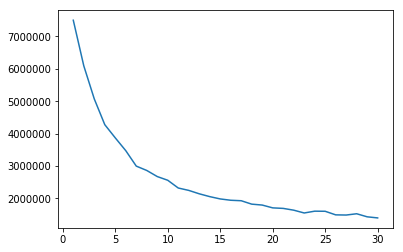

In [15]:
X=list(range(1,31))
plt.plot(X,sse_lis)

10分類くらい。もっと増やしたほうがSSEはより小さくなるが、
顧客が見る場合、分類が多すぎるとわかりにくいため。

### 【問題11】既知のグループとの比較 
RegionとChannelはK-meansに使用しなかったが、これらは既知のグループです。
クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [16]:
a=work10_pca.reshape(-1)
a.reshape(440,2)

array([[ 6.50022122e+02,  1.58551909e+03],
       [-4.42680498e+03,  4.04245151e+03],
       [-4.84199871e+03,  2.57876218e+03],
       [ 9.90346437e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972582e+03],
       [-2.76596159e+03, -9.59870727e+02],
       [-7.15550892e+02, -2.01300227e+03],
       [-4.47458367e+03,  1.42949697e+03],
       [-6.71209540e+03, -2.20590916e+03],
       [-4.82363435e+03,  1.34805592e+04],
       [-7.97482898e+03,  5.71121893e+03],
       [ 3.63937790e+01, -6.03789641e+03],
       [ 1.99402021e+04,  4.59128648e+03],
       [ 9.39669558e+03,  5.91315704e+03],
       [ 1.26603704e+04,  4.54194543e+03],
       [-2.99772590e+03, -6.09387930e+03],
       [-1.05895236e+04,  6.58421594e+03],
       [-6.36709518e+03, -3.68071267e+03],
       [ 6.62382534e+03,  1.25471953e+03],
       [-4.86153157e+03, -2.25592266e+02],
       [ 4.79424416e+03, -3.98879936e+03],
       [-7.24486684e+03, -7.34772325e+03],
       [ 1.92992657e+04, -6.93681068e+03],
       [ 1.

In [17]:
df_work10_pca = pd.DataFrame(work10_pca, columns=["future1", "future2"])
df_work11 = pd.concat([ df.loc[:,["Region", "Channel"]], df_work10_pca], axis=1)
df_work11.head()

Region  Channel       future1      future2
0       3        2    650.022122  1585.519090
1       3        2  -4426.804979  4042.451509
2       3        2  -4841.998707  2578.762176
3       3        1    990.346437 -6279.805997
4       3        2  10657.998731 -2159.725815

In [18]:
src_kmeans = ScratchKMeans(10,15)
src_kmeans.fit(work10_pca)

3475227.4530012757

2794359.916296553

2782445.7789082224

2772132.290130543

2647289.549761308

2534391.102135518

2497981.619368262

2500998.856654671

2515107.089925062

2528936.4863062934

2533369.0093993554

2542809.848947701

2543150.5783843948

2545101.2183752335

2559015.056306022

3024025.7058742912

2745518.6467838846

2640606.821704385

2608581.6255837544

2609986.2370733568

2598845.5985758384

2598543.802461358

2586147.1412191056

2573792.517602944

2568868.1925449846

2551533.838820656

2559928.708619706

2557445.7442001957

2556150.490951712

2566916.244015685

3855809.238439304

2963961.4570844467

2875066.1381578594

2798848.625710533

2696593.5328054936

2601381.987997381

2538151.087803341

2495234.779073624

2476290.042944212

2504872.830263874

2505899.316367963

2513946.2412623526

2522566.1853322284

2548106.425352829

2561302.630704868

3222342.240142185

2949687.5258323364

2904775.7638203623

2796773.830057669

2716249.12205017

2646401.3816290433

2601993.434022631

2576050.1286232206

2550279.2629665607

2557435.6878609015

2516681.7711017397

2531094.032326248

2530589.9401774346

2531598.954982098

2539010.6737399776

3653422.694294542

2913718.889422724

2605879.568899061

2561145.4535057372

2532261.3602986075

2476696.5469534644

2424695.5477576773

2430251.0098655093

2446520.872937491

2458866.991863299

2456487.5651541445

2462214.2816020497

2467178.544281115

2476445.942518057

2489599.81544858

3024875.343417481

2736888.834715772

2610265.952202898

2537392.938601214

2524230.9358741106

2538893.7880907697

2529502.802652379

2518517.2190400474

2502830.5150046744

2528335.7502979916

2526555.979863192

2503015.7642732514

2491004.6544811614

2490022.16918146

2479368.8978877366

3326126.299481429

3050016.1361442683

2909737.6854603784

2760534.948123181

2631572.983348495

2673777.867826847

2731448.342911834

2745611.803401492

2702436.500473416

2610294.281633066

2499054.85833586

2481944.570945121

2481044.0784841073

2470692.6665034704

2470680.201687235

4123972.101138556

3579673.8896962972

2816797.69059566

2646843.288615358

2629165.054434207

2639836.1470763134

2600747.917131198

2580279.2446586764

2575546.5479637077

2567616.208125765

2498874.5213056738

2467941.164722795

2459980.0269540856

2451706.1995109664

2453936.8377596457

3732119.3755789683

3217367.727034943

3054978.638986701

2783909.9796774527

2574242.4985075006

2524110.3886688612

2558595.295641021

2560060.650710594

2537584.6164680347

2523974.402082006

2525495.8218111764

2519800.8571831933

2512576.6168817263

2508062.5476674843

2497710.7677755803

4183432.2482528095

2945989.885216206

2635466.0618098276

2498096.4776760004

2444453.654441011

2449498.791450547

2455902.170259649

2476636.685731045

2489774.2544182185

2497202.158906695

2493288.040106935

2500514.51162944

2511466.164148093

2522704.590297083

2540132.7317627394

3750654.5964689488

3414047.321870063

3140424.4939420517

3009679.371186044

2881861.530128584

2632207.3512887727

2558984.025588329

2547590.806638667

2560136.920075349

2566270.7764589884

2579735.9383971035

2590507.932906472

2602064.319630655

2603132.9417237192

2605418.170561024

3260226.323949785

2840277.492596995

2744010.8300652066

2667739.992816979

2667071.5935542663

2656541.3345552213

2616477.860858185

2598745.241245575

2555241.543639085

2488666.4470555317

2487041.0944077573

2490220.412591563

2501416.5326562594

2498780.8444059775

2501325.4159704545

3267042.452340946

2576304.732850714

2498791.6820367607

2507110.7544950126

2484051.8192317914

2484292.4383498235

2530016.369184985

2532968.49189797

2538230.134145504

2574328.521111496

2560373.9320516572

2563535.812035746

2561916.2034164714

2559444.7675856394

2565060.742880198

3422144.8225499094

2818861.219326782

2754481.327849317

2708468.383304938

2661143.023172946

2600298.122614481

2560113.9089937364

2531298.8171184743

2539294.5225462397

2528348.6724592564

2539315.457213754

2533108.7621928575

2535373.659486851

2534851.539077852

2545356.7926293793

3443079.2231609556

2901287.7973220414

2744311.7468175385

2669923.0337995295

2559639.896691237

2538692.495556422

2542624.7843542686

2569845.0050206482

2567295.7126161586

2589838.8220695537

2608572.8939293814

2620400.436024585

2616979.7757975804

2589811.6361611197

2601718.945139634

2861643.138386573

2685346.412917961

2607622.1537808175

2591451.1787844

2581019.7812422016

2576203.9561578613

2549957.5376172913

2539983.41675019

2538658.221467544

2534764.3472831594

2528732.998604718

2522881.7613405115

2539930.1721490943

2558139.8402069397

2566305.201352749

3504679.231113925

2820411.3345484673

2705173.319421176

2663855.810694487

2628578.7734948704

2530554.930166544

2428443.034632422

2410501.0226636557

2423982.819056096

2434877.1926884544

2474892.594276586

2502349.136273564

2530027.9357743673

2538623.6935142833

2557791.387190332

2965566.4900569613

2768852.580774629

2671561.523329899

2644614.588679154

2587771.400401992

2541217.614960278

2531843.3929295787

2539216.8729732707

2547816.8126902725

2533679.7848528856

2546741.020527928

2554048.481508838

2560210.7743761027

2557929.630138668

2555414.2464719657

3407549.208977577

2888628.0160324755

2765590.5573579855

2783354.8599050506

2822101.9970028168

2826402.1047928557

2815812.892865203

2707725.099844324

2627763.479504388

2616103.652251749

2611153.646550181

2599944.6948308437

2590162.1717872983

2593494.0543016777

2600299.7827908597

3060979.6659604344

2657026.176668834

2588391.627172209

2546494.091498491

2540307.9504421717

2538002.9648668612

2544541.1165748434

2548431.509160543

2562644.9012853056

2561640.386697679

2530198.550434923

2544002.747911631

2552227.665670922

2556032.1899290006

2556312.907975577

3292195.00511062

2880778.0979312975

2720359.8884332487

2722355.749490134

2716480.6031776536

2680860.285944917

2655689.1951224525

2624568.187789052

2594909.184541485

2546172.810571801

2504902.3991213795

2521850.3496774044

2517339.03066642

2535414.4009840568

2545915.7945566885

3299309.4556025043

2815154.8587927558

2648656.625518309

2543013.4700957634

2536415.6976476437

2522452.036177169

2494444.2840520856

2498009.6719166664

2503753.938692296

2495446.5653435094

2499214.1221998786

2507118.771502229

2512341.223712799

2517899.544818485

2522187.8009092757

3063563.4705556817

2641541.4147703513

2592609.365116811

2573118.1859668954

2475865.827473123

2455796.871866431

2474077.2599502923

2474639.157500512

2473753.5989552615

2472919.1684317915

2476794.7591536595

2481610.4614465516

2484109.414116722

2485189.057477498

2485556.6739577646

3407879.217302764

2778900.6843224484

2524453.883080851

2492069.422687635

2505923.5171681386

2513326.5341079673

2527314.585922381

2528536.240295093

2531388.032994406

2531559.4927435005

2532825.458006107

2537168.4764041323

2537173.8559507597

3220603.864350905

2713814.3924000515

2682878.740860834

2639037.692927455

2585730.945628772

2528053.797355292

2464047.847339757

2428895.5751444115

2428088.3775649723

2433920.4336879887

2437825.350044792

2442871.5145147857

2459674.700498663

2469228.280277479

2482615.8761316747

3469055.477960504

2915197.120735512

2721249.2564683724

2649715.3709503887

2614949.5753466333

2538642.718331748

2483702.692495799

2442849.172895587

2455914.962473122

2475629.610938274

2472223.8352469234

2481300.5097308443

2498280.4372201427

2502126.2090904037

2509305.9949393007

4260871.974158137

3110378.5348114

2831201.5655134637

2750239.6822791565

2685261.188271321

2709454.657271708

2706308.412160215

2708397.564508831

2696839.1701311003

2653844.659129522

2664826.7556118094

2672937.8562999684

2675913.949852748

2665447.4393533035

2652938.038111366

3273653.2204918014

2863081.746912662

2787761.672282922

2679573.951341889

2578431.504591837

2488424.126882867

2474287.215258632

2507848.702445477

2511201.714636662

2527248.159458758

2546266.67585048

2562942.894113219

2575952.4156825584

2579878.8105129437

2582313.846174561

3406891.2221465823

2885349.6052371566

2716496.529592119

2674814.257277022

2667978.0741052316

2638704.202235114

2599602.6520790667

2518104.0036192196

2499091.2880043047

2531042.934000516

2530308.0477415924

2528319.029726756

2545303.444424966

2540248.563221964

2553629.6669336935

3420819.033328606

3047482.5051476154

2880557.025593786

2666414.3591108522

2522976.9661949445

2490727.7908544745

2497815.667125528

2500302.3305182336

2491278.162881612

2491296.010654936

2489341.9846209493

2493697.919295877

2489671.8146488657

2480926.39057547

2476208.7084135995

3174629.118244608

2784777.8786575845

2667011.182412146

2558100.503781962

2505964.590575776

2523915.984161642

2535912.7795923366

2537945.0105141434

2537959.0502147237

2536176.1507432093

2524273.05806521

2519340.1983440295

2513539.7443250394

2511911.4663796616

2505175.8863878064

3620339.160245457

2979742.32454227

2898746.039151016

2874186.299549255

2784586.582673032

2669481.816807065

2626648.845104203

2624151.361924897

2642853.611541236

2594460.099018089

2578605.4635071154

2559594.3566717342

2539181.336716689

2520259.177266048

2508842.0719510326

3669829.6692469455

3089427.336595359

2754209.139431092

2630440.317495816

2613201.4671866936

2608656.0385695104

2636167.671276708

2659485.7550295424

2622733.6736007477

2611163.652330613

2598841.519768034

2589694.205158022

2582975.845448708

2582465.4743294683

2568789.7221199158

3027021.4328030236

2746884.755043435

2683240.5201699445

2563780.084593551

2538829.247800823

2515675.076611809

2499900.770631059

2521764.29313402

2521296.375204504

2519599.2357071973

2513324.8310242845

2525165.0548704416

2521675.2850856194

2526963.5872969804

2530629.834690983

3082116.757209629

2694488.3469747766

2545587.8324576244

2553499.9722575564

2550078.9706321806

2560119.2870621816

2551438.3289154517

2526903.363280393

2490099.2492608367

2487241.9373273547

2482435.9381786445

2480053.640186335

2480887.913708768

2482773.343750565

2485694.687927979

3672406.7821814027

2936408.0467279013

2758900.6125568394

2582626.4623509427

2521559.038387725

2507003.21863442

2503704.473969151

2503567.3241274254

2512502.5231885244

2528237.1095520556

2522213.479230961

2508352.7011813107

2511993.543558521

2516290.831144613

2524483.2905608895

3267196.3488757894

2811020.018941072

2659994.989740755

2561552.6872719894

2533322.3234813395

2514439.8312110417

2521232.346162182

2528297.7628497933

2521249.001507022

2519898.1007436197

2520287.987876163

2525938.8178029666

2525499.0682207155

2528778.834993833

2528091.9509412483

3929222.2217332935

3054717.3337208717

2790273.794103186

2645307.795312031

2528690.4888493204

2501402.817934108

2519850.4690651847

2530593.4142738744

2539546.3336894293

2543545.1536462354

2551608.9688394163

2555743.303701783

2562940.159587646

2564252.614650782

2564460.7657380137

3113428.0073565324

2728666.8471005326

2615047.546471103

2599268.345633352

2597938.363081155

2592419.5998845818

2574144.885691736

2551746.6631057863

2529595.3172825202

2530596.1523695863

2528096.517883948

2537861.290416522

2549606.487822435

2551840.1844817298

2557452.3435123344

3316807.3082800247

2844752.7902427465

2751501.5941318055

2574805.7329602665

2542167.109122452

2517874.673523618

2493395.850927433

2467490.797991236

2446825.556566919

2454151.8530496247

2444297.8619535295

2441536.08185595

2439185.066814953

2451321.9414002416

2470324.5712311026

3921764.7495004926

3102057.6437194482

2967930.2664484503

2876517.633583668

2733060.256776005

2609971.04153475

2525152.857460144

2481381.7631766032

2477953.944904681

2499389.4140300755

2517841.5636922494

2532190.700245185

2544358.3791831955

2558623.907704232

2564515.537884016

3054304.6048540487

2531681.6317821057

2493349.0437920275

2500984.601810372

2480528.3219586792

2487816.3360368907

2501461.7583957673

2497263.634193673

2492982.614638116

2488692.4473181004

2482295.2378195105

2482475.459859865

2475688.951176564

2478572.009934218

2485178.049344419

3474496.806428217

2985809.4074950246

2746245.9041223833

2670393.7400412452

2678860.172188428

2597637.387475971

2561473.6347032087

2495270.94305887

2472328.202327912

2479837.5249072756

2480678.2410807363

2494991.1535401945

2503409.0533188605

2516095.9598413766

2533090.8842866635

3191694.435715276

2884950.0696100015

2748652.5250163698

2693770.88913264

2641791.448914912

2613667.102122771

2583339.0062125907

2557960.4473295123

2565343.7443068223

2559067.9945962015

2555501.4799371692

2554808.178199498

2562572.680977039

2567297.684514492

2568406.21025274

3858655.459309166

2949357.216398992

2781558.6649869103

2680217.621617426

2600733.671615011

2568138.1389391324

2555254.003283985

2538962.615483033

2529955.7567082806

2548921.366518584

2554373.3541360935

2554228.090053216

2556484.322573438

2564121.526963038

2569250.743304848

4788807.300057238

3268409.6097746533

2708350.669201278

2578854.1651612152

2501394.0750430436

2417426.659636873

2411978.675060769

2412202.355064149

2406884.4194836263

2436104.914199956

2449969.790482176

2448711.424987215

2459926.0108975386

2468548.6057763537

2480455.9612857415

3173571.2825385197

2696318.561280946

2617903.20133638

2615935.3153441865

2625599.735459446

2609459.830325293

2587167.739878689

2574112.717865019

2567040.693653999

2562589.3907654113

2559696.928668065

2563851.970894481

2561140.2734567407

2566434.6041089296

2578500.444139605

3689413.449187067

2762811.9266094263

2588177.5707376963

2509001.6897141333

2480623.3684491776

2465016.2630619975

2472614.1840903247

2500977.546029365

2496191.4089935967

2495833.440191884

2503801.238290907

2508938.8280664603

2516967.564260109

2523789.2288001226

2529171.680446831

3681816.269329581

2714761.51235074

2612289.8671977497

2505430.002224272

2499617.2332721315

2491766.073037896

2508277.2281562095

2514264.0829306357

2517753.3892201195

2516822.2605927475

2515157.4594767652

2516300.0462277676

2516612.5127972094

2528382.8367667715

2529852.7499241713

3853022.481619311

2997189.195019496

2724609.8721520468

2611527.499697655

2548164.632750434

2516976.6511921496

2487936.5905663944

2463326.566511314

2457916.173816853

2444874.1436295877

2449651.952841488

2457559.616532612

2460222.691816326

2471019.213355469

2486120.1058288543

4399513.30262636

3075891.409510424

2864601.3408976556

2682658.649158993

2583817.173568157

2544015.7803046606

2525185.3750887117

2526849.3521850016

2525751.4746544403

2483122.997306017

2478599.050371067

2479567.463065196

2480773.681584074

2485170.769640482

2478731.2471806807

3382062.4927951423

2660857.070286117

2551170.3140410143

2503150.1688365145

2498079.649848321

2486672.83204752

2489077.8968727635

2506268.690229508

2519511.942137202

2522460.7853496387

3498755.1338561038

2936315.9205895066

2846021.166657546

2847061.873557072

2812343.8280612635

2706539.997086432

2615687.602843379

2546954.6948674116

2524530.9341162336

2542248.391338481

2560182.5407567574

2574167.1098495903

2587788.218454439

2591385.436760995

2598108.0199663187

3229296.6389478487

2645786.184253758

2555156.88641862

2501842.0037281257

2472585.8661341053

2464590.7119172583

2483206.516040981

2497434.884221942

2503910.839223716

2503453.3592014667

2477574.6153920516

2465547.039069333

2481668.3051003395

2487334.2591753015

2480075.383615033

3306557.0181307485

2792319.649430036

2667957.699817062

2583414.465517836

2536641.376091301

2483014.8469301434

2481666.134935678

2500146.5453581302

2510559.337907263

2526360.4004778955

2527886.7051395173

2530325.3256633687

2530631.170758591

3467067.799198077

2857487.706191827

2737685.6130466056

2605786.4087442737

2569428.4580657496

2548308.019227731

2530800.7529687793

2519201.5347355027

2496922.12622528

2480358.55823841

2472112.2703699493

2481240.33026358

2481900.328691811

2483476.2008702015

2485304.9861085424

2982435.745169491

2654702.2988039064

2523763.497320424

2458374.5782767157

2438412.282330352

2470264.6816980783

2496293.852238011

2513958.093773453

2518348.8294277415

2518908.0605346235

2532538.393343157

2548495.415838361

2556410.5605296344

2573171.900883996

2589145.194072306

3287657.1427221117

2817084.5726972907

2634664.634411163

2625187.1581715043

2627033.000298952

2590067.4216122027

2543905.589865753

2547640.141203252

2548967.139868194

2525503.423498574

2512487.8393956823

2511183.7464231877

2530036.6383168567

2512730.8410522165

2500856.8907318176

4124103.2374078534

3252170.344434132

2909416.7728222716

2761059.240913464

2619845.8156867432

2560100.3932867018

2521258.0745194587

2497018.6202443196

2517714.6543654497

2523695.8230473343

2524509.2527586035

2530309.3259446374

2521998.417016217

2521402.423287071

2494470.6246955

3058032.4894461366

2821847.790867735

2738496.532098874

2686601.203567665

2677766.120416157

2615623.035202057

2542410.2595704193

2470940.543391615

2448680.046719638

2429094.3501722654

2445612.966317699

2446583.823618952

2445200.9399834923

2434721.59931061

2429444.8185000047

3289166.7891024547

2894038.247117079

2831672.532112114

2670486.5074706953

2591559.9771441994

2519834.0837861053

2516911.387095074

2518839.7297516502

2531649.2901853304

2536548.5397330923

2516394.3991936403

2525110.358686053

2532618.48841248

2533432.8282491234

2534067.487403581

3321275.463296287

2757602.23181968

2555202.476718699

2435790.220773765

2413235.401612958

2382771.583603249

2386102.6670834245

2391315.308633812

2398026.552389005

2433406.1496812096

2444377.3086097217

2459905.529341276

2462085.3061937913

2464738.0984350997

2475893.940182118

3955272.4660727414

3031288.8317253958

2927656.166737553

2830411.349187751

2650165.7604425144

2582211.735939334

2540885.066355572

2495129.1128042266

2473300.536070607

2484931.414403251

2490280.012373951

2483391.6150152856

2501223.521603526

2523512.9627352664

2543257.60555718

3388919.7062397534

3067207.443806911

2849150.210258253

2736330.080959476

2732628.4970030966

2711901.9275071067

2605310.1921637743

2501216.756245399

2478054.672271712

2473354.165323132

2454005.685774573

2448658.168122193

2443952.794563414

2450272.8174195043

2456480.882056857

3234377.035078081

2681622.546896774

2603364.7676954186

2539136.6967165614

2481984.963052831

2466134.2217951105

2453182.4462803393

2440102.7537995386

2469248.3379956954

2484869.8203830724

2498436.2376204883

2516058.1874308917

2533813.400393684

2547555.347421683

2562996.899217864

3496876.451748925

2836009.1027491693

2712464.639262993

2714859.5351782283

2640113.8298871377

2551194.172774806

2499593.7079417333

2496030.369497248

2483601.988075393

2466962.520912326

2458805.7289834353

2465576.1646694182

2476208.7657519598

2481488.763727346

2485439.627012852

3885159.7835409646

3397976.0697412053

2917092.4440832017

2765104.6397648663

2675917.9524793816

2591826.931490847

2556847.2620347417

2533009.2859992133

2541849.7622302766

2544762.554208051

2542334.8098620404

2520821.1081172116

2502119.0956814312

2502500.9933091784

2505446.975122483

3803749.066884215

2879502.4857118097

2647505.555588536

2586763.030702706

2531749.2629002747

2506247.904669709

2488890.260320338

2504546.7609059443

2519248.8285326

2529511.2402185523

2527225.965559314

2521541.6853673793

2533299.8161219116

2521128.5191637175

2523696.939829763

3855707.6984384325

2879570.3184566945

2686210.6765988753

2630340.395542888

2636843.795382019

2628541.1060017683

2605970.6295137443

2563148.3228137526

2520931.2687155623

2481971.219448023

2497752.084567007

2499958.366521522

2503855.0644848966

2492296.60950149

2491298.991321109

3717211.372213722

2799856.0507619698

2670174.9907427677

2639416.564639494

2618728.536564212

2582356.0237989384

2561328.0339473197

2537033.7884187945

2530131.024715336

2524361.2048033075

2504216.698116692

2481684.397332182

2504673.4102380625

2509551.33772421

2513765.791353665

3162028.4715034645

2889338.5938416887

2754574.726325677

2672225.4627923314

2616518.9764442905

2588053.0532309604

2551671.2863530004

2543242.8860474764

2536608.115201921

2527285.25602168

2528376.2188041

2524362.9768858436

2513438.0029451037

2524134.798778249

2527638.6154860803

2825494.9161194717

2605478.365930584

2574604.1279190215

2567831.1448715255

2545084.763483944

2541771.199120175

2539990.437377799

2536209.5364969154

2523573.663984244

2520807.007048863

2524829.5884286617

2511423.413103308

2507030.6866604504

2501882.471309795

2489121.817380971

2911338.784598633

2705391.8102608505

2658082.4551419397

2637975.399012937

2597189.9978846866

2585109.7628841456

2557158.8244845727

2539562.170871222

2524842.5679063904

2527682.676895842

2508170.1980702896

2489167.7480369364

2471939.205962524

2479204.0937042534

2471416.981269397

3420483.374167448

2869246.1778854188

2741725.380038042

2737874.0270509166

2671354.53311585

2528746.231528675

2548099.2710934146

2568754.38131717

2596741.422249242

2632233.4116718066

2652211.734255138

2671261.8222626145

2669672.9654097995

2628087.5864195786

2612466.7145703747

2852558.68527172

2606260.37205908

2539923.4086624524

2521781.967221293

2554518.875606785

2573542.8565423125

2582580.4506241805

2581117.1540733823

2593169.9185860907

2605407.377281718

2620461.52306248

2610883.01345001

2607769.1786752674

2595691.451592437

2567960.8563132086

3097259.1691664713

2811096.2833900237

2798988.554757153

2698863.2156986585

2543789.970674677

2526223.074893032

2515551.5842511896

2504317.881291756

2488888.422998572

2489900.6565773557

2486030.5544201373

2488744.655840754

2497483.036609096

2499386.8969449103

2504608.1976900278

3899845.1312566376

2993184.6052126056

2752165.229886592

2622359.4726061937

2512727.258887187

2440970.1689125234

2437616.1060304097

2455920.0537645766

2467987.2413834166

2488816.5818571285

2499371.339225379

2500855.1147051724

2508195.0425377106

2520420.5054453937

2530847.589239216

3324564.9580481956

2740539.4129576837

2675689.638110984

2644322.63446517

2581230.98411139

2520897.920622692

2474093.5929738344

2477206.1815601075

2499430.9129422638

2499392.384552731

2494209.118267669

2505700.6642111065

2520778.352101618

2531523.577746209

2538910.6644249638

3522502.5686622765

2859132.5199549533

2748563.6849437994

2678988.0862893257

2583980.435304386

2516208.3186792615

2476716.524742578

2483818.5164939426

2506304.2714281627

2507132.371538458

2512672.657600884

2512761.746963253

2506691.3982881927

2503746.3920586803

2506702.950816375

3242720.9480986036

2625218.911947321

2533149.8466554387

2484599.413496878

2416753.212698601

2418880.315452777

2419357.3437646446

2448397.72812329

2463672.69300054

2467905.7051156065

2470700.643801709

2471863.154876421

2480252.42977534

2486157.927383843

2487769.117282819

3502007.3143823706

3004245.2222603215

2777209.3919141134

2700443.423079608

2703696.864293366

2712469.3542802553

2721498.2082606866

2694862.0824590456

2616428.0379273114

2487608.4835721566

2462551.153525727

2466906.6159985685

2460073.7565440964

2460663.866585227

2477838.984856354

3591653.571891423

2822935.23142509

2647916.941456986

2606777.551284787

2633891.2947185403

2629141.776248589

2622545.0165614425

2608446.565413913

2592775.4606327885

2576053.224292529

2567487.603301836

2561029.4237368098

2566471.1430833

2575521.247851678

2572348.041687

3290039.222825459

2881371.2561192806

2697000.3848683788

2642517.018978679

2636211.2937942664

2647159.174840103

2612518.0773539008

2557474.5188864837

2473566.5499968776

2485828.1424318557

2490344.8837078973

2498569.644559779

2504083.0834781327

2508245.483009523

2529440.9408547767

3211215.256163402

2919392.4256262085

2805251.5212174673

2746685.7559505883

2755783.5083116395

2697072.048163107

2586468.551852008

2528750.209092802

2488412.9760576366

2444483.0073897224

2422359.670478067

2402660.3220973928

2435828.375464566

2446165.540650502

2450625.330135758

3463239.523166722

2831524.637256327

2698969.4063120456

2594985.323780265

2478810.637812339

2416769.9007262983

2422347.3969523134

2427911.519234481

2429648.6642578635

2440148.5964797568

2450472.8271958134

2457445.7719350616

2462652.105108143

2466548.6095038913

2474086.2626764397

3816625.0181411896

3223233.6463315277

2916861.355891604

2735273.0544016236

2730756.2893121582

2650413.429655369

2571507.9263021024

2472102.170145096

2420231.9553348213

2404431.901287999

2461243.417588905

2480482.554005689

2506302.661985507

2519130.8998591513

2525392.0048460127

3834134.8895429843

3132755.2740162746

2890629.0605803556

2692445.8824144243

2589069.9167250684

2544183.867557457

2509510.3306640987

2477371.614895235

2462704.869744703

2466525.6200686293

2466731.420903311

2486422.957077411

2470344.224148093

2470129.131612255

2466001.0365331015

3150558.06617158

2675957.017490121

2623749.2957580425

2572230.1845877147

2541513.2382556046

2512065.866280893

2506487.0337878917

2519423.99078839

2531209.185257772

2540484.2549440064

2541613.8271081154

2544800.1349614463

2544614.9564543553

2543830.784631995

2542199.084441195

3495949.442328789

3058948.941829339

2779623.627258776

2634729.0265601645

2556394.949265758

2526349.470923966

2515505.9179079602

2468369.419565231

2432474.1013896405

2421545.1875071996

2421573.4510059375

2423340.04272052

2438673.3254282884

2444315.1232041446

2460043.0024282555

3355384.609821572

3050436.087529787

2914400.498916858

2884741.2049169964

2896194.220515513

2825125.0036304356

2679187.2444642205

2589005.670448212

2534961.0845862

2513867.8191430024

2495515.1972851898

2488185.995733658

2477016.8876892617

2478856.5472852825

2485592.6682811067

3879170.509184622

3108559.2485428755

2924790.488819057

2877566.844052735

2872170.2768007107

2770484.06429422

2584334.4018897885

2468624.080023586

2439512.283757934

2414784.7020219197

2422131.8204529174

2440247.166425488

2454996.412414501

2443251.654769992

2452766.496567751

3583567.617782949

3030005.498505975

2917556.465668996

2864948.43227981

2801392.7212777617

2689256.2759319227

2580424.419452251

2529318.1069740253

2499972.4290386094

2468480.858045158

2477003.451281644

2499048.627148403

2498531.5656313705

2513427.520955756

2527039.8197459904

3146703.2899540453

2610870.6160323145

2552212.765325058

2523252.320119893

2468479.8205397744

2440182.558692525

2457452.348059151

2448800.808720556

2445459.315780301

2454515.7133277906

2462782.1887935596

2471762.1995005743

2480950.1328341467

2482890.261750335

2488555.6194075705

3468241.048423433

2724962.746297897

2635051.254044495

2597251.166994005

2589498.577292431

2566454.5820554653

2539932.2227085503

2541309.4589942587

2517906.6946175117

2510530.781865508

2499165.822686629

2501279.8574582026

2513770.705352886

2520597.0250377073

2523270.614628306

3364144.9788897936

2933899.5189726483

2804195.7627477497

2726180.2428518804

2692724.48523057

2713908.414283177

2722769.90457287

2729915.098314203

2742901.422427239

3025424.519968532

2687150.8666995363

2635952.5387659967

2572653.648208902

2522245.528954658

2428211.7371438867

2390950.497101207

2389621.743650516

2415990.971292259

2424381.8658965495

2437351.07085665

2450713.730852324

2465941.701976386

2486408.634841434

2503071.8265909613

3291206.3315225807

2766192.0448489073

2558178.916924849

2489679.7668529474

2508693.7420111955

2528322.694229258

2557537.4330769647

2566202.1797709716

2569385.019492135

2571030.0519189984

2570603.812486875

2570211.84448231

2571550.3085795464

3254917.971226233

2736119.3669758663

2614935.8410907327

2563878.0841955324

2515238.057011874

2505200.0641435944

2491660.2164907455

2471374.695917071

2470548.676704205

2496093.4575699694

2507519.318094388

2512389.3767927713

2513285.6184904096

2511963.8683326244

3262298.891138378

2796657.4085545223

2678587.2234831653

2605405.1459450787

2567136.8074257057

2528240.9665692076

2487861.5392231005

2493421.2250499018

2504047.495815585

2503720.0506786574

2507034.7932397136

2513710.7864122116

2514610.756771742

2513740.2372362413

2511995.9024222675

3360363.27804639

3031719.1818448263

2822720.4034485645

2715369.8635303644

2630183.9124278505

2596264.1681326875

2552135.61462792

2540393.1456796136

2563107.746345009

2566668.5896877097

2574790.337032651

2577933.1336158896

2583414.163708391

2586353.643878669

2600685.197586009

In [19]:
src_kmeans.x_class

{1: [array([ 650.02212207, 1585.51909007]),
  array([10657.99873116, -2159.72581518]),
  array([-2765.96159271,  -959.87072713]),
  array([ -715.55089221, -2013.00226567]),
  array([6623.82533598, 1254.71952554]),
  array([-4861.53156911,  -225.59226591]),
  array([ 3309.94466891, -1161.25675157]),
  array([6394.14887905,  376.41732157]),
  array([-645.59835806, 3328.87014502]),
  array([-4220.19177648,  -691.38175302]),
  array([-3.99325128e+03,  9.21012119e-01]),
  array([ 8430.18240328, -1449.17799711]),
  array([-1300.06307822,  4621.18082815]),
  array([-1013.46192007, -3353.32315389]),
  array([-376.59799563, 2923.17193166]),
  array([9339.07742576, 1719.40727647]),
  array([  827.63399536, -4002.00672276]),
  array([ 5234.3073617 , -2523.08150016]),
  array([  610.80993041, -2864.0542858 ]),
  array([-1354.91892454, -2566.07743172]),
  array([124.20131284, 374.35961904]),
  array([ -788.5761127 , -3598.08905732]),
  array([ -282.01746296, -5065.03143532]),
  array([8472.43982688

In [20]:
work10_class = np.zeros((work10_pca.shape))
for c in range(work10_pca.shape[1]):
    for r in range(work10_pca.shape[0]):
        for key,val in src_kmeans.x_class.items():
            for v in val:
                if work10_pca[r,c]==v:
                    work10_class[r,c]=key
work10_class.shape

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
df_work10_class = pd.DataFrame(work10_class, columns=["class_1", "class_2"])

df_work11 = pd.concat([ df.loc[:,["Region", "Channel"]], df_work10_class], axis=1)
df_work11.head()

In [ ]:
work10_pca[1,1]

In [ ]:
for key,val in src_kmeans.x_class.items()

### 【問題12】卸売業者にとって有益な情報 
卸売業者にとって有益な情報を探し出し文章にまとめてください。
《ヒント》
前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。
また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、
一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。
条件ごとにデータを見る際にはPandasのgroupbyが便利です。
pandas.DataFrame.groupby — pandas 0.23.4 documentation